Here we'll first be loading the FC matrices and explore their structure

In [1]:
#using read_dataset from Datasets/FC/create_dataset.py to read the dataset
from Datasets.FC.create_dataset import read_dataset

In [2]:
dataset = read_dataset()

In [3]:
#ok, let's explore the data a bit more
#dataset is a list object of torch_geometric.data objects

#let's see the first element
print(dataset[0])

#it's a dictionary object, let's see the keys
print(dataset[0].keys())

#ok, let's see the values
print(dataset[0].values())

#it has 4 keys, 'x', 'edge_index', 'edge_attr' and 'y' where y=0 menas the patient is healthy and y=1 means the patient has Autism Spectrum Disorder (ASD)
"""graph = Data(x=ROI.reshape(-1,116).float(),
                     edge_index=G.indices().reshape(2,-1).long(),
                     edge_attr=G.values().reshape(-1,1).float(),
                     y=y.long())"""

#how much data do we have?
len(dataset)


Data(x=[116, 116], edge_index=[2, 1016], edge_attr=[1016, 1], y=[1])
['x', 'y', 'edge_index', 'edge_attr']
ValuesView({'x': tensor([[ 0.0000,  0.4543,  0.2477,  ...,  0.1753,  0.2247, -0.1751],
        [ 0.4543,  0.0000, -0.2204,  ..., -0.1947, -0.2258, -0.1434],
        [ 0.2477, -0.2204,  0.0000,  ..., -0.0521, -0.0804, -0.2025],
        ...,
        [ 0.1753, -0.1947, -0.0521,  ...,  0.0000,  0.6875, -0.1364],
        [ 0.2247, -0.2258, -0.0804,  ...,  0.6875,  0.0000,  0.0929],
        [-0.1751, -0.1434, -0.2025,  ..., -0.1364,  0.0929,  0.0000]]), 'edge_index': tensor([[  0,   0,   0,  ..., 114, 115, 115],
        [  1,  10,  12,  ..., 113,  94, 109]]), 'edge_attr': tensor([[0.4543],
        [0.5913],
        [0.4224],
        ...,
        [0.6875],
        [0.4846],
        [0.5437]]), 'y': tensor([0])})


1099

In [4]:
#set the seed
import torch
torch.manual_seed(37)

DATASET = "FC"

MODEL = "GIN"
from models.models_FC import GIN_framework as framework # import the model
gnn = framework(dataset)

MODELbis = "GINbis"
from models.models_FC import GIN_framework_bis as framework # import the model
gnnbis = framework(dataset)

MODELtri = "GINtri"
from models.models_FC import GIN_framework_tri as framework # import the model
gnntri = framework(dataset)

MODEL2 = "GIN2"
from models.models_FC import GIN_framework2 as framework2 # import the model
gnn2 = framework2(dataset)

MODEL3 = "GIN3"
from models.models_FC import GIN_framework3 as framework3 # import the model
gnn3 = framework3(dataset)

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
# gnn.iterate()

In [6]:
# gnnbis.iterate()

In [7]:
# gnntri.iterate()

In [8]:
# gnn2.iterate()

In [9]:
# gnn3.iterate()

In [10]:
# gnn3.cross_validate()

In [11]:
#gnn.train()

In [12]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

# gnnbis.save_model(path="models/"+DATASET+"_"+MODELbis+"server.pt")

# gnntri.save_model(path="models/"+DATASET+"_"+MODELtri+"server.pt")

# gnn2.save_model(path="models/"+DATASET+"_"+MODEL2+"server.pt")

# gnn3.save_model(path="models/"+DATASET+"_"+MODEL3+"server.pt")

In [13]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+"server.pt", map_location=torch.device('cpu'))

gnn2.load_model(path="models/"+DATASET+"_"+MODEL2+"server.pt", map_location=torch.device('cpu'))

gnn3.load_model(path="models/"+DATASET+"_"+MODEL3+"server.pt", map_location=torch.device('cpu'))

gnnbis.load_model(path="models/"+DATASET+"_"+MODELbis+"server.pt", map_location=torch.device('cpu'))

gnntri.load_model(path="models/"+DATASET+"_"+MODELtri+"server.pt", map_location=torch.device('cpu'))

In [14]:
gnn.evaluate()

Test Loss: 2.040, Train Acc: 0.999 Test Acc: 0.636


In [15]:
gnnbis.evaluate()

Test Loss: 1.525, Train Acc: 0.998 Test Acc: 0.655


In [16]:
gnntri.evaluate()

Test Loss: 2.643, Train Acc: 1.000 Test Acc: 0.509


In [17]:
gnn2.evaluate()

Test Loss: 2.830, Train Acc: 1.000 Test Acc: 0.586


In [18]:
gnn3.evaluate()

Accuracy: 0.691, Loss: 1.036


In [19]:
MODEL = MODEL3
MODEL

'GIN3'

In [20]:
# from torch_geometric.data import DataLoader
# test_loader = DataLoader(dataset[gnn.test_idx], batch_size=1, shuffle=False)

# gnn3.evaluate2(test_loader)

In [21]:
train_features, test_features = gnn3.evaluate_with_features2()

In [22]:
print(len(train_features[0]))
len(train_features), len(test_features)

9


(1044, 55)

In [23]:
import pickle as pkl
import networkx as nx

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the average path length of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
def calculate_small_world(G):
    if nx.is_connected(G):
        return nx.algorithms.smallworld.sigma(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the small world coefficient of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.algorithms.smallworld.sigma(largest_component)
    
def compute_swi(graph):
    # Calculate clustering coefficient and average path length for the given graph
    clustering_coeff = nx.average_clustering(graph)
    avg_path_len = calculate_avg_path_length(graph)
    
    # Generate a random graph with the same number of nodes and edges
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    random_graph = nx.gnm_random_graph(num_nodes, num_edges)
    
    # Generate a lattice graph with the same number of nodes and edges
    lattice_graph = nx.watts_strogatz_graph(num_nodes, k=4, p=0)  # Adjust k as needed
    
    # Calculate clustering coefficient and average path length for the random graph
    random_clustering_coeff = nx.average_clustering(random_graph)
    random_avg_path_len = calculate_avg_path_length(random_graph)
    
    # Calculate clustering coefficient and average path length for the lattice graph
    lattice_clustering_coeff = nx.average_clustering(lattice_graph)
    lattice_avg_path_len = calculate_avg_path_length(lattice_graph)
    
    # Compute the Small-World Index (SWI)
    swi = ((avg_path_len - lattice_avg_path_len) / (random_avg_path_len - lattice_avg_path_len)) * \
          ((clustering_coeff - random_clustering_coeff) / (lattice_clustering_coeff - random_clustering_coeff))
    
    return swi
    

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_path_len = calculate_avg_path_length(G)
        num_cliques = len(list(nx.find_cliques(G)))
        num_triangles = sum(nx.triangles(G).values()) / 3
        num_squares = sum(nx.square_clustering(G).values()) / 4
        number_of_node_in_the_largest_fully_connected_component = len(max(nx.connected_components(G), key=len))
        assortativity = nx.degree_assortativity_coefficient(G)
        small_world = compute_swi(G)
            
        properties.append((num_nodes, num_edges, density, avg_path_len, num_cliques, num_triangles, num_squares, number_of_node_in_the_largest_fully_connected_component, assortativity, small_world))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties = compute_graph_properties(selected_dataset)

# Save the properties to files
with open("results/"+DATASET+"_"+MODEL+"_train_properties_with_sm.pkl", "wb") as f:
    pkl.dump(train_properties, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_with_sm.pkl", "wb") as f:
    pkl.dump(test_properties, f)

In [24]:
print(len(train_properties))
# train_properties[0:5]

1044


In [25]:
import pickle as pkl
import networkx as nx
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_with_sm.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_with_sm.pkl", "rb") as f:
    test_properties = pkl.load(f)

In [26]:
#check if all the 9th values of the properties are not none
# for i in range(len(train_properties)):
#     print(i)
#     print(train_properties[i])

In [29]:
"""
The embeddings of GIN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7, x8)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
# train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])

train_x8 = np.array([feat[8] for feat in train_features])
test_x8 = np.array([feat[8] for feat in test_features])


# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
test_x8 = torch.tensor(test_x8, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component','assortativity', 'small_world']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7), (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global',  'x6', 'x7', 'x8']

In [30]:
#create a dictionary where we will sotre the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 100000  # Adjust this as needed

        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Adjust this for more frequent/lower print frequency
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y[:, i].cpu().numpy()
            test_target = test_y[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embdedding = embeddings_names[ii]
            results[(name_of_embdedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "wb") as f:
    pkl.dump(results, f)

Epoch [1000/100000], Property: num_nodes, Loss: 6090.6211
Epoch [2000/100000], Property: num_nodes, Loss: 3462.4565
Epoch [3000/100000], Property: num_nodes, Loss: 2283.9500
Epoch [4000/100000], Property: num_nodes, Loss: 1521.0016
Epoch [5000/100000], Property: num_nodes, Loss: 1017.6845
Epoch [6000/100000], Property: num_nodes, Loss: 683.4348
Epoch [7000/100000], Property: num_nodes, Loss: 461.4590
Epoch [8000/100000], Property: num_nodes, Loss: 323.1422
Epoch [9000/100000], Property: num_nodes, Loss: 242.8682
Epoch [10000/100000], Property: num_nodes, Loss: 196.7940
Epoch [11000/100000], Property: num_nodes, Loss: 167.4680
Epoch [12000/100000], Property: num_nodes, Loss: 145.9221
Epoch [13000/100000], Property: num_nodes, Loss: 128.7911
Epoch [14000/100000], Property: num_nodes, Loss: 114.7924
Epoch [15000/100000], Property: num_nodes, Loss: 103.5383
Epoch [16000/100000], Property: num_nodes, Loss: 94.8452
Epoch [17000/100000], Property: num_nodes, Loss: 88.3783
Epoch [18000/100000]

Epoch [41000/100000], Property: num_edges, Loss: 23122.8320
Epoch [42000/100000], Property: num_edges, Loss: 22988.0938
Epoch [43000/100000], Property: num_edges, Loss: 22861.4492
Epoch [44000/100000], Property: num_edges, Loss: 22741.8535
Epoch [45000/100000], Property: num_edges, Loss: 22628.8574
Epoch [46000/100000], Property: num_edges, Loss: 22522.0840
Epoch [47000/100000], Property: num_edges, Loss: 22421.2383
Epoch [48000/100000], Property: num_edges, Loss: 22326.1074
Epoch [49000/100000], Property: num_edges, Loss: 22236.4609
Epoch [50000/100000], Property: num_edges, Loss: 22152.0684
Epoch [51000/100000], Property: num_edges, Loss: 22072.7559
Epoch [52000/100000], Property: num_edges, Loss: 21998.3281
Epoch [53000/100000], Property: num_edges, Loss: 21928.5508
Epoch [54000/100000], Property: num_edges, Loss: 21863.1875
Epoch [55000/100000], Property: num_edges, Loss: 21801.9355
Epoch [56000/100000], Property: num_edges, Loss: 21744.4785
Epoch [57000/100000], Property: num_edge

Epoch [84000/100000], Property: density, Loss: 0.0004
Epoch [85000/100000], Property: density, Loss: 0.0004
Epoch [86000/100000], Property: density, Loss: 0.0004
Epoch [87000/100000], Property: density, Loss: 0.0004
Epoch [88000/100000], Property: density, Loss: 0.0004
Epoch [89000/100000], Property: density, Loss: 0.0004
Epoch [90000/100000], Property: density, Loss: 0.0004
Epoch [91000/100000], Property: density, Loss: 0.0004
Epoch [92000/100000], Property: density, Loss: 0.0004
Epoch [93000/100000], Property: density, Loss: 0.0004
Epoch [94000/100000], Property: density, Loss: 0.0004
Epoch [95000/100000], Property: density, Loss: 0.0004
Epoch [96000/100000], Property: density, Loss: 0.0004
Epoch [97000/100000], Property: density, Loss: 0.0004
Epoch [98000/100000], Property: density, Loss: 0.0004
Epoch [99000/100000], Property: density, Loss: 0.0004
Epoch [100000/100000], Property: density, Loss: 0.0004
Embedding: torch.Size([1044, 128])
Property: density
  Train MSE: 0.0004, Test MS

Epoch [20000/100000], Property: num_cliques, Loss: 1208.6282
Epoch [21000/100000], Property: num_cliques, Loss: 1194.5336
Epoch [22000/100000], Property: num_cliques, Loss: 1182.9734
Epoch [23000/100000], Property: num_cliques, Loss: 1173.3845
Epoch [24000/100000], Property: num_cliques, Loss: 1165.2562
Epoch [25000/100000], Property: num_cliques, Loss: 1158.2067
Epoch [26000/100000], Property: num_cliques, Loss: 1152.0027
Epoch [27000/100000], Property: num_cliques, Loss: 1146.4813
Epoch [28000/100000], Property: num_cliques, Loss: 1141.5176
Epoch [29000/100000], Property: num_cliques, Loss: 1137.0231
Epoch [30000/100000], Property: num_cliques, Loss: 1132.9330
Epoch [31000/100000], Property: num_cliques, Loss: 1129.1962
Epoch [32000/100000], Property: num_cliques, Loss: 1125.7653
Epoch [33000/100000], Property: num_cliques, Loss: 1122.5867
Epoch [34000/100000], Property: num_cliques, Loss: 1119.6129
Epoch [35000/100000], Property: num_cliques, Loss: 1116.8048
Epoch [36000/100000], Pr

Epoch [49000/100000], Property: num_triangles, Loss: 606621.9375
Epoch [50000/100000], Property: num_triangles, Loss: 604115.8750
Epoch [51000/100000], Property: num_triangles, Loss: 601766.8125
Epoch [52000/100000], Property: num_triangles, Loss: 599561.3125
Epoch [53000/100000], Property: num_triangles, Loss: 597486.5625
Epoch [54000/100000], Property: num_triangles, Loss: 595534.1250
Epoch [55000/100000], Property: num_triangles, Loss: 593694.5000
Epoch [56000/100000], Property: num_triangles, Loss: 591959.1875
Epoch [57000/100000], Property: num_triangles, Loss: 590319.4375
Epoch [58000/100000], Property: num_triangles, Loss: 588766.0000
Epoch [59000/100000], Property: num_triangles, Loss: 587290.0625
Epoch [60000/100000], Property: num_triangles, Loss: 585884.3750
Epoch [61000/100000], Property: num_triangles, Loss: 584544.0625
Epoch [62000/100000], Property: num_triangles, Loss: 583263.9375
Epoch [63000/100000], Property: num_triangles, Loss: 582037.8125
Epoch [64000/100000], Pro

Epoch [82000/100000], Property: num_squares, Loss: 1.5093
Epoch [83000/100000], Property: num_squares, Loss: 1.5093
Epoch [84000/100000], Property: num_squares, Loss: 1.5093
Epoch [85000/100000], Property: num_squares, Loss: 1.5093
Epoch [86000/100000], Property: num_squares, Loss: 1.5093
Epoch [87000/100000], Property: num_squares, Loss: 1.5093
Epoch [88000/100000], Property: num_squares, Loss: 1.5093
Epoch [89000/100000], Property: num_squares, Loss: 1.5093
Epoch [90000/100000], Property: num_squares, Loss: 1.5093
Epoch [91000/100000], Property: num_squares, Loss: 1.5093
Epoch [92000/100000], Property: num_squares, Loss: 1.5093
Epoch [93000/100000], Property: num_squares, Loss: 1.5093
Epoch [94000/100000], Property: num_squares, Loss: 1.5093
Epoch [95000/100000], Property: num_squares, Loss: 1.5093
Epoch [96000/100000], Property: num_squares, Loss: 1.5093
Epoch [97000/100000], Property: num_squares, Loss: 1.5093
Epoch [98000/100000], Property: num_squares, Loss: 1.5093
Epoch [99000/1

Epoch [68000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 26.5100
Epoch [69000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 25.7728
Epoch [70000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 25.0493
Epoch [71000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 24.3382
Epoch [72000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 23.6394
Epoch [73000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 22.9570
Epoch [74000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 22.2904
Epoch [75000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 21.6376
Epoch [76000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 20.9983
Epoch [77000/100000], Property: number_of_nodes_in_the_largest_f

Epoch [78000/100000], Property: assortativity, Loss: 0.0107
Epoch [79000/100000], Property: assortativity, Loss: 0.0107
Epoch [80000/100000], Property: assortativity, Loss: 0.0107
Epoch [81000/100000], Property: assortativity, Loss: 0.0107
Epoch [82000/100000], Property: assortativity, Loss: 0.0107
Epoch [83000/100000], Property: assortativity, Loss: 0.0107
Epoch [84000/100000], Property: assortativity, Loss: 0.0107
Epoch [85000/100000], Property: assortativity, Loss: 0.0107
Epoch [86000/100000], Property: assortativity, Loss: 0.0107
Epoch [87000/100000], Property: assortativity, Loss: 0.0107
Epoch [88000/100000], Property: assortativity, Loss: 0.0107
Epoch [89000/100000], Property: assortativity, Loss: 0.0107
Epoch [90000/100000], Property: assortativity, Loss: 0.0107
Epoch [91000/100000], Property: assortativity, Loss: 0.0107
Epoch [92000/100000], Property: assortativity, Loss: 0.0107
Epoch [93000/100000], Property: assortativity, Loss: 0.0107
Epoch [94000/100000], Property: assortat

Epoch [15000/100000], Property: num_nodes, Loss: 118.0287
Epoch [16000/100000], Property: num_nodes, Loss: 106.1701
Epoch [17000/100000], Property: num_nodes, Loss: 96.4006
Epoch [18000/100000], Property: num_nodes, Loss: 88.2515
Epoch [19000/100000], Property: num_nodes, Loss: 81.5406
Epoch [20000/100000], Property: num_nodes, Loss: 76.0689
Epoch [21000/100000], Property: num_nodes, Loss: 71.5839
Epoch [22000/100000], Property: num_nodes, Loss: 67.8387
Epoch [23000/100000], Property: num_nodes, Loss: 64.6373
Epoch [24000/100000], Property: num_nodes, Loss: 61.8487
Epoch [25000/100000], Property: num_nodes, Loss: 59.4005
Epoch [26000/100000], Property: num_nodes, Loss: 57.2506
Epoch [27000/100000], Property: num_nodes, Loss: 55.3624
Epoch [28000/100000], Property: num_nodes, Loss: 53.6994
Epoch [29000/100000], Property: num_nodes, Loss: 52.2302
Epoch [30000/100000], Property: num_nodes, Loss: 50.9206
Epoch [31000/100000], Property: num_nodes, Loss: 49.7320
Epoch [32000/100000], Propert

Epoch [54000/100000], Property: num_edges, Loss: 22455.0840
Epoch [55000/100000], Property: num_edges, Loss: 22385.2148
Epoch [56000/100000], Property: num_edges, Loss: 22318.4102
Epoch [57000/100000], Property: num_edges, Loss: 22254.4219
Epoch [58000/100000], Property: num_edges, Loss: 22193.1699
Epoch [59000/100000], Property: num_edges, Loss: 22134.4824
Epoch [60000/100000], Property: num_edges, Loss: 22078.1465
Epoch [61000/100000], Property: num_edges, Loss: 22023.9746
Epoch [62000/100000], Property: num_edges, Loss: 21971.8164
Epoch [63000/100000], Property: num_edges, Loss: 21921.5020
Epoch [64000/100000], Property: num_edges, Loss: 21872.7969
Epoch [65000/100000], Property: num_edges, Loss: 21825.5332
Epoch [66000/100000], Property: num_edges, Loss: 21779.6504
Epoch [67000/100000], Property: num_edges, Loss: 21735.1348
Epoch [68000/100000], Property: num_edges, Loss: 21691.9473
Epoch [69000/100000], Property: num_edges, Loss: 21650.0430
Epoch [70000/100000], Property: num_edge

Epoch [99000/100000], Property: density, Loss: 0.0004
Epoch [100000/100000], Property: density, Loss: 0.0004
Embedding: torch.Size([1044, 128])
Property: density
  Train MSE: 0.0004, Test MSE: 0.0016
  Train R²: 0.1102, Test R²: -3.0756
Epoch [1000/100000], Property: avg_path_len, Loss: 0.4393
Epoch [2000/100000], Property: avg_path_len, Loss: 0.3518
Epoch [3000/100000], Property: avg_path_len, Loss: 0.3166
Epoch [4000/100000], Property: avg_path_len, Loss: 0.2943
Epoch [5000/100000], Property: avg_path_len, Loss: 0.2791
Epoch [6000/100000], Property: avg_path_len, Loss: 0.2683
Epoch [7000/100000], Property: avg_path_len, Loss: 0.2597
Epoch [8000/100000], Property: avg_path_len, Loss: 0.2524
Epoch [9000/100000], Property: avg_path_len, Loss: 0.2467
Epoch [10000/100000], Property: avg_path_len, Loss: 0.2432
Epoch [11000/100000], Property: avg_path_len, Loss: 0.2417
Epoch [12000/100000], Property: avg_path_len, Loss: 0.2414
Epoch [13000/100000], Property: avg_path_len, Loss: 0.2413
Epoch

Epoch [33000/100000], Property: num_cliques, Loss: 1094.5992
Epoch [34000/100000], Property: num_cliques, Loss: 1090.4666
Epoch [35000/100000], Property: num_cliques, Loss: 1086.6539
Epoch [36000/100000], Property: num_cliques, Loss: 1083.1337
Epoch [37000/100000], Property: num_cliques, Loss: 1079.8732
Epoch [38000/100000], Property: num_cliques, Loss: 1076.8348
Epoch [39000/100000], Property: num_cliques, Loss: 1073.9872
Epoch [40000/100000], Property: num_cliques, Loss: 1071.3182
Epoch [41000/100000], Property: num_cliques, Loss: 1068.8127
Epoch [42000/100000], Property: num_cliques, Loss: 1066.4550
Epoch [43000/100000], Property: num_cliques, Loss: 1064.2297
Epoch [44000/100000], Property: num_cliques, Loss: 1062.1121
Epoch [45000/100000], Property: num_cliques, Loss: 1060.0803
Epoch [46000/100000], Property: num_cliques, Loss: 1058.1199
Epoch [47000/100000], Property: num_cliques, Loss: 1056.2148
Epoch [48000/100000], Property: num_cliques, Loss: 1054.3618
Epoch [49000/100000], Pr

Epoch [62000/100000], Property: num_triangles, Loss: 590804.3125
Epoch [63000/100000], Property: num_triangles, Loss: 589737.6875
Epoch [64000/100000], Property: num_triangles, Loss: 588698.7500
Epoch [65000/100000], Property: num_triangles, Loss: 587686.8125
Epoch [66000/100000], Property: num_triangles, Loss: 586701.7500
Epoch [67000/100000], Property: num_triangles, Loss: 585743.5000
Epoch [68000/100000], Property: num_triangles, Loss: 584811.7500
Epoch [69000/100000], Property: num_triangles, Loss: 583906.1250
Epoch [70000/100000], Property: num_triangles, Loss: 583025.7500
Epoch [71000/100000], Property: num_triangles, Loss: 582169.3750
Epoch [72000/100000], Property: num_triangles, Loss: 581335.1875
Epoch [73000/100000], Property: num_triangles, Loss: 580521.3125
Epoch [74000/100000], Property: num_triangles, Loss: 579727.0625
Epoch [75000/100000], Property: num_triangles, Loss: 578950.8750
Epoch [76000/100000], Property: num_triangles, Loss: 578191.7500
Epoch [77000/100000], Pro

Epoch [97000/100000], Property: num_squares, Loss: 1.5357
Epoch [98000/100000], Property: num_squares, Loss: 1.5357
Epoch [99000/100000], Property: num_squares, Loss: 1.5357
Epoch [100000/100000], Property: num_squares, Loss: 1.5357
Embedding: torch.Size([1044, 128])
Property: num_squares
  Train MSE: 1.5357, Test MSE: 5.6938
  Train R²: 0.1140, Test R²: -2.8564
Epoch [1000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7180.9146
Epoch [2000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 4352.0073
Epoch [3000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2537.4482
Epoch [4000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1446.0043
Epoch [5000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 848.3456
Epoch [6000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 549.9192
Epoch [

Epoch [77000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 18.4282
Epoch [78000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.9097
Epoch [79000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.4025
Epoch [80000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.9065
Epoch [81000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.4217
Epoch [82000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.9481
Epoch [83000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.4857
Epoch [84000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.0346
Epoch [85000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.5946
Epoch [86000/100000], Property: number_of_nodes_in_the_largest_f

Epoch [94000/100000], Property: assortativity, Loss: 0.0106
Epoch [95000/100000], Property: assortativity, Loss: 0.0106
Epoch [96000/100000], Property: assortativity, Loss: 0.0106
Epoch [97000/100000], Property: assortativity, Loss: 0.0106
Epoch [98000/100000], Property: assortativity, Loss: 0.0106
Epoch [99000/100000], Property: assortativity, Loss: 0.0106
Epoch [100000/100000], Property: assortativity, Loss: 0.0106
Embedding: torch.Size([1044, 128])
Property: assortativity
  Train MSE: 0.0106, Test MSE: 0.0256
  Train R²: 0.1399, Test R²: -1.5164
Epoch [1000/100000], Property: small_world, Loss: 0.0192
Epoch [2000/100000], Property: small_world, Loss: 0.0165
Epoch [3000/100000], Property: small_world, Loss: 0.0151
Epoch [4000/100000], Property: small_world, Loss: 0.0140
Epoch [5000/100000], Property: small_world, Loss: 0.0132
Epoch [6000/100000], Property: small_world, Loss: 0.0128
Epoch [7000/100000], Property: small_world, Loss: 0.0128
Epoch [8000/100000], Property: small_world, Lo

Epoch [31000/100000], Property: num_nodes, Loss: 30.0597
Epoch [32000/100000], Property: num_nodes, Loss: 29.2563
Epoch [33000/100000], Property: num_nodes, Loss: 28.5183
Epoch [34000/100000], Property: num_nodes, Loss: 27.8277
Epoch [35000/100000], Property: num_nodes, Loss: 27.1713
Epoch [36000/100000], Property: num_nodes, Loss: 26.5406
Epoch [37000/100000], Property: num_nodes, Loss: 25.9311
Epoch [38000/100000], Property: num_nodes, Loss: 25.3406
Epoch [39000/100000], Property: num_nodes, Loss: 24.7666
Epoch [40000/100000], Property: num_nodes, Loss: 24.2081
Epoch [41000/100000], Property: num_nodes, Loss: 23.6637
Epoch [42000/100000], Property: num_nodes, Loss: 23.1312
Epoch [43000/100000], Property: num_nodes, Loss: 22.6087
Epoch [44000/100000], Property: num_nodes, Loss: 22.0943
Epoch [45000/100000], Property: num_nodes, Loss: 21.5857
Epoch [46000/100000], Property: num_nodes, Loss: 21.0837
Epoch [47000/100000], Property: num_nodes, Loss: 20.5883
Epoch [48000/100000], Property:

Epoch [70000/100000], Property: num_edges, Loss: 21042.4824
Epoch [71000/100000], Property: num_edges, Loss: 20985.8984
Epoch [72000/100000], Property: num_edges, Loss: 20931.0742
Epoch [73000/100000], Property: num_edges, Loss: 20877.9043
Epoch [74000/100000], Property: num_edges, Loss: 20826.3691
Epoch [75000/100000], Property: num_edges, Loss: 20776.4902
Epoch [76000/100000], Property: num_edges, Loss: 20728.2695
Epoch [77000/100000], Property: num_edges, Loss: 20681.6758
Epoch [78000/100000], Property: num_edges, Loss: 20636.6660
Epoch [79000/100000], Property: num_edges, Loss: 20593.1836
Epoch [80000/100000], Property: num_edges, Loss: 20551.1797
Epoch [81000/100000], Property: num_edges, Loss: 20510.5996
Epoch [82000/100000], Property: num_edges, Loss: 20471.3613
Epoch [83000/100000], Property: num_edges, Loss: 20433.3887
Epoch [84000/100000], Property: num_edges, Loss: 20396.5840
Epoch [85000/100000], Property: num_edges, Loss: 20360.9004
Epoch [86000/100000], Property: num_edge

Epoch [13000/100000], Property: avg_path_len, Loss: 0.2411
Epoch [14000/100000], Property: avg_path_len, Loss: 0.2410
Epoch [15000/100000], Property: avg_path_len, Loss: 0.2409
Epoch [16000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [17000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [18000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [19000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [20000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [21000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [22000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [23000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [24000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [25000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [26000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [27000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [28000/100000], Property: avg_path_len, Loss: 0.2408
Epoch [29000/100000], Property: avg_path_len, Loss: 0.24

Epoch [49000/100000], Property: num_cliques, Loss: 993.0498
Epoch [50000/100000], Property: num_cliques, Loss: 991.6764
Epoch [51000/100000], Property: num_cliques, Loss: 990.3679
Epoch [52000/100000], Property: num_cliques, Loss: 989.1218
Epoch [53000/100000], Property: num_cliques, Loss: 987.9340
Epoch [54000/100000], Property: num_cliques, Loss: 986.8004
Epoch [55000/100000], Property: num_cliques, Loss: 985.7188
Epoch [56000/100000], Property: num_cliques, Loss: 984.6837
Epoch [57000/100000], Property: num_cliques, Loss: 983.6899
Epoch [58000/100000], Property: num_cliques, Loss: 982.7305
Epoch [59000/100000], Property: num_cliques, Loss: 981.8046
Epoch [60000/100000], Property: num_cliques, Loss: 980.9095
Epoch [61000/100000], Property: num_cliques, Loss: 980.0424
Epoch [62000/100000], Property: num_cliques, Loss: 979.2007
Epoch [63000/100000], Property: num_cliques, Loss: 978.3822
Epoch [64000/100000], Property: num_cliques, Loss: 977.5841
Epoch [65000/100000], Property: num_cliq

Epoch [77000/100000], Property: num_triangles, Loss: 586122.5625
Epoch [78000/100000], Property: num_triangles, Loss: 585435.0000
Epoch [79000/100000], Property: num_triangles, Loss: 584757.3125
Epoch [80000/100000], Property: num_triangles, Loss: 584089.3750
Epoch [81000/100000], Property: num_triangles, Loss: 583431.0000
Epoch [82000/100000], Property: num_triangles, Loss: 582782.1875
Epoch [83000/100000], Property: num_triangles, Loss: 582142.4375
Epoch [84000/100000], Property: num_triangles, Loss: 581511.6250
Epoch [85000/100000], Property: num_triangles, Loss: 580889.2500
Epoch [86000/100000], Property: num_triangles, Loss: 580275.6250
Epoch [87000/100000], Property: num_triangles, Loss: 579670.6875
Epoch [88000/100000], Property: num_triangles, Loss: 579074.1250
Epoch [89000/100000], Property: num_triangles, Loss: 578486.0625
Epoch [90000/100000], Property: num_triangles, Loss: 577906.1250
Epoch [91000/100000], Property: num_triangles, Loss: 577334.4375
Epoch [92000/100000], Pro

Epoch [7000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 384.5738
Epoch [8000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 325.5411
Epoch [9000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 284.5490
Epoch [10000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 246.2555
Epoch [11000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 209.9575
Epoch [12000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 177.2222
Epoch [13000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 149.4282
Epoch [14000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 126.9396
Epoch [15000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 109.0874
Epoch [16000/100000], Property: number_of_nodes_in_the_lar

Epoch [86000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.7357
Epoch [87000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.4999
Epoch [88000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.2711
Epoch [89000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.0494
Epoch [90000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.8339
Epoch [91000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.6246
Epoch [92000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.4214
Epoch [93000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.2245
Epoch [94000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.0338
Epoch [95000/100000], Property: number_of_nodes_in_the_largest_fully_

Epoch [7000/100000], Property: small_world, Loss: 0.0129
Epoch [8000/100000], Property: small_world, Loss: 0.0127
Epoch [9000/100000], Property: small_world, Loss: 0.0127
Epoch [10000/100000], Property: small_world, Loss: 0.0127
Epoch [11000/100000], Property: small_world, Loss: 0.0127
Epoch [12000/100000], Property: small_world, Loss: 0.0127
Epoch [13000/100000], Property: small_world, Loss: 0.0127
Epoch [14000/100000], Property: small_world, Loss: 0.0127
Epoch [15000/100000], Property: small_world, Loss: 0.0127
Epoch [16000/100000], Property: small_world, Loss: 0.0127
Epoch [17000/100000], Property: small_world, Loss: 0.0127
Epoch [18000/100000], Property: small_world, Loss: 0.0127
Epoch [19000/100000], Property: small_world, Loss: 0.0127
Epoch [20000/100000], Property: small_world, Loss: 0.0127
Epoch [21000/100000], Property: small_world, Loss: 0.0127
Epoch [22000/100000], Property: small_world, Loss: 0.0127
Epoch [23000/100000], Property: small_world, Loss: 0.0127
Epoch [24000/1000

Epoch [47000/100000], Property: num_nodes, Loss: 9.7333
Epoch [48000/100000], Property: num_nodes, Loss: 9.5129
Epoch [49000/100000], Property: num_nodes, Loss: 9.2995
Epoch [50000/100000], Property: num_nodes, Loss: 9.0923
Epoch [51000/100000], Property: num_nodes, Loss: 8.8903
Epoch [52000/100000], Property: num_nodes, Loss: 8.6928
Epoch [53000/100000], Property: num_nodes, Loss: 8.4995
Epoch [54000/100000], Property: num_nodes, Loss: 8.3100
Epoch [55000/100000], Property: num_nodes, Loss: 8.1238
Epoch [56000/100000], Property: num_nodes, Loss: 7.9411
Epoch [57000/100000], Property: num_nodes, Loss: 7.7619
Epoch [58000/100000], Property: num_nodes, Loss: 7.5859
Epoch [59000/100000], Property: num_nodes, Loss: 7.4131
Epoch [60000/100000], Property: num_nodes, Loss: 7.2434
Epoch [61000/100000], Property: num_nodes, Loss: 7.0766
Epoch [62000/100000], Property: num_nodes, Loss: 6.9128
Epoch [63000/100000], Property: num_nodes, Loss: 6.7518
Epoch [64000/100000], Property: num_nodes, Loss:

Epoch [85000/100000], Property: num_edges, Loss: 20764.8223
Epoch [86000/100000], Property: num_edges, Loss: 20740.6289
Epoch [87000/100000], Property: num_edges, Loss: 20717.0391
Epoch [88000/100000], Property: num_edges, Loss: 20694.0020
Epoch [89000/100000], Property: num_edges, Loss: 20671.4902
Epoch [90000/100000], Property: num_edges, Loss: 20649.4922
Epoch [91000/100000], Property: num_edges, Loss: 20628.0000
Epoch [92000/100000], Property: num_edges, Loss: 20606.9980
Epoch [93000/100000], Property: num_edges, Loss: 20586.4688
Epoch [94000/100000], Property: num_edges, Loss: 20566.3789
Epoch [95000/100000], Property: num_edges, Loss: 20546.6777
Epoch [96000/100000], Property: num_edges, Loss: 20527.3301
Epoch [97000/100000], Property: num_edges, Loss: 20508.3379
Epoch [98000/100000], Property: num_edges, Loss: 20489.6934
Epoch [99000/100000], Property: num_edges, Loss: 20471.4004
Epoch [100000/100000], Property: num_edges, Loss: 20453.4492
Embedding: torch.Size([1044, 128])
Prop

Epoch [28000/100000], Property: avg_path_len, Loss: 0.2416
Epoch [29000/100000], Property: avg_path_len, Loss: 0.2416
Epoch [30000/100000], Property: avg_path_len, Loss: 0.2415
Epoch [31000/100000], Property: avg_path_len, Loss: 0.2415
Epoch [32000/100000], Property: avg_path_len, Loss: 0.2415
Epoch [33000/100000], Property: avg_path_len, Loss: 0.2415
Epoch [34000/100000], Property: avg_path_len, Loss: 0.2414
Epoch [35000/100000], Property: avg_path_len, Loss: 0.2414
Epoch [36000/100000], Property: avg_path_len, Loss: 0.2414
Epoch [37000/100000], Property: avg_path_len, Loss: 0.2414
Epoch [38000/100000], Property: avg_path_len, Loss: 0.2414
Epoch [39000/100000], Property: avg_path_len, Loss: 0.2414
Epoch [40000/100000], Property: avg_path_len, Loss: 0.2413
Epoch [41000/100000], Property: avg_path_len, Loss: 0.2413
Epoch [42000/100000], Property: avg_path_len, Loss: 0.2413
Epoch [43000/100000], Property: avg_path_len, Loss: 0.2413
Epoch [44000/100000], Property: avg_path_len, Loss: 0.24

Epoch [63000/100000], Property: num_cliques, Loss: 963.3198
Epoch [64000/100000], Property: num_cliques, Loss: 962.5659
Epoch [65000/100000], Property: num_cliques, Loss: 961.8451
Epoch [66000/100000], Property: num_cliques, Loss: 961.1559
Epoch [67000/100000], Property: num_cliques, Loss: 960.4961
Epoch [68000/100000], Property: num_cliques, Loss: 959.8632
Epoch [69000/100000], Property: num_cliques, Loss: 959.2553
Epoch [70000/100000], Property: num_cliques, Loss: 958.6704
Epoch [71000/100000], Property: num_cliques, Loss: 958.1071
Epoch [72000/100000], Property: num_cliques, Loss: 957.5631
Epoch [73000/100000], Property: num_cliques, Loss: 957.0375
Epoch [74000/100000], Property: num_cliques, Loss: 956.5281
Epoch [75000/100000], Property: num_cliques, Loss: 956.0339
Epoch [76000/100000], Property: num_cliques, Loss: 955.5538
Epoch [77000/100000], Property: num_cliques, Loss: 955.0870
Epoch [78000/100000], Property: num_cliques, Loss: 954.6327
Epoch [79000/100000], Property: num_cliq

Epoch [90000/100000], Property: num_triangles, Loss: 580675.8125
Epoch [91000/100000], Property: num_triangles, Loss: 580107.0000
Epoch [92000/100000], Property: num_triangles, Loss: 579548.3125
Epoch [93000/100000], Property: num_triangles, Loss: 578999.7500
Epoch [94000/100000], Property: num_triangles, Loss: 578461.0625
Epoch [95000/100000], Property: num_triangles, Loss: 577932.3125
Epoch [96000/100000], Property: num_triangles, Loss: 577413.1250
Epoch [97000/100000], Property: num_triangles, Loss: 576903.4375
Epoch [98000/100000], Property: num_triangles, Loss: 576403.0625
Epoch [99000/100000], Property: num_triangles, Loss: 575912.0000
Epoch [100000/100000], Property: num_triangles, Loss: 575430.0000
Embedding: torch.Size([1044, 128])
Property: num_triangles
  Train MSE: 575429.5000, Test MSE: 751619.5625
  Train R²: 0.0079, Test R²: -0.6994
Epoch [1000/100000], Property: num_squares, Loss: 2.7875
Epoch [2000/100000], Property: num_squares, Loss: 2.2544
Epoch [3000/100000], Prope

Epoch [15000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 107.8648
Epoch [16000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 88.6659
Epoch [17000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 73.9674
Epoch [18000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 62.9709
Epoch [19000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 54.7025
Epoch [20000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 48.2496
Epoch [21000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 43.0314
Epoch [22000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 38.7481
Epoch [23000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 35.1996
Epoch [24000/100000], Property: number_of_nodes_in_the_largest_

Epoch [94000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7.7175
Epoch [95000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7.6364
Epoch [96000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7.5579
Epoch [97000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7.4817
Epoch [98000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7.4080
Epoch [99000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7.3368
Epoch [100000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7.2681
Embedding: torch.Size([1044, 128])
Property: number_of_nodes_in_the_largest_fully_connected_component
  Train MSE: 7.2680, Test MSE: 68.4361
  Train R²: -0.0393, Test R²: -21.7144
Epoch [1000/100000], Property: assortativity, Loss: 0.0123
Epoch [2000/100000], Property: assortat

Epoch [22000/100000], Property: small_world, Loss: 0.0128
Epoch [23000/100000], Property: small_world, Loss: 0.0128
Epoch [24000/100000], Property: small_world, Loss: 0.0128
Epoch [25000/100000], Property: small_world, Loss: 0.0128
Epoch [26000/100000], Property: small_world, Loss: 0.0128
Epoch [27000/100000], Property: small_world, Loss: 0.0128
Epoch [28000/100000], Property: small_world, Loss: 0.0128
Epoch [29000/100000], Property: small_world, Loss: 0.0128
Epoch [30000/100000], Property: small_world, Loss: 0.0128
Epoch [31000/100000], Property: small_world, Loss: 0.0128
Epoch [32000/100000], Property: small_world, Loss: 0.0128
Epoch [33000/100000], Property: small_world, Loss: 0.0128
Epoch [34000/100000], Property: small_world, Loss: 0.0128
Epoch [35000/100000], Property: small_world, Loss: 0.0128
Epoch [36000/100000], Property: small_world, Loss: 0.0130
Epoch [37000/100000], Property: small_world, Loss: 0.0128
Epoch [38000/100000], Property: small_world, Loss: 0.0128
Epoch [39000/1

Epoch [63000/100000], Property: num_nodes, Loss: 4.2737
Epoch [64000/100000], Property: num_nodes, Loss: 4.1855
Epoch [65000/100000], Property: num_nodes, Loss: 4.0994
Epoch [66000/100000], Property: num_nodes, Loss: 4.0152
Epoch [67000/100000], Property: num_nodes, Loss: 3.9330
Epoch [68000/100000], Property: num_nodes, Loss: 3.8526
Epoch [69000/100000], Property: num_nodes, Loss: 3.7740
Epoch [70000/100000], Property: num_nodes, Loss: 3.6972
Epoch [71000/100000], Property: num_nodes, Loss: 3.6223
Epoch [72000/100000], Property: num_nodes, Loss: 3.5492
Epoch [73000/100000], Property: num_nodes, Loss: 3.4778
Epoch [74000/100000], Property: num_nodes, Loss: 3.4081
Epoch [75000/100000], Property: num_nodes, Loss: 3.3400
Epoch [76000/100000], Property: num_nodes, Loss: 3.2737
Epoch [77000/100000], Property: num_nodes, Loss: 3.2091
Epoch [78000/100000], Property: num_nodes, Loss: 3.1461
Epoch [79000/100000], Property: num_nodes, Loss: 3.0847
Epoch [80000/100000], Property: num_nodes, Loss:

Epoch [100000/100000], Property: num_edges, Loss: 20589.2578
Embedding: torch.Size([1044, 128])
Property: num_edges
  Train MSE: 20589.2363, Test MSE: 51613.5039
  Train R²: 0.0302, Test R²: -1.8796
Epoch [1000/100000], Property: density, Loss: 0.0006
Epoch [2000/100000], Property: density, Loss: 0.0005
Epoch [3000/100000], Property: density, Loss: 0.0006
Epoch [4000/100000], Property: density, Loss: 0.0004
Epoch [5000/100000], Property: density, Loss: 0.0004
Epoch [6000/100000], Property: density, Loss: 0.0004
Epoch [7000/100000], Property: density, Loss: 0.0004
Epoch [8000/100000], Property: density, Loss: 0.0004
Epoch [9000/100000], Property: density, Loss: 0.0004
Epoch [10000/100000], Property: density, Loss: 0.0004
Epoch [11000/100000], Property: density, Loss: 0.0004
Epoch [12000/100000], Property: density, Loss: 0.0004
Epoch [13000/100000], Property: density, Loss: 0.0004
Epoch [14000/100000], Property: density, Loss: 0.0004
Epoch [15000/100000], Property: density, Loss: 0.0004


Epoch [44000/100000], Property: avg_path_len, Loss: 0.2395
Epoch [45000/100000], Property: avg_path_len, Loss: 0.2394
Epoch [46000/100000], Property: avg_path_len, Loss: 0.2394
Epoch [47000/100000], Property: avg_path_len, Loss: 0.2394
Epoch [48000/100000], Property: avg_path_len, Loss: 0.2394
Epoch [49000/100000], Property: avg_path_len, Loss: 0.2394
Epoch [50000/100000], Property: avg_path_len, Loss: 0.2394
Epoch [51000/100000], Property: avg_path_len, Loss: 0.2394
Epoch [52000/100000], Property: avg_path_len, Loss: 0.2394
Epoch [53000/100000], Property: avg_path_len, Loss: 0.2393
Epoch [54000/100000], Property: avg_path_len, Loss: 0.2393
Epoch [55000/100000], Property: avg_path_len, Loss: 0.2393
Epoch [56000/100000], Property: avg_path_len, Loss: 0.2393
Epoch [57000/100000], Property: avg_path_len, Loss: 0.2393
Epoch [58000/100000], Property: avg_path_len, Loss: 0.2393
Epoch [59000/100000], Property: avg_path_len, Loss: 0.2393
Epoch [60000/100000], Property: avg_path_len, Loss: 0.23

Epoch [79000/100000], Property: num_cliques, Loss: 959.6429
Epoch [80000/100000], Property: num_cliques, Loss: 959.0225
Epoch [81000/100000], Property: num_cliques, Loss: 958.4235
Epoch [82000/100000], Property: num_cliques, Loss: 957.8450
Epoch [83000/100000], Property: num_cliques, Loss: 957.2863
Epoch [84000/100000], Property: num_cliques, Loss: 956.7469
Epoch [85000/100000], Property: num_cliques, Loss: 956.2256
Epoch [86000/100000], Property: num_cliques, Loss: 955.7211
Epoch [87000/100000], Property: num_cliques, Loss: 955.2328
Epoch [88000/100000], Property: num_cliques, Loss: 954.7596
Epoch [89000/100000], Property: num_cliques, Loss: 954.3012
Epoch [90000/100000], Property: num_cliques, Loss: 953.8564
Epoch [91000/100000], Property: num_cliques, Loss: 953.4250
Epoch [92000/100000], Property: num_cliques, Loss: 953.0076
Epoch [93000/100000], Property: num_cliques, Loss: 952.6029
Epoch [94000/100000], Property: num_cliques, Loss: 952.2103
Epoch [95000/100000], Property: num_cliq

Epoch [3000/100000], Property: num_squares, Loss: 2.0036
Epoch [4000/100000], Property: num_squares, Loss: 1.8807
Epoch [5000/100000], Property: num_squares, Loss: 1.8013
Epoch [6000/100000], Property: num_squares, Loss: 1.7496
Epoch [7000/100000], Property: num_squares, Loss: 1.7124
Epoch [8000/100000], Property: num_squares, Loss: 1.6827
Epoch [9000/100000], Property: num_squares, Loss: 1.6582
Epoch [10000/100000], Property: num_squares, Loss: 1.6384
Epoch [11000/100000], Property: num_squares, Loss: 1.6221
Epoch [12000/100000], Property: num_squares, Loss: 1.6089
Epoch [13000/100000], Property: num_squares, Loss: 1.5982
Epoch [14000/100000], Property: num_squares, Loss: 1.5895
Epoch [15000/100000], Property: num_squares, Loss: 1.5829
Epoch [16000/100000], Property: num_squares, Loss: 1.5783
Epoch [17000/100000], Property: num_squares, Loss: 1.5750
Epoch [18000/100000], Property: num_squares, Loss: 1.5728
Epoch [19000/100000], Property: num_squares, Loss: 1.5711
Epoch [20000/100000],

Epoch [24000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 24.9744
Epoch [25000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 22.6605
Epoch [26000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 20.7565
Epoch [27000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 19.1963
Epoch [28000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.9286
Epoch [29000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.8923
Epoch [30000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.0285
Epoch [31000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.2975
Epoch [32000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.6739
Epoch [33000/100000], Property: number_of_nodes_in_the_largest_f

Epoch [2000/100000], Property: assortativity, Loss: 0.0120
Epoch [3000/100000], Property: assortativity, Loss: 0.0117
Epoch [4000/100000], Property: assortativity, Loss: 0.0116
Epoch [5000/100000], Property: assortativity, Loss: 0.0115
Epoch [6000/100000], Property: assortativity, Loss: 0.0114
Epoch [7000/100000], Property: assortativity, Loss: 0.0113
Epoch [8000/100000], Property: assortativity, Loss: 0.0113
Epoch [9000/100000], Property: assortativity, Loss: 0.0112
Epoch [10000/100000], Property: assortativity, Loss: 0.0112
Epoch [11000/100000], Property: assortativity, Loss: 0.0112
Epoch [12000/100000], Property: assortativity, Loss: 0.0112
Epoch [13000/100000], Property: assortativity, Loss: 0.0111
Epoch [14000/100000], Property: assortativity, Loss: 0.0111
Epoch [15000/100000], Property: assortativity, Loss: 0.0111
Epoch [16000/100000], Property: assortativity, Loss: 0.0111
Epoch [17000/100000], Property: assortativity, Loss: 0.0111
Epoch [18000/100000], Property: assortativity, L

Epoch [38000/100000], Property: small_world, Loss: 0.0127
Epoch [39000/100000], Property: small_world, Loss: 0.0127
Epoch [40000/100000], Property: small_world, Loss: 0.0127
Epoch [41000/100000], Property: small_world, Loss: 0.0127
Epoch [42000/100000], Property: small_world, Loss: 0.0127
Epoch [43000/100000], Property: small_world, Loss: 0.0127
Epoch [44000/100000], Property: small_world, Loss: 0.0127
Epoch [45000/100000], Property: small_world, Loss: 0.0127
Epoch [46000/100000], Property: small_world, Loss: 0.0127
Epoch [47000/100000], Property: small_world, Loss: 0.0127
Epoch [48000/100000], Property: small_world, Loss: 0.0127
Epoch [49000/100000], Property: small_world, Loss: 0.0127
Epoch [50000/100000], Property: small_world, Loss: 0.0127
Epoch [51000/100000], Property: small_world, Loss: 0.0127
Epoch [52000/100000], Property: small_world, Loss: 0.0127
Epoch [53000/100000], Property: small_world, Loss: 0.0127
Epoch [54000/100000], Property: small_world, Loss: 0.0127
Epoch [55000/1

Epoch [79000/100000], Property: num_nodes, Loss: 4.9191
Epoch [80000/100000], Property: num_nodes, Loss: 4.7955
Epoch [81000/100000], Property: num_nodes, Loss: 4.6741
Epoch [82000/100000], Property: num_nodes, Loss: 4.5548
Epoch [83000/100000], Property: num_nodes, Loss: 4.4378
Epoch [84000/100000], Property: num_nodes, Loss: 4.3231
Epoch [85000/100000], Property: num_nodes, Loss: 4.2109
Epoch [86000/100000], Property: num_nodes, Loss: 4.1002
Epoch [87000/100000], Property: num_nodes, Loss: 3.9918
Epoch [88000/100000], Property: num_nodes, Loss: 3.8854
Epoch [89000/100000], Property: num_nodes, Loss: 3.7815
Epoch [90000/100000], Property: num_nodes, Loss: 3.6790
Epoch [91000/100000], Property: num_nodes, Loss: 3.5788
Epoch [92000/100000], Property: num_nodes, Loss: 3.4807
Epoch [93000/100000], Property: num_nodes, Loss: 3.3847
Epoch [94000/100000], Property: num_nodes, Loss: 3.2907
Epoch [95000/100000], Property: num_nodes, Loss: 3.1988
Epoch [96000/100000], Property: num_nodes, Loss:

Epoch [16000/100000], Property: density, Loss: 0.0001
Epoch [17000/100000], Property: density, Loss: 0.0001
Epoch [18000/100000], Property: density, Loss: 0.0009
Epoch [19000/100000], Property: density, Loss: 0.0007
Epoch [20000/100000], Property: density, Loss: 0.0001
Epoch [21000/100000], Property: density, Loss: 0.0015
Epoch [22000/100000], Property: density, Loss: 0.0001
Epoch [23000/100000], Property: density, Loss: 0.0001
Epoch [24000/100000], Property: density, Loss: 0.0001
Epoch [25000/100000], Property: density, Loss: 0.0001
Epoch [26000/100000], Property: density, Loss: 0.0001
Epoch [27000/100000], Property: density, Loss: 0.0001
Epoch [28000/100000], Property: density, Loss: 0.0001
Epoch [29000/100000], Property: density, Loss: 0.0001
Epoch [30000/100000], Property: density, Loss: 0.0001
Epoch [31000/100000], Property: density, Loss: 0.0001
Epoch [32000/100000], Property: density, Loss: 0.0001
Epoch [33000/100000], Property: density, Loss: 0.0001
Epoch [34000/100000], Proper

Epoch [61000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [62000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [63000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [64000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [65000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [66000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [67000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [68000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [69000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [70000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [71000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [72000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [73000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [74000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [75000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [76000/100000], Property: avg_path_len, Loss: 0.1419
Epoch [77000/100000], Property: avg_path_len, Loss: 0.14

Epoch [97000/100000], Property: num_cliques, Loss: 522.3868
Epoch [98000/100000], Property: num_cliques, Loss: 521.7780
Epoch [99000/100000], Property: num_cliques, Loss: 521.1713
Epoch [100000/100000], Property: num_cliques, Loss: 520.5669
Embedding: torch.Size([1044, 128])
Property: num_cliques
  Train MSE: 520.5663, Test MSE: 1324.3123
  Train R²: 0.5135, Test R²: -0.7259
Epoch [1000/100000], Property: num_triangles, Loss: 1262853.6250
Epoch [2000/100000], Property: num_triangles, Loss: 927004.3125
Epoch [3000/100000], Property: num_triangles, Loss: 667882.9375
Epoch [4000/100000], Property: num_triangles, Loss: 474487.1875
Epoch [5000/100000], Property: num_triangles, Loss: 338283.2812
Epoch [6000/100000], Property: num_triangles, Loss: 250978.8281
Epoch [7000/100000], Property: num_triangles, Loss: 202562.9219
Epoch [8000/100000], Property: num_triangles, Loss: 179966.6406
Epoch [9000/100000], Property: num_triangles, Loss: 168841.6875
Epoch [10000/100000], Property: num_triangles

Epoch [23000/100000], Property: num_squares, Loss: 0.7081
Epoch [24000/100000], Property: num_squares, Loss: 0.7080
Epoch [25000/100000], Property: num_squares, Loss: 0.7078
Epoch [26000/100000], Property: num_squares, Loss: 0.7077
Epoch [27000/100000], Property: num_squares, Loss: 0.7076
Epoch [28000/100000], Property: num_squares, Loss: 0.7077
Epoch [29000/100000], Property: num_squares, Loss: 0.7075
Epoch [30000/100000], Property: num_squares, Loss: 0.7074
Epoch [31000/100000], Property: num_squares, Loss: 0.7073
Epoch [32000/100000], Property: num_squares, Loss: 0.7072
Epoch [33000/100000], Property: num_squares, Loss: 0.7072
Epoch [34000/100000], Property: num_squares, Loss: 0.7071
Epoch [35000/100000], Property: num_squares, Loss: 0.7071
Epoch [36000/100000], Property: num_squares, Loss: 0.7070
Epoch [37000/100000], Property: num_squares, Loss: 0.7070
Epoch [38000/100000], Property: num_squares, Loss: 0.7070
Epoch [39000/100000], Property: num_squares, Loss: 0.7069
Epoch [40000/1

Epoch [36000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.3120
Epoch [37000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.0573
Epoch [38000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.8099
Epoch [39000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.5692
Epoch [40000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.3343
Epoch [41000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.1047
Epoch [42000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.8798
Epoch [43000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.6593
Epoch [44000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.4430
Epoch [45000/100000], Property: number_of_nodes_in_the_largest_f

Epoch [23000/100000], Property: assortativity, Loss: 0.0086
Epoch [24000/100000], Property: assortativity, Loss: 0.0086
Epoch [25000/100000], Property: assortativity, Loss: 0.0086
Epoch [26000/100000], Property: assortativity, Loss: 0.0086
Epoch [27000/100000], Property: assortativity, Loss: 0.0086
Epoch [28000/100000], Property: assortativity, Loss: 0.0086
Epoch [29000/100000], Property: assortativity, Loss: 0.0086
Epoch [30000/100000], Property: assortativity, Loss: 0.0093
Epoch [31000/100000], Property: assortativity, Loss: 0.0086
Epoch [32000/100000], Property: assortativity, Loss: 0.0086
Epoch [33000/100000], Property: assortativity, Loss: 0.0086
Epoch [34000/100000], Property: assortativity, Loss: 0.0086
Epoch [35000/100000], Property: assortativity, Loss: 0.0086
Epoch [36000/100000], Property: assortativity, Loss: 0.0086
Epoch [37000/100000], Property: assortativity, Loss: 0.0086
Epoch [38000/100000], Property: assortativity, Loss: 0.0086
Epoch [39000/100000], Property: assortat

Epoch [60000/100000], Property: small_world, Loss: 0.0061
Epoch [61000/100000], Property: small_world, Loss: 0.0061
Epoch [62000/100000], Property: small_world, Loss: 0.0061
Epoch [63000/100000], Property: small_world, Loss: 0.0063
Epoch [64000/100000], Property: small_world, Loss: 0.0061
Epoch [65000/100000], Property: small_world, Loss: 0.0061
Epoch [66000/100000], Property: small_world, Loss: 0.0061
Epoch [67000/100000], Property: small_world, Loss: 0.0061
Epoch [68000/100000], Property: small_world, Loss: 0.0061
Epoch [69000/100000], Property: small_world, Loss: 0.0061
Epoch [70000/100000], Property: small_world, Loss: 0.0061
Epoch [71000/100000], Property: small_world, Loss: 0.0061
Epoch [72000/100000], Property: small_world, Loss: 0.0061
Epoch [73000/100000], Property: small_world, Loss: 0.0066
Epoch [74000/100000], Property: small_world, Loss: 0.0071
Epoch [75000/100000], Property: small_world, Loss: 0.0061
Epoch [76000/100000], Property: small_world, Loss: 0.0061
Epoch [77000/1

Epoch [1000/100000], Property: num_edges, Loss: 265553.1562
Epoch [2000/100000], Property: num_edges, Loss: 242531.6719
Epoch [3000/100000], Property: num_edges, Loss: 221429.2969
Epoch [4000/100000], Property: num_edges, Loss: 202018.4375
Epoch [5000/100000], Property: num_edges, Loss: 184185.7500
Epoch [6000/100000], Property: num_edges, Loss: 167809.3750
Epoch [7000/100000], Property: num_edges, Loss: 152782.1562
Epoch [8000/100000], Property: num_edges, Loss: 139047.2188
Epoch [9000/100000], Property: num_edges, Loss: 126516.0625
Epoch [10000/100000], Property: num_edges, Loss: 115091.2500
Epoch [11000/100000], Property: num_edges, Loss: 104670.4453
Epoch [12000/100000], Property: num_edges, Loss: 95164.9922
Epoch [13000/100000], Property: num_edges, Loss: 86539.3672
Epoch [14000/100000], Property: num_edges, Loss: 78769.4141
Epoch [15000/100000], Property: num_edges, Loss: 71811.4453
Epoch [16000/100000], Property: num_edges, Loss: 65614.1328
Epoch [17000/100000], Property: num_ed

Epoch [40000/100000], Property: density, Loss: 0.0001
Epoch [41000/100000], Property: density, Loss: 0.0001
Epoch [42000/100000], Property: density, Loss: 0.0001
Epoch [43000/100000], Property: density, Loss: 0.0001
Epoch [44000/100000], Property: density, Loss: 0.0001
Epoch [45000/100000], Property: density, Loss: 0.0001
Epoch [46000/100000], Property: density, Loss: 0.0001
Epoch [47000/100000], Property: density, Loss: 0.0001
Epoch [48000/100000], Property: density, Loss: 0.0001
Epoch [49000/100000], Property: density, Loss: 0.0001
Epoch [50000/100000], Property: density, Loss: 0.0001
Epoch [51000/100000], Property: density, Loss: 0.0001
Epoch [52000/100000], Property: density, Loss: 0.0001
Epoch [53000/100000], Property: density, Loss: 0.0001
Epoch [54000/100000], Property: density, Loss: 0.0001
Epoch [55000/100000], Property: density, Loss: 0.0001
Epoch [56000/100000], Property: density, Loss: 0.0001
Epoch [57000/100000], Property: density, Loss: 0.0001
Epoch [58000/100000], Proper

Epoch [83000/100000], Property: avg_path_len, Loss: 0.1495
Epoch [84000/100000], Property: avg_path_len, Loss: 0.1495
Epoch [85000/100000], Property: avg_path_len, Loss: 0.1495
Epoch [86000/100000], Property: avg_path_len, Loss: 0.1494
Epoch [87000/100000], Property: avg_path_len, Loss: 0.1493
Epoch [88000/100000], Property: avg_path_len, Loss: 0.1493
Epoch [89000/100000], Property: avg_path_len, Loss: 0.1492
Epoch [90000/100000], Property: avg_path_len, Loss: 0.1492
Epoch [91000/100000], Property: avg_path_len, Loss: 0.1491
Epoch [92000/100000], Property: avg_path_len, Loss: 0.1491
Epoch [93000/100000], Property: avg_path_len, Loss: 0.1490
Epoch [94000/100000], Property: avg_path_len, Loss: 0.1490
Epoch [95000/100000], Property: avg_path_len, Loss: 0.1489
Epoch [96000/100000], Property: avg_path_len, Loss: 0.1489
Epoch [97000/100000], Property: avg_path_len, Loss: 0.1489
Epoch [98000/100000], Property: avg_path_len, Loss: 0.1488
Epoch [99000/100000], Property: avg_path_len, Loss: 0.14

Epoch [15000/100000], Property: num_triangles, Loss: 1100349.0000
Epoch [16000/100000], Property: num_triangles, Loss: 1068646.1250
Epoch [17000/100000], Property: num_triangles, Loss: 1037872.9375
Epoch [18000/100000], Property: num_triangles, Loss: 1008023.6250
Epoch [19000/100000], Property: num_triangles, Loss: 979087.0625
Epoch [20000/100000], Property: num_triangles, Loss: 951043.2500
Epoch [21000/100000], Property: num_triangles, Loss: 923867.2500
Epoch [22000/100000], Property: num_triangles, Loss: 897500.9375
Epoch [23000/100000], Property: num_triangles, Loss: 871868.1250
Epoch [24000/100000], Property: num_triangles, Loss: 846901.6875
Epoch [25000/100000], Property: num_triangles, Loss: 822598.3750
Epoch [26000/100000], Property: num_triangles, Loss: 798959.7500
Epoch [27000/100000], Property: num_triangles, Loss: 775974.1875
Epoch [28000/100000], Property: num_triangles, Loss: 753619.9375
Epoch [29000/100000], Property: num_triangles, Loss: 731875.1875
Epoch [30000/100000],

Epoch [44000/100000], Property: num_squares, Loss: 0.7244
Epoch [45000/100000], Property: num_squares, Loss: 0.7242
Epoch [46000/100000], Property: num_squares, Loss: 0.7240
Epoch [47000/100000], Property: num_squares, Loss: 0.7239
Epoch [48000/100000], Property: num_squares, Loss: 0.7237
Epoch [49000/100000], Property: num_squares, Loss: 0.7235
Epoch [50000/100000], Property: num_squares, Loss: 0.7234
Epoch [51000/100000], Property: num_squares, Loss: 0.7232
Epoch [52000/100000], Property: num_squares, Loss: 0.7231
Epoch [53000/100000], Property: num_squares, Loss: 0.7229
Epoch [54000/100000], Property: num_squares, Loss: 0.7228
Epoch [55000/100000], Property: num_squares, Loss: 0.7226
Epoch [56000/100000], Property: num_squares, Loss: 0.7225
Epoch [57000/100000], Property: num_squares, Loss: 0.7224
Epoch [58000/100000], Property: num_squares, Loss: 0.7222
Epoch [59000/100000], Property: num_squares, Loss: 0.7221
Epoch [60000/100000], Property: num_squares, Loss: 0.7220
Epoch [61000/1

Epoch [47000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.4627
Epoch [48000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.1081
Epoch [49000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.7719
Epoch [50000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.4530
Epoch [51000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.1512
Epoch [52000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.8652
Epoch [53000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.5937
Epoch [54000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.3364
Epoch [55000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.0927
Epoch [56000/100000], Property: number_of_nodes_in_the_largest_fully

Epoch [42000/100000], Property: assortativity, Loss: 0.0089
Epoch [43000/100000], Property: assortativity, Loss: 0.0089
Epoch [44000/100000], Property: assortativity, Loss: 0.0089
Epoch [45000/100000], Property: assortativity, Loss: 0.0089
Epoch [46000/100000], Property: assortativity, Loss: 0.0089
Epoch [47000/100000], Property: assortativity, Loss: 0.0089
Epoch [48000/100000], Property: assortativity, Loss: 0.0089
Epoch [49000/100000], Property: assortativity, Loss: 0.0089
Epoch [50000/100000], Property: assortativity, Loss: 0.0089
Epoch [51000/100000], Property: assortativity, Loss: 0.0089
Epoch [52000/100000], Property: assortativity, Loss: 0.0089
Epoch [53000/100000], Property: assortativity, Loss: 0.0089
Epoch [54000/100000], Property: assortativity, Loss: 0.0089
Epoch [55000/100000], Property: assortativity, Loss: 0.0089
Epoch [56000/100000], Property: assortativity, Loss: 0.0089
Epoch [57000/100000], Property: assortativity, Loss: 0.0089
Epoch [58000/100000], Property: assortat

Epoch [80000/100000], Property: small_world, Loss: 0.0063
Epoch [81000/100000], Property: small_world, Loss: 0.0063
Epoch [82000/100000], Property: small_world, Loss: 0.0063
Epoch [83000/100000], Property: small_world, Loss: 0.0063
Epoch [84000/100000], Property: small_world, Loss: 0.0063
Epoch [85000/100000], Property: small_world, Loss: 0.0063
Epoch [86000/100000], Property: small_world, Loss: 0.0063
Epoch [87000/100000], Property: small_world, Loss: 0.0063
Epoch [88000/100000], Property: small_world, Loss: 0.0063
Epoch [89000/100000], Property: small_world, Loss: 0.0063
Epoch [90000/100000], Property: small_world, Loss: 0.0063
Epoch [91000/100000], Property: small_world, Loss: 0.0063
Epoch [92000/100000], Property: small_world, Loss: 0.0063
Epoch [93000/100000], Property: small_world, Loss: 0.0063
Epoch [94000/100000], Property: small_world, Loss: 0.0063
Epoch [95000/100000], Property: small_world, Loss: 0.0063
Epoch [96000/100000], Property: small_world, Loss: 0.0063
Epoch [97000/1

Epoch [19000/100000], Property: num_edges, Loss: 12504.9180
Epoch [20000/100000], Property: num_edges, Loss: 12031.7012
Epoch [21000/100000], Property: num_edges, Loss: 11584.6758
Epoch [22000/100000], Property: num_edges, Loss: 11169.4756
Epoch [23000/100000], Property: num_edges, Loss: 10785.6992
Epoch [24000/100000], Property: num_edges, Loss: 10431.6533
Epoch [25000/100000], Property: num_edges, Loss: 10106.6367
Epoch [26000/100000], Property: num_edges, Loss: 9809.7305
Epoch [27000/100000], Property: num_edges, Loss: 9539.2334
Epoch [28000/100000], Property: num_edges, Loss: 9293.5479
Epoch [29000/100000], Property: num_edges, Loss: 9071.0088
Epoch [30000/100000], Property: num_edges, Loss: 8870.2891
Epoch [31000/100000], Property: num_edges, Loss: 8690.3721
Epoch [32000/100000], Property: num_edges, Loss: 8529.5693
Epoch [33000/100000], Property: num_edges, Loss: 8384.9492
Epoch [34000/100000], Property: num_edges, Loss: 8252.8945
Epoch [35000/100000], Property: num_edges, Loss: 

Epoch [61000/100000], Property: density, Loss: 0.0001
Epoch [62000/100000], Property: density, Loss: 0.0001
Epoch [63000/100000], Property: density, Loss: 0.0001
Epoch [64000/100000], Property: density, Loss: 0.0001
Epoch [65000/100000], Property: density, Loss: 0.0001
Epoch [66000/100000], Property: density, Loss: 0.0001
Epoch [67000/100000], Property: density, Loss: 0.0001
Epoch [68000/100000], Property: density, Loss: 0.0001
Epoch [69000/100000], Property: density, Loss: 0.0001
Epoch [70000/100000], Property: density, Loss: 0.0001
Epoch [71000/100000], Property: density, Loss: 0.0001
Epoch [72000/100000], Property: density, Loss: 0.0001
Epoch [73000/100000], Property: density, Loss: 0.0001
Epoch [74000/100000], Property: density, Loss: 0.0001
Epoch [75000/100000], Property: density, Loss: 0.0001
Epoch [76000/100000], Property: density, Loss: 0.0001
Epoch [77000/100000], Property: density, Loss: 0.0001
Epoch [78000/100000], Property: density, Loss: 0.0001
Epoch [79000/100000], Proper

Epoch [1000/100000], Property: num_cliques, Loss: 13727.7451
Epoch [2000/100000], Property: num_cliques, Loss: 6824.9292
Epoch [3000/100000], Property: num_cliques, Loss: 3132.4080
Epoch [4000/100000], Property: num_cliques, Loss: 1561.3705
Epoch [5000/100000], Property: num_cliques, Loss: 1111.7393
Epoch [6000/100000], Property: num_cliques, Loss: 1026.3444
Epoch [7000/100000], Property: num_cliques, Loss: 994.0500
Epoch [8000/100000], Property: num_cliques, Loss: 962.3594
Epoch [9000/100000], Property: num_cliques, Loss: 926.4139
Epoch [10000/100000], Property: num_cliques, Loss: 887.0443
Epoch [11000/100000], Property: num_cliques, Loss: 847.5916
Epoch [12000/100000], Property: num_cliques, Loss: 811.4649
Epoch [13000/100000], Property: num_cliques, Loss: 780.5164
Epoch [14000/100000], Property: num_cliques, Loss: 754.8629
Epoch [15000/100000], Property: num_cliques, Loss: 733.3545
Epoch [16000/100000], Property: num_cliques, Loss: 714.4151
Epoch [17000/100000], Property: num_clique

Epoch [33000/100000], Property: num_triangles, Loss: 337147.1875
Epoch [34000/100000], Property: num_triangles, Loss: 328325.5312
Epoch [35000/100000], Property: num_triangles, Loss: 319693.8438
Epoch [36000/100000], Property: num_triangles, Loss: 311256.7500
Epoch [37000/100000], Property: num_triangles, Loss: 303017.7500
Epoch [38000/100000], Property: num_triangles, Loss: 294978.9688
Epoch [39000/100000], Property: num_triangles, Loss: 287141.8438
Epoch [40000/100000], Property: num_triangles, Loss: 279504.3438
Epoch [41000/100000], Property: num_triangles, Loss: 272065.5938
Epoch [42000/100000], Property: num_triangles, Loss: 264825.5312
Epoch [43000/100000], Property: num_triangles, Loss: 257784.0938
Epoch [44000/100000], Property: num_triangles, Loss: 250941.7031
Epoch [45000/100000], Property: num_triangles, Loss: 244295.8125
Epoch [46000/100000], Property: num_triangles, Loss: 237844.1094
Epoch [47000/100000], Property: num_triangles, Loss: 231585.8281
Epoch [48000/100000], Pro

Epoch [64000/100000], Property: num_squares, Loss: 0.6889
Epoch [65000/100000], Property: num_squares, Loss: 0.6889
Epoch [66000/100000], Property: num_squares, Loss: 0.6889
Epoch [67000/100000], Property: num_squares, Loss: 0.6889
Epoch [68000/100000], Property: num_squares, Loss: 0.6889
Epoch [69000/100000], Property: num_squares, Loss: 0.6889
Epoch [70000/100000], Property: num_squares, Loss: 0.6889
Epoch [71000/100000], Property: num_squares, Loss: 0.6889
Epoch [72000/100000], Property: num_squares, Loss: 0.6889
Epoch [73000/100000], Property: num_squares, Loss: 0.6889
Epoch [74000/100000], Property: num_squares, Loss: 0.6889
Epoch [75000/100000], Property: num_squares, Loss: 0.6889
Epoch [76000/100000], Property: num_squares, Loss: 0.6889
Epoch [77000/100000], Property: num_squares, Loss: 0.6889
Epoch [78000/100000], Property: num_squares, Loss: 0.6889
Epoch [79000/100000], Property: num_squares, Loss: 0.6889
Epoch [80000/100000], Property: num_squares, Loss: 0.6889
Epoch [81000/1

Epoch [58000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.7752
Epoch [59000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.3956
Epoch [60000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.0221
Epoch [61000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.6547
Epoch [62000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.2934
Epoch [63000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.9382
Epoch [64000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.5892
Epoch [65000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.2464
Epoch [66000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.9103
Epoch [67000/100000], Property: number_of_nodes_in_the_largest_f

Epoch [61000/100000], Property: assortativity, Loss: 0.0087
Epoch [62000/100000], Property: assortativity, Loss: 0.0087
Epoch [63000/100000], Property: assortativity, Loss: 0.0087
Epoch [64000/100000], Property: assortativity, Loss: 0.0087
Epoch [65000/100000], Property: assortativity, Loss: 0.0087
Epoch [66000/100000], Property: assortativity, Loss: 0.0087
Epoch [67000/100000], Property: assortativity, Loss: 0.0087
Epoch [68000/100000], Property: assortativity, Loss: 0.0087
Epoch [69000/100000], Property: assortativity, Loss: 0.0087
Epoch [70000/100000], Property: assortativity, Loss: 0.0087
Epoch [71000/100000], Property: assortativity, Loss: 0.0087
Epoch [72000/100000], Property: assortativity, Loss: 0.0087
Epoch [73000/100000], Property: assortativity, Loss: 0.0087
Epoch [74000/100000], Property: assortativity, Loss: 0.0087
Epoch [75000/100000], Property: assortativity, Loss: 0.0087
Epoch [76000/100000], Property: assortativity, Loss: 0.0087
Epoch [77000/100000], Property: assortat

Epoch [99000/100000], Property: small_world, Loss: 0.0060
Epoch [100000/100000], Property: small_world, Loss: 0.0060
Embedding: torch.Size([1044, 128])
Property: small_world
  Train MSE: 0.0060, Test MSE: 0.0101
  Train R²: 0.5738, Test R²: 0.2267
Epoch [1000/100000], Property: num_nodes, Loss: 12900.2695
Epoch [2000/100000], Property: num_nodes, Loss: 12563.4199
Epoch [3000/100000], Property: num_nodes, Loss: 12267.8516
Epoch [4000/100000], Property: num_nodes, Loss: 11991.0215
Epoch [5000/100000], Property: num_nodes, Loss: 11714.5947
Epoch [6000/100000], Property: num_nodes, Loss: 11436.1250
Epoch [7000/100000], Property: num_nodes, Loss: 11158.5420
Epoch [8000/100000], Property: num_nodes, Loss: 10883.4873
Epoch [9000/100000], Property: num_nodes, Loss: 10611.6270
Epoch [10000/100000], Property: num_nodes, Loss: 10343.1562
Epoch [11000/100000], Property: num_nodes, Loss: 10078.1484
Epoch [12000/100000], Property: num_nodes, Loss: 9816.6592
Epoch [13000/100000], Property: num_nodes,

Epoch [34000/100000], Property: num_edges, Loss: 244048.0781
Epoch [35000/100000], Property: num_edges, Loss: 242804.0938
Epoch [36000/100000], Property: num_edges, Loss: 241563.7188
Epoch [37000/100000], Property: num_edges, Loss: 240326.9219
Epoch [38000/100000], Property: num_edges, Loss: 239093.7344
Epoch [39000/100000], Property: num_edges, Loss: 237864.1875
Epoch [40000/100000], Property: num_edges, Loss: 236638.2344
Epoch [41000/100000], Property: num_edges, Loss: 235415.8906
Epoch [42000/100000], Property: num_edges, Loss: 234197.1094
Epoch [43000/100000], Property: num_edges, Loss: 232981.9375
Epoch [44000/100000], Property: num_edges, Loss: 231770.3750
Epoch [45000/100000], Property: num_edges, Loss: 230562.4531
Epoch [46000/100000], Property: num_edges, Loss: 229358.1406
Epoch [47000/100000], Property: num_edges, Loss: 228157.3906
Epoch [48000/100000], Property: num_edges, Loss: 226960.2812
Epoch [49000/100000], Property: num_edges, Loss: 225766.8125
Epoch [50000/100000], Pr

Epoch [75000/100000], Property: density, Loss: 0.0004
Epoch [76000/100000], Property: density, Loss: 0.0004
Epoch [77000/100000], Property: density, Loss: 0.0004
Epoch [78000/100000], Property: density, Loss: 0.0004
Epoch [79000/100000], Property: density, Loss: 0.0004
Epoch [80000/100000], Property: density, Loss: 0.0004
Epoch [81000/100000], Property: density, Loss: 0.0004
Epoch [82000/100000], Property: density, Loss: 0.0004
Epoch [83000/100000], Property: density, Loss: 0.0004
Epoch [84000/100000], Property: density, Loss: 0.0004
Epoch [85000/100000], Property: density, Loss: 0.0004
Epoch [86000/100000], Property: density, Loss: 0.0004
Epoch [87000/100000], Property: density, Loss: 0.0004
Epoch [88000/100000], Property: density, Loss: 0.0004
Epoch [89000/100000], Property: density, Loss: 0.0004
Epoch [90000/100000], Property: density, Loss: 0.0004
Epoch [91000/100000], Property: density, Loss: 0.0004
Epoch [92000/100000], Property: density, Loss: 0.0004
Epoch [93000/100000], Proper

Epoch [12000/100000], Property: num_cliques, Loss: 20255.0449
Epoch [13000/100000], Property: num_cliques, Loss: 19892.5918
Epoch [14000/100000], Property: num_cliques, Loss: 19533.8457
Epoch [15000/100000], Property: num_cliques, Loss: 19178.7773
Epoch [16000/100000], Property: num_cliques, Loss: 18827.2324
Epoch [17000/100000], Property: num_cliques, Loss: 18479.2559
Epoch [18000/100000], Property: num_cliques, Loss: 18134.8301
Epoch [19000/100000], Property: num_cliques, Loss: 17793.9980
Epoch [20000/100000], Property: num_cliques, Loss: 17456.6855
Epoch [21000/100000], Property: num_cliques, Loss: 17122.8926
Epoch [22000/100000], Property: num_cliques, Loss: 16792.6328
Epoch [23000/100000], Property: num_cliques, Loss: 16466.0098
Epoch [24000/100000], Property: num_cliques, Loss: 16142.9062
Epoch [25000/100000], Property: num_cliques, Loss: 15823.3145
Epoch [26000/100000], Property: num_cliques, Loss: 15507.2666
Epoch [27000/100000], Property: num_cliques, Loss: 15194.8447
Epoch [2

Epoch [41000/100000], Property: num_triangles, Loss: 1575077.7500
Epoch [42000/100000], Property: num_triangles, Loss: 1572471.8750
Epoch [43000/100000], Property: num_triangles, Loss: 1569869.8750
Epoch [44000/100000], Property: num_triangles, Loss: 1567271.3750
Epoch [45000/100000], Property: num_triangles, Loss: 1564676.3750
Epoch [46000/100000], Property: num_triangles, Loss: 1562085.1250
Epoch [47000/100000], Property: num_triangles, Loss: 1559497.2500
Epoch [48000/100000], Property: num_triangles, Loss: 1556913.3750
Epoch [49000/100000], Property: num_triangles, Loss: 1554333.0000
Epoch [50000/100000], Property: num_triangles, Loss: 1551756.1250
Epoch [51000/100000], Property: num_triangles, Loss: 1549182.8750
Epoch [52000/100000], Property: num_triangles, Loss: 1546613.5000
Epoch [53000/100000], Property: num_triangles, Loss: 1544047.6250
Epoch [54000/100000], Property: num_triangles, Loss: 1541485.1250
Epoch [55000/100000], Property: num_triangles, Loss: 1538926.5000
Epoch [560

Epoch [72000/100000], Property: num_squares, Loss: 1.6542
Epoch [73000/100000], Property: num_squares, Loss: 1.6542
Epoch [74000/100000], Property: num_squares, Loss: 1.6542
Epoch [75000/100000], Property: num_squares, Loss: 1.6542
Epoch [76000/100000], Property: num_squares, Loss: 1.6542
Epoch [77000/100000], Property: num_squares, Loss: 1.6542
Epoch [78000/100000], Property: num_squares, Loss: 1.6542
Epoch [79000/100000], Property: num_squares, Loss: 1.6542
Epoch [80000/100000], Property: num_squares, Loss: 1.6542
Epoch [81000/100000], Property: num_squares, Loss: 1.6542
Epoch [82000/100000], Property: num_squares, Loss: 1.6542
Epoch [83000/100000], Property: num_squares, Loss: 1.6542
Epoch [84000/100000], Property: num_squares, Loss: 1.6542
Epoch [85000/100000], Property: num_squares, Loss: 1.6542
Epoch [86000/100000], Property: num_squares, Loss: 1.6542
Epoch [87000/100000], Property: num_squares, Loss: 1.6542
Epoch [88000/100000], Property: num_squares, Loss: 1.6542
Epoch [89000/1

Epoch [62000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1166.8711
Epoch [63000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1085.7358
Epoch [64000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1007.8088
Epoch [65000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 933.1248
Epoch [66000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 861.6422
Epoch [67000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 793.7112
Epoch [68000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 728.9188
Epoch [69000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 667.2672
Epoch [70000/100000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 608.8126
Epoch [71000/100000], Property: number_of_nodes_in_t

Epoch [67000/100000], Property: assortativity, Loss: 0.0121
Epoch [68000/100000], Property: assortativity, Loss: 0.0121
Epoch [69000/100000], Property: assortativity, Loss: 0.0121
Epoch [70000/100000], Property: assortativity, Loss: 0.0121
Epoch [71000/100000], Property: assortativity, Loss: 0.0121
Epoch [72000/100000], Property: assortativity, Loss: 0.0121
Epoch [73000/100000], Property: assortativity, Loss: 0.0121
Epoch [74000/100000], Property: assortativity, Loss: 0.0121
Epoch [75000/100000], Property: assortativity, Loss: 0.0121
Epoch [76000/100000], Property: assortativity, Loss: 0.0121
Epoch [77000/100000], Property: assortativity, Loss: 0.0121
Epoch [78000/100000], Property: assortativity, Loss: 0.0121
Epoch [79000/100000], Property: assortativity, Loss: 0.0121
Epoch [80000/100000], Property: assortativity, Loss: 0.0121
Epoch [81000/100000], Property: assortativity, Loss: 0.0121
Epoch [82000/100000], Property: assortativity, Loss: 0.0121
Epoch [83000/100000], Property: assortat

In [ ]:
#load the results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "rb") as f:
    results = pkl.load(f)    

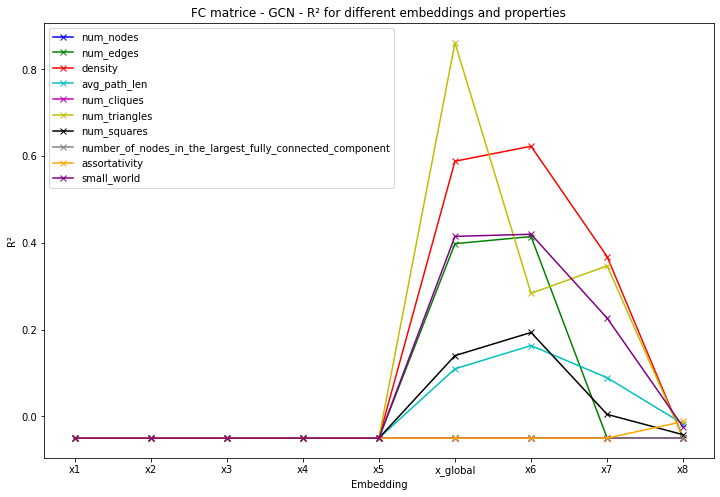

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component','assortativity', 'small_world']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_name)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"test_R2_plot.png")


In [ ]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component','assortativity', 'small_world']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'red']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_name)][2]
        if train_r2 < -0.05:
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"train_R2_plot.png")

In [1]:
# results

#### Test with more properties

In [11]:
import networkx as nx
import numpy as np

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Use the average path length of the largest connected component for disconnected graphs
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
   
def compute_swi(graph):
    # Calculate clustering coefficient and average path length for the given graph
    clustering_coeff = nx.average_clustering(graph)
    avg_path_len = calculate_avg_path_length(graph)
    
    # Generate a random graph with the same number of nodes and edges
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    random_graph = nx.gnm_random_graph(num_nodes, num_edges)
    
    # Generate a lattice graph with the same number of nodes and edges
    lattice_graph = nx.watts_strogatz_graph(num_nodes, k=4, p=0)  # Adjust k as needed
    
    # Calculate clustering coefficient and average path length for the random graph
    random_clustering_coeff = nx.average_clustering(random_graph)
    random_avg_path_len = calculate_avg_path_length(random_graph)
    
    # Calculate clustering coefficient and average path length for the lattice graph
    lattice_clustering_coeff = nx.average_clustering(lattice_graph)
    lattice_avg_path_len = calculate_avg_path_length(lattice_graph)
    
    # Compute the Small-World Index (SWI)
    swi = ((avg_path_len - lattice_avg_path_len) / (random_avg_path_len - lattice_avg_path_len)) * \
          ((clustering_coeff - random_clustering_coeff) / (lattice_clustering_coeff - random_clustering_coeff))
    
    return swi


def betweenness_centralization(G):
    n = len(G)
    betweenness = nx.betweenness_centrality(G)
    max_betweenness = max(betweenness.values())
    centralization = sum(max_betweenness - bet for bet in betweenness.values())
    if n > 2:
        centralization /= (n - 1) * (n - 2) / 2
    return centralization

def pagerank_centralization(G, alpha=0.85):
    n = len(G)
    pagerank = nx.pagerank(G, alpha=alpha)
    max_pagerank = max(pagerank.values())
    centralization = sum(max_pagerank - pr for pr in pagerank.values())
    if n > 1:
        centralization /= (n - 1)
    return centralization

def clustering_properties(G):
    average_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    return average_clustering, transitivity

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        
        # Number of nodes
        num_nodes = G.number_of_nodes()
        
        # Number of edges
        num_edges = G.number_of_edges()
        
        # Density
        density = nx.density(G)
        
        # Average Path Length
        avg_path_len = calculate_avg_path_length(G)
        
        # Diameter
        if nx.is_connected(G):
            diameter = nx.diameter(G)
        else:
            # Use the diameter of the largest connected component for disconnected graphs
            components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
            largest_component = max(components, key=len)
            diameter = nx.diameter(largest_component)
        
        # Radius
        if nx.is_connected(G):
            radius = nx.radius(G)
        else:
            radius = nx.radius(largest_component)
        
        # Clustering Coefficient
        clustering_coeff = nx.average_clustering(G)
        
        # Transitivity
        transitivity = nx.transitivity(G)
        
        # Assortativity
        assortativity = nx.degree_assortativity_coefficient(G)
        
        # Number of Cliques
        num_cliques = len(list(nx.find_cliques(G)))
        
        # Number of Triangles
        num_triangles = sum(nx.triangles(G).values()) / 3
        
        # Number of Squares (4-cycles)
        num_squares = sum(nx.square_clustering(G).values()) / 4
        
        # Size of the Largest Connected Component
        largest_component_size = len(max(nx.connected_components(G), key=len))
        
        # Average Degree
        degrees = [d for n, d in G.degree()]
        avg_degree = np.mean(degrees)
        
        # Betweenness Centrality
        betweenness_centrality = nx.betweenness_centrality(G)
        avg_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
        
        # Eigenvalues of the Adjacency Matrix (for spectral properties)
        eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(G).todense())
        spectral_radius = max(eigenvalues)
        algebraic_connectivity = sorted(eigenvalues)[1]  # second smallest eigenvalue
        
        # Graph Laplacian Eigenvalues
        laplacian_eigenvalues = np.linalg.eigvals(nx.laplacian_matrix(G).todense())
        graph_energy = sum(abs(laplacian_eigenvalues))
        
        # Small-World-ness
        # Compare clustering coefficient and average path length with those of a random graph
        random_graph = nx.gnm_random_graph(num_nodes, num_edges)
        random_clustering_coeff = nx.average_clustering(random_graph)
        random_avg_path_len = calculate_avg_path_length(random_graph)
        small_world_coefficient = (clustering_coeff / random_clustering_coeff) / (avg_path_len / random_avg_path_len)

        small_world_index = compute_swi(G)

        # Calculate Betweenness Centralization
        betweenness_cent = betweenness_centralization(G)
        print(f"Betweenness Centralization: {betweenness_cent}")

        # Calculate PageRank Centralization
        pagerank_cent = pagerank_centralization(G)
        print(f"PageRank Centralization: {pagerank_cent}")

        # Calculate Clustering properties
        avg_clustering, transitivity = clustering_properties(G)
        print(f"Average Clustering Coefficient: {avg_clustering}")
        print(f"Transitivity: {transitivity}")
        
        properties.append((
            num_nodes,
            num_edges,
            density,
            avg_path_len,
            diameter,
            radius,
            clustering_coeff,
            transitivity,
            assortativity,
            num_cliques,
            num_triangles,
            num_squares,
            largest_component_size,
            avg_degree,
            avg_betweenness_centrality,
            spectral_radius,
            algebraic_connectivity,
            graph_energy,
            small_world_coefficient, 
            betweenness_cent,
            pagerank_cent,
            avg_clustering,
            small_world_index           

        ))
    return properties



In [10]:


train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)


NameError: name 'compute_graph_properties' is not defined

In [38]:
#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties_long = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties_long = pkl.load(f)

In [39]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7490421/ipykernel_3570522/3296541069.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
/scratch-local/tpelletreaudur.7490421/ipykernel_3570522/3296541069.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)


Epoch [1000/800000], Property: num_nodes, Loss: 6124.2666
Epoch [2000/800000], Property: num_nodes, Loss: 3488.2351
Epoch [3000/800000], Property: num_nodes, Loss: 2297.7634
Epoch [4000/800000], Property: num_nodes, Loss: 1526.6017
Epoch [5000/800000], Property: num_nodes, Loss: 1019.1335
Epoch [6000/800000], Property: num_nodes, Loss: 683.2812
Epoch [7000/800000], Property: num_nodes, Loss: 460.8331
Epoch [8000/800000], Property: num_nodes, Loss: 322.4300
Epoch [9000/800000], Property: num_nodes, Loss: 242.1948
Epoch [10000/800000], Property: num_nodes, Loss: 196.2169
Epoch [11000/800000], Property: num_nodes, Loss: 166.9923
Epoch [12000/800000], Property: num_nodes, Loss: 145.5204
Epoch [13000/800000], Property: num_nodes, Loss: 128.4394
Epoch [14000/800000], Property: num_nodes, Loss: 114.4784
Epoch [15000/800000], Property: num_nodes, Loss: 103.2588
Epoch [16000/800000], Property: num_nodes, Loss: 94.5981
Epoch [17000/800000], Property: num_nodes, Loss: 88.1594
Epoch [18000/800000]

Epoch [11000/800000], Property: num_edges, Loss: 70457.8438
Epoch [12000/800000], Property: num_edges, Loss: 64482.4531
Epoch [13000/800000], Property: num_edges, Loss: 59262.5000
Epoch [14000/800000], Property: num_edges, Loss: 54710.0781
Epoch [15000/800000], Property: num_edges, Loss: 50717.7969
Epoch [16000/800000], Property: num_edges, Loss: 47187.2539
Epoch [17000/800000], Property: num_edges, Loss: 44034.9922
Epoch [18000/800000], Property: num_edges, Loss: 41217.6016
Epoch [19000/800000], Property: num_edges, Loss: 38713.0625
Epoch [20000/800000], Property: num_edges, Loss: 36498.1016
Epoch [21000/800000], Property: num_edges, Loss: 34543.7617
Epoch [22000/800000], Property: num_edges, Loss: 32831.2344
Epoch [23000/800000], Property: num_edges, Loss: 31343.2148
Epoch [24000/800000], Property: num_edges, Loss: 30058.8496
Epoch [25000/800000], Property: num_edges, Loss: 28961.3535
Epoch [26000/800000], Property: num_edges, Loss: 28037.0117
Epoch [27000/800000], Property: num_edge

Epoch [147000/800000], Property: num_edges, Loss: 20340.5488
Epoch [148000/800000], Property: num_edges, Loss: 20333.6426
Epoch [149000/800000], Property: num_edges, Loss: 20326.7461
Epoch [150000/800000], Property: num_edges, Loss: 20319.8672
Epoch [151000/800000], Property: num_edges, Loss: 20313.0020
Epoch [152000/800000], Property: num_edges, Loss: 20306.1504
Epoch [153000/800000], Property: num_edges, Loss: 20299.3105
Epoch [154000/800000], Property: num_edges, Loss: 20292.4844
Epoch [155000/800000], Property: num_edges, Loss: 20285.6738
Epoch [156000/800000], Property: num_edges, Loss: 20278.8770
Epoch [157000/800000], Property: num_edges, Loss: 20272.0957
Epoch [158000/800000], Property: num_edges, Loss: 20265.3281
Epoch [159000/800000], Property: num_edges, Loss: 20258.5723
Epoch [160000/800000], Property: num_edges, Loss: 20251.8340
Epoch [161000/800000], Property: num_edges, Loss: 20245.1055
Epoch [162000/800000], Property: num_edges, Loss: 20238.3926
Epoch [163000/800000], P

Epoch [282000/800000], Property: num_edges, Loss: 19532.5762
Epoch [283000/800000], Property: num_edges, Loss: 19527.4785
Epoch [284000/800000], Property: num_edges, Loss: 19522.3945
Epoch [285000/800000], Property: num_edges, Loss: 19517.3262
Epoch [286000/800000], Property: num_edges, Loss: 19512.2695
Epoch [287000/800000], Property: num_edges, Loss: 19507.2285
Epoch [288000/800000], Property: num_edges, Loss: 19502.2031
Epoch [289000/800000], Property: num_edges, Loss: 19497.1914
Epoch [290000/800000], Property: num_edges, Loss: 19492.1953
Epoch [291000/800000], Property: num_edges, Loss: 19487.2109
Epoch [292000/800000], Property: num_edges, Loss: 19482.2461
Epoch [293000/800000], Property: num_edges, Loss: 19477.2891
Epoch [294000/800000], Property: num_edges, Loss: 19472.3496
Epoch [295000/800000], Property: num_edges, Loss: 19467.4238
Epoch [296000/800000], Property: num_edges, Loss: 19462.5098
Epoch [297000/800000], Property: num_edges, Loss: 19457.6172
Epoch [298000/800000], P

Epoch [417000/800000], Property: num_edges, Loss: 18974.4023
Epoch [418000/800000], Property: num_edges, Loss: 18971.2461
Epoch [419000/800000], Property: num_edges, Loss: 18968.1055
Epoch [420000/800000], Property: num_edges, Loss: 18964.9785
Epoch [421000/800000], Property: num_edges, Loss: 18961.8633
Epoch [422000/800000], Property: num_edges, Loss: 18958.7656
Epoch [423000/800000], Property: num_edges, Loss: 18955.6797
Epoch [424000/800000], Property: num_edges, Loss: 18952.6094
Epoch [425000/800000], Property: num_edges, Loss: 18949.5527
Epoch [426000/800000], Property: num_edges, Loss: 18946.5098
Epoch [427000/800000], Property: num_edges, Loss: 18943.4844
Epoch [428000/800000], Property: num_edges, Loss: 18940.4707
Epoch [429000/800000], Property: num_edges, Loss: 18937.4727
Epoch [430000/800000], Property: num_edges, Loss: 18934.4883
Epoch [431000/800000], Property: num_edges, Loss: 18931.5215
Epoch [432000/800000], Property: num_edges, Loss: 18928.5605
Epoch [433000/800000], P

Epoch [552000/800000], Property: num_edges, Loss: 18679.6484
Epoch [553000/800000], Property: num_edges, Loss: 18678.4531
Epoch [554000/800000], Property: num_edges, Loss: 18677.2734
Epoch [555000/800000], Property: num_edges, Loss: 18676.1055
Epoch [556000/800000], Property: num_edges, Loss: 18674.9512
Epoch [557000/800000], Property: num_edges, Loss: 18673.8125
Epoch [558000/800000], Property: num_edges, Loss: 18672.6855
Epoch [559000/800000], Property: num_edges, Loss: 18671.5742
Epoch [560000/800000], Property: num_edges, Loss: 18670.4746
Epoch [561000/800000], Property: num_edges, Loss: 18669.3867
Epoch [562000/800000], Property: num_edges, Loss: 18668.3164
Epoch [563000/800000], Property: num_edges, Loss: 18667.2578
Epoch [564000/800000], Property: num_edges, Loss: 18666.2148
Epoch [565000/800000], Property: num_edges, Loss: 18665.1797
Epoch [566000/800000], Property: num_edges, Loss: 18664.1621
Epoch [567000/800000], Property: num_edges, Loss: 18663.1562
Epoch [568000/800000], P

Epoch [16000/800000], Property: diameter, Loss: 2.7996
Epoch [17000/800000], Property: diameter, Loss: 2.7994
Epoch [18000/800000], Property: diameter, Loss: 2.7994
Epoch [19000/800000], Property: diameter, Loss: 2.7994
Epoch [20000/800000], Property: diameter, Loss: 2.7994
Early stopping at epoch 20485
Embedding: torch.Size([1044, 128])
Property: diameter
  Train MSE: 2.7994, Test MSE: 6.1431
  Train R²: 0.1181, Test R²: -0.6081
Epoch [1000/800000], Property: radius, Loss: 0.9550
Epoch [2000/800000], Property: radius, Loss: 0.8071
Epoch [3000/800000], Property: radius, Loss: 0.7465
Epoch [4000/800000], Property: radius, Loss: 0.7111
Epoch [5000/800000], Property: radius, Loss: 0.6865
Epoch [6000/800000], Property: radius, Loss: 0.6661
Epoch [7000/800000], Property: radius, Loss: 0.6462
Epoch [8000/800000], Property: radius, Loss: 0.6268
Epoch [9000/800000], Property: radius, Loss: 0.6097
Epoch [10000/800000], Property: radius, Loss: 0.5972
Epoch [11000/800000], Property: radius, Loss:

Epoch [82000/800000], Property: num_cliques, Loss: 1026.2208
Epoch [83000/800000], Property: num_cliques, Loss: 1024.6846
Epoch [84000/800000], Property: num_cliques, Loss: 1023.1624
Epoch [85000/800000], Property: num_cliques, Loss: 1021.6540
Epoch [86000/800000], Property: num_cliques, Loss: 1020.1596
Epoch [87000/800000], Property: num_cliques, Loss: 1018.6793
Epoch [88000/800000], Property: num_cliques, Loss: 1017.2128
Epoch [89000/800000], Property: num_cliques, Loss: 1015.7602
Epoch [90000/800000], Property: num_cliques, Loss: 1014.3217
Epoch [91000/800000], Property: num_cliques, Loss: 1012.8970
Epoch [92000/800000], Property: num_cliques, Loss: 1011.4863
Epoch [93000/800000], Property: num_cliques, Loss: 1010.0895
Epoch [94000/800000], Property: num_cliques, Loss: 1008.7068
Epoch [95000/800000], Property: num_cliques, Loss: 1007.3379
Epoch [96000/800000], Property: num_cliques, Loss: 1005.9830
Epoch [97000/800000], Property: num_cliques, Loss: 1004.6422
Epoch [98000/800000], Pr

Epoch [11000/800000], Property: num_triangles, Loss: 997821.3125
Epoch [12000/800000], Property: num_triangles, Loss: 966024.1250
Epoch [13000/800000], Property: num_triangles, Loss: 938495.3750
Epoch [14000/800000], Property: num_triangles, Loss: 914497.4375
Epoch [15000/800000], Property: num_triangles, Loss: 893048.6250
Epoch [16000/800000], Property: num_triangles, Loss: 873344.1875
Epoch [17000/800000], Property: num_triangles, Loss: 854999.4375
Epoch [18000/800000], Property: num_triangles, Loss: 837871.8125
Epoch [19000/800000], Property: num_triangles, Loss: 821888.8750
Epoch [20000/800000], Property: num_triangles, Loss: 806995.0000
Epoch [21000/800000], Property: num_triangles, Loss: 793101.3125
Epoch [22000/800000], Property: num_triangles, Loss: 780083.8125
Epoch [23000/800000], Property: num_triangles, Loss: 767850.2500
Epoch [24000/800000], Property: num_triangles, Loss: 756341.4375
Epoch [25000/800000], Property: num_triangles, Loss: 745520.9375
Epoch [26000/800000], Pro

Epoch [137000/800000], Property: num_triangles, Loss: 538522.0000
Epoch [138000/800000], Property: num_triangles, Loss: 538219.1875
Epoch [139000/800000], Property: num_triangles, Loss: 537920.5625
Epoch [140000/800000], Property: num_triangles, Loss: 537626.1250
Epoch [141000/800000], Property: num_triangles, Loss: 537335.8125
Epoch [142000/800000], Property: num_triangles, Loss: 537049.6875
Epoch [143000/800000], Property: num_triangles, Loss: 536767.3750
Epoch [144000/800000], Property: num_triangles, Loss: 536489.1250
Epoch [145000/800000], Property: num_triangles, Loss: 536214.8125
Epoch [146000/800000], Property: num_triangles, Loss: 535944.3125
Epoch [147000/800000], Property: num_triangles, Loss: 535677.6875
Epoch [148000/800000], Property: num_triangles, Loss: 535414.8125
Epoch [149000/800000], Property: num_triangles, Loss: 535155.8125
Epoch [150000/800000], Property: num_triangles, Loss: 534900.5625
Epoch [151000/800000], Property: num_triangles, Loss: 534648.8750
Epoch [152

Epoch [262000/800000], Property: num_triangles, Loss: 519897.1250
Epoch [263000/800000], Property: num_triangles, Loss: 519836.3125
Epoch [264000/800000], Property: num_triangles, Loss: 519776.2500
Epoch [265000/800000], Property: num_triangles, Loss: 519716.9062
Epoch [266000/800000], Property: num_triangles, Loss: 519658.0625
Epoch [267000/800000], Property: num_triangles, Loss: 519599.8125
Epoch [268000/800000], Property: num_triangles, Loss: 519542.1250
Epoch [269000/800000], Property: num_triangles, Loss: 519485.0625
Epoch [270000/800000], Property: num_triangles, Loss: 519428.4688
Epoch [271000/800000], Property: num_triangles, Loss: 519372.5000
Epoch [272000/800000], Property: num_triangles, Loss: 519317.1562
Epoch [273000/800000], Property: num_triangles, Loss: 519262.1562
Epoch [274000/800000], Property: num_triangles, Loss: 519207.9062
Epoch [275000/800000], Property: num_triangles, Loss: 519154.1562
Epoch [276000/800000], Property: num_triangles, Loss: 519100.9375
Epoch [277

Epoch [387000/800000], Property: num_triangles, Loss: 515423.8125
Epoch [388000/800000], Property: num_triangles, Loss: 515403.4688
Epoch [389000/800000], Property: num_triangles, Loss: 515383.2188
Epoch [390000/800000], Property: num_triangles, Loss: 515363.1250
Epoch [391000/800000], Property: num_triangles, Loss: 515343.1562
Epoch [392000/800000], Property: num_triangles, Loss: 515323.2812
Epoch [393000/800000], Property: num_triangles, Loss: 515303.5938
Epoch [394000/800000], Property: num_triangles, Loss: 515283.9375
Epoch [395000/800000], Property: num_triangles, Loss: 515264.3750
Epoch [396000/800000], Property: num_triangles, Loss: 515244.9375
Epoch [397000/800000], Property: num_triangles, Loss: 515225.5000
Epoch [398000/800000], Property: num_triangles, Loss: 515206.2500
Epoch [399000/800000], Property: num_triangles, Loss: 515187.0625
Epoch [400000/800000], Property: num_triangles, Loss: 515167.9375
Epoch [401000/800000], Property: num_triangles, Loss: 515148.9375
Epoch [402

Epoch [512000/800000], Property: num_triangles, Loss: 513346.8438
Epoch [513000/800000], Property: num_triangles, Loss: 513331.7188
Epoch [514000/800000], Property: num_triangles, Loss: 513316.6562
Epoch [515000/800000], Property: num_triangles, Loss: 513301.5938
Epoch [516000/800000], Property: num_triangles, Loss: 513286.7812
Epoch [517000/800000], Property: num_triangles, Loss: 513272.2500
Epoch [518000/800000], Property: num_triangles, Loss: 513257.6562
Epoch [519000/800000], Property: num_triangles, Loss: 513243.0312
Epoch [520000/800000], Property: num_triangles, Loss: 513228.4688
Epoch [521000/800000], Property: num_triangles, Loss: 513213.9062
Epoch [522000/800000], Property: num_triangles, Loss: 513199.3750
Epoch [523000/800000], Property: num_triangles, Loss: 513184.8125
Epoch [524000/800000], Property: num_triangles, Loss: 513170.3750
Epoch [525000/800000], Property: num_triangles, Loss: 513155.8750
Epoch [526000/800000], Property: num_triangles, Loss: 513141.3750
Epoch [527

Epoch [637000/800000], Property: num_triangles, Loss: 511618.0938
Epoch [638000/800000], Property: num_triangles, Loss: 511605.1562
Epoch [639000/800000], Property: num_triangles, Loss: 511592.1875
Epoch [640000/800000], Property: num_triangles, Loss: 511579.2812
Epoch [641000/800000], Property: num_triangles, Loss: 511566.3438
Epoch [642000/800000], Property: num_triangles, Loss: 511553.4375
Epoch [643000/800000], Property: num_triangles, Loss: 511540.5312
Epoch [644000/800000], Property: num_triangles, Loss: 511527.5938
Epoch [645000/800000], Property: num_triangles, Loss: 511514.7812
Epoch [646000/800000], Property: num_triangles, Loss: 511501.9062
Epoch [647000/800000], Property: num_triangles, Loss: 511489.0625
Epoch [648000/800000], Property: num_triangles, Loss: 511476.2188
Epoch [649000/800000], Property: num_triangles, Loss: 511463.3750
Epoch [650000/800000], Property: num_triangles, Loss: 511450.5625
Epoch [651000/800000], Property: num_triangles, Loss: 511437.8125
Epoch [652

Epoch [762000/800000], Property: num_triangles, Loss: 510102.1562
Epoch [763000/800000], Property: num_triangles, Loss: 510090.8438
Epoch [764000/800000], Property: num_triangles, Loss: 510079.5938
Epoch [765000/800000], Property: num_triangles, Loss: 510068.3750
Epoch [766000/800000], Property: num_triangles, Loss: 510057.1562
Epoch [767000/800000], Property: num_triangles, Loss: 510045.9375
Epoch [768000/800000], Property: num_triangles, Loss: 510034.6875
Epoch [769000/800000], Property: num_triangles, Loss: 510023.5000
Epoch [770000/800000], Property: num_triangles, Loss: 510012.3125
Epoch [771000/800000], Property: num_triangles, Loss: 510001.1562
Epoch [772000/800000], Property: num_triangles, Loss: 509990.0000
Epoch [773000/800000], Property: num_triangles, Loss: 509978.8438
Epoch [774000/800000], Property: num_triangles, Loss: 509967.7500
Epoch [775000/800000], Property: num_triangles, Loss: 509956.6562
Epoch [776000/800000], Property: num_triangles, Loss: 509945.5000
Epoch [777

Epoch [62000/800000], Property: largest_component_size, Loss: 31.1227
Epoch [63000/800000], Property: largest_component_size, Loss: 30.3022
Epoch [64000/800000], Property: largest_component_size, Loss: 29.4955
Epoch [65000/800000], Property: largest_component_size, Loss: 28.7025
Epoch [66000/800000], Property: largest_component_size, Loss: 27.9234
Epoch [67000/800000], Property: largest_component_size, Loss: 27.1585
Epoch [68000/800000], Property: largest_component_size, Loss: 26.4094
Epoch [69000/800000], Property: largest_component_size, Loss: 25.6740
Epoch [70000/800000], Property: largest_component_size, Loss: 24.9524
Epoch [71000/800000], Property: largest_component_size, Loss: 24.2427
Epoch [72000/800000], Property: largest_component_size, Loss: 23.5459
Epoch [73000/800000], Property: largest_component_size, Loss: 22.8661
Epoch [74000/800000], Property: largest_component_size, Loss: 22.2014
Epoch [75000/800000], Property: largest_component_size, Loss: 21.5504
Epoch [76000/800000]

Epoch [18000/800000], Property: spectral_radius, Loss: 10.8848
Epoch [19000/800000], Property: spectral_radius, Loss: 10.8315
Epoch [20000/800000], Property: spectral_radius, Loss: 10.7893
Epoch [21000/800000], Property: spectral_radius, Loss: 10.7576
Epoch [22000/800000], Property: spectral_radius, Loss: 10.7355
Epoch [23000/800000], Property: spectral_radius, Loss: 10.7219
Epoch [24000/800000], Property: spectral_radius, Loss: 10.7150
Epoch [25000/800000], Property: spectral_radius, Loss: 10.7124
Epoch [26000/800000], Property: spectral_radius, Loss: 10.7119
Epoch [27000/800000], Property: spectral_radius, Loss: 10.7119
Epoch [28000/800000], Property: spectral_radius, Loss: 10.7119
Epoch [29000/800000], Property: spectral_radius, Loss: 10.7119
Early stopping at epoch 29868
Embedding: torch.Size([1044, 128])
Property: spectral_radius
  Train MSE: 10.7119, Test MSE: 17.9120
  Train R²: 0.1241, Test R²: -0.7144
Epoch [1000/800000], Property: algebraic_connectivity, Loss: 0.3929
Epoch [2

Epoch [96000/800000], Property: graph_energy, Loss: 88507.7500
Epoch [97000/800000], Property: graph_energy, Loss: 88347.9766
Epoch [98000/800000], Property: graph_energy, Loss: 88193.3281
Epoch [99000/800000], Property: graph_energy, Loss: 88043.6953
Epoch [100000/800000], Property: graph_energy, Loss: 87898.9297
Epoch [101000/800000], Property: graph_energy, Loss: 87758.8984
Epoch [102000/800000], Property: graph_energy, Loss: 87623.3672
Epoch [103000/800000], Property: graph_energy, Loss: 87492.1797
Epoch [104000/800000], Property: graph_energy, Loss: 87365.1406
Epoch [105000/800000], Property: graph_energy, Loss: 87241.9922
Epoch [106000/800000], Property: graph_energy, Loss: 87122.7812
Epoch [107000/800000], Property: graph_energy, Loss: 87007.3984
Epoch [108000/800000], Property: graph_energy, Loss: 86895.7969
Epoch [109000/800000], Property: graph_energy, Loss: 86787.8594
Epoch [110000/800000], Property: graph_energy, Loss: 86683.4219
Epoch [111000/800000], Property: graph_energ

Epoch [225000/800000], Property: graph_energy, Loss: 82290.5000
Epoch [226000/800000], Property: graph_energy, Loss: 82274.9219
Epoch [227000/800000], Property: graph_energy, Loss: 82259.4141
Epoch [228000/800000], Property: graph_energy, Loss: 82243.9844
Epoch [229000/800000], Property: graph_energy, Loss: 82228.6250
Epoch [230000/800000], Property: graph_energy, Loss: 82213.3516
Epoch [231000/800000], Property: graph_energy, Loss: 82198.1484
Epoch [232000/800000], Property: graph_energy, Loss: 82183.0000
Epoch [233000/800000], Property: graph_energy, Loss: 82167.9297
Epoch [234000/800000], Property: graph_energy, Loss: 82152.9375
Epoch [235000/800000], Property: graph_energy, Loss: 82138.0000
Epoch [236000/800000], Property: graph_energy, Loss: 82123.1406
Epoch [237000/800000], Property: graph_energy, Loss: 82108.3438
Epoch [238000/800000], Property: graph_energy, Loss: 82093.6250
Epoch [239000/800000], Property: graph_energy, Loss: 82078.9453
Epoch [240000/800000], Property: graph_e

Epoch [354000/800000], Property: graph_energy, Loss: 80481.1797
Epoch [355000/800000], Property: graph_energy, Loss: 80468.0859
Epoch [356000/800000], Property: graph_energy, Loss: 80455.0000
Epoch [357000/800000], Property: graph_energy, Loss: 80441.9062
Epoch [358000/800000], Property: graph_energy, Loss: 80428.8516
Epoch [359000/800000], Property: graph_energy, Loss: 80415.8125
Epoch [360000/800000], Property: graph_energy, Loss: 80402.7734
Epoch [361000/800000], Property: graph_energy, Loss: 80389.7656
Epoch [362000/800000], Property: graph_energy, Loss: 80376.7578
Epoch [363000/800000], Property: graph_energy, Loss: 80363.7734
Epoch [364000/800000], Property: graph_energy, Loss: 80350.8047
Epoch [365000/800000], Property: graph_energy, Loss: 80337.8359
Epoch [366000/800000], Property: graph_energy, Loss: 80324.9062
Epoch [367000/800000], Property: graph_energy, Loss: 80311.9609
Epoch [368000/800000], Property: graph_energy, Loss: 80299.0469
Epoch [369000/800000], Property: graph_e

Epoch [483000/800000], Property: graph_energy, Loss: 78909.6641
Epoch [484000/800000], Property: graph_energy, Loss: 78898.4062
Epoch [485000/800000], Property: graph_energy, Loss: 78887.1797
Epoch [486000/800000], Property: graph_energy, Loss: 78875.9609
Epoch [487000/800000], Property: graph_energy, Loss: 78864.7500
Epoch [488000/800000], Property: graph_energy, Loss: 78853.5625
Epoch [489000/800000], Property: graph_energy, Loss: 78842.3906
Epoch [490000/800000], Property: graph_energy, Loss: 78831.2266
Epoch [491000/800000], Property: graph_energy, Loss: 78820.0781
Epoch [492000/800000], Property: graph_energy, Loss: 78808.9531
Epoch [493000/800000], Property: graph_energy, Loss: 78797.8281
Epoch [494000/800000], Property: graph_energy, Loss: 78786.7266
Epoch [495000/800000], Property: graph_energy, Loss: 78775.6328
Epoch [496000/800000], Property: graph_energy, Loss: 78764.5625
Epoch [497000/800000], Property: graph_energy, Loss: 78753.5000
Epoch [498000/800000], Property: graph_e

Epoch [612000/800000], Property: graph_energy, Loss: 77604.8359
Epoch [613000/800000], Property: graph_energy, Loss: 77595.6953
Epoch [614000/800000], Property: graph_energy, Loss: 77586.5547
Epoch [615000/800000], Property: graph_energy, Loss: 77577.4219
Epoch [616000/800000], Property: graph_energy, Loss: 77568.3203
Epoch [617000/800000], Property: graph_energy, Loss: 77559.2188
Epoch [618000/800000], Property: graph_energy, Loss: 77550.1484
Epoch [619000/800000], Property: graph_energy, Loss: 77541.0781
Epoch [620000/800000], Property: graph_energy, Loss: 77532.0312
Epoch [621000/800000], Property: graph_energy, Loss: 77523.0000
Epoch [622000/800000], Property: graph_energy, Loss: 77513.9609
Epoch [623000/800000], Property: graph_energy, Loss: 77504.9531
Epoch [624000/800000], Property: graph_energy, Loss: 77495.9375
Epoch [625000/800000], Property: graph_energy, Loss: 77486.9609
Epoch [626000/800000], Property: graph_energy, Loss: 77477.9844
Epoch [627000/800000], Property: graph_e

Epoch [741000/800000], Property: graph_energy, Loss: 76536.2969
Epoch [742000/800000], Property: graph_energy, Loss: 76528.8906
Epoch [743000/800000], Property: graph_energy, Loss: 76521.5000
Epoch [744000/800000], Property: graph_energy, Loss: 76514.1250
Epoch [745000/800000], Property: graph_energy, Loss: 76506.7578
Epoch [746000/800000], Property: graph_energy, Loss: 76499.3984
Epoch [747000/800000], Property: graph_energy, Loss: 76492.0703
Epoch [748000/800000], Property: graph_energy, Loss: 76484.7422
Epoch [749000/800000], Property: graph_energy, Loss: 76477.4375
Epoch [750000/800000], Property: graph_energy, Loss: 76470.1484
Epoch [751000/800000], Property: graph_energy, Loss: 76462.8594
Epoch [752000/800000], Property: graph_energy, Loss: 76455.5938
Epoch [753000/800000], Property: graph_energy, Loss: 76448.3438
Epoch [754000/800000], Property: graph_energy, Loss: 76441.0859
Epoch [755000/800000], Property: graph_energy, Loss: 76433.8672
Epoch [756000/800000], Property: graph_e

Epoch [14000/800000], Property: num_nodes, Loss: 132.9427
Epoch [15000/800000], Property: num_nodes, Loss: 117.9409
Epoch [16000/800000], Property: num_nodes, Loss: 106.1269
Epoch [17000/800000], Property: num_nodes, Loss: 96.3780
Epoch [18000/800000], Property: num_nodes, Loss: 88.2422
Epoch [19000/800000], Property: num_nodes, Loss: 81.5428
Epoch [20000/800000], Property: num_nodes, Loss: 76.0802
Epoch [21000/800000], Property: num_nodes, Loss: 71.6010
Epoch [22000/800000], Property: num_nodes, Loss: 67.8592
Epoch [23000/800000], Property: num_nodes, Loss: 64.6605
Epoch [24000/800000], Property: num_nodes, Loss: 61.8755
Epoch [25000/800000], Property: num_nodes, Loss: 59.4310
Epoch [26000/800000], Property: num_nodes, Loss: 57.2852
Epoch [27000/800000], Property: num_nodes, Loss: 55.4012
Epoch [28000/800000], Property: num_nodes, Loss: 53.7423
Epoch [29000/800000], Property: num_nodes, Loss: 52.2766
Epoch [30000/800000], Property: num_nodes, Loss: 50.9697
Epoch [31000/800000], Proper

Epoch [23000/800000], Property: num_edges, Loss: 30474.2832
Epoch [24000/800000], Property: num_edges, Loss: 29672.5410
Epoch [25000/800000], Property: num_edges, Loss: 29039.5273
Epoch [26000/800000], Property: num_edges, Loss: 28495.5605
Epoch [27000/800000], Property: num_edges, Loss: 27996.3926
Epoch [28000/800000], Property: num_edges, Loss: 27530.5723
Epoch [29000/800000], Property: num_edges, Loss: 27095.9531
Epoch [30000/800000], Property: num_edges, Loss: 26691.6992
Epoch [31000/800000], Property: num_edges, Loss: 26316.3672
Epoch [32000/800000], Property: num_edges, Loss: 25967.9355
Epoch [33000/800000], Property: num_edges, Loss: 25645.4004
Epoch [34000/800000], Property: num_edges, Loss: 25348.6152
Epoch [35000/800000], Property: num_edges, Loss: 25077.0059
Epoch [36000/800000], Property: num_edges, Loss: 24828.9590
Epoch [37000/800000], Property: num_edges, Loss: 24601.8848
Epoch [38000/800000], Property: num_edges, Loss: 24392.2988
Epoch [39000/800000], Property: num_edge

Epoch [159000/800000], Property: num_edges, Loss: 20239.4980
Epoch [160000/800000], Property: num_edges, Loss: 20233.3203
Epoch [161000/800000], Property: num_edges, Loss: 20227.1758
Epoch [162000/800000], Property: num_edges, Loss: 20221.0684
Epoch [163000/800000], Property: num_edges, Loss: 20214.9961
Epoch [164000/800000], Property: num_edges, Loss: 20208.9590
Epoch [165000/800000], Property: num_edges, Loss: 20202.9531
Epoch [166000/800000], Property: num_edges, Loss: 20196.9785
Epoch [167000/800000], Property: num_edges, Loss: 20191.0371
Epoch [168000/800000], Property: num_edges, Loss: 20185.1230
Epoch [169000/800000], Property: num_edges, Loss: 20179.2285
Epoch [170000/800000], Property: num_edges, Loss: 20173.3594
Epoch [171000/800000], Property: num_edges, Loss: 20167.5117
Epoch [172000/800000], Property: num_edges, Loss: 20161.6855
Epoch [173000/800000], Property: num_edges, Loss: 20155.8770
Epoch [174000/800000], Property: num_edges, Loss: 20150.0938
Epoch [175000/800000], P

Epoch [294000/800000], Property: num_edges, Loss: 19576.5664
Epoch [295000/800000], Property: num_edges, Loss: 19572.5059
Epoch [296000/800000], Property: num_edges, Loss: 19568.4609
Epoch [297000/800000], Property: num_edges, Loss: 19564.4258
Epoch [298000/800000], Property: num_edges, Loss: 19560.4004
Epoch [299000/800000], Property: num_edges, Loss: 19556.3906
Epoch [300000/800000], Property: num_edges, Loss: 19552.3906
Epoch [301000/800000], Property: num_edges, Loss: 19548.4062
Epoch [302000/800000], Property: num_edges, Loss: 19544.4277
Epoch [303000/800000], Property: num_edges, Loss: 19540.4629
Epoch [304000/800000], Property: num_edges, Loss: 19536.5117
Epoch [305000/800000], Property: num_edges, Loss: 19532.5742
Epoch [306000/800000], Property: num_edges, Loss: 19528.6465
Epoch [307000/800000], Property: num_edges, Loss: 19524.7324
Epoch [308000/800000], Property: num_edges, Loss: 19520.8262
Epoch [309000/800000], Property: num_edges, Loss: 19516.9355
Epoch [310000/800000], P

Epoch [429000/800000], Property: num_edges, Loss: 19136.4453
Epoch [430000/800000], Property: num_edges, Loss: 19133.9961
Epoch [431000/800000], Property: num_edges, Loss: 19131.5566
Epoch [432000/800000], Property: num_edges, Loss: 19129.1328
Epoch [433000/800000], Property: num_edges, Loss: 19126.7188
Epoch [434000/800000], Property: num_edges, Loss: 19124.3164
Epoch [435000/800000], Property: num_edges, Loss: 19121.9277
Epoch [436000/800000], Property: num_edges, Loss: 19119.5508
Epoch [437000/800000], Property: num_edges, Loss: 19117.1816
Epoch [438000/800000], Property: num_edges, Loss: 19114.8281
Epoch [439000/800000], Property: num_edges, Loss: 19112.4863
Epoch [440000/800000], Property: num_edges, Loss: 19110.1543
Epoch [441000/800000], Property: num_edges, Loss: 19107.8379
Epoch [442000/800000], Property: num_edges, Loss: 19105.5312
Epoch [443000/800000], Property: num_edges, Loss: 19103.2383
Epoch [444000/800000], Property: num_edges, Loss: 19100.9531
Epoch [445000/800000], P

Epoch [564000/800000], Property: num_edges, Loss: 18914.8574
Epoch [565000/800000], Property: num_edges, Loss: 18914.0273
Epoch [566000/800000], Property: num_edges, Loss: 18913.2070
Epoch [567000/800000], Property: num_edges, Loss: 18912.3984
Epoch [568000/800000], Property: num_edges, Loss: 18911.6016
Epoch [569000/800000], Property: num_edges, Loss: 18910.8125
Epoch [570000/800000], Property: num_edges, Loss: 18910.0352
Epoch [571000/800000], Property: num_edges, Loss: 18909.2695
Epoch [572000/800000], Property: num_edges, Loss: 18908.5176
Epoch [573000/800000], Property: num_edges, Loss: 18907.7734
Epoch [574000/800000], Property: num_edges, Loss: 18907.0449
Epoch [575000/800000], Property: num_edges, Loss: 18906.3242
Epoch [576000/800000], Property: num_edges, Loss: 18905.6172
Epoch [577000/800000], Property: num_edges, Loss: 18904.9199
Epoch [578000/800000], Property: num_edges, Loss: 18904.2344
Epoch [579000/800000], Property: num_edges, Loss: 18903.5566
Epoch [580000/800000], P

Epoch [5000/800000], Property: radius, Loss: 0.6817
Epoch [6000/800000], Property: radius, Loss: 0.6544
Epoch [7000/800000], Property: radius, Loss: 0.6348
Epoch [8000/800000], Property: radius, Loss: 0.6197
Epoch [9000/800000], Property: radius, Loss: 0.6078
Epoch [10000/800000], Property: radius, Loss: 0.5992
Epoch [11000/800000], Property: radius, Loss: 0.5941
Epoch [12000/800000], Property: radius, Loss: 0.5918
Epoch [13000/800000], Property: radius, Loss: 0.5912
Epoch [14000/800000], Property: radius, Loss: 0.5911
Epoch [15000/800000], Property: radius, Loss: 0.5911
Epoch [16000/800000], Property: radius, Loss: 0.5911
Epoch [17000/800000], Property: radius, Loss: 0.5911
Early stopping at epoch 17515
Embedding: torch.Size([1044, 128])
Property: radius
  Train MSE: 0.5911, Test MSE: 1.4091
  Train R²: 0.1163, Test R²: -1.2843
Epoch [1000/800000], Property: clustering_coeff, Loss: 0.0040
Epoch [2000/800000], Property: clustering_coeff, Loss: 0.0030
Epoch [3000/800000], Property: clus

Epoch [88000/800000], Property: num_cliques, Loss: 996.7466
Epoch [89000/800000], Property: num_cliques, Loss: 995.5747
Epoch [90000/800000], Property: num_cliques, Loss: 994.4144
Epoch [91000/800000], Property: num_cliques, Loss: 993.2656
Epoch [92000/800000], Property: num_cliques, Loss: 992.1285
Epoch [93000/800000], Property: num_cliques, Loss: 991.0027
Epoch [94000/800000], Property: num_cliques, Loss: 989.8887
Epoch [95000/800000], Property: num_cliques, Loss: 988.7860
Epoch [96000/800000], Property: num_cliques, Loss: 987.6953
Epoch [97000/800000], Property: num_cliques, Loss: 986.6158
Epoch [98000/800000], Property: num_cliques, Loss: 985.5481
Epoch [99000/800000], Property: num_cliques, Loss: 984.4918
Epoch [100000/800000], Property: num_cliques, Loss: 983.4470
Epoch [101000/800000], Property: num_cliques, Loss: 982.4139
Epoch [102000/800000], Property: num_cliques, Loss: 981.3923
Epoch [103000/800000], Property: num_cliques, Loss: 980.3823
Epoch [104000/800000], Property: num

Epoch [21000/800000], Property: num_triangles, Loss: 842146.1875
Epoch [22000/800000], Property: num_triangles, Loss: 823069.2500
Epoch [23000/800000], Property: num_triangles, Loss: 805089.8125
Epoch [24000/800000], Property: num_triangles, Loss: 788156.1250
Epoch [25000/800000], Property: num_triangles, Loss: 772220.5000
Epoch [26000/800000], Property: num_triangles, Loss: 757269.6875
Epoch [27000/800000], Property: num_triangles, Loss: 743269.5625
Epoch [28000/800000], Property: num_triangles, Loss: 730167.1875
Epoch [29000/800000], Property: num_triangles, Loss: 717913.5625
Epoch [30000/800000], Property: num_triangles, Loss: 706480.9375
Epoch [31000/800000], Property: num_triangles, Loss: 695858.2500
Epoch [32000/800000], Property: num_triangles, Loss: 686021.0625
Epoch [33000/800000], Property: num_triangles, Loss: 676932.0000
Epoch [34000/800000], Property: num_triangles, Loss: 668552.5625
Epoch [35000/800000], Property: num_triangles, Loss: 660853.5625
Epoch [36000/800000], Pro

Epoch [147000/800000], Property: num_triangles, Loss: 548124.8125
Epoch [148000/800000], Property: num_triangles, Loss: 547879.3750
Epoch [149000/800000], Property: num_triangles, Loss: 547636.3750
Epoch [150000/800000], Property: num_triangles, Loss: 547395.9375
Epoch [151000/800000], Property: num_triangles, Loss: 547158.0625
Epoch [152000/800000], Property: num_triangles, Loss: 546922.6250
Epoch [153000/800000], Property: num_triangles, Loss: 546689.5000
Epoch [154000/800000], Property: num_triangles, Loss: 546458.8125
Epoch [155000/800000], Property: num_triangles, Loss: 546230.4375
Epoch [156000/800000], Property: num_triangles, Loss: 546004.2500
Epoch [157000/800000], Property: num_triangles, Loss: 545780.2500
Epoch [158000/800000], Property: num_triangles, Loss: 545558.3125
Epoch [159000/800000], Property: num_triangles, Loss: 545338.5000
Epoch [160000/800000], Property: num_triangles, Loss: 545120.6250
Epoch [161000/800000], Property: num_triangles, Loss: 544904.6875
Epoch [162

Epoch [272000/800000], Property: num_triangles, Loss: 528303.0000
Epoch [273000/800000], Property: num_triangles, Loss: 528198.0625
Epoch [274000/800000], Property: num_triangles, Loss: 528093.7500
Epoch [275000/800000], Property: num_triangles, Loss: 527990.0000
Epoch [276000/800000], Property: num_triangles, Loss: 527886.8750
Epoch [277000/800000], Property: num_triangles, Loss: 527784.4375
Epoch [278000/800000], Property: num_triangles, Loss: 527682.5625
Epoch [279000/800000], Property: num_triangles, Loss: 527581.3125
Epoch [280000/800000], Property: num_triangles, Loss: 527480.6250
Epoch [281000/800000], Property: num_triangles, Loss: 527380.6250
Epoch [282000/800000], Property: num_triangles, Loss: 527281.1250
Epoch [283000/800000], Property: num_triangles, Loss: 527182.3125
Epoch [284000/800000], Property: num_triangles, Loss: 527084.0625
Epoch [285000/800000], Property: num_triangles, Loss: 526986.4375
Epoch [286000/800000], Property: num_triangles, Loss: 526889.3750
Epoch [287

Epoch [397000/800000], Property: num_triangles, Loss: 519173.8750
Epoch [398000/800000], Property: num_triangles, Loss: 519125.0312
Epoch [399000/800000], Property: num_triangles, Loss: 519076.5938
Epoch [400000/800000], Property: num_triangles, Loss: 519028.3438
Epoch [401000/800000], Property: num_triangles, Loss: 518980.2812
Epoch [402000/800000], Property: num_triangles, Loss: 518932.6562
Epoch [403000/800000], Property: num_triangles, Loss: 518885.2188
Epoch [404000/800000], Property: num_triangles, Loss: 518838.0000
Epoch [405000/800000], Property: num_triangles, Loss: 518791.1250
Epoch [406000/800000], Property: num_triangles, Loss: 518744.4688
Epoch [407000/800000], Property: num_triangles, Loss: 518698.0625
Epoch [408000/800000], Property: num_triangles, Loss: 518651.9062
Epoch [409000/800000], Property: num_triangles, Loss: 518606.0312
Epoch [410000/800000], Property: num_triangles, Loss: 518560.4375
Epoch [411000/800000], Property: num_triangles, Loss: 518515.1250
Epoch [412

Epoch [522000/800000], Property: num_triangles, Loss: 514917.5312
Epoch [523000/800000], Property: num_triangles, Loss: 514893.5000
Epoch [524000/800000], Property: num_triangles, Loss: 514869.6250
Epoch [525000/800000], Property: num_triangles, Loss: 514845.7188
Epoch [526000/800000], Property: num_triangles, Loss: 514822.0000
Epoch [527000/800000], Property: num_triangles, Loss: 514798.3438
Epoch [528000/800000], Property: num_triangles, Loss: 514774.6875
Epoch [529000/800000], Property: num_triangles, Loss: 514751.1562
Epoch [530000/800000], Property: num_triangles, Loss: 514727.5938
Epoch [531000/800000], Property: num_triangles, Loss: 514704.2500
Epoch [532000/800000], Property: num_triangles, Loss: 514680.8750
Epoch [533000/800000], Property: num_triangles, Loss: 514657.5938
Epoch [534000/800000], Property: num_triangles, Loss: 514634.3750
Epoch [535000/800000], Property: num_triangles, Loss: 514611.3125
Epoch [536000/800000], Property: num_triangles, Loss: 514588.1875
Epoch [537

Epoch [647000/800000], Property: num_triangles, Loss: 512443.9688
Epoch [648000/800000], Property: num_triangles, Loss: 512427.7500
Epoch [649000/800000], Property: num_triangles, Loss: 512411.5312
Epoch [650000/800000], Property: num_triangles, Loss: 512395.2812
Epoch [651000/800000], Property: num_triangles, Loss: 512379.1562
Epoch [652000/800000], Property: num_triangles, Loss: 512363.0938
Epoch [653000/800000], Property: num_triangles, Loss: 512347.0312
Epoch [654000/800000], Property: num_triangles, Loss: 512331.0312
Epoch [655000/800000], Property: num_triangles, Loss: 512315.0938
Epoch [656000/800000], Property: num_triangles, Loss: 512299.1875
Epoch [657000/800000], Property: num_triangles, Loss: 512283.3125
Epoch [658000/800000], Property: num_triangles, Loss: 512267.4688
Epoch [659000/800000], Property: num_triangles, Loss: 512251.7188
Epoch [660000/800000], Property: num_triangles, Loss: 512236.0000
Epoch [661000/800000], Property: num_triangles, Loss: 512220.2500
Epoch [662

Epoch [772000/800000], Property: num_triangles, Loss: 510752.8750
Epoch [773000/800000], Property: num_triangles, Loss: 510742.0938
Epoch [774000/800000], Property: num_triangles, Loss: 510731.4062
Epoch [775000/800000], Property: num_triangles, Loss: 510720.7500
Epoch [776000/800000], Property: num_triangles, Loss: 510710.1562
Epoch [777000/800000], Property: num_triangles, Loss: 510699.5312
Epoch [778000/800000], Property: num_triangles, Loss: 510689.0312
Epoch [779000/800000], Property: num_triangles, Loss: 510678.5625
Epoch [780000/800000], Property: num_triangles, Loss: 510668.0625
Epoch [781000/800000], Property: num_triangles, Loss: 510657.7188
Epoch [782000/800000], Property: num_triangles, Loss: 510647.3750
Epoch [783000/800000], Property: num_triangles, Loss: 510637.0625
Epoch [784000/800000], Property: num_triangles, Loss: 510626.7812
Epoch [785000/800000], Property: num_triangles, Loss: 510616.5625
Epoch [786000/800000], Property: num_triangles, Loss: 510606.4062
Epoch [787

Epoch [70000/800000], Property: largest_component_size, Loss: 22.4386
Epoch [71000/800000], Property: largest_component_size, Loss: 21.8375
Epoch [72000/800000], Property: largest_component_size, Loss: 21.2461
Epoch [73000/800000], Property: largest_component_size, Loss: 20.6663
Epoch [74000/800000], Property: largest_component_size, Loss: 20.1000
Epoch [75000/800000], Property: largest_component_size, Loss: 19.5468
Epoch [76000/800000], Property: largest_component_size, Loss: 19.0049
Epoch [77000/800000], Property: largest_component_size, Loss: 18.4743
Epoch [78000/800000], Property: largest_component_size, Loss: 17.9549
Epoch [79000/800000], Property: largest_component_size, Loss: 17.4467
Epoch [80000/800000], Property: largest_component_size, Loss: 16.9497
Epoch [81000/800000], Property: largest_component_size, Loss: 16.4639
Epoch [82000/800000], Property: largest_component_size, Loss: 15.9894
Epoch [83000/800000], Property: largest_component_size, Loss: 15.5260
Epoch [84000/800000]

Epoch [22000/800000], Property: spectral_radius, Loss: 10.7718
Epoch [23000/800000], Property: spectral_radius, Loss: 10.7623
Epoch [24000/800000], Property: spectral_radius, Loss: 10.7577
Epoch [25000/800000], Property: spectral_radius, Loss: 10.7563
Epoch [26000/800000], Property: spectral_radius, Loss: 10.7560
Epoch [27000/800000], Property: spectral_radius, Loss: 10.7560
Epoch [28000/800000], Property: spectral_radius, Loss: 10.7560
Epoch [29000/800000], Property: spectral_radius, Loss: 10.7560
Early stopping at epoch 29986
Embedding: torch.Size([1044, 128])
Property: spectral_radius
  Train MSE: 10.7560, Test MSE: 59.0500
  Train R²: 0.1205, Test R²: -4.6519
Epoch [1000/800000], Property: algebraic_connectivity, Loss: 0.4828
Epoch [2000/800000], Property: algebraic_connectivity, Loss: 0.3439
Epoch [3000/800000], Property: algebraic_connectivity, Loss: 0.2930
Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.2607
Epoch [5000/800000], Property: algebraic_connectivity, L

Epoch [99000/800000], Property: graph_energy, Loss: 90431.3984
Epoch [100000/800000], Property: graph_energy, Loss: 90273.8906
Epoch [101000/800000], Property: graph_energy, Loss: 90120.6016
Epoch [102000/800000], Property: graph_energy, Loss: 89971.2109
Epoch [103000/800000], Property: graph_energy, Loss: 89825.3984
Epoch [104000/800000], Property: graph_energy, Loss: 89682.8828
Epoch [105000/800000], Property: graph_energy, Loss: 89543.5859
Epoch [106000/800000], Property: graph_energy, Loss: 89407.4922
Epoch [107000/800000], Property: graph_energy, Loss: 89274.5469
Epoch [108000/800000], Property: graph_energy, Loss: 89144.7188
Epoch [109000/800000], Property: graph_energy, Loss: 89017.8984
Epoch [110000/800000], Property: graph_energy, Loss: 88893.9531
Epoch [111000/800000], Property: graph_energy, Loss: 88772.6953
Epoch [112000/800000], Property: graph_energy, Loss: 88653.9844
Epoch [113000/800000], Property: graph_energy, Loss: 88537.7812
Epoch [114000/800000], Property: graph_en

Epoch [228000/800000], Property: graph_energy, Loss: 82330.3828
Epoch [229000/800000], Property: graph_energy, Loss: 82307.8750
Epoch [230000/800000], Property: graph_energy, Loss: 82285.5703
Epoch [231000/800000], Property: graph_energy, Loss: 82263.5000
Epoch [232000/800000], Property: graph_energy, Loss: 82241.6250
Epoch [233000/800000], Property: graph_energy, Loss: 82219.9531
Epoch [234000/800000], Property: graph_energy, Loss: 82198.4766
Epoch [235000/800000], Property: graph_energy, Loss: 82177.2031
Epoch [236000/800000], Property: graph_energy, Loss: 82156.1328
Epoch [237000/800000], Property: graph_energy, Loss: 82135.2578
Epoch [238000/800000], Property: graph_energy, Loss: 82114.5938
Epoch [239000/800000], Property: graph_energy, Loss: 82094.1172
Epoch [240000/800000], Property: graph_energy, Loss: 82073.8359
Epoch [241000/800000], Property: graph_energy, Loss: 82053.7500
Epoch [242000/800000], Property: graph_energy, Loss: 82033.8438
Epoch [243000/800000], Property: graph_e

Epoch [357000/800000], Property: graph_energy, Loss: 80428.9453
Epoch [358000/800000], Property: graph_energy, Loss: 80417.5703
Epoch [359000/800000], Property: graph_energy, Loss: 80406.2188
Epoch [360000/800000], Property: graph_energy, Loss: 80394.9062
Epoch [361000/800000], Property: graph_energy, Loss: 80383.6016
Epoch [362000/800000], Property: graph_energy, Loss: 80372.3203
Epoch [363000/800000], Property: graph_energy, Loss: 80361.0703
Epoch [364000/800000], Property: graph_energy, Loss: 80349.8281
Epoch [365000/800000], Property: graph_energy, Loss: 80338.6172
Epoch [366000/800000], Property: graph_energy, Loss: 80327.4141
Epoch [367000/800000], Property: graph_energy, Loss: 80316.2500
Epoch [368000/800000], Property: graph_energy, Loss: 80305.0938
Epoch [369000/800000], Property: graph_energy, Loss: 80293.9609
Epoch [370000/800000], Property: graph_energy, Loss: 80282.8672
Epoch [371000/800000], Property: graph_energy, Loss: 80271.7812
Epoch [372000/800000], Property: graph_e

Epoch [486000/800000], Property: graph_energy, Loss: 79119.0625
Epoch [487000/800000], Property: graph_energy, Loss: 79109.8359
Epoch [488000/800000], Property: graph_energy, Loss: 79100.6094
Epoch [489000/800000], Property: graph_energy, Loss: 79091.3984
Epoch [490000/800000], Property: graph_energy, Loss: 79082.1953
Epoch [491000/800000], Property: graph_energy, Loss: 79073.0000
Epoch [492000/800000], Property: graph_energy, Loss: 79063.8125
Epoch [493000/800000], Property: graph_energy, Loss: 79054.6484
Epoch [494000/800000], Property: graph_energy, Loss: 79045.5000
Epoch [495000/800000], Property: graph_energy, Loss: 79036.3516
Epoch [496000/800000], Property: graph_energy, Loss: 79027.2188
Epoch [497000/800000], Property: graph_energy, Loss: 79018.1016
Epoch [498000/800000], Property: graph_energy, Loss: 79008.9922
Epoch [499000/800000], Property: graph_energy, Loss: 78999.8906
Epoch [500000/800000], Property: graph_energy, Loss: 78990.8125
Epoch [501000/800000], Property: graph_e

Epoch [615000/800000], Property: graph_energy, Loss: 78048.7969
Epoch [616000/800000], Property: graph_energy, Loss: 78041.2891
Epoch [617000/800000], Property: graph_energy, Loss: 78033.8047
Epoch [618000/800000], Property: graph_energy, Loss: 78026.3203
Epoch [619000/800000], Property: graph_energy, Loss: 78018.8516
Epoch [620000/800000], Property: graph_energy, Loss: 78011.3906
Epoch [621000/800000], Property: graph_energy, Loss: 78003.9453
Epoch [622000/800000], Property: graph_energy, Loss: 77996.5156
Epoch [623000/800000], Property: graph_energy, Loss: 77989.0781
Epoch [624000/800000], Property: graph_energy, Loss: 77981.6719
Epoch [625000/800000], Property: graph_energy, Loss: 77974.2656
Epoch [626000/800000], Property: graph_energy, Loss: 77966.8828
Epoch [627000/800000], Property: graph_energy, Loss: 77959.5000
Epoch [628000/800000], Property: graph_energy, Loss: 77952.1328
Epoch [629000/800000], Property: graph_energy, Loss: 77944.7812
Epoch [630000/800000], Property: graph_e

Epoch [744000/800000], Property: graph_energy, Loss: 77173.4844
Epoch [745000/800000], Property: graph_energy, Loss: 77167.4297
Epoch [746000/800000], Property: graph_energy, Loss: 77161.3906
Epoch [747000/800000], Property: graph_energy, Loss: 77155.3594
Epoch [748000/800000], Property: graph_energy, Loss: 77149.3359
Epoch [749000/800000], Property: graph_energy, Loss: 77143.3125
Epoch [750000/800000], Property: graph_energy, Loss: 77137.3203
Epoch [751000/800000], Property: graph_energy, Loss: 77131.3359
Epoch [752000/800000], Property: graph_energy, Loss: 77125.3516
Epoch [753000/800000], Property: graph_energy, Loss: 77119.3828
Epoch [754000/800000], Property: graph_energy, Loss: 77113.4219
Epoch [755000/800000], Property: graph_energy, Loss: 77107.4766
Epoch [756000/800000], Property: graph_energy, Loss: 77101.5469
Epoch [757000/800000], Property: graph_energy, Loss: 77095.6328
Epoch [758000/800000], Property: graph_energy, Loss: 77089.7188
Epoch [759000/800000], Property: graph_e

Epoch [7000/800000], Property: num_nodes, Loss: 388.5435
Epoch [8000/800000], Property: num_nodes, Loss: 327.1626
Epoch [9000/800000], Property: num_nodes, Loss: 285.1844
Epoch [10000/800000], Property: num_nodes, Loss: 246.1988
Epoch [11000/800000], Property: num_nodes, Loss: 209.2484
Epoch [12000/800000], Property: num_nodes, Loss: 175.8692
Epoch [13000/800000], Property: num_nodes, Loss: 147.4609
Epoch [14000/800000], Property: num_nodes, Loss: 124.4460
Epoch [15000/800000], Property: num_nodes, Loss: 106.1941
Epoch [16000/800000], Property: num_nodes, Loss: 91.6642
Epoch [17000/800000], Property: num_nodes, Loss: 79.8926
Epoch [18000/800000], Property: num_nodes, Loss: 70.2329
Epoch [19000/800000], Property: num_nodes, Loss: 62.3333
Epoch [20000/800000], Property: num_nodes, Loss: 55.9290
Epoch [21000/800000], Property: num_nodes, Loss: 50.7382
Epoch [22000/800000], Property: num_nodes, Loss: 46.5182
Epoch [23000/800000], Property: num_nodes, Loss: 43.0705
Epoch [24000/800000], Pro

Epoch [1000/800000], Property: num_edges, Loss: 255820.0156
Epoch [2000/800000], Property: num_edges, Loss: 231586.2344
Epoch [3000/800000], Property: num_edges, Loss: 212272.2812
Epoch [4000/800000], Property: num_edges, Loss: 194335.6094
Epoch [5000/800000], Property: num_edges, Loss: 177067.2188
Epoch [6000/800000], Property: num_edges, Loss: 160624.3125
Epoch [7000/800000], Property: num_edges, Loss: 145138.0156
Epoch [8000/800000], Property: num_edges, Loss: 130678.6484
Epoch [9000/800000], Property: num_edges, Loss: 117278.6406
Epoch [10000/800000], Property: num_edges, Loss: 104947.9688
Epoch [11000/800000], Property: num_edges, Loss: 93681.3984
Epoch [12000/800000], Property: num_edges, Loss: 83461.7969
Epoch [13000/800000], Property: num_edges, Loss: 74272.4297
Epoch [14000/800000], Property: num_edges, Loss: 66098.5312
Epoch [15000/800000], Property: num_edges, Loss: 58915.3906
Epoch [16000/800000], Property: num_edges, Loss: 52686.3555
Epoch [17000/800000], Property: num_edg

Epoch [137000/800000], Property: num_edges, Loss: 19456.6172
Epoch [138000/800000], Property: num_edges, Loss: 19448.2930
Epoch [139000/800000], Property: num_edges, Loss: 19440.0898
Epoch [140000/800000], Property: num_edges, Loss: 19432.0137
Epoch [141000/800000], Property: num_edges, Loss: 19424.0449
Epoch [142000/800000], Property: num_edges, Loss: 19416.1758
Epoch [143000/800000], Property: num_edges, Loss: 19408.4102
Epoch [144000/800000], Property: num_edges, Loss: 19400.7383
Epoch [145000/800000], Property: num_edges, Loss: 19393.1523
Epoch [146000/800000], Property: num_edges, Loss: 19385.6621
Epoch [147000/800000], Property: num_edges, Loss: 19378.2578
Epoch [148000/800000], Property: num_edges, Loss: 19370.9473
Epoch [149000/800000], Property: num_edges, Loss: 19363.7246
Epoch [150000/800000], Property: num_edges, Loss: 19356.5898
Epoch [151000/800000], Property: num_edges, Loss: 19349.5430
Epoch [152000/800000], Property: num_edges, Loss: 19342.5820
Epoch [153000/800000], P

Epoch [272000/800000], Property: num_edges, Loss: 18892.8496
Epoch [273000/800000], Property: num_edges, Loss: 18890.7539
Epoch [274000/800000], Property: num_edges, Loss: 18888.6758
Epoch [275000/800000], Property: num_edges, Loss: 18886.6152
Epoch [276000/800000], Property: num_edges, Loss: 18884.5703
Epoch [277000/800000], Property: num_edges, Loss: 18882.5430
Epoch [278000/800000], Property: num_edges, Loss: 18880.5371
Epoch [279000/800000], Property: num_edges, Loss: 18878.5508
Epoch [280000/800000], Property: num_edges, Loss: 18876.5801
Epoch [281000/800000], Property: num_edges, Loss: 18874.6309
Epoch [282000/800000], Property: num_edges, Loss: 18872.6934
Epoch [283000/800000], Property: num_edges, Loss: 18870.7773
Epoch [284000/800000], Property: num_edges, Loss: 18868.8789
Epoch [285000/800000], Property: num_edges, Loss: 18866.9961
Epoch [286000/800000], Property: num_edges, Loss: 18865.1328
Epoch [287000/800000], Property: num_edges, Loss: 18863.2852
Epoch [288000/800000], P

Epoch [407000/800000], Property: num_edges, Loss: 18711.8945
Epoch [408000/800000], Property: num_edges, Loss: 18711.0684
Epoch [409000/800000], Property: num_edges, Loss: 18710.2520
Epoch [410000/800000], Property: num_edges, Loss: 18709.4453
Epoch [411000/800000], Property: num_edges, Loss: 18708.6484
Epoch [412000/800000], Property: num_edges, Loss: 18707.8574
Epoch [413000/800000], Property: num_edges, Loss: 18707.0801
Epoch [414000/800000], Property: num_edges, Loss: 18706.3105
Epoch [415000/800000], Property: num_edges, Loss: 18705.5508
Epoch [416000/800000], Property: num_edges, Loss: 18704.7988
Epoch [417000/800000], Property: num_edges, Loss: 18704.0527
Epoch [418000/800000], Property: num_edges, Loss: 18703.3145
Epoch [419000/800000], Property: num_edges, Loss: 18702.5801
Epoch [420000/800000], Property: num_edges, Loss: 18701.8555
Epoch [421000/800000], Property: num_edges, Loss: 18701.1387
Epoch [422000/800000], Property: num_edges, Loss: 18700.4258
Epoch [423000/800000], P

Epoch [542000/800000], Property: num_edges, Loss: 18660.2695
Epoch [543000/800000], Property: num_edges, Loss: 18660.2695
Early stopping at epoch 543744
Embedding: torch.Size([1044, 128])
Property: num_edges
  Train MSE: 18660.2715, Test MSE: 64346.9648
  Train R²: 0.1210, Test R²: -2.5900
Epoch [1000/800000], Property: density, Loss: 0.0005
Epoch [2000/800000], Property: density, Loss: 0.0004
Epoch [3000/800000], Property: density, Loss: 0.0004
Epoch [4000/800000], Property: density, Loss: 0.0004
Epoch [5000/800000], Property: density, Loss: 0.0004
Epoch [6000/800000], Property: density, Loss: 0.0004
Epoch [7000/800000], Property: density, Loss: 0.0004
Epoch [8000/800000], Property: density, Loss: 0.0004
Early stopping at epoch 8755
Embedding: torch.Size([1044, 128])
Property: density
  Train MSE: 0.0004, Test MSE: 0.0009
  Train R²: 0.1226, Test R²: -1.3592
Epoch [1000/800000], Property: avg_path_len, Loss: 0.4500
Epoch [2000/800000], Property: avg_path_len, Loss: 0.3501
Epoch [3000/

Epoch [8000/800000], Property: clustering_coeff, Loss: 0.0023
Epoch [9000/800000], Property: clustering_coeff, Loss: 0.0023
Epoch [10000/800000], Property: clustering_coeff, Loss: 0.0023
Epoch [11000/800000], Property: clustering_coeff, Loss: 0.0023
Epoch [12000/800000], Property: clustering_coeff, Loss: 0.0023
Epoch [13000/800000], Property: clustering_coeff, Loss: 0.0023
Epoch [14000/800000], Property: clustering_coeff, Loss: 0.0023
Epoch [15000/800000], Property: clustering_coeff, Loss: 0.0023
Early stopping at epoch 15794
Embedding: torch.Size([1044, 128])
Property: clustering_coeff
  Train MSE: 0.0023, Test MSE: 0.0076
  Train R²: 0.1112, Test R²: -2.0317
Epoch [1000/800000], Property: transitivity, Loss: 0.0035
Epoch [2000/800000], Property: transitivity, Loss: 0.0031
Epoch [3000/800000], Property: transitivity, Loss: 0.0029
Epoch [4000/800000], Property: transitivity, Loss: 0.0028
Epoch [5000/800000], Property: transitivity, Loss: 0.0028
Epoch [6000/800000], Property: transitivi

Epoch [91000/800000], Property: num_cliques, Loss: 960.7290
Epoch [92000/800000], Property: num_cliques, Loss: 960.2383
Epoch [93000/800000], Property: num_cliques, Loss: 959.7562
Epoch [94000/800000], Property: num_cliques, Loss: 959.2822
Epoch [95000/800000], Property: num_cliques, Loss: 958.8163
Epoch [96000/800000], Property: num_cliques, Loss: 958.3586
Epoch [97000/800000], Property: num_cliques, Loss: 957.9086
Epoch [98000/800000], Property: num_cliques, Loss: 957.4664
Epoch [99000/800000], Property: num_cliques, Loss: 957.0315
Epoch [100000/800000], Property: num_cliques, Loss: 956.6034
Epoch [101000/800000], Property: num_cliques, Loss: 956.1823
Epoch [102000/800000], Property: num_cliques, Loss: 955.7676
Epoch [103000/800000], Property: num_cliques, Loss: 955.3594
Epoch [104000/800000], Property: num_cliques, Loss: 954.9578
Epoch [105000/800000], Property: num_cliques, Loss: 954.5623
Epoch [106000/800000], Property: num_cliques, Loss: 954.1735
Epoch [107000/800000], Property: 

Epoch [41000/800000], Property: num_triangles, Loss: 634610.8125
Epoch [42000/800000], Property: num_triangles, Loss: 630296.1250
Epoch [43000/800000], Property: num_triangles, Loss: 626566.7500
Epoch [44000/800000], Property: num_triangles, Loss: 623373.5000
Epoch [45000/800000], Property: num_triangles, Loss: 620651.5625
Epoch [46000/800000], Property: num_triangles, Loss: 618323.2500
Epoch [47000/800000], Property: num_triangles, Loss: 616303.6250
Epoch [48000/800000], Property: num_triangles, Loss: 614533.3750
Epoch [49000/800000], Property: num_triangles, Loss: 612948.0000
Epoch [50000/800000], Property: num_triangles, Loss: 611485.5000
Epoch [51000/800000], Property: num_triangles, Loss: 610105.0000
Epoch [52000/800000], Property: num_triangles, Loss: 608785.9375
Epoch [53000/800000], Property: num_triangles, Loss: 607520.0625
Epoch [54000/800000], Property: num_triangles, Loss: 606306.2500
Epoch [55000/800000], Property: num_triangles, Loss: 605141.5625
Epoch [56000/800000], Pro

Epoch [167000/800000], Property: num_triangles, Loss: 548540.4375
Epoch [168000/800000], Property: num_triangles, Loss: 548286.0625
Epoch [169000/800000], Property: num_triangles, Loss: 548033.8125
Epoch [170000/800000], Property: num_triangles, Loss: 547783.8125
Epoch [171000/800000], Property: num_triangles, Loss: 547536.0625
Epoch [172000/800000], Property: num_triangles, Loss: 547290.5625
Epoch [173000/800000], Property: num_triangles, Loss: 547047.1875
Epoch [174000/800000], Property: num_triangles, Loss: 546806.0625
Epoch [175000/800000], Property: num_triangles, Loss: 546567.1250
Epoch [176000/800000], Property: num_triangles, Loss: 546330.3750
Epoch [177000/800000], Property: num_triangles, Loss: 546095.8125
Epoch [178000/800000], Property: num_triangles, Loss: 545863.4375
Epoch [179000/800000], Property: num_triangles, Loss: 545633.0625
Epoch [180000/800000], Property: num_triangles, Loss: 545404.7500
Epoch [181000/800000], Property: num_triangles, Loss: 545178.2500
Epoch [182

Epoch [292000/800000], Property: num_triangles, Loss: 528196.0625
Epoch [293000/800000], Property: num_triangles, Loss: 528095.6250
Epoch [294000/800000], Property: num_triangles, Loss: 527995.8750
Epoch [295000/800000], Property: num_triangles, Loss: 527896.6250
Epoch [296000/800000], Property: num_triangles, Loss: 527798.0625
Epoch [297000/800000], Property: num_triangles, Loss: 527700.1250
Epoch [298000/800000], Property: num_triangles, Loss: 527602.7500
Epoch [299000/800000], Property: num_triangles, Loss: 527505.9375
Epoch [300000/800000], Property: num_triangles, Loss: 527409.7500
Epoch [301000/800000], Property: num_triangles, Loss: 527314.1875
Epoch [302000/800000], Property: num_triangles, Loss: 527219.1250
Epoch [303000/800000], Property: num_triangles, Loss: 527124.7500
Epoch [304000/800000], Property: num_triangles, Loss: 527030.8750
Epoch [305000/800000], Property: num_triangles, Loss: 526937.6875
Epoch [306000/800000], Property: num_triangles, Loss: 526845.0000
Epoch [307

Epoch [417000/800000], Property: num_triangles, Loss: 519068.8750
Epoch [418000/800000], Property: num_triangles, Loss: 519015.3438
Epoch [419000/800000], Property: num_triangles, Loss: 518962.1562
Epoch [420000/800000], Property: num_triangles, Loss: 518909.0000
Epoch [421000/800000], Property: num_triangles, Loss: 518856.1562
Epoch [422000/800000], Property: num_triangles, Loss: 518803.4375
Epoch [423000/800000], Property: num_triangles, Loss: 518751.0938
Epoch [424000/800000], Property: num_triangles, Loss: 518698.7812
Epoch [425000/800000], Property: num_triangles, Loss: 518646.8125
Epoch [426000/800000], Property: num_triangles, Loss: 518594.9375
Epoch [427000/800000], Property: num_triangles, Loss: 518543.3125
Epoch [428000/800000], Property: num_triangles, Loss: 518491.9688
Epoch [429000/800000], Property: num_triangles, Loss: 518440.7812
Epoch [430000/800000], Property: num_triangles, Loss: 518389.6875
Epoch [431000/800000], Property: num_triangles, Loss: 518338.9375
Epoch [432

Epoch [542000/800000], Property: num_triangles, Loss: 513794.4688
Epoch [543000/800000], Property: num_triangles, Loss: 513761.5312
Epoch [544000/800000], Property: num_triangles, Loss: 513728.8438
Epoch [545000/800000], Property: num_triangles, Loss: 513696.2500
Epoch [546000/800000], Property: num_triangles, Loss: 513663.7812
Epoch [547000/800000], Property: num_triangles, Loss: 513631.4688
Epoch [548000/800000], Property: num_triangles, Loss: 513599.1875
Epoch [549000/800000], Property: num_triangles, Loss: 513567.0938
Epoch [550000/800000], Property: num_triangles, Loss: 513535.1250
Epoch [551000/800000], Property: num_triangles, Loss: 513503.2500
Epoch [552000/800000], Property: num_triangles, Loss: 513471.3750
Epoch [553000/800000], Property: num_triangles, Loss: 513439.7188
Epoch [554000/800000], Property: num_triangles, Loss: 513408.1875
Epoch [555000/800000], Property: num_triangles, Loss: 513376.7188
Epoch [556000/800000], Property: num_triangles, Loss: 513345.2812
Epoch [557

Epoch [667000/800000], Property: num_triangles, Loss: 510462.2500
Epoch [668000/800000], Property: num_triangles, Loss: 510441.3750
Epoch [669000/800000], Property: num_triangles, Loss: 510420.7188
Epoch [670000/800000], Property: num_triangles, Loss: 510400.0938
Epoch [671000/800000], Property: num_triangles, Loss: 510379.6250
Epoch [672000/800000], Property: num_triangles, Loss: 510359.1562
Epoch [673000/800000], Property: num_triangles, Loss: 510338.8125
Epoch [674000/800000], Property: num_triangles, Loss: 510318.5938
Epoch [675000/800000], Property: num_triangles, Loss: 510298.3438
Epoch [676000/800000], Property: num_triangles, Loss: 510278.1875
Epoch [677000/800000], Property: num_triangles, Loss: 510258.1562
Epoch [678000/800000], Property: num_triangles, Loss: 510238.1562
Epoch [679000/800000], Property: num_triangles, Loss: 510218.2812
Epoch [680000/800000], Property: num_triangles, Loss: 510198.3750
Epoch [681000/800000], Property: num_triangles, Loss: 510178.5625
Epoch [682

Epoch [792000/800000], Property: num_triangles, Loss: 508350.3438
Epoch [793000/800000], Property: num_triangles, Loss: 508336.5312
Epoch [794000/800000], Property: num_triangles, Loss: 508322.7500
Epoch [795000/800000], Property: num_triangles, Loss: 508309.0938
Epoch [796000/800000], Property: num_triangles, Loss: 508295.3438
Epoch [797000/800000], Property: num_triangles, Loss: 508281.7188
Epoch [798000/800000], Property: num_triangles, Loss: 508268.1250
Epoch [799000/800000], Property: num_triangles, Loss: 508254.6250
Epoch [800000/800000], Property: num_triangles, Loss: 508241.0938
Embedding: torch.Size([1044, 128])
Property: num_triangles
  Train MSE: 508241.0625, Test MSE: 1663180.5000
  Train R²: 0.1237, Test R²: -2.7605
Epoch [1000/800000], Property: num_squares, Loss: 2.7793
Epoch [2000/800000], Property: num_squares, Loss: 2.3020
Epoch [3000/800000], Property: num_squares, Loss: 2.0522
Epoch [4000/800000], Property: num_squares, Loss: 1.9022
Epoch [5000/800000], Property: nu

Epoch [77000/800000], Property: largest_component_size, Loss: 13.1076
Epoch [78000/800000], Property: largest_component_size, Loss: 12.8160
Epoch [79000/800000], Property: largest_component_size, Loss: 12.5307
Epoch [80000/800000], Property: largest_component_size, Loss: 12.2517
Epoch [81000/800000], Property: largest_component_size, Loss: 11.9789
Epoch [82000/800000], Property: largest_component_size, Loss: 11.7124
Epoch [83000/800000], Property: largest_component_size, Loss: 11.4522
Epoch [84000/800000], Property: largest_component_size, Loss: 11.1982
Epoch [85000/800000], Property: largest_component_size, Loss: 10.9505
Epoch [86000/800000], Property: largest_component_size, Loss: 10.7091
Epoch [87000/800000], Property: largest_component_size, Loss: 10.4741
Epoch [88000/800000], Property: largest_component_size, Loss: 10.2461
Epoch [89000/800000], Property: largest_component_size, Loss: 10.0251
Epoch [90000/800000], Property: largest_component_size, Loss: 9.8103
Epoch [91000/800000],

Epoch [2000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [3000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [4000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [5000/800000], Property: avg_betweenness_centrality, Loss: 0.0001
Epoch [6000/800000], Property: avg_betweenness_centrality, Loss: 0.0001
Epoch [7000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [8000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [9000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [10000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Early stopping at epoch 10962
Embedding: torch.Size([1044, 128])
Property: avg_betweenness_centrality
  Train MSE: 0.0000, Test MSE: 0.0001
  Train R²: 0.0868, Test R²: -6.2481
Epoch [1000/800000], Property: spectral_radius, Loss: 19.0834
Epoch [2000/800000], Property: spectral_radius, Loss: 16.5270
Epoch [3000/800000], Property: spectral_radius, Lo

Epoch [32000/800000], Property: graph_energy, Loss: 196748.4688
Epoch [33000/800000], Property: graph_energy, Loss: 186209.3125
Epoch [34000/800000], Property: graph_energy, Loss: 176582.5156
Epoch [35000/800000], Property: graph_energy, Loss: 167814.7969
Epoch [36000/800000], Property: graph_energy, Loss: 159868.7188
Epoch [37000/800000], Property: graph_energy, Loss: 152726.0625
Epoch [38000/800000], Property: graph_energy, Loss: 146367.9062
Epoch [39000/800000], Property: graph_energy, Loss: 140767.3281
Epoch [40000/800000], Property: graph_energy, Loss: 135870.9531
Epoch [41000/800000], Property: graph_energy, Loss: 131624.2500
Epoch [42000/800000], Property: graph_energy, Loss: 127992.6484
Epoch [43000/800000], Property: graph_energy, Loss: 124939.9531
Epoch [44000/800000], Property: graph_energy, Loss: 122414.6172
Epoch [45000/800000], Property: graph_energy, Loss: 120332.8984
Epoch [46000/800000], Property: graph_energy, Loss: 118589.3281
Epoch [47000/800000], Property: graph_en

Epoch [161000/800000], Property: graph_energy, Loss: 81772.8828
Epoch [162000/800000], Property: graph_energy, Loss: 81698.1016
Epoch [163000/800000], Property: graph_energy, Loss: 81624.4844
Epoch [164000/800000], Property: graph_energy, Loss: 81551.9922
Epoch [165000/800000], Property: graph_energy, Loss: 81480.6016
Epoch [166000/800000], Property: graph_energy, Loss: 81410.2969
Epoch [167000/800000], Property: graph_energy, Loss: 81341.0703
Epoch [168000/800000], Property: graph_energy, Loss: 81272.9062
Epoch [169000/800000], Property: graph_energy, Loss: 81205.7812
Epoch [170000/800000], Property: graph_energy, Loss: 81139.6016
Epoch [171000/800000], Property: graph_energy, Loss: 81074.3594
Epoch [172000/800000], Property: graph_energy, Loss: 81010.0000
Epoch [173000/800000], Property: graph_energy, Loss: 80946.5781
Epoch [174000/800000], Property: graph_energy, Loss: 80884.0938
Epoch [175000/800000], Property: graph_energy, Loss: 80822.5312
Epoch [176000/800000], Property: graph_e

Epoch [290000/800000], Property: graph_energy, Loss: 77500.4375
Epoch [291000/800000], Property: graph_energy, Loss: 77485.6406
Epoch [292000/800000], Property: graph_energy, Loss: 77470.9375
Epoch [293000/800000], Property: graph_energy, Loss: 77456.3203
Epoch [294000/800000], Property: graph_energy, Loss: 77441.7891
Epoch [295000/800000], Property: graph_energy, Loss: 77427.3516
Epoch [296000/800000], Property: graph_energy, Loss: 77413.0000
Epoch [297000/800000], Property: graph_energy, Loss: 77398.7344
Epoch [298000/800000], Property: graph_energy, Loss: 77384.5625
Epoch [299000/800000], Property: graph_energy, Loss: 77370.4766
Epoch [300000/800000], Property: graph_energy, Loss: 77356.5000
Epoch [301000/800000], Property: graph_energy, Loss: 77342.5938
Epoch [302000/800000], Property: graph_energy, Loss: 77328.7734
Epoch [303000/800000], Property: graph_energy, Loss: 77315.0391
Epoch [304000/800000], Property: graph_energy, Loss: 77301.4141
Epoch [305000/800000], Property: graph_e

Epoch [419000/800000], Property: graph_energy, Loss: 76203.4453
Epoch [420000/800000], Property: graph_energy, Loss: 76196.5938
Epoch [421000/800000], Property: graph_energy, Loss: 76189.7656
Epoch [422000/800000], Property: graph_energy, Loss: 76182.9609
Epoch [423000/800000], Property: graph_energy, Loss: 76176.1797
Epoch [424000/800000], Property: graph_energy, Loss: 76169.4219
Epoch [425000/800000], Property: graph_energy, Loss: 76162.6953
Epoch [426000/800000], Property: graph_energy, Loss: 76156.0078
Epoch [427000/800000], Property: graph_energy, Loss: 76149.3281
Epoch [428000/800000], Property: graph_energy, Loss: 76142.6875
Epoch [429000/800000], Property: graph_energy, Loss: 76136.0625
Epoch [430000/800000], Property: graph_energy, Loss: 76129.4609
Epoch [431000/800000], Property: graph_energy, Loss: 76122.8984
Epoch [432000/800000], Property: graph_energy, Loss: 76116.3516
Epoch [433000/800000], Property: graph_energy, Loss: 76109.8281
Epoch [434000/800000], Property: graph_e

Epoch [548000/800000], Property: graph_energy, Loss: 75519.7344
Epoch [549000/800000], Property: graph_energy, Loss: 75515.7969
Epoch [550000/800000], Property: graph_energy, Loss: 75511.8984
Epoch [551000/800000], Property: graph_energy, Loss: 75508.0156
Epoch [552000/800000], Property: graph_energy, Loss: 75504.1641
Epoch [553000/800000], Property: graph_energy, Loss: 75500.2969
Epoch [554000/800000], Property: graph_energy, Loss: 75496.4609
Epoch [555000/800000], Property: graph_energy, Loss: 75492.6562
Epoch [556000/800000], Property: graph_energy, Loss: 75488.8594
Epoch [557000/800000], Property: graph_energy, Loss: 75485.0703
Epoch [558000/800000], Property: graph_energy, Loss: 75481.3125
Epoch [559000/800000], Property: graph_energy, Loss: 75477.5703
Epoch [560000/800000], Property: graph_energy, Loss: 75473.8359
Epoch [561000/800000], Property: graph_energy, Loss: 75470.1328
Epoch [562000/800000], Property: graph_energy, Loss: 75466.4297
Epoch [563000/800000], Property: graph_e

Epoch [677000/800000], Property: graph_energy, Loss: 75124.4453
Epoch [678000/800000], Property: graph_energy, Loss: 75121.9766
Epoch [679000/800000], Property: graph_energy, Loss: 75119.5312
Epoch [680000/800000], Property: graph_energy, Loss: 75117.0781
Epoch [681000/800000], Property: graph_energy, Loss: 75114.6328
Epoch [682000/800000], Property: graph_energy, Loss: 75112.2031
Epoch [683000/800000], Property: graph_energy, Loss: 75109.7812
Epoch [684000/800000], Property: graph_energy, Loss: 75107.3750
Epoch [685000/800000], Property: graph_energy, Loss: 75104.9531
Epoch [686000/800000], Property: graph_energy, Loss: 75102.5469
Epoch [687000/800000], Property: graph_energy, Loss: 75100.1328
Epoch [688000/800000], Property: graph_energy, Loss: 75097.7500
Epoch [689000/800000], Property: graph_energy, Loss: 75095.3594
Epoch [690000/800000], Property: graph_energy, Loss: 75092.9688
Epoch [691000/800000], Property: graph_energy, Loss: 75090.6016
Epoch [692000/800000], Property: graph_e

Epoch [3000/800000], Property: small_world_coefficient, Loss: 1.4504
Epoch [4000/800000], Property: small_world_coefficient, Loss: 1.4040
Epoch [5000/800000], Property: small_world_coefficient, Loss: 1.3707
Epoch [6000/800000], Property: small_world_coefficient, Loss: 1.3419
Epoch [7000/800000], Property: small_world_coefficient, Loss: 1.3154
Epoch [8000/800000], Property: small_world_coefficient, Loss: 1.2922
Epoch [9000/800000], Property: small_world_coefficient, Loss: 1.2735
Epoch [10000/800000], Property: small_world_coefficient, Loss: 1.2590
Epoch [11000/800000], Property: small_world_coefficient, Loss: 1.2481
Epoch [12000/800000], Property: small_world_coefficient, Loss: 1.2407
Epoch [13000/800000], Property: small_world_coefficient, Loss: 1.2365
Epoch [14000/800000], Property: small_world_coefficient, Loss: 1.2344
Epoch [15000/800000], Property: small_world_coefficient, Loss: 1.2336
Epoch [16000/800000], Property: small_world_coefficient, Loss: 1.2334
Epoch [17000/800000], Prope

Epoch [31000/800000], Property: num_nodes, Loss: 16.5108
Epoch [32000/800000], Property: num_nodes, Loss: 15.6622
Epoch [33000/800000], Property: num_nodes, Loss: 14.9154
Epoch [34000/800000], Property: num_nodes, Loss: 14.2583
Epoch [35000/800000], Property: num_nodes, Loss: 13.6793
Epoch [36000/800000], Property: num_nodes, Loss: 13.1682
Epoch [37000/800000], Property: num_nodes, Loss: 12.7140
Epoch [38000/800000], Property: num_nodes, Loss: 12.3052
Epoch [39000/800000], Property: num_nodes, Loss: 11.9323
Epoch [40000/800000], Property: num_nodes, Loss: 11.5891
Epoch [41000/800000], Property: num_nodes, Loss: 11.2708
Epoch [42000/800000], Property: num_nodes, Loss: 10.9753
Epoch [43000/800000], Property: num_nodes, Loss: 10.6988
Epoch [44000/800000], Property: num_nodes, Loss: 10.4387
Epoch [45000/800000], Property: num_nodes, Loss: 10.1917
Epoch [46000/800000], Property: num_nodes, Loss: 9.9550
Epoch [47000/800000], Property: num_nodes, Loss: 9.7273
Epoch [48000/800000], Property: n

Epoch [176000/800000], Property: num_nodes, Loss: 1.7175
Epoch [177000/800000], Property: num_nodes, Loss: 1.7172
Epoch [178000/800000], Property: num_nodes, Loss: 1.7170
Epoch [179000/800000], Property: num_nodes, Loss: 1.7168
Epoch [180000/800000], Property: num_nodes, Loss: 1.7166
Epoch [181000/800000], Property: num_nodes, Loss: 1.7165
Epoch [182000/800000], Property: num_nodes, Loss: 1.7162
Epoch [183000/800000], Property: num_nodes, Loss: 1.7161
Epoch [184000/800000], Property: num_nodes, Loss: 1.7159
Epoch [185000/800000], Property: num_nodes, Loss: 1.7158
Epoch [186000/800000], Property: num_nodes, Loss: 1.7156
Epoch [187000/800000], Property: num_nodes, Loss: 1.7156
Epoch [188000/800000], Property: num_nodes, Loss: 1.7153
Epoch [189000/800000], Property: num_nodes, Loss: 1.7152
Epoch [190000/800000], Property: num_nodes, Loss: 1.7151
Epoch [191000/800000], Property: num_nodes, Loss: 1.7150
Epoch [192000/800000], Property: num_nodes, Loss: 1.7149
Epoch [193000/800000], Property

Epoch [1000/800000], Property: num_edges, Loss: 258538.5156
Epoch [2000/800000], Property: num_edges, Loss: 236138.8281
Epoch [3000/800000], Property: num_edges, Loss: 216869.6875
Epoch [4000/800000], Property: num_edges, Loss: 198557.8281
Epoch [5000/800000], Property: num_edges, Loss: 181137.3906
Epoch [6000/800000], Property: num_edges, Loss: 164686.8594
Epoch [7000/800000], Property: num_edges, Loss: 149261.6875
Epoch [8000/800000], Property: num_edges, Loss: 134898.6719
Epoch [9000/800000], Property: num_edges, Loss: 121615.4453
Epoch [10000/800000], Property: num_edges, Loss: 109413.7266
Epoch [11000/800000], Property: num_edges, Loss: 98282.9766
Epoch [12000/800000], Property: num_edges, Loss: 88205.2422
Epoch [13000/800000], Property: num_edges, Loss: 79159.9844
Epoch [14000/800000], Property: num_edges, Loss: 71124.6016
Epoch [15000/800000], Property: num_edges, Loss: 64069.3008
Epoch [16000/800000], Property: num_edges, Loss: 57944.5781
Epoch [17000/800000], Property: num_edg

Epoch [137000/800000], Property: num_edges, Loss: 19961.2930
Epoch [138000/800000], Property: num_edges, Loss: 19951.4121
Epoch [139000/800000], Property: num_edges, Loss: 19941.6582
Epoch [140000/800000], Property: num_edges, Loss: 19932.0449
Epoch [141000/800000], Property: num_edges, Loss: 19922.5566
Epoch [142000/800000], Property: num_edges, Loss: 19913.1953
Epoch [143000/800000], Property: num_edges, Loss: 19903.9531
Epoch [144000/800000], Property: num_edges, Loss: 19894.8379
Epoch [145000/800000], Property: num_edges, Loss: 19885.8359
Epoch [146000/800000], Property: num_edges, Loss: 19876.9492
Epoch [147000/800000], Property: num_edges, Loss: 19868.1816
Epoch [148000/800000], Property: num_edges, Loss: 19859.5156
Epoch [149000/800000], Property: num_edges, Loss: 19850.9590
Epoch [150000/800000], Property: num_edges, Loss: 19842.5020
Epoch [151000/800000], Property: num_edges, Loss: 19834.1426
Epoch [152000/800000], Property: num_edges, Loss: 19825.8809
Epoch [153000/800000], P

Epoch [272000/800000], Property: num_edges, Loss: 19259.7441
Epoch [273000/800000], Property: num_edges, Loss: 19257.0430
Epoch [274000/800000], Property: num_edges, Loss: 19254.3613
Epoch [275000/800000], Property: num_edges, Loss: 19251.7012
Epoch [276000/800000], Property: num_edges, Loss: 19249.0586
Epoch [277000/800000], Property: num_edges, Loss: 19246.4316
Epoch [278000/800000], Property: num_edges, Loss: 19243.8223
Epoch [279000/800000], Property: num_edges, Loss: 19241.2383
Epoch [280000/800000], Property: num_edges, Loss: 19238.6680
Epoch [281000/800000], Property: num_edges, Loss: 19236.1133
Epoch [282000/800000], Property: num_edges, Loss: 19233.5820
Epoch [283000/800000], Property: num_edges, Loss: 19231.0625
Epoch [284000/800000], Property: num_edges, Loss: 19228.5664
Epoch [285000/800000], Property: num_edges, Loss: 19226.0879
Epoch [286000/800000], Property: num_edges, Loss: 19223.6250
Epoch [287000/800000], Property: num_edges, Loss: 19221.1797
Epoch [288000/800000], P

Epoch [407000/800000], Property: num_edges, Loss: 19023.7070
Epoch [408000/800000], Property: num_edges, Loss: 19022.6777
Epoch [409000/800000], Property: num_edges, Loss: 19021.6543
Epoch [410000/800000], Property: num_edges, Loss: 19020.6445
Epoch [411000/800000], Property: num_edges, Loss: 19019.6406
Epoch [412000/800000], Property: num_edges, Loss: 19018.6445
Epoch [413000/800000], Property: num_edges, Loss: 19017.6641
Epoch [414000/800000], Property: num_edges, Loss: 19016.6914
Epoch [415000/800000], Property: num_edges, Loss: 19015.7266
Epoch [416000/800000], Property: num_edges, Loss: 19014.7734
Epoch [417000/800000], Property: num_edges, Loss: 19013.8281
Epoch [418000/800000], Property: num_edges, Loss: 19012.8906
Epoch [419000/800000], Property: num_edges, Loss: 19011.9609
Epoch [420000/800000], Property: num_edges, Loss: 19011.0469
Epoch [421000/800000], Property: num_edges, Loss: 19010.1367
Epoch [422000/800000], Property: num_edges, Loss: 19009.2402
Epoch [423000/800000], P

Epoch [542000/800000], Property: num_edges, Loss: 18946.3906
Epoch [543000/800000], Property: num_edges, Loss: 18946.1094
Epoch [544000/800000], Property: num_edges, Loss: 18945.8320
Epoch [545000/800000], Property: num_edges, Loss: 18945.5566
Epoch [546000/800000], Property: num_edges, Loss: 18945.2754
Epoch [547000/800000], Property: num_edges, Loss: 18945.0039
Epoch [548000/800000], Property: num_edges, Loss: 18944.7383
Epoch [549000/800000], Property: num_edges, Loss: 18944.4707
Epoch [550000/800000], Property: num_edges, Loss: 18944.2051
Epoch [551000/800000], Property: num_edges, Loss: 18943.9434
Epoch [552000/800000], Property: num_edges, Loss: 18943.6895
Epoch [553000/800000], Property: num_edges, Loss: 18943.4297
Epoch [554000/800000], Property: num_edges, Loss: 18943.1758
Epoch [555000/800000], Property: num_edges, Loss: 18942.9297
Epoch [556000/800000], Property: num_edges, Loss: 18942.6797
Epoch [557000/800000], Property: num_edges, Loss: 18942.4375
Epoch [558000/800000], P

Epoch [677000/800000], Property: num_edges, Loss: 18931.3750
Epoch [678000/800000], Property: num_edges, Loss: 18931.3711
Epoch [679000/800000], Property: num_edges, Loss: 18931.3711
Epoch [680000/800000], Property: num_edges, Loss: 18931.3672
Epoch [681000/800000], Property: num_edges, Loss: 18931.3633
Epoch [682000/800000], Property: num_edges, Loss: 18931.3613
Epoch [683000/800000], Property: num_edges, Loss: 18931.3652
Epoch [684000/800000], Property: num_edges, Loss: 18931.3633
Epoch [685000/800000], Property: num_edges, Loss: 18931.3555
Epoch [686000/800000], Property: num_edges, Loss: 18931.3555
Epoch [687000/800000], Property: num_edges, Loss: 18931.3594
Epoch [688000/800000], Property: num_edges, Loss: 18931.3516
Epoch [689000/800000], Property: num_edges, Loss: 18931.3535
Epoch [690000/800000], Property: num_edges, Loss: 18931.3496
Epoch [691000/800000], Property: num_edges, Loss: 18931.3496
Epoch [692000/800000], Property: num_edges, Loss: 18931.3457
Epoch [693000/800000], P

Epoch [91000/800000], Property: avg_path_len, Loss: 0.2412
Epoch [92000/800000], Property: avg_path_len, Loss: 0.2412
Epoch [93000/800000], Property: avg_path_len, Loss: 0.2412
Epoch [94000/800000], Property: avg_path_len, Loss: 0.2412
Epoch [95000/800000], Property: avg_path_len, Loss: 0.2412
Epoch [96000/800000], Property: avg_path_len, Loss: 0.2412
Epoch [97000/800000], Property: avg_path_len, Loss: 0.2412
Epoch [98000/800000], Property: avg_path_len, Loss: 0.2412
Epoch [99000/800000], Property: avg_path_len, Loss: 0.2412
Epoch [100000/800000], Property: avg_path_len, Loss: 0.2412
Early stopping at epoch 100709
Embedding: torch.Size([1044, 128])
Property: avg_path_len
  Train MSE: 0.2412, Test MSE: 0.8932
  Train R²: 0.1050, Test R²: -2.0172
Epoch [1000/800000], Property: diameter, Loss: 4.6907
Epoch [2000/800000], Property: diameter, Loss: 3.9142
Epoch [3000/800000], Property: diameter, Loss: 3.5454
Epoch [4000/800000], Property: diameter, Loss: 3.3399
Epoch [5000/800000], Property

Epoch [136000/800000], Property: diameter, Loss: 2.8164
Epoch [137000/800000], Property: diameter, Loss: 2.8164
Epoch [138000/800000], Property: diameter, Loss: 2.8164
Epoch [139000/800000], Property: diameter, Loss: 2.8165
Epoch [140000/800000], Property: diameter, Loss: 2.8164
Epoch [141000/800000], Property: diameter, Loss: 2.8164
Epoch [142000/800000], Property: diameter, Loss: 2.8164
Epoch [143000/800000], Property: diameter, Loss: 2.8164
Epoch [144000/800000], Property: diameter, Loss: 2.8164
Epoch [145000/800000], Property: diameter, Loss: 2.8164
Epoch [146000/800000], Property: diameter, Loss: 2.8165
Epoch [147000/800000], Property: diameter, Loss: 2.8164
Epoch [148000/800000], Property: diameter, Loss: 2.8164
Epoch [149000/800000], Property: diameter, Loss: 2.8164
Epoch [150000/800000], Property: diameter, Loss: 2.8164
Epoch [151000/800000], Property: diameter, Loss: 2.8164
Epoch [152000/800000], Property: diameter, Loss: 2.8164
Epoch [153000/800000], Property: diameter, Loss:

Epoch [131000/800000], Property: radius, Loss: 0.5939
Epoch [132000/800000], Property: radius, Loss: 0.5939
Epoch [133000/800000], Property: radius, Loss: 0.5939
Epoch [134000/800000], Property: radius, Loss: 0.5939
Epoch [135000/800000], Property: radius, Loss: 0.5939
Epoch [136000/800000], Property: radius, Loss: 0.5940
Epoch [137000/800000], Property: radius, Loss: 0.5939
Early stopping at epoch 137840
Embedding: torch.Size([1044, 128])
Property: radius
  Train MSE: 0.5939, Test MSE: 7.2012
  Train R²: 0.1121, Test R²: -10.6739
Epoch [1000/800000], Property: clustering_coeff, Loss: 0.0056
Epoch [2000/800000], Property: clustering_coeff, Loss: 0.0038
Epoch [3000/800000], Property: clustering_coeff, Loss: 0.0032
Epoch [4000/800000], Property: clustering_coeff, Loss: 0.0028
Epoch [5000/800000], Property: clustering_coeff, Loss: 0.0026
Epoch [6000/800000], Property: clustering_coeff, Loss: 0.0025
Epoch [7000/800000], Property: clustering_coeff, Loss: 0.0024
Epoch [8000/800000], Property

Epoch [21000/800000], Property: num_cliques, Loss: 1147.3691
Epoch [22000/800000], Property: num_cliques, Loss: 1127.0168
Epoch [23000/800000], Property: num_cliques, Loss: 1110.3910
Epoch [24000/800000], Property: num_cliques, Loss: 1096.6455
Epoch [25000/800000], Property: num_cliques, Loss: 1085.0731
Epoch [26000/800000], Property: num_cliques, Loss: 1075.0122
Epoch [27000/800000], Property: num_cliques, Loss: 1066.0062
Epoch [28000/800000], Property: num_cliques, Loss: 1057.8744
Epoch [29000/800000], Property: num_cliques, Loss: 1050.5122
Epoch [30000/800000], Property: num_cliques, Loss: 1043.8243
Epoch [31000/800000], Property: num_cliques, Loss: 1037.7300
Epoch [32000/800000], Property: num_cliques, Loss: 1032.1528
Epoch [33000/800000], Property: num_cliques, Loss: 1027.0188
Epoch [34000/800000], Property: num_cliques, Loss: 1022.2687
Epoch [35000/800000], Property: num_cliques, Loss: 1017.8688
Epoch [36000/800000], Property: num_cliques, Loss: 1013.7953
Epoch [37000/800000], Pr

Epoch [157000/800000], Property: num_cliques, Loss: 939.5491
Epoch [158000/800000], Property: num_cliques, Loss: 939.5142
Epoch [159000/800000], Property: num_cliques, Loss: 939.4819
Epoch [160000/800000], Property: num_cliques, Loss: 939.4521
Epoch [161000/800000], Property: num_cliques, Loss: 939.4249
Epoch [162000/800000], Property: num_cliques, Loss: 939.4001
Epoch [163000/800000], Property: num_cliques, Loss: 939.3770
Epoch [164000/800000], Property: num_cliques, Loss: 939.3568
Epoch [165000/800000], Property: num_cliques, Loss: 939.3383
Epoch [166000/800000], Property: num_cliques, Loss: 939.3218
Epoch [167000/800000], Property: num_cliques, Loss: 939.3073
Epoch [168000/800000], Property: num_cliques, Loss: 939.2941
Epoch [169000/800000], Property: num_cliques, Loss: 939.2822
Epoch [170000/800000], Property: num_cliques, Loss: 939.2717
Epoch [171000/800000], Property: num_cliques, Loss: 939.2618
Epoch [172000/800000], Property: num_cliques, Loss: 939.2529
Epoch [173000/800000], P

Epoch [20000/800000], Property: num_triangles, Loss: 934607.0625
Epoch [21000/800000], Property: num_triangles, Loss: 911295.5000
Epoch [22000/800000], Property: num_triangles, Loss: 889086.3125
Epoch [23000/800000], Property: num_triangles, Loss: 867976.1250
Epoch [24000/800000], Property: num_triangles, Loss: 847959.4375
Epoch [25000/800000], Property: num_triangles, Loss: 829026.6875
Epoch [26000/800000], Property: num_triangles, Loss: 811162.6250
Epoch [27000/800000], Property: num_triangles, Loss: 794346.3125
Epoch [28000/800000], Property: num_triangles, Loss: 778543.0000
Epoch [29000/800000], Property: num_triangles, Loss: 763717.7500
Epoch [30000/800000], Property: num_triangles, Loss: 749849.8750
Epoch [31000/800000], Property: num_triangles, Loss: 736914.3750
Epoch [32000/800000], Property: num_triangles, Loss: 724881.0000
Epoch [33000/800000], Property: num_triangles, Loss: 713718.1875
Epoch [34000/800000], Property: num_triangles, Loss: 703392.8125
Epoch [35000/800000], Pro

Epoch [146000/800000], Property: num_triangles, Loss: 561054.8750
Epoch [147000/800000], Property: num_triangles, Loss: 560855.9375
Epoch [148000/800000], Property: num_triangles, Loss: 560658.9375
Epoch [149000/800000], Property: num_triangles, Loss: 560463.9375
Epoch [150000/800000], Property: num_triangles, Loss: 560270.8125
Epoch [151000/800000], Property: num_triangles, Loss: 560079.5625
Epoch [152000/800000], Property: num_triangles, Loss: 559890.2500
Epoch [153000/800000], Property: num_triangles, Loss: 559702.6250
Epoch [154000/800000], Property: num_triangles, Loss: 559516.5625
Epoch [155000/800000], Property: num_triangles, Loss: 559332.0625
Epoch [156000/800000], Property: num_triangles, Loss: 559149.1250
Epoch [157000/800000], Property: num_triangles, Loss: 558967.8125
Epoch [158000/800000], Property: num_triangles, Loss: 558787.9375
Epoch [159000/800000], Property: num_triangles, Loss: 558609.7500
Epoch [160000/800000], Property: num_triangles, Loss: 558433.1875
Epoch [161

Epoch [271000/800000], Property: num_triangles, Loss: 544868.4375
Epoch [272000/800000], Property: num_triangles, Loss: 544778.3125
Epoch [273000/800000], Property: num_triangles, Loss: 544688.5000
Epoch [274000/800000], Property: num_triangles, Loss: 544599.1250
Epoch [275000/800000], Property: num_triangles, Loss: 544510.0625
Epoch [276000/800000], Property: num_triangles, Loss: 544421.2500
Epoch [277000/800000], Property: num_triangles, Loss: 544332.9375
Epoch [278000/800000], Property: num_triangles, Loss: 544244.8125
Epoch [279000/800000], Property: num_triangles, Loss: 544157.1875
Epoch [280000/800000], Property: num_triangles, Loss: 544069.7500
Epoch [281000/800000], Property: num_triangles, Loss: 543982.6250
Epoch [282000/800000], Property: num_triangles, Loss: 543896.0000
Epoch [283000/800000], Property: num_triangles, Loss: 543809.6250
Epoch [284000/800000], Property: num_triangles, Loss: 543723.5000
Epoch [285000/800000], Property: num_triangles, Loss: 543637.8125
Epoch [286

Epoch [396000/800000], Property: num_triangles, Loss: 535673.5000
Epoch [397000/800000], Property: num_triangles, Loss: 535613.2500
Epoch [398000/800000], Property: num_triangles, Loss: 535553.0625
Epoch [399000/800000], Property: num_triangles, Loss: 535493.0000
Epoch [400000/800000], Property: num_triangles, Loss: 535433.1875
Epoch [401000/800000], Property: num_triangles, Loss: 535373.6250
Epoch [402000/800000], Property: num_triangles, Loss: 535314.0625
Epoch [403000/800000], Property: num_triangles, Loss: 535254.8125
Epoch [404000/800000], Property: num_triangles, Loss: 535195.6875
Epoch [405000/800000], Property: num_triangles, Loss: 535136.8125
Epoch [406000/800000], Property: num_triangles, Loss: 535078.0000
Epoch [407000/800000], Property: num_triangles, Loss: 535019.4375
Epoch [408000/800000], Property: num_triangles, Loss: 534961.0625
Epoch [409000/800000], Property: num_triangles, Loss: 534902.7500
Epoch [410000/800000], Property: num_triangles, Loss: 534844.5000
Epoch [411

Epoch [521000/800000], Property: num_triangles, Loss: 529272.6250
Epoch [522000/800000], Property: num_triangles, Loss: 529229.8125
Epoch [523000/800000], Property: num_triangles, Loss: 529187.0625
Epoch [524000/800000], Property: num_triangles, Loss: 529144.5000
Epoch [525000/800000], Property: num_triangles, Loss: 529102.1250
Epoch [526000/800000], Property: num_triangles, Loss: 529059.9375
Epoch [527000/800000], Property: num_triangles, Loss: 529017.7500
Epoch [528000/800000], Property: num_triangles, Loss: 528975.6250
Epoch [529000/800000], Property: num_triangles, Loss: 528933.7500
Epoch [530000/800000], Property: num_triangles, Loss: 528891.9375
Epoch [531000/800000], Property: num_triangles, Loss: 528850.1875
Epoch [532000/800000], Property: num_triangles, Loss: 528808.5625
Epoch [533000/800000], Property: num_triangles, Loss: 528767.1250
Epoch [534000/800000], Property: num_triangles, Loss: 528725.8125
Epoch [535000/800000], Property: num_triangles, Loss: 528684.6250
Epoch [536

Epoch [646000/800000], Property: num_triangles, Loss: 524724.8125
Epoch [647000/800000], Property: num_triangles, Loss: 524694.0625
Epoch [648000/800000], Property: num_triangles, Loss: 524663.3125
Epoch [649000/800000], Property: num_triangles, Loss: 524632.6250
Epoch [650000/800000], Property: num_triangles, Loss: 524602.1250
Epoch [651000/800000], Property: num_triangles, Loss: 524571.6250
Epoch [652000/800000], Property: num_triangles, Loss: 524541.1250
Epoch [653000/800000], Property: num_triangles, Loss: 524510.8750
Epoch [654000/800000], Property: num_triangles, Loss: 524480.6250
Epoch [655000/800000], Property: num_triangles, Loss: 524450.4375
Epoch [656000/800000], Property: num_triangles, Loss: 524420.3750
Epoch [657000/800000], Property: num_triangles, Loss: 524390.3750
Epoch [658000/800000], Property: num_triangles, Loss: 524360.3125
Epoch [659000/800000], Property: num_triangles, Loss: 524330.5000
Epoch [660000/800000], Property: num_triangles, Loss: 524300.6875
Epoch [661

Epoch [771000/800000], Property: num_triangles, Loss: 521451.4062
Epoch [772000/800000], Property: num_triangles, Loss: 521429.4062
Epoch [773000/800000], Property: num_triangles, Loss: 521407.4375
Epoch [774000/800000], Property: num_triangles, Loss: 521385.5000
Epoch [775000/800000], Property: num_triangles, Loss: 521363.6875
Epoch [776000/800000], Property: num_triangles, Loss: 521341.9062
Epoch [777000/800000], Property: num_triangles, Loss: 521320.2188
Epoch [778000/800000], Property: num_triangles, Loss: 521298.4375
Epoch [779000/800000], Property: num_triangles, Loss: 521276.8750
Epoch [780000/800000], Property: num_triangles, Loss: 521255.2188
Epoch [781000/800000], Property: num_triangles, Loss: 521233.7188
Epoch [782000/800000], Property: num_triangles, Loss: 521212.3125
Epoch [783000/800000], Property: num_triangles, Loss: 521190.8750
Epoch [784000/800000], Property: num_triangles, Loss: 521169.4688
Epoch [785000/800000], Property: num_triangles, Loss: 521148.2500
Epoch [786

Epoch [106000/800000], Property: num_squares, Loss: 1.5359
Epoch [107000/800000], Property: num_squares, Loss: 1.5359
Epoch [108000/800000], Property: num_squares, Loss: 1.5359
Epoch [109000/800000], Property: num_squares, Loss: 1.5359
Epoch [110000/800000], Property: num_squares, Loss: 1.5359
Epoch [111000/800000], Property: num_squares, Loss: 1.5359
Epoch [112000/800000], Property: num_squares, Loss: 1.5359
Epoch [113000/800000], Property: num_squares, Loss: 1.5359
Epoch [114000/800000], Property: num_squares, Loss: 1.5359
Epoch [115000/800000], Property: num_squares, Loss: 1.5359
Epoch [116000/800000], Property: num_squares, Loss: 1.5359
Epoch [117000/800000], Property: num_squares, Loss: 1.5359
Epoch [118000/800000], Property: num_squares, Loss: 1.5359
Epoch [119000/800000], Property: num_squares, Loss: 1.5359
Epoch [120000/800000], Property: num_squares, Loss: 1.5359
Epoch [121000/800000], Property: num_squares, Loss: 1.5359
Epoch [122000/800000], Property: num_squares, Loss: 1.53

Epoch [83000/800000], Property: largest_component_size, Loss: 8.7786
Epoch [84000/800000], Property: largest_component_size, Loss: 8.6693
Epoch [85000/800000], Property: largest_component_size, Loss: 8.5626
Epoch [86000/800000], Property: largest_component_size, Loss: 8.4587
Epoch [87000/800000], Property: largest_component_size, Loss: 8.3574
Epoch [88000/800000], Property: largest_component_size, Loss: 8.2587
Epoch [89000/800000], Property: largest_component_size, Loss: 8.1625
Epoch [90000/800000], Property: largest_component_size, Loss: 8.0687
Epoch [91000/800000], Property: largest_component_size, Loss: 7.9774
Epoch [92000/800000], Property: largest_component_size, Loss: 7.8885
Epoch [93000/800000], Property: largest_component_size, Loss: 7.8021
Epoch [94000/800000], Property: largest_component_size, Loss: 7.7183
Epoch [95000/800000], Property: largest_component_size, Loss: 7.6372
Epoch [96000/800000], Property: largest_component_size, Loss: 7.5586
Epoch [97000/800000], Property: la

Epoch [201000/800000], Property: largest_component_size, Loss: 6.2180
Epoch [202000/800000], Property: largest_component_size, Loss: 6.2179
Epoch [203000/800000], Property: largest_component_size, Loss: 6.2178
Epoch [204000/800000], Property: largest_component_size, Loss: 6.2178
Epoch [205000/800000], Property: largest_component_size, Loss: 6.2177
Epoch [206000/800000], Property: largest_component_size, Loss: 6.2176
Epoch [207000/800000], Property: largest_component_size, Loss: 6.2176
Epoch [208000/800000], Property: largest_component_size, Loss: 6.2175
Epoch [209000/800000], Property: largest_component_size, Loss: 6.2175
Epoch [210000/800000], Property: largest_component_size, Loss: 6.2174
Epoch [211000/800000], Property: largest_component_size, Loss: 6.2174
Epoch [212000/800000], Property: largest_component_size, Loss: 6.2173
Epoch [213000/800000], Property: largest_component_size, Loss: 6.2173
Epoch [214000/800000], Property: largest_component_size, Loss: 6.2172
Epoch [215000/800000

Epoch [5000/800000], Property: avg_degree, Loss: 6.3280
Epoch [6000/800000], Property: avg_degree, Loss: 6.1977
Epoch [7000/800000], Property: avg_degree, Loss: 6.1002
Epoch [8000/800000], Property: avg_degree, Loss: 6.0092
Epoch [9000/800000], Property: avg_degree, Loss: 5.9173
Epoch [10000/800000], Property: avg_degree, Loss: 5.8290
Epoch [11000/800000], Property: avg_degree, Loss: 5.7529
Epoch [12000/800000], Property: avg_degree, Loss: 5.6924
Epoch [13000/800000], Property: avg_degree, Loss: 5.6480
Epoch [14000/800000], Property: avg_degree, Loss: 5.6170
Epoch [15000/800000], Property: avg_degree, Loss: 5.5950
Epoch [16000/800000], Property: avg_degree, Loss: 5.5784
Epoch [17000/800000], Property: avg_degree, Loss: 5.5659
Epoch [18000/800000], Property: avg_degree, Loss: 5.5568
Epoch [19000/800000], Property: avg_degree, Loss: 5.5499
Epoch [20000/800000], Property: avg_degree, Loss: 5.5449
Epoch [21000/800000], Property: avg_degree, Loss: 5.5411
Epoch [22000/800000], Property: avg_

Epoch [148000/800000], Property: avg_degree, Loss: 5.5159
Epoch [149000/800000], Property: avg_degree, Loss: 5.5159
Epoch [150000/800000], Property: avg_degree, Loss: 5.5159
Epoch [151000/800000], Property: avg_degree, Loss: 5.5159
Epoch [152000/800000], Property: avg_degree, Loss: 5.5159
Epoch [153000/800000], Property: avg_degree, Loss: 5.5159
Epoch [154000/800000], Property: avg_degree, Loss: 5.5159
Epoch [155000/800000], Property: avg_degree, Loss: 5.5159
Epoch [156000/800000], Property: avg_degree, Loss: 5.5159
Epoch [157000/800000], Property: avg_degree, Loss: 5.5159
Epoch [158000/800000], Property: avg_degree, Loss: 5.5159
Epoch [159000/800000], Property: avg_degree, Loss: 5.5159
Epoch [160000/800000], Property: avg_degree, Loss: 5.5159
Epoch [161000/800000], Property: avg_degree, Loss: 5.5159
Epoch [162000/800000], Property: avg_degree, Loss: 5.5159
Epoch [163000/800000], Property: avg_degree, Loss: 5.5159
Epoch [164000/800000], Property: avg_degree, Loss: 5.5159
Epoch [165000/

Epoch [92000/800000], Property: spectral_radius, Loss: 10.8675
Epoch [93000/800000], Property: spectral_radius, Loss: 10.8675
Epoch [94000/800000], Property: spectral_radius, Loss: 10.8674
Epoch [95000/800000], Property: spectral_radius, Loss: 10.8674
Epoch [96000/800000], Property: spectral_radius, Loss: 10.8674
Epoch [97000/800000], Property: spectral_radius, Loss: 10.8673
Epoch [98000/800000], Property: spectral_radius, Loss: 10.8673
Epoch [99000/800000], Property: spectral_radius, Loss: 10.8673
Epoch [100000/800000], Property: spectral_radius, Loss: 10.8672
Epoch [101000/800000], Property: spectral_radius, Loss: 10.8672
Epoch [102000/800000], Property: spectral_radius, Loss: 10.8672
Epoch [103000/800000], Property: spectral_radius, Loss: 10.8672
Epoch [104000/800000], Property: spectral_radius, Loss: 10.8671
Epoch [105000/800000], Property: spectral_radius, Loss: 10.8671
Epoch [106000/800000], Property: spectral_radius, Loss: 10.8671
Epoch [107000/800000], Property: spectral_radius

Epoch [37000/800000], Property: algebraic_connectivity, Loss: 0.1543
Epoch [38000/800000], Property: algebraic_connectivity, Loss: 0.1543
Epoch [39000/800000], Property: algebraic_connectivity, Loss: 0.1543
Epoch [40000/800000], Property: algebraic_connectivity, Loss: 0.1542
Epoch [41000/800000], Property: algebraic_connectivity, Loss: 0.1542
Epoch [42000/800000], Property: algebraic_connectivity, Loss: 0.1542
Epoch [43000/800000], Property: algebraic_connectivity, Loss: 0.1542
Epoch [44000/800000], Property: algebraic_connectivity, Loss: 0.1542
Epoch [45000/800000], Property: algebraic_connectivity, Loss: 0.1542
Epoch [46000/800000], Property: algebraic_connectivity, Loss: 0.1542
Epoch [47000/800000], Property: algebraic_connectivity, Loss: 0.1542
Epoch [48000/800000], Property: algebraic_connectivity, Loss: 0.1542
Epoch [49000/800000], Property: algebraic_connectivity, Loss: 0.1541
Epoch [50000/800000], Property: algebraic_connectivity, Loss: 0.1541
Epoch [51000/800000], Property: al

Epoch [52000/800000], Property: graph_energy, Loss: 119388.5547
Epoch [53000/800000], Property: graph_energy, Loss: 118038.9219
Epoch [54000/800000], Property: graph_energy, Loss: 116805.0391
Epoch [55000/800000], Property: graph_energy, Loss: 115658.5938
Epoch [56000/800000], Property: graph_energy, Loss: 114583.8359
Epoch [57000/800000], Property: graph_energy, Loss: 113566.3594
Epoch [58000/800000], Property: graph_energy, Loss: 112593.4375
Epoch [59000/800000], Property: graph_energy, Loss: 111657.5547
Epoch [60000/800000], Property: graph_energy, Loss: 110755.9062
Epoch [61000/800000], Property: graph_energy, Loss: 109888.0078
Epoch [62000/800000], Property: graph_energy, Loss: 109052.8203
Epoch [63000/800000], Property: graph_energy, Loss: 108246.9922
Epoch [64000/800000], Property: graph_energy, Loss: 107467.3672
Epoch [65000/800000], Property: graph_energy, Loss: 106712.6719
Epoch [66000/800000], Property: graph_energy, Loss: 105981.9453
Epoch [67000/800000], Property: graph_en

Epoch [181000/800000], Property: graph_energy, Loss: 82328.9375
Epoch [182000/800000], Property: graph_energy, Loss: 82288.3438
Epoch [183000/800000], Property: graph_energy, Loss: 82248.1562
Epoch [184000/800000], Property: graph_energy, Loss: 82208.3516
Epoch [185000/800000], Property: graph_energy, Loss: 82168.9219
Epoch [186000/800000], Property: graph_energy, Loss: 82129.8516
Epoch [187000/800000], Property: graph_energy, Loss: 82091.1719
Epoch [188000/800000], Property: graph_energy, Loss: 82052.8672
Epoch [189000/800000], Property: graph_energy, Loss: 82014.9453
Epoch [190000/800000], Property: graph_energy, Loss: 81977.3906
Epoch [191000/800000], Property: graph_energy, Loss: 81940.1797
Epoch [192000/800000], Property: graph_energy, Loss: 81903.3438
Epoch [193000/800000], Property: graph_energy, Loss: 81866.8516
Epoch [194000/800000], Property: graph_energy, Loss: 81830.7266
Epoch [195000/800000], Property: graph_energy, Loss: 81794.9531
Epoch [196000/800000], Property: graph_e

Epoch [310000/800000], Property: graph_energy, Loss: 79107.7188
Epoch [311000/800000], Property: graph_energy, Loss: 79092.3047
Epoch [312000/800000], Property: graph_energy, Loss: 79077.0078
Epoch [313000/800000], Property: graph_energy, Loss: 79061.7891
Epoch [314000/800000], Property: graph_energy, Loss: 79046.6328
Epoch [315000/800000], Property: graph_energy, Loss: 79031.5938
Epoch [316000/800000], Property: graph_energy, Loss: 79016.6016
Epoch [317000/800000], Property: graph_energy, Loss: 79001.7188
Epoch [318000/800000], Property: graph_energy, Loss: 78986.9141
Epoch [319000/800000], Property: graph_energy, Loss: 78972.1562
Epoch [320000/800000], Property: graph_energy, Loss: 78957.5000
Epoch [321000/800000], Property: graph_energy, Loss: 78942.9297
Epoch [322000/800000], Property: graph_energy, Loss: 78928.4297
Epoch [323000/800000], Property: graph_energy, Loss: 78914.0000
Epoch [324000/800000], Property: graph_energy, Loss: 78899.6562
Epoch [325000/800000], Property: graph_e

Epoch [439000/800000], Property: graph_energy, Loss: 77673.2266
Epoch [440000/800000], Property: graph_energy, Loss: 77665.3359
Epoch [441000/800000], Property: graph_energy, Loss: 77657.4766
Epoch [442000/800000], Property: graph_energy, Loss: 77649.6562
Epoch [443000/800000], Property: graph_energy, Loss: 77641.8516
Epoch [444000/800000], Property: graph_energy, Loss: 77634.0938
Epoch [445000/800000], Property: graph_energy, Loss: 77626.3594
Epoch [446000/800000], Property: graph_energy, Loss: 77618.6484
Epoch [447000/800000], Property: graph_energy, Loss: 77610.9766
Epoch [448000/800000], Property: graph_energy, Loss: 77603.3359
Epoch [449000/800000], Property: graph_energy, Loss: 77595.7109
Epoch [450000/800000], Property: graph_energy, Loss: 77588.1250
Epoch [451000/800000], Property: graph_energy, Loss: 77580.5703
Epoch [452000/800000], Property: graph_energy, Loss: 77573.0156
Epoch [453000/800000], Property: graph_energy, Loss: 77565.5312
Epoch [454000/800000], Property: graph_e

Epoch [568000/800000], Property: graph_energy, Loss: 76871.8047
Epoch [569000/800000], Property: graph_energy, Loss: 76867.0234
Epoch [570000/800000], Property: graph_energy, Loss: 76862.2812
Epoch [571000/800000], Property: graph_energy, Loss: 76857.5469
Epoch [572000/800000], Property: graph_energy, Loss: 76852.8281
Epoch [573000/800000], Property: graph_energy, Loss: 76848.1406
Epoch [574000/800000], Property: graph_energy, Loss: 76843.4609
Epoch [575000/800000], Property: graph_energy, Loss: 76838.7969
Epoch [576000/800000], Property: graph_energy, Loss: 76834.1484
Epoch [577000/800000], Property: graph_energy, Loss: 76829.5312
Epoch [578000/800000], Property: graph_energy, Loss: 76824.9219
Epoch [579000/800000], Property: graph_energy, Loss: 76820.3359
Epoch [580000/800000], Property: graph_energy, Loss: 76815.7734
Epoch [581000/800000], Property: graph_energy, Loss: 76811.2344
Epoch [582000/800000], Property: graph_energy, Loss: 76806.6875
Epoch [583000/800000], Property: graph_e

Epoch [697000/800000], Property: graph_energy, Loss: 76381.5391
Epoch [698000/800000], Property: graph_energy, Loss: 76378.4844
Epoch [699000/800000], Property: graph_energy, Loss: 76375.4219
Epoch [700000/800000], Property: graph_energy, Loss: 76372.3828
Epoch [701000/800000], Property: graph_energy, Loss: 76369.3438
Epoch [702000/800000], Property: graph_energy, Loss: 76366.3125
Epoch [703000/800000], Property: graph_energy, Loss: 76363.3047
Epoch [704000/800000], Property: graph_energy, Loss: 76360.2812
Epoch [705000/800000], Property: graph_energy, Loss: 76357.2891
Epoch [706000/800000], Property: graph_energy, Loss: 76354.3047
Epoch [707000/800000], Property: graph_energy, Loss: 76351.3359
Epoch [708000/800000], Property: graph_energy, Loss: 76348.3438
Epoch [709000/800000], Property: graph_energy, Loss: 76345.3906
Epoch [710000/800000], Property: graph_energy, Loss: 76342.4375
Epoch [711000/800000], Property: graph_energy, Loss: 76339.4766
Epoch [712000/800000], Property: graph_e

Epoch [22000/800000], Property: small_world_coefficient, Loss: 1.2516
Epoch [23000/800000], Property: small_world_coefficient, Loss: 1.2513
Epoch [24000/800000], Property: small_world_coefficient, Loss: 1.2510
Epoch [25000/800000], Property: small_world_coefficient, Loss: 1.2507
Epoch [26000/800000], Property: small_world_coefficient, Loss: 1.2505
Epoch [27000/800000], Property: small_world_coefficient, Loss: 1.2503
Epoch [28000/800000], Property: small_world_coefficient, Loss: 1.2501
Epoch [29000/800000], Property: small_world_coefficient, Loss: 1.2500
Epoch [30000/800000], Property: small_world_coefficient, Loss: 1.2498
Epoch [31000/800000], Property: small_world_coefficient, Loss: 1.2497
Epoch [32000/800000], Property: small_world_coefficient, Loss: 1.2496
Epoch [33000/800000], Property: small_world_coefficient, Loss: 1.2495
Epoch [34000/800000], Property: small_world_coefficient, Loss: 1.2494
Epoch [35000/800000], Property: small_world_coefficient, Loss: 1.2493
Epoch [36000/800000]

Epoch [1000/800000], Property: pagerank_cent, Loss: 0.0005
Epoch [2000/800000], Property: pagerank_cent, Loss: 0.0002
Epoch [3000/800000], Property: pagerank_cent, Loss: 0.0001
Epoch [4000/800000], Property: pagerank_cent, Loss: 0.0001
Epoch [5000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [6000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [7000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [8000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [9000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [10000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [11000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [12000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [13000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [14000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [15000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [16000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [17000/800000], Property: pagerank_cent, Lo

Epoch [53000/800000], Property: num_nodes, Loss: 5.2894
Epoch [54000/800000], Property: num_nodes, Loss: 5.1759
Epoch [55000/800000], Property: num_nodes, Loss: 5.0658
Epoch [56000/800000], Property: num_nodes, Loss: 4.9588
Epoch [57000/800000], Property: num_nodes, Loss: 4.8545
Epoch [58000/800000], Property: num_nodes, Loss: 4.7528
Epoch [59000/800000], Property: num_nodes, Loss: 4.6535
Epoch [60000/800000], Property: num_nodes, Loss: 4.5566
Epoch [61000/800000], Property: num_nodes, Loss: 4.4620
Epoch [62000/800000], Property: num_nodes, Loss: 4.3696
Epoch [63000/800000], Property: num_nodes, Loss: 4.2793
Epoch [64000/800000], Property: num_nodes, Loss: 4.1910
Epoch [65000/800000], Property: num_nodes, Loss: 4.1048
Epoch [66000/800000], Property: num_nodes, Loss: 4.0205
Epoch [67000/800000], Property: num_nodes, Loss: 3.9381
Epoch [68000/800000], Property: num_nodes, Loss: 3.8576
Epoch [69000/800000], Property: num_nodes, Loss: 3.7789
Epoch [70000/800000], Property: num_nodes, Loss:

Epoch [198000/800000], Property: num_nodes, Loss: 1.7277
Epoch [199000/800000], Property: num_nodes, Loss: 1.7276
Epoch [200000/800000], Property: num_nodes, Loss: 1.7275
Epoch [201000/800000], Property: num_nodes, Loss: 1.7273
Epoch [202000/800000], Property: num_nodes, Loss: 1.7272
Epoch [203000/800000], Property: num_nodes, Loss: 1.7271
Epoch [204000/800000], Property: num_nodes, Loss: 1.7270
Epoch [205000/800000], Property: num_nodes, Loss: 1.7269
Epoch [206000/800000], Property: num_nodes, Loss: 1.7268
Epoch [207000/800000], Property: num_nodes, Loss: 1.7267
Epoch [208000/800000], Property: num_nodes, Loss: 1.7266
Epoch [209000/800000], Property: num_nodes, Loss: 1.7265
Epoch [210000/800000], Property: num_nodes, Loss: 1.7264
Epoch [211000/800000], Property: num_nodes, Loss: 1.7263
Epoch [212000/800000], Property: num_nodes, Loss: 1.7262
Epoch [213000/800000], Property: num_nodes, Loss: 1.7261
Epoch [214000/800000], Property: num_nodes, Loss: 1.7260
Epoch [215000/800000], Property

Epoch [342000/800000], Property: num_nodes, Loss: 1.7236
Epoch [343000/800000], Property: num_nodes, Loss: 1.7236
Epoch [344000/800000], Property: num_nodes, Loss: 1.7236
Epoch [345000/800000], Property: num_nodes, Loss: 1.7236
Epoch [346000/800000], Property: num_nodes, Loss: 1.7236
Epoch [347000/800000], Property: num_nodes, Loss: 1.7236
Epoch [348000/800000], Property: num_nodes, Loss: 1.7236
Epoch [349000/800000], Property: num_nodes, Loss: 1.7236
Epoch [350000/800000], Property: num_nodes, Loss: 1.7236
Epoch [351000/800000], Property: num_nodes, Loss: 1.7236
Epoch [352000/800000], Property: num_nodes, Loss: 1.7236
Epoch [353000/800000], Property: num_nodes, Loss: 1.7238
Epoch [354000/800000], Property: num_nodes, Loss: 1.7236
Epoch [355000/800000], Property: num_nodes, Loss: 1.7237
Epoch [356000/800000], Property: num_nodes, Loss: 1.7236
Epoch [357000/800000], Property: num_nodes, Loss: 1.7236
Epoch [358000/800000], Property: num_nodes, Loss: 1.7236
Epoch [359000/800000], Property

Epoch [95000/800000], Property: num_edges, Loss: 20701.7930
Epoch [96000/800000], Property: num_edges, Loss: 20678.1602
Epoch [97000/800000], Property: num_edges, Loss: 20655.0293
Epoch [98000/800000], Property: num_edges, Loss: 20632.3730
Epoch [99000/800000], Property: num_edges, Loss: 20610.1680
Epoch [100000/800000], Property: num_edges, Loss: 20588.3926
Epoch [101000/800000], Property: num_edges, Loss: 20567.0371
Epoch [102000/800000], Property: num_edges, Loss: 20546.1152
Epoch [103000/800000], Property: num_edges, Loss: 20525.6367
Epoch [104000/800000], Property: num_edges, Loss: 20505.5977
Epoch [105000/800000], Property: num_edges, Loss: 20485.9668
Epoch [106000/800000], Property: num_edges, Loss: 20466.7363
Epoch [107000/800000], Property: num_edges, Loss: 20447.9023
Epoch [108000/800000], Property: num_edges, Loss: 20429.4453
Epoch [109000/800000], Property: num_edges, Loss: 20411.3477
Epoch [110000/800000], Property: num_edges, Loss: 20393.5840
Epoch [111000/800000], Proper

Epoch [230000/800000], Property: num_edges, Loss: 19415.1387
Epoch [231000/800000], Property: num_edges, Loss: 19411.2500
Epoch [232000/800000], Property: num_edges, Loss: 19407.3945
Epoch [233000/800000], Property: num_edges, Loss: 19403.5723
Epoch [234000/800000], Property: num_edges, Loss: 19399.7910
Epoch [235000/800000], Property: num_edges, Loss: 19396.0391
Epoch [236000/800000], Property: num_edges, Loss: 19392.3203
Epoch [237000/800000], Property: num_edges, Loss: 19388.6367
Epoch [238000/800000], Property: num_edges, Loss: 19384.9805
Epoch [239000/800000], Property: num_edges, Loss: 19381.3535
Epoch [240000/800000], Property: num_edges, Loss: 19377.7617
Epoch [241000/800000], Property: num_edges, Loss: 19374.1953
Epoch [242000/800000], Property: num_edges, Loss: 19370.6582
Epoch [243000/800000], Property: num_edges, Loss: 19367.1504
Epoch [244000/800000], Property: num_edges, Loss: 19363.6738
Epoch [245000/800000], Property: num_edges, Loss: 19360.2207
Epoch [246000/800000], P

Epoch [365000/800000], Property: num_edges, Loss: 19108.5547
Epoch [366000/800000], Property: num_edges, Loss: 19107.4727
Epoch [367000/800000], Property: num_edges, Loss: 19106.4023
Epoch [368000/800000], Property: num_edges, Loss: 19105.3438
Epoch [369000/800000], Property: num_edges, Loss: 19104.2949
Epoch [370000/800000], Property: num_edges, Loss: 19103.2617
Epoch [371000/800000], Property: num_edges, Loss: 19102.2344
Epoch [372000/800000], Property: num_edges, Loss: 19101.2227
Epoch [373000/800000], Property: num_edges, Loss: 19100.2168
Epoch [374000/800000], Property: num_edges, Loss: 19099.2246
Epoch [375000/800000], Property: num_edges, Loss: 19098.2480
Epoch [376000/800000], Property: num_edges, Loss: 19097.2715
Epoch [377000/800000], Property: num_edges, Loss: 19096.3105
Epoch [378000/800000], Property: num_edges, Loss: 19095.3574
Epoch [379000/800000], Property: num_edges, Loss: 19094.4121
Epoch [380000/800000], Property: num_edges, Loss: 19093.4883
Epoch [381000/800000], P

Epoch [500000/800000], Property: num_edges, Loss: 19029.3867
Epoch [501000/800000], Property: num_edges, Loss: 19029.1152
Epoch [502000/800000], Property: num_edges, Loss: 19028.8340
Epoch [503000/800000], Property: num_edges, Loss: 19028.5625
Epoch [504000/800000], Property: num_edges, Loss: 19028.2891
Epoch [505000/800000], Property: num_edges, Loss: 19028.0195
Epoch [506000/800000], Property: num_edges, Loss: 19027.7539
Epoch [507000/800000], Property: num_edges, Loss: 19027.4863
Epoch [508000/800000], Property: num_edges, Loss: 19027.2246
Epoch [509000/800000], Property: num_edges, Loss: 19026.9648
Epoch [510000/800000], Property: num_edges, Loss: 19026.7090
Epoch [511000/800000], Property: num_edges, Loss: 19026.4512
Epoch [512000/800000], Property: num_edges, Loss: 19026.2012
Epoch [513000/800000], Property: num_edges, Loss: 19025.9531
Epoch [514000/800000], Property: num_edges, Loss: 19025.7012
Epoch [515000/800000], Property: num_edges, Loss: 19025.4551
Epoch [516000/800000], P

Epoch [635000/800000], Property: num_edges, Loss: 19007.9121
Epoch [636000/800000], Property: num_edges, Loss: 19007.8379
Epoch [637000/800000], Property: num_edges, Loss: 19007.7500
Epoch [638000/800000], Property: num_edges, Loss: 19007.6836
Epoch [639000/800000], Property: num_edges, Loss: 19007.6035
Epoch [640000/800000], Property: num_edges, Loss: 19007.5312
Epoch [641000/800000], Property: num_edges, Loss: 19007.4551
Epoch [642000/800000], Property: num_edges, Loss: 19007.3848
Epoch [643000/800000], Property: num_edges, Loss: 19007.3145
Epoch [644000/800000], Property: num_edges, Loss: 19007.2461
Epoch [645000/800000], Property: num_edges, Loss: 19007.1719
Epoch [646000/800000], Property: num_edges, Loss: 19007.1055
Epoch [647000/800000], Property: num_edges, Loss: 19007.0391
Epoch [648000/800000], Property: num_edges, Loss: 19006.9668
Epoch [649000/800000], Property: num_edges, Loss: 19006.9004
Epoch [650000/800000], Property: num_edges, Loss: 19006.8359
Epoch [651000/800000], P

Epoch [770000/800000], Property: num_edges, Loss: 19002.2910
Epoch [771000/800000], Property: num_edges, Loss: 19002.2676
Epoch [772000/800000], Property: num_edges, Loss: 19002.2441
Epoch [773000/800000], Property: num_edges, Loss: 19002.2266
Epoch [774000/800000], Property: num_edges, Loss: 19002.2090
Epoch [775000/800000], Property: num_edges, Loss: 19002.1934
Epoch [776000/800000], Property: num_edges, Loss: 19002.1699
Epoch [777000/800000], Property: num_edges, Loss: 19002.1504
Epoch [778000/800000], Property: num_edges, Loss: 19002.1348
Epoch [779000/800000], Property: num_edges, Loss: 19002.1152
Epoch [780000/800000], Property: num_edges, Loss: 19002.0977
Epoch [781000/800000], Property: num_edges, Loss: 19002.0840
Epoch [782000/800000], Property: num_edges, Loss: 19002.0625
Epoch [783000/800000], Property: num_edges, Loss: 19002.0449
Epoch [784000/800000], Property: num_edges, Loss: 19002.0234
Epoch [785000/800000], Property: num_edges, Loss: 19002.0098
Epoch [786000/800000], P

Epoch [81000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [82000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [83000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [84000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [85000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [86000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [87000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [88000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [89000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [90000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [91000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [92000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [93000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [94000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [95000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [96000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [97000/800000], Property: avg_path_len, Loss: 0.23

Epoch [81000/800000], Property: diameter, Loss: 2.8116
Epoch [82000/800000], Property: diameter, Loss: 2.8115
Epoch [83000/800000], Property: diameter, Loss: 2.8114
Epoch [84000/800000], Property: diameter, Loss: 2.8114
Epoch [85000/800000], Property: diameter, Loss: 2.8113
Epoch [86000/800000], Property: diameter, Loss: 2.8113
Epoch [87000/800000], Property: diameter, Loss: 2.8112
Epoch [88000/800000], Property: diameter, Loss: 2.8112
Epoch [89000/800000], Property: diameter, Loss: 2.8111
Epoch [90000/800000], Property: diameter, Loss: 2.8110
Epoch [91000/800000], Property: diameter, Loss: 2.8110
Epoch [92000/800000], Property: diameter, Loss: 2.8109
Epoch [93000/800000], Property: diameter, Loss: 2.8109
Epoch [94000/800000], Property: diameter, Loss: 2.8109
Epoch [95000/800000], Property: diameter, Loss: 2.8109
Epoch [96000/800000], Property: diameter, Loss: 2.8108
Epoch [97000/800000], Property: diameter, Loss: 2.8107
Epoch [98000/800000], Property: diameter, Loss: 2.8107
Epoch [990

Epoch [228000/800000], Property: diameter, Loss: 2.8095
Epoch [229000/800000], Property: diameter, Loss: 2.8095
Epoch [230000/800000], Property: diameter, Loss: 2.8095
Epoch [231000/800000], Property: diameter, Loss: 2.8095
Epoch [232000/800000], Property: diameter, Loss: 2.8095
Epoch [233000/800000], Property: diameter, Loss: 2.8095
Epoch [234000/800000], Property: diameter, Loss: 2.8095
Epoch [235000/800000], Property: diameter, Loss: 2.8095
Epoch [236000/800000], Property: diameter, Loss: 2.8095
Epoch [237000/800000], Property: diameter, Loss: 2.8095
Epoch [238000/800000], Property: diameter, Loss: 2.8095
Epoch [239000/800000], Property: diameter, Loss: 2.8095
Epoch [240000/800000], Property: diameter, Loss: 2.8095
Epoch [241000/800000], Property: diameter, Loss: 2.8095
Epoch [242000/800000], Property: diameter, Loss: 2.8095
Epoch [243000/800000], Property: diameter, Loss: 2.8095
Epoch [244000/800000], Property: diameter, Loss: 2.8095
Epoch [245000/800000], Property: diameter, Loss:

Epoch [133000/800000], Property: radius, Loss: 0.5819
Epoch [134000/800000], Property: radius, Loss: 0.5819
Epoch [135000/800000], Property: radius, Loss: 0.5819
Epoch [136000/800000], Property: radius, Loss: 0.5819
Epoch [137000/800000], Property: radius, Loss: 0.5819
Epoch [138000/800000], Property: radius, Loss: 0.5819
Epoch [139000/800000], Property: radius, Loss: 0.5819
Epoch [140000/800000], Property: radius, Loss: 0.5819
Epoch [141000/800000], Property: radius, Loss: 0.5819
Epoch [142000/800000], Property: radius, Loss: 0.5819
Epoch [143000/800000], Property: radius, Loss: 0.5819
Epoch [144000/800000], Property: radius, Loss: 0.5819
Epoch [145000/800000], Property: radius, Loss: 0.5819
Epoch [146000/800000], Property: radius, Loss: 0.5819
Epoch [147000/800000], Property: radius, Loss: 0.5819
Epoch [148000/800000], Property: radius, Loss: 0.5819
Epoch [149000/800000], Property: radius, Loss: 0.5818
Epoch [150000/800000], Property: radius, Loss: 0.5818
Epoch [151000/800000], Prope

Epoch [24000/800000], Property: transitivity, Loss: 0.0029
Epoch [25000/800000], Property: transitivity, Loss: 0.0029
Epoch [26000/800000], Property: transitivity, Loss: 0.0029
Epoch [27000/800000], Property: transitivity, Loss: 0.0029
Epoch [28000/800000], Property: transitivity, Loss: 0.0029
Epoch [29000/800000], Property: transitivity, Loss: 0.0029
Epoch [30000/800000], Property: transitivity, Loss: 0.0029
Epoch [31000/800000], Property: transitivity, Loss: 0.0029
Epoch [32000/800000], Property: transitivity, Loss: 0.0029
Epoch [33000/800000], Property: transitivity, Loss: 0.0029
Epoch [34000/800000], Property: transitivity, Loss: 0.0029
Epoch [35000/800000], Property: transitivity, Loss: 0.0029
Epoch [36000/800000], Property: transitivity, Loss: 0.0029
Epoch [37000/800000], Property: transitivity, Loss: 0.0029
Epoch [38000/800000], Property: transitivity, Loss: 0.0029
Epoch [39000/800000], Property: transitivity, Loss: 0.0029
Early stopping at epoch 39120
Embedding: torch.Size([104

Epoch [48000/800000], Property: num_cliques, Loss: 1000.1782
Epoch [49000/800000], Property: num_cliques, Loss: 997.8052
Epoch [50000/800000], Property: num_cliques, Loss: 995.5373
Epoch [51000/800000], Property: num_cliques, Loss: 993.3704
Epoch [52000/800000], Property: num_cliques, Loss: 991.2999
Epoch [53000/800000], Property: num_cliques, Loss: 989.3210
Epoch [54000/800000], Property: num_cliques, Loss: 987.4283
Epoch [55000/800000], Property: num_cliques, Loss: 985.6156
Epoch [56000/800000], Property: num_cliques, Loss: 983.8802
Epoch [57000/800000], Property: num_cliques, Loss: 982.2201
Epoch [58000/800000], Property: num_cliques, Loss: 980.6340
Epoch [59000/800000], Property: num_cliques, Loss: 979.1201
Epoch [60000/800000], Property: num_cliques, Loss: 977.6761
Epoch [61000/800000], Property: num_cliques, Loss: 976.2987
Epoch [62000/800000], Property: num_cliques, Loss: 974.9854
Epoch [63000/800000], Property: num_cliques, Loss: 973.7325
Epoch [64000/800000], Property: num_cli

Epoch [184000/800000], Property: num_cliques, Loss: 940.2592
Epoch [185000/800000], Property: num_cliques, Loss: 940.2280
Epoch [186000/800000], Property: num_cliques, Loss: 940.1981
Epoch [187000/800000], Property: num_cliques, Loss: 940.1686
Epoch [188000/800000], Property: num_cliques, Loss: 940.1401
Epoch [189000/800000], Property: num_cliques, Loss: 940.1119
Epoch [190000/800000], Property: num_cliques, Loss: 940.0847
Epoch [191000/800000], Property: num_cliques, Loss: 940.0579
Epoch [192000/800000], Property: num_cliques, Loss: 940.0322
Epoch [193000/800000], Property: num_cliques, Loss: 940.0071
Epoch [194000/800000], Property: num_cliques, Loss: 939.9827
Epoch [195000/800000], Property: num_cliques, Loss: 939.9586
Epoch [196000/800000], Property: num_cliques, Loss: 939.9352
Epoch [197000/800000], Property: num_cliques, Loss: 939.9127
Epoch [198000/800000], Property: num_cliques, Loss: 939.8906
Epoch [199000/800000], Property: num_cliques, Loss: 939.8694
Epoch [200000/800000], P

Epoch [319000/800000], Property: num_cliques, Loss: 939.3690
Epoch [320000/800000], Property: num_cliques, Loss: 939.3689
Epoch [321000/800000], Property: num_cliques, Loss: 939.3685
Epoch [322000/800000], Property: num_cliques, Loss: 939.3684
Epoch [323000/800000], Property: num_cliques, Loss: 939.3684
Epoch [324000/800000], Property: num_cliques, Loss: 939.3679
Epoch [325000/800000], Property: num_cliques, Loss: 939.3680
Epoch [326000/800000], Property: num_cliques, Loss: 939.3678
Epoch [327000/800000], Property: num_cliques, Loss: 939.3676
Epoch [328000/800000], Property: num_cliques, Loss: 939.3674
Epoch [329000/800000], Property: num_cliques, Loss: 939.3672
Epoch [330000/800000], Property: num_cliques, Loss: 939.3672
Epoch [331000/800000], Property: num_cliques, Loss: 939.3670
Epoch [332000/800000], Property: num_cliques, Loss: 939.3669
Epoch [333000/800000], Property: num_cliques, Loss: 939.3670
Epoch [334000/800000], Property: num_cliques, Loss: 939.3666
Epoch [335000/800000], P

Epoch [84000/800000], Property: num_triangles, Loss: 583726.8750
Epoch [85000/800000], Property: num_triangles, Loss: 583245.6250
Epoch [86000/800000], Property: num_triangles, Loss: 582778.2500
Epoch [87000/800000], Property: num_triangles, Loss: 582324.6250
Epoch [88000/800000], Property: num_triangles, Loss: 581884.6250
Epoch [89000/800000], Property: num_triangles, Loss: 581457.3750
Epoch [90000/800000], Property: num_triangles, Loss: 581041.6250
Epoch [91000/800000], Property: num_triangles, Loss: 580636.8750
Epoch [92000/800000], Property: num_triangles, Loss: 580241.6250
Epoch [93000/800000], Property: num_triangles, Loss: 579855.3750
Epoch [94000/800000], Property: num_triangles, Loss: 579477.4375
Epoch [95000/800000], Property: num_triangles, Loss: 579107.5625
Epoch [96000/800000], Property: num_triangles, Loss: 578745.4375
Epoch [97000/800000], Property: num_triangles, Loss: 578390.7500
Epoch [98000/800000], Property: num_triangles, Loss: 578043.5000
Epoch [99000/800000], Pro

Epoch [209000/800000], Property: num_triangles, Loss: 556412.6875
Epoch [210000/800000], Property: num_triangles, Loss: 556298.8125
Epoch [211000/800000], Property: num_triangles, Loss: 556185.9375
Epoch [212000/800000], Property: num_triangles, Loss: 556074.0625
Epoch [213000/800000], Property: num_triangles, Loss: 555963.0000
Epoch [214000/800000], Property: num_triangles, Loss: 555852.8750
Epoch [215000/800000], Property: num_triangles, Loss: 555743.6875
Epoch [216000/800000], Property: num_triangles, Loss: 555635.5000
Epoch [217000/800000], Property: num_triangles, Loss: 555528.0000
Epoch [218000/800000], Property: num_triangles, Loss: 555421.4375
Epoch [219000/800000], Property: num_triangles, Loss: 555315.6875
Epoch [220000/800000], Property: num_triangles, Loss: 555210.6875
Epoch [221000/800000], Property: num_triangles, Loss: 555106.3125
Epoch [222000/800000], Property: num_triangles, Loss: 555002.8125
Epoch [223000/800000], Property: num_triangles, Loss: 554899.8125
Epoch [224

Epoch [334000/800000], Property: num_triangles, Loss: 546449.0625
Epoch [335000/800000], Property: num_triangles, Loss: 546390.6250
Epoch [336000/800000], Property: num_triangles, Loss: 546332.5625
Epoch [337000/800000], Property: num_triangles, Loss: 546274.5000
Epoch [338000/800000], Property: num_triangles, Loss: 546216.8125
Epoch [339000/800000], Property: num_triangles, Loss: 546159.3125
Epoch [340000/800000], Property: num_triangles, Loss: 546101.9375
Epoch [341000/800000], Property: num_triangles, Loss: 546044.8750
Epoch [342000/800000], Property: num_triangles, Loss: 545988.0000
Epoch [343000/800000], Property: num_triangles, Loss: 545931.3125
Epoch [344000/800000], Property: num_triangles, Loss: 545874.8750
Epoch [345000/800000], Property: num_triangles, Loss: 545818.6875
Epoch [346000/800000], Property: num_triangles, Loss: 545762.5625
Epoch [347000/800000], Property: num_triangles, Loss: 545706.8125
Epoch [348000/800000], Property: num_triangles, Loss: 545651.1875
Epoch [349

Epoch [459000/800000], Property: num_triangles, Loss: 540534.8750
Epoch [460000/800000], Property: num_triangles, Loss: 540496.2500
Epoch [461000/800000], Property: num_triangles, Loss: 540457.6875
Epoch [462000/800000], Property: num_triangles, Loss: 540419.2500
Epoch [463000/800000], Property: num_triangles, Loss: 540380.9375
Epoch [464000/800000], Property: num_triangles, Loss: 540342.6875
Epoch [465000/800000], Property: num_triangles, Loss: 540304.5625
Epoch [466000/800000], Property: num_triangles, Loss: 540266.5000
Epoch [467000/800000], Property: num_triangles, Loss: 540228.6250
Epoch [468000/800000], Property: num_triangles, Loss: 540190.8125
Epoch [469000/800000], Property: num_triangles, Loss: 540153.1250
Epoch [470000/800000], Property: num_triangles, Loss: 540115.6250
Epoch [471000/800000], Property: num_triangles, Loss: 540078.0625
Epoch [472000/800000], Property: num_triangles, Loss: 540040.6875
Epoch [473000/800000], Property: num_triangles, Loss: 540003.5625
Epoch [474

Epoch [584000/800000], Property: num_triangles, Loss: 536435.1875
Epoch [585000/800000], Property: num_triangles, Loss: 536407.1875
Epoch [586000/800000], Property: num_triangles, Loss: 536379.1875
Epoch [587000/800000], Property: num_triangles, Loss: 536351.3750
Epoch [588000/800000], Property: num_triangles, Loss: 536323.5000
Epoch [589000/800000], Property: num_triangles, Loss: 536295.6875
Epoch [590000/800000], Property: num_triangles, Loss: 536267.9375
Epoch [591000/800000], Property: num_triangles, Loss: 536240.3125
Epoch [592000/800000], Property: num_triangles, Loss: 536212.6250
Epoch [593000/800000], Property: num_triangles, Loss: 536185.0625
Epoch [594000/800000], Property: num_triangles, Loss: 536157.6250
Epoch [595000/800000], Property: num_triangles, Loss: 536130.1250
Epoch [596000/800000], Property: num_triangles, Loss: 536102.6875
Epoch [597000/800000], Property: num_triangles, Loss: 536075.3125
Epoch [598000/800000], Property: num_triangles, Loss: 536048.0625
Epoch [599

Epoch [709000/800000], Property: num_triangles, Loss: 533328.3750
Epoch [710000/800000], Property: num_triangles, Loss: 533306.4375
Epoch [711000/800000], Property: num_triangles, Loss: 533284.5000
Epoch [712000/800000], Property: num_triangles, Loss: 533262.6875
Epoch [713000/800000], Property: num_triangles, Loss: 533240.8125
Epoch [714000/800000], Property: num_triangles, Loss: 533219.0625
Epoch [715000/800000], Property: num_triangles, Loss: 533197.3125
Epoch [716000/800000], Property: num_triangles, Loss: 533175.6250
Epoch [717000/800000], Property: num_triangles, Loss: 533153.9375
Epoch [718000/800000], Property: num_triangles, Loss: 533132.3125
Epoch [719000/800000], Property: num_triangles, Loss: 533110.8125
Epoch [720000/800000], Property: num_triangles, Loss: 533089.2500
Epoch [721000/800000], Property: num_triangles, Loss: 533067.7500
Epoch [722000/800000], Property: num_triangles, Loss: 533046.3125
Epoch [723000/800000], Property: num_triangles, Loss: 533024.8125
Epoch [724

Epoch [36000/800000], Property: num_squares, Loss: 1.5613
Epoch [37000/800000], Property: num_squares, Loss: 1.5611
Epoch [38000/800000], Property: num_squares, Loss: 1.5609
Epoch [39000/800000], Property: num_squares, Loss: 1.5607
Epoch [40000/800000], Property: num_squares, Loss: 1.5606
Epoch [41000/800000], Property: num_squares, Loss: 1.5604
Epoch [42000/800000], Property: num_squares, Loss: 1.5603
Epoch [43000/800000], Property: num_squares, Loss: 1.5601
Epoch [44000/800000], Property: num_squares, Loss: 1.5600
Epoch [45000/800000], Property: num_squares, Loss: 1.5599
Epoch [46000/800000], Property: num_squares, Loss: 1.5598
Epoch [47000/800000], Property: num_squares, Loss: 1.5597
Epoch [48000/800000], Property: num_squares, Loss: 1.5596
Epoch [49000/800000], Property: num_squares, Loss: 1.5595
Epoch [50000/800000], Property: num_squares, Loss: 1.5594
Epoch [51000/800000], Property: num_squares, Loss: 1.5593
Epoch [52000/800000], Property: num_squares, Loss: 1.5592
Epoch [53000/8

Epoch [176000/800000], Property: num_squares, Loss: 1.5573
Epoch [177000/800000], Property: num_squares, Loss: 1.5573
Epoch [178000/800000], Property: num_squares, Loss: 1.5573
Epoch [179000/800000], Property: num_squares, Loss: 1.5573
Epoch [180000/800000], Property: num_squares, Loss: 1.5573
Epoch [181000/800000], Property: num_squares, Loss: 1.5573
Epoch [182000/800000], Property: num_squares, Loss: 1.5573
Epoch [183000/800000], Property: num_squares, Loss: 1.5572
Epoch [184000/800000], Property: num_squares, Loss: 1.5572
Epoch [185000/800000], Property: num_squares, Loss: 1.5573
Epoch [186000/800000], Property: num_squares, Loss: 1.5572
Epoch [187000/800000], Property: num_squares, Loss: 1.5572
Epoch [188000/800000], Property: num_squares, Loss: 1.5572
Epoch [189000/800000], Property: num_squares, Loss: 1.5572
Epoch [190000/800000], Property: num_squares, Loss: 1.5572
Epoch [191000/800000], Property: num_squares, Loss: 1.5572
Epoch [192000/800000], Property: num_squares, Loss: 1.55

Epoch [81000/800000], Property: largest_component_size, Loss: 7.3397
Epoch [82000/800000], Property: largest_component_size, Loss: 7.2852
Epoch [83000/800000], Property: largest_component_size, Loss: 7.2322
Epoch [84000/800000], Property: largest_component_size, Loss: 7.1807
Epoch [85000/800000], Property: largest_component_size, Loss: 7.1309
Epoch [86000/800000], Property: largest_component_size, Loss: 7.0825
Epoch [87000/800000], Property: largest_component_size, Loss: 7.0355
Epoch [88000/800000], Property: largest_component_size, Loss: 6.9901
Epoch [89000/800000], Property: largest_component_size, Loss: 6.9461
Epoch [90000/800000], Property: largest_component_size, Loss: 6.9037
Epoch [91000/800000], Property: largest_component_size, Loss: 6.8627
Epoch [92000/800000], Property: largest_component_size, Loss: 6.8231
Epoch [93000/800000], Property: largest_component_size, Loss: 6.7849
Epoch [94000/800000], Property: largest_component_size, Loss: 6.7483
Epoch [95000/800000], Property: la

Epoch [199000/800000], Property: largest_component_size, Loss: 6.1752
Epoch [200000/800000], Property: largest_component_size, Loss: 6.1751
Epoch [201000/800000], Property: largest_component_size, Loss: 6.1750
Epoch [202000/800000], Property: largest_component_size, Loss: 6.1748
Epoch [203000/800000], Property: largest_component_size, Loss: 6.1747
Epoch [204000/800000], Property: largest_component_size, Loss: 6.1746
Epoch [205000/800000], Property: largest_component_size, Loss: 6.1745
Epoch [206000/800000], Property: largest_component_size, Loss: 6.1744
Epoch [207000/800000], Property: largest_component_size, Loss: 6.1742
Epoch [208000/800000], Property: largest_component_size, Loss: 6.1741
Epoch [209000/800000], Property: largest_component_size, Loss: 6.1740
Epoch [210000/800000], Property: largest_component_size, Loss: 6.1739
Epoch [211000/800000], Property: largest_component_size, Loss: 6.1738
Epoch [212000/800000], Property: largest_component_size, Loss: 6.1737
Epoch [213000/800000

Epoch [317000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [318000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [319000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [320000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [321000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [322000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [323000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [324000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [325000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [326000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [327000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [328000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [329000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [330000/800000], Property: largest_component_size, Loss: 6.1710
Epoch [331000/800000

Epoch [82000/800000], Property: avg_degree, Loss: 5.5332
Epoch [83000/800000], Property: avg_degree, Loss: 5.5331
Epoch [84000/800000], Property: avg_degree, Loss: 5.5331
Epoch [85000/800000], Property: avg_degree, Loss: 5.5330
Epoch [86000/800000], Property: avg_degree, Loss: 5.5329
Epoch [87000/800000], Property: avg_degree, Loss: 5.5328
Epoch [88000/800000], Property: avg_degree, Loss: 5.5327
Epoch [89000/800000], Property: avg_degree, Loss: 5.5327
Epoch [90000/800000], Property: avg_degree, Loss: 5.5326
Epoch [91000/800000], Property: avg_degree, Loss: 5.5326
Epoch [92000/800000], Property: avg_degree, Loss: 5.5325
Epoch [93000/800000], Property: avg_degree, Loss: 5.5324
Epoch [94000/800000], Property: avg_degree, Loss: 5.5324
Epoch [95000/800000], Property: avg_degree, Loss: 5.5323
Epoch [96000/800000], Property: avg_degree, Loss: 5.5322
Epoch [97000/800000], Property: avg_degree, Loss: 5.5322
Epoch [98000/800000], Property: avg_degree, Loss: 5.5321
Epoch [99000/800000], Property:

Epoch [224000/800000], Property: avg_degree, Loss: 5.5305
Epoch [225000/800000], Property: avg_degree, Loss: 5.5305
Epoch [226000/800000], Property: avg_degree, Loss: 5.5305
Epoch [227000/800000], Property: avg_degree, Loss: 5.5305
Epoch [228000/800000], Property: avg_degree, Loss: 5.5305
Epoch [229000/800000], Property: avg_degree, Loss: 5.5305
Epoch [230000/800000], Property: avg_degree, Loss: 5.5305
Epoch [231000/800000], Property: avg_degree, Loss: 5.5305
Epoch [232000/800000], Property: avg_degree, Loss: 5.5305
Epoch [233000/800000], Property: avg_degree, Loss: 5.5305
Epoch [234000/800000], Property: avg_degree, Loss: 5.5305
Epoch [235000/800000], Property: avg_degree, Loss: 5.5305
Epoch [236000/800000], Property: avg_degree, Loss: 5.5305
Epoch [237000/800000], Property: avg_degree, Loss: 5.5305
Epoch [238000/800000], Property: avg_degree, Loss: 5.5305
Epoch [239000/800000], Property: avg_degree, Loss: 5.5306
Epoch [240000/800000], Property: avg_degree, Loss: 5.5305
Epoch [241000/

Epoch [76000/800000], Property: spectral_radius, Loss: 10.9771
Epoch [77000/800000], Property: spectral_radius, Loss: 10.9769
Epoch [78000/800000], Property: spectral_radius, Loss: 10.9768
Epoch [79000/800000], Property: spectral_radius, Loss: 10.9766
Epoch [80000/800000], Property: spectral_radius, Loss: 10.9765
Epoch [81000/800000], Property: spectral_radius, Loss: 10.9763
Epoch [82000/800000], Property: spectral_radius, Loss: 10.9762
Epoch [83000/800000], Property: spectral_radius, Loss: 10.9760
Epoch [84000/800000], Property: spectral_radius, Loss: 10.9759
Epoch [85000/800000], Property: spectral_radius, Loss: 10.9758
Epoch [86000/800000], Property: spectral_radius, Loss: 10.9757
Epoch [87000/800000], Property: spectral_radius, Loss: 10.9755
Epoch [88000/800000], Property: spectral_radius, Loss: 10.9754
Epoch [89000/800000], Property: spectral_radius, Loss: 10.9753
Epoch [90000/800000], Property: spectral_radius, Loss: 10.9752
Epoch [91000/800000], Property: spectral_radius, Loss: 

Epoch [205000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [206000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [207000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [208000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [209000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [210000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [211000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [212000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [213000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [214000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [215000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [216000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [217000/800000], Property: spectral_radius, Loss: 10.9719
Epoch [218000/800000], Property: spectral_radius, Loss: 10.9719
Epoch [219000/800000], Property: spectral_radius, Loss: 10.9720
Epoch [220000/800000], Property: spectra

Epoch [78000/800000], Property: algebraic_connectivity, Loss: 0.1530
Epoch [79000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [80000/800000], Property: algebraic_connectivity, Loss: 0.1530
Epoch [81000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [82000/800000], Property: algebraic_connectivity, Loss: 0.1531
Epoch [83000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [84000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [85000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [86000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [87000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [88000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [89000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [90000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [91000/800000], Property: algebraic_connectivity, Loss: 0.1529
Epoch [92000/800000], Property: al

Epoch [48000/800000], Property: graph_energy, Loss: 153667.0938
Epoch [49000/800000], Property: graph_energy, Loss: 148402.5312
Epoch [50000/800000], Property: graph_energy, Loss: 143456.2656
Epoch [51000/800000], Property: graph_energy, Loss: 138822.8281
Epoch [52000/800000], Property: graph_energy, Loss: 134498.4531
Epoch [53000/800000], Property: graph_energy, Loss: 130481.3047
Epoch [54000/800000], Property: graph_energy, Loss: 126769.2891
Epoch [55000/800000], Property: graph_energy, Loss: 123358.4844
Epoch [56000/800000], Property: graph_energy, Loss: 120243.3047
Epoch [57000/800000], Property: graph_energy, Loss: 117416.1250
Epoch [58000/800000], Property: graph_energy, Loss: 114869.3672
Epoch [59000/800000], Property: graph_energy, Loss: 112591.4766
Epoch [60000/800000], Property: graph_energy, Loss: 110565.1250
Epoch [61000/800000], Property: graph_energy, Loss: 108780.0156
Epoch [62000/800000], Property: graph_energy, Loss: 107229.0859
Epoch [63000/800000], Property: graph_en

Epoch [177000/800000], Property: graph_energy, Loss: 83248.2891
Epoch [178000/800000], Property: graph_energy, Loss: 83195.4766
Epoch [179000/800000], Property: graph_energy, Loss: 83143.3672
Epoch [180000/800000], Property: graph_energy, Loss: 83091.9062
Epoch [181000/800000], Property: graph_energy, Loss: 83041.0781
Epoch [182000/800000], Property: graph_energy, Loss: 82990.8516
Epoch [183000/800000], Property: graph_energy, Loss: 82941.1953
Epoch [184000/800000], Property: graph_energy, Loss: 82892.1172
Epoch [185000/800000], Property: graph_energy, Loss: 82843.6016
Epoch [186000/800000], Property: graph_energy, Loss: 82795.6406
Epoch [187000/800000], Property: graph_energy, Loss: 82748.2031
Epoch [188000/800000], Property: graph_energy, Loss: 82701.2422
Epoch [189000/800000], Property: graph_energy, Loss: 82654.7812
Epoch [190000/800000], Property: graph_energy, Loss: 82608.8047
Epoch [191000/800000], Property: graph_energy, Loss: 82563.2812
Epoch [192000/800000], Property: graph_e

Epoch [306000/800000], Property: graph_energy, Loss: 79390.6719
Epoch [307000/800000], Property: graph_energy, Loss: 79373.6953
Epoch [308000/800000], Property: graph_energy, Loss: 79356.8125
Epoch [309000/800000], Property: graph_energy, Loss: 79340.0469
Epoch [310000/800000], Property: graph_energy, Loss: 79323.3750
Epoch [311000/800000], Property: graph_energy, Loss: 79306.8047
Epoch [312000/800000], Property: graph_energy, Loss: 79290.3203
Epoch [313000/800000], Property: graph_energy, Loss: 79273.9453
Epoch [314000/800000], Property: graph_energy, Loss: 79257.6719
Epoch [315000/800000], Property: graph_energy, Loss: 79241.4922
Epoch [316000/800000], Property: graph_energy, Loss: 79225.4141
Epoch [317000/800000], Property: graph_energy, Loss: 79209.4297
Epoch [318000/800000], Property: graph_energy, Loss: 79193.5469
Epoch [319000/800000], Property: graph_energy, Loss: 79177.7500
Epoch [320000/800000], Property: graph_energy, Loss: 79162.0391
Epoch [321000/800000], Property: graph_e

Epoch [435000/800000], Property: graph_energy, Loss: 77831.2500
Epoch [436000/800000], Property: graph_energy, Loss: 77822.6250
Epoch [437000/800000], Property: graph_energy, Loss: 77814.0391
Epoch [438000/800000], Property: graph_energy, Loss: 77805.4766
Epoch [439000/800000], Property: graph_energy, Loss: 77796.9844
Epoch [440000/800000], Property: graph_energy, Loss: 77788.5234
Epoch [441000/800000], Property: graph_energy, Loss: 77780.1016
Epoch [442000/800000], Property: graph_energy, Loss: 77771.7266
Epoch [443000/800000], Property: graph_energy, Loss: 77763.3672
Epoch [444000/800000], Property: graph_energy, Loss: 77755.0625
Epoch [445000/800000], Property: graph_energy, Loss: 77746.7812
Epoch [446000/800000], Property: graph_energy, Loss: 77738.5547
Epoch [447000/800000], Property: graph_energy, Loss: 77730.3516
Epoch [448000/800000], Property: graph_energy, Loss: 77722.1953
Epoch [449000/800000], Property: graph_energy, Loss: 77714.0547
Epoch [450000/800000], Property: graph_e

Epoch [564000/800000], Property: graph_energy, Loss: 76978.1172
Epoch [565000/800000], Property: graph_energy, Loss: 76973.1875
Epoch [566000/800000], Property: graph_energy, Loss: 76968.3125
Epoch [567000/800000], Property: graph_energy, Loss: 76963.4375
Epoch [568000/800000], Property: graph_energy, Loss: 76958.6016
Epoch [569000/800000], Property: graph_energy, Loss: 76953.7656
Epoch [570000/800000], Property: graph_energy, Loss: 76948.9531
Epoch [571000/800000], Property: graph_energy, Loss: 76944.1641
Epoch [572000/800000], Property: graph_energy, Loss: 76939.3984
Epoch [573000/800000], Property: graph_energy, Loss: 76934.6484
Epoch [574000/800000], Property: graph_energy, Loss: 76929.9375
Epoch [575000/800000], Property: graph_energy, Loss: 76925.2578
Epoch [576000/800000], Property: graph_energy, Loss: 76920.5781
Epoch [577000/800000], Property: graph_energy, Loss: 76915.9297
Epoch [578000/800000], Property: graph_energy, Loss: 76911.2969
Epoch [579000/800000], Property: graph_e

Epoch [693000/800000], Property: graph_energy, Loss: 76507.2344
Epoch [694000/800000], Property: graph_energy, Loss: 76504.6328
Epoch [695000/800000], Property: graph_energy, Loss: 76502.0625
Epoch [696000/800000], Property: graph_energy, Loss: 76499.5000
Epoch [697000/800000], Property: graph_energy, Loss: 76496.9531
Epoch [698000/800000], Property: graph_energy, Loss: 76494.4062
Epoch [699000/800000], Property: graph_energy, Loss: 76491.8906
Epoch [700000/800000], Property: graph_energy, Loss: 76489.3906
Epoch [701000/800000], Property: graph_energy, Loss: 76486.8984
Epoch [702000/800000], Property: graph_energy, Loss: 76484.3984
Epoch [703000/800000], Property: graph_energy, Loss: 76481.9297
Epoch [704000/800000], Property: graph_energy, Loss: 76479.4688
Epoch [705000/800000], Property: graph_energy, Loss: 76477.0469
Epoch [706000/800000], Property: graph_energy, Loss: 76474.6094
Epoch [707000/800000], Property: graph_energy, Loss: 76472.2109
Epoch [708000/800000], Property: graph_e

Epoch [18000/800000], Property: small_world_coefficient, Loss: 1.2843
Epoch [19000/800000], Property: small_world_coefficient, Loss: 1.2829
Epoch [20000/800000], Property: small_world_coefficient, Loss: 1.2819
Epoch [21000/800000], Property: small_world_coefficient, Loss: 1.2810
Epoch [22000/800000], Property: small_world_coefficient, Loss: 1.2803
Epoch [23000/800000], Property: small_world_coefficient, Loss: 1.2796
Epoch [24000/800000], Property: small_world_coefficient, Loss: 1.2791
Epoch [25000/800000], Property: small_world_coefficient, Loss: 1.2787
Epoch [26000/800000], Property: small_world_coefficient, Loss: 1.2783
Epoch [27000/800000], Property: small_world_coefficient, Loss: 1.2780
Epoch [28000/800000], Property: small_world_coefficient, Loss: 1.2778
Epoch [29000/800000], Property: small_world_coefficient, Loss: 1.2775
Epoch [30000/800000], Property: small_world_coefficient, Loss: 1.2772
Epoch [31000/800000], Property: small_world_coefficient, Loss: 1.2770
Epoch [32000/800000]

Epoch [135000/800000], Property: small_world_coefficient, Loss: 1.2751
Early stopping at epoch 135430
Embedding: torch.Size([1044, 128])
Property: small_world_coefficient
  Train MSE: 1.2751, Test MSE: 20.6193
  Train R²: 0.1105, Test R²: -23.1978
Epoch [1000/800000], Property: betweenness_cent, Loss: 0.0001
Epoch [2000/800000], Property: betweenness_cent, Loss: 0.0001
Epoch [3000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [4000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [5000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [6000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [7000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [8000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [9000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [10000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [11000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [12000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch

Epoch [40000/800000], Property: small_world_index, Loss: 0.0128
Epoch [41000/800000], Property: small_world_index, Loss: 0.0127
Epoch [42000/800000], Property: small_world_index, Loss: 0.0127
Epoch [43000/800000], Property: small_world_index, Loss: 0.0127
Epoch [44000/800000], Property: small_world_index, Loss: 0.0127
Epoch [45000/800000], Property: small_world_index, Loss: 0.0127
Epoch [46000/800000], Property: small_world_index, Loss: 0.0127
Epoch [47000/800000], Property: small_world_index, Loss: 0.0127
Epoch [48000/800000], Property: small_world_index, Loss: 0.0127
Epoch [49000/800000], Property: small_world_index, Loss: 0.0127
Epoch [50000/800000], Property: small_world_index, Loss: 0.0128
Epoch [51000/800000], Property: small_world_index, Loss: 0.0127
Epoch [52000/800000], Property: small_world_index, Loss: 0.0127
Epoch [53000/800000], Property: small_world_index, Loss: 0.0127
Epoch [54000/800000], Property: small_world_index, Loss: 0.0127
Epoch [55000/800000], Property: small_wo

Epoch [98000/800000], Property: num_nodes, Loss: 2.9277
Epoch [99000/800000], Property: num_nodes, Loss: 2.8447
Epoch [100000/800000], Property: num_nodes, Loss: 2.7638
Epoch [101000/800000], Property: num_nodes, Loss: 2.6849
Epoch [102000/800000], Property: num_nodes, Loss: 2.6080
Epoch [103000/800000], Property: num_nodes, Loss: 2.5331
Epoch [104000/800000], Property: num_nodes, Loss: 2.4603
Epoch [105000/800000], Property: num_nodes, Loss: 2.3896
Epoch [106000/800000], Property: num_nodes, Loss: 2.3211
Epoch [107000/800000], Property: num_nodes, Loss: 2.2547
Epoch [108000/800000], Property: num_nodes, Loss: 2.1904
Epoch [109000/800000], Property: num_nodes, Loss: 2.1281
Epoch [110000/800000], Property: num_nodes, Loss: 2.0679
Epoch [111000/800000], Property: num_nodes, Loss: 2.0096
Epoch [112000/800000], Property: num_nodes, Loss: 1.9535
Epoch [113000/800000], Property: num_nodes, Loss: 1.8995
Epoch [114000/800000], Property: num_nodes, Loss: 1.8475
Epoch [115000/800000], Property: 

Epoch [64000/800000], Property: num_edges, Loss: 4550.9336
Epoch [65000/800000], Property: num_edges, Loss: 4544.6699
Epoch [66000/800000], Property: num_edges, Loss: 4538.6108
Epoch [67000/800000], Property: num_edges, Loss: 4532.7495
Epoch [68000/800000], Property: num_edges, Loss: 4527.0728
Epoch [69000/800000], Property: num_edges, Loss: 4521.5718
Epoch [70000/800000], Property: num_edges, Loss: 4516.2378
Epoch [71000/800000], Property: num_edges, Loss: 4511.0625
Epoch [72000/800000], Property: num_edges, Loss: 4506.0396
Epoch [73000/800000], Property: num_edges, Loss: 4501.1602
Epoch [74000/800000], Property: num_edges, Loss: 4496.4136
Epoch [75000/800000], Property: num_edges, Loss: 4491.7915
Epoch [76000/800000], Property: num_edges, Loss: 4487.2871
Epoch [77000/800000], Property: num_edges, Loss: 4482.8926
Epoch [78000/800000], Property: num_edges, Loss: 4478.6030
Epoch [79000/800000], Property: num_edges, Loss: 4474.4175
Epoch [80000/800000], Property: num_edges, Loss: 4470.33

Epoch [202000/800000], Property: num_edges, Loss: 4173.6870
Epoch [203000/800000], Property: num_edges, Loss: 4171.7622
Epoch [204000/800000], Property: num_edges, Loss: 4169.8398
Epoch [205000/800000], Property: num_edges, Loss: 4167.9214
Epoch [206000/800000], Property: num_edges, Loss: 4166.0054
Epoch [207000/800000], Property: num_edges, Loss: 4164.0923
Epoch [208000/800000], Property: num_edges, Loss: 4162.1821
Epoch [209000/800000], Property: num_edges, Loss: 4160.2749
Epoch [210000/800000], Property: num_edges, Loss: 4158.3706
Epoch [211000/800000], Property: num_edges, Loss: 4156.4692
Epoch [212000/800000], Property: num_edges, Loss: 4154.5708
Epoch [213000/800000], Property: num_edges, Loss: 4152.6748
Epoch [214000/800000], Property: num_edges, Loss: 4150.7812
Epoch [215000/800000], Property: num_edges, Loss: 4148.8911
Epoch [216000/800000], Property: num_edges, Loss: 4147.0029
Epoch [217000/800000], Property: num_edges, Loss: 4145.1177
Epoch [218000/800000], Property: num_edg

Epoch [339000/800000], Property: num_edges, Loss: 3930.2444
Epoch [340000/800000], Property: num_edges, Loss: 3928.6130
Epoch [341000/800000], Property: num_edges, Loss: 3926.9839
Epoch [342000/800000], Property: num_edges, Loss: 3925.3577
Epoch [343000/800000], Property: num_edges, Loss: 3923.7332
Epoch [344000/800000], Property: num_edges, Loss: 3922.1111
Epoch [345000/800000], Property: num_edges, Loss: 3920.4917
Epoch [346000/800000], Property: num_edges, Loss: 3918.8743
Epoch [347000/800000], Property: num_edges, Loss: 3917.2595
Epoch [348000/800000], Property: num_edges, Loss: 3915.6465
Epoch [349000/800000], Property: num_edges, Loss: 3914.0364
Epoch [350000/800000], Property: num_edges, Loss: 3912.4282
Epoch [351000/800000], Property: num_edges, Loss: 3910.8223
Epoch [352000/800000], Property: num_edges, Loss: 3909.2188
Epoch [353000/800000], Property: num_edges, Loss: 3907.6177
Epoch [354000/800000], Property: num_edges, Loss: 3906.0183
Epoch [355000/800000], Property: num_edg

Epoch [476000/800000], Property: num_edges, Loss: 3728.2109
Epoch [477000/800000], Property: num_edges, Loss: 3726.8950
Epoch [478000/800000], Property: num_edges, Loss: 3725.5818
Epoch [479000/800000], Property: num_edges, Loss: 3724.2700
Epoch [480000/800000], Property: num_edges, Loss: 3722.9612
Epoch [481000/800000], Property: num_edges, Loss: 3721.6548
Epoch [482000/800000], Property: num_edges, Loss: 3720.3499
Epoch [483000/800000], Property: num_edges, Loss: 3719.0479
Epoch [484000/800000], Property: num_edges, Loss: 3717.7476
Epoch [485000/800000], Property: num_edges, Loss: 3716.4502
Epoch [486000/800000], Property: num_edges, Loss: 3715.1548
Epoch [487000/800000], Property: num_edges, Loss: 3713.8625
Epoch [488000/800000], Property: num_edges, Loss: 3712.5713
Epoch [489000/800000], Property: num_edges, Loss: 3711.2832
Epoch [490000/800000], Property: num_edges, Loss: 3709.9973
Epoch [491000/800000], Property: num_edges, Loss: 3708.7131
Epoch [492000/800000], Property: num_edg

Epoch [613000/800000], Property: num_edges, Loss: 3572.1873
Epoch [614000/800000], Property: num_edges, Loss: 3571.2107
Epoch [615000/800000], Property: num_edges, Loss: 3570.2358
Epoch [616000/800000], Property: num_edges, Loss: 3569.2629
Epoch [617000/800000], Property: num_edges, Loss: 3568.2932
Epoch [618000/800000], Property: num_edges, Loss: 3567.3245
Epoch [619000/800000], Property: num_edges, Loss: 3566.3582
Epoch [620000/800000], Property: num_edges, Loss: 3565.3943
Epoch [621000/800000], Property: num_edges, Loss: 3564.4324
Epoch [622000/800000], Property: num_edges, Loss: 3563.4731
Epoch [623000/800000], Property: num_edges, Loss: 3562.5156
Epoch [624000/800000], Property: num_edges, Loss: 3561.5603
Epoch [625000/800000], Property: num_edges, Loss: 3560.6072
Epoch [626000/800000], Property: num_edges, Loss: 3559.6565
Epoch [627000/800000], Property: num_edges, Loss: 3558.7075
Epoch [628000/800000], Property: num_edges, Loss: 3557.7610
Epoch [629000/800000], Property: num_edg

Epoch [750000/800000], Property: num_edges, Loss: 3458.5088
Epoch [751000/800000], Property: num_edges, Loss: 3457.8286
Epoch [752000/800000], Property: num_edges, Loss: 3457.1501
Epoch [753000/800000], Property: num_edges, Loss: 3456.4746
Epoch [754000/800000], Property: num_edges, Loss: 3455.8013
Epoch [755000/800000], Property: num_edges, Loss: 3455.1304
Epoch [756000/800000], Property: num_edges, Loss: 3454.4609
Epoch [757000/800000], Property: num_edges, Loss: 3453.7937
Epoch [758000/800000], Property: num_edges, Loss: 3453.1289
Epoch [759000/800000], Property: num_edges, Loss: 3452.4658
Epoch [760000/800000], Property: num_edges, Loss: 3451.8057
Epoch [761000/800000], Property: num_edges, Loss: 3451.1475
Epoch [762000/800000], Property: num_edges, Loss: 3450.4912
Epoch [763000/800000], Property: num_edges, Loss: 3449.8369
Epoch [764000/800000], Property: num_edges, Loss: 3449.1855
Epoch [765000/800000], Property: num_edges, Loss: 3448.5352
Epoch [766000/800000], Property: num_edg

Epoch [16000/800000], Property: diameter, Loss: 1.9562
Epoch [17000/800000], Property: diameter, Loss: 1.9526
Epoch [18000/800000], Property: diameter, Loss: 1.9499
Epoch [19000/800000], Property: diameter, Loss: 1.9480
Epoch [20000/800000], Property: diameter, Loss: 1.9467
Epoch [21000/800000], Property: diameter, Loss: 1.9462
Epoch [22000/800000], Property: diameter, Loss: 1.9450
Epoch [23000/800000], Property: diameter, Loss: 1.9448
Epoch [24000/800000], Property: diameter, Loss: 1.9441
Epoch [25000/800000], Property: diameter, Loss: 1.9438
Epoch [26000/800000], Property: diameter, Loss: 1.9436
Epoch [27000/800000], Property: diameter, Loss: 1.9434
Epoch [28000/800000], Property: diameter, Loss: 1.9433
Epoch [29000/800000], Property: diameter, Loss: 1.9432
Epoch [30000/800000], Property: diameter, Loss: 1.9431
Epoch [31000/800000], Property: diameter, Loss: 1.9431
Epoch [32000/800000], Property: diameter, Loss: 1.9430
Epoch [33000/800000], Property: diameter, Loss: 1.9430
Epoch [340

Epoch [12000/800000], Property: transitivity, Loss: 0.0016
Epoch [13000/800000], Property: transitivity, Loss: 0.0016
Epoch [14000/800000], Property: transitivity, Loss: 0.0016
Early stopping at epoch 14319
Embedding: torch.Size([1044, 128])
Property: transitivity
  Train MSE: 0.0016, Test MSE: 0.0027
  Train R²: 0.4994, Test R²: 0.0397
Epoch [1000/800000], Property: assortativity, Loss: 0.0139
Epoch [2000/800000], Property: assortativity, Loss: 0.0102
Epoch [3000/800000], Property: assortativity, Loss: 0.0091
Epoch [4000/800000], Property: assortativity, Loss: 0.0088
Epoch [5000/800000], Property: assortativity, Loss: 0.0087
Epoch [6000/800000], Property: assortativity, Loss: 0.0087
Epoch [7000/800000], Property: assortativity, Loss: 0.0087
Epoch [8000/800000], Property: assortativity, Loss: 0.0087
Epoch [9000/800000], Property: assortativity, Loss: 0.0087
Epoch [10000/800000], Property: assortativity, Loss: 0.0086
Epoch [11000/800000], Property: assortativity, Loss: 0.0086
Epoch [120

Epoch [111000/800000], Property: num_cliques, Loss: 514.1710
Epoch [112000/800000], Property: num_cliques, Loss: 513.5927
Epoch [113000/800000], Property: num_cliques, Loss: 513.0167
Epoch [114000/800000], Property: num_cliques, Loss: 512.4424
Epoch [115000/800000], Property: num_cliques, Loss: 511.8708
Epoch [116000/800000], Property: num_cliques, Loss: 511.3011
Epoch [117000/800000], Property: num_cliques, Loss: 510.7336
Epoch [118000/800000], Property: num_cliques, Loss: 510.1683
Epoch [119000/800000], Property: num_cliques, Loss: 509.6053
Epoch [120000/800000], Property: num_cliques, Loss: 509.0443
Epoch [121000/800000], Property: num_cliques, Loss: 508.4854
Epoch [122000/800000], Property: num_cliques, Loss: 507.9288
Epoch [123000/800000], Property: num_cliques, Loss: 507.3748
Epoch [124000/800000], Property: num_cliques, Loss: 506.8222
Epoch [125000/800000], Property: num_cliques, Loss: 506.2722
Epoch [126000/800000], Property: num_cliques, Loss: 505.7241
Epoch [127000/800000], P

Epoch [246000/800000], Property: num_cliques, Loss: 455.7574
Epoch [247000/800000], Property: num_cliques, Loss: 455.4691
Epoch [248000/800000], Property: num_cliques, Loss: 455.1829
Epoch [249000/800000], Property: num_cliques, Loss: 454.8988
Epoch [250000/800000], Property: num_cliques, Loss: 454.6168
Epoch [251000/800000], Property: num_cliques, Loss: 454.3370
Epoch [252000/800000], Property: num_cliques, Loss: 454.0593
Epoch [253000/800000], Property: num_cliques, Loss: 453.7836
Epoch [254000/800000], Property: num_cliques, Loss: 453.5101
Epoch [255000/800000], Property: num_cliques, Loss: 453.2387
Epoch [256000/800000], Property: num_cliques, Loss: 452.9694
Epoch [257000/800000], Property: num_cliques, Loss: 452.7026
Epoch [258000/800000], Property: num_cliques, Loss: 452.4372
Epoch [259000/800000], Property: num_cliques, Loss: 452.1743
Epoch [260000/800000], Property: num_cliques, Loss: 451.9134
Epoch [261000/800000], Property: num_cliques, Loss: 451.6548
Epoch [262000/800000], P

Epoch [381000/800000], Property: num_cliques, Loss: 435.9720
Epoch [382000/800000], Property: num_cliques, Loss: 435.9637
Epoch [383000/800000], Property: num_cliques, Loss: 435.9571
Epoch [384000/800000], Property: num_cliques, Loss: 435.9516
Epoch [385000/800000], Property: num_cliques, Loss: 435.9475
Epoch [386000/800000], Property: num_cliques, Loss: 435.9443
Epoch [387000/800000], Property: num_cliques, Loss: 435.9419
Epoch [388000/800000], Property: num_cliques, Loss: 435.9402
Epoch [389000/800000], Property: num_cliques, Loss: 435.9390
Epoch [390000/800000], Property: num_cliques, Loss: 435.9383
Epoch [391000/800000], Property: num_cliques, Loss: 435.9376
Epoch [392000/800000], Property: num_cliques, Loss: 435.9373
Epoch [393000/800000], Property: num_cliques, Loss: 435.9369
Epoch [394000/800000], Property: num_cliques, Loss: 435.9367
Epoch [395000/800000], Property: num_cliques, Loss: 435.9372
Epoch [396000/800000], Property: num_cliques, Loss: 435.9367
Epoch [397000/800000], P

Epoch [104000/800000], Property: num_triangles, Loss: 50227.0117
Epoch [105000/800000], Property: num_triangles, Loss: 50147.4688
Epoch [106000/800000], Property: num_triangles, Loss: 50070.2578
Epoch [107000/800000], Property: num_triangles, Loss: 49995.2266
Epoch [108000/800000], Property: num_triangles, Loss: 49922.2930
Epoch [109000/800000], Property: num_triangles, Loss: 49851.3984
Epoch [110000/800000], Property: num_triangles, Loss: 49782.4570
Epoch [111000/800000], Property: num_triangles, Loss: 49715.3789
Epoch [112000/800000], Property: num_triangles, Loss: 49650.1250
Epoch [113000/800000], Property: num_triangles, Loss: 49586.7344
Epoch [114000/800000], Property: num_triangles, Loss: 49525.1016
Epoch [115000/800000], Property: num_triangles, Loss: 49465.1875
Epoch [116000/800000], Property: num_triangles, Loss: 49406.9648
Epoch [117000/800000], Property: num_triangles, Loss: 49350.4570
Epoch [118000/800000], Property: num_triangles, Loss: 49295.6250
Epoch [119000/800000], Pr

Epoch [231000/800000], Property: num_triangles, Loss: 46936.1602
Epoch [232000/800000], Property: num_triangles, Loss: 46926.3906
Epoch [233000/800000], Property: num_triangles, Loss: 46916.7109
Epoch [234000/800000], Property: num_triangles, Loss: 46907.1367
Epoch [235000/800000], Property: num_triangles, Loss: 46897.6445
Epoch [236000/800000], Property: num_triangles, Loss: 46888.2383
Epoch [237000/800000], Property: num_triangles, Loss: 46878.9141
Epoch [238000/800000], Property: num_triangles, Loss: 46869.6641
Epoch [239000/800000], Property: num_triangles, Loss: 46860.4766
Epoch [240000/800000], Property: num_triangles, Loss: 46851.3516
Epoch [241000/800000], Property: num_triangles, Loss: 46842.3008
Epoch [242000/800000], Property: num_triangles, Loss: 46833.3086
Epoch [243000/800000], Property: num_triangles, Loss: 46824.3828
Epoch [244000/800000], Property: num_triangles, Loss: 46815.5312
Epoch [245000/800000], Property: num_triangles, Loss: 46806.7344
Epoch [246000/800000], Pr

Epoch [358000/800000], Property: num_triangles, Loss: 46031.0938
Epoch [359000/800000], Property: num_triangles, Loss: 46025.3555
Epoch [360000/800000], Property: num_triangles, Loss: 46019.6328
Epoch [361000/800000], Property: num_triangles, Loss: 46013.9180
Epoch [362000/800000], Property: num_triangles, Loss: 46008.2031
Epoch [363000/800000], Property: num_triangles, Loss: 46002.5156
Epoch [364000/800000], Property: num_triangles, Loss: 45996.8320
Epoch [365000/800000], Property: num_triangles, Loss: 45991.1641
Epoch [366000/800000], Property: num_triangles, Loss: 45985.5000
Epoch [367000/800000], Property: num_triangles, Loss: 45979.8477
Epoch [368000/800000], Property: num_triangles, Loss: 45974.2070
Epoch [369000/800000], Property: num_triangles, Loss: 45968.5859
Epoch [370000/800000], Property: num_triangles, Loss: 45962.9688
Epoch [371000/800000], Property: num_triangles, Loss: 45957.3594
Epoch [372000/800000], Property: num_triangles, Loss: 45951.7695
Epoch [373000/800000], Pr

Epoch [485000/800000], Property: num_triangles, Loss: 45391.8320
Epoch [486000/800000], Property: num_triangles, Loss: 45387.4883
Epoch [487000/800000], Property: num_triangles, Loss: 45383.1641
Epoch [488000/800000], Property: num_triangles, Loss: 45378.8516
Epoch [489000/800000], Property: num_triangles, Loss: 45374.5352
Epoch [490000/800000], Property: num_triangles, Loss: 45370.2461
Epoch [491000/800000], Property: num_triangles, Loss: 45365.9688
Epoch [492000/800000], Property: num_triangles, Loss: 45361.6914
Epoch [493000/800000], Property: num_triangles, Loss: 45357.4336
Epoch [494000/800000], Property: num_triangles, Loss: 45353.1797
Epoch [495000/800000], Property: num_triangles, Loss: 45348.9414
Epoch [496000/800000], Property: num_triangles, Loss: 45344.7148
Epoch [497000/800000], Property: num_triangles, Loss: 45340.4961
Epoch [498000/800000], Property: num_triangles, Loss: 45336.2891
Epoch [499000/800000], Property: num_triangles, Loss: 45332.0938
Epoch [500000/800000], Pr

Epoch [612000/800000], Property: num_triangles, Loss: 44906.7539
Epoch [613000/800000], Property: num_triangles, Loss: 44903.2656
Epoch [614000/800000], Property: num_triangles, Loss: 44899.7734
Epoch [615000/800000], Property: num_triangles, Loss: 44896.2852
Epoch [616000/800000], Property: num_triangles, Loss: 44892.7969
Epoch [617000/800000], Property: num_triangles, Loss: 44889.3242
Epoch [618000/800000], Property: num_triangles, Loss: 44885.8477
Epoch [619000/800000], Property: num_triangles, Loss: 44882.3711
Epoch [620000/800000], Property: num_triangles, Loss: 44878.9062
Epoch [621000/800000], Property: num_triangles, Loss: 44875.4414
Epoch [622000/800000], Property: num_triangles, Loss: 44871.9766
Epoch [623000/800000], Property: num_triangles, Loss: 44868.5195
Epoch [624000/800000], Property: num_triangles, Loss: 44865.0664
Epoch [625000/800000], Property: num_triangles, Loss: 44861.6211
Epoch [626000/800000], Property: num_triangles, Loss: 44858.1758
Epoch [627000/800000], Pr

Epoch [739000/800000], Property: num_triangles, Loss: 44491.4336
Epoch [740000/800000], Property: num_triangles, Loss: 44488.3594
Epoch [741000/800000], Property: num_triangles, Loss: 44485.2930
Epoch [742000/800000], Property: num_triangles, Loss: 44482.2227
Epoch [743000/800000], Property: num_triangles, Loss: 44479.1484
Epoch [744000/800000], Property: num_triangles, Loss: 44476.0938
Epoch [745000/800000], Property: num_triangles, Loss: 44473.0352
Epoch [746000/800000], Property: num_triangles, Loss: 44469.9727
Epoch [747000/800000], Property: num_triangles, Loss: 44466.9180
Epoch [748000/800000], Property: num_triangles, Loss: 44463.8711
Epoch [749000/800000], Property: num_triangles, Loss: 44460.8203
Epoch [750000/800000], Property: num_triangles, Loss: 44457.7695
Epoch [751000/800000], Property: num_triangles, Loss: 44454.7305
Epoch [752000/800000], Property: num_triangles, Loss: 44451.6914
Epoch [753000/800000], Property: num_triangles, Loss: 44448.6523
Epoch [754000/800000], Pr

Epoch [71000/800000], Property: num_squares, Loss: 0.7065
Epoch [72000/800000], Property: num_squares, Loss: 0.7065
Epoch [73000/800000], Property: num_squares, Loss: 0.7065
Epoch [74000/800000], Property: num_squares, Loss: 0.7065
Epoch [75000/800000], Property: num_squares, Loss: 0.7065
Epoch [76000/800000], Property: num_squares, Loss: 0.7065
Epoch [77000/800000], Property: num_squares, Loss: 0.7065
Epoch [78000/800000], Property: num_squares, Loss: 0.7065
Epoch [79000/800000], Property: num_squares, Loss: 0.7065
Epoch [80000/800000], Property: num_squares, Loss: 0.7065
Epoch [81000/800000], Property: num_squares, Loss: 0.7065
Epoch [82000/800000], Property: num_squares, Loss: 0.7065
Epoch [83000/800000], Property: num_squares, Loss: 0.7065
Epoch [84000/800000], Property: num_squares, Loss: 0.7065
Epoch [85000/800000], Property: num_squares, Loss: 0.7065
Epoch [86000/800000], Property: num_squares, Loss: 0.7065
Epoch [87000/800000], Property: num_squares, Loss: 0.7065
Epoch [88000/8

Epoch [92000/800000], Property: largest_component_size, Loss: 7.7899
Epoch [93000/800000], Property: largest_component_size, Loss: 7.6830
Epoch [94000/800000], Property: largest_component_size, Loss: 7.5781
Epoch [95000/800000], Property: largest_component_size, Loss: 7.4757
Epoch [96000/800000], Property: largest_component_size, Loss: 7.3750
Epoch [97000/800000], Property: largest_component_size, Loss: 7.2760
Epoch [98000/800000], Property: largest_component_size, Loss: 7.1793
Epoch [99000/800000], Property: largest_component_size, Loss: 7.0847
Epoch [100000/800000], Property: largest_component_size, Loss: 6.9922
Epoch [101000/800000], Property: largest_component_size, Loss: 6.9018
Epoch [102000/800000], Property: largest_component_size, Loss: 6.8135
Epoch [103000/800000], Property: largest_component_size, Loss: 6.7274
Epoch [104000/800000], Property: largest_component_size, Loss: 6.6436
Epoch [105000/800000], Property: largest_component_size, Loss: 6.5618
Epoch [106000/800000], Prope

Epoch [42000/800000], Property: avg_degree, Loss: 0.9749
Epoch [43000/800000], Property: avg_degree, Loss: 0.9749
Epoch [44000/800000], Property: avg_degree, Loss: 0.9748
Epoch [45000/800000], Property: avg_degree, Loss: 0.9748
Epoch [46000/800000], Property: avg_degree, Loss: 0.9747
Epoch [47000/800000], Property: avg_degree, Loss: 0.9747
Epoch [48000/800000], Property: avg_degree, Loss: 0.9747
Epoch [49000/800000], Property: avg_degree, Loss: 0.9746
Epoch [50000/800000], Property: avg_degree, Loss: 0.9749
Epoch [51000/800000], Property: avg_degree, Loss: 0.9746
Epoch [52000/800000], Property: avg_degree, Loss: 0.9745
Epoch [53000/800000], Property: avg_degree, Loss: 0.9753
Epoch [54000/800000], Property: avg_degree, Loss: 0.9745
Epoch [55000/800000], Property: avg_degree, Loss: 0.9745
Epoch [56000/800000], Property: avg_degree, Loss: 0.9745
Epoch [57000/800000], Property: avg_degree, Loss: 0.9744
Epoch [58000/800000], Property: avg_degree, Loss: 0.9744
Epoch [59000/800000], Property:

Epoch [55000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [56000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [57000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [58000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [59000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [60000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [61000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [62000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [63000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [64000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [65000/800000], Property: spectral_radius, Loss: 1.5745
Epoch [66000/800000], Property: spectral_radius, Loss: 1.5744
Epoch [67000/800000], Property: spectral_radius, Loss: 1.5744
Epoch [68000/800000], Property: spectral_radius, Loss: 1.5744
Epoch [69000/800000], Property: spectral_radius, Loss: 1.5744
Epoch [70000/800000], Property: spectral_radius, Loss: 1.5744
Epoch [7

Epoch [23000/800000], Property: graph_energy, Loss: 41071.4883
Epoch [24000/800000], Property: graph_energy, Loss: 39113.2461
Epoch [25000/800000], Property: graph_energy, Loss: 37312.6719
Epoch [26000/800000], Property: graph_energy, Loss: 35665.5469
Epoch [27000/800000], Property: graph_energy, Loss: 34164.8984
Epoch [28000/800000], Property: graph_energy, Loss: 32802.2422
Epoch [29000/800000], Property: graph_energy, Loss: 31569.6016
Epoch [30000/800000], Property: graph_energy, Loss: 30459.8496
Epoch [31000/800000], Property: graph_energy, Loss: 29465.1426
Epoch [32000/800000], Property: graph_energy, Loss: 28574.0000
Epoch [33000/800000], Property: graph_energy, Loss: 27773.1230
Epoch [34000/800000], Property: graph_energy, Loss: 27051.7656
Epoch [35000/800000], Property: graph_energy, Loss: 26402.4473
Epoch [36000/800000], Property: graph_energy, Loss: 25817.5078
Epoch [37000/800000], Property: graph_energy, Loss: 25289.1797
Epoch [38000/800000], Property: graph_energy, Loss: 248

Epoch [153000/800000], Property: graph_energy, Loss: 17873.8730
Epoch [154000/800000], Property: graph_energy, Loss: 17866.0723
Epoch [155000/800000], Property: graph_energy, Loss: 17858.3730
Epoch [156000/800000], Property: graph_energy, Loss: 17850.7754
Epoch [157000/800000], Property: graph_energy, Loss: 17843.2734
Epoch [158000/800000], Property: graph_energy, Loss: 17835.8770
Epoch [159000/800000], Property: graph_energy, Loss: 17828.5703
Epoch [160000/800000], Property: graph_energy, Loss: 17821.3516
Epoch [161000/800000], Property: graph_energy, Loss: 17814.2246
Epoch [162000/800000], Property: graph_energy, Loss: 17807.1777
Epoch [163000/800000], Property: graph_energy, Loss: 17800.2129
Epoch [164000/800000], Property: graph_energy, Loss: 17793.3164
Epoch [165000/800000], Property: graph_energy, Loss: 17786.4629
Epoch [166000/800000], Property: graph_energy, Loss: 17779.6543
Epoch [167000/800000], Property: graph_energy, Loss: 17772.9004
Epoch [168000/800000], Property: graph_e

Epoch [282000/800000], Property: graph_energy, Loss: 17163.1406
Epoch [283000/800000], Property: graph_energy, Loss: 17158.6562
Epoch [284000/800000], Property: graph_energy, Loss: 17154.1816
Epoch [285000/800000], Property: graph_energy, Loss: 17149.7188
Epoch [286000/800000], Property: graph_energy, Loss: 17145.2598
Epoch [287000/800000], Property: graph_energy, Loss: 17140.8145
Epoch [288000/800000], Property: graph_energy, Loss: 17136.3789
Epoch [289000/800000], Property: graph_energy, Loss: 17131.9492
Epoch [290000/800000], Property: graph_energy, Loss: 17127.5293
Epoch [291000/800000], Property: graph_energy, Loss: 17123.1172
Epoch [292000/800000], Property: graph_energy, Loss: 17118.7129
Epoch [293000/800000], Property: graph_energy, Loss: 17114.3145
Epoch [294000/800000], Property: graph_energy, Loss: 17109.9258
Epoch [295000/800000], Property: graph_energy, Loss: 17105.5410
Epoch [296000/800000], Property: graph_energy, Loss: 17101.1621
Epoch [297000/800000], Property: graph_e

Epoch [411000/800000], Property: graph_energy, Loss: 16631.6328
Epoch [412000/800000], Property: graph_energy, Loss: 16627.7734
Epoch [413000/800000], Property: graph_energy, Loss: 16623.9219
Epoch [414000/800000], Property: graph_energy, Loss: 16620.0684
Epoch [415000/800000], Property: graph_energy, Loss: 16616.2227
Epoch [416000/800000], Property: graph_energy, Loss: 16612.3750
Epoch [417000/800000], Property: graph_energy, Loss: 16608.5332
Epoch [418000/800000], Property: graph_energy, Loss: 16604.6934
Epoch [419000/800000], Property: graph_energy, Loss: 16600.8574
Epoch [420000/800000], Property: graph_energy, Loss: 16597.0215
Epoch [421000/800000], Property: graph_energy, Loss: 16593.1895
Epoch [422000/800000], Property: graph_energy, Loss: 16589.3574
Epoch [423000/800000], Property: graph_energy, Loss: 16585.5332
Epoch [424000/800000], Property: graph_energy, Loss: 16581.7070
Epoch [425000/800000], Property: graph_energy, Loss: 16577.8848
Epoch [426000/800000], Property: graph_e

Epoch [540000/800000], Property: graph_energy, Loss: 16156.0693
Epoch [541000/800000], Property: graph_energy, Loss: 16152.6152
Epoch [542000/800000], Property: graph_energy, Loss: 16149.1592
Epoch [543000/800000], Property: graph_energy, Loss: 16145.7109
Epoch [544000/800000], Property: graph_energy, Loss: 16142.2627
Epoch [545000/800000], Property: graph_energy, Loss: 16138.8164
Epoch [546000/800000], Property: graph_energy, Loss: 16135.3740
Epoch [547000/800000], Property: graph_energy, Loss: 16131.9287
Epoch [548000/800000], Property: graph_energy, Loss: 16128.4902
Epoch [549000/800000], Property: graph_energy, Loss: 16125.0537
Epoch [550000/800000], Property: graph_energy, Loss: 16121.6191
Epoch [551000/800000], Property: graph_energy, Loss: 16118.1855
Epoch [552000/800000], Property: graph_energy, Loss: 16114.7549
Epoch [553000/800000], Property: graph_energy, Loss: 16111.3252
Epoch [554000/800000], Property: graph_energy, Loss: 16107.8984
Epoch [555000/800000], Property: graph_e

Epoch [669000/800000], Property: graph_energy, Loss: 15728.5742
Epoch [670000/800000], Property: graph_energy, Loss: 15725.4043
Epoch [671000/800000], Property: graph_energy, Loss: 15722.2363
Epoch [672000/800000], Property: graph_energy, Loss: 15719.0713
Epoch [673000/800000], Property: graph_energy, Loss: 15715.9082
Epoch [674000/800000], Property: graph_energy, Loss: 15712.7441
Epoch [675000/800000], Property: graph_energy, Loss: 15709.5869
Epoch [676000/800000], Property: graph_energy, Loss: 15706.4307
Epoch [677000/800000], Property: graph_energy, Loss: 15703.2764
Epoch [678000/800000], Property: graph_energy, Loss: 15700.1230
Epoch [679000/800000], Property: graph_energy, Loss: 15696.9736
Epoch [680000/800000], Property: graph_energy, Loss: 15693.8262
Epoch [681000/800000], Property: graph_energy, Loss: 15690.6777
Epoch [682000/800000], Property: graph_energy, Loss: 15687.5371
Epoch [683000/800000], Property: graph_energy, Loss: 15684.3945
Epoch [684000/800000], Property: graph_e

Epoch [798000/800000], Property: graph_energy, Loss: 15337.5391
Epoch [799000/800000], Property: graph_energy, Loss: 15334.6484
Epoch [800000/800000], Property: graph_energy, Loss: 15331.7588
Embedding: torch.Size([1044, 128])
Property: graph_energy
  Train MSE: 15331.7568, Test MSE: 35337.7578
  Train R²: 0.8195, Test R²: 0.5071
Epoch [1000/800000], Property: small_world_coefficient, Loss: 1.1582
Epoch [2000/800000], Property: small_world_coefficient, Loss: 1.0000
Epoch [3000/800000], Property: small_world_coefficient, Loss: 0.9387
Epoch [4000/800000], Property: small_world_coefficient, Loss: 0.9078
Epoch [5000/800000], Property: small_world_coefficient, Loss: 0.8898
Epoch [6000/800000], Property: small_world_coefficient, Loss: 0.8775
Epoch [7000/800000], Property: small_world_coefficient, Loss: 0.8681
Epoch [8000/800000], Property: small_world_coefficient, Loss: 0.8604
Epoch [9000/800000], Property: small_world_coefficient, Loss: 0.8541
Epoch [10000/800000], Property: small_world_coe

Epoch [25000/800000], Property: small_world_index, Loss: 0.0061
Epoch [26000/800000], Property: small_world_index, Loss: 0.0062
Epoch [27000/800000], Property: small_world_index, Loss: 0.0060
Epoch [28000/800000], Property: small_world_index, Loss: 0.0060
Epoch [29000/800000], Property: small_world_index, Loss: 0.0060
Epoch [30000/800000], Property: small_world_index, Loss: 0.0060
Epoch [31000/800000], Property: small_world_index, Loss: 0.0060
Epoch [32000/800000], Property: small_world_index, Loss: 0.0060
Epoch [33000/800000], Property: small_world_index, Loss: 0.0070
Epoch [34000/800000], Property: small_world_index, Loss: 0.0060
Epoch [35000/800000], Property: small_world_index, Loss: 0.0060
Epoch [36000/800000], Property: small_world_index, Loss: 0.0060
Epoch [37000/800000], Property: small_world_index, Loss: 0.0060
Early stopping at epoch 37548
Embedding: torch.Size([1044, 128])
Property: small_world_index
  Train MSE: 0.0060, Test MSE: 0.0078
  Train R²: 0.5733, Test R²: 0.4185
E

Epoch [128000/800000], Property: num_nodes, Loss: 1.3551
Epoch [129000/800000], Property: num_nodes, Loss: 1.3533
Epoch [130000/800000], Property: num_nodes, Loss: 1.3516
Epoch [131000/800000], Property: num_nodes, Loss: 1.3500
Epoch [132000/800000], Property: num_nodes, Loss: 1.3484
Epoch [133000/800000], Property: num_nodes, Loss: 1.3469
Epoch [134000/800000], Property: num_nodes, Loss: 1.3455
Epoch [135000/800000], Property: num_nodes, Loss: 1.3441
Epoch [136000/800000], Property: num_nodes, Loss: 1.3428
Epoch [137000/800000], Property: num_nodes, Loss: 1.3415
Epoch [138000/800000], Property: num_nodes, Loss: 1.3402
Epoch [139000/800000], Property: num_nodes, Loss: 1.3390
Epoch [140000/800000], Property: num_nodes, Loss: 1.3378
Epoch [141000/800000], Property: num_nodes, Loss: 1.3367
Epoch [142000/800000], Property: num_nodes, Loss: 1.3356
Epoch [143000/800000], Property: num_nodes, Loss: 1.3345
Epoch [144000/800000], Property: num_nodes, Loss: 1.3335
Epoch [145000/800000], Property

Epoch [272000/800000], Property: num_nodes, Loss: 1.2876
Epoch [273000/800000], Property: num_nodes, Loss: 1.2875
Epoch [274000/800000], Property: num_nodes, Loss: 1.2874
Epoch [275000/800000], Property: num_nodes, Loss: 1.2873
Epoch [276000/800000], Property: num_nodes, Loss: 1.2871
Epoch [277000/800000], Property: num_nodes, Loss: 1.2870
Epoch [278000/800000], Property: num_nodes, Loss: 1.2869
Epoch [279000/800000], Property: num_nodes, Loss: 1.2868
Epoch [280000/800000], Property: num_nodes, Loss: 1.2867
Epoch [281000/800000], Property: num_nodes, Loss: 1.2866
Epoch [282000/800000], Property: num_nodes, Loss: 1.2865
Epoch [283000/800000], Property: num_nodes, Loss: 1.2864
Epoch [284000/800000], Property: num_nodes, Loss: 1.2863
Epoch [285000/800000], Property: num_nodes, Loss: 1.2862
Epoch [286000/800000], Property: num_nodes, Loss: 1.2861
Epoch [287000/800000], Property: num_nodes, Loss: 1.2860
Epoch [288000/800000], Property: num_nodes, Loss: 1.2859
Epoch [289000/800000], Property

Epoch [416000/800000], Property: num_nodes, Loss: 1.2784
Epoch [417000/800000], Property: num_nodes, Loss: 1.2783
Epoch [418000/800000], Property: num_nodes, Loss: 1.2783
Epoch [419000/800000], Property: num_nodes, Loss: 1.2783
Epoch [420000/800000], Property: num_nodes, Loss: 1.2782
Epoch [421000/800000], Property: num_nodes, Loss: 1.2782
Epoch [422000/800000], Property: num_nodes, Loss: 1.2782
Epoch [423000/800000], Property: num_nodes, Loss: 1.2781
Epoch [424000/800000], Property: num_nodes, Loss: 1.2781
Epoch [425000/800000], Property: num_nodes, Loss: 1.2781
Epoch [426000/800000], Property: num_nodes, Loss: 1.2780
Epoch [427000/800000], Property: num_nodes, Loss: 1.2780
Epoch [428000/800000], Property: num_nodes, Loss: 1.2780
Epoch [429000/800000], Property: num_nodes, Loss: 1.2779
Epoch [430000/800000], Property: num_nodes, Loss: 1.2779
Epoch [431000/800000], Property: num_nodes, Loss: 1.2779
Epoch [432000/800000], Property: num_nodes, Loss: 1.2778
Epoch [433000/800000], Property

Epoch [560000/800000], Property: num_nodes, Loss: 1.2746
Epoch [561000/800000], Property: num_nodes, Loss: 1.2746
Epoch [562000/800000], Property: num_nodes, Loss: 1.2745
Epoch [563000/800000], Property: num_nodes, Loss: 1.2745
Epoch [564000/800000], Property: num_nodes, Loss: 1.2745
Epoch [565000/800000], Property: num_nodes, Loss: 1.2745
Epoch [566000/800000], Property: num_nodes, Loss: 1.2745
Epoch [567000/800000], Property: num_nodes, Loss: 1.2744
Epoch [568000/800000], Property: num_nodes, Loss: 1.2744
Epoch [569000/800000], Property: num_nodes, Loss: 1.2744
Epoch [570000/800000], Property: num_nodes, Loss: 1.2744
Epoch [571000/800000], Property: num_nodes, Loss: 1.2744
Epoch [572000/800000], Property: num_nodes, Loss: 1.2743
Epoch [573000/800000], Property: num_nodes, Loss: 1.2743
Epoch [574000/800000], Property: num_nodes, Loss: 1.2743
Epoch [575000/800000], Property: num_nodes, Loss: 1.2743
Epoch [576000/800000], Property: num_nodes, Loss: 1.2743
Epoch [577000/800000], Property

Epoch [704000/800000], Property: num_nodes, Loss: 1.2718
Epoch [705000/800000], Property: num_nodes, Loss: 1.2718
Epoch [706000/800000], Property: num_nodes, Loss: 1.2718
Epoch [707000/800000], Property: num_nodes, Loss: 1.2718
Epoch [708000/800000], Property: num_nodes, Loss: 1.2717
Epoch [709000/800000], Property: num_nodes, Loss: 1.2718
Epoch [710000/800000], Property: num_nodes, Loss: 1.2717
Epoch [711000/800000], Property: num_nodes, Loss: 1.2717
Epoch [712000/800000], Property: num_nodes, Loss: 1.2717
Epoch [713000/800000], Property: num_nodes, Loss: 1.2717
Epoch [714000/800000], Property: num_nodes, Loss: 1.2716
Epoch [715000/800000], Property: num_nodes, Loss: 1.2716
Epoch [716000/800000], Property: num_nodes, Loss: 1.2716
Epoch [717000/800000], Property: num_nodes, Loss: 1.2716
Epoch [718000/800000], Property: num_nodes, Loss: 1.2716
Epoch [719000/800000], Property: num_nodes, Loss: 1.2716
Epoch [720000/800000], Property: num_nodes, Loss: 1.2715
Epoch [721000/800000], Property

Epoch [44000/800000], Property: num_edges, Loss: 16546.8145
Epoch [45000/800000], Property: num_edges, Loss: 16048.2168
Epoch [46000/800000], Property: num_edges, Loss: 15573.9580
Epoch [47000/800000], Property: num_edges, Loss: 15122.8633
Epoch [48000/800000], Property: num_edges, Loss: 14694.3281
Epoch [49000/800000], Property: num_edges, Loss: 14287.8301
Epoch [50000/800000], Property: num_edges, Loss: 13902.3164
Epoch [51000/800000], Property: num_edges, Loss: 13536.4424
Epoch [52000/800000], Property: num_edges, Loss: 13188.6152
Epoch [53000/800000], Property: num_edges, Loss: 12857.3838
Epoch [54000/800000], Property: num_edges, Loss: 12541.8496
Epoch [55000/800000], Property: num_edges, Loss: 12241.7773
Epoch [56000/800000], Property: num_edges, Loss: 11957.0254
Epoch [57000/800000], Property: num_edges, Loss: 11687.1182
Epoch [58000/800000], Property: num_edges, Loss: 11431.3076
Epoch [59000/800000], Property: num_edges, Loss: 11189.1543
Epoch [60000/800000], Property: num_edge

Epoch [182000/800000], Property: num_edges, Loss: 4987.5073
Epoch [183000/800000], Property: num_edges, Loss: 4977.6133
Epoch [184000/800000], Property: num_edges, Loss: 4967.8716
Epoch [185000/800000], Property: num_edges, Loss: 4958.2715
Epoch [186000/800000], Property: num_edges, Loss: 4948.8022
Epoch [187000/800000], Property: num_edges, Loss: 4939.4580
Epoch [188000/800000], Property: num_edges, Loss: 4930.2217
Epoch [189000/800000], Property: num_edges, Loss: 4921.1006
Epoch [190000/800000], Property: num_edges, Loss: 4912.0923
Epoch [191000/800000], Property: num_edges, Loss: 4903.1982
Epoch [192000/800000], Property: num_edges, Loss: 4894.4155
Epoch [193000/800000], Property: num_edges, Loss: 4885.7441
Epoch [194000/800000], Property: num_edges, Loss: 4877.1841
Epoch [195000/800000], Property: num_edges, Loss: 4868.7329
Epoch [196000/800000], Property: num_edges, Loss: 4860.3877
Epoch [197000/800000], Property: num_edges, Loss: 4852.1504
Epoch [198000/800000], Property: num_edg

Epoch [319000/800000], Property: num_edges, Loss: 4274.6455
Epoch [320000/800000], Property: num_edges, Loss: 4272.0762
Epoch [321000/800000], Property: num_edges, Loss: 4269.5249
Epoch [322000/800000], Property: num_edges, Loss: 4266.9912
Epoch [323000/800000], Property: num_edges, Loss: 4264.4751
Epoch [324000/800000], Property: num_edges, Loss: 4261.9775
Epoch [325000/800000], Property: num_edges, Loss: 4259.4966
Epoch [326000/800000], Property: num_edges, Loss: 4257.0337
Epoch [327000/800000], Property: num_edges, Loss: 4254.5879
Epoch [328000/800000], Property: num_edges, Loss: 4252.1592
Epoch [329000/800000], Property: num_edges, Loss: 4249.7480
Epoch [330000/800000], Property: num_edges, Loss: 4247.3540
Epoch [331000/800000], Property: num_edges, Loss: 4244.9756
Epoch [332000/800000], Property: num_edges, Loss: 4242.6138
Epoch [333000/800000], Property: num_edges, Loss: 4240.2686
Epoch [334000/800000], Property: num_edges, Loss: 4237.9395
Epoch [335000/800000], Property: num_edg

Epoch [456000/800000], Property: num_edges, Loss: 4057.5996
Epoch [457000/800000], Property: num_edges, Loss: 4056.6948
Epoch [458000/800000], Property: num_edges, Loss: 4055.7932
Epoch [459000/800000], Property: num_edges, Loss: 4054.8965
Epoch [460000/800000], Property: num_edges, Loss: 4054.0039
Epoch [461000/800000], Property: num_edges, Loss: 4053.1155
Epoch [462000/800000], Property: num_edges, Loss: 4052.2310
Epoch [463000/800000], Property: num_edges, Loss: 4051.3501
Epoch [464000/800000], Property: num_edges, Loss: 4050.4736
Epoch [465000/800000], Property: num_edges, Loss: 4049.6011
Epoch [466000/800000], Property: num_edges, Loss: 4048.7327
Epoch [467000/800000], Property: num_edges, Loss: 4047.8669
Epoch [468000/800000], Property: num_edges, Loss: 4047.0044
Epoch [469000/800000], Property: num_edges, Loss: 4046.1465
Epoch [470000/800000], Property: num_edges, Loss: 4045.2922
Epoch [471000/800000], Property: num_edges, Loss: 4044.4382
Epoch [472000/800000], Property: num_edg

Epoch [593000/800000], Property: num_edges, Loss: 3956.1265
Epoch [594000/800000], Property: num_edges, Loss: 3955.5042
Epoch [595000/800000], Property: num_edges, Loss: 3954.8833
Epoch [596000/800000], Property: num_edges, Loss: 3954.2654
Epoch [597000/800000], Property: num_edges, Loss: 3953.6479
Epoch [598000/800000], Property: num_edges, Loss: 3953.0315
Epoch [599000/800000], Property: num_edges, Loss: 3952.4175
Epoch [600000/800000], Property: num_edges, Loss: 3951.8086
Epoch [601000/800000], Property: num_edges, Loss: 3951.2007
Epoch [602000/800000], Property: num_edges, Loss: 3950.5935
Epoch [603000/800000], Property: num_edges, Loss: 3949.9875
Epoch [604000/800000], Property: num_edges, Loss: 3949.3833
Epoch [605000/800000], Property: num_edges, Loss: 3948.7803
Epoch [606000/800000], Property: num_edges, Loss: 3948.1787
Epoch [607000/800000], Property: num_edges, Loss: 3947.5774
Epoch [608000/800000], Property: num_edges, Loss: 3946.9775
Epoch [609000/800000], Property: num_edg

Epoch [730000/800000], Property: num_edges, Loss: 3880.1882
Epoch [731000/800000], Property: num_edges, Loss: 3879.6858
Epoch [732000/800000], Property: num_edges, Loss: 3879.1829
Epoch [733000/800000], Property: num_edges, Loss: 3878.6809
Epoch [734000/800000], Property: num_edges, Loss: 3878.1804
Epoch [735000/800000], Property: num_edges, Loss: 3877.6770
Epoch [736000/800000], Property: num_edges, Loss: 3877.1763
Epoch [737000/800000], Property: num_edges, Loss: 3876.6768
Epoch [738000/800000], Property: num_edges, Loss: 3876.1785
Epoch [739000/800000], Property: num_edges, Loss: 3875.6772
Epoch [740000/800000], Property: num_edges, Loss: 3875.1799
Epoch [741000/800000], Property: num_edges, Loss: 3874.6819
Epoch [742000/800000], Property: num_edges, Loss: 3874.1833
Epoch [743000/800000], Property: num_edges, Loss: 3873.6858
Epoch [744000/800000], Property: num_edges, Loss: 3873.1895
Epoch [745000/800000], Property: num_edges, Loss: 3872.6948
Epoch [746000/800000], Property: num_edg

Epoch [52000/800000], Property: avg_path_len, Loss: 0.1514
Epoch [53000/800000], Property: avg_path_len, Loss: 0.1514
Epoch [54000/800000], Property: avg_path_len, Loss: 0.1513
Epoch [55000/800000], Property: avg_path_len, Loss: 0.1512
Epoch [56000/800000], Property: avg_path_len, Loss: 0.1511
Epoch [57000/800000], Property: avg_path_len, Loss: 0.1511
Epoch [58000/800000], Property: avg_path_len, Loss: 0.1510
Epoch [59000/800000], Property: avg_path_len, Loss: 0.1509
Epoch [60000/800000], Property: avg_path_len, Loss: 0.1509
Epoch [61000/800000], Property: avg_path_len, Loss: 0.1508
Epoch [62000/800000], Property: avg_path_len, Loss: 0.1507
Epoch [63000/800000], Property: avg_path_len, Loss: 0.1506
Epoch [64000/800000], Property: avg_path_len, Loss: 0.1506
Epoch [65000/800000], Property: avg_path_len, Loss: 0.1505
Epoch [66000/800000], Property: avg_path_len, Loss: 0.1505
Epoch [67000/800000], Property: avg_path_len, Loss: 0.1504
Epoch [68000/800000], Property: avg_path_len, Loss: 0.15

Epoch [190000/800000], Property: avg_path_len, Loss: 0.1462
Epoch [191000/800000], Property: avg_path_len, Loss: 0.1462
Epoch [192000/800000], Property: avg_path_len, Loss: 0.1462
Epoch [193000/800000], Property: avg_path_len, Loss: 0.1462
Epoch [194000/800000], Property: avg_path_len, Loss: 0.1462
Epoch [195000/800000], Property: avg_path_len, Loss: 0.1461
Epoch [196000/800000], Property: avg_path_len, Loss: 0.1461
Epoch [197000/800000], Property: avg_path_len, Loss: 0.1461
Epoch [198000/800000], Property: avg_path_len, Loss: 0.1461
Epoch [199000/800000], Property: avg_path_len, Loss: 0.1461
Epoch [200000/800000], Property: avg_path_len, Loss: 0.1461
Epoch [201000/800000], Property: avg_path_len, Loss: 0.1461
Epoch [202000/800000], Property: avg_path_len, Loss: 0.1460
Epoch [203000/800000], Property: avg_path_len, Loss: 0.1460
Epoch [204000/800000], Property: avg_path_len, Loss: 0.1460
Epoch [205000/800000], Property: avg_path_len, Loss: 0.1460
Epoch [206000/800000], Property: avg_pat

Epoch [327000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [328000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [329000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [330000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [331000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [332000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [333000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [334000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [335000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [336000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [337000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [338000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [339000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [340000/800000], Property: avg_path_len, Loss: 0.1448
Epoch [341000/800000], Property: avg_path_len, Loss: 0.1447
Epoch [342000/800000], Property: avg_path_len, Loss: 0.1447
Epoch [343000/800000], Property: avg_pat

Epoch [464000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [465000/800000], Property: avg_path_len, Loss: 0.1444
Epoch [466000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [467000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [468000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [469000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [470000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [471000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [472000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [473000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [474000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [475000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [476000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [477000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [478000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [479000/800000], Property: avg_path_len, Loss: 0.1443
Epoch [480000/800000], Property: avg_pat

Epoch [601000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [602000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [603000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [604000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [605000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [606000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [607000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [608000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [609000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [610000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [611000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [612000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [613000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [614000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [615000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [616000/800000], Property: avg_path_len, Loss: 0.1441
Epoch [617000/800000], Property: avg_pat

Epoch [738000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [739000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [740000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [741000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [742000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [743000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [744000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [745000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [746000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [747000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [748000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [749000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [750000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [751000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [752000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [753000/800000], Property: avg_path_len, Loss: 0.1439
Epoch [754000/800000], Property: avg_pat

Epoch [79000/800000], Property: diameter, Loss: 2.0565
Epoch [80000/800000], Property: diameter, Loss: 2.0558
Epoch [81000/800000], Property: diameter, Loss: 2.0550
Epoch [82000/800000], Property: diameter, Loss: 2.0543
Epoch [83000/800000], Property: diameter, Loss: 2.0535
Epoch [84000/800000], Property: diameter, Loss: 2.0528
Epoch [85000/800000], Property: diameter, Loss: 2.0521
Epoch [86000/800000], Property: diameter, Loss: 2.0514
Epoch [87000/800000], Property: diameter, Loss: 2.0507
Epoch [88000/800000], Property: diameter, Loss: 2.0501
Epoch [89000/800000], Property: diameter, Loss: 2.0493
Epoch [90000/800000], Property: diameter, Loss: 2.0486
Epoch [91000/800000], Property: diameter, Loss: 2.0480
Epoch [92000/800000], Property: diameter, Loss: 2.0473
Epoch [93000/800000], Property: diameter, Loss: 2.0466
Epoch [94000/800000], Property: diameter, Loss: 2.0460
Epoch [95000/800000], Property: diameter, Loss: 2.0453
Epoch [96000/800000], Property: diameter, Loss: 2.0447
Epoch [970

Epoch [226000/800000], Property: diameter, Loss: 1.9977
Epoch [227000/800000], Property: diameter, Loss: 1.9975
Epoch [228000/800000], Property: diameter, Loss: 1.9973
Epoch [229000/800000], Property: diameter, Loss: 1.9971
Epoch [230000/800000], Property: diameter, Loss: 1.9970
Epoch [231000/800000], Property: diameter, Loss: 1.9968
Epoch [232000/800000], Property: diameter, Loss: 1.9966
Epoch [233000/800000], Property: diameter, Loss: 1.9964
Epoch [234000/800000], Property: diameter, Loss: 1.9962
Epoch [235000/800000], Property: diameter, Loss: 1.9961
Epoch [236000/800000], Property: diameter, Loss: 1.9959
Epoch [237000/800000], Property: diameter, Loss: 1.9957
Epoch [238000/800000], Property: diameter, Loss: 1.9955
Epoch [239000/800000], Property: diameter, Loss: 1.9954
Epoch [240000/800000], Property: diameter, Loss: 1.9952
Epoch [241000/800000], Property: diameter, Loss: 1.9950
Epoch [242000/800000], Property: diameter, Loss: 1.9949
Epoch [243000/800000], Property: diameter, Loss:

Epoch [373000/800000], Property: diameter, Loss: 1.9815
Epoch [374000/800000], Property: diameter, Loss: 1.9814
Epoch [375000/800000], Property: diameter, Loss: 1.9813
Epoch [376000/800000], Property: diameter, Loss: 1.9813
Epoch [377000/800000], Property: diameter, Loss: 1.9812
Epoch [378000/800000], Property: diameter, Loss: 1.9812
Epoch [379000/800000], Property: diameter, Loss: 1.9811
Epoch [380000/800000], Property: diameter, Loss: 1.9810
Epoch [381000/800000], Property: diameter, Loss: 1.9810
Epoch [382000/800000], Property: diameter, Loss: 1.9809
Epoch [383000/800000], Property: diameter, Loss: 1.9809
Epoch [384000/800000], Property: diameter, Loss: 1.9808
Epoch [385000/800000], Property: diameter, Loss: 1.9808
Epoch [386000/800000], Property: diameter, Loss: 1.9807
Epoch [387000/800000], Property: diameter, Loss: 1.9807
Epoch [388000/800000], Property: diameter, Loss: 1.9806
Epoch [389000/800000], Property: diameter, Loss: 1.9806
Epoch [390000/800000], Property: diameter, Loss:

Epoch [520000/800000], Property: diameter, Loss: 1.9757
Epoch [521000/800000], Property: diameter, Loss: 1.9757
Epoch [522000/800000], Property: diameter, Loss: 1.9756
Epoch [523000/800000], Property: diameter, Loss: 1.9756
Epoch [524000/800000], Property: diameter, Loss: 1.9756
Epoch [525000/800000], Property: diameter, Loss: 1.9756
Epoch [526000/800000], Property: diameter, Loss: 1.9755
Epoch [527000/800000], Property: diameter, Loss: 1.9755
Epoch [528000/800000], Property: diameter, Loss: 1.9755
Epoch [529000/800000], Property: diameter, Loss: 1.9755
Epoch [530000/800000], Property: diameter, Loss: 1.9754
Epoch [531000/800000], Property: diameter, Loss: 1.9754
Epoch [532000/800000], Property: diameter, Loss: 1.9754
Epoch [533000/800000], Property: diameter, Loss: 1.9754
Epoch [534000/800000], Property: diameter, Loss: 1.9753
Epoch [535000/800000], Property: diameter, Loss: 1.9753
Epoch [536000/800000], Property: diameter, Loss: 1.9753
Epoch [537000/800000], Property: diameter, Loss:

Epoch [667000/800000], Property: diameter, Loss: 1.9728
Epoch [668000/800000], Property: diameter, Loss: 1.9728
Epoch [669000/800000], Property: diameter, Loss: 1.9727
Epoch [670000/800000], Property: diameter, Loss: 1.9727
Epoch [671000/800000], Property: diameter, Loss: 1.9727
Epoch [672000/800000], Property: diameter, Loss: 1.9727
Epoch [673000/800000], Property: diameter, Loss: 1.9727
Epoch [674000/800000], Property: diameter, Loss: 1.9726
Epoch [675000/800000], Property: diameter, Loss: 1.9726
Epoch [676000/800000], Property: diameter, Loss: 1.9726
Epoch [677000/800000], Property: diameter, Loss: 1.9726
Epoch [678000/800000], Property: diameter, Loss: 1.9726
Epoch [679000/800000], Property: diameter, Loss: 1.9726
Epoch [680000/800000], Property: diameter, Loss: 1.9726
Epoch [681000/800000], Property: diameter, Loss: 1.9726
Epoch [682000/800000], Property: diameter, Loss: 1.9725
Epoch [683000/800000], Property: diameter, Loss: 1.9725
Epoch [684000/800000], Property: diameter, Loss:

Epoch [12000/800000], Property: radius, Loss: 0.4747
Epoch [13000/800000], Property: radius, Loss: 0.4686
Epoch [14000/800000], Property: radius, Loss: 0.4639
Epoch [15000/800000], Property: radius, Loss: 0.4604
Epoch [16000/800000], Property: radius, Loss: 0.4578
Epoch [17000/800000], Property: radius, Loss: 0.4559
Epoch [18000/800000], Property: radius, Loss: 0.4545
Epoch [19000/800000], Property: radius, Loss: 0.4533
Epoch [20000/800000], Property: radius, Loss: 0.4524
Epoch [21000/800000], Property: radius, Loss: 0.4515
Epoch [22000/800000], Property: radius, Loss: 0.4508
Epoch [23000/800000], Property: radius, Loss: 0.4502
Epoch [24000/800000], Property: radius, Loss: 0.4496
Epoch [25000/800000], Property: radius, Loss: 0.4491
Epoch [26000/800000], Property: radius, Loss: 0.4486
Epoch [27000/800000], Property: radius, Loss: 0.4482
Epoch [28000/800000], Property: radius, Loss: 0.4477
Epoch [29000/800000], Property: radius, Loss: 0.4474
Epoch [30000/800000], Property: radius, Loss: 

Epoch [166000/800000], Property: radius, Loss: 0.4312
Epoch [167000/800000], Property: radius, Loss: 0.4312
Epoch [168000/800000], Property: radius, Loss: 0.4311
Epoch [169000/800000], Property: radius, Loss: 0.4311
Epoch [170000/800000], Property: radius, Loss: 0.4310
Epoch [171000/800000], Property: radius, Loss: 0.4310
Epoch [172000/800000], Property: radius, Loss: 0.4309
Epoch [173000/800000], Property: radius, Loss: 0.4309
Epoch [174000/800000], Property: radius, Loss: 0.4309
Epoch [175000/800000], Property: radius, Loss: 0.4308
Epoch [176000/800000], Property: radius, Loss: 0.4308
Epoch [177000/800000], Property: radius, Loss: 0.4308
Epoch [178000/800000], Property: radius, Loss: 0.4307
Epoch [179000/800000], Property: radius, Loss: 0.4307
Epoch [180000/800000], Property: radius, Loss: 0.4308
Epoch [181000/800000], Property: radius, Loss: 0.4306
Epoch [182000/800000], Property: radius, Loss: 0.4306
Epoch [183000/800000], Property: radius, Loss: 0.4305
Epoch [184000/800000], Prope

Epoch [318000/800000], Property: radius, Loss: 0.4276
Epoch [319000/800000], Property: radius, Loss: 0.4276
Epoch [320000/800000], Property: radius, Loss: 0.4275
Epoch [321000/800000], Property: radius, Loss: 0.4275
Epoch [322000/800000], Property: radius, Loss: 0.4275
Epoch [323000/800000], Property: radius, Loss: 0.4275
Epoch [324000/800000], Property: radius, Loss: 0.4275
Epoch [325000/800000], Property: radius, Loss: 0.4275
Epoch [326000/800000], Property: radius, Loss: 0.4275
Epoch [327000/800000], Property: radius, Loss: 0.4275
Epoch [328000/800000], Property: radius, Loss: 0.4275
Epoch [329000/800000], Property: radius, Loss: 0.4275
Epoch [330000/800000], Property: radius, Loss: 0.4274
Epoch [331000/800000], Property: radius, Loss: 0.4274
Epoch [332000/800000], Property: radius, Loss: 0.4274
Epoch [333000/800000], Property: radius, Loss: 0.4274
Epoch [334000/800000], Property: radius, Loss: 0.4274
Epoch [335000/800000], Property: radius, Loss: 0.4274
Epoch [336000/800000], Prope

Epoch [470000/800000], Property: radius, Loss: 0.4264
Epoch [471000/800000], Property: radius, Loss: 0.4264
Epoch [472000/800000], Property: radius, Loss: 0.4264
Epoch [473000/800000], Property: radius, Loss: 0.4264
Epoch [474000/800000], Property: radius, Loss: 0.4264
Epoch [475000/800000], Property: radius, Loss: 0.4264
Epoch [476000/800000], Property: radius, Loss: 0.4264
Epoch [477000/800000], Property: radius, Loss: 0.4264
Epoch [478000/800000], Property: radius, Loss: 0.4264
Epoch [479000/800000], Property: radius, Loss: 0.4264
Epoch [480000/800000], Property: radius, Loss: 0.4264
Epoch [481000/800000], Property: radius, Loss: 0.4264
Epoch [482000/800000], Property: radius, Loss: 0.4264
Epoch [483000/800000], Property: radius, Loss: 0.4264
Epoch [484000/800000], Property: radius, Loss: 0.4264
Epoch [485000/800000], Property: radius, Loss: 0.4264
Epoch [486000/800000], Property: radius, Loss: 0.4264
Epoch [487000/800000], Property: radius, Loss: 0.4264
Epoch [488000/800000], Prope

Epoch [622000/800000], Property: radius, Loss: 0.4259
Epoch [623000/800000], Property: radius, Loss: 0.4259
Epoch [624000/800000], Property: radius, Loss: 0.4259
Epoch [625000/800000], Property: radius, Loss: 0.4259
Epoch [626000/800000], Property: radius, Loss: 0.4259
Epoch [627000/800000], Property: radius, Loss: 0.4259
Epoch [628000/800000], Property: radius, Loss: 0.4259
Epoch [629000/800000], Property: radius, Loss: 0.4259
Epoch [630000/800000], Property: radius, Loss: 0.4259
Epoch [631000/800000], Property: radius, Loss: 0.4259
Epoch [632000/800000], Property: radius, Loss: 0.4259
Epoch [633000/800000], Property: radius, Loss: 0.4259
Epoch [634000/800000], Property: radius, Loss: 0.4259
Epoch [635000/800000], Property: radius, Loss: 0.4259
Epoch [636000/800000], Property: radius, Loss: 0.4259
Epoch [637000/800000], Property: radius, Loss: 0.4259
Epoch [638000/800000], Property: radius, Loss: 0.4259
Epoch [639000/800000], Property: radius, Loss: 0.4259
Epoch [640000/800000], Prope

Epoch [774000/800000], Property: radius, Loss: 0.4256
Epoch [775000/800000], Property: radius, Loss: 0.4255
Epoch [776000/800000], Property: radius, Loss: 0.4255
Epoch [777000/800000], Property: radius, Loss: 0.4255
Epoch [778000/800000], Property: radius, Loss: 0.4255
Epoch [779000/800000], Property: radius, Loss: 0.4255
Epoch [780000/800000], Property: radius, Loss: 0.4255
Epoch [781000/800000], Property: radius, Loss: 0.4255
Epoch [782000/800000], Property: radius, Loss: 0.4255
Epoch [783000/800000], Property: radius, Loss: 0.4256
Epoch [784000/800000], Property: radius, Loss: 0.4255
Epoch [785000/800000], Property: radius, Loss: 0.4255
Epoch [786000/800000], Property: radius, Loss: 0.4255
Epoch [787000/800000], Property: radius, Loss: 0.4255
Epoch [788000/800000], Property: radius, Loss: 0.4255
Epoch [789000/800000], Property: radius, Loss: 0.4255
Epoch [790000/800000], Property: radius, Loss: 0.4255
Epoch [791000/800000], Property: radius, Loss: 0.4255
Epoch [792000/800000], Prope

Epoch [20000/800000], Property: assortativity, Loss: 0.0090
Epoch [21000/800000], Property: assortativity, Loss: 0.0090
Epoch [22000/800000], Property: assortativity, Loss: 0.0090
Epoch [23000/800000], Property: assortativity, Loss: 0.0090
Epoch [24000/800000], Property: assortativity, Loss: 0.0090
Epoch [25000/800000], Property: assortativity, Loss: 0.0090
Epoch [26000/800000], Property: assortativity, Loss: 0.0090
Epoch [27000/800000], Property: assortativity, Loss: 0.0090
Epoch [28000/800000], Property: assortativity, Loss: 0.0090
Epoch [29000/800000], Property: assortativity, Loss: 0.0090
Epoch [30000/800000], Property: assortativity, Loss: 0.0090
Epoch [31000/800000], Property: assortativity, Loss: 0.0089
Epoch [32000/800000], Property: assortativity, Loss: 0.0089
Epoch [33000/800000], Property: assortativity, Loss: 0.0089
Epoch [34000/800000], Property: assortativity, Loss: 0.0089
Epoch [35000/800000], Property: assortativity, Loss: 0.0089
Epoch [36000/800000], Property: assortat

Epoch [156000/800000], Property: assortativity, Loss: 0.0088
Epoch [157000/800000], Property: assortativity, Loss: 0.0088
Epoch [158000/800000], Property: assortativity, Loss: 0.0088
Epoch [159000/800000], Property: assortativity, Loss: 0.0088
Epoch [160000/800000], Property: assortativity, Loss: 0.0088
Epoch [161000/800000], Property: assortativity, Loss: 0.0088
Epoch [162000/800000], Property: assortativity, Loss: 0.0088
Epoch [163000/800000], Property: assortativity, Loss: 0.0088
Epoch [164000/800000], Property: assortativity, Loss: 0.0088
Epoch [165000/800000], Property: assortativity, Loss: 0.0088
Epoch [166000/800000], Property: assortativity, Loss: 0.0088
Epoch [167000/800000], Property: assortativity, Loss: 0.0088
Epoch [168000/800000], Property: assortativity, Loss: 0.0088
Epoch [169000/800000], Property: assortativity, Loss: 0.0088
Epoch [170000/800000], Property: assortativity, Loss: 0.0089
Epoch [171000/800000], Property: assortativity, Loss: 0.0088
Epoch [172000/800000], P

Epoch [105000/800000], Property: num_cliques, Loss: 494.6608
Epoch [106000/800000], Property: num_cliques, Loss: 494.3357
Epoch [107000/800000], Property: num_cliques, Loss: 494.0164
Epoch [108000/800000], Property: num_cliques, Loss: 493.7032
Epoch [109000/800000], Property: num_cliques, Loss: 493.3956
Epoch [110000/800000], Property: num_cliques, Loss: 493.0940
Epoch [111000/800000], Property: num_cliques, Loss: 492.7979
Epoch [112000/800000], Property: num_cliques, Loss: 492.5072
Epoch [113000/800000], Property: num_cliques, Loss: 492.2220
Epoch [114000/800000], Property: num_cliques, Loss: 491.9421
Epoch [115000/800000], Property: num_cliques, Loss: 491.6670
Epoch [116000/800000], Property: num_cliques, Loss: 491.3970
Epoch [117000/800000], Property: num_cliques, Loss: 491.1321
Epoch [118000/800000], Property: num_cliques, Loss: 490.8719
Epoch [119000/800000], Property: num_cliques, Loss: 490.6161
Epoch [120000/800000], Property: num_cliques, Loss: 490.3648
Epoch [121000/800000], P

Epoch [240000/800000], Property: num_cliques, Loss: 473.6710
Epoch [241000/800000], Property: num_cliques, Loss: 473.5803
Epoch [242000/800000], Property: num_cliques, Loss: 473.4899
Epoch [243000/800000], Property: num_cliques, Loss: 473.3999
Epoch [244000/800000], Property: num_cliques, Loss: 473.3106
Epoch [245000/800000], Property: num_cliques, Loss: 473.2216
Epoch [246000/800000], Property: num_cliques, Loss: 473.1326
Epoch [247000/800000], Property: num_cliques, Loss: 473.0440
Epoch [248000/800000], Property: num_cliques, Loss: 472.9558
Epoch [249000/800000], Property: num_cliques, Loss: 472.8680
Epoch [250000/800000], Property: num_cliques, Loss: 472.7805
Epoch [251000/800000], Property: num_cliques, Loss: 472.6931
Epoch [252000/800000], Property: num_cliques, Loss: 472.6061
Epoch [253000/800000], Property: num_cliques, Loss: 472.5195
Epoch [254000/800000], Property: num_cliques, Loss: 472.4333
Epoch [255000/800000], Property: num_cliques, Loss: 472.3474
Epoch [256000/800000], P

Epoch [375000/800000], Property: num_cliques, Loss: 464.1702
Epoch [376000/800000], Property: num_cliques, Loss: 464.1172
Epoch [377000/800000], Property: num_cliques, Loss: 464.0647
Epoch [378000/800000], Property: num_cliques, Loss: 464.0128
Epoch [379000/800000], Property: num_cliques, Loss: 463.9609
Epoch [380000/800000], Property: num_cliques, Loss: 463.9094
Epoch [381000/800000], Property: num_cliques, Loss: 463.8580
Epoch [382000/800000], Property: num_cliques, Loss: 463.8066
Epoch [383000/800000], Property: num_cliques, Loss: 463.7554
Epoch [384000/800000], Property: num_cliques, Loss: 463.7046
Epoch [385000/800000], Property: num_cliques, Loss: 463.6537
Epoch [386000/800000], Property: num_cliques, Loss: 463.6033
Epoch [387000/800000], Property: num_cliques, Loss: 463.5530
Epoch [388000/800000], Property: num_cliques, Loss: 463.5031
Epoch [389000/800000], Property: num_cliques, Loss: 463.4532
Epoch [390000/800000], Property: num_cliques, Loss: 463.4037
Epoch [391000/800000], P

Epoch [510000/800000], Property: num_cliques, Loss: 458.8348
Epoch [511000/800000], Property: num_cliques, Loss: 458.8070
Epoch [512000/800000], Property: num_cliques, Loss: 458.7791
Epoch [513000/800000], Property: num_cliques, Loss: 458.7512
Epoch [514000/800000], Property: num_cliques, Loss: 458.7234
Epoch [515000/800000], Property: num_cliques, Loss: 458.6959
Epoch [516000/800000], Property: num_cliques, Loss: 458.6684
Epoch [517000/800000], Property: num_cliques, Loss: 458.6411
Epoch [518000/800000], Property: num_cliques, Loss: 458.6136
Epoch [519000/800000], Property: num_cliques, Loss: 458.5866
Epoch [520000/800000], Property: num_cliques, Loss: 458.5597
Epoch [521000/800000], Property: num_cliques, Loss: 458.5326
Epoch [522000/800000], Property: num_cliques, Loss: 458.5062
Epoch [523000/800000], Property: num_cliques, Loss: 458.4795
Epoch [524000/800000], Property: num_cliques, Loss: 458.4529
Epoch [525000/800000], Property: num_cliques, Loss: 458.4268
Epoch [526000/800000], P

Epoch [645000/800000], Property: num_cliques, Loss: 456.0416
Epoch [646000/800000], Property: num_cliques, Loss: 456.0269
Epoch [647000/800000], Property: num_cliques, Loss: 456.0123
Epoch [648000/800000], Property: num_cliques, Loss: 455.9972
Epoch [649000/800000], Property: num_cliques, Loss: 455.9825
Epoch [650000/800000], Property: num_cliques, Loss: 455.9677
Epoch [651000/800000], Property: num_cliques, Loss: 455.9532
Epoch [652000/800000], Property: num_cliques, Loss: 455.9384
Epoch [653000/800000], Property: num_cliques, Loss: 455.9237
Epoch [654000/800000], Property: num_cliques, Loss: 455.9094
Epoch [655000/800000], Property: num_cliques, Loss: 455.8950
Epoch [656000/800000], Property: num_cliques, Loss: 455.8807
Epoch [657000/800000], Property: num_cliques, Loss: 455.8667
Epoch [658000/800000], Property: num_cliques, Loss: 455.8524
Epoch [659000/800000], Property: num_cliques, Loss: 455.8383
Epoch [660000/800000], Property: num_cliques, Loss: 455.8241
Epoch [661000/800000], P

Epoch [780000/800000], Property: num_cliques, Loss: 454.4493
Epoch [781000/800000], Property: num_cliques, Loss: 454.4393
Epoch [782000/800000], Property: num_cliques, Loss: 454.4301
Epoch [783000/800000], Property: num_cliques, Loss: 454.4203
Epoch [784000/800000], Property: num_cliques, Loss: 454.4110
Epoch [785000/800000], Property: num_cliques, Loss: 454.4015
Epoch [786000/800000], Property: num_cliques, Loss: 454.3925
Epoch [787000/800000], Property: num_cliques, Loss: 454.3829
Epoch [788000/800000], Property: num_cliques, Loss: 454.3735
Epoch [789000/800000], Property: num_cliques, Loss: 454.3644
Epoch [790000/800000], Property: num_cliques, Loss: 454.3550
Epoch [791000/800000], Property: num_cliques, Loss: 454.3459
Epoch [792000/800000], Property: num_cliques, Loss: 454.3366
Epoch [793000/800000], Property: num_cliques, Loss: 454.3273
Epoch [794000/800000], Property: num_cliques, Loss: 454.3183
Epoch [795000/800000], Property: num_cliques, Loss: 454.3091
Epoch [796000/800000], P

Epoch [106000/800000], Property: num_triangles, Loss: 160593.7500
Epoch [107000/800000], Property: num_triangles, Loss: 158911.6406
Epoch [108000/800000], Property: num_triangles, Loss: 157264.0938
Epoch [109000/800000], Property: num_triangles, Loss: 155650.1875
Epoch [110000/800000], Property: num_triangles, Loss: 154070.2188
Epoch [111000/800000], Property: num_triangles, Loss: 152523.6094
Epoch [112000/800000], Property: num_triangles, Loss: 151008.2812
Epoch [113000/800000], Property: num_triangles, Loss: 149524.3750
Epoch [114000/800000], Property: num_triangles, Loss: 148071.9219
Epoch [115000/800000], Property: num_triangles, Loss: 146650.5781
Epoch [116000/800000], Property: num_triangles, Loss: 145260.1250
Epoch [117000/800000], Property: num_triangles, Loss: 143899.7031
Epoch [118000/800000], Property: num_triangles, Loss: 142568.2969
Epoch [119000/800000], Property: num_triangles, Loss: 141265.1250
Epoch [120000/800000], Property: num_triangles, Loss: 139990.1406
Epoch [121

Epoch [232000/800000], Property: num_triangles, Loss: 82490.7031
Epoch [233000/800000], Property: num_triangles, Loss: 82286.3203
Epoch [234000/800000], Property: num_triangles, Loss: 82083.8984
Epoch [235000/800000], Property: num_triangles, Loss: 81883.4688
Epoch [236000/800000], Property: num_triangles, Loss: 81684.9141
Epoch [237000/800000], Property: num_triangles, Loss: 81488.1953
Epoch [238000/800000], Property: num_triangles, Loss: 81293.2500
Epoch [239000/800000], Property: num_triangles, Loss: 81100.1875
Epoch [240000/800000], Property: num_triangles, Loss: 80908.8984
Epoch [241000/800000], Property: num_triangles, Loss: 80719.3672
Epoch [242000/800000], Property: num_triangles, Loss: 80531.6016
Epoch [243000/800000], Property: num_triangles, Loss: 80345.6172
Epoch [244000/800000], Property: num_triangles, Loss: 80161.3672
Epoch [245000/800000], Property: num_triangles, Loss: 79978.7969
Epoch [246000/800000], Property: num_triangles, Loss: 79797.8594
Epoch [247000/800000], Pr

Epoch [359000/800000], Property: num_triangles, Loss: 66078.4297
Epoch [360000/800000], Property: num_triangles, Loss: 65999.7969
Epoch [361000/800000], Property: num_triangles, Loss: 65921.6797
Epoch [362000/800000], Property: num_triangles, Loss: 65844.1094
Epoch [363000/800000], Property: num_triangles, Loss: 65767.0547
Epoch [364000/800000], Property: num_triangles, Loss: 65690.5234
Epoch [365000/800000], Property: num_triangles, Loss: 65614.4609
Epoch [366000/800000], Property: num_triangles, Loss: 65538.9062
Epoch [367000/800000], Property: num_triangles, Loss: 65463.7852
Epoch [368000/800000], Property: num_triangles, Loss: 65389.1172
Epoch [369000/800000], Property: num_triangles, Loss: 65314.9492
Epoch [370000/800000], Property: num_triangles, Loss: 65241.2656
Epoch [371000/800000], Property: num_triangles, Loss: 65168.0391
Epoch [372000/800000], Property: num_triangles, Loss: 65095.2891
Epoch [373000/800000], Property: num_triangles, Loss: 65022.9648
Epoch [374000/800000], Pr

Epoch [486000/800000], Property: num_triangles, Loss: 59044.3828
Epoch [487000/800000], Property: num_triangles, Loss: 59006.8828
Epoch [488000/800000], Property: num_triangles, Loss: 58969.6172
Epoch [489000/800000], Property: num_triangles, Loss: 58932.5664
Epoch [490000/800000], Property: num_triangles, Loss: 58895.7266
Epoch [491000/800000], Property: num_triangles, Loss: 58859.1172
Epoch [492000/800000], Property: num_triangles, Loss: 58822.7148
Epoch [493000/800000], Property: num_triangles, Loss: 58786.5352
Epoch [494000/800000], Property: num_triangles, Loss: 58750.5664
Epoch [495000/800000], Property: num_triangles, Loss: 58714.8125
Epoch [496000/800000], Property: num_triangles, Loss: 58679.2812
Epoch [497000/800000], Property: num_triangles, Loss: 58643.9570
Epoch [498000/800000], Property: num_triangles, Loss: 58608.8359
Epoch [499000/800000], Property: num_triangles, Loss: 58573.9336
Epoch [500000/800000], Property: num_triangles, Loss: 58539.2344
Epoch [501000/800000], Pr

Epoch [613000/800000], Property: num_triangles, Loss: 55576.7188
Epoch [614000/800000], Property: num_triangles, Loss: 55555.6094
Epoch [615000/800000], Property: num_triangles, Loss: 55534.5508
Epoch [616000/800000], Property: num_triangles, Loss: 55513.5547
Epoch [617000/800000], Property: num_triangles, Loss: 55492.6211
Epoch [618000/800000], Property: num_triangles, Loss: 55471.7305
Epoch [619000/800000], Property: num_triangles, Loss: 55450.9102
Epoch [620000/800000], Property: num_triangles, Loss: 55430.1328
Epoch [621000/800000], Property: num_triangles, Loss: 55409.4180
Epoch [622000/800000], Property: num_triangles, Loss: 55388.7500
Epoch [623000/800000], Property: num_triangles, Loss: 55368.1445
Epoch [624000/800000], Property: num_triangles, Loss: 55347.5898
Epoch [625000/800000], Property: num_triangles, Loss: 55327.0977
Epoch [626000/800000], Property: num_triangles, Loss: 55306.6523
Epoch [627000/800000], Property: num_triangles, Loss: 55286.2617
Epoch [628000/800000], Pr

Epoch [740000/800000], Property: num_triangles, Loss: 53326.2969
Epoch [741000/800000], Property: num_triangles, Loss: 53311.7188
Epoch [742000/800000], Property: num_triangles, Loss: 53297.1992
Epoch [743000/800000], Property: num_triangles, Loss: 53282.6992
Epoch [744000/800000], Property: num_triangles, Loss: 53268.2383
Epoch [745000/800000], Property: num_triangles, Loss: 53253.8242
Epoch [746000/800000], Property: num_triangles, Loss: 53239.4570
Epoch [747000/800000], Property: num_triangles, Loss: 53225.1172
Epoch [748000/800000], Property: num_triangles, Loss: 53210.8203
Epoch [749000/800000], Property: num_triangles, Loss: 53196.5586
Epoch [750000/800000], Property: num_triangles, Loss: 53182.3359
Epoch [751000/800000], Property: num_triangles, Loss: 53168.1523
Epoch [752000/800000], Property: num_triangles, Loss: 53154.0078
Epoch [753000/800000], Property: num_triangles, Loss: 53139.8945
Epoch [754000/800000], Property: num_triangles, Loss: 53125.8242
Epoch [755000/800000], Pr

Epoch [330000/800000], Property: num_squares, Loss: 0.7128
Epoch [331000/800000], Property: num_squares, Loss: 0.7128
Epoch [332000/800000], Property: num_squares, Loss: 0.7128
Epoch [333000/800000], Property: num_squares, Loss: 0.7128
Epoch [334000/800000], Property: num_squares, Loss: 0.7128
Epoch [335000/800000], Property: num_squares, Loss: 0.7128
Epoch [336000/800000], Property: num_squares, Loss: 0.7128
Epoch [337000/800000], Property: num_squares, Loss: 0.7128
Epoch [338000/800000], Property: num_squares, Loss: 0.7127
Epoch [339000/800000], Property: num_squares, Loss: 0.7127
Epoch [340000/800000], Property: num_squares, Loss: 0.7127
Epoch [341000/800000], Property: num_squares, Loss: 0.7127
Epoch [342000/800000], Property: num_squares, Loss: 0.7127
Epoch [343000/800000], Property: num_squares, Loss: 0.7127
Epoch [344000/800000], Property: num_squares, Loss: 0.7127
Epoch [345000/800000], Property: num_squares, Loss: 0.7127
Epoch [346000/800000], Property: num_squares, Loss: 0.71

Epoch [469000/800000], Property: num_squares, Loss: 0.7121
Epoch [470000/800000], Property: num_squares, Loss: 0.7121
Epoch [471000/800000], Property: num_squares, Loss: 0.7121
Epoch [472000/800000], Property: num_squares, Loss: 0.7121
Epoch [473000/800000], Property: num_squares, Loss: 0.7121
Epoch [474000/800000], Property: num_squares, Loss: 0.7121
Epoch [475000/800000], Property: num_squares, Loss: 0.7121
Epoch [476000/800000], Property: num_squares, Loss: 0.7121
Epoch [477000/800000], Property: num_squares, Loss: 0.7121
Epoch [478000/800000], Property: num_squares, Loss: 0.7121
Epoch [479000/800000], Property: num_squares, Loss: 0.7121
Epoch [480000/800000], Property: num_squares, Loss: 0.7121
Epoch [481000/800000], Property: num_squares, Loss: 0.7122
Epoch [482000/800000], Property: num_squares, Loss: 0.7121
Epoch [483000/800000], Property: num_squares, Loss: 0.7121
Epoch [484000/800000], Property: num_squares, Loss: 0.7121
Epoch [485000/800000], Property: num_squares, Loss: 0.71

Epoch [608000/800000], Property: num_squares, Loss: 0.7118
Epoch [609000/800000], Property: num_squares, Loss: 0.7118
Epoch [610000/800000], Property: num_squares, Loss: 0.7118
Epoch [611000/800000], Property: num_squares, Loss: 0.7118
Epoch [612000/800000], Property: num_squares, Loss: 0.7118
Epoch [613000/800000], Property: num_squares, Loss: 0.7118
Epoch [614000/800000], Property: num_squares, Loss: 0.7118
Epoch [615000/800000], Property: num_squares, Loss: 0.7118
Epoch [616000/800000], Property: num_squares, Loss: 0.7118
Epoch [617000/800000], Property: num_squares, Loss: 0.7118
Epoch [618000/800000], Property: num_squares, Loss: 0.7118
Epoch [619000/800000], Property: num_squares, Loss: 0.7118
Epoch [620000/800000], Property: num_squares, Loss: 0.7118
Epoch [621000/800000], Property: num_squares, Loss: 0.7118
Epoch [622000/800000], Property: num_squares, Loss: 0.7118
Epoch [623000/800000], Property: num_squares, Loss: 0.7118
Epoch [624000/800000], Property: num_squares, Loss: 0.71

Epoch [747000/800000], Property: num_squares, Loss: 0.7117
Epoch [748000/800000], Property: num_squares, Loss: 0.7117
Epoch [749000/800000], Property: num_squares, Loss: 0.7117
Epoch [750000/800000], Property: num_squares, Loss: 0.7117
Epoch [751000/800000], Property: num_squares, Loss: 0.7117
Epoch [752000/800000], Property: num_squares, Loss: 0.7117
Epoch [753000/800000], Property: num_squares, Loss: 0.7117
Epoch [754000/800000], Property: num_squares, Loss: 0.7117
Epoch [755000/800000], Property: num_squares, Loss: 0.7117
Epoch [756000/800000], Property: num_squares, Loss: 0.7117
Epoch [757000/800000], Property: num_squares, Loss: 0.7117
Epoch [758000/800000], Property: num_squares, Loss: 0.7117
Epoch [759000/800000], Property: num_squares, Loss: 0.7117
Epoch [760000/800000], Property: num_squares, Loss: 0.7117
Epoch [761000/800000], Property: num_squares, Loss: 0.7117
Epoch [762000/800000], Property: num_squares, Loss: 0.7117
Epoch [763000/800000], Property: num_squares, Loss: 0.71

Epoch [71000/800000], Property: largest_component_size, Loss: 6.5831
Epoch [72000/800000], Property: largest_component_size, Loss: 6.4893
Epoch [73000/800000], Property: largest_component_size, Loss: 6.4007
Epoch [74000/800000], Property: largest_component_size, Loss: 6.3170
Epoch [75000/800000], Property: largest_component_size, Loss: 6.2381
Epoch [76000/800000], Property: largest_component_size, Loss: 6.1640
Epoch [77000/800000], Property: largest_component_size, Loss: 6.0939
Epoch [78000/800000], Property: largest_component_size, Loss: 6.0277
Epoch [79000/800000], Property: largest_component_size, Loss: 5.9657
Epoch [80000/800000], Property: largest_component_size, Loss: 5.9072
Epoch [81000/800000], Property: largest_component_size, Loss: 5.8522
Epoch [82000/800000], Property: largest_component_size, Loss: 5.8006
Epoch [83000/800000], Property: largest_component_size, Loss: 5.7522
Epoch [84000/800000], Property: largest_component_size, Loss: 5.7070
Epoch [85000/800000], Property: la

Epoch [189000/800000], Property: largest_component_size, Loss: 5.1292
Epoch [190000/800000], Property: largest_component_size, Loss: 5.1285
Epoch [191000/800000], Property: largest_component_size, Loss: 5.1279
Epoch [192000/800000], Property: largest_component_size, Loss: 5.1273
Epoch [193000/800000], Property: largest_component_size, Loss: 5.1267
Epoch [194000/800000], Property: largest_component_size, Loss: 5.1261
Epoch [195000/800000], Property: largest_component_size, Loss: 5.1255
Epoch [196000/800000], Property: largest_component_size, Loss: 5.1249
Epoch [197000/800000], Property: largest_component_size, Loss: 5.1243
Epoch [198000/800000], Property: largest_component_size, Loss: 5.1237
Epoch [199000/800000], Property: largest_component_size, Loss: 5.1231
Epoch [200000/800000], Property: largest_component_size, Loss: 5.1226
Epoch [201000/800000], Property: largest_component_size, Loss: 5.1220
Epoch [202000/800000], Property: largest_component_size, Loss: 5.1215
Epoch [203000/800000

Epoch [307000/800000], Property: largest_component_size, Loss: 5.0886
Epoch [308000/800000], Property: largest_component_size, Loss: 5.0884
Epoch [309000/800000], Property: largest_component_size, Loss: 5.0882
Epoch [310000/800000], Property: largest_component_size, Loss: 5.0880
Epoch [311000/800000], Property: largest_component_size, Loss: 5.0879
Epoch [312000/800000], Property: largest_component_size, Loss: 5.0877
Epoch [313000/800000], Property: largest_component_size, Loss: 5.0875
Epoch [314000/800000], Property: largest_component_size, Loss: 5.0874
Epoch [315000/800000], Property: largest_component_size, Loss: 5.0872
Epoch [316000/800000], Property: largest_component_size, Loss: 5.0871
Epoch [317000/800000], Property: largest_component_size, Loss: 5.0869
Epoch [318000/800000], Property: largest_component_size, Loss: 5.0867
Epoch [319000/800000], Property: largest_component_size, Loss: 5.0866
Epoch [320000/800000], Property: largest_component_size, Loss: 5.0864
Epoch [321000/800000

Epoch [425000/800000], Property: largest_component_size, Loss: 5.0753
Epoch [426000/800000], Property: largest_component_size, Loss: 5.0753
Epoch [427000/800000], Property: largest_component_size, Loss: 5.0752
Epoch [428000/800000], Property: largest_component_size, Loss: 5.0751
Epoch [429000/800000], Property: largest_component_size, Loss: 5.0751
Epoch [430000/800000], Property: largest_component_size, Loss: 5.0750
Epoch [431000/800000], Property: largest_component_size, Loss: 5.0749
Epoch [432000/800000], Property: largest_component_size, Loss: 5.0748
Epoch [433000/800000], Property: largest_component_size, Loss: 5.0748
Epoch [434000/800000], Property: largest_component_size, Loss: 5.0747
Epoch [435000/800000], Property: largest_component_size, Loss: 5.0746
Epoch [436000/800000], Property: largest_component_size, Loss: 5.0746
Epoch [437000/800000], Property: largest_component_size, Loss: 5.0745
Epoch [438000/800000], Property: largest_component_size, Loss: 5.0744
Epoch [439000/800000

Epoch [543000/800000], Property: largest_component_size, Loss: 5.0690
Epoch [544000/800000], Property: largest_component_size, Loss: 5.0690
Epoch [545000/800000], Property: largest_component_size, Loss: 5.0689
Epoch [546000/800000], Property: largest_component_size, Loss: 5.0689
Epoch [547000/800000], Property: largest_component_size, Loss: 5.0688
Epoch [548000/800000], Property: largest_component_size, Loss: 5.0688
Epoch [549000/800000], Property: largest_component_size, Loss: 5.0688
Epoch [550000/800000], Property: largest_component_size, Loss: 5.0687
Epoch [551000/800000], Property: largest_component_size, Loss: 5.0687
Epoch [552000/800000], Property: largest_component_size, Loss: 5.0686
Epoch [553000/800000], Property: largest_component_size, Loss: 5.0686
Epoch [554000/800000], Property: largest_component_size, Loss: 5.0685
Epoch [555000/800000], Property: largest_component_size, Loss: 5.0685
Epoch [556000/800000], Property: largest_component_size, Loss: 5.0685
Epoch [557000/800000

Epoch [661000/800000], Property: largest_component_size, Loss: 5.0647
Epoch [662000/800000], Property: largest_component_size, Loss: 5.0647
Epoch [663000/800000], Property: largest_component_size, Loss: 5.0647
Epoch [664000/800000], Property: largest_component_size, Loss: 5.0646
Epoch [665000/800000], Property: largest_component_size, Loss: 5.0646
Epoch [666000/800000], Property: largest_component_size, Loss: 5.0646
Epoch [667000/800000], Property: largest_component_size, Loss: 5.0645
Epoch [668000/800000], Property: largest_component_size, Loss: 5.0645
Epoch [669000/800000], Property: largest_component_size, Loss: 5.0645
Epoch [670000/800000], Property: largest_component_size, Loss: 5.0644
Epoch [671000/800000], Property: largest_component_size, Loss: 5.0644
Epoch [672000/800000], Property: largest_component_size, Loss: 5.0644
Epoch [673000/800000], Property: largest_component_size, Loss: 5.0643
Epoch [674000/800000], Property: largest_component_size, Loss: 5.0643
Epoch [675000/800000

Epoch [779000/800000], Property: largest_component_size, Loss: 5.0612
Epoch [780000/800000], Property: largest_component_size, Loss: 5.0612
Epoch [781000/800000], Property: largest_component_size, Loss: 5.0611
Epoch [782000/800000], Property: largest_component_size, Loss: 5.0611
Epoch [783000/800000], Property: largest_component_size, Loss: 5.0611
Epoch [784000/800000], Property: largest_component_size, Loss: 5.0611
Epoch [785000/800000], Property: largest_component_size, Loss: 5.0610
Epoch [786000/800000], Property: largest_component_size, Loss: 5.0610
Epoch [787000/800000], Property: largest_component_size, Loss: 5.0610
Epoch [788000/800000], Property: largest_component_size, Loss: 5.0609
Epoch [789000/800000], Property: largest_component_size, Loss: 5.0609
Epoch [790000/800000], Property: largest_component_size, Loss: 5.0609
Epoch [791000/800000], Property: largest_component_size, Loss: 5.0609
Epoch [792000/800000], Property: largest_component_size, Loss: 5.0608
Epoch [793000/800000

Epoch [116000/800000], Property: avg_degree, Loss: 1.0674
Epoch [117000/800000], Property: avg_degree, Loss: 1.0668
Epoch [118000/800000], Property: avg_degree, Loss: 1.0663
Epoch [119000/800000], Property: avg_degree, Loss: 1.0658
Epoch [120000/800000], Property: avg_degree, Loss: 1.0652
Epoch [121000/800000], Property: avg_degree, Loss: 1.0647
Epoch [122000/800000], Property: avg_degree, Loss: 1.0642
Epoch [123000/800000], Property: avg_degree, Loss: 1.0637
Epoch [124000/800000], Property: avg_degree, Loss: 1.0632
Epoch [125000/800000], Property: avg_degree, Loss: 1.0627
Epoch [126000/800000], Property: avg_degree, Loss: 1.0622
Epoch [127000/800000], Property: avg_degree, Loss: 1.0617
Epoch [128000/800000], Property: avg_degree, Loss: 1.0612
Epoch [129000/800000], Property: avg_degree, Loss: 1.0607
Epoch [130000/800000], Property: avg_degree, Loss: 1.0603
Epoch [131000/800000], Property: avg_degree, Loss: 1.0598
Epoch [132000/800000], Property: avg_degree, Loss: 1.0593
Epoch [133000/

Epoch [258000/800000], Property: avg_degree, Loss: 1.0252
Epoch [259000/800000], Property: avg_degree, Loss: 1.0250
Epoch [260000/800000], Property: avg_degree, Loss: 1.0249
Epoch [261000/800000], Property: avg_degree, Loss: 1.0247
Epoch [262000/800000], Property: avg_degree, Loss: 1.0246
Epoch [263000/800000], Property: avg_degree, Loss: 1.0244
Epoch [264000/800000], Property: avg_degree, Loss: 1.0243
Epoch [265000/800000], Property: avg_degree, Loss: 1.0241
Epoch [266000/800000], Property: avg_degree, Loss: 1.0240
Epoch [267000/800000], Property: avg_degree, Loss: 1.0239
Epoch [268000/800000], Property: avg_degree, Loss: 1.0237
Epoch [269000/800000], Property: avg_degree, Loss: 1.0236
Epoch [270000/800000], Property: avg_degree, Loss: 1.0235
Epoch [271000/800000], Property: avg_degree, Loss: 1.0233
Epoch [272000/800000], Property: avg_degree, Loss: 1.0232
Epoch [273000/800000], Property: avg_degree, Loss: 1.0231
Epoch [274000/800000], Property: avg_degree, Loss: 1.0230
Epoch [275000/

Epoch [400000/800000], Property: avg_degree, Loss: 1.0126
Epoch [401000/800000], Property: avg_degree, Loss: 1.0126
Epoch [402000/800000], Property: avg_degree, Loss: 1.0125
Epoch [403000/800000], Property: avg_degree, Loss: 1.0125
Epoch [404000/800000], Property: avg_degree, Loss: 1.0124
Epoch [405000/800000], Property: avg_degree, Loss: 1.0124
Epoch [406000/800000], Property: avg_degree, Loss: 1.0123
Epoch [407000/800000], Property: avg_degree, Loss: 1.0123
Epoch [408000/800000], Property: avg_degree, Loss: 1.0122
Epoch [409000/800000], Property: avg_degree, Loss: 1.0122
Epoch [410000/800000], Property: avg_degree, Loss: 1.0121
Epoch [411000/800000], Property: avg_degree, Loss: 1.0121
Epoch [412000/800000], Property: avg_degree, Loss: 1.0120
Epoch [413000/800000], Property: avg_degree, Loss: 1.0120
Epoch [414000/800000], Property: avg_degree, Loss: 1.0119
Epoch [415000/800000], Property: avg_degree, Loss: 1.0119
Epoch [416000/800000], Property: avg_degree, Loss: 1.0119
Epoch [417000/

Epoch [542000/800000], Property: avg_degree, Loss: 1.0079
Epoch [543000/800000], Property: avg_degree, Loss: 1.0078
Epoch [544000/800000], Property: avg_degree, Loss: 1.0078
Epoch [545000/800000], Property: avg_degree, Loss: 1.0078
Epoch [546000/800000], Property: avg_degree, Loss: 1.0078
Epoch [547000/800000], Property: avg_degree, Loss: 1.0078
Epoch [548000/800000], Property: avg_degree, Loss: 1.0077
Epoch [549000/800000], Property: avg_degree, Loss: 1.0077
Epoch [550000/800000], Property: avg_degree, Loss: 1.0077
Epoch [551000/800000], Property: avg_degree, Loss: 1.0077
Epoch [552000/800000], Property: avg_degree, Loss: 1.0077
Epoch [553000/800000], Property: avg_degree, Loss: 1.0076
Epoch [554000/800000], Property: avg_degree, Loss: 1.0076
Epoch [555000/800000], Property: avg_degree, Loss: 1.0076
Epoch [556000/800000], Property: avg_degree, Loss: 1.0076
Epoch [557000/800000], Property: avg_degree, Loss: 1.0076
Epoch [558000/800000], Property: avg_degree, Loss: 1.0075
Epoch [559000/

Epoch [684000/800000], Property: avg_degree, Loss: 1.0054
Epoch [685000/800000], Property: avg_degree, Loss: 1.0054
Epoch [686000/800000], Property: avg_degree, Loss: 1.0054
Epoch [687000/800000], Property: avg_degree, Loss: 1.0053
Epoch [688000/800000], Property: avg_degree, Loss: 1.0053
Epoch [689000/800000], Property: avg_degree, Loss: 1.0053
Epoch [690000/800000], Property: avg_degree, Loss: 1.0053
Epoch [691000/800000], Property: avg_degree, Loss: 1.0053
Epoch [692000/800000], Property: avg_degree, Loss: 1.0053
Epoch [693000/800000], Property: avg_degree, Loss: 1.0053
Epoch [694000/800000], Property: avg_degree, Loss: 1.0052
Epoch [695000/800000], Property: avg_degree, Loss: 1.0053
Epoch [696000/800000], Property: avg_degree, Loss: 1.0052
Epoch [697000/800000], Property: avg_degree, Loss: 1.0052
Epoch [698000/800000], Property: avg_degree, Loss: 1.0052
Epoch [699000/800000], Property: avg_degree, Loss: 1.0052
Epoch [700000/800000], Property: avg_degree, Loss: 1.0052
Epoch [701000/

Epoch [8000/800000], Property: spectral_radius, Loss: 3.4518
Epoch [9000/800000], Property: spectral_radius, Loss: 3.1068
Epoch [10000/800000], Property: spectral_radius, Loss: 2.8126
Epoch [11000/800000], Property: spectral_radius, Loss: 2.5696
Epoch [12000/800000], Property: spectral_radius, Loss: 2.3744
Epoch [13000/800000], Property: spectral_radius, Loss: 2.2214
Epoch [14000/800000], Property: spectral_radius, Loss: 2.1030
Epoch [15000/800000], Property: spectral_radius, Loss: 2.0105
Epoch [16000/800000], Property: spectral_radius, Loss: 1.9374
Epoch [17000/800000], Property: spectral_radius, Loss: 1.8785
Epoch [18000/800000], Property: spectral_radius, Loss: 1.8305
Epoch [19000/800000], Property: spectral_radius, Loss: 1.7911
Epoch [20000/800000], Property: spectral_radius, Loss: 1.7588
Epoch [21000/800000], Property: spectral_radius, Loss: 1.7321
Epoch [22000/800000], Property: spectral_radius, Loss: 1.7100
Epoch [23000/800000], Property: spectral_radius, Loss: 1.6920
Epoch [240

Epoch [140000/800000], Property: spectral_radius, Loss: 1.5941
Epoch [141000/800000], Property: spectral_radius, Loss: 1.5940
Epoch [142000/800000], Property: spectral_radius, Loss: 1.5939
Epoch [143000/800000], Property: spectral_radius, Loss: 1.5938
Epoch [144000/800000], Property: spectral_radius, Loss: 1.5937
Epoch [145000/800000], Property: spectral_radius, Loss: 1.5936
Epoch [146000/800000], Property: spectral_radius, Loss: 1.5935
Epoch [147000/800000], Property: spectral_radius, Loss: 1.5934
Epoch [148000/800000], Property: spectral_radius, Loss: 1.5933
Epoch [149000/800000], Property: spectral_radius, Loss: 1.5932
Epoch [150000/800000], Property: spectral_radius, Loss: 1.5931
Epoch [151000/800000], Property: spectral_radius, Loss: 1.5930
Epoch [152000/800000], Property: spectral_radius, Loss: 1.5929
Epoch [153000/800000], Property: spectral_radius, Loss: 1.5928
Epoch [154000/800000], Property: spectral_radius, Loss: 1.5927
Epoch [155000/800000], Property: spectral_radius, Loss:

Epoch [271000/800000], Property: spectral_radius, Loss: 1.5861
Epoch [272000/800000], Property: spectral_radius, Loss: 1.5861
Epoch [273000/800000], Property: spectral_radius, Loss: 1.5861
Epoch [274000/800000], Property: spectral_radius, Loss: 1.5860
Epoch [275000/800000], Property: spectral_radius, Loss: 1.5860
Epoch [276000/800000], Property: spectral_radius, Loss: 1.5860
Epoch [277000/800000], Property: spectral_radius, Loss: 1.5859
Epoch [278000/800000], Property: spectral_radius, Loss: 1.5859
Epoch [279000/800000], Property: spectral_radius, Loss: 1.5859
Epoch [280000/800000], Property: spectral_radius, Loss: 1.5858
Epoch [281000/800000], Property: spectral_radius, Loss: 1.5858
Epoch [282000/800000], Property: spectral_radius, Loss: 1.5858
Epoch [283000/800000], Property: spectral_radius, Loss: 1.5858
Epoch [284000/800000], Property: spectral_radius, Loss: 1.5857
Epoch [285000/800000], Property: spectral_radius, Loss: 1.5857
Epoch [286000/800000], Property: spectral_radius, Loss:

Epoch [402000/800000], Property: spectral_radius, Loss: 1.5837
Epoch [403000/800000], Property: spectral_radius, Loss: 1.5837
Epoch [404000/800000], Property: spectral_radius, Loss: 1.5837
Epoch [405000/800000], Property: spectral_radius, Loss: 1.5838
Epoch [406000/800000], Property: spectral_radius, Loss: 1.5837
Epoch [407000/800000], Property: spectral_radius, Loss: 1.5837
Epoch [408000/800000], Property: spectral_radius, Loss: 1.5837
Epoch [409000/800000], Property: spectral_radius, Loss: 1.5837
Epoch [410000/800000], Property: spectral_radius, Loss: 1.5837
Epoch [411000/800000], Property: spectral_radius, Loss: 1.5837
Epoch [412000/800000], Property: spectral_radius, Loss: 1.5836
Epoch [413000/800000], Property: spectral_radius, Loss: 1.5836
Epoch [414000/800000], Property: spectral_radius, Loss: 1.5836
Epoch [415000/800000], Property: spectral_radius, Loss: 1.5836
Epoch [416000/800000], Property: spectral_radius, Loss: 1.5836
Epoch [417000/800000], Property: spectral_radius, Loss:

Epoch [533000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [534000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [535000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [536000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [537000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [538000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [539000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [540000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [541000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [542000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [543000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [544000/800000], Property: spectral_radius, Loss: 1.5830
Epoch [545000/800000], Property: spectral_radius, Loss: 1.5829
Epoch [546000/800000], Property: spectral_radius, Loss: 1.5829
Epoch [547000/800000], Property: spectral_radius, Loss: 1.5829
Epoch [548000/800000], Property: spectral_radius, Loss:

Epoch [664000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [665000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [666000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [667000/800000], Property: spectral_radius, Loss: 1.5828
Epoch [668000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [669000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [670000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [671000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [672000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [673000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [674000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [675000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [676000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [677000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [678000/800000], Property: spectral_radius, Loss: 1.5827
Epoch [679000/800000], Property: spectral_radius, Loss:

Epoch [795000/800000], Property: spectral_radius, Loss: 1.5826
Epoch [796000/800000], Property: spectral_radius, Loss: 1.5826
Epoch [797000/800000], Property: spectral_radius, Loss: 1.5826
Epoch [798000/800000], Property: spectral_radius, Loss: 1.5826
Epoch [799000/800000], Property: spectral_radius, Loss: 1.5826
Epoch [800000/800000], Property: spectral_radius, Loss: 1.5826
Embedding: torch.Size([1044, 128])
Property: spectral_radius
  Train MSE: 1.5826, Test MSE: 2.6641
  Train R²: 0.8706, Test R²: 0.7450
Epoch [1000/800000], Property: algebraic_connectivity, Loss: 0.4281
Epoch [2000/800000], Property: algebraic_connectivity, Loss: 0.2275
Epoch [3000/800000], Property: algebraic_connectivity, Loss: 0.1683
Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.1369
Epoch [5000/800000], Property: algebraic_connectivity, Loss: 0.1155
Epoch [6000/800000], Property: algebraic_connectivity, Loss: 0.0999
Epoch [7000/800000], Property: algebraic_connectivity, Loss: 0.0880
Epoch [8000

Epoch [113000/800000], Property: algebraic_connectivity, Loss: 0.0576
Epoch [114000/800000], Property: algebraic_connectivity, Loss: 0.0575
Epoch [115000/800000], Property: algebraic_connectivity, Loss: 0.0575
Epoch [116000/800000], Property: algebraic_connectivity, Loss: 0.0575
Epoch [117000/800000], Property: algebraic_connectivity, Loss: 0.0575
Epoch [118000/800000], Property: algebraic_connectivity, Loss: 0.0575
Epoch [119000/800000], Property: algebraic_connectivity, Loss: 0.0575
Epoch [120000/800000], Property: algebraic_connectivity, Loss: 0.0575
Epoch [121000/800000], Property: algebraic_connectivity, Loss: 0.0574
Epoch [122000/800000], Property: algebraic_connectivity, Loss: 0.0574
Epoch [123000/800000], Property: algebraic_connectivity, Loss: 0.0574
Epoch [124000/800000], Property: algebraic_connectivity, Loss: 0.0574
Epoch [125000/800000], Property: algebraic_connectivity, Loss: 0.0574
Epoch [126000/800000], Property: algebraic_connectivity, Loss: 0.0574
Epoch [127000/800000

Epoch [231000/800000], Property: algebraic_connectivity, Loss: 0.0565
Epoch [232000/800000], Property: algebraic_connectivity, Loss: 0.0565
Epoch [233000/800000], Property: algebraic_connectivity, Loss: 0.0565
Epoch [234000/800000], Property: algebraic_connectivity, Loss: 0.0565
Epoch [235000/800000], Property: algebraic_connectivity, Loss: 0.0565
Epoch [236000/800000], Property: algebraic_connectivity, Loss: 0.0565
Epoch [237000/800000], Property: algebraic_connectivity, Loss: 0.0565
Epoch [238000/800000], Property: algebraic_connectivity, Loss: 0.0564
Epoch [239000/800000], Property: algebraic_connectivity, Loss: 0.0564
Epoch [240000/800000], Property: algebraic_connectivity, Loss: 0.0564
Epoch [241000/800000], Property: algebraic_connectivity, Loss: 0.0564
Epoch [242000/800000], Property: algebraic_connectivity, Loss: 0.0564
Epoch [243000/800000], Property: algebraic_connectivity, Loss: 0.0564
Epoch [244000/800000], Property: algebraic_connectivity, Loss: 0.0564
Epoch [245000/800000

Epoch [349000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [350000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [351000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [352000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [353000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [354000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [355000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [356000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [357000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [358000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [359000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [360000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [361000/800000], Property: algebraic_connectivity, Loss: 0.0562
Epoch [362000/800000], Property: algebraic_connectivity, Loss: 0.0561
Epoch [363000/800000

Epoch [467000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [468000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [469000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [470000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [471000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [472000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [473000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [474000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [475000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [476000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [477000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [478000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [479000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [480000/800000], Property: algebraic_connectivity, Loss: 0.0559
Epoch [481000/800000

Epoch [585000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [586000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [587000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [588000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [589000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [590000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [591000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [592000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [593000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [594000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [595000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [596000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [597000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [598000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [599000/800000

Epoch [703000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [704000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [705000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [706000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [707000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [708000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [709000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [710000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [711000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [712000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [713000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [714000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [715000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [716000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [717000/800000

Epoch [20000/800000], Property: graph_energy, Loss: 449182.0000
Epoch [21000/800000], Property: graph_energy, Loss: 427625.1875
Epoch [22000/800000], Property: graph_energy, Loss: 407069.1562
Epoch [23000/800000], Property: graph_energy, Loss: 387504.2812
Epoch [24000/800000], Property: graph_energy, Loss: 368920.2188
Epoch [25000/800000], Property: graph_energy, Loss: 351303.9688
Epoch [26000/800000], Property: graph_energy, Loss: 334618.4375
Epoch [27000/800000], Property: graph_energy, Loss: 318821.2188
Epoch [28000/800000], Property: graph_energy, Loss: 303893.4375
Epoch [29000/800000], Property: graph_energy, Loss: 289827.8438
Epoch [30000/800000], Property: graph_energy, Loss: 276608.8438
Epoch [31000/800000], Property: graph_energy, Loss: 264205.0938
Epoch [32000/800000], Property: graph_energy, Loss: 252553.5000
Epoch [33000/800000], Property: graph_energy, Loss: 241571.7031
Epoch [34000/800000], Property: graph_energy, Loss: 231208.3594
Epoch [35000/800000], Property: graph_en

Epoch [149000/800000], Property: graph_energy, Loss: 34334.5820
Epoch [150000/800000], Property: graph_energy, Loss: 34139.8945
Epoch [151000/800000], Property: graph_energy, Loss: 33948.7734
Epoch [152000/800000], Property: graph_energy, Loss: 33761.0703
Epoch [153000/800000], Property: graph_energy, Loss: 33576.5625
Epoch [154000/800000], Property: graph_energy, Loss: 33395.0781
Epoch [155000/800000], Property: graph_energy, Loss: 33216.5742
Epoch [156000/800000], Property: graph_energy, Loss: 33041.0898
Epoch [157000/800000], Property: graph_energy, Loss: 32868.6680
Epoch [158000/800000], Property: graph_energy, Loss: 32699.2383
Epoch [159000/800000], Property: graph_energy, Loss: 32532.7480
Epoch [160000/800000], Property: graph_energy, Loss: 32369.1152
Epoch [161000/800000], Property: graph_energy, Loss: 32208.2422
Epoch [162000/800000], Property: graph_energy, Loss: 32049.9121
Epoch [163000/800000], Property: graph_energy, Loss: 31894.0430
Epoch [164000/800000], Property: graph_e

Epoch [278000/800000], Property: graph_energy, Loss: 22286.2910
Epoch [279000/800000], Property: graph_energy, Loss: 22245.4590
Epoch [280000/800000], Property: graph_energy, Loss: 22205.0195
Epoch [281000/800000], Property: graph_energy, Loss: 22164.9746
Epoch [282000/800000], Property: graph_energy, Loss: 22125.2910
Epoch [283000/800000], Property: graph_energy, Loss: 22085.9844
Epoch [284000/800000], Property: graph_energy, Loss: 22047.0508
Epoch [285000/800000], Property: graph_energy, Loss: 22008.4902
Epoch [286000/800000], Property: graph_energy, Loss: 21970.3125
Epoch [287000/800000], Property: graph_energy, Loss: 21932.5020
Epoch [288000/800000], Property: graph_energy, Loss: 21895.0684
Epoch [289000/800000], Property: graph_energy, Loss: 21858.0039
Epoch [290000/800000], Property: graph_energy, Loss: 21821.3027
Epoch [291000/800000], Property: graph_energy, Loss: 21784.9707
Epoch [292000/800000], Property: graph_energy, Loss: 21748.9980
Epoch [293000/800000], Property: graph_e

Epoch [407000/800000], Property: graph_energy, Loss: 19124.3789
Epoch [408000/800000], Property: graph_energy, Loss: 19109.5742
Epoch [409000/800000], Property: graph_energy, Loss: 19094.8477
Epoch [410000/800000], Property: graph_energy, Loss: 19080.1934
Epoch [411000/800000], Property: graph_energy, Loss: 19065.6191
Epoch [412000/800000], Property: graph_energy, Loss: 19051.1074
Epoch [413000/800000], Property: graph_energy, Loss: 19036.6719
Epoch [414000/800000], Property: graph_energy, Loss: 19022.3105
Epoch [415000/800000], Property: graph_energy, Loss: 19008.0215
Epoch [416000/800000], Property: graph_energy, Loss: 18993.8066
Epoch [417000/800000], Property: graph_energy, Loss: 18979.6660
Epoch [418000/800000], Property: graph_energy, Loss: 18965.5918
Epoch [419000/800000], Property: graph_energy, Loss: 18951.5859
Epoch [420000/800000], Property: graph_energy, Loss: 18937.6504
Epoch [421000/800000], Property: graph_energy, Loss: 18923.7832
Epoch [422000/800000], Property: graph_e

Epoch [536000/800000], Property: graph_energy, Loss: 17702.7539
Epoch [537000/800000], Property: graph_energy, Loss: 17694.8008
Epoch [538000/800000], Property: graph_energy, Loss: 17686.8828
Epoch [539000/800000], Property: graph_energy, Loss: 17679.0117
Epoch [540000/800000], Property: graph_energy, Loss: 17671.1719
Epoch [541000/800000], Property: graph_energy, Loss: 17663.3750
Epoch [542000/800000], Property: graph_energy, Loss: 17655.6172
Epoch [543000/800000], Property: graph_energy, Loss: 17647.8984
Epoch [544000/800000], Property: graph_energy, Loss: 17640.2168
Epoch [545000/800000], Property: graph_energy, Loss: 17632.5742
Epoch [546000/800000], Property: graph_energy, Loss: 17624.9805
Epoch [547000/800000], Property: graph_energy, Loss: 17617.4277
Epoch [548000/800000], Property: graph_energy, Loss: 17609.9062
Epoch [549000/800000], Property: graph_energy, Loss: 17602.4336
Epoch [550000/800000], Property: graph_energy, Loss: 17594.9922
Epoch [551000/800000], Property: graph_e

Epoch [665000/800000], Property: graph_energy, Loss: 16933.5098
Epoch [666000/800000], Property: graph_energy, Loss: 16928.9648
Epoch [667000/800000], Property: graph_energy, Loss: 16924.4375
Epoch [668000/800000], Property: graph_energy, Loss: 16919.9297
Epoch [669000/800000], Property: graph_energy, Loss: 16915.4355
Epoch [670000/800000], Property: graph_energy, Loss: 16910.9590
Epoch [671000/800000], Property: graph_energy, Loss: 16906.4941
Epoch [672000/800000], Property: graph_energy, Loss: 16902.0508
Epoch [673000/800000], Property: graph_energy, Loss: 16897.6230
Epoch [674000/800000], Property: graph_energy, Loss: 16893.2148
Epoch [675000/800000], Property: graph_energy, Loss: 16888.8203
Epoch [676000/800000], Property: graph_energy, Loss: 16884.4434
Epoch [677000/800000], Property: graph_energy, Loss: 16880.0781
Epoch [678000/800000], Property: graph_energy, Loss: 16875.7363
Epoch [679000/800000], Property: graph_energy, Loss: 16871.4102
Epoch [680000/800000], Property: graph_e

Epoch [794000/800000], Property: graph_energy, Loss: 16477.8359
Epoch [795000/800000], Property: graph_energy, Loss: 16475.1602
Epoch [796000/800000], Property: graph_energy, Loss: 16472.4961
Epoch [797000/800000], Property: graph_energy, Loss: 16469.8398
Epoch [798000/800000], Property: graph_energy, Loss: 16467.1914
Epoch [799000/800000], Property: graph_energy, Loss: 16464.5508
Epoch [800000/800000], Property: graph_energy, Loss: 16461.9238
Embedding: torch.Size([1044, 128])
Property: graph_energy
  Train MSE: 16461.9258, Test MSE: 27141.1562
  Train R²: 0.8061, Test R²: 0.6214
Epoch [1000/800000], Property: small_world_coefficient, Loss: 1.3278
Epoch [2000/800000], Property: small_world_coefficient, Loss: 1.1091
Epoch [3000/800000], Property: small_world_coefficient, Loss: 1.0254
Epoch [4000/800000], Property: small_world_coefficient, Loss: 0.9779
Epoch [5000/800000], Property: small_world_coefficient, Loss: 0.9459
Epoch [6000/800000], Property: small_world_coefficient, Loss: 0.925

Epoch [110000/800000], Property: small_world_coefficient, Loss: 0.8517
Epoch [111000/800000], Property: small_world_coefficient, Loss: 0.8517
Epoch [112000/800000], Property: small_world_coefficient, Loss: 0.8516
Epoch [113000/800000], Property: small_world_coefficient, Loss: 0.8516
Epoch [114000/800000], Property: small_world_coefficient, Loss: 0.8515
Epoch [115000/800000], Property: small_world_coefficient, Loss: 0.8515
Epoch [116000/800000], Property: small_world_coefficient, Loss: 0.8514
Epoch [117000/800000], Property: small_world_coefficient, Loss: 0.8514
Epoch [118000/800000], Property: small_world_coefficient, Loss: 0.8513
Epoch [119000/800000], Property: small_world_coefficient, Loss: 0.8513
Epoch [120000/800000], Property: small_world_coefficient, Loss: 0.8512
Epoch [121000/800000], Property: small_world_coefficient, Loss: 0.8512
Epoch [122000/800000], Property: small_world_coefficient, Loss: 0.8511
Epoch [123000/800000], Property: small_world_coefficient, Loss: 0.8511
Epoch 

Epoch [226000/800000], Property: small_world_coefficient, Loss: 0.8480
Epoch [227000/800000], Property: small_world_coefficient, Loss: 0.8480
Epoch [228000/800000], Property: small_world_coefficient, Loss: 0.8479
Epoch [229000/800000], Property: small_world_coefficient, Loss: 0.8479
Epoch [230000/800000], Property: small_world_coefficient, Loss: 0.8479
Epoch [231000/800000], Property: small_world_coefficient, Loss: 0.8479
Epoch [232000/800000], Property: small_world_coefficient, Loss: 0.8479
Epoch [233000/800000], Property: small_world_coefficient, Loss: 0.8478
Epoch [234000/800000], Property: small_world_coefficient, Loss: 0.8478
Epoch [235000/800000], Property: small_world_coefficient, Loss: 0.8478
Epoch [236000/800000], Property: small_world_coefficient, Loss: 0.8478
Epoch [237000/800000], Property: small_world_coefficient, Loss: 0.8478
Epoch [238000/800000], Property: small_world_coefficient, Loss: 0.8478
Epoch [239000/800000], Property: small_world_coefficient, Loss: 0.8477
Epoch 

Epoch [342000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [343000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [344000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [345000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [346000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [347000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [348000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [349000/800000], Property: small_world_coefficient, Loss: 0.8466
Epoch [350000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [351000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [352000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [353000/800000], Property: small_world_coefficient, Loss: 0.8465
Epoch [354000/800000], Property: small_world_coefficient, Loss: 0.8464
Epoch [355000/800000], Property: small_world_coefficient, Loss: 0.8464
Epoch 

Epoch [458000/800000], Property: small_world_coefficient, Loss: 0.8459
Epoch [459000/800000], Property: small_world_coefficient, Loss: 0.8459
Epoch [460000/800000], Property: small_world_coefficient, Loss: 0.8459
Epoch [461000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch [462000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch [463000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch [464000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch [465000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch [466000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch [467000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch [468000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch [469000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch [470000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch [471000/800000], Property: small_world_coefficient, Loss: 0.8458
Epoch 

Epoch [574000/800000], Property: small_world_coefficient, Loss: 0.8455
Epoch [575000/800000], Property: small_world_coefficient, Loss: 0.8455
Epoch [576000/800000], Property: small_world_coefficient, Loss: 0.8455
Epoch [577000/800000], Property: small_world_coefficient, Loss: 0.8454
Epoch [578000/800000], Property: small_world_coefficient, Loss: 0.8455
Epoch [579000/800000], Property: small_world_coefficient, Loss: 0.8454
Epoch [580000/800000], Property: small_world_coefficient, Loss: 0.8454
Epoch [581000/800000], Property: small_world_coefficient, Loss: 0.8454
Epoch [582000/800000], Property: small_world_coefficient, Loss: 0.8454
Epoch [583000/800000], Property: small_world_coefficient, Loss: 0.8454
Epoch [584000/800000], Property: small_world_coefficient, Loss: 0.8454
Epoch [585000/800000], Property: small_world_coefficient, Loss: 0.8454
Epoch [586000/800000], Property: small_world_coefficient, Loss: 0.8454
Epoch [587000/800000], Property: small_world_coefficient, Loss: 0.8454
Epoch 

Epoch [690000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [691000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [692000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [693000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [694000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [695000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [696000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [697000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [698000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [699000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [700000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [701000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [702000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch [703000/800000], Property: small_world_coefficient, Loss: 0.8452
Epoch 

Epoch [4000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [5000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [6000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [7000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [8000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [9000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [10000/800000], Property: betweenness_cent, Loss: 0.0001
Epoch [11000/800000], Property: betweenness_cent, Loss: 0.0000
Early stopping at epoch 11279
Embedding: torch.Size([1044, 128])
Property: betweenness_cent
  Train MSE: 0.0000, Test MSE: 0.0000
  Train R²: -0.8201, Test R²: -1.6199
Epoch [1000/800000], Property: pagerank_cent, Loss: 0.0001
Epoch [2000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [3000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [4000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [5000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [6000/800000], Property: pagerank

Epoch [57000/800000], Property: small_world_index, Loss: 0.0063
Epoch [58000/800000], Property: small_world_index, Loss: 0.0063
Epoch [59000/800000], Property: small_world_index, Loss: 0.0063
Epoch [60000/800000], Property: small_world_index, Loss: 0.0063
Epoch [61000/800000], Property: small_world_index, Loss: 0.0063
Epoch [62000/800000], Property: small_world_index, Loss: 0.0063
Epoch [63000/800000], Property: small_world_index, Loss: 0.0063
Epoch [64000/800000], Property: small_world_index, Loss: 0.0063
Epoch [65000/800000], Property: small_world_index, Loss: 0.0063
Epoch [66000/800000], Property: small_world_index, Loss: 0.0064
Epoch [67000/800000], Property: small_world_index, Loss: 0.0063
Epoch [68000/800000], Property: small_world_index, Loss: 0.0063
Epoch [69000/800000], Property: small_world_index, Loss: 0.0063
Epoch [70000/800000], Property: small_world_index, Loss: 0.0063
Epoch [71000/800000], Property: small_world_index, Loss: 0.0063
Epoch [72000/800000], Property: small_wo

Epoch [184000/800000], Property: small_world_index, Loss: 0.0061
Epoch [185000/800000], Property: small_world_index, Loss: 0.0061
Epoch [186000/800000], Property: small_world_index, Loss: 0.0061
Epoch [187000/800000], Property: small_world_index, Loss: 0.0061
Epoch [188000/800000], Property: small_world_index, Loss: 0.0061
Epoch [189000/800000], Property: small_world_index, Loss: 0.0061
Epoch [190000/800000], Property: small_world_index, Loss: 0.0061
Epoch [191000/800000], Property: small_world_index, Loss: 0.0061
Epoch [192000/800000], Property: small_world_index, Loss: 0.0061
Epoch [193000/800000], Property: small_world_index, Loss: 0.0061
Epoch [194000/800000], Property: small_world_index, Loss: 0.0061
Epoch [195000/800000], Property: small_world_index, Loss: 0.0061
Epoch [196000/800000], Property: small_world_index, Loss: 0.0061
Epoch [197000/800000], Property: small_world_index, Loss: 0.0062
Epoch [198000/800000], Property: small_world_index, Loss: 0.0061
Epoch [199000/800000], Pr

Epoch [81000/800000], Property: num_nodes, Loss: 6.9558
Epoch [82000/800000], Property: num_nodes, Loss: 6.7060
Epoch [83000/800000], Property: num_nodes, Loss: 6.4621
Epoch [84000/800000], Property: num_nodes, Loss: 6.2243
Epoch [85000/800000], Property: num_nodes, Loss: 5.9924
Epoch [86000/800000], Property: num_nodes, Loss: 5.7666
Epoch [87000/800000], Property: num_nodes, Loss: 5.5471
Epoch [88000/800000], Property: num_nodes, Loss: 5.3345
Epoch [89000/800000], Property: num_nodes, Loss: 5.1281
Epoch [90000/800000], Property: num_nodes, Loss: 4.9277
Epoch [91000/800000], Property: num_nodes, Loss: 4.7332
Epoch [92000/800000], Property: num_nodes, Loss: 4.5446
Epoch [93000/800000], Property: num_nodes, Loss: 4.3620
Epoch [94000/800000], Property: num_nodes, Loss: 4.1853
Epoch [95000/800000], Property: num_nodes, Loss: 4.0145
Epoch [96000/800000], Property: num_nodes, Loss: 3.8506
Epoch [97000/800000], Property: num_nodes, Loss: 3.6927
Epoch [98000/800000], Property: num_nodes, Loss:

Epoch [83000/800000], Property: num_edges, Loss: 5496.8506
Epoch [84000/800000], Property: num_edges, Loss: 5471.2788
Epoch [85000/800000], Property: num_edges, Loss: 5446.2739
Epoch [86000/800000], Property: num_edges, Loss: 5421.8184
Epoch [87000/800000], Property: num_edges, Loss: 5397.8989
Epoch [88000/800000], Property: num_edges, Loss: 5374.4941
Epoch [89000/800000], Property: num_edges, Loss: 5351.5786
Epoch [90000/800000], Property: num_edges, Loss: 5329.1533
Epoch [91000/800000], Property: num_edges, Loss: 5307.1992
Epoch [92000/800000], Property: num_edges, Loss: 5285.6929
Epoch [93000/800000], Property: num_edges, Loss: 5264.6157
Epoch [94000/800000], Property: num_edges, Loss: 5243.9468
Epoch [95000/800000], Property: num_edges, Loss: 5223.6763
Epoch [96000/800000], Property: num_edges, Loss: 5203.7969
Epoch [97000/800000], Property: num_edges, Loss: 5184.3022
Epoch [98000/800000], Property: num_edges, Loss: 5165.1802
Epoch [99000/800000], Property: num_edges, Loss: 5146.41

Epoch [220000/800000], Property: num_edges, Loss: 4100.7661
Epoch [221000/800000], Property: num_edges, Loss: 4096.9263
Epoch [222000/800000], Property: num_edges, Loss: 4093.1309
Epoch [223000/800000], Property: num_edges, Loss: 4089.3784
Epoch [224000/800000], Property: num_edges, Loss: 4085.6709
Epoch [225000/800000], Property: num_edges, Loss: 4082.0085
Epoch [226000/800000], Property: num_edges, Loss: 4078.3909
Epoch [227000/800000], Property: num_edges, Loss: 4074.8157
Epoch [228000/800000], Property: num_edges, Loss: 4071.2864
Epoch [229000/800000], Property: num_edges, Loss: 4067.8032
Epoch [230000/800000], Property: num_edges, Loss: 4064.3621
Epoch [231000/800000], Property: num_edges, Loss: 4060.9641
Epoch [232000/800000], Property: num_edges, Loss: 4057.6096
Epoch [233000/800000], Property: num_edges, Loss: 4054.2993
Epoch [234000/800000], Property: num_edges, Loss: 4051.0325
Epoch [235000/800000], Property: num_edges, Loss: 4047.8098
Epoch [236000/800000], Property: num_edg

Epoch [357000/800000], Property: num_edges, Loss: 3851.9739
Epoch [358000/800000], Property: num_edges, Loss: 3851.2078
Epoch [359000/800000], Property: num_edges, Loss: 3850.4502
Epoch [360000/800000], Property: num_edges, Loss: 3849.7041
Epoch [361000/800000], Property: num_edges, Loss: 3848.9670
Epoch [362000/800000], Property: num_edges, Loss: 3848.2390
Epoch [363000/800000], Property: num_edges, Loss: 3847.5222
Epoch [364000/800000], Property: num_edges, Loss: 3846.8154
Epoch [365000/800000], Property: num_edges, Loss: 3846.1150
Epoch [366000/800000], Property: num_edges, Loss: 3845.4224
Epoch [367000/800000], Property: num_edges, Loss: 3844.7373
Epoch [368000/800000], Property: num_edges, Loss: 3844.0593
Epoch [369000/800000], Property: num_edges, Loss: 3843.3879
Epoch [370000/800000], Property: num_edges, Loss: 3842.7241
Epoch [371000/800000], Property: num_edges, Loss: 3842.0664
Epoch [372000/800000], Property: num_edges, Loss: 3841.4155
Epoch [373000/800000], Property: num_edg

Epoch [6000/800000], Property: density, Loss: 0.0001
Epoch [7000/800000], Property: density, Loss: 0.0001
Epoch [8000/800000], Property: density, Loss: 0.0001
Early stopping at epoch 8430
Embedding: torch.Size([1044, 128])
Property: density
  Train MSE: 0.0001, Test MSE: 0.0003
  Train R²: 0.8267, Test R²: 0.3418
Epoch [1000/800000], Property: avg_path_len, Loss: 0.3386
Epoch [2000/800000], Property: avg_path_len, Loss: 0.2772
Epoch [3000/800000], Property: avg_path_len, Loss: 0.2431
Epoch [4000/800000], Property: avg_path_len, Loss: 0.2182
Epoch [5000/800000], Property: avg_path_len, Loss: 0.1987
Epoch [6000/800000], Property: avg_path_len, Loss: 0.1829
Epoch [7000/800000], Property: avg_path_len, Loss: 0.1705
Epoch [8000/800000], Property: avg_path_len, Loss: 0.1615
Epoch [9000/800000], Property: avg_path_len, Loss: 0.1554
Epoch [10000/800000], Property: avg_path_len, Loss: 0.1514
Epoch [11000/800000], Property: avg_path_len, Loss: 0.1489
Epoch [12000/800000], Property: avg_path_len,

Epoch [20000/800000], Property: num_cliques, Loss: 652.8142
Epoch [21000/800000], Property: num_cliques, Loss: 640.7079
Epoch [22000/800000], Property: num_cliques, Loss: 629.6956
Epoch [23000/800000], Property: num_cliques, Loss: 619.6667
Epoch [24000/800000], Property: num_cliques, Loss: 610.5670
Epoch [25000/800000], Property: num_cliques, Loss: 602.3240
Epoch [26000/800000], Property: num_cliques, Loss: 594.8386
Epoch [27000/800000], Property: num_cliques, Loss: 588.0111
Epoch [28000/800000], Property: num_cliques, Loss: 581.7496
Epoch [29000/800000], Property: num_cliques, Loss: 575.9643
Epoch [30000/800000], Property: num_cliques, Loss: 570.5690
Epoch [31000/800000], Property: num_cliques, Loss: 565.4969
Epoch [32000/800000], Property: num_cliques, Loss: 560.7213
Epoch [33000/800000], Property: num_cliques, Loss: 556.2310
Epoch [34000/800000], Property: num_cliques, Loss: 552.0143
Epoch [35000/800000], Property: num_cliques, Loss: 548.0578
Epoch [36000/800000], Property: num_cliq

Epoch [30000/800000], Property: num_triangles, Loss: 364773.5938
Epoch [31000/800000], Property: num_triangles, Loss: 355322.3438
Epoch [32000/800000], Property: num_triangles, Loss: 346100.0938
Epoch [33000/800000], Property: num_triangles, Loss: 337088.7812
Epoch [34000/800000], Property: num_triangles, Loss: 328268.8438
Epoch [35000/800000], Property: num_triangles, Loss: 319638.9375
Epoch [36000/800000], Property: num_triangles, Loss: 311203.4688
Epoch [37000/800000], Property: num_triangles, Loss: 302966.1250
Epoch [38000/800000], Property: num_triangles, Loss: 294929.0938
Epoch [39000/800000], Property: num_triangles, Loss: 287093.7812
Epoch [40000/800000], Property: num_triangles, Loss: 279458.0312
Epoch [41000/800000], Property: num_triangles, Loss: 272020.9375
Epoch [42000/800000], Property: num_triangles, Loss: 264782.5625
Epoch [43000/800000], Property: num_triangles, Loss: 257742.8594
Epoch [44000/800000], Property: num_triangles, Loss: 250902.1250
Epoch [45000/800000], Pro

Epoch [156000/800000], Property: num_triangles, Loss: 85708.8594
Epoch [157000/800000], Property: num_triangles, Loss: 85428.8906
Epoch [158000/800000], Property: num_triangles, Loss: 85151.6094
Epoch [159000/800000], Property: num_triangles, Loss: 84877.0000
Epoch [160000/800000], Property: num_triangles, Loss: 84605.0391
Epoch [161000/800000], Property: num_triangles, Loss: 84335.7578
Epoch [162000/800000], Property: num_triangles, Loss: 84069.1953
Epoch [163000/800000], Property: num_triangles, Loss: 83805.2422
Epoch [164000/800000], Property: num_triangles, Loss: 83543.7891
Epoch [165000/800000], Property: num_triangles, Loss: 83284.7891
Epoch [166000/800000], Property: num_triangles, Loss: 83028.1875
Epoch [167000/800000], Property: num_triangles, Loss: 82773.9297
Epoch [168000/800000], Property: num_triangles, Loss: 82522.0625
Epoch [169000/800000], Property: num_triangles, Loss: 82272.5312
Epoch [170000/800000], Property: num_triangles, Loss: 82025.1484
Epoch [171000/800000], Pr

Epoch [283000/800000], Property: num_triangles, Loss: 64383.3633
Epoch [284000/800000], Property: num_triangles, Loss: 64286.9023
Epoch [285000/800000], Property: num_triangles, Loss: 64191.0898
Epoch [286000/800000], Property: num_triangles, Loss: 64095.9180
Epoch [287000/800000], Property: num_triangles, Loss: 64001.4102
Epoch [288000/800000], Property: num_triangles, Loss: 63907.5391
Epoch [289000/800000], Property: num_triangles, Loss: 63814.3203
Epoch [290000/800000], Property: num_triangles, Loss: 63721.7383
Epoch [291000/800000], Property: num_triangles, Loss: 63629.8008
Epoch [292000/800000], Property: num_triangles, Loss: 63538.4844
Epoch [293000/800000], Property: num_triangles, Loss: 63447.7852
Epoch [294000/800000], Property: num_triangles, Loss: 63357.7070
Epoch [295000/800000], Property: num_triangles, Loss: 63268.2539
Epoch [296000/800000], Property: num_triangles, Loss: 63179.4141
Epoch [297000/800000], Property: num_triangles, Loss: 63091.2148
Epoch [298000/800000], Pr

Epoch [410000/800000], Property: num_triangles, Loss: 55711.0273
Epoch [411000/800000], Property: num_triangles, Loss: 55661.9844
Epoch [412000/800000], Property: num_triangles, Loss: 55613.1797
Epoch [413000/800000], Property: num_triangles, Loss: 55564.6094
Epoch [414000/800000], Property: num_triangles, Loss: 55516.2852
Epoch [415000/800000], Property: num_triangles, Loss: 55468.1953
Epoch [416000/800000], Property: num_triangles, Loss: 55420.3320
Epoch [417000/800000], Property: num_triangles, Loss: 55372.7188
Epoch [418000/800000], Property: num_triangles, Loss: 55325.3398
Epoch [419000/800000], Property: num_triangles, Loss: 55278.1992
Epoch [420000/800000], Property: num_triangles, Loss: 55231.3008
Epoch [421000/800000], Property: num_triangles, Loss: 55184.6367
Epoch [422000/800000], Property: num_triangles, Loss: 55138.2070
Epoch [423000/800000], Property: num_triangles, Loss: 55092.0234
Epoch [424000/800000], Property: num_triangles, Loss: 55046.0742
Epoch [425000/800000], Pr

Epoch [537000/800000], Property: num_triangles, Loss: 51090.4805
Epoch [538000/800000], Property: num_triangles, Loss: 51064.4180
Epoch [539000/800000], Property: num_triangles, Loss: 51038.4688
Epoch [540000/800000], Property: num_triangles, Loss: 51012.6523
Epoch [541000/800000], Property: num_triangles, Loss: 50986.9414
Epoch [542000/800000], Property: num_triangles, Loss: 50961.3477
Epoch [543000/800000], Property: num_triangles, Loss: 50935.8750
Epoch [544000/800000], Property: num_triangles, Loss: 50910.5195
Epoch [545000/800000], Property: num_triangles, Loss: 50885.2734
Epoch [546000/800000], Property: num_triangles, Loss: 50860.1328
Epoch [547000/800000], Property: num_triangles, Loss: 50835.1172
Epoch [548000/800000], Property: num_triangles, Loss: 50810.2148
Epoch [549000/800000], Property: num_triangles, Loss: 50785.4141
Epoch [550000/800000], Property: num_triangles, Loss: 50760.7344
Epoch [551000/800000], Property: num_triangles, Loss: 50736.1680
Epoch [552000/800000], Pr

Epoch [664000/800000], Property: num_triangles, Loss: 48563.1328
Epoch [665000/800000], Property: num_triangles, Loss: 48547.9531
Epoch [666000/800000], Property: num_triangles, Loss: 48532.8320
Epoch [667000/800000], Property: num_triangles, Loss: 48517.7578
Epoch [668000/800000], Property: num_triangles, Loss: 48502.7305
Epoch [669000/800000], Property: num_triangles, Loss: 48487.7656
Epoch [670000/800000], Property: num_triangles, Loss: 48472.8477
Epoch [671000/800000], Property: num_triangles, Loss: 48457.9844
Epoch [672000/800000], Property: num_triangles, Loss: 48443.1641
Epoch [673000/800000], Property: num_triangles, Loss: 48428.4023
Epoch [674000/800000], Property: num_triangles, Loss: 48413.6992
Epoch [675000/800000], Property: num_triangles, Loss: 48399.0469
Epoch [676000/800000], Property: num_triangles, Loss: 48384.4375
Epoch [677000/800000], Property: num_triangles, Loss: 48369.8906
Epoch [678000/800000], Property: num_triangles, Loss: 48355.3867
Epoch [679000/800000], Pr

Epoch [791000/800000], Property: num_triangles, Loss: 47039.8438
Epoch [792000/800000], Property: num_triangles, Loss: 47030.8633
Epoch [793000/800000], Property: num_triangles, Loss: 47021.9219
Epoch [794000/800000], Property: num_triangles, Loss: 47013.0430
Epoch [795000/800000], Property: num_triangles, Loss: 47004.1875
Epoch [796000/800000], Property: num_triangles, Loss: 46995.3984
Epoch [797000/800000], Property: num_triangles, Loss: 46986.6484
Epoch [798000/800000], Property: num_triangles, Loss: 46977.9414
Epoch [799000/800000], Property: num_triangles, Loss: 46969.2891
Epoch [800000/800000], Property: num_triangles, Loss: 46960.6719
Embedding: torch.Size([1044, 128])
Property: num_triangles
  Train MSE: 46960.6641, Test MSE: 188227.8438
  Train R²: 0.9190, Test R²: 0.5744
Epoch [1000/800000], Property: num_squares, Loss: 1.5925
Epoch [2000/800000], Property: num_squares, Loss: 1.4115
Epoch [3000/800000], Property: num_squares, Loss: 1.3145
Epoch [4000/800000], Property: num_sq

Epoch [83000/800000], Property: largest_component_size, Loss: 10.1354
Epoch [84000/800000], Property: largest_component_size, Loss: 9.9094
Epoch [85000/800000], Property: largest_component_size, Loss: 9.6897
Epoch [86000/800000], Property: largest_component_size, Loss: 9.4769
Epoch [87000/800000], Property: largest_component_size, Loss: 9.2703
Epoch [88000/800000], Property: largest_component_size, Loss: 9.0697
Epoch [89000/800000], Property: largest_component_size, Loss: 8.8750
Epoch [90000/800000], Property: largest_component_size, Loss: 8.6863
Epoch [91000/800000], Property: largest_component_size, Loss: 8.5034
Epoch [92000/800000], Property: largest_component_size, Loss: 8.3265
Epoch [93000/800000], Property: largest_component_size, Loss: 8.1556
Epoch [94000/800000], Property: largest_component_size, Loss: 7.9914
Epoch [95000/800000], Property: largest_component_size, Loss: 7.8333
Epoch [96000/800000], Property: largest_component_size, Loss: 7.6811
Epoch [97000/800000], Property: l

Epoch [1000/800000], Property: algebraic_connectivity, Loss: 0.2286
Epoch [2000/800000], Property: algebraic_connectivity, Loss: 0.1786
Epoch [3000/800000], Property: algebraic_connectivity, Loss: 0.1549
Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.1336
Epoch [5000/800000], Property: algebraic_connectivity, Loss: 0.1139
Epoch [6000/800000], Property: algebraic_connectivity, Loss: 0.0971
Epoch [7000/800000], Property: algebraic_connectivity, Loss: 0.0837
Epoch [8000/800000], Property: algebraic_connectivity, Loss: 0.0735
Epoch [9000/800000], Property: algebraic_connectivity, Loss: 0.0656
Epoch [10000/800000], Property: algebraic_connectivity, Loss: 0.0598
Epoch [11000/800000], Property: algebraic_connectivity, Loss: 0.0558
Epoch [12000/800000], Property: algebraic_connectivity, Loss: 0.0538
Epoch [13000/800000], Property: algebraic_connectivity, Loss: 0.0530
Epoch [14000/800000], Property: algebraic_connectivity, Loss: 0.0529
Epoch [15000/800000], Property: algebraic_c

Epoch [108000/800000], Property: graph_energy, Loss: 25699.1699
Epoch [109000/800000], Property: graph_energy, Loss: 25599.0469
Epoch [110000/800000], Property: graph_energy, Loss: 25500.3730
Epoch [111000/800000], Property: graph_energy, Loss: 25403.1484
Epoch [112000/800000], Property: graph_energy, Loss: 25307.3418
Epoch [113000/800000], Property: graph_energy, Loss: 25212.9453
Epoch [114000/800000], Property: graph_energy, Loss: 25119.9219
Epoch [115000/800000], Property: graph_energy, Loss: 25028.3145
Epoch [116000/800000], Property: graph_energy, Loss: 24938.1113
Epoch [117000/800000], Property: graph_energy, Loss: 24849.2520
Epoch [118000/800000], Property: graph_energy, Loss: 24761.6816
Epoch [119000/800000], Property: graph_energy, Loss: 24675.3262
Epoch [120000/800000], Property: graph_energy, Loss: 24590.1719
Epoch [121000/800000], Property: graph_energy, Loss: 24506.1875
Epoch [122000/800000], Property: graph_energy, Loss: 24423.3477
Epoch [123000/800000], Property: graph_e

Epoch [237000/800000], Property: graph_energy, Loss: 19172.3223
Epoch [238000/800000], Property: graph_energy, Loss: 19147.3242
Epoch [239000/800000], Property: graph_energy, Loss: 19122.5234
Epoch [240000/800000], Property: graph_energy, Loss: 19097.9219
Epoch [241000/800000], Property: graph_energy, Loss: 19073.5098
Epoch [242000/800000], Property: graph_energy, Loss: 19049.2930
Epoch [243000/800000], Property: graph_energy, Loss: 19025.2676
Epoch [244000/800000], Property: graph_energy, Loss: 19001.4336
Epoch [245000/800000], Property: graph_energy, Loss: 18977.7891
Epoch [246000/800000], Property: graph_energy, Loss: 18954.3301
Epoch [247000/800000], Property: graph_energy, Loss: 18931.0508
Epoch [248000/800000], Property: graph_energy, Loss: 18907.9590
Epoch [249000/800000], Property: graph_energy, Loss: 18885.0449
Epoch [250000/800000], Property: graph_energy, Loss: 18862.3086
Epoch [251000/800000], Property: graph_energy, Loss: 18839.7539
Epoch [252000/800000], Property: graph_e

Epoch [366000/800000], Property: graph_energy, Loss: 17020.6738
Epoch [367000/800000], Property: graph_energy, Loss: 17009.5078
Epoch [368000/800000], Property: graph_energy, Loss: 16998.3984
Epoch [369000/800000], Property: graph_energy, Loss: 16987.3359
Epoch [370000/800000], Property: graph_energy, Loss: 16976.3164
Epoch [371000/800000], Property: graph_energy, Loss: 16965.3516
Epoch [372000/800000], Property: graph_energy, Loss: 16954.4473
Epoch [373000/800000], Property: graph_energy, Loss: 16943.5938
Epoch [374000/800000], Property: graph_energy, Loss: 16932.7988
Epoch [375000/800000], Property: graph_energy, Loss: 16922.0566
Epoch [376000/800000], Property: graph_energy, Loss: 16911.3730
Epoch [377000/800000], Property: graph_energy, Loss: 16900.7422
Epoch [378000/800000], Property: graph_energy, Loss: 16890.1621
Epoch [379000/800000], Property: graph_energy, Loss: 16879.6445
Epoch [380000/800000], Property: graph_energy, Loss: 16869.1738
Epoch [381000/800000], Property: graph_e

Epoch [495000/800000], Property: graph_energy, Loss: 15991.6270
Epoch [496000/800000], Property: graph_energy, Loss: 15986.5479
Epoch [497000/800000], Property: graph_energy, Loss: 15981.5078
Epoch [498000/800000], Property: graph_energy, Loss: 15976.5068
Epoch [499000/800000], Property: graph_energy, Loss: 15971.5449
Epoch [500000/800000], Property: graph_energy, Loss: 15966.6201
Epoch [501000/800000], Property: graph_energy, Loss: 15961.7354
Epoch [502000/800000], Property: graph_energy, Loss: 15956.8818
Epoch [503000/800000], Property: graph_energy, Loss: 15952.0664
Epoch [504000/800000], Property: graph_energy, Loss: 15947.2852
Epoch [505000/800000], Property: graph_energy, Loss: 15942.5400
Epoch [506000/800000], Property: graph_energy, Loss: 15937.8291
Epoch [507000/800000], Property: graph_energy, Loss: 15933.1582
Epoch [508000/800000], Property: graph_energy, Loss: 15928.5244
Epoch [509000/800000], Property: graph_energy, Loss: 15923.9238
Epoch [510000/800000], Property: graph_e

Epoch [624000/800000], Property: graph_energy, Loss: 15561.4990
Epoch [625000/800000], Property: graph_energy, Loss: 15559.2852
Epoch [626000/800000], Property: graph_energy, Loss: 15557.0850
Epoch [627000/800000], Property: graph_energy, Loss: 15554.8965
Epoch [628000/800000], Property: graph_energy, Loss: 15552.7158
Epoch [629000/800000], Property: graph_energy, Loss: 15550.5488
Epoch [630000/800000], Property: graph_energy, Loss: 15548.3945
Epoch [631000/800000], Property: graph_energy, Loss: 15546.2490
Epoch [632000/800000], Property: graph_energy, Loss: 15544.1172
Epoch [633000/800000], Property: graph_energy, Loss: 15541.9922
Epoch [634000/800000], Property: graph_energy, Loss: 15539.8838
Epoch [635000/800000], Property: graph_energy, Loss: 15537.7852
Epoch [636000/800000], Property: graph_energy, Loss: 15535.6973
Epoch [637000/800000], Property: graph_energy, Loss: 15533.6221
Epoch [638000/800000], Property: graph_energy, Loss: 15531.5566
Epoch [639000/800000], Property: graph_e

Epoch [753000/800000], Property: graph_energy, Loss: 15348.5967
Epoch [754000/800000], Property: graph_energy, Loss: 15347.3936
Epoch [755000/800000], Property: graph_energy, Loss: 15346.1953
Epoch [756000/800000], Property: graph_energy, Loss: 15345.0039
Epoch [757000/800000], Property: graph_energy, Loss: 15343.8193
Epoch [758000/800000], Property: graph_energy, Loss: 15342.6367
Epoch [759000/800000], Property: graph_energy, Loss: 15341.4648
Epoch [760000/800000], Property: graph_energy, Loss: 15340.2939
Epoch [761000/800000], Property: graph_energy, Loss: 15339.1357
Epoch [762000/800000], Property: graph_energy, Loss: 15337.9775
Epoch [763000/800000], Property: graph_energy, Loss: 15336.8291
Epoch [764000/800000], Property: graph_energy, Loss: 15335.6846
Epoch [765000/800000], Property: graph_energy, Loss: 15334.5479
Epoch [766000/800000], Property: graph_energy, Loss: 15333.4150
Epoch [767000/800000], Property: graph_energy, Loss: 15332.2900
Epoch [768000/800000], Property: graph_e

Epoch [2000/800000], Property: num_nodes, Loss: 12577.5234
Epoch [3000/800000], Property: num_nodes, Loss: 12292.7324
Epoch [4000/800000], Property: num_nodes, Loss: 12013.6445
Epoch [5000/800000], Property: num_nodes, Loss: 11732.3506
Epoch [6000/800000], Property: num_nodes, Loss: 11451.3984
Epoch [7000/800000], Property: num_nodes, Loss: 11172.6826
Epoch [8000/800000], Property: num_nodes, Loss: 10897.0859
Epoch [9000/800000], Property: num_nodes, Loss: 10624.8828
Epoch [10000/800000], Property: num_nodes, Loss: 10356.1855
Epoch [11000/800000], Property: num_nodes, Loss: 10091.0029
Epoch [12000/800000], Property: num_nodes, Loss: 9829.3125
Epoch [13000/800000], Property: num_nodes, Loss: 9571.1592
Epoch [14000/800000], Property: num_nodes, Loss: 9316.5967
Epoch [15000/800000], Property: num_nodes, Loss: 9065.6689
Epoch [16000/800000], Property: num_nodes, Loss: 8818.2559
Epoch [17000/800000], Property: num_nodes, Loss: 8574.3525
Epoch [18000/800000], Property: num_nodes, Loss: 8333.

Epoch [143000/800000], Property: num_nodes, Loss: 10.8633
Epoch [144000/800000], Property: num_nodes, Loss: 10.2798
Epoch [145000/800000], Property: num_nodes, Loss: 9.7165
Epoch [146000/800000], Property: num_nodes, Loss: 9.1734
Epoch [147000/800000], Property: num_nodes, Loss: 8.6509
Epoch [148000/800000], Property: num_nodes, Loss: 8.1484
Epoch [149000/800000], Property: num_nodes, Loss: 7.6661
Epoch [150000/800000], Property: num_nodes, Loss: 7.2040
Epoch [151000/800000], Property: num_nodes, Loss: 6.7621
Epoch [152000/800000], Property: num_nodes, Loss: 6.3403
Epoch [153000/800000], Property: num_nodes, Loss: 5.9385
Epoch [154000/800000], Property: num_nodes, Loss: 5.5567
Epoch [155000/800000], Property: num_nodes, Loss: 5.1949
Epoch [156000/800000], Property: num_nodes, Loss: 4.8529
Epoch [157000/800000], Property: num_nodes, Loss: 4.5308
Epoch [158000/800000], Property: num_nodes, Loss: 4.2284
Epoch [159000/800000], Property: num_nodes, Loss: 3.9457
Epoch [160000/800000], Proper

Epoch [97000/800000], Property: num_edges, Loss: 173170.5938
Epoch [98000/800000], Property: num_edges, Loss: 172150.2188
Epoch [99000/800000], Property: num_edges, Loss: 171133.5312
Epoch [100000/800000], Property: num_edges, Loss: 170120.5156
Epoch [101000/800000], Property: num_edges, Loss: 169111.1719
Epoch [102000/800000], Property: num_edges, Loss: 168105.5000
Epoch [103000/800000], Property: num_edges, Loss: 167103.4844
Epoch [104000/800000], Property: num_edges, Loss: 166105.0938
Epoch [105000/800000], Property: num_edges, Loss: 165110.3281
Epoch [106000/800000], Property: num_edges, Loss: 164119.1875
Epoch [107000/800000], Property: num_edges, Loss: 163131.6562
Epoch [108000/800000], Property: num_edges, Loss: 162147.7812
Epoch [109000/800000], Property: num_edges, Loss: 161167.5312
Epoch [110000/800000], Property: num_edges, Loss: 160190.8594
Epoch [111000/800000], Property: num_edges, Loss: 159217.8594
Epoch [112000/800000], Property: num_edges, Loss: 158248.4531
Epoch [1130

Epoch [230000/800000], Property: num_edges, Loss: 69551.2266
Epoch [231000/800000], Property: num_edges, Loss: 69008.5469
Epoch [232000/800000], Property: num_edges, Loss: 68469.1875
Epoch [233000/800000], Property: num_edges, Loss: 67933.1719
Epoch [234000/800000], Property: num_edges, Loss: 67400.4766
Epoch [235000/800000], Property: num_edges, Loss: 66871.1172
Epoch [236000/800000], Property: num_edges, Loss: 66345.0859
Epoch [237000/800000], Property: num_edges, Loss: 65822.3828
Epoch [238000/800000], Property: num_edges, Loss: 65303.0117
Epoch [239000/800000], Property: num_edges, Loss: 64786.9727
Epoch [240000/800000], Property: num_edges, Loss: 64274.2617
Epoch [241000/800000], Property: num_edges, Loss: 63764.8828
Epoch [242000/800000], Property: num_edges, Loss: 63258.8320
Epoch [243000/800000], Property: num_edges, Loss: 62756.1055
Epoch [244000/800000], Property: num_edges, Loss: 62256.7148
Epoch [245000/800000], Property: num_edges, Loss: 61760.6562
Epoch [246000/800000], P

Epoch [365000/800000], Property: num_edges, Loss: 26518.0840
Epoch [366000/800000], Property: num_edges, Loss: 26422.7363
Epoch [367000/800000], Property: num_edges, Loss: 26330.5625
Epoch [368000/800000], Property: num_edges, Loss: 26241.5703
Epoch [369000/800000], Property: num_edges, Loss: 26155.7812
Epoch [370000/800000], Property: num_edges, Loss: 26073.4609
Epoch [371000/800000], Property: num_edges, Loss: 25994.2656
Epoch [372000/800000], Property: num_edges, Loss: 25918.1992
Epoch [373000/800000], Property: num_edges, Loss: 25845.2559
Epoch [374000/800000], Property: num_edges, Loss: 25775.5703
Epoch [375000/800000], Property: num_edges, Loss: 25709.0625
Epoch [376000/800000], Property: num_edges, Loss: 25647.2793
Epoch [377000/800000], Property: num_edges, Loss: 25588.7168
Epoch [378000/800000], Property: num_edges, Loss: 25533.0859
Epoch [379000/800000], Property: num_edges, Loss: 25480.4160
Epoch [380000/800000], Property: num_edges, Loss: 25430.6543
Epoch [381000/800000], P

Epoch [500000/800000], Property: num_edges, Loss: 23329.9805
Epoch [501000/800000], Property: num_edges, Loss: 23318.7988
Epoch [502000/800000], Property: num_edges, Loss: 23307.6406
Epoch [503000/800000], Property: num_edges, Loss: 23296.4941
Epoch [504000/800000], Property: num_edges, Loss: 23285.3730
Epoch [505000/800000], Property: num_edges, Loss: 23274.2734
Epoch [506000/800000], Property: num_edges, Loss: 23263.1914
Epoch [507000/800000], Property: num_edges, Loss: 23252.1367
Epoch [508000/800000], Property: num_edges, Loss: 23241.0996
Epoch [509000/800000], Property: num_edges, Loss: 23230.0801
Epoch [510000/800000], Property: num_edges, Loss: 23219.0840
Epoch [511000/800000], Property: num_edges, Loss: 23208.1094
Epoch [512000/800000], Property: num_edges, Loss: 23197.1504
Epoch [513000/800000], Property: num_edges, Loss: 23186.2188
Epoch [514000/800000], Property: num_edges, Loss: 23175.3047
Epoch [515000/800000], Property: num_edges, Loss: 23164.4121
Epoch [516000/800000], P

Epoch [635000/800000], Property: num_edges, Loss: 22006.2832
Epoch [636000/800000], Property: num_edges, Loss: 21997.8359
Epoch [637000/800000], Property: num_edges, Loss: 21989.4082
Epoch [638000/800000], Property: num_edges, Loss: 21981.0039
Epoch [639000/800000], Property: num_edges, Loss: 21972.6191
Epoch [640000/800000], Property: num_edges, Loss: 21964.2539
Epoch [641000/800000], Property: num_edges, Loss: 21955.9121
Epoch [642000/800000], Property: num_edges, Loss: 21947.5898
Epoch [643000/800000], Property: num_edges, Loss: 21939.2891
Epoch [644000/800000], Property: num_edges, Loss: 21931.0117
Epoch [645000/800000], Property: num_edges, Loss: 21922.7500
Epoch [646000/800000], Property: num_edges, Loss: 21914.5137
Epoch [647000/800000], Property: num_edges, Loss: 21906.2988
Epoch [648000/800000], Property: num_edges, Loss: 21898.1035
Epoch [649000/800000], Property: num_edges, Loss: 21889.9277
Epoch [650000/800000], Property: num_edges, Loss: 21881.7754
Epoch [651000/800000], P

Epoch [770000/800000], Property: num_edges, Loss: 21057.7285
Epoch [771000/800000], Property: num_edges, Loss: 21052.1348
Epoch [772000/800000], Property: num_edges, Loss: 21046.5605
Epoch [773000/800000], Property: num_edges, Loss: 21041.0117
Epoch [774000/800000], Property: num_edges, Loss: 21035.4805
Epoch [775000/800000], Property: num_edges, Loss: 21029.9707
Epoch [776000/800000], Property: num_edges, Loss: 21024.4824
Epoch [777000/800000], Property: num_edges, Loss: 21019.0156
Epoch [778000/800000], Property: num_edges, Loss: 21013.5684
Epoch [779000/800000], Property: num_edges, Loss: 21008.1445
Epoch [780000/800000], Property: num_edges, Loss: 21002.7383
Epoch [781000/800000], Property: num_edges, Loss: 20997.3516
Epoch [782000/800000], Property: num_edges, Loss: 20991.9922
Epoch [783000/800000], Property: num_edges, Loss: 20986.6504
Epoch [784000/800000], Property: num_edges, Loss: 20981.3301
Epoch [785000/800000], Property: num_edges, Loss: 20976.0273
Epoch [786000/800000], P

Epoch [1000/800000], Property: assortativity, Loss: 0.0121
Epoch [2000/800000], Property: assortativity, Loss: 0.0121
Epoch [3000/800000], Property: assortativity, Loss: 0.0121
Epoch [4000/800000], Property: assortativity, Loss: 0.0121
Epoch [5000/800000], Property: assortativity, Loss: 0.0121
Epoch [6000/800000], Property: assortativity, Loss: 0.0121
Epoch [7000/800000], Property: assortativity, Loss: 0.0121
Epoch [8000/800000], Property: assortativity, Loss: 0.0121
Early stopping at epoch 8072
Embedding: torch.Size([1044, 2])
Property: assortativity
  Train MSE: 0.0121, Test MSE: 0.0103
  Train R²: 0.0200, Test R²: -0.0117
Epoch [1000/800000], Property: num_cliques, Loss: 24602.9316
Epoch [2000/800000], Property: num_cliques, Loss: 24130.7480
Epoch [3000/800000], Property: num_cliques, Loss: 23708.2500
Epoch [4000/800000], Property: num_cliques, Loss: 23318.8906
Epoch [5000/800000], Property: num_cliques, Loss: 22942.3359
Epoch [6000/800000], Property: num_cliques, Loss: 22563.7812
E

Epoch [124000/800000], Property: num_cliques, Loss: 1252.7587
Epoch [125000/800000], Property: num_cliques, Loss: 1248.3125
Epoch [126000/800000], Property: num_cliques, Loss: 1244.3312
Epoch [127000/800000], Property: num_cliques, Loss: 1240.7515
Epoch [128000/800000], Property: num_cliques, Loss: 1237.4933
Epoch [129000/800000], Property: num_cliques, Loss: 1234.4742
Epoch [130000/800000], Property: num_cliques, Loss: 1231.6113
Epoch [131000/800000], Property: num_cliques, Loss: 1228.8479
Epoch [132000/800000], Property: num_cliques, Loss: 1226.1477
Epoch [133000/800000], Property: num_cliques, Loss: 1223.4922
Epoch [134000/800000], Property: num_cliques, Loss: 1220.8678
Epoch [135000/800000], Property: num_cliques, Loss: 1218.2703
Epoch [136000/800000], Property: num_cliques, Loss: 1215.7083
Epoch [137000/800000], Property: num_cliques, Loss: 1213.1669
Epoch [138000/800000], Property: num_cliques, Loss: 1210.6464
Epoch [139000/800000], Property: num_cliques, Loss: 1208.1466
Epoch [1

Epoch [257000/800000], Property: num_cliques, Loss: 1058.7584
Epoch [258000/800000], Property: num_cliques, Loss: 1058.6906
Epoch [259000/800000], Property: num_cliques, Loss: 1058.6383
Epoch [260000/800000], Property: num_cliques, Loss: 1058.6011
Epoch [261000/800000], Property: num_cliques, Loss: 1058.5769
Epoch [262000/800000], Property: num_cliques, Loss: 1058.5637
Epoch [263000/800000], Property: num_cliques, Loss: 1058.5582
Epoch [264000/800000], Property: num_cliques, Loss: 1058.5570
Epoch [265000/800000], Property: num_cliques, Loss: 1058.5568
Epoch [266000/800000], Property: num_cliques, Loss: 1058.5568
Epoch [267000/800000], Property: num_cliques, Loss: 1058.5568
Early stopping at epoch 267587
Embedding: torch.Size([1044, 2])
Property: num_cliques
  Train MSE: 1058.5568, Test MSE: 809.1086
  Train R²: 0.0107, Test R²: -0.0545
Epoch [1000/800000], Property: num_triangles, Loss: 1688247.6250
Epoch [2000/800000], Property: num_triangles, Loss: 1684591.8750
Epoch [3000/800000], P

Epoch [113000/800000], Property: num_triangles, Loss: 1394864.3750
Epoch [114000/800000], Property: num_triangles, Loss: 1392521.5000
Epoch [115000/800000], Property: num_triangles, Loss: 1390182.3750
Epoch [116000/800000], Property: num_triangles, Loss: 1387847.0000
Epoch [117000/800000], Property: num_triangles, Loss: 1385515.1250
Epoch [118000/800000], Property: num_triangles, Loss: 1383187.1250
Epoch [119000/800000], Property: num_triangles, Loss: 1380862.6250
Epoch [120000/800000], Property: num_triangles, Loss: 1378541.8750
Epoch [121000/800000], Property: num_triangles, Loss: 1376224.6250
Epoch [122000/800000], Property: num_triangles, Loss: 1373911.2500
Epoch [123000/800000], Property: num_triangles, Loss: 1371601.3750
Epoch [124000/800000], Property: num_triangles, Loss: 1369295.3750
Epoch [125000/800000], Property: num_triangles, Loss: 1366992.6250
Epoch [126000/800000], Property: num_triangles, Loss: 1364694.0000
Epoch [127000/800000], Property: num_triangles, Loss: 1362398.

Epoch [236000/800000], Property: num_triangles, Loss: 1135525.5000
Epoch [237000/800000], Property: num_triangles, Loss: 1133641.2500
Epoch [238000/800000], Property: num_triangles, Loss: 1131760.5000
Epoch [239000/800000], Property: num_triangles, Loss: 1129883.6250
Epoch [240000/800000], Property: num_triangles, Loss: 1128010.0000
Epoch [241000/800000], Property: num_triangles, Loss: 1126140.2500
Epoch [242000/800000], Property: num_triangles, Loss: 1124273.8750
Epoch [243000/800000], Property: num_triangles, Loss: 1122411.1250
Epoch [244000/800000], Property: num_triangles, Loss: 1120552.0000
Epoch [245000/800000], Property: num_triangles, Loss: 1118696.5000
Epoch [246000/800000], Property: num_triangles, Loss: 1116844.3750
Epoch [247000/800000], Property: num_triangles, Loss: 1114996.0000
Epoch [248000/800000], Property: num_triangles, Loss: 1113151.2500
Epoch [249000/800000], Property: num_triangles, Loss: 1111310.0000
Epoch [250000/800000], Property: num_triangles, Loss: 1109472.

Epoch [359000/800000], Property: num_triangles, Loss: 928947.8125
Epoch [360000/800000], Property: num_triangles, Loss: 927489.5625
Epoch [361000/800000], Property: num_triangles, Loss: 926034.8125
Epoch [362000/800000], Property: num_triangles, Loss: 924583.8125
Epoch [363000/800000], Property: num_triangles, Loss: 923136.1875
Epoch [364000/800000], Property: num_triangles, Loss: 921692.3125
Epoch [365000/800000], Property: num_triangles, Loss: 920252.0625
Epoch [366000/800000], Property: num_triangles, Loss: 918815.4375
Epoch [367000/800000], Property: num_triangles, Loss: 917382.3125
Epoch [368000/800000], Property: num_triangles, Loss: 915953.0625
Epoch [369000/800000], Property: num_triangles, Loss: 914527.5000
Epoch [370000/800000], Property: num_triangles, Loss: 913105.8125
Epoch [371000/800000], Property: num_triangles, Loss: 911687.8750
Epoch [372000/800000], Property: num_triangles, Loss: 910273.4375
Epoch [373000/800000], Property: num_triangles, Loss: 908862.7500
Epoch [374

Epoch [484000/800000], Property: num_triangles, Loss: 773902.5625
Epoch [485000/800000], Property: num_triangles, Loss: 772879.2500
Epoch [486000/800000], Property: num_triangles, Loss: 771859.4375
Epoch [487000/800000], Property: num_triangles, Loss: 770843.0000
Epoch [488000/800000], Property: num_triangles, Loss: 769830.0000
Epoch [489000/800000], Property: num_triangles, Loss: 768820.5000
Epoch [490000/800000], Property: num_triangles, Loss: 767814.3125
Epoch [491000/800000], Property: num_triangles, Loss: 766811.6250
Epoch [492000/800000], Property: num_triangles, Loss: 765812.3750
Epoch [493000/800000], Property: num_triangles, Loss: 764816.5625
Epoch [494000/800000], Property: num_triangles, Loss: 763824.1250
Epoch [495000/800000], Property: num_triangles, Loss: 762835.1875
Epoch [496000/800000], Property: num_triangles, Loss: 761849.6875
Epoch [497000/800000], Property: num_triangles, Loss: 760867.5625
Epoch [498000/800000], Property: num_triangles, Loss: 759888.9375
Epoch [499

Epoch [609000/800000], Property: num_triangles, Loss: 674273.9375
Epoch [610000/800000], Property: num_triangles, Loss: 673688.7500
Epoch [611000/800000], Property: num_triangles, Loss: 673106.6250
Epoch [612000/800000], Property: num_triangles, Loss: 672527.9375
Epoch [613000/800000], Property: num_triangles, Loss: 671952.3125
Epoch [614000/800000], Property: num_triangles, Loss: 671380.0000
Epoch [615000/800000], Property: num_triangles, Loss: 670810.8750
Epoch [616000/800000], Property: num_triangles, Loss: 670244.9375
Epoch [617000/800000], Property: num_triangles, Loss: 669682.2500
Epoch [618000/800000], Property: num_triangles, Loss: 669122.8125
Epoch [619000/800000], Property: num_triangles, Loss: 668566.6250
Epoch [620000/800000], Property: num_triangles, Loss: 668013.6875
Epoch [621000/800000], Property: num_triangles, Loss: 667464.0000
Epoch [622000/800000], Property: num_triangles, Loss: 666917.4375
Epoch [623000/800000], Property: num_triangles, Loss: 666374.0625
Epoch [624

Epoch [734000/800000], Property: num_triangles, Loss: 626135.3750
Epoch [735000/800000], Property: num_triangles, Loss: 625952.4375
Epoch [736000/800000], Property: num_triangles, Loss: 625772.0000
Epoch [737000/800000], Property: num_triangles, Loss: 625593.5000
Epoch [738000/800000], Property: num_triangles, Loss: 625415.7500
Epoch [739000/800000], Property: num_triangles, Loss: 625238.5625
Epoch [740000/800000], Property: num_triangles, Loss: 625061.9375
Epoch [741000/800000], Property: num_triangles, Loss: 624886.0000
Epoch [742000/800000], Property: num_triangles, Loss: 624711.0000
Epoch [743000/800000], Property: num_triangles, Loss: 624536.4375
Epoch [744000/800000], Property: num_triangles, Loss: 624362.8125
Epoch [745000/800000], Property: num_triangles, Loss: 624190.0000
Epoch [746000/800000], Property: num_triangles, Loss: 624017.8750
Epoch [747000/800000], Property: num_triangles, Loss: 623846.5000
Epoch [748000/800000], Property: num_triangles, Loss: 623675.8750
Epoch [749

Epoch [31000/800000], Property: largest_component_size, Loss: 5312.8511
Epoch [32000/800000], Property: largest_component_size, Loss: 5126.1147
Epoch [33000/800000], Property: largest_component_size, Loss: 4943.1177
Epoch [34000/800000], Property: largest_component_size, Loss: 4763.5801
Epoch [35000/800000], Property: largest_component_size, Loss: 4587.5210
Epoch [36000/800000], Property: largest_component_size, Loss: 4414.9346
Epoch [37000/800000], Property: largest_component_size, Loss: 4245.7866
Epoch [38000/800000], Property: largest_component_size, Loss: 4080.1279
Epoch [39000/800000], Property: largest_component_size, Loss: 3917.8899
Epoch [40000/800000], Property: largest_component_size, Loss: 3759.0977
Epoch [41000/800000], Property: largest_component_size, Loss: 3603.7371
Epoch [42000/800000], Property: largest_component_size, Loss: 3452.2615
Epoch [43000/800000], Property: largest_component_size, Loss: 3304.2449
Epoch [44000/800000], Property: largest_component_size, Loss: 31

Epoch [147000/800000], Property: largest_component_size, Loss: 12.7831
Epoch [148000/800000], Property: largest_component_size, Loss: 12.3181
Epoch [149000/800000], Property: largest_component_size, Loss: 11.8732
Epoch [150000/800000], Property: largest_component_size, Loss: 11.4483
Epoch [151000/800000], Property: largest_component_size, Loss: 11.0435
Epoch [152000/800000], Property: largest_component_size, Loss: 10.6587
Epoch [153000/800000], Property: largest_component_size, Loss: 10.2939
Epoch [154000/800000], Property: largest_component_size, Loss: 9.9490
Epoch [155000/800000], Property: largest_component_size, Loss: 9.6239
Epoch [156000/800000], Property: largest_component_size, Loss: 9.3185
Epoch [157000/800000], Property: largest_component_size, Loss: 9.0329
Epoch [158000/800000], Property: largest_component_size, Loss: 8.7668
Epoch [159000/800000], Property: largest_component_size, Loss: 8.5202
Epoch [160000/800000], Property: largest_component_size, Loss: 8.2931
Epoch [161000

Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.4161
Epoch [5000/800000], Property: algebraic_connectivity, Loss: 0.2934
Epoch [6000/800000], Property: algebraic_connectivity, Loss: 0.2773
Epoch [7000/800000], Property: algebraic_connectivity, Loss: 0.2626
Epoch [8000/800000], Property: algebraic_connectivity, Loss: 0.2431
Epoch [9000/800000], Property: algebraic_connectivity, Loss: 0.2204
Epoch [10000/800000], Property: algebraic_connectivity, Loss: 0.1986
Epoch [11000/800000], Property: algebraic_connectivity, Loss: 0.1820
Epoch [12000/800000], Property: algebraic_connectivity, Loss: 0.1726
Epoch [13000/800000], Property: algebraic_connectivity, Loss: 0.1691
Epoch [14000/800000], Property: algebraic_connectivity, Loss: 0.1685
Epoch [15000/800000], Property: algebraic_connectivity, Loss: 0.1685
Epoch [16000/800000], Property: algebraic_connectivity, Loss: 0.1685
Epoch [17000/800000], Property: algebraic_connectivity, Loss: 0.1685
Early stopping at epoch 17879
Embedding:

Epoch [111000/800000], Property: graph_energy, Loss: 873010.2500
Epoch [112000/800000], Property: graph_energy, Loss: 870666.5000
Epoch [113000/800000], Property: graph_energy, Loss: 868326.3750
Epoch [114000/800000], Property: graph_energy, Loss: 865990.0000
Epoch [115000/800000], Property: graph_energy, Loss: 863657.2500
Epoch [116000/800000], Property: graph_energy, Loss: 861328.3125
Epoch [117000/800000], Property: graph_energy, Loss: 859003.0625
Epoch [118000/800000], Property: graph_energy, Loss: 856681.3750
Epoch [119000/800000], Property: graph_energy, Loss: 854363.4375
Epoch [120000/800000], Property: graph_energy, Loss: 852049.0625
Epoch [121000/800000], Property: graph_energy, Loss: 849738.4375
Epoch [122000/800000], Property: graph_energy, Loss: 847431.4375
Epoch [123000/800000], Property: graph_energy, Loss: 845128.0000
Epoch [124000/800000], Property: graph_energy, Loss: 842828.3750
Epoch [125000/800000], Property: graph_energy, Loss: 840532.2500
Epoch [126000/800000], Pr

Epoch [238000/800000], Property: graph_energy, Loss: 606012.0000
Epoch [239000/800000], Property: graph_energy, Loss: 604141.4375
Epoch [240000/800000], Property: graph_energy, Loss: 602274.3750
Epoch [241000/800000], Property: graph_energy, Loss: 600411.0000
Epoch [242000/800000], Property: graph_energy, Loss: 598551.1250
Epoch [243000/800000], Property: graph_energy, Loss: 596694.9375
Epoch [244000/800000], Property: graph_energy, Loss: 594842.2500
Epoch [245000/800000], Property: graph_energy, Loss: 592993.1250
Epoch [246000/800000], Property: graph_energy, Loss: 591147.5625
Epoch [247000/800000], Property: graph_energy, Loss: 589305.6250
Epoch [248000/800000], Property: graph_energy, Loss: 587467.2500
Epoch [249000/800000], Property: graph_energy, Loss: 585632.5000
Epoch [250000/800000], Property: graph_energy, Loss: 583801.3125
Epoch [251000/800000], Property: graph_energy, Loss: 581973.7500
Epoch [252000/800000], Property: graph_energy, Loss: 580149.7500
Epoch [253000/800000], Pr

Epoch [365000/800000], Property: graph_energy, Loss: 395414.9062
Epoch [366000/800000], Property: graph_energy, Loss: 393985.9688
Epoch [367000/800000], Property: graph_energy, Loss: 392560.6250
Epoch [368000/800000], Property: graph_energy, Loss: 391138.8438
Epoch [369000/800000], Property: graph_energy, Loss: 389720.7188
Epoch [370000/800000], Property: graph_energy, Loss: 388306.1562
Epoch [371000/800000], Property: graph_energy, Loss: 386895.2812
Epoch [372000/800000], Property: graph_energy, Loss: 385487.9688
Epoch [373000/800000], Property: graph_energy, Loss: 384084.2812
Epoch [374000/800000], Property: graph_energy, Loss: 382684.2188
Epoch [375000/800000], Property: graph_energy, Loss: 381287.7812
Epoch [376000/800000], Property: graph_energy, Loss: 379894.9375
Epoch [377000/800000], Property: graph_energy, Loss: 378505.6875
Epoch [378000/800000], Property: graph_energy, Loss: 377120.0625
Epoch [379000/800000], Property: graph_energy, Loss: 375738.0625
Epoch [380000/800000], Pr

Epoch [492000/800000], Property: graph_energy, Loss: 242171.9531
Epoch [493000/800000], Property: graph_energy, Loss: 241186.1719
Epoch [494000/800000], Property: graph_energy, Loss: 240203.8281
Epoch [495000/800000], Property: graph_energy, Loss: 239224.9375
Epoch [496000/800000], Property: graph_energy, Loss: 238249.4688
Epoch [497000/800000], Property: graph_energy, Loss: 237277.4531
Epoch [498000/800000], Property: graph_energy, Loss: 236308.8594
Epoch [499000/800000], Property: graph_energy, Loss: 235343.6719
Epoch [500000/800000], Property: graph_energy, Loss: 234381.9531
Epoch [501000/800000], Property: graph_energy, Loss: 233423.6406
Epoch [502000/800000], Property: graph_energy, Loss: 232468.7656
Epoch [503000/800000], Property: graph_energy, Loss: 231517.3438
Epoch [504000/800000], Property: graph_energy, Loss: 230569.3438
Epoch [505000/800000], Property: graph_energy, Loss: 229624.7656
Epoch [506000/800000], Property: graph_energy, Loss: 228683.6094
Epoch [507000/800000], Pr

Epoch [619000/800000], Property: graph_energy, Loss: 146127.0781
Epoch [620000/800000], Property: graph_energy, Loss: 145583.9688
Epoch [621000/800000], Property: graph_energy, Loss: 145044.0938
Epoch [622000/800000], Property: graph_energy, Loss: 144507.4531
Epoch [623000/800000], Property: graph_energy, Loss: 143974.0156
Epoch [624000/800000], Property: graph_energy, Loss: 143443.8281
Epoch [625000/800000], Property: graph_energy, Loss: 142916.8750
Epoch [626000/800000], Property: graph_energy, Loss: 142393.1250
Epoch [627000/800000], Property: graph_energy, Loss: 141872.6094
Epoch [628000/800000], Property: graph_energy, Loss: 141355.3281
Epoch [629000/800000], Property: graph_energy, Loss: 140841.2656
Epoch [630000/800000], Property: graph_energy, Loss: 140330.4531
Epoch [631000/800000], Property: graph_energy, Loss: 139822.8438
Epoch [632000/800000], Property: graph_energy, Loss: 139318.4844
Epoch [633000/800000], Property: graph_energy, Loss: 138817.3281
Epoch [634000/800000], Pr

Epoch [746000/800000], Property: graph_energy, Loss: 102980.3594
Epoch [747000/800000], Property: graph_energy, Loss: 102847.9141
Epoch [748000/800000], Property: graph_energy, Loss: 102718.6016
Epoch [749000/800000], Property: graph_energy, Loss: 102592.4297
Epoch [750000/800000], Property: graph_energy, Loss: 102469.3750
Epoch [751000/800000], Property: graph_energy, Loss: 102349.4375
Epoch [752000/800000], Property: graph_energy, Loss: 102232.6484
Epoch [753000/800000], Property: graph_energy, Loss: 102118.9688
Epoch [754000/800000], Property: graph_energy, Loss: 102008.4219
Epoch [755000/800000], Property: graph_energy, Loss: 101901.0938
Epoch [756000/800000], Property: graph_energy, Loss: 101797.1250
Epoch [757000/800000], Property: graph_energy, Loss: 101696.1797
Epoch [758000/800000], Property: graph_energy, Loss: 101598.2969
Epoch [759000/800000], Property: graph_energy, Loss: 101503.6094
Epoch [760000/800000], Property: graph_energy, Loss: 101411.9062
Epoch [761000/800000], Pr

In [40]:
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

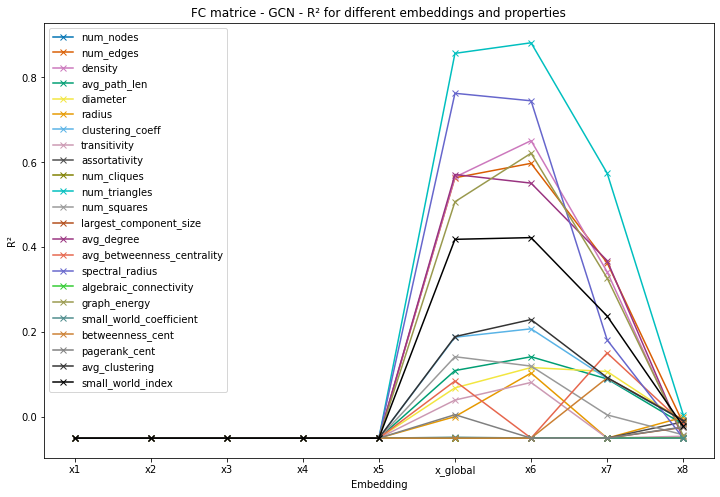

<Figure size 432x288 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
colors_long = [
    (0.0, 0.45, 0.70),  # Blue
    (0.85, 0.37, 0.01),  # Orange
    (0.8, 0.47, 0.74),   # Magenta
    (0.0, 0.62, 0.45),   # Green
    (0.95, 0.90, 0.25),  # Yellow
    (0.9, 0.6, 0.0),     # Brown
    (0.35, 0.7, 0.9),    # Sky Blue
    (0.8, 0.6, 0.7),     # Light Pink
    (0.3, 0.3, 0.3),     # Dark Gray
    (0.5, 0.5, 0.0),     # Olive
    (0.0, 0.75, 0.75),   # Cyan
    (0.6, 0.6, 0.6),     # Light Gray
    (0.7, 0.3, 0.1),     # Dark Orange
    (0.6, 0.2, 0.5),     # Purple
    (0.9, 0.4, 0.3),     # Salmon
    (0.4, 0.4, 0.8),     # Light Blue
    (0.2, 0.8, 0.2),     # Light Green
    (0.6, 0.6, 0.3),     # Mustard
    (0.3, 0.55, 0.55),    # Teal
    (0.8, 0.5, 0.2),     # Dark Salmon
    (0.5, 0.5, 0.5),     # Gray
    (0.2, 0.2, 0.2),      # Black-Gray
    (0.0, 0.0, 0.0)      # Black
]

property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long.png')

In [ ]:
# range(len(embeddings))

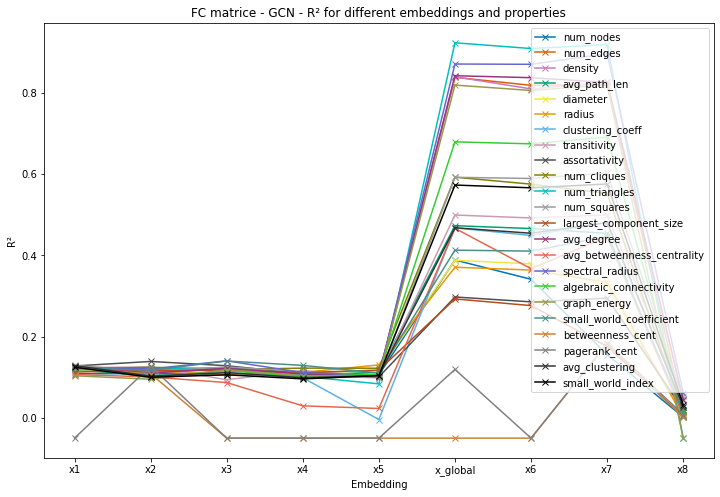

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize=(12, 8))
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_names_long)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'train_R2_plot_long.png')
    

### comparison with a gnn train on random (the y are shuffled)

In [2]:
from Datasets.FC.create_dataset import read_dataset
# dataset = read_dataset()
MODEL = "GIN3"
DATASET = "FC_suffled"

from models.models_FC import GIN_framework3 as framework3 # import the model


In [67]:
#shuffle the y values of the dataset
# import numpy as np
# import torch

# y = np.array([data.y for data in dataset])
# y = np.array(y, dtype=np.int64)  # Ensure y is a numeric array of type int64

# np.random.shuffle(y)

# #make y torch.int64, tensor([0]) instead of [0]
# y = torch.tensor(y, dtype=torch.int64)

# for i in range(len(dataset)):
#     dataset[i].y = y[i]

/scratch-local/tpelletreaudur.7490421/ipykernel_3570522/1638111602.py:5: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  y = np.array([data.y for data in dataset])
/scratch-local/tpelletreaudur.7490421/ipykernel_3570522/1638111602.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array([data.y for data in dataset])


In [3]:
#save the dataset
# import pickle as pkl
# with open("Datasets/FC/"+DATASET+"_"+MODEL+".pkl", "wb") as f:
#     pkl.dump(dataset, f)

#load the dataset
import pickle as pkl
with open("Datasets/FC/"+DATASET+"_"+MODEL+".pkl", "rb") as f:
    dataset = pkl.load(f)

In [4]:
gnn = framework3(dataset)

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [69]:
gnn.iterate()

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch: 005, Loss: 0.673, Test Loss: 0.713, Train Acc: 0.567, Test Acc: 0.309
Epoch: 010, Loss: 0.652, Test Loss: 0.729, Train Acc: 0.604, Test Acc: 0.345
Epoch: 015, Loss: 0.594, Test Loss: 0.728, Train Acc: 0.647, Test Acc: 0.491
Epoch: 020, Loss: 0.480, Test Loss: 0.766, Train Acc: 0.801, Test Acc: 0.455
Epoch: 025, Loss: 0.424, Test Loss: 1.057, Train Acc: 0.821, Test Acc: 0.436
Epoch: 030, Loss: 0.203, Test Loss: 0.961, Train Acc: 0.967, Test Acc: 0.418
Epoch: 035, Loss: 0.195, Test Loss: 0.986, Train Acc: 0.921, Test Acc: 0.600
Epoch: 040, Loss: 0.109, Test Loss: 0.952, Train Acc: 0.986, Test Acc: 0.473
Epoch: 045, Loss: 0.069, Test Loss: 1.194, Train Acc: 0.991, Test Acc: 0.473
Epoch: 050, Loss: 0.083, Test Loss: 1.535, Train Acc: 0.985, Test Acc: 0.455
Epoch: 055, Loss: 0.038, Test Loss: 1.458, Train Acc: 1.000, Test Acc: 0.491
Epoch: 060, Loss: 0.030, Test Loss: 1.540, Train Acc: 1.000, Test Acc: 0.509
Epoch: 065, Loss: 0.029, Test Loss: 1.451, Train Acc: 0.999, Test Acc: 0.509

Epoch: 540, Loss: 0.002, Test Loss: 2.445, Train Acc: 1.000, Test Acc: 0.491
Epoch: 545, Loss: 0.002, Test Loss: 2.497, Train Acc: 1.000, Test Acc: 0.491
Epoch: 550, Loss: 0.002, Test Loss: 2.493, Train Acc: 1.000, Test Acc: 0.491
Epoch: 555, Loss: 0.002, Test Loss: 2.532, Train Acc: 1.000, Test Acc: 0.473
Epoch: 560, Loss: 0.002, Test Loss: 2.527, Train Acc: 1.000, Test Acc: 0.455
Epoch: 565, Loss: 0.002, Test Loss: 2.484, Train Acc: 1.000, Test Acc: 0.491
Epoch: 570, Loss: 0.002, Test Loss: 2.540, Train Acc: 1.000, Test Acc: 0.473
Epoch: 575, Loss: 0.002, Test Loss: 2.534, Train Acc: 1.000, Test Acc: 0.491
Epoch: 580, Loss: 0.003, Test Loss: 2.528, Train Acc: 1.000, Test Acc: 0.491
Epoch: 585, Loss: 0.002, Test Loss: 2.517, Train Acc: 1.000, Test Acc: 0.491
Epoch: 590, Loss: 0.002, Test Loss: 2.490, Train Acc: 1.000, Test Acc: 0.509
Epoch: 595, Loss: 0.002, Test Loss: 2.531, Train Acc: 1.000, Test Acc: 0.491
Epoch: 600, Loss: 0.003, Test Loss: 2.612, Train Acc: 1.000, Test Acc: 0.473

In [70]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+".pt")

Model saved in: models/FC_suffled_GIN3.pt


In [6]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+".pt")

In [7]:
gnn.evaluate()

Accuracy: 0.473, Loss: 2.592


In [8]:
train_features, test_features = gnn.evaluate_with_features2()

In [12]:
train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)

Betweenness Centralization: 0.0029744879158680165
PageRank Centralization: 0.007510397622853081
Average Clustering Coefficient: 0.4485952914918966
Transitivity: 0.49984192222573504
Betweenness Centralization: 0.0009962980378006288
PageRank Centralization: 0.005731641514284181
Average Clustering Coefficient: 0.49420272369055324
Transitivity: 0.4648747709224191
Betweenness Centralization: 0.0017414879436683992
PageRank Centralization: 0.00675757177336518
Average Clustering Coefficient: 0.5197487856970617
Transitivity: 0.5186953062848051
Betweenness Centralization: 0.0011823785308830927
PageRank Centralization: 0.00807538938828751
Average Clustering Coefficient: 0.4961514091758566
Transitivity: 0.5369857594936709
Betweenness Centralization: 0.0009325307002592923
PageRank Centralization: 0.006712453568058718
Average Clustering Coefficient: 0.45526297076932565
Transitivity: 0.47695075331684283
Betweenness Centralization: 0.0010266475764315632
PageRank Centralization: 0.008085975708401704
Av

Betweenness Centralization: 0.004095408194763946
PageRank Centralization: 0.008302741992341827
Average Clustering Coefficient: 0.5109552817590343
Transitivity: 0.5154929577464789
Betweenness Centralization: 0.0016055636066314267
PageRank Centralization: 0.009123993249301061
Average Clustering Coefficient: 0.5047988931462828
Transitivity: 0.4984025559105431
Betweenness Centralization: 0.0015329826559174562
PageRank Centralization: 0.007640800295271964
Average Clustering Coefficient: 0.5185033574452543
Transitivity: 0.5070185289163391
Betweenness Centralization: 0.001708176235729968
PageRank Centralization: 0.006499278216215807
Average Clustering Coefficient: 0.5792587107642506
Transitivity: 0.6022845275181724
Betweenness Centralization: 0.0015565979086558765
PageRank Centralization: 0.006812550040386147
Average Clustering Coefficient: 0.43349394270446906
Transitivity: 0.4869402985074627
Betweenness Centralization: 0.002054215864657486
PageRank Centralization: 0.009312579169945245
Averag

Betweenness Centralization: 0.0022233158082600795
PageRank Centralization: 0.005617370804451412
Average Clustering Coefficient: 0.47148048311841434
Transitivity: 0.518546845124283
Betweenness Centralization: 0.000623014230789441
PageRank Centralization: 0.004418382392321767
Average Clustering Coefficient: 0.5555996590119623
Transitivity: 0.5331782318430103
Betweenness Centralization: 0.0019656908288803857
PageRank Centralization: 0.007695434415971249
Average Clustering Coefficient: 0.5157176622602656
Transitivity: 0.4957140251687033
Betweenness Centralization: 0.0015365101746607106
PageRank Centralization: 0.007206630043397072
Average Clustering Coefficient: 0.550908120322486
Transitivity: 0.5736786469344609
Betweenness Centralization: 0.0017011196236348474
PageRank Centralization: 0.009601170395707587
Average Clustering Coefficient: 0.5110084244872708
Transitivity: 0.46734854445318647
Betweenness Centralization: 0.0025842258009479446
PageRank Centralization: 0.00732948609974557
Averag

Betweenness Centralization: 0.0016328757634226792
PageRank Centralization: 0.007913834363362838
Average Clustering Coefficient: 0.5296657406215715
Transitivity: 0.570935960591133
Betweenness Centralization: 0.002076192207049949
PageRank Centralization: 0.006461551501685727
Average Clustering Coefficient: 0.5570931941621593
Transitivity: 0.5042482452899889
Betweenness Centralization: 0.001680346998154925
PageRank Centralization: 0.009000528620698032
Average Clustering Coefficient: 0.48648947085479594
Transitivity: 0.45798538622129437
Betweenness Centralization: 0.0016356601709099923
PageRank Centralization: 0.008897534207293754
Average Clustering Coefficient: 0.502264513875791
Transitivity: 0.47616936377743296
Betweenness Centralization: 0.0013732363254108908
PageRank Centralization: 0.011423616108473473
Average Clustering Coefficient: 0.4120060828163321
Transitivity: 0.4380630630630631
Betweenness Centralization: 0.0006015627099076683
PageRank Centralization: 0.00655508433375246
Averag

Betweenness Centralization: 0.002818876537578845
PageRank Centralization: 0.007041820883552073
Average Clustering Coefficient: 0.5104067866998903
Transitivity: 0.5430338891877353
Betweenness Centralization: 0.00042250811606735293
PageRank Centralization: 0.005919834156852832
Average Clustering Coefficient: 0.46059438312360795
Transitivity: 0.4746187800963082
Betweenness Centralization: 0.001604053463532585
PageRank Centralization: 0.007527477090243623
Average Clustering Coefficient: 0.5977276248378647
Transitivity: 0.5821350762527233
Betweenness Centralization: 0.0015322477470103284
PageRank Centralization: 0.008279261851257458
Average Clustering Coefficient: 0.47957059769406307
Transitivity: 0.5146931719965427
Betweenness Centralization: 0.0011114625323693124
PageRank Centralization: 0.007313030133503113
Average Clustering Coefficient: 0.49255847568473765
Transitivity: 0.5330188679245284
Betweenness Centralization: 0.0014290594117391732
PageRank Centralization: 0.006657612606716163
Av

Betweenness Centralization: 0.0010388309180568024
PageRank Centralization: 0.009492976521010287
Average Clustering Coefficient: 0.4675613405816511
Transitivity: 0.44220132743362833
Betweenness Centralization: 0.0011497890185051506
PageRank Centralization: 0.005295902931731637
Average Clustering Coefficient: 0.4895102947485503
Transitivity: 0.5594662218515429
Betweenness Centralization: 0.0012007300768194613
PageRank Centralization: 0.006403536285851579
Average Clustering Coefficient: 0.5329225404852259
Transitivity: 0.5590719959651999
Betweenness Centralization: 0.000718772363680482
PageRank Centralization: 0.00763765570350702
Average Clustering Coefficient: 0.5431172342392758
Transitivity: 0.5555555555555556
Betweenness Centralization: 0.001561333056928076
PageRank Centralization: 0.006136481604626724
Average Clustering Coefficient: 0.4962282336582028
Transitivity: 0.5701255980861244
Betweenness Centralization: 0.0016099863583746703
PageRank Centralization: 0.006141464935518944
Averag

Betweenness Centralization: 0.0018581373576526305
PageRank Centralization: 0.009892333473435688
Average Clustering Coefficient: 0.4534561294576509
Transitivity: 0.47368421052631576
Betweenness Centralization: 0.0019304196654361069
PageRank Centralization: 0.008855875161050865
Average Clustering Coefficient: 0.49138375288223146
Transitivity: 0.4895833333333333
Betweenness Centralization: 0.003333231239480089
PageRank Centralization: 0.007435970972495854
Average Clustering Coefficient: 0.6045767971927879
Transitivity: 0.6877852748561223
Betweenness Centralization: 0.0010090557239000105
PageRank Centralization: 0.006049294042805697
Average Clustering Coefficient: 0.5585069378346192
Transitivity: 0.6115193826933676
Betweenness Centralization: 0.001303938696969281
PageRank Centralization: 0.009908694404709444
Average Clustering Coefficient: 0.5500077757679607
Transitivity: 0.5341294612566155
Betweenness Centralization: 0.00045402843483595716
PageRank Centralization: 0.005046367337979484
Ave

Betweenness Centralization: 0.0020314179674239185
PageRank Centralization: 0.00918543062453907
Average Clustering Coefficient: 0.5253077705045992
Transitivity: 0.5892679695263332
Betweenness Centralization: 0.00265964474109299
PageRank Centralization: 0.008701801305431302
Average Clustering Coefficient: 0.5060386410411766
Transitivity: 0.5093582887700535
Betweenness Centralization: 0.0012240169223552107
PageRank Centralization: 0.006156971488369626
Average Clustering Coefficient: 0.5207533238038686
Transitivity: 0.5304268846503178
Betweenness Centralization: 0.0012890675144400406
PageRank Centralization: 0.006841569716970081
Average Clustering Coefficient: 0.47114781769954184
Transitivity: 0.5150602409638554
Betweenness Centralization: 0.003523182740927894
PageRank Centralization: 0.008852338346828813
Average Clustering Coefficient: 0.49719430606989173
Transitivity: 0.5588952071486596
Betweenness Centralization: 0.0011516658427776585
PageRank Centralization: 0.008201061020166349
Averag

Betweenness Centralization: 0.0012033971813378128
PageRank Centralization: 0.0059348948190293405
Average Clustering Coefficient: 0.5084880396639765
Transitivity: 0.5445321307779031
Betweenness Centralization: 0.0018580582274906928
PageRank Centralization: 0.008230416070582449
Average Clustering Coefficient: 0.5679600689108237
Transitivity: 0.6041431792559189
Betweenness Centralization: 0.0010595741557186183
PageRank Centralization: 0.008145955683867378
Average Clustering Coefficient: 0.46944097309876115
Transitivity: 0.484200954762446
Betweenness Centralization: 0.0010911389744510127
PageRank Centralization: 0.006244197778644872
Average Clustering Coefficient: 0.474004013228151
Transitivity: 0.4905711206896552
Betweenness Centralization: 0.0012505366541302552
PageRank Centralization: 0.007080224445317922
Average Clustering Coefficient: 0.5254483752135083
Transitivity: 0.51374321880651
Betweenness Centralization: 0.002604723554512027
PageRank Centralization: 0.009753637171078884
Average

Betweenness Centralization: 0.0007015631610353253
PageRank Centralization: 0.006817809096581979
Average Clustering Coefficient: 0.49673055421026996
Transitivity: 0.4777454708118989
Betweenness Centralization: 0.002195513722451707
PageRank Centralization: 0.007662131175655396
Average Clustering Coefficient: 0.4610381207456325
Transitivity: 0.467201166180758
Betweenness Centralization: 0.0015690441924517328
PageRank Centralization: 0.007380826799804906
Average Clustering Coefficient: 0.43624110189327575
Transitivity: 0.4539939332659252
Betweenness Centralization: 0.002160045740098526
PageRank Centralization: 0.009392643178919023
Average Clustering Coefficient: 0.4949637512493067
Transitivity: 0.48139270846474075
Betweenness Centralization: 0.0010374419386067924
PageRank Centralization: 0.006782241707195654
Average Clustering Coefficient: 0.4624257500858866
Transitivity: 0.4880991196609064
Betweenness Centralization: 0.002483480832335841
PageRank Centralization: 0.007090702079103889
Avera

Betweenness Centralization: 0.0013926762390349592
PageRank Centralization: 0.007340749649648025
Average Clustering Coefficient: 0.5128385024936748
Transitivity: 0.4489655172413793
Betweenness Centralization: 0.0007471249498568114
PageRank Centralization: 0.005244066918628237
Average Clustering Coefficient: 0.4737700270630395
Transitivity: 0.46666057727438803
Betweenness Centralization: 0.0013911645799266326
PageRank Centralization: 0.010588995794722347
Average Clustering Coefficient: 0.4245972432915495
Transitivity: 0.4438215939556422
Betweenness Centralization: 0.002688597541798648
PageRank Centralization: 0.00942105812219985
Average Clustering Coefficient: 0.4659134447927553
Transitivity: 0.44532409698169223
Betweenness Centralization: 0.0009527631168796904
PageRank Centralization: 0.007098011572520999
Average Clustering Coefficient: 0.5190386422927813
Transitivity: 0.5018157058556514
Betweenness Centralization: 0.0030825997931012597
PageRank Centralization: 0.007439700103353428
Aver

Betweenness Centralization: 0.0012520603637885246
PageRank Centralization: 0.006196132493672186
Average Clustering Coefficient: 0.5785553546522033
Transitivity: 0.5933280381254964
Betweenness Centralization: 0.0026656764131265
PageRank Centralization: 0.009429988361399492
Average Clustering Coefficient: 0.5426201925187726
Transitivity: 0.570925657486022
Betweenness Centralization: 0.0012196025995504284
PageRank Centralization: 0.0052524660096354295
Average Clustering Coefficient: 0.5888595179619671
Transitivity: 0.6069223573433115
Betweenness Centralization: 0.0026815434848760744
PageRank Centralization: 0.009789066107112858
Average Clustering Coefficient: 0.5339011317802554
Transitivity: 0.529208491031759
Betweenness Centralization: 0.001177263645950601
PageRank Centralization: 0.007998723156989525
Average Clustering Coefficient: 0.5533807683619233
Transitivity: 0.5076923076923077
Betweenness Centralization: 0.0007848490965791349
PageRank Centralization: 0.005039534758664618
Average C

Betweenness Centralization: 0.001085659793774549
PageRank Centralization: 0.00751445803529285
Average Clustering Coefficient: 0.4884346496415462
Transitivity: 0.4286880783886772
Betweenness Centralization: 0.00129140692386603
PageRank Centralization: 0.008068722541122472
Average Clustering Coefficient: 0.5066375575630138
Transitivity: 0.48393485915492956
Betweenness Centralization: 0.0017962354417489221
PageRank Centralization: 0.010628830776590274
Average Clustering Coefficient: 0.47870141937894056
Transitivity: 0.5002073828287018
Betweenness Centralization: 0.0009628359571540546
PageRank Centralization: 0.009137506950608066
Average Clustering Coefficient: 0.45866079149205796
Transitivity: 0.4905482041587902
Betweenness Centralization: 0.0032111819976511557
PageRank Centralization: 0.008024469452058484
Average Clustering Coefficient: 0.5751223655648765
Transitivity: 0.6681514476614699
Betweenness Centralization: 0.000741185208076872
PageRank Centralization: 0.006451861951802377
Averag

PageRank Centralization: 0.008527095347658034
Average Clustering Coefficient: 0.4785661577844241
Transitivity: 0.5396877033181522
Betweenness Centralization: 0.0007339457570283665
PageRank Centralization: 0.008268328889815407
Average Clustering Coefficient: 0.4686917150913093
Transitivity: 0.48092423428264375
Betweenness Centralization: 0.001282724947221797
PageRank Centralization: 0.008384787304986787
Average Clustering Coefficient: 0.507842276970037
Transitivity: 0.4938287153652393
Betweenness Centralization: 0.0021639471584690303
PageRank Centralization: 0.008377782145265229
Average Clustering Coefficient: 0.5512677258894032
Transitivity: 0.5669481302774427
Betweenness Centralization: 0.003030275831623171
PageRank Centralization: 0.0064064578211270075
Average Clustering Coefficient: 0.5295164507005277
Transitivity: 0.5393120393120393
Betweenness Centralization: 0.0016514111242280675
PageRank Centralization: 0.005874300561639411
Average Clustering Coefficient: 0.45342908299430024
Tra

In [15]:
import pickle as pkl
#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties_long = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties_long = pkl.load(f)

In [16]:
"""
The embeddings of GIN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7, x8)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
# train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])

train_x8 = np.array([feat[8] for feat in train_features])
test_x8 = np.array([feat[8] for feat in test_features])


# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
test_x8 = torch.tensor(test_x8, dtype=torch.float32)

# train_y = torch.tensor(train_properties, dtype=torch.float32)
# test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7), (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global',  'x6', 'x7', 'x8']

In [17]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7490421/ipykernel_2982216/3296541069.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
/scratch-local/tpelletreaudur.7490421/ipykernel_2982216/3296541069.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)


Epoch [1000/800000], Property: num_nodes, Loss: 5726.3066
Epoch [2000/800000], Property: num_nodes, Loss: 2254.6499
Epoch [3000/800000], Property: num_nodes, Loss: 1023.0433
Epoch [4000/800000], Property: num_nodes, Loss: 679.2285
Epoch [5000/800000], Property: num_nodes, Loss: 532.2434
Epoch [6000/800000], Property: num_nodes, Loss: 440.3680
Epoch [7000/800000], Property: num_nodes, Loss: 378.5223
Epoch [8000/800000], Property: num_nodes, Loss: 327.9006
Epoch [9000/800000], Property: num_nodes, Loss: 281.2848
Epoch [10000/800000], Property: num_nodes, Loss: 239.0982
Epoch [11000/800000], Property: num_nodes, Loss: 203.4704
Epoch [12000/800000], Property: num_nodes, Loss: 175.4350
Epoch [13000/800000], Property: num_nodes, Loss: 154.2495
Epoch [14000/800000], Property: num_nodes, Loss: 138.3101
Epoch [15000/800000], Property: num_nodes, Loss: 126.1020
Epoch [16000/800000], Property: num_nodes, Loss: 116.5825
Epoch [17000/800000], Property: num_nodes, Loss: 109.1243
Epoch [18000/800000]

Epoch [12000/800000], Property: num_edges, Loss: 39910.6719
Epoch [13000/800000], Property: num_edges, Loss: 37104.8633
Epoch [14000/800000], Property: num_edges, Loss: 35079.0273
Epoch [15000/800000], Property: num_edges, Loss: 33514.0781
Epoch [16000/800000], Property: num_edges, Loss: 32248.7012
Epoch [17000/800000], Property: num_edges, Loss: 31219.6699
Epoch [18000/800000], Property: num_edges, Loss: 30384.4746
Epoch [19000/800000], Property: num_edges, Loss: 29685.2676
Epoch [20000/800000], Property: num_edges, Loss: 29069.5938
Epoch [21000/800000], Property: num_edges, Loss: 28514.6074
Epoch [22000/800000], Property: num_edges, Loss: 28009.4121
Epoch [23000/800000], Property: num_edges, Loss: 27545.1035
Epoch [24000/800000], Property: num_edges, Loss: 27119.2812
Epoch [25000/800000], Property: num_edges, Loss: 26730.3516
Epoch [26000/800000], Property: num_edges, Loss: 26373.5098
Epoch [27000/800000], Property: num_edges, Loss: 26044.2305
Epoch [28000/800000], Property: num_edge

Epoch [148000/800000], Property: num_edges, Loss: 20693.8457
Epoch [149000/800000], Property: num_edges, Loss: 20686.1621
Epoch [150000/800000], Property: num_edges, Loss: 20678.5000
Epoch [151000/800000], Property: num_edges, Loss: 20670.8516
Epoch [152000/800000], Property: num_edges, Loss: 20663.2246
Epoch [153000/800000], Property: num_edges, Loss: 20655.6152
Epoch [154000/800000], Property: num_edges, Loss: 20648.0195
Epoch [155000/800000], Property: num_edges, Loss: 20640.4453
Epoch [156000/800000], Property: num_edges, Loss: 20632.8887
Epoch [157000/800000], Property: num_edges, Loss: 20625.3496
Epoch [158000/800000], Property: num_edges, Loss: 20617.8262
Epoch [159000/800000], Property: num_edges, Loss: 20610.3223
Epoch [160000/800000], Property: num_edges, Loss: 20602.8379
Epoch [161000/800000], Property: num_edges, Loss: 20595.3672
Epoch [162000/800000], Property: num_edges, Loss: 20587.9160
Epoch [163000/800000], Property: num_edges, Loss: 20580.4844
Epoch [164000/800000], P

Epoch [283000/800000], Property: num_edges, Loss: 19816.3848
Epoch [284000/800000], Property: num_edges, Loss: 19811.0371
Epoch [285000/800000], Property: num_edges, Loss: 19805.7090
Epoch [286000/800000], Property: num_edges, Loss: 19800.3945
Epoch [287000/800000], Property: num_edges, Loss: 19795.0977
Epoch [288000/800000], Property: num_edges, Loss: 19789.8242
Epoch [289000/800000], Property: num_edges, Loss: 19784.5645
Epoch [290000/800000], Property: num_edges, Loss: 19779.3262
Epoch [291000/800000], Property: num_edges, Loss: 19774.1055
Epoch [292000/800000], Property: num_edges, Loss: 19768.9043
Epoch [293000/800000], Property: num_edges, Loss: 19763.7207
Epoch [294000/800000], Property: num_edges, Loss: 19758.5547
Epoch [295000/800000], Property: num_edges, Loss: 19753.4082
Epoch [296000/800000], Property: num_edges, Loss: 19748.2793
Epoch [297000/800000], Property: num_edges, Loss: 19743.1660
Epoch [298000/800000], Property: num_edges, Loss: 19738.0762
Epoch [299000/800000], P

Epoch [418000/800000], Property: num_edges, Loss: 19260.5527
Epoch [419000/800000], Property: num_edges, Loss: 19257.6895
Epoch [420000/800000], Property: num_edges, Loss: 19254.8398
Epoch [421000/800000], Property: num_edges, Loss: 19252.0098
Epoch [422000/800000], Property: num_edges, Loss: 19249.1992
Epoch [423000/800000], Property: num_edges, Loss: 19246.4062
Epoch [424000/800000], Property: num_edges, Loss: 19243.6309
Epoch [425000/800000], Property: num_edges, Loss: 19240.8730
Epoch [426000/800000], Property: num_edges, Loss: 19238.1367
Epoch [427000/800000], Property: num_edges, Loss: 19235.4160
Epoch [428000/800000], Property: num_edges, Loss: 19232.7148
Epoch [429000/800000], Property: num_edges, Loss: 19230.0332
Epoch [430000/800000], Property: num_edges, Loss: 19227.3672
Epoch [431000/800000], Property: num_edges, Loss: 19224.7227
Epoch [432000/800000], Property: num_edges, Loss: 19222.0918
Epoch [433000/800000], Property: num_edges, Loss: 19219.4844
Epoch [434000/800000], P

Epoch [553000/800000], Property: num_edges, Loss: 19041.1289
Epoch [554000/800000], Property: num_edges, Loss: 19040.7031
Epoch [555000/800000], Property: num_edges, Loss: 19040.2930
Epoch [556000/800000], Property: num_edges, Loss: 19039.9043
Epoch [557000/800000], Property: num_edges, Loss: 19039.5312
Epoch [558000/800000], Property: num_edges, Loss: 19039.1738
Epoch [559000/800000], Property: num_edges, Loss: 19038.8340
Epoch [560000/800000], Property: num_edges, Loss: 19038.5137
Epoch [561000/800000], Property: num_edges, Loss: 19038.2188
Epoch [562000/800000], Property: num_edges, Loss: 19037.9473
Epoch [563000/800000], Property: num_edges, Loss: 19037.6914
Epoch [564000/800000], Property: num_edges, Loss: 19037.4512
Epoch [565000/800000], Property: num_edges, Loss: 19037.2285
Epoch [566000/800000], Property: num_edges, Loss: 19037.0176
Epoch [567000/800000], Property: num_edges, Loss: 19036.8242
Epoch [568000/800000], Property: num_edges, Loss: 19036.6445
Epoch [569000/800000], P

Epoch [16000/800000], Property: num_cliques, Loss: 1298.6174
Epoch [17000/800000], Property: num_cliques, Loss: 1272.8979
Epoch [18000/800000], Property: num_cliques, Loss: 1250.9868
Epoch [19000/800000], Property: num_cliques, Loss: 1232.1929
Epoch [20000/800000], Property: num_cliques, Loss: 1215.9050
Epoch [21000/800000], Property: num_cliques, Loss: 1201.7297
Epoch [22000/800000], Property: num_cliques, Loss: 1189.4160
Epoch [23000/800000], Property: num_cliques, Loss: 1178.7007
Epoch [24000/800000], Property: num_cliques, Loss: 1169.3660
Epoch [25000/800000], Property: num_cliques, Loss: 1161.2582
Epoch [26000/800000], Property: num_cliques, Loss: 1154.2295
Epoch [27000/800000], Property: num_cliques, Loss: 1148.1284
Epoch [28000/800000], Property: num_cliques, Loss: 1142.7797
Epoch [29000/800000], Property: num_cliques, Loss: 1138.0232
Epoch [30000/800000], Property: num_cliques, Loss: 1133.7347
Epoch [31000/800000], Property: num_cliques, Loss: 1129.8114
Epoch [32000/800000], Pr

Epoch [151000/800000], Property: num_cliques, Loss: 945.7979
Epoch [152000/800000], Property: num_cliques, Loss: 945.3741
Epoch [153000/800000], Property: num_cliques, Loss: 944.9672
Epoch [154000/800000], Property: num_cliques, Loss: 944.5770
Epoch [155000/800000], Property: num_cliques, Loss: 944.2037
Epoch [156000/800000], Property: num_cliques, Loss: 943.8474
Epoch [157000/800000], Property: num_cliques, Loss: 943.5126
Epoch [158000/800000], Property: num_cliques, Loss: 943.1942
Epoch [159000/800000], Property: num_cliques, Loss: 942.8920
Epoch [160000/800000], Property: num_cliques, Loss: 942.6060
Epoch [161000/800000], Property: num_cliques, Loss: 942.3362
Epoch [162000/800000], Property: num_cliques, Loss: 942.0844
Epoch [163000/800000], Property: num_cliques, Loss: 941.8506
Epoch [164000/800000], Property: num_cliques, Loss: 941.6326
Epoch [165000/800000], Property: num_cliques, Loss: 941.4304
Epoch [166000/800000], Property: num_cliques, Loss: 941.2467
Epoch [167000/800000], P

Epoch [94000/800000], Property: num_triangles, Loss: 563470.9375
Epoch [95000/800000], Property: num_triangles, Loss: 563037.2500
Epoch [96000/800000], Property: num_triangles, Loss: 562610.7500
Epoch [97000/800000], Property: num_triangles, Loss: 562191.0000
Epoch [98000/800000], Property: num_triangles, Loss: 561778.0000
Epoch [99000/800000], Property: num_triangles, Loss: 561371.8125
Epoch [100000/800000], Property: num_triangles, Loss: 560972.3125
Epoch [101000/800000], Property: num_triangles, Loss: 560579.3125
Epoch [102000/800000], Property: num_triangles, Loss: 560192.6250
Epoch [103000/800000], Property: num_triangles, Loss: 559812.1875
Epoch [104000/800000], Property: num_triangles, Loss: 559437.6875
Epoch [105000/800000], Property: num_triangles, Loss: 559069.0625
Epoch [106000/800000], Property: num_triangles, Loss: 558706.1250
Epoch [107000/800000], Property: num_triangles, Loss: 558348.8125
Epoch [108000/800000], Property: num_triangles, Loss: 557996.8125
Epoch [109000/80

Epoch [219000/800000], Property: num_triangles, Loss: 537307.1875
Epoch [220000/800000], Property: num_triangles, Loss: 537203.3125
Epoch [221000/800000], Property: num_triangles, Loss: 537100.3125
Epoch [222000/800000], Property: num_triangles, Loss: 536998.0000
Epoch [223000/800000], Property: num_triangles, Loss: 536896.5000
Epoch [224000/800000], Property: num_triangles, Loss: 536795.8125
Epoch [225000/800000], Property: num_triangles, Loss: 536695.9375
Epoch [226000/800000], Property: num_triangles, Loss: 536596.8125
Epoch [227000/800000], Property: num_triangles, Loss: 536498.5000
Epoch [228000/800000], Property: num_triangles, Loss: 536401.0625
Epoch [229000/800000], Property: num_triangles, Loss: 536304.2500
Epoch [230000/800000], Property: num_triangles, Loss: 536208.3125
Epoch [231000/800000], Property: num_triangles, Loss: 536113.1250
Epoch [232000/800000], Property: num_triangles, Loss: 536018.5625
Epoch [233000/800000], Property: num_triangles, Loss: 535924.8750
Epoch [234

Epoch [344000/800000], Property: num_triangles, Loss: 529201.1250
Epoch [345000/800000], Property: num_triangles, Loss: 529167.7500
Epoch [346000/800000], Property: num_triangles, Loss: 529134.7500
Epoch [347000/800000], Property: num_triangles, Loss: 529102.1875
Epoch [348000/800000], Property: num_triangles, Loss: 529070.0000
Epoch [349000/800000], Property: num_triangles, Loss: 529038.1875
Epoch [350000/800000], Property: num_triangles, Loss: 529006.6875
Epoch [351000/800000], Property: num_triangles, Loss: 528975.6875
Epoch [352000/800000], Property: num_triangles, Loss: 528944.8750
Epoch [353000/800000], Property: num_triangles, Loss: 528914.2500
Epoch [354000/800000], Property: num_triangles, Loss: 528884.0625
Epoch [355000/800000], Property: num_triangles, Loss: 528854.0625
Epoch [356000/800000], Property: num_triangles, Loss: 528824.2500
Epoch [357000/800000], Property: num_triangles, Loss: 528794.7500
Epoch [358000/800000], Property: num_triangles, Loss: 528765.3125
Epoch [359

Epoch [469000/800000], Property: num_triangles, Loss: 526397.3750
Epoch [470000/800000], Property: num_triangles, Loss: 526380.3750
Epoch [471000/800000], Property: num_triangles, Loss: 526363.4375
Epoch [472000/800000], Property: num_triangles, Loss: 526346.5625
Epoch [473000/800000], Property: num_triangles, Loss: 526329.6250
Epoch [474000/800000], Property: num_triangles, Loss: 526312.7500
Epoch [475000/800000], Property: num_triangles, Loss: 526295.9375
Epoch [476000/800000], Property: num_triangles, Loss: 526279.1250
Epoch [477000/800000], Property: num_triangles, Loss: 526262.2500
Epoch [478000/800000], Property: num_triangles, Loss: 526245.4375
Epoch [479000/800000], Property: num_triangles, Loss: 526228.6875
Epoch [480000/800000], Property: num_triangles, Loss: 526211.8750
Epoch [481000/800000], Property: num_triangles, Loss: 526195.1250
Epoch [482000/800000], Property: num_triangles, Loss: 526178.4375
Epoch [483000/800000], Property: num_triangles, Loss: 526161.6250
Epoch [484

Epoch [594000/800000], Property: num_triangles, Loss: 524455.5000
Epoch [595000/800000], Property: num_triangles, Loss: 524441.1875
Epoch [596000/800000], Property: num_triangles, Loss: 524427.0000
Epoch [597000/800000], Property: num_triangles, Loss: 524412.7500
Epoch [598000/800000], Property: num_triangles, Loss: 524398.5000
Epoch [599000/800000], Property: num_triangles, Loss: 524384.3750
Epoch [600000/800000], Property: num_triangles, Loss: 524370.1875
Epoch [601000/800000], Property: num_triangles, Loss: 524356.0625
Epoch [602000/800000], Property: num_triangles, Loss: 524341.9375
Epoch [603000/800000], Property: num_triangles, Loss: 524327.8125
Epoch [604000/800000], Property: num_triangles, Loss: 524313.7500
Epoch [605000/800000], Property: num_triangles, Loss: 524299.6250
Epoch [606000/800000], Property: num_triangles, Loss: 524285.5000
Epoch [607000/800000], Property: num_triangles, Loss: 524271.5000
Epoch [608000/800000], Property: num_triangles, Loss: 524257.4688
Epoch [609

Epoch [719000/800000], Property: num_triangles, Loss: 522807.7188
Epoch [720000/800000], Property: num_triangles, Loss: 522795.5938
Epoch [721000/800000], Property: num_triangles, Loss: 522783.5000
Epoch [722000/800000], Property: num_triangles, Loss: 522771.4375
Epoch [723000/800000], Property: num_triangles, Loss: 522759.4062
Epoch [724000/800000], Property: num_triangles, Loss: 522747.3438
Epoch [725000/800000], Property: num_triangles, Loss: 522735.3750
Epoch [726000/800000], Property: num_triangles, Loss: 522723.4375
Epoch [727000/800000], Property: num_triangles, Loss: 522711.4062
Epoch [728000/800000], Property: num_triangles, Loss: 522699.4062
Epoch [729000/800000], Property: num_triangles, Loss: 522687.5625
Epoch [730000/800000], Property: num_triangles, Loss: 522675.6250
Epoch [731000/800000], Property: num_triangles, Loss: 522663.7188
Epoch [732000/800000], Property: num_triangles, Loss: 522651.8438
Epoch [733000/800000], Property: num_triangles, Loss: 522640.0000
Epoch [734

Epoch [21000/800000], Property: largest_component_size, Loss: 93.5999
Epoch [22000/800000], Property: largest_component_size, Loss: 91.2945
Epoch [23000/800000], Property: largest_component_size, Loss: 89.2253
Epoch [24000/800000], Property: largest_component_size, Loss: 87.3068
Epoch [25000/800000], Property: largest_component_size, Loss: 85.4936
Epoch [26000/800000], Property: largest_component_size, Loss: 83.7611
Epoch [27000/800000], Property: largest_component_size, Loss: 82.0872
Epoch [28000/800000], Property: largest_component_size, Loss: 80.4503
Epoch [29000/800000], Property: largest_component_size, Loss: 78.8350
Epoch [30000/800000], Property: largest_component_size, Loss: 77.2357
Epoch [31000/800000], Property: largest_component_size, Loss: 75.6540
Epoch [32000/800000], Property: largest_component_size, Loss: 74.0898
Epoch [33000/800000], Property: largest_component_size, Loss: 72.5435
Epoch [34000/800000], Property: largest_component_size, Loss: 71.0150
Epoch [35000/800000]

Epoch [8000/800000], Property: avg_degree, Loss: 5.9998
Epoch [9000/800000], Property: avg_degree, Loss: 5.8981
Epoch [10000/800000], Property: avg_degree, Loss: 5.8120
Epoch [11000/800000], Property: avg_degree, Loss: 5.7378
Epoch [12000/800000], Property: avg_degree, Loss: 5.6762
Epoch [13000/800000], Property: avg_degree, Loss: 5.6278
Epoch [14000/800000], Property: avg_degree, Loss: 5.5925
Epoch [15000/800000], Property: avg_degree, Loss: 5.5691
Epoch [16000/800000], Property: avg_degree, Loss: 5.5557
Epoch [17000/800000], Property: avg_degree, Loss: 5.5498
Epoch [18000/800000], Property: avg_degree, Loss: 5.5482
Epoch [19000/800000], Property: avg_degree, Loss: 5.5480
Epoch [20000/800000], Property: avg_degree, Loss: 5.5480
Epoch [21000/800000], Property: avg_degree, Loss: 5.5480
Epoch [22000/800000], Property: avg_degree, Loss: 5.5480
Early stopping at epoch 22811
Embedding: torch.Size([1044, 128])
Property: avg_degree
  Train MSE: 5.5480, Test MSE: 6.0163
  Train R²: 0.1083, Tes

Epoch [57000/800000], Property: graph_energy, Loss: 100007.5547
Epoch [58000/800000], Property: graph_energy, Loss: 99540.2734
Epoch [59000/800000], Property: graph_energy, Loss: 99092.6875
Epoch [60000/800000], Property: graph_energy, Loss: 98663.8750
Epoch [61000/800000], Property: graph_energy, Loss: 98253.1328
Epoch [62000/800000], Property: graph_energy, Loss: 97859.6094
Epoch [63000/800000], Property: graph_energy, Loss: 97482.0469
Epoch [64000/800000], Property: graph_energy, Loss: 97118.6719
Epoch [65000/800000], Property: graph_energy, Loss: 96767.8125
Epoch [66000/800000], Property: graph_energy, Loss: 96428.3438
Epoch [67000/800000], Property: graph_energy, Loss: 96099.7969
Epoch [68000/800000], Property: graph_energy, Loss: 95781.9219
Epoch [69000/800000], Property: graph_energy, Loss: 95474.5312
Epoch [70000/800000], Property: graph_energy, Loss: 95177.3672
Epoch [71000/800000], Property: graph_energy, Loss: 94890.1797
Epoch [72000/800000], Property: graph_energy, Loss: 94

Epoch [186000/800000], Property: graph_energy, Loss: 84596.2344
Epoch [187000/800000], Property: graph_energy, Loss: 84573.5000
Epoch [188000/800000], Property: graph_energy, Loss: 84551.0000
Epoch [189000/800000], Property: graph_energy, Loss: 84528.7266
Epoch [190000/800000], Property: graph_energy, Loss: 84506.6719
Epoch [191000/800000], Property: graph_energy, Loss: 84484.8984
Epoch [192000/800000], Property: graph_energy, Loss: 84463.3438
Epoch [193000/800000], Property: graph_energy, Loss: 84442.0000
Epoch [194000/800000], Property: graph_energy, Loss: 84420.8828
Epoch [195000/800000], Property: graph_energy, Loss: 84399.9766
Epoch [196000/800000], Property: graph_energy, Loss: 84379.2656
Epoch [197000/800000], Property: graph_energy, Loss: 84358.7812
Epoch [198000/800000], Property: graph_energy, Loss: 84338.4922
Epoch [199000/800000], Property: graph_energy, Loss: 84318.3828
Epoch [200000/800000], Property: graph_energy, Loss: 84298.4688
Epoch [201000/800000], Property: graph_e

Epoch [315000/800000], Property: graph_energy, Loss: 82410.9062
Epoch [316000/800000], Property: graph_energy, Loss: 82395.7188
Epoch [317000/800000], Property: graph_energy, Loss: 82380.5625
Epoch [318000/800000], Property: graph_energy, Loss: 82365.4219
Epoch [319000/800000], Property: graph_energy, Loss: 82350.3125
Epoch [320000/800000], Property: graph_energy, Loss: 82335.2109
Epoch [321000/800000], Property: graph_energy, Loss: 82320.1250
Epoch [322000/800000], Property: graph_energy, Loss: 82305.0547
Epoch [323000/800000], Property: graph_energy, Loss: 82290.0234
Epoch [324000/800000], Property: graph_energy, Loss: 82274.9922
Epoch [325000/800000], Property: graph_energy, Loss: 82259.9766
Epoch [326000/800000], Property: graph_energy, Loss: 82244.9844
Epoch [327000/800000], Property: graph_energy, Loss: 82230.0078
Epoch [328000/800000], Property: graph_energy, Loss: 82215.0625
Epoch [329000/800000], Property: graph_energy, Loss: 82200.1328
Epoch [330000/800000], Property: graph_e

Epoch [444000/800000], Property: graph_energy, Loss: 80605.2188
Epoch [445000/800000], Property: graph_energy, Loss: 80592.4141
Epoch [446000/800000], Property: graph_energy, Loss: 80579.6250
Epoch [447000/800000], Property: graph_energy, Loss: 80566.8672
Epoch [448000/800000], Property: graph_energy, Loss: 80554.1172
Epoch [449000/800000], Property: graph_energy, Loss: 80541.3984
Epoch [450000/800000], Property: graph_energy, Loss: 80528.6719
Epoch [451000/800000], Property: graph_energy, Loss: 80515.9844
Epoch [452000/800000], Property: graph_energy, Loss: 80503.3281
Epoch [453000/800000], Property: graph_energy, Loss: 80490.6562
Epoch [454000/800000], Property: graph_energy, Loss: 80478.0234
Epoch [455000/800000], Property: graph_energy, Loss: 80465.3984
Epoch [456000/800000], Property: graph_energy, Loss: 80452.8047
Epoch [457000/800000], Property: graph_energy, Loss: 80440.2188
Epoch [458000/800000], Property: graph_energy, Loss: 80427.6641
Epoch [459000/800000], Property: graph_e

Epoch [573000/800000], Property: graph_energy, Loss: 79123.6016
Epoch [574000/800000], Property: graph_energy, Loss: 79113.4531
Epoch [575000/800000], Property: graph_energy, Loss: 79103.3281
Epoch [576000/800000], Property: graph_energy, Loss: 79093.2109
Epoch [577000/800000], Property: graph_energy, Loss: 79083.1250
Epoch [578000/800000], Property: graph_energy, Loss: 79073.0469
Epoch [579000/800000], Property: graph_energy, Loss: 79063.0000
Epoch [580000/800000], Property: graph_energy, Loss: 79052.9453
Epoch [581000/800000], Property: graph_energy, Loss: 79042.9297
Epoch [582000/800000], Property: graph_energy, Loss: 79032.9141
Epoch [583000/800000], Property: graph_energy, Loss: 79022.9297
Epoch [584000/800000], Property: graph_energy, Loss: 79012.9531
Epoch [585000/800000], Property: graph_energy, Loss: 79003.0000
Epoch [586000/800000], Property: graph_energy, Loss: 78993.0625
Epoch [587000/800000], Property: graph_energy, Loss: 78983.1406
Epoch [588000/800000], Property: graph_e

Epoch [702000/800000], Property: graph_energy, Loss: 77957.6719
Epoch [703000/800000], Property: graph_energy, Loss: 77949.7656
Epoch [704000/800000], Property: graph_energy, Loss: 77941.8672
Epoch [705000/800000], Property: graph_energy, Loss: 77933.9844
Epoch [706000/800000], Property: graph_energy, Loss: 77926.1250
Epoch [707000/800000], Property: graph_energy, Loss: 77918.2812
Epoch [708000/800000], Property: graph_energy, Loss: 77910.4531
Epoch [709000/800000], Property: graph_energy, Loss: 77902.6484
Epoch [710000/800000], Property: graph_energy, Loss: 77894.8516
Epoch [711000/800000], Property: graph_energy, Loss: 77887.0703
Epoch [712000/800000], Property: graph_energy, Loss: 77879.3203
Epoch [713000/800000], Property: graph_energy, Loss: 77871.5781
Epoch [714000/800000], Property: graph_energy, Loss: 77863.8516
Epoch [715000/800000], Property: graph_energy, Loss: 77856.1484
Epoch [716000/800000], Property: graph_energy, Loss: 77848.4609
Epoch [717000/800000], Property: graph_e

Epoch [2000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [3000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [4000/800000], Property: pagerank_cent, Loss: 0.0000
Early stopping at epoch 4476
Embedding: torch.Size([1044, 128])
Property: pagerank_cent
  Train MSE: 0.0000, Test MSE: 0.0000
  Train R²: 0.1317, Test R²: -0.2061
Epoch [1000/800000], Property: avg_clustering, Loss: 0.0052
Epoch [2000/800000], Property: avg_clustering, Loss: 0.0034
Epoch [3000/800000], Property: avg_clustering, Loss: 0.0028
Epoch [4000/800000], Property: avg_clustering, Loss: 0.0024
Epoch [5000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [6000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [7000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [8000/800000], Property: avg_clustering, Loss: 0.0023
Early stopping at epoch 8917
Embedding: torch.Size([1044, 128])
Property: avg_clustering
  Train MSE: 0.0023, Test MSE: 0.0034
  Train R²: 0.1096, Test R²: -0.1813
Epoch [1000/8000

Epoch [114000/800000], Property: num_nodes, Loss: 2.4861
Epoch [115000/800000], Property: num_nodes, Loss: 2.3315
Epoch [116000/800000], Property: num_nodes, Loss: 2.1944
Epoch [117000/800000], Property: num_nodes, Loss: 2.0744
Epoch [118000/800000], Property: num_nodes, Loss: 1.9713
Epoch [119000/800000], Property: num_nodes, Loss: 1.8847
Epoch [120000/800000], Property: num_nodes, Loss: 1.8141
Epoch [121000/800000], Property: num_nodes, Loss: 1.7587
Epoch [122000/800000], Property: num_nodes, Loss: 1.7176
Epoch [123000/800000], Property: num_nodes, Loss: 1.6896
Epoch [124000/800000], Property: num_nodes, Loss: 1.6728
Epoch [125000/800000], Property: num_nodes, Loss: 1.6647
Epoch [126000/800000], Property: num_nodes, Loss: 1.6621
Epoch [127000/800000], Property: num_nodes, Loss: 1.6616
Epoch [128000/800000], Property: num_nodes, Loss: 1.6615
Epoch [129000/800000], Property: num_nodes, Loss: 1.6615
Epoch [130000/800000], Property: num_nodes, Loss: 1.6615
Epoch [131000/800000], Property

Epoch [118000/800000], Property: num_edges, Loss: 20762.8008
Epoch [119000/800000], Property: num_edges, Loss: 20736.6289
Epoch [120000/800000], Property: num_edges, Loss: 20710.8984
Epoch [121000/800000], Property: num_edges, Loss: 20685.6035
Epoch [122000/800000], Property: num_edges, Loss: 20660.7422
Epoch [123000/800000], Property: num_edges, Loss: 20636.2910
Epoch [124000/800000], Property: num_edges, Loss: 20612.2402
Epoch [125000/800000], Property: num_edges, Loss: 20588.5742
Epoch [126000/800000], Property: num_edges, Loss: 20565.2891
Epoch [127000/800000], Property: num_edges, Loss: 20542.3730
Epoch [128000/800000], Property: num_edges, Loss: 20519.8262
Epoch [129000/800000], Property: num_edges, Loss: 20497.6445
Epoch [130000/800000], Property: num_edges, Loss: 20475.8320
Epoch [131000/800000], Property: num_edges, Loss: 20454.3711
Epoch [132000/800000], Property: num_edges, Loss: 20433.2520
Epoch [133000/800000], Property: num_edges, Loss: 20412.4648
Epoch [134000/800000], P

Epoch [253000/800000], Property: num_edges, Loss: 19142.8535
Epoch [254000/800000], Property: num_edges, Loss: 19136.9277
Epoch [255000/800000], Property: num_edges, Loss: 19131.0156
Epoch [256000/800000], Property: num_edges, Loss: 19125.1270
Epoch [257000/800000], Property: num_edges, Loss: 19119.2559
Epoch [258000/800000], Property: num_edges, Loss: 19113.4043
Epoch [259000/800000], Property: num_edges, Loss: 19107.5742
Epoch [260000/800000], Property: num_edges, Loss: 19101.7617
Epoch [261000/800000], Property: num_edges, Loss: 19095.9688
Epoch [262000/800000], Property: num_edges, Loss: 19090.1758
Epoch [263000/800000], Property: num_edges, Loss: 19084.3340
Epoch [264000/800000], Property: num_edges, Loss: 19078.5098
Epoch [265000/800000], Property: num_edges, Loss: 19072.7090
Epoch [266000/800000], Property: num_edges, Loss: 19066.9277
Epoch [267000/800000], Property: num_edges, Loss: 19061.1641
Epoch [268000/800000], Property: num_edges, Loss: 19055.4238
Epoch [269000/800000], P

Epoch [388000/800000], Property: num_edges, Loss: 18511.7832
Epoch [389000/800000], Property: num_edges, Loss: 18508.4648
Epoch [390000/800000], Property: num_edges, Loss: 18505.1641
Epoch [391000/800000], Property: num_edges, Loss: 18501.8848
Epoch [392000/800000], Property: num_edges, Loss: 18498.6289
Epoch [393000/800000], Property: num_edges, Loss: 18495.3906
Epoch [394000/800000], Property: num_edges, Loss: 18492.1699
Epoch [395000/800000], Property: num_edges, Loss: 18488.9727
Epoch [396000/800000], Property: num_edges, Loss: 18485.7930
Epoch [397000/800000], Property: num_edges, Loss: 18482.6367
Epoch [398000/800000], Property: num_edges, Loss: 18479.4980
Epoch [399000/800000], Property: num_edges, Loss: 18476.3789
Epoch [400000/800000], Property: num_edges, Loss: 18473.2812
Epoch [401000/800000], Property: num_edges, Loss: 18470.2031
Epoch [402000/800000], Property: num_edges, Loss: 18467.1465
Epoch [403000/800000], Property: num_edges, Loss: 18464.1074
Epoch [404000/800000], P

Epoch [523000/800000], Property: num_edges, Loss: 18246.6738
Epoch [524000/800000], Property: num_edges, Loss: 18246.0254
Epoch [525000/800000], Property: num_edges, Loss: 18245.3965
Epoch [526000/800000], Property: num_edges, Loss: 18244.7852
Epoch [527000/800000], Property: num_edges, Loss: 18244.1934
Epoch [528000/800000], Property: num_edges, Loss: 18243.6230
Epoch [529000/800000], Property: num_edges, Loss: 18243.0664
Epoch [530000/800000], Property: num_edges, Loss: 18242.5332
Epoch [531000/800000], Property: num_edges, Loss: 18242.0156
Epoch [532000/800000], Property: num_edges, Loss: 18241.5176
Epoch [533000/800000], Property: num_edges, Loss: 18241.0371
Epoch [534000/800000], Property: num_edges, Loss: 18240.5781
Epoch [535000/800000], Property: num_edges, Loss: 18240.1387
Epoch [536000/800000], Property: num_edges, Loss: 18239.7148
Epoch [537000/800000], Property: num_edges, Loss: 18239.3105
Epoch [538000/800000], Property: num_edges, Loss: 18238.9277
Epoch [539000/800000], P

Epoch [1000/800000], Property: num_cliques, Loss: 14985.6201
Epoch [2000/800000], Property: num_cliques, Loss: 10043.7295
Epoch [3000/800000], Property: num_cliques, Loss: 7252.2515
Epoch [4000/800000], Property: num_cliques, Loss: 5283.7065
Epoch [5000/800000], Property: num_cliques, Loss: 3951.1589
Epoch [6000/800000], Property: num_cliques, Loss: 3140.5657
Epoch [7000/800000], Property: num_cliques, Loss: 2684.6448
Epoch [8000/800000], Property: num_cliques, Loss: 2420.5552
Epoch [9000/800000], Property: num_cliques, Loss: 2236.8291
Epoch [10000/800000], Property: num_cliques, Loss: 2086.0137
Epoch [11000/800000], Property: num_cliques, Loss: 1954.4780
Epoch [12000/800000], Property: num_cliques, Loss: 1838.7249
Epoch [13000/800000], Property: num_cliques, Loss: 1738.1250
Epoch [14000/800000], Property: num_cliques, Loss: 1652.9731
Epoch [15000/800000], Property: num_cliques, Loss: 1582.6173
Epoch [16000/800000], Property: num_cliques, Loss: 1525.0358
Epoch [17000/800000], Property:

Epoch [136000/800000], Property: num_cliques, Loss: 940.3950
Epoch [137000/800000], Property: num_cliques, Loss: 939.6945
Epoch [138000/800000], Property: num_cliques, Loss: 939.0126
Epoch [139000/800000], Property: num_cliques, Loss: 938.3496
Epoch [140000/800000], Property: num_cliques, Loss: 937.7056
Epoch [141000/800000], Property: num_cliques, Loss: 937.0803
Epoch [142000/800000], Property: num_cliques, Loss: 936.4740
Epoch [143000/800000], Property: num_cliques, Loss: 935.8927
Epoch [144000/800000], Property: num_cliques, Loss: 935.3323
Epoch [145000/800000], Property: num_cliques, Loss: 934.7903
Epoch [146000/800000], Property: num_cliques, Loss: 934.2666
Epoch [147000/800000], Property: num_cliques, Loss: 933.7611
Epoch [148000/800000], Property: num_cliques, Loss: 933.2738
Epoch [149000/800000], Property: num_cliques, Loss: 932.8049
Epoch [150000/800000], Property: num_cliques, Loss: 932.3541
Epoch [151000/800000], Property: num_cliques, Loss: 931.9216
Epoch [152000/800000], P

Epoch [82000/800000], Property: num_triangles, Loss: 590922.1875
Epoch [83000/800000], Property: num_triangles, Loss: 590161.4375
Epoch [84000/800000], Property: num_triangles, Loss: 589415.4375
Epoch [85000/800000], Property: num_triangles, Loss: 588683.5625
Epoch [86000/800000], Property: num_triangles, Loss: 587964.9375
Epoch [87000/800000], Property: num_triangles, Loss: 587258.2500
Epoch [88000/800000], Property: num_triangles, Loss: 586562.3125
Epoch [89000/800000], Property: num_triangles, Loss: 585876.8750
Epoch [90000/800000], Property: num_triangles, Loss: 585202.1250
Epoch [91000/800000], Property: num_triangles, Loss: 584537.2500
Epoch [92000/800000], Property: num_triangles, Loss: 583881.2500
Epoch [93000/800000], Property: num_triangles, Loss: 583234.0000
Epoch [94000/800000], Property: num_triangles, Loss: 582595.2500
Epoch [95000/800000], Property: num_triangles, Loss: 581965.0000
Epoch [96000/800000], Property: num_triangles, Loss: 581343.0000
Epoch [97000/800000], Pro

Epoch [207000/800000], Property: num_triangles, Loss: 540575.2500
Epoch [208000/800000], Property: num_triangles, Loss: 540350.1875
Epoch [209000/800000], Property: num_triangles, Loss: 540126.4375
Epoch [210000/800000], Property: num_triangles, Loss: 539904.1875
Epoch [211000/800000], Property: num_triangles, Loss: 539683.1875
Epoch [212000/800000], Property: num_triangles, Loss: 539463.5625
Epoch [213000/800000], Property: num_triangles, Loss: 539245.1875
Epoch [214000/800000], Property: num_triangles, Loss: 539028.1250
Epoch [215000/800000], Property: num_triangles, Loss: 538812.2500
Epoch [216000/800000], Property: num_triangles, Loss: 538597.6250
Epoch [217000/800000], Property: num_triangles, Loss: 538384.1875
Epoch [218000/800000], Property: num_triangles, Loss: 538171.9375
Epoch [219000/800000], Property: num_triangles, Loss: 537960.9375
Epoch [220000/800000], Property: num_triangles, Loss: 537751.1250
Epoch [221000/800000], Property: num_triangles, Loss: 537542.4375
Epoch [222

Epoch [332000/800000], Property: num_triangles, Loss: 520314.4062
Epoch [333000/800000], Property: num_triangles, Loss: 520198.9375
Epoch [334000/800000], Property: num_triangles, Loss: 520083.8750
Epoch [335000/800000], Property: num_triangles, Loss: 519969.4062
Epoch [336000/800000], Property: num_triangles, Loss: 519855.3125
Epoch [337000/800000], Property: num_triangles, Loss: 519741.7812
Epoch [338000/800000], Property: num_triangles, Loss: 519628.6250
Epoch [339000/800000], Property: num_triangles, Loss: 519515.9688
Epoch [340000/800000], Property: num_triangles, Loss: 519403.7812
Epoch [341000/800000], Property: num_triangles, Loss: 519292.0625
Epoch [342000/800000], Property: num_triangles, Loss: 519180.8125
Epoch [343000/800000], Property: num_triangles, Loss: 519070.0312
Epoch [344000/800000], Property: num_triangles, Loss: 518959.6875
Epoch [345000/800000], Property: num_triangles, Loss: 518849.7812
Epoch [346000/800000], Property: num_triangles, Loss: 518740.3438
Epoch [347

Epoch [457000/800000], Property: num_triangles, Loss: 509002.8750
Epoch [458000/800000], Property: num_triangles, Loss: 508934.9375
Epoch [459000/800000], Property: num_triangles, Loss: 508867.3125
Epoch [460000/800000], Property: num_triangles, Loss: 508799.8750
Epoch [461000/800000], Property: num_triangles, Loss: 508732.9062
Epoch [462000/800000], Property: num_triangles, Loss: 508666.1875
Epoch [463000/800000], Property: num_triangles, Loss: 508599.7812
Epoch [464000/800000], Property: num_triangles, Loss: 508533.7188
Epoch [465000/800000], Property: num_triangles, Loss: 508468.0000
Epoch [466000/800000], Property: num_triangles, Loss: 508402.5000
Epoch [467000/800000], Property: num_triangles, Loss: 508337.4688
Epoch [468000/800000], Property: num_triangles, Loss: 508272.7188
Epoch [469000/800000], Property: num_triangles, Loss: 508208.2812
Epoch [470000/800000], Property: num_triangles, Loss: 508144.0938
Epoch [471000/800000], Property: num_triangles, Loss: 508080.3125
Epoch [472

Epoch [582000/800000], Property: num_triangles, Loss: 502853.0312
Epoch [583000/800000], Property: num_triangles, Loss: 502819.4375
Epoch [584000/800000], Property: num_triangles, Loss: 502785.9375
Epoch [585000/800000], Property: num_triangles, Loss: 502752.6250
Epoch [586000/800000], Property: num_triangles, Loss: 502719.5312
Epoch [587000/800000], Property: num_triangles, Loss: 502686.5938
Epoch [588000/800000], Property: num_triangles, Loss: 502653.8750
Epoch [589000/800000], Property: num_triangles, Loss: 502621.2812
Epoch [590000/800000], Property: num_triangles, Loss: 502589.0000
Epoch [591000/800000], Property: num_triangles, Loss: 502556.8125
Epoch [592000/800000], Property: num_triangles, Loss: 502524.8750
Epoch [593000/800000], Property: num_triangles, Loss: 502493.1875
Epoch [594000/800000], Property: num_triangles, Loss: 502461.5625
Epoch [595000/800000], Property: num_triangles, Loss: 502430.2188
Epoch [596000/800000], Property: num_triangles, Loss: 502398.9375
Epoch [597

Epoch [707000/800000], Property: num_triangles, Loss: 499647.0312
Epoch [708000/800000], Property: num_triangles, Loss: 499628.1875
Epoch [709000/800000], Property: num_triangles, Loss: 499609.5312
Epoch [710000/800000], Property: num_triangles, Loss: 499590.8438
Epoch [711000/800000], Property: num_triangles, Loss: 499572.3438
Epoch [712000/800000], Property: num_triangles, Loss: 499553.9688
Epoch [713000/800000], Property: num_triangles, Loss: 499535.7188
Epoch [714000/800000], Property: num_triangles, Loss: 499517.5625
Epoch [715000/800000], Property: num_triangles, Loss: 499499.4688
Epoch [716000/800000], Property: num_triangles, Loss: 499481.5000
Epoch [717000/800000], Property: num_triangles, Loss: 499463.6562
Epoch [718000/800000], Property: num_triangles, Loss: 499445.8438
Epoch [719000/800000], Property: num_triangles, Loss: 499428.1875
Epoch [720000/800000], Property: num_triangles, Loss: 499410.7188
Epoch [721000/800000], Property: num_triangles, Loss: 499393.2188
Epoch [722

Epoch [10000/800000], Property: largest_component_size, Loss: 413.0993
Epoch [11000/800000], Property: largest_component_size, Loss: 349.2983
Epoch [12000/800000], Property: largest_component_size, Loss: 296.9324
Epoch [13000/800000], Property: largest_component_size, Loss: 255.6889
Epoch [14000/800000], Property: largest_component_size, Loss: 224.1320
Epoch [15000/800000], Property: largest_component_size, Loss: 200.1704
Epoch [16000/800000], Property: largest_component_size, Loss: 181.6340
Epoch [17000/800000], Property: largest_component_size, Loss: 166.8117
Epoch [18000/800000], Property: largest_component_size, Loss: 154.5216
Epoch [19000/800000], Property: largest_component_size, Loss: 144.0550
Epoch [20000/800000], Property: largest_component_size, Loss: 135.0006
Epoch [21000/800000], Property: largest_component_size, Loss: 127.1251
Epoch [22000/800000], Property: largest_component_size, Loss: 120.2666
Epoch [23000/800000], Property: largest_component_size, Loss: 114.2868
Epoch 

Epoch [127000/800000], Property: largest_component_size, Loss: 5.8507
Epoch [128000/800000], Property: largest_component_size, Loss: 5.8507
Epoch [129000/800000], Property: largest_component_size, Loss: 5.8507
Epoch [130000/800000], Property: largest_component_size, Loss: 5.8507
Early stopping at epoch 130117
Embedding: torch.Size([1044, 128])
Property: largest_component_size
  Train MSE: 5.8507, Test MSE: 5.1521
  Train R²: 0.1645, Test R²: -1.0022
Epoch [1000/800000], Property: avg_degree, Loss: 10.1351
Epoch [2000/800000], Property: avg_degree, Loss: 8.5155
Epoch [3000/800000], Property: avg_degree, Loss: 7.6552
Epoch [4000/800000], Property: avg_degree, Loss: 7.1023
Epoch [5000/800000], Property: avg_degree, Loss: 6.7056
Epoch [6000/800000], Property: avg_degree, Loss: 6.3825
Epoch [7000/800000], Property: avg_degree, Loss: 6.1069
Epoch [8000/800000], Property: avg_degree, Loss: 5.8787
Epoch [9000/800000], Property: avg_degree, Loss: 5.7019
Epoch [10000/800000], Property: avg_degre

Epoch [44000/800000], Property: graph_energy, Loss: 137800.5000
Epoch [45000/800000], Property: graph_energy, Loss: 136068.9844
Epoch [46000/800000], Property: graph_energy, Loss: 134419.6719
Epoch [47000/800000], Property: graph_energy, Loss: 132847.0469
Epoch [48000/800000], Property: graph_energy, Loss: 131345.1406
Epoch [49000/800000], Property: graph_energy, Loss: 129908.4609
Epoch [50000/800000], Property: graph_energy, Loss: 128532.1406
Epoch [51000/800000], Property: graph_energy, Loss: 127211.3594
Epoch [52000/800000], Property: graph_energy, Loss: 125943.3516
Epoch [53000/800000], Property: graph_energy, Loss: 124726.4375
Epoch [54000/800000], Property: graph_energy, Loss: 123557.7734
Epoch [55000/800000], Property: graph_energy, Loss: 122434.8359
Epoch [56000/800000], Property: graph_energy, Loss: 121354.3125
Epoch [57000/800000], Property: graph_energy, Loss: 120313.6719
Epoch [58000/800000], Property: graph_energy, Loss: 119311.8516
Epoch [59000/800000], Property: graph_en

Epoch [173000/800000], Property: graph_energy, Loss: 87198.0469
Epoch [174000/800000], Property: graph_energy, Loss: 87105.2188
Epoch [175000/800000], Property: graph_energy, Loss: 87013.3281
Epoch [176000/800000], Property: graph_energy, Loss: 86922.3438
Epoch [177000/800000], Property: graph_energy, Loss: 86832.2500
Epoch [178000/800000], Property: graph_energy, Loss: 86743.0312
Epoch [179000/800000], Property: graph_energy, Loss: 86654.6562
Epoch [180000/800000], Property: graph_energy, Loss: 86567.1484
Epoch [181000/800000], Property: graph_energy, Loss: 86480.5000
Epoch [182000/800000], Property: graph_energy, Loss: 86394.6797
Epoch [183000/800000], Property: graph_energy, Loss: 86309.7344
Epoch [184000/800000], Property: graph_energy, Loss: 86225.6406
Epoch [185000/800000], Property: graph_energy, Loss: 86142.4219
Epoch [186000/800000], Property: graph_energy, Loss: 86060.0703
Epoch [187000/800000], Property: graph_energy, Loss: 85978.5781
Epoch [188000/800000], Property: graph_e

Epoch [302000/800000], Property: graph_energy, Loss: 80209.0000
Epoch [303000/800000], Property: graph_energy, Loss: 80178.5312
Epoch [304000/800000], Property: graph_energy, Loss: 80148.3281
Epoch [305000/800000], Property: graph_energy, Loss: 80118.3750
Epoch [306000/800000], Property: graph_energy, Loss: 80088.6484
Epoch [307000/800000], Property: graph_energy, Loss: 80059.1719
Epoch [308000/800000], Property: graph_energy, Loss: 80029.9453
Epoch [309000/800000], Property: graph_energy, Loss: 80000.9609
Epoch [310000/800000], Property: graph_energy, Loss: 79972.2031
Epoch [311000/800000], Property: graph_energy, Loss: 79943.6797
Epoch [312000/800000], Property: graph_energy, Loss: 79915.3984
Epoch [313000/800000], Property: graph_energy, Loss: 79887.3281
Epoch [314000/800000], Property: graph_energy, Loss: 79859.4375
Epoch [315000/800000], Property: graph_energy, Loss: 79831.8047
Epoch [316000/800000], Property: graph_energy, Loss: 79804.3984
Epoch [317000/800000], Property: graph_e

Epoch [431000/800000], Property: graph_energy, Loss: 77472.1484
Epoch [432000/800000], Property: graph_energy, Loss: 77456.8906
Epoch [433000/800000], Property: graph_energy, Loss: 77441.6797
Epoch [434000/800000], Property: graph_energy, Loss: 77426.5391
Epoch [435000/800000], Property: graph_energy, Loss: 77411.4453
Epoch [436000/800000], Property: graph_energy, Loss: 77396.4219
Epoch [437000/800000], Property: graph_energy, Loss: 77381.4453
Epoch [438000/800000], Property: graph_energy, Loss: 77366.5469
Epoch [439000/800000], Property: graph_energy, Loss: 77351.6875
Epoch [440000/800000], Property: graph_energy, Loss: 77336.8906
Epoch [441000/800000], Property: graph_energy, Loss: 77322.1562
Epoch [442000/800000], Property: graph_energy, Loss: 77307.4688
Epoch [443000/800000], Property: graph_energy, Loss: 77292.8594
Epoch [444000/800000], Property: graph_energy, Loss: 77278.2969
Epoch [445000/800000], Property: graph_energy, Loss: 77263.7969
Epoch [446000/800000], Property: graph_e

Epoch [560000/800000], Property: graph_energy, Loss: 75877.9531
Epoch [561000/800000], Property: graph_energy, Loss: 75867.4375
Epoch [562000/800000], Property: graph_energy, Loss: 75856.9609
Epoch [563000/800000], Property: graph_energy, Loss: 75846.4922
Epoch [564000/800000], Property: graph_energy, Loss: 75836.0312
Epoch [565000/800000], Property: graph_energy, Loss: 75825.6016
Epoch [566000/800000], Property: graph_energy, Loss: 75815.1875
Epoch [567000/800000], Property: graph_energy, Loss: 75804.7969
Epoch [568000/800000], Property: graph_energy, Loss: 75794.4062
Epoch [569000/800000], Property: graph_energy, Loss: 75784.0469
Epoch [570000/800000], Property: graph_energy, Loss: 75773.7188
Epoch [571000/800000], Property: graph_energy, Loss: 75763.3906
Epoch [572000/800000], Property: graph_energy, Loss: 75753.0859
Epoch [573000/800000], Property: graph_energy, Loss: 75742.7969
Epoch [574000/800000], Property: graph_energy, Loss: 75732.5469
Epoch [575000/800000], Property: graph_e

Epoch [689000/800000], Property: graph_energy, Loss: 74677.7969
Epoch [690000/800000], Property: graph_energy, Loss: 74669.7266
Epoch [691000/800000], Property: graph_energy, Loss: 74661.6562
Epoch [692000/800000], Property: graph_energy, Loss: 74653.6250
Epoch [693000/800000], Property: graph_energy, Loss: 74645.5938
Epoch [694000/800000], Property: graph_energy, Loss: 74637.5938
Epoch [695000/800000], Property: graph_energy, Loss: 74629.6094
Epoch [696000/800000], Property: graph_energy, Loss: 74621.6406
Epoch [697000/800000], Property: graph_energy, Loss: 74613.6953
Epoch [698000/800000], Property: graph_energy, Loss: 74605.7656
Epoch [699000/800000], Property: graph_energy, Loss: 74597.8594
Epoch [700000/800000], Property: graph_energy, Loss: 74589.9609
Epoch [701000/800000], Property: graph_energy, Loss: 74582.0859
Epoch [702000/800000], Property: graph_energy, Loss: 74574.2344
Epoch [703000/800000], Property: graph_energy, Loss: 74566.4062
Epoch [704000/800000], Property: graph_e

Epoch [14000/800000], Property: small_world_coefficient, Loss: 1.1315
Epoch [15000/800000], Property: small_world_coefficient, Loss: 1.1315
Epoch [16000/800000], Property: small_world_coefficient, Loss: 1.1315
Epoch [17000/800000], Property: small_world_coefficient, Loss: 1.1315
Early stopping at epoch 17843
Embedding: torch.Size([1044, 128])
Property: small_world_coefficient
  Train MSE: 1.1315, Test MSE: 1.2368
  Train R²: 0.1236, Test R²: -0.9598
Epoch [1000/800000], Property: betweenness_cent, Loss: 0.0003
Epoch [2000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [3000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [4000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [5000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [6000/800000], Property: betweenness_cent, Loss: 0.0000
Early stopping at epoch 6733
Embedding: torch.Size([1044, 128])
Property: betweenness_cent
  Train MSE: 0.0000, Test MSE: 0.0000
  Train R²: 0.1219, Test R²: -0.4308
Epoch [1

Epoch [93000/800000], Property: num_nodes, Loss: 6.1722
Epoch [94000/800000], Property: num_nodes, Loss: 5.8783
Epoch [95000/800000], Property: num_nodes, Loss: 5.5959
Epoch [96000/800000], Property: num_nodes, Loss: 5.3238
Epoch [97000/800000], Property: num_nodes, Loss: 5.0615
Epoch [98000/800000], Property: num_nodes, Loss: 4.8091
Epoch [99000/800000], Property: num_nodes, Loss: 4.5665
Epoch [100000/800000], Property: num_nodes, Loss: 4.3345
Epoch [101000/800000], Property: num_nodes, Loss: 4.1130
Epoch [102000/800000], Property: num_nodes, Loss: 3.9013
Epoch [103000/800000], Property: num_nodes, Loss: 3.6993
Epoch [104000/800000], Property: num_nodes, Loss: 3.5080
Epoch [105000/800000], Property: num_nodes, Loss: 3.3266
Epoch [106000/800000], Property: num_nodes, Loss: 3.1547
Epoch [107000/800000], Property: num_nodes, Loss: 2.9934
Epoch [108000/800000], Property: num_nodes, Loss: 2.8416
Epoch [109000/800000], Property: num_nodes, Loss: 2.7000
Epoch [110000/800000], Property: num_n

Epoch [84000/800000], Property: num_edges, Loss: 23054.5625
Epoch [85000/800000], Property: num_edges, Loss: 22987.7480
Epoch [86000/800000], Property: num_edges, Loss: 22922.8965
Epoch [87000/800000], Property: num_edges, Loss: 22859.9238
Epoch [88000/800000], Property: num_edges, Loss: 22798.7363
Epoch [89000/800000], Property: num_edges, Loss: 22739.2383
Epoch [90000/800000], Property: num_edges, Loss: 22681.3027
Epoch [91000/800000], Property: num_edges, Loss: 22624.8398
Epoch [92000/800000], Property: num_edges, Loss: 22569.7656
Epoch [93000/800000], Property: num_edges, Loss: 22516.0117
Epoch [94000/800000], Property: num_edges, Loss: 22463.5312
Epoch [95000/800000], Property: num_edges, Loss: 22412.2656
Epoch [96000/800000], Property: num_edges, Loss: 22362.1875
Epoch [97000/800000], Property: num_edges, Loss: 22313.2285
Epoch [98000/800000], Property: num_edges, Loss: 22265.3066
Epoch [99000/800000], Property: num_edges, Loss: 22218.3809
Epoch [100000/800000], Property: num_edg

Epoch [219000/800000], Property: num_edges, Loss: 19773.1523
Epoch [220000/800000], Property: num_edges, Loss: 19764.1973
Epoch [221000/800000], Property: num_edges, Loss: 19755.3320
Epoch [222000/800000], Property: num_edges, Loss: 19746.5488
Epoch [223000/800000], Property: num_edges, Loss: 19737.8535
Epoch [224000/800000], Property: num_edges, Loss: 19729.2441
Epoch [225000/800000], Property: num_edges, Loss: 19720.7129
Epoch [226000/800000], Property: num_edges, Loss: 19712.2598
Epoch [227000/800000], Property: num_edges, Loss: 19703.8906
Epoch [228000/800000], Property: num_edges, Loss: 19695.5977
Epoch [229000/800000], Property: num_edges, Loss: 19687.3848
Epoch [230000/800000], Property: num_edges, Loss: 19679.2461
Epoch [231000/800000], Property: num_edges, Loss: 19671.1816
Epoch [232000/800000], Property: num_edges, Loss: 19663.1914
Epoch [233000/800000], Property: num_edges, Loss: 19655.2676
Epoch [234000/800000], Property: num_edges, Loss: 19647.4199
Epoch [235000/800000], P

Epoch [354000/800000], Property: num_edges, Loss: 19057.6797
Epoch [355000/800000], Property: num_edges, Loss: 19054.6465
Epoch [356000/800000], Property: num_edges, Loss: 19051.6289
Epoch [357000/800000], Property: num_edges, Loss: 19048.6309
Epoch [358000/800000], Property: num_edges, Loss: 19045.6484
Epoch [359000/800000], Property: num_edges, Loss: 19042.6855
Epoch [360000/800000], Property: num_edges, Loss: 19039.7441
Epoch [361000/800000], Property: num_edges, Loss: 19036.8164
Epoch [362000/800000], Property: num_edges, Loss: 19033.9121
Epoch [363000/800000], Property: num_edges, Loss: 19031.0234
Epoch [364000/800000], Property: num_edges, Loss: 19028.1543
Epoch [365000/800000], Property: num_edges, Loss: 19025.3008
Epoch [366000/800000], Property: num_edges, Loss: 19022.4629
Epoch [367000/800000], Property: num_edges, Loss: 19019.6484
Epoch [368000/800000], Property: num_edges, Loss: 19016.8457
Epoch [369000/800000], Property: num_edges, Loss: 19014.0586
Epoch [370000/800000], P

Epoch [489000/800000], Property: num_edges, Loss: 18796.2500
Epoch [490000/800000], Property: num_edges, Loss: 18795.2832
Epoch [491000/800000], Property: num_edges, Loss: 18794.3262
Epoch [492000/800000], Property: num_edges, Loss: 18793.3789
Epoch [493000/800000], Property: num_edges, Loss: 18792.4414
Epoch [494000/800000], Property: num_edges, Loss: 18791.5117
Epoch [495000/800000], Property: num_edges, Loss: 18790.5977
Epoch [496000/800000], Property: num_edges, Loss: 18789.6914
Epoch [497000/800000], Property: num_edges, Loss: 18788.7930
Epoch [498000/800000], Property: num_edges, Loss: 18787.9062
Epoch [499000/800000], Property: num_edges, Loss: 18787.0293
Epoch [500000/800000], Property: num_edges, Loss: 18786.1621
Epoch [501000/800000], Property: num_edges, Loss: 18785.3047
Epoch [502000/800000], Property: num_edges, Loss: 18784.4570
Epoch [503000/800000], Property: num_edges, Loss: 18783.6230
Epoch [504000/800000], Property: num_edges, Loss: 18782.7988
Epoch [505000/800000], P

Epoch [17000/800000], Property: avg_path_len, Loss: 0.2376
Epoch [18000/800000], Property: avg_path_len, Loss: 0.2376
Epoch [19000/800000], Property: avg_path_len, Loss: 0.2376
Epoch [20000/800000], Property: avg_path_len, Loss: 0.2376
Epoch [21000/800000], Property: avg_path_len, Loss: 0.2376
Epoch [22000/800000], Property: avg_path_len, Loss: 0.2376
Epoch [23000/800000], Property: avg_path_len, Loss: 0.2376
Epoch [24000/800000], Property: avg_path_len, Loss: 0.2376
Epoch [25000/800000], Property: avg_path_len, Loss: 0.2376
Early stopping at epoch 25503
Embedding: torch.Size([1044, 128])
Property: avg_path_len
  Train MSE: 0.2376, Test MSE: 0.5509
  Train R²: 0.1296, Test R²: -1.4448
Epoch [1000/800000], Property: diameter, Loss: 6.9978
Epoch [2000/800000], Property: diameter, Loss: 5.2144
Epoch [3000/800000], Property: diameter, Loss: 4.3472
Epoch [4000/800000], Property: diameter, Loss: 3.8747
Epoch [5000/800000], Property: diameter, Loss: 3.5664
Epoch [6000/800000], Property: diame

Epoch [17000/800000], Property: num_cliques, Loss: 1673.3004
Epoch [18000/800000], Property: num_cliques, Loss: 1602.6586
Epoch [19000/800000], Property: num_cliques, Loss: 1541.4976
Epoch [20000/800000], Property: num_cliques, Loss: 1488.6028
Epoch [21000/800000], Property: num_cliques, Loss: 1442.9170
Epoch [22000/800000], Property: num_cliques, Loss: 1403.6030
Epoch [23000/800000], Property: num_cliques, Loss: 1369.8419
Epoch [24000/800000], Property: num_cliques, Loss: 1340.6721
Epoch [25000/800000], Property: num_cliques, Loss: 1315.1533
Epoch [26000/800000], Property: num_cliques, Loss: 1292.4321
Epoch [27000/800000], Property: num_cliques, Loss: 1271.8816
Epoch [28000/800000], Property: num_cliques, Loss: 1253.1329
Epoch [29000/800000], Property: num_cliques, Loss: 1236.0000
Epoch [30000/800000], Property: num_cliques, Loss: 1220.3552
Epoch [31000/800000], Property: num_cliques, Loss: 1206.0405
Epoch [32000/800000], Property: num_cliques, Loss: 1192.8921
Epoch [33000/800000], Pr

Epoch [152000/800000], Property: num_cliques, Loss: 939.8308
Epoch [153000/800000], Property: num_cliques, Loss: 939.5504
Epoch [154000/800000], Property: num_cliques, Loss: 939.2798
Epoch [155000/800000], Property: num_cliques, Loss: 939.0193
Epoch [156000/800000], Property: num_cliques, Loss: 938.7682
Epoch [157000/800000], Property: num_cliques, Loss: 938.5273
Epoch [158000/800000], Property: num_cliques, Loss: 938.2959
Epoch [159000/800000], Property: num_cliques, Loss: 938.0745
Epoch [160000/800000], Property: num_cliques, Loss: 937.8648
Epoch [161000/800000], Property: num_cliques, Loss: 937.6658
Epoch [162000/800000], Property: num_cliques, Loss: 937.4766
Epoch [163000/800000], Property: num_cliques, Loss: 937.2966
Epoch [164000/800000], Property: num_cliques, Loss: 937.1263
Epoch [165000/800000], Property: num_cliques, Loss: 936.9656
Epoch [166000/800000], Property: num_cliques, Loss: 936.8163
Epoch [167000/800000], Property: num_cliques, Loss: 936.6765
Epoch [168000/800000], P

Epoch [86000/800000], Property: num_triangles, Loss: 619558.1250
Epoch [87000/800000], Property: num_triangles, Loss: 618700.7500
Epoch [88000/800000], Property: num_triangles, Loss: 617857.6250
Epoch [89000/800000], Property: num_triangles, Loss: 617028.4375
Epoch [90000/800000], Property: num_triangles, Loss: 616212.0000
Epoch [91000/800000], Property: num_triangles, Loss: 615407.5000
Epoch [92000/800000], Property: num_triangles, Loss: 614615.5625
Epoch [93000/800000], Property: num_triangles, Loss: 613836.3750
Epoch [94000/800000], Property: num_triangles, Loss: 613069.6250
Epoch [95000/800000], Property: num_triangles, Loss: 612315.1875
Epoch [96000/800000], Property: num_triangles, Loss: 611573.0000
Epoch [97000/800000], Property: num_triangles, Loss: 610842.5625
Epoch [98000/800000], Property: num_triangles, Loss: 610123.7500
Epoch [99000/800000], Property: num_triangles, Loss: 609416.3125
Epoch [100000/800000], Property: num_triangles, Loss: 608719.7500
Epoch [101000/800000], P

Epoch [211000/800000], Property: num_triangles, Loss: 564061.2500
Epoch [212000/800000], Property: num_triangles, Loss: 563819.1250
Epoch [213000/800000], Property: num_triangles, Loss: 563578.8750
Epoch [214000/800000], Property: num_triangles, Loss: 563340.2500
Epoch [215000/800000], Property: num_triangles, Loss: 563103.5625
Epoch [216000/800000], Property: num_triangles, Loss: 562868.6250
Epoch [217000/800000], Property: num_triangles, Loss: 562635.3750
Epoch [218000/800000], Property: num_triangles, Loss: 562404.0000
Epoch [219000/800000], Property: num_triangles, Loss: 562174.0625
Epoch [220000/800000], Property: num_triangles, Loss: 561945.8125
Epoch [221000/800000], Property: num_triangles, Loss: 561719.4375
Epoch [222000/800000], Property: num_triangles, Loss: 561494.6250
Epoch [223000/800000], Property: num_triangles, Loss: 561271.6250
Epoch [224000/800000], Property: num_triangles, Loss: 561050.3125
Epoch [225000/800000], Property: num_triangles, Loss: 560830.8125
Epoch [226

Epoch [336000/800000], Property: num_triangles, Loss: 543422.3750
Epoch [337000/800000], Property: num_triangles, Loss: 543306.6875
Epoch [338000/800000], Property: num_triangles, Loss: 543191.5625
Epoch [339000/800000], Property: num_triangles, Loss: 543076.8750
Epoch [340000/800000], Property: num_triangles, Loss: 542962.8750
Epoch [341000/800000], Property: num_triangles, Loss: 542849.5000
Epoch [342000/800000], Property: num_triangles, Loss: 542736.5000
Epoch [343000/800000], Property: num_triangles, Loss: 542624.1250
Epoch [344000/800000], Property: num_triangles, Loss: 542512.1875
Epoch [345000/800000], Property: num_triangles, Loss: 542400.8750
Epoch [346000/800000], Property: num_triangles, Loss: 542290.0000
Epoch [347000/800000], Property: num_triangles, Loss: 542179.7500
Epoch [348000/800000], Property: num_triangles, Loss: 542069.8125
Epoch [349000/800000], Property: num_triangles, Loss: 541960.3750
Epoch [350000/800000], Property: num_triangles, Loss: 541851.5000
Epoch [351

Epoch [461000/800000], Property: num_triangles, Loss: 532124.8125
Epoch [462000/800000], Property: num_triangles, Loss: 532053.2500
Epoch [463000/800000], Property: num_triangles, Loss: 531982.0625
Epoch [464000/800000], Property: num_triangles, Loss: 531911.0625
Epoch [465000/800000], Property: num_triangles, Loss: 531840.2500
Epoch [466000/800000], Property: num_triangles, Loss: 531769.7500
Epoch [467000/800000], Property: num_triangles, Loss: 531699.3750
Epoch [468000/800000], Property: num_triangles, Loss: 531629.2500
Epoch [469000/800000], Property: num_triangles, Loss: 531559.5000
Epoch [470000/800000], Property: num_triangles, Loss: 531489.7500
Epoch [471000/800000], Property: num_triangles, Loss: 531420.3125
Epoch [472000/800000], Property: num_triangles, Loss: 531351.2500
Epoch [473000/800000], Property: num_triangles, Loss: 531282.2500
Epoch [474000/800000], Property: num_triangles, Loss: 531213.5625
Epoch [475000/800000], Property: num_triangles, Loss: 531145.0000
Epoch [476

Epoch [586000/800000], Property: num_triangles, Loss: 524800.1250
Epoch [587000/800000], Property: num_triangles, Loss: 524752.1250
Epoch [588000/800000], Property: num_triangles, Loss: 524704.2500
Epoch [589000/800000], Property: num_triangles, Loss: 524656.5625
Epoch [590000/800000], Property: num_triangles, Loss: 524609.0625
Epoch [591000/800000], Property: num_triangles, Loss: 524561.6875
Epoch [592000/800000], Property: num_triangles, Loss: 524514.5000
Epoch [593000/800000], Property: num_triangles, Loss: 524467.4375
Epoch [594000/800000], Property: num_triangles, Loss: 524420.5000
Epoch [595000/800000], Property: num_triangles, Loss: 524373.5625
Epoch [596000/800000], Property: num_triangles, Loss: 524326.9375
Epoch [597000/800000], Property: num_triangles, Loss: 524280.4062
Epoch [598000/800000], Property: num_triangles, Loss: 524234.0000
Epoch [599000/800000], Property: num_triangles, Loss: 524187.6562
Epoch [600000/800000], Property: num_triangles, Loss: 524141.5000
Epoch [601

Epoch [711000/800000], Property: num_triangles, Loss: 519775.4375
Epoch [712000/800000], Property: num_triangles, Loss: 519742.4688
Epoch [713000/800000], Property: num_triangles, Loss: 519709.5938
Epoch [714000/800000], Property: num_triangles, Loss: 519676.9375
Epoch [715000/800000], Property: num_triangles, Loss: 519644.3125
Epoch [716000/800000], Property: num_triangles, Loss: 519611.7188
Epoch [717000/800000], Property: num_triangles, Loss: 519579.2812
Epoch [718000/800000], Property: num_triangles, Loss: 519546.9062
Epoch [719000/800000], Property: num_triangles, Loss: 519514.7188
Epoch [720000/800000], Property: num_triangles, Loss: 519482.5312
Epoch [721000/800000], Property: num_triangles, Loss: 519450.4688
Epoch [722000/800000], Property: num_triangles, Loss: 519418.5312
Epoch [723000/800000], Property: num_triangles, Loss: 519386.6562
Epoch [724000/800000], Property: num_triangles, Loss: 519354.8438
Epoch [725000/800000], Property: num_triangles, Loss: 519323.2188
Epoch [726

Epoch [2000/800000], Property: largest_component_size, Loss: 4316.1958
Epoch [3000/800000], Property: largest_component_size, Loss: 2603.2390
Epoch [4000/800000], Property: largest_component_size, Loss: 1661.8605
Epoch [5000/800000], Property: largest_component_size, Loss: 1221.1307
Epoch [6000/800000], Property: largest_component_size, Loss: 1026.9893
Epoch [7000/800000], Property: largest_component_size, Loss: 908.9797
Epoch [8000/800000], Property: largest_component_size, Loss: 800.2393
Epoch [9000/800000], Property: largest_component_size, Loss: 694.3735
Epoch [10000/800000], Property: largest_component_size, Loss: 596.2646
Epoch [11000/800000], Property: largest_component_size, Loss: 508.9538
Epoch [12000/800000], Property: largest_component_size, Loss: 433.1140
Epoch [13000/800000], Property: largest_component_size, Loss: 368.2368
Epoch [14000/800000], Property: largest_component_size, Loss: 313.5196
Epoch [15000/800000], Property: largest_component_size, Loss: 268.1738
Epoch [16

Epoch [119000/800000], Property: largest_component_size, Loss: 6.1824
Epoch [120000/800000], Property: largest_component_size, Loss: 6.1469
Epoch [121000/800000], Property: largest_component_size, Loss: 6.1193
Epoch [122000/800000], Property: largest_component_size, Loss: 6.0990
Epoch [123000/800000], Property: largest_component_size, Loss: 6.0850
Epoch [124000/800000], Property: largest_component_size, Loss: 6.0764
Epoch [125000/800000], Property: largest_component_size, Loss: 6.0717
Epoch [126000/800000], Property: largest_component_size, Loss: 6.0693
Epoch [127000/800000], Property: largest_component_size, Loss: 6.0682
Epoch [128000/800000], Property: largest_component_size, Loss: 6.0677
Epoch [129000/800000], Property: largest_component_size, Loss: 6.0674
Epoch [130000/800000], Property: largest_component_size, Loss: 6.0673
Epoch [131000/800000], Property: largest_component_size, Loss: 6.0672
Epoch [132000/800000], Property: largest_component_size, Loss: 6.0672
Epoch [133000/800000

Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.2719
Epoch [5000/800000], Property: algebraic_connectivity, Loss: 0.2372
Epoch [6000/800000], Property: algebraic_connectivity, Loss: 0.2124
Epoch [7000/800000], Property: algebraic_connectivity, Loss: 0.1924
Epoch [8000/800000], Property: algebraic_connectivity, Loss: 0.1768
Epoch [9000/800000], Property: algebraic_connectivity, Loss: 0.1654
Epoch [10000/800000], Property: algebraic_connectivity, Loss: 0.1580
Epoch [11000/800000], Property: algebraic_connectivity, Loss: 0.1539
Epoch [12000/800000], Property: algebraic_connectivity, Loss: 0.1520
Epoch [13000/800000], Property: algebraic_connectivity, Loss: 0.1512
Epoch [14000/800000], Property: algebraic_connectivity, Loss: 0.1509
Epoch [15000/800000], Property: algebraic_connectivity, Loss: 0.1508
Epoch [16000/800000], Property: algebraic_connectivity, Loss: 0.1508
Epoch [17000/800000], Property: algebraic_connectivity, Loss: 0.1507
Epoch [18000/800000], Property: algebrai

Epoch [100000/800000], Property: graph_energy, Loss: 107579.3125
Epoch [101000/800000], Property: graph_energy, Loss: 107138.8672
Epoch [102000/800000], Property: graph_energy, Loss: 106708.6484
Epoch [103000/800000], Property: graph_energy, Loss: 106288.7500
Epoch [104000/800000], Property: graph_energy, Loss: 105878.9141
Epoch [105000/800000], Property: graph_energy, Loss: 105479.1094
Epoch [106000/800000], Property: graph_energy, Loss: 105089.0312
Epoch [107000/800000], Property: graph_energy, Loss: 104708.4375
Epoch [108000/800000], Property: graph_energy, Loss: 104336.9375
Epoch [109000/800000], Property: graph_energy, Loss: 103973.9688
Epoch [110000/800000], Property: graph_energy, Loss: 103619.4375
Epoch [111000/800000], Property: graph_energy, Loss: 103273.2422
Epoch [112000/800000], Property: graph_energy, Loss: 102935.4297
Epoch [113000/800000], Property: graph_energy, Loss: 102606.1484
Epoch [114000/800000], Property: graph_energy, Loss: 102285.1250
Epoch [115000/800000], Pr

Epoch [228000/800000], Property: graph_energy, Loss: 86155.0156
Epoch [229000/800000], Property: graph_energy, Loss: 86089.2891
Epoch [230000/800000], Property: graph_energy, Loss: 86024.1328
Epoch [231000/800000], Property: graph_energy, Loss: 85959.5391
Epoch [232000/800000], Property: graph_energy, Loss: 85895.4844
Epoch [233000/800000], Property: graph_energy, Loss: 85831.9688
Epoch [234000/800000], Property: graph_energy, Loss: 85768.9922
Epoch [235000/800000], Property: graph_energy, Loss: 85706.5469
Epoch [236000/800000], Property: graph_energy, Loss: 85644.6172
Epoch [237000/800000], Property: graph_energy, Loss: 85583.2344
Epoch [238000/800000], Property: graph_energy, Loss: 85522.3672
Epoch [239000/800000], Property: graph_energy, Loss: 85461.9922
Epoch [240000/800000], Property: graph_energy, Loss: 85402.1406
Epoch [241000/800000], Property: graph_energy, Loss: 85342.7734
Epoch [242000/800000], Property: graph_energy, Loss: 85283.9219
Epoch [243000/800000], Property: graph_e

Epoch [357000/800000], Property: graph_energy, Loss: 80752.5000
Epoch [358000/800000], Property: graph_energy, Loss: 80725.7422
Epoch [359000/800000], Property: graph_energy, Loss: 80699.1406
Epoch [360000/800000], Property: graph_energy, Loss: 80672.6953
Epoch [361000/800000], Property: graph_energy, Loss: 80646.4141
Epoch [362000/800000], Property: graph_energy, Loss: 80620.2812
Epoch [363000/800000], Property: graph_energy, Loss: 80594.3125
Epoch [364000/800000], Property: graph_energy, Loss: 80568.4922
Epoch [365000/800000], Property: graph_energy, Loss: 80542.8203
Epoch [366000/800000], Property: graph_energy, Loss: 80517.3047
Epoch [367000/800000], Property: graph_energy, Loss: 80491.9375
Epoch [368000/800000], Property: graph_energy, Loss: 80466.6953
Epoch [369000/800000], Property: graph_energy, Loss: 80441.6172
Epoch [370000/800000], Property: graph_energy, Loss: 80416.6719
Epoch [371000/800000], Property: graph_energy, Loss: 80391.8594
Epoch [372000/800000], Property: graph_e

Epoch [486000/800000], Property: graph_energy, Loss: 78220.6094
Epoch [487000/800000], Property: graph_energy, Loss: 78206.4219
Epoch [488000/800000], Property: graph_energy, Loss: 78192.3203
Epoch [489000/800000], Property: graph_energy, Loss: 78178.2891
Epoch [490000/800000], Property: graph_energy, Loss: 78164.3203
Epoch [491000/800000], Property: graph_energy, Loss: 78150.4375
Epoch [492000/800000], Property: graph_energy, Loss: 78136.6094
Epoch [493000/800000], Property: graph_energy, Loss: 78122.8672
Epoch [494000/800000], Property: graph_energy, Loss: 78109.1797
Epoch [495000/800000], Property: graph_energy, Loss: 78095.5469
Epoch [496000/800000], Property: graph_energy, Loss: 78082.0000
Epoch [497000/800000], Property: graph_energy, Loss: 78068.5000
Epoch [498000/800000], Property: graph_energy, Loss: 78055.0625
Epoch [499000/800000], Property: graph_energy, Loss: 78041.6953
Epoch [500000/800000], Property: graph_energy, Loss: 78028.3750
Epoch [501000/800000], Property: graph_e

Epoch [615000/800000], Property: graph_energy, Loss: 76846.2188
Epoch [616000/800000], Property: graph_energy, Loss: 76838.1641
Epoch [617000/800000], Property: graph_energy, Loss: 76830.1250
Epoch [618000/800000], Property: graph_energy, Loss: 76822.1172
Epoch [619000/800000], Property: graph_energy, Loss: 76814.1484
Epoch [620000/800000], Property: graph_energy, Loss: 76806.2031
Epoch [621000/800000], Property: graph_energy, Loss: 76798.2812
Epoch [622000/800000], Property: graph_energy, Loss: 76790.4062
Epoch [623000/800000], Property: graph_energy, Loss: 76782.5625
Epoch [624000/800000], Property: graph_energy, Loss: 76774.7422
Epoch [625000/800000], Property: graph_energy, Loss: 76766.9688
Epoch [626000/800000], Property: graph_energy, Loss: 76759.2109
Epoch [627000/800000], Property: graph_energy, Loss: 76751.4766
Epoch [628000/800000], Property: graph_energy, Loss: 76743.7969
Epoch [629000/800000], Property: graph_energy, Loss: 76736.1406
Epoch [630000/800000], Property: graph_e

Epoch [744000/800000], Property: graph_energy, Loss: 76010.1562
Epoch [745000/800000], Property: graph_energy, Loss: 76004.9219
Epoch [746000/800000], Property: graph_energy, Loss: 75999.6953
Epoch [747000/800000], Property: graph_energy, Loss: 75994.5000
Epoch [748000/800000], Property: graph_energy, Loss: 75989.3125
Epoch [749000/800000], Property: graph_energy, Loss: 75984.1250
Epoch [750000/800000], Property: graph_energy, Loss: 75978.9688
Epoch [751000/800000], Property: graph_energy, Loss: 75973.8281
Epoch [752000/800000], Property: graph_energy, Loss: 75968.7109
Epoch [753000/800000], Property: graph_energy, Loss: 75963.6016
Epoch [754000/800000], Property: graph_energy, Loss: 75958.5156
Epoch [755000/800000], Property: graph_energy, Loss: 75953.4375
Epoch [756000/800000], Property: graph_energy, Loss: 75948.3750
Epoch [757000/800000], Property: graph_energy, Loss: 75943.3438
Epoch [758000/800000], Property: graph_energy, Loss: 75938.3125
Epoch [759000/800000], Property: graph_e

Epoch [11000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [12000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [13000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [14000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [15000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [16000/800000], Property: avg_clustering, Loss: 0.0023
Early stopping at epoch 16010
Embedding: torch.Size([1044, 128])
Property: avg_clustering
  Train MSE: 0.0023, Test MSE: 0.0042
  Train R²: 0.1205, Test R²: -0.4612
Epoch [1000/800000], Property: small_world_index, Loss: 0.0233
Epoch [2000/800000], Property: small_world_index, Loss: 0.0169
Epoch [3000/800000], Property: small_world_index, Loss: 0.0149
Epoch [4000/800000], Property: small_world_index, Loss: 0.0138
Epoch [5000/800000], Property: small_world_index, Loss: 0.0131
Epoch [6000/800000], Property: small_world_index, Loss: 0.0127
Epoch [7000/800000], Property: small_world_index, Loss: 0.0125
Epoch [8000/800000], Propert

Epoch [113000/800000], Property: num_nodes, Loss: 1.9166
Epoch [114000/800000], Property: num_nodes, Loss: 1.8838
Epoch [115000/800000], Property: num_nodes, Loss: 1.8542
Epoch [116000/800000], Property: num_nodes, Loss: 1.8275
Epoch [117000/800000], Property: num_nodes, Loss: 1.8039
Epoch [118000/800000], Property: num_nodes, Loss: 1.7830
Epoch [119000/800000], Property: num_nodes, Loss: 1.7650
Epoch [120000/800000], Property: num_nodes, Loss: 1.7498
Epoch [121000/800000], Property: num_nodes, Loss: 1.7370
Epoch [122000/800000], Property: num_nodes, Loss: 1.7266
Epoch [123000/800000], Property: num_nodes, Loss: 1.7183
Epoch [124000/800000], Property: num_nodes, Loss: 1.7117
Epoch [125000/800000], Property: num_nodes, Loss: 1.7064
Epoch [126000/800000], Property: num_nodes, Loss: 1.7022
Epoch [127000/800000], Property: num_nodes, Loss: 1.6988
Epoch [128000/800000], Property: num_nodes, Loss: 1.6959
Epoch [129000/800000], Property: num_nodes, Loss: 1.6935
Epoch [130000/800000], Property

Epoch [59000/800000], Property: num_edges, Loss: 22840.7188
Epoch [60000/800000], Property: num_edges, Loss: 22749.9844
Epoch [61000/800000], Property: num_edges, Loss: 22662.5098
Epoch [62000/800000], Property: num_edges, Loss: 22578.1621
Epoch [63000/800000], Property: num_edges, Loss: 22496.8281
Epoch [64000/800000], Property: num_edges, Loss: 22418.4277
Epoch [65000/800000], Property: num_edges, Loss: 22342.8613
Epoch [66000/800000], Property: num_edges, Loss: 22269.9570
Epoch [67000/800000], Property: num_edges, Loss: 22199.5039
Epoch [68000/800000], Property: num_edges, Loss: 22131.3672
Epoch [69000/800000], Property: num_edges, Loss: 22065.4492
Epoch [70000/800000], Property: num_edges, Loss: 22001.6113
Epoch [71000/800000], Property: num_edges, Loss: 21939.7930
Epoch [72000/800000], Property: num_edges, Loss: 21879.9473
Epoch [73000/800000], Property: num_edges, Loss: 21822.0234
Epoch [74000/800000], Property: num_edges, Loss: 21765.9473
Epoch [75000/800000], Property: num_edge

Epoch [194000/800000], Property: num_edges, Loss: 19406.2109
Epoch [195000/800000], Property: num_edges, Loss: 19400.2500
Epoch [196000/800000], Property: num_edges, Loss: 19394.3691
Epoch [197000/800000], Property: num_edges, Loss: 19388.5664
Epoch [198000/800000], Property: num_edges, Loss: 19382.8457
Epoch [199000/800000], Property: num_edges, Loss: 19377.1934
Epoch [200000/800000], Property: num_edges, Loss: 19371.6211
Epoch [201000/800000], Property: num_edges, Loss: 19366.1211
Epoch [202000/800000], Property: num_edges, Loss: 19360.6895
Epoch [203000/800000], Property: num_edges, Loss: 19355.3262
Epoch [204000/800000], Property: num_edges, Loss: 19350.0312
Epoch [205000/800000], Property: num_edges, Loss: 19344.8027
Epoch [206000/800000], Property: num_edges, Loss: 19339.6367
Epoch [207000/800000], Property: num_edges, Loss: 19334.5352
Epoch [208000/800000], Property: num_edges, Loss: 19329.4941
Epoch [209000/800000], Property: num_edges, Loss: 19324.5117
Epoch [210000/800000], P

Epoch [329000/800000], Property: num_edges, Loss: 18960.8164
Epoch [330000/800000], Property: num_edges, Loss: 18958.9629
Epoch [331000/800000], Property: num_edges, Loss: 18957.1270
Epoch [332000/800000], Property: num_edges, Loss: 18955.3027
Epoch [333000/800000], Property: num_edges, Loss: 18953.4941
Epoch [334000/800000], Property: num_edges, Loss: 18951.6992
Epoch [335000/800000], Property: num_edges, Loss: 18949.9219
Epoch [336000/800000], Property: num_edges, Loss: 18948.1543
Epoch [337000/800000], Property: num_edges, Loss: 18946.4062
Epoch [338000/800000], Property: num_edges, Loss: 18944.6719
Epoch [339000/800000], Property: num_edges, Loss: 18942.9512
Epoch [340000/800000], Property: num_edges, Loss: 18941.2480
Epoch [341000/800000], Property: num_edges, Loss: 18939.5586
Epoch [342000/800000], Property: num_edges, Loss: 18937.8809
Epoch [343000/800000], Property: num_edges, Loss: 18936.2207
Epoch [344000/800000], Property: num_edges, Loss: 18934.5762
Epoch [345000/800000], P

Epoch [464000/800000], Property: num_edges, Loss: 18825.1211
Epoch [465000/800000], Property: num_edges, Loss: 18824.7695
Epoch [466000/800000], Property: num_edges, Loss: 18824.4297
Epoch [467000/800000], Property: num_edges, Loss: 18824.0918
Epoch [468000/800000], Property: num_edges, Loss: 18823.7617
Epoch [469000/800000], Property: num_edges, Loss: 18823.4414
Epoch [470000/800000], Property: num_edges, Loss: 18823.1270
Epoch [471000/800000], Property: num_edges, Loss: 18822.8184
Epoch [472000/800000], Property: num_edges, Loss: 18822.5176
Epoch [473000/800000], Property: num_edges, Loss: 18822.2266
Epoch [474000/800000], Property: num_edges, Loss: 18821.9375
Epoch [475000/800000], Property: num_edges, Loss: 18821.6562
Epoch [476000/800000], Property: num_edges, Loss: 18821.3828
Epoch [477000/800000], Property: num_edges, Loss: 18821.1113
Epoch [478000/800000], Property: num_edges, Loss: 18820.8496
Epoch [479000/800000], Property: num_edges, Loss: 18820.5938
Epoch [480000/800000], P

Epoch [599000/800000], Property: num_edges, Loss: 18807.0547
Epoch [600000/800000], Property: num_edges, Loss: 18807.0156
Epoch [601000/800000], Property: num_edges, Loss: 18806.9766
Epoch [602000/800000], Property: num_edges, Loss: 18806.9414
Epoch [603000/800000], Property: num_edges, Loss: 18806.9023
Epoch [604000/800000], Property: num_edges, Loss: 18806.8672
Epoch [605000/800000], Property: num_edges, Loss: 18806.8359
Epoch [606000/800000], Property: num_edges, Loss: 18806.8008
Epoch [607000/800000], Property: num_edges, Loss: 18806.7676
Epoch [608000/800000], Property: num_edges, Loss: 18806.7383
Epoch [609000/800000], Property: num_edges, Loss: 18806.7070
Epoch [610000/800000], Property: num_edges, Loss: 18806.6777
Epoch [611000/800000], Property: num_edges, Loss: 18806.6504
Epoch [612000/800000], Property: num_edges, Loss: 18806.6230
Epoch [613000/800000], Property: num_edges, Loss: 18806.5938
Epoch [614000/800000], Property: num_edges, Loss: 18806.5703
Epoch [615000/800000], P

Epoch [19000/800000], Property: diameter, Loss: 2.8899
Epoch [20000/800000], Property: diameter, Loss: 2.8885
Epoch [21000/800000], Property: diameter, Loss: 2.8876
Epoch [22000/800000], Property: diameter, Loss: 2.8870
Epoch [23000/800000], Property: diameter, Loss: 2.8865
Epoch [24000/800000], Property: diameter, Loss: 2.8862
Epoch [25000/800000], Property: diameter, Loss: 2.8860
Epoch [26000/800000], Property: diameter, Loss: 2.8858
Epoch [27000/800000], Property: diameter, Loss: 2.8857
Epoch [28000/800000], Property: diameter, Loss: 2.8856
Epoch [29000/800000], Property: diameter, Loss: 2.8855
Epoch [30000/800000], Property: diameter, Loss: 2.8854
Epoch [31000/800000], Property: diameter, Loss: 2.8854
Epoch [32000/800000], Property: diameter, Loss: 2.8854
Epoch [33000/800000], Property: diameter, Loss: 2.8853
Epoch [34000/800000], Property: diameter, Loss: 2.8853
Epoch [35000/800000], Property: diameter, Loss: 2.8853
Epoch [36000/800000], Property: diameter, Loss: 2.8853
Epoch [370

Epoch [18000/800000], Property: assortativity, Loss: 0.0107
Epoch [19000/800000], Property: assortativity, Loss: 0.0107
Early stopping at epoch 19469
Embedding: torch.Size([1044, 128])
Property: assortativity
  Train MSE: 0.0107, Test MSE: 0.0337
  Train R²: 0.1174, Test R²: -1.5517
Epoch [1000/800000], Property: num_cliques, Loss: 15540.9902
Epoch [2000/800000], Property: num_cliques, Loss: 10894.5439
Epoch [3000/800000], Property: num_cliques, Loss: 7613.0688
Epoch [4000/800000], Property: num_cliques, Loss: 5360.4609
Epoch [5000/800000], Property: num_cliques, Loss: 3941.3586
Epoch [6000/800000], Property: num_cliques, Loss: 3105.8391
Epoch [7000/800000], Property: num_cliques, Loss: 2623.2856
Epoch [8000/800000], Property: num_cliques, Loss: 2334.9080
Epoch [9000/800000], Property: num_cliques, Loss: 2139.2498
Epoch [10000/800000], Property: num_cliques, Loss: 1983.1338
Epoch [11000/800000], Property: num_cliques, Loss: 1849.3295
Epoch [12000/800000], Property: num_cliques, Loss: 1

Epoch [132000/800000], Property: num_cliques, Loss: 948.6465
Epoch [133000/800000], Property: num_cliques, Loss: 948.5524
Epoch [134000/800000], Property: num_cliques, Loss: 948.4626
Epoch [135000/800000], Property: num_cliques, Loss: 948.3769
Epoch [136000/800000], Property: num_cliques, Loss: 948.2952
Epoch [137000/800000], Property: num_cliques, Loss: 948.2175
Epoch [138000/800000], Property: num_cliques, Loss: 948.1436
Epoch [139000/800000], Property: num_cliques, Loss: 948.0736
Epoch [140000/800000], Property: num_cliques, Loss: 948.0074
Epoch [141000/800000], Property: num_cliques, Loss: 947.9445
Epoch [142000/800000], Property: num_cliques, Loss: 947.8850
Epoch [143000/800000], Property: num_cliques, Loss: 947.8291
Epoch [144000/800000], Property: num_cliques, Loss: 947.7764
Epoch [145000/800000], Property: num_cliques, Loss: 947.7271
Epoch [146000/800000], Property: num_cliques, Loss: 947.6810
Epoch [147000/800000], Property: num_cliques, Loss: 947.6382
Epoch [148000/800000], P

Epoch [63000/800000], Property: num_triangles, Loss: 613652.0625
Epoch [64000/800000], Property: num_triangles, Loss: 612581.0625
Epoch [65000/800000], Property: num_triangles, Loss: 611535.6875
Epoch [66000/800000], Property: num_triangles, Loss: 610514.1250
Epoch [67000/800000], Property: num_triangles, Loss: 609516.1875
Epoch [68000/800000], Property: num_triangles, Loss: 608542.1250
Epoch [69000/800000], Property: num_triangles, Loss: 607591.4375
Epoch [70000/800000], Property: num_triangles, Loss: 606664.3750
Epoch [71000/800000], Property: num_triangles, Loss: 605760.7500
Epoch [72000/800000], Property: num_triangles, Loss: 604879.8750
Epoch [73000/800000], Property: num_triangles, Loss: 604020.6250
Epoch [74000/800000], Property: num_triangles, Loss: 603180.8750
Epoch [75000/800000], Property: num_triangles, Loss: 602360.9375
Epoch [76000/800000], Property: num_triangles, Loss: 601561.1250
Epoch [77000/800000], Property: num_triangles, Loss: 600781.1250
Epoch [78000/800000], Pro

Epoch [188000/800000], Property: num_triangles, Loss: 562055.5625
Epoch [189000/800000], Property: num_triangles, Loss: 561861.6875
Epoch [190000/800000], Property: num_triangles, Loss: 561669.0625
Epoch [191000/800000], Property: num_triangles, Loss: 561477.5625
Epoch [192000/800000], Property: num_triangles, Loss: 561287.1250
Epoch [193000/800000], Property: num_triangles, Loss: 561097.8750
Epoch [194000/800000], Property: num_triangles, Loss: 560909.8750
Epoch [195000/800000], Property: num_triangles, Loss: 560722.8750
Epoch [196000/800000], Property: num_triangles, Loss: 560537.1250
Epoch [197000/800000], Property: num_triangles, Loss: 560352.5625
Epoch [198000/800000], Property: num_triangles, Loss: 560169.0000
Epoch [199000/800000], Property: num_triangles, Loss: 559986.5625
Epoch [200000/800000], Property: num_triangles, Loss: 559805.3750
Epoch [201000/800000], Property: num_triangles, Loss: 559625.1875
Epoch [202000/800000], Property: num_triangles, Loss: 559446.0625
Epoch [203

Epoch [313000/800000], Property: num_triangles, Loss: 544606.6875
Epoch [314000/800000], Property: num_triangles, Loss: 544505.1875
Epoch [315000/800000], Property: num_triangles, Loss: 544404.0625
Epoch [316000/800000], Property: num_triangles, Loss: 544303.2500
Epoch [317000/800000], Property: num_triangles, Loss: 544202.7500
Epoch [318000/800000], Property: num_triangles, Loss: 544102.6875
Epoch [319000/800000], Property: num_triangles, Loss: 544003.0625
Epoch [320000/800000], Property: num_triangles, Loss: 543903.7500
Epoch [321000/800000], Property: num_triangles, Loss: 543804.8125
Epoch [322000/800000], Property: num_triangles, Loss: 543706.2500
Epoch [323000/800000], Property: num_triangles, Loss: 543608.0000
Epoch [324000/800000], Property: num_triangles, Loss: 543510.0625
Epoch [325000/800000], Property: num_triangles, Loss: 543412.6250
Epoch [326000/800000], Property: num_triangles, Loss: 543315.4375
Epoch [327000/800000], Property: num_triangles, Loss: 543218.6250
Epoch [328

Epoch [438000/800000], Property: num_triangles, Loss: 534394.4375
Epoch [439000/800000], Property: num_triangles, Loss: 534330.5000
Epoch [440000/800000], Property: num_triangles, Loss: 534266.7500
Epoch [441000/800000], Property: num_triangles, Loss: 534203.2500
Epoch [442000/800000], Property: num_triangles, Loss: 534139.9375
Epoch [443000/800000], Property: num_triangles, Loss: 534076.9375
Epoch [444000/800000], Property: num_triangles, Loss: 534014.1875
Epoch [445000/800000], Property: num_triangles, Loss: 533951.6875
Epoch [446000/800000], Property: num_triangles, Loss: 533889.3750
Epoch [447000/800000], Property: num_triangles, Loss: 533827.3125
Epoch [448000/800000], Property: num_triangles, Loss: 533765.5000
Epoch [449000/800000], Property: num_triangles, Loss: 533704.0000
Epoch [450000/800000], Property: num_triangles, Loss: 533642.6250
Epoch [451000/800000], Property: num_triangles, Loss: 533581.6250
Epoch [452000/800000], Property: num_triangles, Loss: 533520.7500
Epoch [453

Epoch [563000/800000], Property: num_triangles, Loss: 528054.7500
Epoch [564000/800000], Property: num_triangles, Loss: 528014.8125
Epoch [565000/800000], Property: num_triangles, Loss: 527975.1250
Epoch [566000/800000], Property: num_triangles, Loss: 527935.3750
Epoch [567000/800000], Property: num_triangles, Loss: 527895.9375
Epoch [568000/800000], Property: num_triangles, Loss: 527856.5625
Epoch [569000/800000], Property: num_triangles, Loss: 527817.1875
Epoch [570000/800000], Property: num_triangles, Loss: 527778.0625
Epoch [571000/800000], Property: num_triangles, Loss: 527739.0625
Epoch [572000/800000], Property: num_triangles, Loss: 527700.1250
Epoch [573000/800000], Property: num_triangles, Loss: 527661.3750
Epoch [574000/800000], Property: num_triangles, Loss: 527622.6875
Epoch [575000/800000], Property: num_triangles, Loss: 527584.1250
Epoch [576000/800000], Property: num_triangles, Loss: 527545.6875
Epoch [577000/800000], Property: num_triangles, Loss: 527507.4375
Epoch [578

Epoch [688000/800000], Property: num_triangles, Loss: 523902.2812
Epoch [689000/800000], Property: num_triangles, Loss: 523874.4375
Epoch [690000/800000], Property: num_triangles, Loss: 523846.7500
Epoch [691000/800000], Property: num_triangles, Loss: 523819.1562
Epoch [692000/800000], Property: num_triangles, Loss: 523791.5000
Epoch [693000/800000], Property: num_triangles, Loss: 523764.0000
Epoch [694000/800000], Property: num_triangles, Loss: 523736.5938
Epoch [695000/800000], Property: num_triangles, Loss: 523709.2500
Epoch [696000/800000], Property: num_triangles, Loss: 523681.9688
Epoch [697000/800000], Property: num_triangles, Loss: 523654.8750
Epoch [698000/800000], Property: num_triangles, Loss: 523627.7188
Epoch [699000/800000], Property: num_triangles, Loss: 523600.6875
Epoch [700000/800000], Property: num_triangles, Loss: 523573.7500
Epoch [701000/800000], Property: num_triangles, Loss: 523546.9062
Epoch [702000/800000], Property: num_triangles, Loss: 523520.1250
Epoch [703

Epoch [12000/800000], Property: num_squares, Loss: 1.5812
Epoch [13000/800000], Property: num_squares, Loss: 1.5685
Epoch [14000/800000], Property: num_squares, Loss: 1.5595
Epoch [15000/800000], Property: num_squares, Loss: 1.5537
Epoch [16000/800000], Property: num_squares, Loss: 1.5504
Epoch [17000/800000], Property: num_squares, Loss: 1.5486
Epoch [18000/800000], Property: num_squares, Loss: 1.5477
Epoch [19000/800000], Property: num_squares, Loss: 1.5472
Epoch [20000/800000], Property: num_squares, Loss: 1.5469
Epoch [21000/800000], Property: num_squares, Loss: 1.5467
Epoch [22000/800000], Property: num_squares, Loss: 1.5466
Epoch [23000/800000], Property: num_squares, Loss: 1.5465
Epoch [24000/800000], Property: num_squares, Loss: 1.5464
Epoch [25000/800000], Property: num_squares, Loss: 1.5464
Epoch [26000/800000], Property: num_squares, Loss: 1.5464
Epoch [27000/800000], Property: num_squares, Loss: 1.5464
Epoch [28000/800000], Property: num_squares, Loss: 1.5463
Epoch [29000/8

Epoch [89000/800000], Property: largest_component_size, Loss: 8.1525
Epoch [90000/800000], Property: largest_component_size, Loss: 8.0359
Epoch [91000/800000], Property: largest_component_size, Loss: 7.9226
Epoch [92000/800000], Property: largest_component_size, Loss: 7.8126
Epoch [93000/800000], Property: largest_component_size, Loss: 7.7059
Epoch [94000/800000], Property: largest_component_size, Loss: 7.6026
Epoch [95000/800000], Property: largest_component_size, Loss: 7.5029
Epoch [96000/800000], Property: largest_component_size, Loss: 7.4066
Epoch [97000/800000], Property: largest_component_size, Loss: 7.3135
Epoch [98000/800000], Property: largest_component_size, Loss: 7.2237
Epoch [99000/800000], Property: largest_component_size, Loss: 7.1372
Epoch [100000/800000], Property: largest_component_size, Loss: 7.0541
Epoch [101000/800000], Property: largest_component_size, Loss: 6.9745
Epoch [102000/800000], Property: largest_component_size, Loss: 6.8981
Epoch [103000/800000], Property

Epoch [12000/800000], Property: avg_degree, Loss: 5.6453
Epoch [13000/800000], Property: avg_degree, Loss: 5.5954
Epoch [14000/800000], Property: avg_degree, Loss: 5.5590
Epoch [15000/800000], Property: avg_degree, Loss: 5.5328
Epoch [16000/800000], Property: avg_degree, Loss: 5.5146
Epoch [17000/800000], Property: avg_degree, Loss: 5.5023
Epoch [18000/800000], Property: avg_degree, Loss: 5.4944
Epoch [19000/800000], Property: avg_degree, Loss: 5.4895
Epoch [20000/800000], Property: avg_degree, Loss: 5.4863
Epoch [21000/800000], Property: avg_degree, Loss: 5.4843
Epoch [22000/800000], Property: avg_degree, Loss: 5.4830
Epoch [23000/800000], Property: avg_degree, Loss: 5.4820
Epoch [24000/800000], Property: avg_degree, Loss: 5.4813
Epoch [25000/800000], Property: avg_degree, Loss: 5.4808
Epoch [26000/800000], Property: avg_degree, Loss: 5.4805
Epoch [27000/800000], Property: avg_degree, Loss: 5.4802
Epoch [28000/800000], Property: avg_degree, Loss: 5.4800
Epoch [29000/800000], Property:

Epoch [1000/800000], Property: algebraic_connectivity, Loss: 0.6312
Epoch [2000/800000], Property: algebraic_connectivity, Loss: 0.3665
Epoch [3000/800000], Property: algebraic_connectivity, Loss: 0.2779
Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.2317
Epoch [5000/800000], Property: algebraic_connectivity, Loss: 0.2067
Epoch [6000/800000], Property: algebraic_connectivity, Loss: 0.1914
Epoch [7000/800000], Property: algebraic_connectivity, Loss: 0.1804
Epoch [8000/800000], Property: algebraic_connectivity, Loss: 0.1719
Epoch [9000/800000], Property: algebraic_connectivity, Loss: 0.1652
Epoch [10000/800000], Property: algebraic_connectivity, Loss: 0.1603
Epoch [11000/800000], Property: algebraic_connectivity, Loss: 0.1571
Epoch [12000/800000], Property: algebraic_connectivity, Loss: 0.1551
Epoch [13000/800000], Property: algebraic_connectivity, Loss: 0.1538
Epoch [14000/800000], Property: algebraic_connectivity, Loss: 0.1531
Epoch [15000/800000], Property: algebraic_c

Epoch [73000/800000], Property: graph_energy, Loss: 104726.7500
Epoch [74000/800000], Property: graph_energy, Loss: 104117.7656
Epoch [75000/800000], Property: graph_energy, Loss: 103530.7422
Epoch [76000/800000], Property: graph_energy, Loss: 102965.3672
Epoch [77000/800000], Property: graph_energy, Loss: 102420.9531
Epoch [78000/800000], Property: graph_energy, Loss: 101897.2344
Epoch [79000/800000], Property: graph_energy, Loss: 101393.8984
Epoch [80000/800000], Property: graph_energy, Loss: 100910.7734
Epoch [81000/800000], Property: graph_energy, Loss: 100447.4062
Epoch [82000/800000], Property: graph_energy, Loss: 100002.8125
Epoch [83000/800000], Property: graph_energy, Loss: 99575.6328
Epoch [84000/800000], Property: graph_energy, Loss: 99164.5469
Epoch [85000/800000], Property: graph_energy, Loss: 98768.4922
Epoch [86000/800000], Property: graph_energy, Loss: 98386.3750
Epoch [87000/800000], Property: graph_energy, Loss: 98017.7969
Epoch [88000/800000], Property: graph_energy,

Epoch [202000/800000], Property: graph_energy, Loss: 82559.9219
Epoch [203000/800000], Property: graph_energy, Loss: 82505.4297
Epoch [204000/800000], Property: graph_energy, Loss: 82451.4141
Epoch [205000/800000], Property: graph_energy, Loss: 82397.8984
Epoch [206000/800000], Property: graph_energy, Loss: 82344.8516
Epoch [207000/800000], Property: graph_energy, Loss: 82292.2656
Epoch [208000/800000], Property: graph_energy, Loss: 82240.1719
Epoch [209000/800000], Property: graph_energy, Loss: 82188.5469
Epoch [210000/800000], Property: graph_energy, Loss: 82137.3828
Epoch [211000/800000], Property: graph_energy, Loss: 82086.6953
Epoch [212000/800000], Property: graph_energy, Loss: 82036.4688
Epoch [213000/800000], Property: graph_energy, Loss: 81986.7031
Epoch [214000/800000], Property: graph_energy, Loss: 81937.3750
Epoch [215000/800000], Property: graph_energy, Loss: 81888.5000
Epoch [216000/800000], Property: graph_energy, Loss: 81840.0469
Epoch [217000/800000], Property: graph_e

Epoch [331000/800000], Property: graph_energy, Loss: 78371.2109
Epoch [332000/800000], Property: graph_energy, Loss: 78353.9062
Epoch [333000/800000], Property: graph_energy, Loss: 78336.7500
Epoch [334000/800000], Property: graph_energy, Loss: 78319.7500
Epoch [335000/800000], Property: graph_energy, Loss: 78302.8984
Epoch [336000/800000], Property: graph_energy, Loss: 78286.1953
Epoch [337000/800000], Property: graph_energy, Loss: 78269.6094
Epoch [338000/800000], Property: graph_energy, Loss: 78253.1562
Epoch [339000/800000], Property: graph_energy, Loss: 78236.8281
Epoch [340000/800000], Property: graph_energy, Loss: 78220.6094
Epoch [341000/800000], Property: graph_energy, Loss: 78204.5078
Epoch [342000/800000], Property: graph_energy, Loss: 78188.5078
Epoch [343000/800000], Property: graph_energy, Loss: 78172.6250
Epoch [344000/800000], Property: graph_energy, Loss: 78156.8594
Epoch [345000/800000], Property: graph_energy, Loss: 78141.2031
Epoch [346000/800000], Property: graph_e

Epoch [460000/800000], Property: graph_energy, Loss: 76875.5234
Epoch [461000/800000], Property: graph_energy, Loss: 76867.7188
Epoch [462000/800000], Property: graph_energy, Loss: 76859.9531
Epoch [463000/800000], Property: graph_energy, Loss: 76852.2031
Epoch [464000/800000], Property: graph_energy, Loss: 76844.5000
Epoch [465000/800000], Property: graph_energy, Loss: 76836.8281
Epoch [466000/800000], Property: graph_energy, Loss: 76829.1953
Epoch [467000/800000], Property: graph_energy, Loss: 76821.6016
Epoch [468000/800000], Property: graph_energy, Loss: 76814.0312
Epoch [469000/800000], Property: graph_energy, Loss: 76806.5000
Epoch [470000/800000], Property: graph_energy, Loss: 76799.0000
Epoch [471000/800000], Property: graph_energy, Loss: 76791.5312
Epoch [472000/800000], Property: graph_energy, Loss: 76784.1094
Epoch [473000/800000], Property: graph_energy, Loss: 76776.7109
Epoch [474000/800000], Property: graph_energy, Loss: 76769.3438
Epoch [475000/800000], Property: graph_e

Epoch [589000/800000], Property: graph_energy, Loss: 76102.8594
Epoch [590000/800000], Property: graph_energy, Loss: 76098.2969
Epoch [591000/800000], Property: graph_energy, Loss: 76093.7578
Epoch [592000/800000], Property: graph_energy, Loss: 76089.2109
Epoch [593000/800000], Property: graph_energy, Loss: 76084.6797
Epoch [594000/800000], Property: graph_energy, Loss: 76080.1641
Epoch [595000/800000], Property: graph_energy, Loss: 76075.6641
Epoch [596000/800000], Property: graph_energy, Loss: 76071.1797
Epoch [597000/800000], Property: graph_energy, Loss: 76066.7109
Epoch [598000/800000], Property: graph_energy, Loss: 76062.2500
Epoch [599000/800000], Property: graph_energy, Loss: 76057.8125
Epoch [600000/800000], Property: graph_energy, Loss: 76053.3984
Epoch [601000/800000], Property: graph_energy, Loss: 76048.9844
Epoch [602000/800000], Property: graph_energy, Loss: 76044.5859
Epoch [603000/800000], Property: graph_energy, Loss: 76040.2031
Epoch [604000/800000], Property: graph_e

Epoch [718000/800000], Property: graph_energy, Loss: 75633.1172
Epoch [719000/800000], Property: graph_energy, Loss: 75630.3906
Epoch [720000/800000], Property: graph_energy, Loss: 75627.6875
Epoch [721000/800000], Property: graph_energy, Loss: 75624.9922
Epoch [722000/800000], Property: graph_energy, Loss: 75622.2969
Epoch [723000/800000], Property: graph_energy, Loss: 75619.6328
Epoch [724000/800000], Property: graph_energy, Loss: 75616.9688
Epoch [725000/800000], Property: graph_energy, Loss: 75614.3203
Epoch [726000/800000], Property: graph_energy, Loss: 75611.6875
Epoch [727000/800000], Property: graph_energy, Loss: 75609.0547
Epoch [728000/800000], Property: graph_energy, Loss: 75606.4531
Epoch [729000/800000], Property: graph_energy, Loss: 75603.8594
Epoch [730000/800000], Property: graph_energy, Loss: 75601.2734
Epoch [731000/800000], Property: graph_energy, Loss: 75598.7031
Epoch [732000/800000], Property: graph_energy, Loss: 75596.1484
Epoch [733000/800000], Property: graph_e

Epoch [41000/800000], Property: small_world_coefficient, Loss: 1.1377
Epoch [42000/800000], Property: small_world_coefficient, Loss: 1.1377
Epoch [43000/800000], Property: small_world_coefficient, Loss: 1.1377
Epoch [44000/800000], Property: small_world_coefficient, Loss: 1.1377
Epoch [45000/800000], Property: small_world_coefficient, Loss: 1.1377
Epoch [46000/800000], Property: small_world_coefficient, Loss: 1.1377
Epoch [47000/800000], Property: small_world_coefficient, Loss: 1.1377
Epoch [48000/800000], Property: small_world_coefficient, Loss: 1.1378
Epoch [49000/800000], Property: small_world_coefficient, Loss: 1.1377
Epoch [50000/800000], Property: small_world_coefficient, Loss: 1.1377
Epoch [51000/800000], Property: small_world_coefficient, Loss: 1.1377
Epoch [52000/800000], Property: small_world_coefficient, Loss: 1.1377
Early stopping at epoch 52105
Embedding: torch.Size([1044, 128])
Property: small_world_coefficient
  Train MSE: 1.1377, Test MSE: 0.9211
  Train R²: 0.1187, Tes

Epoch [47000/800000], Property: num_nodes, Loss: 5.9484
Epoch [48000/800000], Property: num_nodes, Loss: 5.8114
Epoch [49000/800000], Property: num_nodes, Loss: 5.6809
Epoch [50000/800000], Property: num_nodes, Loss: 5.5561
Epoch [51000/800000], Property: num_nodes, Loss: 5.4365
Epoch [52000/800000], Property: num_nodes, Loss: 5.3214
Epoch [53000/800000], Property: num_nodes, Loss: 5.2101
Epoch [54000/800000], Property: num_nodes, Loss: 5.1023
Epoch [55000/800000], Property: num_nodes, Loss: 4.9977
Epoch [56000/800000], Property: num_nodes, Loss: 4.8961
Epoch [57000/800000], Property: num_nodes, Loss: 4.7972
Epoch [58000/800000], Property: num_nodes, Loss: 4.7008
Epoch [59000/800000], Property: num_nodes, Loss: 4.6069
Epoch [60000/800000], Property: num_nodes, Loss: 4.5151
Epoch [61000/800000], Property: num_nodes, Loss: 4.4254
Epoch [62000/800000], Property: num_nodes, Loss: 4.3378
Epoch [63000/800000], Property: num_nodes, Loss: 4.2522
Epoch [64000/800000], Property: num_nodes, Loss:

Epoch [192000/800000], Property: num_nodes, Loss: 1.6500
Epoch [193000/800000], Property: num_nodes, Loss: 1.6499
Epoch [194000/800000], Property: num_nodes, Loss: 1.6499
Epoch [195000/800000], Property: num_nodes, Loss: 1.6499
Epoch [196000/800000], Property: num_nodes, Loss: 1.6499
Epoch [197000/800000], Property: num_nodes, Loss: 1.6499
Epoch [198000/800000], Property: num_nodes, Loss: 1.6499
Epoch [199000/800000], Property: num_nodes, Loss: 1.6498
Epoch [200000/800000], Property: num_nodes, Loss: 1.6498
Epoch [201000/800000], Property: num_nodes, Loss: 1.6498
Epoch [202000/800000], Property: num_nodes, Loss: 1.6498
Epoch [203000/800000], Property: num_nodes, Loss: 1.6498
Epoch [204000/800000], Property: num_nodes, Loss: 1.6498
Epoch [205000/800000], Property: num_nodes, Loss: 1.6498
Epoch [206000/800000], Property: num_nodes, Loss: 1.6498
Epoch [207000/800000], Property: num_nodes, Loss: 1.6498
Epoch [208000/800000], Property: num_nodes, Loss: 1.6498
Epoch [209000/800000], Property

Epoch [72000/800000], Property: num_edges, Loss: 21417.9180
Epoch [73000/800000], Property: num_edges, Loss: 21372.4688
Epoch [74000/800000], Property: num_edges, Loss: 21328.4844
Epoch [75000/800000], Property: num_edges, Loss: 21285.8848
Epoch [76000/800000], Property: num_edges, Loss: 21244.5742
Epoch [77000/800000], Property: num_edges, Loss: 21204.4258
Epoch [78000/800000], Property: num_edges, Loss: 21165.4141
Epoch [79000/800000], Property: num_edges, Loss: 21127.5234
Epoch [80000/800000], Property: num_edges, Loss: 21090.7090
Epoch [81000/800000], Property: num_edges, Loss: 21054.9453
Epoch [82000/800000], Property: num_edges, Loss: 21020.1875
Epoch [83000/800000], Property: num_edges, Loss: 20986.4023
Epoch [84000/800000], Property: num_edges, Loss: 20953.5566
Epoch [85000/800000], Property: num_edges, Loss: 20921.5859
Epoch [86000/800000], Property: num_edges, Loss: 20890.4473
Epoch [87000/800000], Property: num_edges, Loss: 20860.1094
Epoch [88000/800000], Property: num_edge

Epoch [207000/800000], Property: num_edges, Loss: 19258.6406
Epoch [208000/800000], Property: num_edges, Loss: 19252.9824
Epoch [209000/800000], Property: num_edges, Loss: 19247.3750
Epoch [210000/800000], Property: num_edges, Loss: 19241.8184
Epoch [211000/800000], Property: num_edges, Loss: 19236.3105
Epoch [212000/800000], Property: num_edges, Loss: 19230.8496
Epoch [213000/800000], Property: num_edges, Loss: 19225.4414
Epoch [214000/800000], Property: num_edges, Loss: 19220.0801
Epoch [215000/800000], Property: num_edges, Loss: 19214.7617
Epoch [216000/800000], Property: num_edges, Loss: 19209.4941
Epoch [217000/800000], Property: num_edges, Loss: 19204.2656
Epoch [218000/800000], Property: num_edges, Loss: 19199.0840
Epoch [219000/800000], Property: num_edges, Loss: 19193.9492
Epoch [220000/800000], Property: num_edges, Loss: 19188.8555
Epoch [221000/800000], Property: num_edges, Loss: 19183.8105
Epoch [222000/800000], Property: num_edges, Loss: 19178.8086
Epoch [223000/800000], P

Epoch [342000/800000], Property: num_edges, Loss: 18802.5020
Epoch [343000/800000], Property: num_edges, Loss: 18800.5332
Epoch [344000/800000], Property: num_edges, Loss: 18798.5742
Epoch [345000/800000], Property: num_edges, Loss: 18796.6348
Epoch [346000/800000], Property: num_edges, Loss: 18794.7051
Epoch [347000/800000], Property: num_edges, Loss: 18792.7871
Epoch [348000/800000], Property: num_edges, Loss: 18790.8887
Epoch [349000/800000], Property: num_edges, Loss: 18789.0000
Epoch [350000/800000], Property: num_edges, Loss: 18787.1211
Epoch [351000/800000], Property: num_edges, Loss: 18785.2598
Epoch [352000/800000], Property: num_edges, Loss: 18783.4102
Epoch [353000/800000], Property: num_edges, Loss: 18781.5723
Epoch [354000/800000], Property: num_edges, Loss: 18779.7480
Epoch [355000/800000], Property: num_edges, Loss: 18777.9336
Epoch [356000/800000], Property: num_edges, Loss: 18776.1348
Epoch [357000/800000], Property: num_edges, Loss: 18774.3418
Epoch [358000/800000], P

Epoch [477000/800000], Property: num_edges, Loss: 18618.1387
Epoch [478000/800000], Property: num_edges, Loss: 18617.2246
Epoch [479000/800000], Property: num_edges, Loss: 18616.3203
Epoch [480000/800000], Property: num_edges, Loss: 18615.4180
Epoch [481000/800000], Property: num_edges, Loss: 18614.5254
Epoch [482000/800000], Property: num_edges, Loss: 18613.6328
Epoch [483000/800000], Property: num_edges, Loss: 18612.7500
Epoch [484000/800000], Property: num_edges, Loss: 18611.8652
Epoch [485000/800000], Property: num_edges, Loss: 18610.9883
Epoch [486000/800000], Property: num_edges, Loss: 18610.1152
Epoch [487000/800000], Property: num_edges, Loss: 18609.2500
Epoch [488000/800000], Property: num_edges, Loss: 18608.3906
Epoch [489000/800000], Property: num_edges, Loss: 18607.5293
Epoch [490000/800000], Property: num_edges, Loss: 18606.6777
Epoch [491000/800000], Property: num_edges, Loss: 18605.8340
Epoch [492000/800000], Property: num_edges, Loss: 18604.9883
Epoch [493000/800000], P

Epoch [612000/800000], Property: num_edges, Loss: 18533.1875
Epoch [613000/800000], Property: num_edges, Loss: 18532.7832
Epoch [614000/800000], Property: num_edges, Loss: 18532.3770
Epoch [615000/800000], Property: num_edges, Loss: 18531.9727
Epoch [616000/800000], Property: num_edges, Loss: 18531.5742
Epoch [617000/800000], Property: num_edges, Loss: 18531.1738
Epoch [618000/800000], Property: num_edges, Loss: 18530.7793
Epoch [619000/800000], Property: num_edges, Loss: 18530.3809
Epoch [620000/800000], Property: num_edges, Loss: 18529.9902
Epoch [621000/800000], Property: num_edges, Loss: 18529.5977
Epoch [622000/800000], Property: num_edges, Loss: 18529.2109
Epoch [623000/800000], Property: num_edges, Loss: 18528.8242
Epoch [624000/800000], Property: num_edges, Loss: 18528.4395
Epoch [625000/800000], Property: num_edges, Loss: 18528.0566
Epoch [626000/800000], Property: num_edges, Loss: 18527.6738
Epoch [627000/800000], Property: num_edges, Loss: 18527.2988
Epoch [628000/800000], P

Epoch [747000/800000], Property: num_edges, Loss: 18495.7012
Epoch [748000/800000], Property: num_edges, Loss: 18495.5488
Epoch [749000/800000], Property: num_edges, Loss: 18495.3945
Epoch [750000/800000], Property: num_edges, Loss: 18495.2461
Epoch [751000/800000], Property: num_edges, Loss: 18495.0996
Epoch [752000/800000], Property: num_edges, Loss: 18494.9492
Epoch [753000/800000], Property: num_edges, Loss: 18494.8047
Epoch [754000/800000], Property: num_edges, Loss: 18494.6641
Epoch [755000/800000], Property: num_edges, Loss: 18494.5254
Epoch [756000/800000], Property: num_edges, Loss: 18494.3828
Epoch [757000/800000], Property: num_edges, Loss: 18494.2461
Epoch [758000/800000], Property: num_edges, Loss: 18494.1113
Epoch [759000/800000], Property: num_edges, Loss: 18493.9785
Epoch [760000/800000], Property: num_edges, Loss: 18493.8477
Epoch [761000/800000], Property: num_edges, Loss: 18493.7129
Epoch [762000/800000], Property: num_edges, Loss: 18493.5859
Epoch [763000/800000], P

Epoch [59000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [60000/800000], Property: avg_path_len, Loss: 0.2374
Epoch [61000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [62000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [63000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [64000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [65000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [66000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [67000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [68000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [69000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [70000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [71000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [72000/800000], Property: avg_path_len, Loss: 0.2374
Epoch [73000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [74000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [75000/800000], Property: avg_path_len, Loss: 0.23

Epoch [110000/800000], Property: diameter, Loss: 2.8468
Epoch [111000/800000], Property: diameter, Loss: 2.8468
Epoch [112000/800000], Property: diameter, Loss: 2.8468
Epoch [113000/800000], Property: diameter, Loss: 2.8468
Epoch [114000/800000], Property: diameter, Loss: 2.8468
Epoch [115000/800000], Property: diameter, Loss: 2.8468
Epoch [116000/800000], Property: diameter, Loss: 2.8468
Epoch [117000/800000], Property: diameter, Loss: 2.8469
Epoch [118000/800000], Property: diameter, Loss: 2.8468
Epoch [119000/800000], Property: diameter, Loss: 2.8468
Epoch [120000/800000], Property: diameter, Loss: 2.8468
Epoch [121000/800000], Property: diameter, Loss: 2.8468
Epoch [122000/800000], Property: diameter, Loss: 2.8468
Epoch [123000/800000], Property: diameter, Loss: 2.8468
Epoch [124000/800000], Property: diameter, Loss: 2.8468
Early stopping at epoch 124569
Embedding: torch.Size([1044, 128])
Property: diameter
  Train MSE: 2.8468, Test MSE: 3.7291
  Train R²: 0.1215, Test R²: -0.5195


Epoch [30000/800000], Property: clustering_coeff, Loss: 0.0022
Early stopping at epoch 30733
Embedding: torch.Size([1044, 128])
Property: clustering_coeff
  Train MSE: 0.0022, Test MSE: 0.0041
  Train R²: 0.1314, Test R²: -0.4025
Epoch [1000/800000], Property: transitivity, Loss: 0.0035
Epoch [2000/800000], Property: transitivity, Loss: 0.0032
Epoch [3000/800000], Property: transitivity, Loss: 0.0031
Epoch [4000/800000], Property: transitivity, Loss: 0.0030
Epoch [5000/800000], Property: transitivity, Loss: 0.0030
Epoch [6000/800000], Property: transitivity, Loss: 0.0030
Epoch [7000/800000], Property: transitivity, Loss: 0.0029
Epoch [8000/800000], Property: transitivity, Loss: 0.0029
Epoch [9000/800000], Property: transitivity, Loss: 0.0030
Epoch [10000/800000], Property: transitivity, Loss: 0.0029
Epoch [11000/800000], Property: transitivity, Loss: 0.0029
Epoch [12000/800000], Property: transitivity, Loss: 0.0029
Epoch [13000/800000], Property: transitivity, Loss: 0.0029
Epoch [14000

Epoch [46000/800000], Property: num_cliques, Loss: 994.6519
Epoch [47000/800000], Property: num_cliques, Loss: 992.0368
Epoch [48000/800000], Property: num_cliques, Loss: 989.5616
Epoch [49000/800000], Property: num_cliques, Loss: 987.2140
Epoch [50000/800000], Property: num_cliques, Loss: 984.9850
Epoch [51000/800000], Property: num_cliques, Loss: 982.8693
Epoch [52000/800000], Property: num_cliques, Loss: 980.8613
Epoch [53000/800000], Property: num_cliques, Loss: 978.9557
Epoch [54000/800000], Property: num_cliques, Loss: 977.1480
Epoch [55000/800000], Property: num_cliques, Loss: 975.4349
Epoch [56000/800000], Property: num_cliques, Loss: 973.8125
Epoch [57000/800000], Property: num_cliques, Loss: 972.2779
Epoch [58000/800000], Property: num_cliques, Loss: 970.8281
Epoch [59000/800000], Property: num_cliques, Loss: 969.4581
Epoch [60000/800000], Property: num_cliques, Loss: 968.1642
Epoch [61000/800000], Property: num_cliques, Loss: 966.9401
Epoch [62000/800000], Property: num_cliq

Epoch [182000/800000], Property: num_cliques, Loss: 933.4286
Epoch [183000/800000], Property: num_cliques, Loss: 933.4161
Epoch [184000/800000], Property: num_cliques, Loss: 933.4052
Epoch [185000/800000], Property: num_cliques, Loss: 933.3953
Epoch [186000/800000], Property: num_cliques, Loss: 933.3863
Epoch [187000/800000], Property: num_cliques, Loss: 933.3784
Epoch [188000/800000], Property: num_cliques, Loss: 933.3712
Epoch [189000/800000], Property: num_cliques, Loss: 933.3649
Epoch [190000/800000], Property: num_cliques, Loss: 933.3591
Epoch [191000/800000], Property: num_cliques, Loss: 933.3538
Epoch [192000/800000], Property: num_cliques, Loss: 933.3490
Epoch [193000/800000], Property: num_cliques, Loss: 933.3448
Epoch [194000/800000], Property: num_cliques, Loss: 933.3408
Epoch [195000/800000], Property: num_cliques, Loss: 933.3372
Epoch [196000/800000], Property: num_cliques, Loss: 933.3339
Epoch [197000/800000], Property: num_cliques, Loss: 933.3308
Epoch [198000/800000], P

Epoch [317000/800000], Property: num_cliques, Loss: 933.2789
Epoch [318000/800000], Property: num_cliques, Loss: 933.2789
Epoch [319000/800000], Property: num_cliques, Loss: 933.2787
Epoch [320000/800000], Property: num_cliques, Loss: 933.2787
Epoch [321000/800000], Property: num_cliques, Loss: 933.2787
Epoch [322000/800000], Property: num_cliques, Loss: 933.2787
Epoch [323000/800000], Property: num_cliques, Loss: 933.2786
Epoch [324000/800000], Property: num_cliques, Loss: 933.2784
Epoch [325000/800000], Property: num_cliques, Loss: 933.2784
Epoch [326000/800000], Property: num_cliques, Loss: 933.2783
Epoch [327000/800000], Property: num_cliques, Loss: 933.2784
Epoch [328000/800000], Property: num_cliques, Loss: 933.2783
Epoch [329000/800000], Property: num_cliques, Loss: 933.2781
Epoch [330000/800000], Property: num_cliques, Loss: 933.2781
Epoch [331000/800000], Property: num_cliques, Loss: 933.2779
Epoch [332000/800000], Property: num_cliques, Loss: 933.2779
Epoch [333000/800000], P

Epoch [85000/800000], Property: num_triangles, Loss: 594011.1250
Epoch [86000/800000], Property: num_triangles, Loss: 593310.3125
Epoch [87000/800000], Property: num_triangles, Loss: 592632.8750
Epoch [88000/800000], Property: num_triangles, Loss: 591978.5000
Epoch [89000/800000], Property: num_triangles, Loss: 591345.2500
Epoch [90000/800000], Property: num_triangles, Loss: 590732.1875
Epoch [91000/800000], Property: num_triangles, Loss: 590137.6250
Epoch [92000/800000], Property: num_triangles, Loss: 589561.0000
Epoch [93000/800000], Property: num_triangles, Loss: 589001.1875
Epoch [94000/800000], Property: num_triangles, Loss: 588457.0000
Epoch [95000/800000], Property: num_triangles, Loss: 587926.8125
Epoch [96000/800000], Property: num_triangles, Loss: 587408.8125
Epoch [97000/800000], Property: num_triangles, Loss: 586902.1250
Epoch [98000/800000], Property: num_triangles, Loss: 586405.9375
Epoch [99000/800000], Property: num_triangles, Loss: 585920.1875
Epoch [100000/800000], Pr

Epoch [210000/800000], Property: num_triangles, Loss: 560561.3750
Epoch [211000/800000], Property: num_triangles, Loss: 560426.0000
Epoch [212000/800000], Property: num_triangles, Loss: 560291.3125
Epoch [213000/800000], Property: num_triangles, Loss: 560157.4375
Epoch [214000/800000], Property: num_triangles, Loss: 560024.2500
Epoch [215000/800000], Property: num_triangles, Loss: 559891.6250
Epoch [216000/800000], Property: num_triangles, Loss: 559759.7500
Epoch [217000/800000], Property: num_triangles, Loss: 559628.5000
Epoch [218000/800000], Property: num_triangles, Loss: 559497.9375
Epoch [219000/800000], Property: num_triangles, Loss: 559367.8750
Epoch [220000/800000], Property: num_triangles, Loss: 559238.4375
Epoch [221000/800000], Property: num_triangles, Loss: 559109.6250
Epoch [222000/800000], Property: num_triangles, Loss: 558981.3750
Epoch [223000/800000], Property: num_triangles, Loss: 558853.7500
Epoch [224000/800000], Property: num_triangles, Loss: 558726.7500
Epoch [225

Epoch [335000/800000], Property: num_triangles, Loss: 547361.8750
Epoch [336000/800000], Property: num_triangles, Loss: 547279.0000
Epoch [337000/800000], Property: num_triangles, Loss: 547196.5000
Epoch [338000/800000], Property: num_triangles, Loss: 547114.1875
Epoch [339000/800000], Property: num_triangles, Loss: 547032.0625
Epoch [340000/800000], Property: num_triangles, Loss: 546950.3125
Epoch [341000/800000], Property: num_triangles, Loss: 546868.7500
Epoch [342000/800000], Property: num_triangles, Loss: 546787.3750
Epoch [343000/800000], Property: num_triangles, Loss: 546706.2500
Epoch [344000/800000], Property: num_triangles, Loss: 546625.4375
Epoch [345000/800000], Property: num_triangles, Loss: 546544.8125
Epoch [346000/800000], Property: num_triangles, Loss: 546464.5000
Epoch [347000/800000], Property: num_triangles, Loss: 546384.3125
Epoch [348000/800000], Property: num_triangles, Loss: 546304.4375
Epoch [349000/800000], Property: num_triangles, Loss: 546224.8125
Epoch [350

Epoch [460000/800000], Property: num_triangles, Loss: 538650.8750
Epoch [461000/800000], Property: num_triangles, Loss: 538592.0000
Epoch [462000/800000], Property: num_triangles, Loss: 538533.1875
Epoch [463000/800000], Property: num_triangles, Loss: 538474.7500
Epoch [464000/800000], Property: num_triangles, Loss: 538416.3125
Epoch [465000/800000], Property: num_triangles, Loss: 538357.9375
Epoch [466000/800000], Property: num_triangles, Loss: 538299.7500
Epoch [467000/800000], Property: num_triangles, Loss: 538241.6875
Epoch [468000/800000], Property: num_triangles, Loss: 538183.9375
Epoch [469000/800000], Property: num_triangles, Loss: 538126.1250
Epoch [470000/800000], Property: num_triangles, Loss: 538068.4375
Epoch [471000/800000], Property: num_triangles, Loss: 538010.8750
Epoch [472000/800000], Property: num_triangles, Loss: 537953.5000
Epoch [473000/800000], Property: num_triangles, Loss: 537896.1875
Epoch [474000/800000], Property: num_triangles, Loss: 537839.1250
Epoch [475

Epoch [585000/800000], Property: num_triangles, Loss: 532287.3750
Epoch [586000/800000], Property: num_triangles, Loss: 532243.6250
Epoch [587000/800000], Property: num_triangles, Loss: 532200.0000
Epoch [588000/800000], Property: num_triangles, Loss: 532156.4375
Epoch [589000/800000], Property: num_triangles, Loss: 532113.0000
Epoch [590000/800000], Property: num_triangles, Loss: 532069.6250
Epoch [591000/800000], Property: num_triangles, Loss: 532026.3750
Epoch [592000/800000], Property: num_triangles, Loss: 531983.1250
Epoch [593000/800000], Property: num_triangles, Loss: 531940.1250
Epoch [594000/800000], Property: num_triangles, Loss: 531897.1250
Epoch [595000/800000], Property: num_triangles, Loss: 531854.3125
Epoch [596000/800000], Property: num_triangles, Loss: 531811.4375
Epoch [597000/800000], Property: num_triangles, Loss: 531768.7500
Epoch [598000/800000], Property: num_triangles, Loss: 531726.2500
Epoch [599000/800000], Property: num_triangles, Loss: 531683.6875
Epoch [600

Epoch [710000/800000], Property: num_triangles, Loss: 527506.9375
Epoch [711000/800000], Property: num_triangles, Loss: 527473.9375
Epoch [712000/800000], Property: num_triangles, Loss: 527441.0000
Epoch [713000/800000], Property: num_triangles, Loss: 527408.0625
Epoch [714000/800000], Property: num_triangles, Loss: 527375.2500
Epoch [715000/800000], Property: num_triangles, Loss: 527342.5625
Epoch [716000/800000], Property: num_triangles, Loss: 527309.9375
Epoch [717000/800000], Property: num_triangles, Loss: 527277.3125
Epoch [718000/800000], Property: num_triangles, Loss: 527244.8750
Epoch [719000/800000], Property: num_triangles, Loss: 527212.3750
Epoch [720000/800000], Property: num_triangles, Loss: 527180.0625
Epoch [721000/800000], Property: num_triangles, Loss: 527147.8125
Epoch [722000/800000], Property: num_triangles, Loss: 527115.6250
Epoch [723000/800000], Property: num_triangles, Loss: 527083.5625
Epoch [724000/800000], Property: num_triangles, Loss: 527051.6250
Epoch [725

Epoch [37000/800000], Property: num_squares, Loss: 1.5181
Epoch [38000/800000], Property: num_squares, Loss: 1.5179
Epoch [39000/800000], Property: num_squares, Loss: 1.5178
Epoch [40000/800000], Property: num_squares, Loss: 1.5175
Epoch [41000/800000], Property: num_squares, Loss: 1.5173
Epoch [42000/800000], Property: num_squares, Loss: 1.5172
Epoch [43000/800000], Property: num_squares, Loss: 1.5170
Epoch [44000/800000], Property: num_squares, Loss: 1.5169
Epoch [45000/800000], Property: num_squares, Loss: 1.5167
Epoch [46000/800000], Property: num_squares, Loss: 1.5166
Epoch [47000/800000], Property: num_squares, Loss: 1.5165
Epoch [48000/800000], Property: num_squares, Loss: 1.5163
Epoch [49000/800000], Property: num_squares, Loss: 1.5162
Epoch [50000/800000], Property: num_squares, Loss: 1.5161
Epoch [51000/800000], Property: num_squares, Loss: 1.5160
Epoch [52000/800000], Property: num_squares, Loss: 1.5159
Epoch [53000/800000], Property: num_squares, Loss: 1.5158
Epoch [54000/8

Epoch [20000/800000], Property: largest_component_size, Loss: 37.9579
Epoch [21000/800000], Property: largest_component_size, Loss: 33.4811
Epoch [22000/800000], Property: largest_component_size, Loss: 29.8925
Epoch [23000/800000], Property: largest_component_size, Loss: 26.9793
Epoch [24000/800000], Property: largest_component_size, Loss: 24.5444
Epoch [25000/800000], Property: largest_component_size, Loss: 22.4761
Epoch [26000/800000], Property: largest_component_size, Loss: 20.7117
Epoch [27000/800000], Property: largest_component_size, Loss: 19.2022
Epoch [28000/800000], Property: largest_component_size, Loss: 17.9136
Epoch [29000/800000], Property: largest_component_size, Loss: 16.8213
Epoch [30000/800000], Property: largest_component_size, Loss: 15.9018
Epoch [31000/800000], Property: largest_component_size, Loss: 15.1300
Epoch [32000/800000], Property: largest_component_size, Loss: 14.4803
Epoch [33000/800000], Property: largest_component_size, Loss: 13.9317
Epoch [34000/800000]

Epoch [138000/800000], Property: largest_component_size, Loss: 5.9469
Epoch [139000/800000], Property: largest_component_size, Loss: 5.9457
Epoch [140000/800000], Property: largest_component_size, Loss: 5.9447
Epoch [141000/800000], Property: largest_component_size, Loss: 5.9437
Epoch [142000/800000], Property: largest_component_size, Loss: 5.9429
Epoch [143000/800000], Property: largest_component_size, Loss: 5.9421
Epoch [144000/800000], Property: largest_component_size, Loss: 5.9414
Epoch [145000/800000], Property: largest_component_size, Loss: 5.9407
Epoch [146000/800000], Property: largest_component_size, Loss: 5.9401
Epoch [147000/800000], Property: largest_component_size, Loss: 5.9395
Epoch [148000/800000], Property: largest_component_size, Loss: 5.9390
Epoch [149000/800000], Property: largest_component_size, Loss: 5.9385
Epoch [150000/800000], Property: largest_component_size, Loss: 5.9381
Epoch [151000/800000], Property: largest_component_size, Loss: 5.9377
Epoch [152000/800000

Epoch [8000/800000], Property: avg_degree, Loss: 6.0752
Epoch [9000/800000], Property: avg_degree, Loss: 5.9781
Epoch [10000/800000], Property: avg_degree, Loss: 5.8861
Epoch [11000/800000], Property: avg_degree, Loss: 5.7945
Epoch [12000/800000], Property: avg_degree, Loss: 5.7090
Epoch [13000/800000], Property: avg_degree, Loss: 5.6384
Epoch [14000/800000], Property: avg_degree, Loss: 5.5848
Epoch [15000/800000], Property: avg_degree, Loss: 5.5445
Epoch [16000/800000], Property: avg_degree, Loss: 5.5139
Epoch [17000/800000], Property: avg_degree, Loss: 5.4903
Epoch [18000/800000], Property: avg_degree, Loss: 5.4718
Epoch [19000/800000], Property: avg_degree, Loss: 5.4572
Epoch [20000/800000], Property: avg_degree, Loss: 5.4456
Epoch [21000/800000], Property: avg_degree, Loss: 5.4365
Epoch [22000/800000], Property: avg_degree, Loss: 5.4291
Epoch [23000/800000], Property: avg_degree, Loss: 5.4232
Epoch [24000/800000], Property: avg_degree, Loss: 5.4184
Epoch [25000/800000], Property: a

Epoch [151000/800000], Property: avg_degree, Loss: 5.3805
Epoch [152000/800000], Property: avg_degree, Loss: 5.3805
Epoch [153000/800000], Property: avg_degree, Loss: 5.3806
Epoch [154000/800000], Property: avg_degree, Loss: 5.3805
Epoch [155000/800000], Property: avg_degree, Loss: 5.3805
Epoch [156000/800000], Property: avg_degree, Loss: 5.3805
Epoch [157000/800000], Property: avg_degree, Loss: 5.3805
Epoch [158000/800000], Property: avg_degree, Loss: 5.3805
Epoch [159000/800000], Property: avg_degree, Loss: 5.3805
Epoch [160000/800000], Property: avg_degree, Loss: 5.3805
Epoch [161000/800000], Property: avg_degree, Loss: 5.3806
Epoch [162000/800000], Property: avg_degree, Loss: 5.3805
Epoch [163000/800000], Property: avg_degree, Loss: 5.3805
Epoch [164000/800000], Property: avg_degree, Loss: 5.3805
Epoch [165000/800000], Property: avg_degree, Loss: 5.3805
Epoch [166000/800000], Property: avg_degree, Loss: 5.3805
Epoch [167000/800000], Property: avg_degree, Loss: 5.3805
Epoch [168000/

Epoch [89000/800000], Property: spectral_radius, Loss: 10.7616
Epoch [90000/800000], Property: spectral_radius, Loss: 10.7614
Epoch [91000/800000], Property: spectral_radius, Loss: 10.7612
Epoch [92000/800000], Property: spectral_radius, Loss: 10.7611
Epoch [93000/800000], Property: spectral_radius, Loss: 10.7609
Epoch [94000/800000], Property: spectral_radius, Loss: 10.7607
Epoch [95000/800000], Property: spectral_radius, Loss: 10.7605
Epoch [96000/800000], Property: spectral_radius, Loss: 10.7603
Epoch [97000/800000], Property: spectral_radius, Loss: 10.7602
Epoch [98000/800000], Property: spectral_radius, Loss: 10.7600
Epoch [99000/800000], Property: spectral_radius, Loss: 10.7598
Epoch [100000/800000], Property: spectral_radius, Loss: 10.7597
Epoch [101000/800000], Property: spectral_radius, Loss: 10.7595
Epoch [102000/800000], Property: spectral_radius, Loss: 10.7593
Epoch [103000/800000], Property: spectral_radius, Loss: 10.7592
Epoch [104000/800000], Property: spectral_radius, L

Epoch [218000/800000], Property: spectral_radius, Loss: 10.7481
Epoch [219000/800000], Property: spectral_radius, Loss: 10.7480
Epoch [220000/800000], Property: spectral_radius, Loss: 10.7480
Epoch [221000/800000], Property: spectral_radius, Loss: 10.7479
Epoch [222000/800000], Property: spectral_radius, Loss: 10.7479
Epoch [223000/800000], Property: spectral_radius, Loss: 10.7479
Epoch [224000/800000], Property: spectral_radius, Loss: 10.7479
Epoch [225000/800000], Property: spectral_radius, Loss: 10.7478
Epoch [226000/800000], Property: spectral_radius, Loss: 10.7478
Epoch [227000/800000], Property: spectral_radius, Loss: 10.7477
Epoch [228000/800000], Property: spectral_radius, Loss: 10.7477
Epoch [229000/800000], Property: spectral_radius, Loss: 10.7477
Epoch [230000/800000], Property: spectral_radius, Loss: 10.7477
Epoch [231000/800000], Property: spectral_radius, Loss: 10.7476
Epoch [232000/800000], Property: spectral_radius, Loss: 10.7476
Epoch [233000/800000], Property: spectra

Epoch [54000/800000], Property: algebraic_connectivity, Loss: 0.1505
Epoch [55000/800000], Property: algebraic_connectivity, Loss: 0.1505
Epoch [56000/800000], Property: algebraic_connectivity, Loss: 0.1505
Epoch [57000/800000], Property: algebraic_connectivity, Loss: 0.1505
Epoch [58000/800000], Property: algebraic_connectivity, Loss: 0.1505
Epoch [59000/800000], Property: algebraic_connectivity, Loss: 0.1505
Epoch [60000/800000], Property: algebraic_connectivity, Loss: 0.1505
Epoch [61000/800000], Property: algebraic_connectivity, Loss: 0.1505
Epoch [62000/800000], Property: algebraic_connectivity, Loss: 0.1504
Epoch [63000/800000], Property: algebraic_connectivity, Loss: 0.1504
Epoch [64000/800000], Property: algebraic_connectivity, Loss: 0.1504
Epoch [65000/800000], Property: algebraic_connectivity, Loss: 0.1504
Epoch [66000/800000], Property: algebraic_connectivity, Loss: 0.1504
Epoch [67000/800000], Property: algebraic_connectivity, Loss: 0.1504
Epoch [68000/800000], Property: al

Epoch [95000/800000], Property: graph_energy, Loss: 92261.4922
Epoch [96000/800000], Property: graph_energy, Loss: 92013.3359
Epoch [97000/800000], Property: graph_energy, Loss: 91774.0078
Epoch [98000/800000], Property: graph_energy, Loss: 91542.8359
Epoch [99000/800000], Property: graph_energy, Loss: 91319.2344
Epoch [100000/800000], Property: graph_energy, Loss: 91102.7891
Epoch [101000/800000], Property: graph_energy, Loss: 90893.2891
Epoch [102000/800000], Property: graph_energy, Loss: 90690.4375
Epoch [103000/800000], Property: graph_energy, Loss: 90493.8906
Epoch [104000/800000], Property: graph_energy, Loss: 90303.3047
Epoch [105000/800000], Property: graph_energy, Loss: 90118.3750
Epoch [106000/800000], Property: graph_energy, Loss: 89938.8359
Epoch [107000/800000], Property: graph_energy, Loss: 89764.2266
Epoch [108000/800000], Property: graph_energy, Loss: 89594.1797
Epoch [109000/800000], Property: graph_energy, Loss: 89428.5781
Epoch [110000/800000], Property: graph_energy

Epoch [224000/800000], Property: graph_energy, Loss: 80944.1328
Epoch [225000/800000], Property: graph_energy, Loss: 80908.5703
Epoch [226000/800000], Property: graph_energy, Loss: 80873.2734
Epoch [227000/800000], Property: graph_energy, Loss: 80838.2188
Epoch [228000/800000], Property: graph_energy, Loss: 80803.4375
Epoch [229000/800000], Property: graph_energy, Loss: 80768.9062
Epoch [230000/800000], Property: graph_energy, Loss: 80734.6016
Epoch [231000/800000], Property: graph_energy, Loss: 80700.5078
Epoch [232000/800000], Property: graph_energy, Loss: 80666.6016
Epoch [233000/800000], Property: graph_energy, Loss: 80632.9141
Epoch [234000/800000], Property: graph_energy, Loss: 80599.3984
Epoch [235000/800000], Property: graph_energy, Loss: 80566.1328
Epoch [236000/800000], Property: graph_energy, Loss: 80533.0234
Epoch [237000/800000], Property: graph_energy, Loss: 80500.1328
Epoch [238000/800000], Property: graph_energy, Loss: 80467.4219
Epoch [239000/800000], Property: graph_e

Epoch [353000/800000], Property: graph_energy, Loss: 77791.5625
Epoch [354000/800000], Property: graph_energy, Loss: 77775.8047
Epoch [355000/800000], Property: graph_energy, Loss: 77760.1562
Epoch [356000/800000], Property: graph_energy, Loss: 77744.5938
Epoch [357000/800000], Property: graph_energy, Loss: 77729.1094
Epoch [358000/800000], Property: graph_energy, Loss: 77713.7344
Epoch [359000/800000], Property: graph_energy, Loss: 77698.4375
Epoch [360000/800000], Property: graph_energy, Loss: 77683.2266
Epoch [361000/800000], Property: graph_energy, Loss: 77668.1172
Epoch [362000/800000], Property: graph_energy, Loss: 77653.0938
Epoch [363000/800000], Property: graph_energy, Loss: 77638.1719
Epoch [364000/800000], Property: graph_energy, Loss: 77623.3359
Epoch [365000/800000], Property: graph_energy, Loss: 77608.5781
Epoch [366000/800000], Property: graph_energy, Loss: 77593.9141
Epoch [367000/800000], Property: graph_energy, Loss: 77579.3516
Epoch [368000/800000], Property: graph_e

Epoch [482000/800000], Property: graph_energy, Loss: 76324.4297
Epoch [483000/800000], Property: graph_energy, Loss: 76316.2266
Epoch [484000/800000], Property: graph_energy, Loss: 76308.0859
Epoch [485000/800000], Property: graph_energy, Loss: 76299.9766
Epoch [486000/800000], Property: graph_energy, Loss: 76291.8984
Epoch [487000/800000], Property: graph_energy, Loss: 76283.8594
Epoch [488000/800000], Property: graph_energy, Loss: 76275.8594
Epoch [489000/800000], Property: graph_energy, Loss: 76267.8984
Epoch [490000/800000], Property: graph_energy, Loss: 76259.9688
Epoch [491000/800000], Property: graph_energy, Loss: 76252.0938
Epoch [492000/800000], Property: graph_energy, Loss: 76244.2578
Epoch [493000/800000], Property: graph_energy, Loss: 76236.4531
Epoch [494000/800000], Property: graph_energy, Loss: 76228.6875
Epoch [495000/800000], Property: graph_energy, Loss: 76220.9609
Epoch [496000/800000], Property: graph_energy, Loss: 76213.2578
Epoch [497000/800000], Property: graph_e

Epoch [611000/800000], Property: graph_energy, Loss: 75512.7656
Epoch [612000/800000], Property: graph_energy, Loss: 75507.8281
Epoch [613000/800000], Property: graph_energy, Loss: 75502.9062
Epoch [614000/800000], Property: graph_energy, Loss: 75498.0000
Epoch [615000/800000], Property: graph_energy, Loss: 75493.1016
Epoch [616000/800000], Property: graph_energy, Loss: 75488.2266
Epoch [617000/800000], Property: graph_energy, Loss: 75483.3594
Epoch [618000/800000], Property: graph_energy, Loss: 75478.5156
Epoch [619000/800000], Property: graph_energy, Loss: 75473.6797
Epoch [620000/800000], Property: graph_energy, Loss: 75468.8672
Epoch [621000/800000], Property: graph_energy, Loss: 75464.0703
Epoch [622000/800000], Property: graph_energy, Loss: 75459.2891
Epoch [623000/800000], Property: graph_energy, Loss: 75454.5078
Epoch [624000/800000], Property: graph_energy, Loss: 75449.7734
Epoch [625000/800000], Property: graph_energy, Loss: 75445.0234
Epoch [626000/800000], Property: graph_e

Epoch [740000/800000], Property: graph_energy, Loss: 74994.7969
Epoch [741000/800000], Property: graph_energy, Loss: 74991.5703
Epoch [742000/800000], Property: graph_energy, Loss: 74988.3359
Epoch [743000/800000], Property: graph_energy, Loss: 74985.1172
Epoch [744000/800000], Property: graph_energy, Loss: 74981.9141
Epoch [745000/800000], Property: graph_energy, Loss: 74978.7109
Epoch [746000/800000], Property: graph_energy, Loss: 74975.5312
Epoch [747000/800000], Property: graph_energy, Loss: 74972.3359
Epoch [748000/800000], Property: graph_energy, Loss: 74969.1797
Epoch [749000/800000], Property: graph_energy, Loss: 74965.9922
Epoch [750000/800000], Property: graph_energy, Loss: 74962.8438
Epoch [751000/800000], Property: graph_energy, Loss: 74959.6953
Epoch [752000/800000], Property: graph_energy, Loss: 74956.5625
Epoch [753000/800000], Property: graph_energy, Loss: 74953.4297
Epoch [754000/800000], Property: graph_energy, Loss: 74950.2969
Epoch [755000/800000], Property: graph_e

Epoch [61000/800000], Property: small_world_coefficient, Loss: 1.1224
Epoch [62000/800000], Property: small_world_coefficient, Loss: 1.1224
Epoch [63000/800000], Property: small_world_coefficient, Loss: 1.1224
Epoch [64000/800000], Property: small_world_coefficient, Loss: 1.1223
Epoch [65000/800000], Property: small_world_coefficient, Loss: 1.1223
Epoch [66000/800000], Property: small_world_coefficient, Loss: 1.1222
Epoch [67000/800000], Property: small_world_coefficient, Loss: 1.1222
Epoch [68000/800000], Property: small_world_coefficient, Loss: 1.1222
Epoch [69000/800000], Property: small_world_coefficient, Loss: 1.1222
Epoch [70000/800000], Property: small_world_coefficient, Loss: 1.1221
Epoch [71000/800000], Property: small_world_coefficient, Loss: 1.1221
Epoch [72000/800000], Property: small_world_coefficient, Loss: 1.1221
Epoch [73000/800000], Property: small_world_coefficient, Loss: 1.1220
Epoch [74000/800000], Property: small_world_coefficient, Loss: 1.1220
Epoch [75000/800000]

Epoch [1000/800000], Property: avg_clustering, Loss: 0.0030
Epoch [2000/800000], Property: avg_clustering, Loss: 0.0027
Epoch [3000/800000], Property: avg_clustering, Loss: 0.0026
Epoch [4000/800000], Property: avg_clustering, Loss: 0.0025
Epoch [5000/800000], Property: avg_clustering, Loss: 0.0024
Epoch [6000/800000], Property: avg_clustering, Loss: 0.0024
Epoch [7000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [8000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [9000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [10000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [11000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [12000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [13000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [14000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [15000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [16000/800000], Property: avg_clustering, Loss: 0.0023
Epoch [17000/800000], Property: a

Epoch [53000/800000], Property: num_nodes, Loss: 4.6658
Epoch [54000/800000], Property: num_nodes, Loss: 4.5403
Epoch [55000/800000], Property: num_nodes, Loss: 4.4190
Epoch [56000/800000], Property: num_nodes, Loss: 4.3017
Epoch [57000/800000], Property: num_nodes, Loss: 4.1886
Epoch [58000/800000], Property: num_nodes, Loss: 4.0792
Epoch [59000/800000], Property: num_nodes, Loss: 3.9737
Epoch [60000/800000], Property: num_nodes, Loss: 3.8717
Epoch [61000/800000], Property: num_nodes, Loss: 3.7732
Epoch [62000/800000], Property: num_nodes, Loss: 3.6778
Epoch [63000/800000], Property: num_nodes, Loss: 3.5854
Epoch [64000/800000], Property: num_nodes, Loss: 3.4960
Epoch [65000/800000], Property: num_nodes, Loss: 3.4092
Epoch [66000/800000], Property: num_nodes, Loss: 3.3251
Epoch [67000/800000], Property: num_nodes, Loss: 3.2435
Epoch [68000/800000], Property: num_nodes, Loss: 3.1645
Epoch [69000/800000], Property: num_nodes, Loss: 3.0882
Epoch [70000/800000], Property: num_nodes, Loss:

Epoch [198000/800000], Property: num_nodes, Loss: 1.0932
Epoch [199000/800000], Property: num_nodes, Loss: 1.0930
Epoch [200000/800000], Property: num_nodes, Loss: 1.0928
Epoch [201000/800000], Property: num_nodes, Loss: 1.0926
Epoch [202000/800000], Property: num_nodes, Loss: 1.0924
Epoch [203000/800000], Property: num_nodes, Loss: 1.0923
Epoch [204000/800000], Property: num_nodes, Loss: 1.0921
Epoch [205000/800000], Property: num_nodes, Loss: 1.0919
Epoch [206000/800000], Property: num_nodes, Loss: 1.0918
Epoch [207000/800000], Property: num_nodes, Loss: 1.0920
Epoch [208000/800000], Property: num_nodes, Loss: 1.0914
Epoch [209000/800000], Property: num_nodes, Loss: 1.0913
Epoch [210000/800000], Property: num_nodes, Loss: 1.0912
Epoch [211000/800000], Property: num_nodes, Loss: 1.0910
Epoch [212000/800000], Property: num_nodes, Loss: 1.0909
Epoch [213000/800000], Property: num_nodes, Loss: 1.0908
Epoch [214000/800000], Property: num_nodes, Loss: 1.0906
Epoch [215000/800000], Property

Epoch [342000/800000], Property: num_nodes, Loss: 1.0862
Epoch [343000/800000], Property: num_nodes, Loss: 1.0866
Epoch [344000/800000], Property: num_nodes, Loss: 1.0862
Epoch [345000/800000], Property: num_nodes, Loss: 1.0862
Epoch [346000/800000], Property: num_nodes, Loss: 1.0862
Epoch [347000/800000], Property: num_nodes, Loss: 1.0862
Epoch [348000/800000], Property: num_nodes, Loss: 1.0862
Epoch [349000/800000], Property: num_nodes, Loss: 1.0862
Epoch [350000/800000], Property: num_nodes, Loss: 1.0862
Epoch [351000/800000], Property: num_nodes, Loss: 1.0862
Epoch [352000/800000], Property: num_nodes, Loss: 1.0863
Epoch [353000/800000], Property: num_nodes, Loss: 1.0861
Epoch [354000/800000], Property: num_nodes, Loss: 1.0863
Epoch [355000/800000], Property: num_nodes, Loss: 1.0861
Epoch [356000/800000], Property: num_nodes, Loss: 1.0865
Epoch [357000/800000], Property: num_nodes, Loss: 1.0861
Epoch [358000/800000], Property: num_nodes, Loss: 1.0861
Epoch [359000/800000], Property

Epoch [3000/800000], Property: num_edges, Loss: 32173.3555
Epoch [4000/800000], Property: num_edges, Loss: 23353.8281
Epoch [5000/800000], Property: num_edges, Loss: 20626.6973
Epoch [6000/800000], Property: num_edges, Loss: 18456.3438
Epoch [7000/800000], Property: num_edges, Loss: 16460.1426
Epoch [8000/800000], Property: num_edges, Loss: 14767.2393
Epoch [9000/800000], Property: num_edges, Loss: 13442.3867
Epoch [10000/800000], Property: num_edges, Loss: 12479.8730
Epoch [11000/800000], Property: num_edges, Loss: 11752.0869
Epoch [12000/800000], Property: num_edges, Loss: 11110.4521
Epoch [13000/800000], Property: num_edges, Loss: 10501.3779
Epoch [14000/800000], Property: num_edges, Loss: 9928.4873
Epoch [15000/800000], Property: num_edges, Loss: 9399.8965
Epoch [16000/800000], Property: num_edges, Loss: 8917.1943
Epoch [17000/800000], Property: num_edges, Loss: 8479.3828
Epoch [18000/800000], Property: num_edges, Loss: 8082.0815
Epoch [19000/800000], Property: num_edges, Loss: 771

Epoch [142000/800000], Property: num_edges, Loss: 3209.3430
Epoch [143000/800000], Property: num_edges, Loss: 3206.1860
Epoch [144000/800000], Property: num_edges, Loss: 3203.0527
Epoch [145000/800000], Property: num_edges, Loss: 3199.9441
Epoch [146000/800000], Property: num_edges, Loss: 3196.8589
Epoch [147000/800000], Property: num_edges, Loss: 3193.7966
Epoch [148000/800000], Property: num_edges, Loss: 3190.7583
Epoch [149000/800000], Property: num_edges, Loss: 3187.7422
Epoch [150000/800000], Property: num_edges, Loss: 3184.7495
Epoch [151000/800000], Property: num_edges, Loss: 3181.7771
Epoch [152000/800000], Property: num_edges, Loss: 3178.8274
Epoch [153000/800000], Property: num_edges, Loss: 3175.8979
Epoch [154000/800000], Property: num_edges, Loss: 3172.9895
Epoch [155000/800000], Property: num_edges, Loss: 3170.0996
Epoch [156000/800000], Property: num_edges, Loss: 3167.2295
Epoch [157000/800000], Property: num_edges, Loss: 3164.3765
Epoch [158000/800000], Property: num_edg

Epoch [279000/800000], Property: num_edges, Loss: 2899.0142
Epoch [280000/800000], Property: num_edges, Loss: 2897.3218
Epoch [281000/800000], Property: num_edges, Loss: 2895.6340
Epoch [282000/800000], Property: num_edges, Loss: 2893.9519
Epoch [283000/800000], Property: num_edges, Loss: 2892.2729
Epoch [284000/800000], Property: num_edges, Loss: 2890.6011
Epoch [285000/800000], Property: num_edges, Loss: 2888.9319
Epoch [286000/800000], Property: num_edges, Loss: 2887.2695
Epoch [287000/800000], Property: num_edges, Loss: 2885.6111
Epoch [288000/800000], Property: num_edges, Loss: 2883.9580
Epoch [289000/800000], Property: num_edges, Loss: 2882.3096
Epoch [290000/800000], Property: num_edges, Loss: 2880.6663
Epoch [291000/800000], Property: num_edges, Loss: 2879.0276
Epoch [292000/800000], Property: num_edges, Loss: 2877.3938
Epoch [293000/800000], Property: num_edges, Loss: 2875.7649
Epoch [294000/800000], Property: num_edges, Loss: 2874.1411
Epoch [295000/800000], Property: num_edg

Epoch [416000/800000], Property: num_edges, Loss: 2708.5688
Epoch [417000/800000], Property: num_edges, Loss: 2707.4153
Epoch [418000/800000], Property: num_edges, Loss: 2706.2649
Epoch [419000/800000], Property: num_edges, Loss: 2705.1172
Epoch [420000/800000], Property: num_edges, Loss: 2703.9717
Epoch [421000/800000], Property: num_edges, Loss: 2702.8291
Epoch [422000/800000], Property: num_edges, Loss: 2701.6897
Epoch [423000/800000], Property: num_edges, Loss: 2700.5525
Epoch [424000/800000], Property: num_edges, Loss: 2699.4187
Epoch [425000/800000], Property: num_edges, Loss: 2698.2871
Epoch [426000/800000], Property: num_edges, Loss: 2697.1584
Epoch [427000/800000], Property: num_edges, Loss: 2696.0327
Epoch [428000/800000], Property: num_edges, Loss: 2694.9097
Epoch [429000/800000], Property: num_edges, Loss: 2693.7893
Epoch [430000/800000], Property: num_edges, Loss: 2692.6716
Epoch [431000/800000], Property: num_edges, Loss: 2691.5569
Epoch [432000/800000], Property: num_edg

Epoch [553000/800000], Property: num_edges, Loss: 2575.2229
Epoch [554000/800000], Property: num_edges, Loss: 2574.4077
Epoch [555000/800000], Property: num_edges, Loss: 2573.5945
Epoch [556000/800000], Property: num_edges, Loss: 2572.7820
Epoch [557000/800000], Property: num_edges, Loss: 2571.9712
Epoch [558000/800000], Property: num_edges, Loss: 2571.1619
Epoch [559000/800000], Property: num_edges, Loss: 2570.3540
Epoch [560000/800000], Property: num_edges, Loss: 2569.5476
Epoch [561000/800000], Property: num_edges, Loss: 2568.7427
Epoch [562000/800000], Property: num_edges, Loss: 2567.9387
Epoch [563000/800000], Property: num_edges, Loss: 2567.1375
Epoch [564000/800000], Property: num_edges, Loss: 2566.3362
Epoch [565000/800000], Property: num_edges, Loss: 2565.5371
Epoch [566000/800000], Property: num_edges, Loss: 2564.7395
Epoch [567000/800000], Property: num_edges, Loss: 2563.9434
Epoch [568000/800000], Property: num_edges, Loss: 2563.1479
Epoch [569000/800000], Property: num_edg

Epoch [690000/800000], Property: num_edges, Loss: 2476.9258
Epoch [691000/800000], Property: num_edges, Loss: 2476.3052
Epoch [692000/800000], Property: num_edges, Loss: 2475.6851
Epoch [693000/800000], Property: num_edges, Loss: 2475.0676
Epoch [694000/800000], Property: num_edges, Loss: 2474.4507
Epoch [695000/800000], Property: num_edges, Loss: 2473.8357
Epoch [696000/800000], Property: num_edges, Loss: 2473.2209
Epoch [697000/800000], Property: num_edges, Loss: 2472.6084
Epoch [698000/800000], Property: num_edges, Loss: 2471.9978
Epoch [699000/800000], Property: num_edges, Loss: 2471.3879
Epoch [700000/800000], Property: num_edges, Loss: 2470.7795
Epoch [701000/800000], Property: num_edges, Loss: 2470.1724
Epoch [702000/800000], Property: num_edges, Loss: 2469.5671
Epoch [703000/800000], Property: num_edges, Loss: 2468.9629
Epoch [704000/800000], Property: num_edges, Loss: 2468.3599
Epoch [705000/800000], Property: num_edges, Loss: 2467.7585
Epoch [706000/800000], Property: num_edg

Epoch [7000/800000], Property: avg_path_len, Loss: 0.1255
Epoch [8000/800000], Property: avg_path_len, Loss: 0.1228
Epoch [9000/800000], Property: avg_path_len, Loss: 0.1210
Epoch [10000/800000], Property: avg_path_len, Loss: 0.1197
Epoch [11000/800000], Property: avg_path_len, Loss: 0.1189
Epoch [12000/800000], Property: avg_path_len, Loss: 0.1184
Epoch [13000/800000], Property: avg_path_len, Loss: 0.1180
Epoch [14000/800000], Property: avg_path_len, Loss: 0.1177
Epoch [15000/800000], Property: avg_path_len, Loss: 0.1175
Epoch [16000/800000], Property: avg_path_len, Loss: 0.1172
Epoch [17000/800000], Property: avg_path_len, Loss: 0.1170
Epoch [18000/800000], Property: avg_path_len, Loss: 0.1169
Epoch [19000/800000], Property: avg_path_len, Loss: 0.1168
Epoch [20000/800000], Property: avg_path_len, Loss: 0.1166
Epoch [21000/800000], Property: avg_path_len, Loss: 0.1165
Epoch [22000/800000], Property: avg_path_len, Loss: 0.1164
Epoch [23000/800000], Property: avg_path_len, Loss: 0.1164


Epoch [146000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [147000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [148000/800000], Property: avg_path_len, Loss: 0.1146
Epoch [149000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [150000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [151000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [152000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [153000/800000], Property: avg_path_len, Loss: 0.1151
Epoch [154000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [155000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [156000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [157000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [158000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [159000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [160000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [161000/800000], Property: avg_path_len, Loss: 0.1145
Epoch [162000/800000], Property: avg_pat

Epoch [6000/800000], Property: diameter, Loss: 2.0926
Epoch [7000/800000], Property: diameter, Loss: 2.0422
Epoch [8000/800000], Property: diameter, Loss: 2.0001
Epoch [9000/800000], Property: diameter, Loss: 1.9623
Epoch [10000/800000], Property: diameter, Loss: 1.9274
Epoch [11000/800000], Property: diameter, Loss: 1.8969
Epoch [12000/800000], Property: diameter, Loss: 1.8758
Epoch [13000/800000], Property: diameter, Loss: 1.8598
Epoch [14000/800000], Property: diameter, Loss: 1.8488
Epoch [15000/800000], Property: diameter, Loss: 1.8406
Epoch [16000/800000], Property: diameter, Loss: 1.8343
Epoch [17000/800000], Property: diameter, Loss: 1.8291
Epoch [18000/800000], Property: diameter, Loss: 1.8247
Epoch [19000/800000], Property: diameter, Loss: 1.8210
Epoch [20000/800000], Property: diameter, Loss: 1.8177
Epoch [21000/800000], Property: diameter, Loss: 1.8148
Epoch [22000/800000], Property: diameter, Loss: 1.8122
Epoch [23000/800000], Property: diameter, Loss: 1.8099
Epoch [24000/8

Epoch [155000/800000], Property: diameter, Loss: 1.7777
Epoch [156000/800000], Property: diameter, Loss: 1.7776
Epoch [157000/800000], Property: diameter, Loss: 1.7776
Epoch [158000/800000], Property: diameter, Loss: 1.7776
Epoch [159000/800000], Property: diameter, Loss: 1.7776
Epoch [160000/800000], Property: diameter, Loss: 1.7775
Epoch [161000/800000], Property: diameter, Loss: 1.7775
Epoch [162000/800000], Property: diameter, Loss: 1.7775
Epoch [163000/800000], Property: diameter, Loss: 1.7775
Epoch [164000/800000], Property: diameter, Loss: 1.7774
Epoch [165000/800000], Property: diameter, Loss: 1.7774
Epoch [166000/800000], Property: diameter, Loss: 1.7774
Epoch [167000/800000], Property: diameter, Loss: 1.7774
Epoch [168000/800000], Property: diameter, Loss: 1.7774
Epoch [169000/800000], Property: diameter, Loss: 1.7773
Epoch [170000/800000], Property: diameter, Loss: 1.7773
Epoch [171000/800000], Property: diameter, Loss: 1.7773
Epoch [172000/800000], Property: diameter, Loss:

Epoch [302000/800000], Property: diameter, Loss: 1.7763
Epoch [303000/800000], Property: diameter, Loss: 1.7763
Epoch [304000/800000], Property: diameter, Loss: 1.7763
Epoch [305000/800000], Property: diameter, Loss: 1.7762
Epoch [306000/800000], Property: diameter, Loss: 1.7762
Epoch [307000/800000], Property: diameter, Loss: 1.7763
Epoch [308000/800000], Property: diameter, Loss: 1.7762
Epoch [309000/800000], Property: diameter, Loss: 1.7762
Epoch [310000/800000], Property: diameter, Loss: 1.7762
Epoch [311000/800000], Property: diameter, Loss: 1.7762
Epoch [312000/800000], Property: diameter, Loss: 1.7762
Epoch [313000/800000], Property: diameter, Loss: 1.7762
Epoch [314000/800000], Property: diameter, Loss: 1.7762
Epoch [315000/800000], Property: diameter, Loss: 1.7762
Epoch [316000/800000], Property: diameter, Loss: 1.7763
Epoch [317000/800000], Property: diameter, Loss: 1.7762
Epoch [318000/800000], Property: diameter, Loss: 1.7762
Epoch [319000/800000], Property: diameter, Loss:

Epoch [40000/800000], Property: radius, Loss: 0.3814
Epoch [41000/800000], Property: radius, Loss: 0.3814
Epoch [42000/800000], Property: radius, Loss: 0.3813
Epoch [43000/800000], Property: radius, Loss: 0.3813
Epoch [44000/800000], Property: radius, Loss: 0.3812
Epoch [45000/800000], Property: radius, Loss: 0.3819
Epoch [46000/800000], Property: radius, Loss: 0.3811
Epoch [47000/800000], Property: radius, Loss: 0.3810
Epoch [48000/800000], Property: radius, Loss: 0.3810
Epoch [49000/800000], Property: radius, Loss: 0.3809
Epoch [50000/800000], Property: radius, Loss: 0.3809
Epoch [51000/800000], Property: radius, Loss: 0.3808
Epoch [52000/800000], Property: radius, Loss: 0.3808
Epoch [53000/800000], Property: radius, Loss: 0.3807
Epoch [54000/800000], Property: radius, Loss: 0.3807
Epoch [55000/800000], Property: radius, Loss: 0.3806
Epoch [56000/800000], Property: radius, Loss: 0.3806
Epoch [57000/800000], Property: radius, Loss: 0.3806
Epoch [58000/800000], Property: radius, Loss: 

Epoch [193000/800000], Property: radius, Loss: 0.3787
Epoch [194000/800000], Property: radius, Loss: 0.3787
Epoch [195000/800000], Property: radius, Loss: 0.3787
Epoch [196000/800000], Property: radius, Loss: 0.3787
Epoch [197000/800000], Property: radius, Loss: 0.3789
Epoch [198000/800000], Property: radius, Loss: 0.3787
Epoch [199000/800000], Property: radius, Loss: 0.3787
Epoch [200000/800000], Property: radius, Loss: 0.3787
Epoch [201000/800000], Property: radius, Loss: 0.3787
Epoch [202000/800000], Property: radius, Loss: 0.3787
Epoch [203000/800000], Property: radius, Loss: 0.3787
Epoch [204000/800000], Property: radius, Loss: 0.3787
Epoch [205000/800000], Property: radius, Loss: 0.3787
Epoch [206000/800000], Property: radius, Loss: 0.3787
Epoch [207000/800000], Property: radius, Loss: 0.3787
Epoch [208000/800000], Property: radius, Loss: 0.3787
Epoch [209000/800000], Property: radius, Loss: 0.3787
Epoch [210000/800000], Property: radius, Loss: 0.3787
Epoch [211000/800000], Prope

Epoch [13000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [14000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [15000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [16000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [17000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [18000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [19000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [20000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [21000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [22000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [23000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [24000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [25000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [26000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [27000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [28000/800000], Property: clustering_coeff, Loss:

Epoch [89000/800000], Property: assortativity, Loss: 0.0072
Epoch [90000/800000], Property: assortativity, Loss: 0.0071
Epoch [91000/800000], Property: assortativity, Loss: 0.0071
Epoch [92000/800000], Property: assortativity, Loss: 0.0071
Epoch [93000/800000], Property: assortativity, Loss: 0.0071
Epoch [94000/800000], Property: assortativity, Loss: 0.0071
Epoch [95000/800000], Property: assortativity, Loss: 0.0071
Epoch [96000/800000], Property: assortativity, Loss: 0.0071
Early stopping at epoch 96006
Embedding: torch.Size([1044, 128])
Property: assortativity
  Train MSE: 0.0071, Test MSE: 0.0118
  Train R²: 0.4187, Test R²: 0.1039
Epoch [1000/800000], Property: num_cliques, Loss: 3537.2961
Epoch [2000/800000], Property: num_cliques, Loss: 2348.3760
Epoch [3000/800000], Property: num_cliques, Loss: 1758.2018
Epoch [4000/800000], Property: num_cliques, Loss: 1411.4500
Epoch [5000/800000], Property: num_cliques, Loss: 1227.6832
Epoch [6000/800000], Property: num_cliques, Loss: 1132.94

Epoch [127000/800000], Property: num_cliques, Loss: 403.0829
Epoch [128000/800000], Property: num_cliques, Loss: 402.6212
Epoch [129000/800000], Property: num_cliques, Loss: 402.1630
Epoch [130000/800000], Property: num_cliques, Loss: 401.7085
Epoch [131000/800000], Property: num_cliques, Loss: 401.2575
Epoch [132000/800000], Property: num_cliques, Loss: 400.8100
Epoch [133000/800000], Property: num_cliques, Loss: 400.3661
Epoch [134000/800000], Property: num_cliques, Loss: 399.9258
Epoch [135000/800000], Property: num_cliques, Loss: 399.4888
Epoch [136000/800000], Property: num_cliques, Loss: 399.0553
Epoch [137000/800000], Property: num_cliques, Loss: 398.6253
Epoch [138000/800000], Property: num_cliques, Loss: 398.1988
Epoch [139000/800000], Property: num_cliques, Loss: 397.7755
Epoch [140000/800000], Property: num_cliques, Loss: 397.3556
Epoch [141000/800000], Property: num_cliques, Loss: 396.9391
Epoch [142000/800000], Property: num_cliques, Loss: 396.5259
Epoch [143000/800000], P

Epoch [262000/800000], Property: num_cliques, Loss: 364.0103
Epoch [263000/800000], Property: num_cliques, Loss: 363.8359
Epoch [264000/800000], Property: num_cliques, Loss: 363.6633
Epoch [265000/800000], Property: num_cliques, Loss: 363.4922
Epoch [266000/800000], Property: num_cliques, Loss: 363.3238
Epoch [267000/800000], Property: num_cliques, Loss: 363.1564
Epoch [268000/800000], Property: num_cliques, Loss: 362.9904
Epoch [269000/800000], Property: num_cliques, Loss: 362.8256
Epoch [270000/800000], Property: num_cliques, Loss: 362.6624
Epoch [271000/800000], Property: num_cliques, Loss: 362.5002
Epoch [272000/800000], Property: num_cliques, Loss: 362.3395
Epoch [273000/800000], Property: num_cliques, Loss: 362.1805
Epoch [274000/800000], Property: num_cliques, Loss: 362.0215
Epoch [275000/800000], Property: num_cliques, Loss: 361.8645
Epoch [276000/800000], Property: num_cliques, Loss: 361.7086
Epoch [277000/800000], Property: num_cliques, Loss: 361.5541
Epoch [278000/800000], P

Epoch [397000/800000], Property: num_cliques, Loss: 350.7059
Epoch [398000/800000], Property: num_cliques, Loss: 350.6712
Epoch [399000/800000], Property: num_cliques, Loss: 350.6372
Epoch [400000/800000], Property: num_cliques, Loss: 350.6040
Epoch [401000/800000], Property: num_cliques, Loss: 350.5715
Epoch [402000/800000], Property: num_cliques, Loss: 350.5397
Epoch [403000/800000], Property: num_cliques, Loss: 350.5086
Epoch [404000/800000], Property: num_cliques, Loss: 350.4781
Epoch [405000/800000], Property: num_cliques, Loss: 350.4485
Epoch [406000/800000], Property: num_cliques, Loss: 350.4193
Epoch [407000/800000], Property: num_cliques, Loss: 350.3907
Epoch [408000/800000], Property: num_cliques, Loss: 350.3629
Epoch [409000/800000], Property: num_cliques, Loss: 350.3357
Epoch [410000/800000], Property: num_cliques, Loss: 350.3089
Epoch [411000/800000], Property: num_cliques, Loss: 350.2826
Epoch [412000/800000], Property: num_cliques, Loss: 350.2569
Epoch [413000/800000], P

Epoch [532000/800000], Property: num_cliques, Loss: 348.6158
Epoch [533000/800000], Property: num_cliques, Loss: 348.6081
Epoch [534000/800000], Property: num_cliques, Loss: 348.6008
Epoch [535000/800000], Property: num_cliques, Loss: 348.5932
Epoch [536000/800000], Property: num_cliques, Loss: 348.5857
Epoch [537000/800000], Property: num_cliques, Loss: 348.5783
Epoch [538000/800000], Property: num_cliques, Loss: 348.5710
Epoch [539000/800000], Property: num_cliques, Loss: 348.5638
Epoch [540000/800000], Property: num_cliques, Loss: 348.5565
Epoch [541000/800000], Property: num_cliques, Loss: 348.5494
Epoch [542000/800000], Property: num_cliques, Loss: 348.5423
Epoch [543000/800000], Property: num_cliques, Loss: 348.5353
Epoch [544000/800000], Property: num_cliques, Loss: 348.5282
Epoch [545000/800000], Property: num_cliques, Loss: 348.5212
Epoch [546000/800000], Property: num_cliques, Loss: 348.5144
Epoch [547000/800000], Property: num_cliques, Loss: 348.5076
Epoch [548000/800000], P

Epoch [667000/800000], Property: num_cliques, Loss: 347.9340
Epoch [668000/800000], Property: num_cliques, Loss: 347.9308
Epoch [669000/800000], Property: num_cliques, Loss: 347.9277
Epoch [670000/800000], Property: num_cliques, Loss: 347.9246
Epoch [671000/800000], Property: num_cliques, Loss: 347.9215
Epoch [672000/800000], Property: num_cliques, Loss: 347.9185
Epoch [673000/800000], Property: num_cliques, Loss: 347.9155
Epoch [674000/800000], Property: num_cliques, Loss: 347.9125
Epoch [675000/800000], Property: num_cliques, Loss: 347.9095
Epoch [676000/800000], Property: num_cliques, Loss: 347.9066
Epoch [677000/800000], Property: num_cliques, Loss: 347.9037
Epoch [678000/800000], Property: num_cliques, Loss: 347.9007
Epoch [679000/800000], Property: num_cliques, Loss: 347.8979
Epoch [680000/800000], Property: num_cliques, Loss: 347.8950
Epoch [681000/800000], Property: num_cliques, Loss: 347.8921
Epoch [682000/800000], Property: num_cliques, Loss: 347.8893
Epoch [683000/800000], P

Epoch [1000/800000], Property: num_triangles, Loss: 1290025.5000
Epoch [2000/800000], Property: num_triangles, Loss: 960229.0625
Epoch [3000/800000], Property: num_triangles, Loss: 705687.6875
Epoch [4000/800000], Property: num_triangles, Loss: 515622.1875
Epoch [5000/800000], Property: num_triangles, Loss: 381670.1875
Epoch [6000/800000], Property: num_triangles, Loss: 295687.2812
Epoch [7000/800000], Property: num_triangles, Loss: 247763.1562
Epoch [8000/800000], Property: num_triangles, Loss: 224787.5000
Epoch [9000/800000], Property: num_triangles, Loss: 212601.8125
Epoch [10000/800000], Property: num_triangles, Loss: 203236.9375
Epoch [11000/800000], Property: num_triangles, Loss: 195311.7031
Epoch [12000/800000], Property: num_triangles, Loss: 188975.3438
Epoch [13000/800000], Property: num_triangles, Loss: 184066.7812
Epoch [14000/800000], Property: num_triangles, Loss: 180005.4844
Epoch [15000/800000], Property: num_triangles, Loss: 176182.7344
Epoch [16000/800000], Property: n

Epoch [128000/800000], Property: num_triangles, Loss: 69453.2891
Epoch [129000/800000], Property: num_triangles, Loss: 69258.6094
Epoch [130000/800000], Property: num_triangles, Loss: 69066.5547
Epoch [131000/800000], Property: num_triangles, Loss: 68877.0938
Epoch [132000/800000], Property: num_triangles, Loss: 68690.1484
Epoch [133000/800000], Property: num_triangles, Loss: 68505.5625
Epoch [134000/800000], Property: num_triangles, Loss: 68323.2266
Epoch [135000/800000], Property: num_triangles, Loss: 68143.0000
Epoch [136000/800000], Property: num_triangles, Loss: 67964.7578
Epoch [137000/800000], Property: num_triangles, Loss: 67788.4297
Epoch [138000/800000], Property: num_triangles, Loss: 67613.9844
Epoch [139000/800000], Property: num_triangles, Loss: 67441.3516
Epoch [140000/800000], Property: num_triangles, Loss: 67270.5000
Epoch [141000/800000], Property: num_triangles, Loss: 67101.3984
Epoch [142000/800000], Property: num_triangles, Loss: 66934.0703
Epoch [143000/800000], Pr

Epoch [255000/800000], Property: num_triangles, Loss: 55476.3711
Epoch [256000/800000], Property: num_triangles, Loss: 55417.2148
Epoch [257000/800000], Property: num_triangles, Loss: 55358.5664
Epoch [258000/800000], Property: num_triangles, Loss: 55300.4102
Epoch [259000/800000], Property: num_triangles, Loss: 55242.7422
Epoch [260000/800000], Property: num_triangles, Loss: 55185.5508
Epoch [261000/800000], Property: num_triangles, Loss: 55128.8594
Epoch [262000/800000], Property: num_triangles, Loss: 55072.6836
Epoch [263000/800000], Property: num_triangles, Loss: 55016.9805
Epoch [264000/800000], Property: num_triangles, Loss: 54961.7617
Epoch [265000/800000], Property: num_triangles, Loss: 54907.0234
Epoch [266000/800000], Property: num_triangles, Loss: 54852.6758
Epoch [267000/800000], Property: num_triangles, Loss: 54798.7656
Epoch [268000/800000], Property: num_triangles, Loss: 54745.3320
Epoch [269000/800000], Property: num_triangles, Loss: 54692.3672
Epoch [270000/800000], Pr

Epoch [382000/800000], Property: num_triangles, Loss: 50879.8867
Epoch [383000/800000], Property: num_triangles, Loss: 50859.8555
Epoch [384000/800000], Property: num_triangles, Loss: 50839.9883
Epoch [385000/800000], Property: num_triangles, Loss: 50820.2891
Epoch [386000/800000], Property: num_triangles, Loss: 50800.7266
Epoch [387000/800000], Property: num_triangles, Loss: 50781.3359
Epoch [388000/800000], Property: num_triangles, Loss: 50762.1016
Epoch [389000/800000], Property: num_triangles, Loss: 50742.9922
Epoch [390000/800000], Property: num_triangles, Loss: 50724.0156
Epoch [391000/800000], Property: num_triangles, Loss: 50705.1875
Epoch [392000/800000], Property: num_triangles, Loss: 50686.4844
Epoch [393000/800000], Property: num_triangles, Loss: 50667.9219
Epoch [394000/800000], Property: num_triangles, Loss: 50649.4883
Epoch [395000/800000], Property: num_triangles, Loss: 50631.1914
Epoch [396000/800000], Property: num_triangles, Loss: 50613.0352
Epoch [397000/800000], Pr

Epoch [509000/800000], Property: num_triangles, Loss: 49139.3398
Epoch [510000/800000], Property: num_triangles, Loss: 49129.3672
Epoch [511000/800000], Property: num_triangles, Loss: 49119.4180
Epoch [512000/800000], Property: num_triangles, Loss: 49109.5000
Epoch [513000/800000], Property: num_triangles, Loss: 49099.5859
Epoch [514000/800000], Property: num_triangles, Loss: 49089.7227
Epoch [515000/800000], Property: num_triangles, Loss: 49079.8711
Epoch [516000/800000], Property: num_triangles, Loss: 49070.0352
Epoch [517000/800000], Property: num_triangles, Loss: 49060.2461
Epoch [518000/800000], Property: num_triangles, Loss: 49050.5352
Epoch [519000/800000], Property: num_triangles, Loss: 49040.8438
Epoch [520000/800000], Property: num_triangles, Loss: 49031.2461
Epoch [521000/800000], Property: num_triangles, Loss: 49021.7383
Epoch [522000/800000], Property: num_triangles, Loss: 49012.2617
Epoch [523000/800000], Property: num_triangles, Loss: 49002.8320
Epoch [524000/800000], Pr

Epoch [636000/800000], Property: num_triangles, Loss: 48077.1016
Epoch [637000/800000], Property: num_triangles, Loss: 48069.9531
Epoch [638000/800000], Property: num_triangles, Loss: 48062.8359
Epoch [639000/800000], Property: num_triangles, Loss: 48055.7344
Epoch [640000/800000], Property: num_triangles, Loss: 48048.6562
Epoch [641000/800000], Property: num_triangles, Loss: 48041.5820
Epoch [642000/800000], Property: num_triangles, Loss: 48034.5352
Epoch [643000/800000], Property: num_triangles, Loss: 48027.5000
Epoch [644000/800000], Property: num_triangles, Loss: 48020.4844
Epoch [645000/800000], Property: num_triangles, Loss: 48013.4844
Epoch [646000/800000], Property: num_triangles, Loss: 48006.5117
Epoch [647000/800000], Property: num_triangles, Loss: 47999.5273
Epoch [648000/800000], Property: num_triangles, Loss: 47992.5781
Epoch [649000/800000], Property: num_triangles, Loss: 47985.6406
Epoch [650000/800000], Property: num_triangles, Loss: 47978.7227
Epoch [651000/800000], Pr

Epoch [763000/800000], Property: num_triangles, Loss: 47307.1172
Epoch [764000/800000], Property: num_triangles, Loss: 47302.1328
Epoch [765000/800000], Property: num_triangles, Loss: 47297.1367
Epoch [766000/800000], Property: num_triangles, Loss: 47292.1523
Epoch [767000/800000], Property: num_triangles, Loss: 47287.1719
Epoch [768000/800000], Property: num_triangles, Loss: 47282.1953
Epoch [769000/800000], Property: num_triangles, Loss: 47277.2344
Epoch [770000/800000], Property: num_triangles, Loss: 47272.2852
Epoch [771000/800000], Property: num_triangles, Loss: 47267.3359
Epoch [772000/800000], Property: num_triangles, Loss: 47262.3906
Epoch [773000/800000], Property: num_triangles, Loss: 47257.4609
Epoch [774000/800000], Property: num_triangles, Loss: 47252.5352
Epoch [775000/800000], Property: num_triangles, Loss: 47247.6094
Epoch [776000/800000], Property: num_triangles, Loss: 47242.7031
Epoch [777000/800000], Property: num_triangles, Loss: 47237.7930
Epoch [778000/800000], Pr

Epoch [98000/800000], Property: num_squares, Loss: 0.6912
Epoch [99000/800000], Property: num_squares, Loss: 0.6911
Epoch [100000/800000], Property: num_squares, Loss: 0.6911
Epoch [101000/800000], Property: num_squares, Loss: 0.6910
Epoch [102000/800000], Property: num_squares, Loss: 0.6910
Epoch [103000/800000], Property: num_squares, Loss: 0.6909
Epoch [104000/800000], Property: num_squares, Loss: 0.6910
Epoch [105000/800000], Property: num_squares, Loss: 0.6909
Epoch [106000/800000], Property: num_squares, Loss: 0.6908
Epoch [107000/800000], Property: num_squares, Loss: 0.6908
Epoch [108000/800000], Property: num_squares, Loss: 0.6908
Epoch [109000/800000], Property: num_squares, Loss: 0.6907
Epoch [110000/800000], Property: num_squares, Loss: 0.6907
Epoch [111000/800000], Property: num_squares, Loss: 0.6907
Epoch [112000/800000], Property: num_squares, Loss: 0.6906
Epoch [113000/800000], Property: num_squares, Loss: 0.6909
Epoch [114000/800000], Property: num_squares, Loss: 0.6906

Epoch [237000/800000], Property: num_squares, Loss: 0.6892
Epoch [238000/800000], Property: num_squares, Loss: 0.6892
Epoch [239000/800000], Property: num_squares, Loss: 0.6892
Epoch [240000/800000], Property: num_squares, Loss: 0.6892
Epoch [241000/800000], Property: num_squares, Loss: 0.6892
Epoch [242000/800000], Property: num_squares, Loss: 0.6892
Epoch [243000/800000], Property: num_squares, Loss: 0.6892
Epoch [244000/800000], Property: num_squares, Loss: 0.6892
Epoch [245000/800000], Property: num_squares, Loss: 0.6892
Epoch [246000/800000], Property: num_squares, Loss: 0.6892
Epoch [247000/800000], Property: num_squares, Loss: 0.6892
Epoch [248000/800000], Property: num_squares, Loss: 0.6892
Epoch [249000/800000], Property: num_squares, Loss: 0.6892
Epoch [250000/800000], Property: num_squares, Loss: 0.6892
Epoch [251000/800000], Property: num_squares, Loss: 0.6891
Epoch [252000/800000], Property: num_squares, Loss: 0.6891
Epoch [253000/800000], Property: num_squares, Loss: 0.68

Epoch [14000/800000], Property: largest_component_size, Loss: 29.5679
Epoch [15000/800000], Property: largest_component_size, Loss: 26.0951
Epoch [16000/800000], Property: largest_component_size, Loss: 23.4876
Epoch [17000/800000], Property: largest_component_size, Loss: 21.4035
Epoch [18000/800000], Property: largest_component_size, Loss: 19.7202
Epoch [19000/800000], Property: largest_component_size, Loss: 18.3873
Epoch [20000/800000], Property: largest_component_size, Loss: 17.3609
Epoch [21000/800000], Property: largest_component_size, Loss: 16.5865
Epoch [22000/800000], Property: largest_component_size, Loss: 15.9661
Epoch [23000/800000], Property: largest_component_size, Loss: 15.4455
Epoch [24000/800000], Property: largest_component_size, Loss: 14.9992
Epoch [25000/800000], Property: largest_component_size, Loss: 14.6088
Epoch [26000/800000], Property: largest_component_size, Loss: 14.2576
Epoch [27000/800000], Property: largest_component_size, Loss: 13.9340
Epoch [28000/800000]

Epoch [132000/800000], Property: largest_component_size, Loss: 4.8692
Epoch [133000/800000], Property: largest_component_size, Loss: 4.8636
Epoch [134000/800000], Property: largest_component_size, Loss: 4.8585
Epoch [135000/800000], Property: largest_component_size, Loss: 4.8547
Epoch [136000/800000], Property: largest_component_size, Loss: 4.8492
Epoch [137000/800000], Property: largest_component_size, Loss: 4.8449
Epoch [138000/800000], Property: largest_component_size, Loss: 4.8409
Epoch [139000/800000], Property: largest_component_size, Loss: 4.8372
Epoch [140000/800000], Property: largest_component_size, Loss: 4.8338
Epoch [141000/800000], Property: largest_component_size, Loss: 4.8303
Epoch [142000/800000], Property: largest_component_size, Loss: 4.8272
Epoch [143000/800000], Property: largest_component_size, Loss: 4.8243
Epoch [144000/800000], Property: largest_component_size, Loss: 4.8215
Epoch [145000/800000], Property: largest_component_size, Loss: 4.8189
Epoch [146000/800000

Epoch [250000/800000], Property: largest_component_size, Loss: 4.7638
Epoch [251000/800000], Property: largest_component_size, Loss: 4.7637
Epoch [252000/800000], Property: largest_component_size, Loss: 4.7637
Epoch [253000/800000], Property: largest_component_size, Loss: 4.7636
Epoch [254000/800000], Property: largest_component_size, Loss: 4.7635
Epoch [255000/800000], Property: largest_component_size, Loss: 4.7635
Epoch [256000/800000], Property: largest_component_size, Loss: 4.7634
Epoch [257000/800000], Property: largest_component_size, Loss: 4.7634
Epoch [258000/800000], Property: largest_component_size, Loss: 4.7633
Epoch [259000/800000], Property: largest_component_size, Loss: 4.7633
Epoch [260000/800000], Property: largest_component_size, Loss: 4.7632
Epoch [261000/800000], Property: largest_component_size, Loss: 4.7632
Epoch [262000/800000], Property: largest_component_size, Loss: 4.7631
Epoch [263000/800000], Property: largest_component_size, Loss: 4.7631
Epoch [264000/800000

Epoch [368000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [369000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [370000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [371000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [372000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [373000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [374000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [375000/800000], Property: largest_component_size, Loss: 4.7611
Epoch [376000/800000], Property: largest_component_size, Loss: 4.7611
Epoch [377000/800000], Property: largest_component_size, Loss: 4.7612
Epoch [378000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [379000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [380000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [381000/800000], Property: largest_component_size, Loss: 4.7610
Epoch [382000/800000

Epoch [486000/800000], Property: largest_component_size, Loss: 4.7608
Epoch [487000/800000], Property: largest_component_size, Loss: 4.7608
Epoch [488000/800000], Property: largest_component_size, Loss: 4.7607
Epoch [489000/800000], Property: largest_component_size, Loss: 4.7608
Epoch [490000/800000], Property: largest_component_size, Loss: 4.7608
Epoch [491000/800000], Property: largest_component_size, Loss: 4.7607
Epoch [492000/800000], Property: largest_component_size, Loss: 4.7607
Epoch [493000/800000], Property: largest_component_size, Loss: 4.7607
Epoch [494000/800000], Property: largest_component_size, Loss: 4.7607
Epoch [495000/800000], Property: largest_component_size, Loss: 4.7607
Early stopping at epoch 495745
Embedding: torch.Size([1044, 128])
Property: largest_component_size
  Train MSE: 4.7607, Test MSE: 3.1579
  Train R²: 0.3201, Test R²: -0.2272
Epoch [1000/800000], Property: avg_degree, Loss: 3.0124
Epoch [2000/800000], Property: avg_degree, Loss: 2.3224
Epoch [3000/80

Epoch [130000/800000], Property: avg_degree, Loss: 0.6716
Epoch [131000/800000], Property: avg_degree, Loss: 0.6716
Epoch [132000/800000], Property: avg_degree, Loss: 0.6715
Epoch [133000/800000], Property: avg_degree, Loss: 0.6715
Epoch [134000/800000], Property: avg_degree, Loss: 0.6715
Epoch [135000/800000], Property: avg_degree, Loss: 0.6714
Epoch [136000/800000], Property: avg_degree, Loss: 0.6714
Epoch [137000/800000], Property: avg_degree, Loss: 0.6714
Epoch [138000/800000], Property: avg_degree, Loss: 0.6713
Epoch [139000/800000], Property: avg_degree, Loss: 0.6713
Epoch [140000/800000], Property: avg_degree, Loss: 0.6713
Epoch [141000/800000], Property: avg_degree, Loss: 0.6714
Epoch [142000/800000], Property: avg_degree, Loss: 0.6712
Epoch [143000/800000], Property: avg_degree, Loss: 0.6712
Epoch [144000/800000], Property: avg_degree, Loss: 0.6712
Epoch [145000/800000], Property: avg_degree, Loss: 0.6711
Epoch [146000/800000], Property: avg_degree, Loss: 0.6711
Epoch [147000/

Epoch [272000/800000], Property: avg_degree, Loss: 0.6696
Epoch [273000/800000], Property: avg_degree, Loss: 0.6696
Epoch [274000/800000], Property: avg_degree, Loss: 0.6696
Epoch [275000/800000], Property: avg_degree, Loss: 0.6696
Epoch [276000/800000], Property: avg_degree, Loss: 0.6696
Epoch [277000/800000], Property: avg_degree, Loss: 0.6696
Epoch [278000/800000], Property: avg_degree, Loss: 0.6696
Epoch [279000/800000], Property: avg_degree, Loss: 0.6696
Epoch [280000/800000], Property: avg_degree, Loss: 0.6696
Epoch [281000/800000], Property: avg_degree, Loss: 0.6696
Epoch [282000/800000], Property: avg_degree, Loss: 0.6702
Epoch [283000/800000], Property: avg_degree, Loss: 0.6696
Epoch [284000/800000], Property: avg_degree, Loss: 0.6696
Epoch [285000/800000], Property: avg_degree, Loss: 0.6696
Epoch [286000/800000], Property: avg_degree, Loss: 0.6696
Epoch [287000/800000], Property: avg_degree, Loss: 0.6696
Epoch [288000/800000], Property: avg_degree, Loss: 0.6696
Epoch [289000/

Epoch [414000/800000], Property: avg_degree, Loss: 0.6694
Epoch [415000/800000], Property: avg_degree, Loss: 0.6694
Epoch [416000/800000], Property: avg_degree, Loss: 0.6694
Epoch [417000/800000], Property: avg_degree, Loss: 0.6694
Epoch [418000/800000], Property: avg_degree, Loss: 0.6695
Epoch [419000/800000], Property: avg_degree, Loss: 0.6696
Epoch [420000/800000], Property: avg_degree, Loss: 0.6694
Epoch [421000/800000], Property: avg_degree, Loss: 0.6694
Early stopping at epoch 421894
Embedding: torch.Size([1044, 128])
Property: avg_degree
  Train MSE: 0.6694, Test MSE: 1.2510
  Train R²: 0.8924, Test R²: 0.7298
Epoch [1000/800000], Property: avg_betweenness_centrality, Loss: 0.0036
Epoch [2000/800000], Property: avg_betweenness_centrality, Loss: 0.0015
Epoch [3000/800000], Property: avg_betweenness_centrality, Loss: 0.0007
Epoch [4000/800000], Property: avg_betweenness_centrality, Loss: 0.0003
Epoch [5000/800000], Property: avg_betweenness_centrality, Loss: 0.0002
Epoch [6000/800

Epoch [100000/800000], Property: spectral_radius, Loss: 1.0725
Epoch [101000/800000], Property: spectral_radius, Loss: 1.0725
Epoch [102000/800000], Property: spectral_radius, Loss: 1.0725
Epoch [103000/800000], Property: spectral_radius, Loss: 1.0726
Epoch [104000/800000], Property: spectral_radius, Loss: 1.0725
Epoch [105000/800000], Property: spectral_radius, Loss: 1.0724
Epoch [106000/800000], Property: spectral_radius, Loss: 1.0725
Epoch [107000/800000], Property: spectral_radius, Loss: 1.0724
Epoch [108000/800000], Property: spectral_radius, Loss: 1.0724
Epoch [109000/800000], Property: spectral_radius, Loss: 1.0724
Epoch [110000/800000], Property: spectral_radius, Loss: 1.0724
Epoch [111000/800000], Property: spectral_radius, Loss: 1.0724
Epoch [112000/800000], Property: spectral_radius, Loss: 1.0724
Epoch [113000/800000], Property: spectral_radius, Loss: 1.0724
Epoch [114000/800000], Property: spectral_radius, Loss: 1.0724
Epoch [115000/800000], Property: spectral_radius, Loss:

Epoch [3000/800000], Property: algebraic_connectivity, Loss: 0.0896
Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.0790
Epoch [5000/800000], Property: algebraic_connectivity, Loss: 0.0713
Epoch [6000/800000], Property: algebraic_connectivity, Loss: 0.0650
Epoch [7000/800000], Property: algebraic_connectivity, Loss: 0.0596
Epoch [8000/800000], Property: algebraic_connectivity, Loss: 0.0552
Epoch [9000/800000], Property: algebraic_connectivity, Loss: 0.0517
Epoch [10000/800000], Property: algebraic_connectivity, Loss: 0.0491
Epoch [11000/800000], Property: algebraic_connectivity, Loss: 0.0472
Epoch [12000/800000], Property: algebraic_connectivity, Loss: 0.0459
Epoch [13000/800000], Property: algebraic_connectivity, Loss: 0.0448
Epoch [14000/800000], Property: algebraic_connectivity, Loss: 0.0440
Epoch [15000/800000], Property: algebraic_connectivity, Loss: 0.0434
Epoch [16000/800000], Property: algebraic_connectivity, Loss: 0.0429
Epoch [17000/800000], Property: algebraic

Epoch [122000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [123000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [124000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [125000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [126000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [127000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [128000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [129000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [130000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [131000/800000], Property: algebraic_connectivity, Loss: 0.0413
Epoch [132000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [133000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [134000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [135000/800000], Property: algebraic_connectivity, Loss: 0.0403
Epoch [136000/800000

Epoch [33000/800000], Property: graph_energy, Loss: 29170.1621
Epoch [34000/800000], Property: graph_energy, Loss: 28545.4062
Epoch [35000/800000], Property: graph_energy, Loss: 27954.0723
Epoch [36000/800000], Property: graph_energy, Loss: 27393.7852
Epoch [37000/800000], Property: graph_energy, Loss: 26861.0234
Epoch [38000/800000], Property: graph_energy, Loss: 26353.1348
Epoch [39000/800000], Property: graph_energy, Loss: 25868.6934
Epoch [40000/800000], Property: graph_energy, Loss: 25406.3867
Epoch [41000/800000], Property: graph_energy, Loss: 24964.8984
Epoch [42000/800000], Property: graph_energy, Loss: 24543.6094
Epoch [43000/800000], Property: graph_energy, Loss: 24142.3008
Epoch [44000/800000], Property: graph_energy, Loss: 23760.6602
Epoch [45000/800000], Property: graph_energy, Loss: 23398.3027
Epoch [46000/800000], Property: graph_energy, Loss: 23054.5742
Epoch [47000/800000], Property: graph_energy, Loss: 22728.6875
Epoch [48000/800000], Property: graph_energy, Loss: 224

Epoch [163000/800000], Property: graph_energy, Loss: 13890.7383
Epoch [164000/800000], Property: graph_energy, Loss: 13873.8770
Epoch [165000/800000], Property: graph_energy, Loss: 13857.3164
Epoch [166000/800000], Property: graph_energy, Loss: 13841.0400
Epoch [167000/800000], Property: graph_energy, Loss: 13825.0381
Epoch [168000/800000], Property: graph_energy, Loss: 13809.3066
Epoch [169000/800000], Property: graph_energy, Loss: 13793.8428
Epoch [170000/800000], Property: graph_energy, Loss: 13778.6416
Epoch [171000/800000], Property: graph_energy, Loss: 13763.6973
Epoch [172000/800000], Property: graph_energy, Loss: 13749.0020
Epoch [173000/800000], Property: graph_energy, Loss: 13734.5654
Epoch [174000/800000], Property: graph_energy, Loss: 13720.3701
Epoch [175000/800000], Property: graph_energy, Loss: 13706.4141
Epoch [176000/800000], Property: graph_energy, Loss: 13692.6982
Epoch [177000/800000], Property: graph_energy, Loss: 13679.2148
Epoch [178000/800000], Property: graph_e

Epoch [292000/800000], Property: graph_energy, Loss: 12740.4863
Epoch [293000/800000], Property: graph_energy, Loss: 12734.4883
Epoch [294000/800000], Property: graph_energy, Loss: 12728.5137
Epoch [295000/800000], Property: graph_energy, Loss: 12722.5596
Epoch [296000/800000], Property: graph_energy, Loss: 12716.6250
Epoch [297000/800000], Property: graph_energy, Loss: 12710.7148
Epoch [298000/800000], Property: graph_energy, Loss: 12704.8271
Epoch [299000/800000], Property: graph_energy, Loss: 12698.9609
Epoch [300000/800000], Property: graph_energy, Loss: 12693.1133
Epoch [301000/800000], Property: graph_energy, Loss: 12687.2861
Epoch [302000/800000], Property: graph_energy, Loss: 12681.4746
Epoch [303000/800000], Property: graph_energy, Loss: 12675.6836
Epoch [304000/800000], Property: graph_energy, Loss: 12669.9121
Epoch [305000/800000], Property: graph_energy, Loss: 12664.1504
Epoch [306000/800000], Property: graph_energy, Loss: 12658.4062
Epoch [307000/800000], Property: graph_e

Epoch [421000/800000], Property: graph_energy, Loss: 12078.5293
Epoch [422000/800000], Property: graph_energy, Loss: 12074.1357
Epoch [423000/800000], Property: graph_energy, Loss: 12069.7510
Epoch [424000/800000], Property: graph_energy, Loss: 12065.3770
Epoch [425000/800000], Property: graph_energy, Loss: 12061.0146
Epoch [426000/800000], Property: graph_energy, Loss: 12056.6621
Epoch [427000/800000], Property: graph_energy, Loss: 12052.3213
Epoch [428000/800000], Property: graph_energy, Loss: 12047.9893
Epoch [429000/800000], Property: graph_energy, Loss: 12043.6689
Epoch [430000/800000], Property: graph_energy, Loss: 12039.3584
Epoch [431000/800000], Property: graph_energy, Loss: 12035.0576
Epoch [432000/800000], Property: graph_energy, Loss: 12030.7715
Epoch [433000/800000], Property: graph_energy, Loss: 12026.4883
Epoch [434000/800000], Property: graph_energy, Loss: 12022.2217
Epoch [435000/800000], Property: graph_energy, Loss: 12017.9629
Epoch [436000/800000], Property: graph_e

Epoch [550000/800000], Property: graph_energy, Loss: 11589.3926
Epoch [551000/800000], Property: graph_energy, Loss: 11586.0918
Epoch [552000/800000], Property: graph_energy, Loss: 11582.7910
Epoch [553000/800000], Property: graph_energy, Loss: 11579.4961
Epoch [554000/800000], Property: graph_energy, Loss: 11576.2070
Epoch [555000/800000], Property: graph_energy, Loss: 11572.9209
Epoch [556000/800000], Property: graph_energy, Loss: 11569.6426
Epoch [557000/800000], Property: graph_energy, Loss: 11566.3662
Epoch [558000/800000], Property: graph_energy, Loss: 11563.0977
Epoch [559000/800000], Property: graph_energy, Loss: 11559.8301
Epoch [560000/800000], Property: graph_energy, Loss: 11556.5684
Epoch [561000/800000], Property: graph_energy, Loss: 11553.3125
Epoch [562000/800000], Property: graph_energy, Loss: 11550.0586
Epoch [563000/800000], Property: graph_energy, Loss: 11546.8125
Epoch [564000/800000], Property: graph_energy, Loss: 11543.5703
Epoch [565000/800000], Property: graph_e

Epoch [679000/800000], Property: graph_energy, Loss: 11202.1777
Epoch [680000/800000], Property: graph_energy, Loss: 11199.4893
Epoch [681000/800000], Property: graph_energy, Loss: 11196.8018
Epoch [682000/800000], Property: graph_energy, Loss: 11194.1201
Epoch [683000/800000], Property: graph_energy, Loss: 11191.4414
Epoch [684000/800000], Property: graph_energy, Loss: 11188.7705
Epoch [685000/800000], Property: graph_energy, Loss: 11186.1016
Epoch [686000/800000], Property: graph_energy, Loss: 11183.4385
Epoch [687000/800000], Property: graph_energy, Loss: 11180.7803
Epoch [688000/800000], Property: graph_energy, Loss: 11178.1260
Epoch [689000/800000], Property: graph_energy, Loss: 11175.4785
Epoch [690000/800000], Property: graph_energy, Loss: 11172.8340
Epoch [691000/800000], Property: graph_energy, Loss: 11170.1963
Epoch [692000/800000], Property: graph_energy, Loss: 11167.5586
Epoch [693000/800000], Property: graph_energy, Loss: 11164.9277
Epoch [694000/800000], Property: graph_e

Epoch [5000/800000], Property: small_world_coefficient, Loss: 0.6936
Epoch [6000/800000], Property: small_world_coefficient, Loss: 0.6813
Epoch [7000/800000], Property: small_world_coefficient, Loss: 0.6721
Epoch [8000/800000], Property: small_world_coefficient, Loss: 0.6644
Epoch [9000/800000], Property: small_world_coefficient, Loss: 0.6578
Epoch [10000/800000], Property: small_world_coefficient, Loss: 0.6520
Epoch [11000/800000], Property: small_world_coefficient, Loss: 0.6477
Epoch [12000/800000], Property: small_world_coefficient, Loss: 0.6448
Epoch [13000/800000], Property: small_world_coefficient, Loss: 0.6428
Epoch [14000/800000], Property: small_world_coefficient, Loss: 0.6414
Epoch [15000/800000], Property: small_world_coefficient, Loss: 0.6413
Epoch [16000/800000], Property: small_world_coefficient, Loss: 0.6396
Epoch [17000/800000], Property: small_world_coefficient, Loss: 0.6390
Epoch [18000/800000], Property: small_world_coefficient, Loss: 0.6386
Epoch [19000/800000], Pro

Epoch [122000/800000], Property: small_world_coefficient, Loss: 0.6335
Epoch [123000/800000], Property: small_world_coefficient, Loss: 0.6335
Epoch [124000/800000], Property: small_world_coefficient, Loss: 0.6335
Epoch [125000/800000], Property: small_world_coefficient, Loss: 0.6335
Epoch [126000/800000], Property: small_world_coefficient, Loss: 0.6335
Epoch [127000/800000], Property: small_world_coefficient, Loss: 0.6334
Epoch [128000/800000], Property: small_world_coefficient, Loss: 0.6334
Epoch [129000/800000], Property: small_world_coefficient, Loss: 0.6334
Epoch [130000/800000], Property: small_world_coefficient, Loss: 0.6334
Epoch [131000/800000], Property: small_world_coefficient, Loss: 0.6334
Epoch [132000/800000], Property: small_world_coefficient, Loss: 0.6334
Epoch [133000/800000], Property: small_world_coefficient, Loss: 0.6336
Epoch [134000/800000], Property: small_world_coefficient, Loss: 0.6334
Epoch [135000/800000], Property: small_world_coefficient, Loss: 0.6334
Epoch 

Epoch [238000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [239000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [240000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [241000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [242000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [243000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [244000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [245000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [246000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [247000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [248000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [249000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [250000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch [251000/800000], Property: small_world_coefficient, Loss: 0.6329
Epoch 

Epoch [354000/800000], Property: small_world_coefficient, Loss: 0.6328
Epoch [355000/800000], Property: small_world_coefficient, Loss: 0.6328
Epoch [356000/800000], Property: small_world_coefficient, Loss: 0.6328
Epoch [357000/800000], Property: small_world_coefficient, Loss: 0.6328
Epoch [358000/800000], Property: small_world_coefficient, Loss: 0.6328
Epoch [359000/800000], Property: small_world_coefficient, Loss: 0.6328
Epoch [360000/800000], Property: small_world_coefficient, Loss: 0.6328
Early stopping at epoch 360779
Embedding: torch.Size([1044, 128])
Property: small_world_coefficient
  Train MSE: 0.6328, Test MSE: 0.7751
  Train R²: 0.5098, Test R²: -0.2282
Epoch [1000/800000], Property: betweenness_cent, Loss: 0.0010
Epoch [2000/800000], Property: betweenness_cent, Loss: 0.0003
Epoch [3000/800000], Property: betweenness_cent, Loss: 0.0001
Epoch [4000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [5000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [6000/800000

Epoch [52000/800000], Property: small_world_index, Loss: 0.0058
Epoch [53000/800000], Property: small_world_index, Loss: 0.0057
Epoch [54000/800000], Property: small_world_index, Loss: 0.0057
Epoch [55000/800000], Property: small_world_index, Loss: 0.0057
Epoch [56000/800000], Property: small_world_index, Loss: 0.0057
Epoch [57000/800000], Property: small_world_index, Loss: 0.0057
Epoch [58000/800000], Property: small_world_index, Loss: 0.0057
Epoch [59000/800000], Property: small_world_index, Loss: 0.0057
Epoch [60000/800000], Property: small_world_index, Loss: 0.0057
Epoch [61000/800000], Property: small_world_index, Loss: 0.0057
Epoch [62000/800000], Property: small_world_index, Loss: 0.0057
Epoch [63000/800000], Property: small_world_index, Loss: 0.0057
Epoch [64000/800000], Property: small_world_index, Loss: 0.0057
Epoch [65000/800000], Property: small_world_index, Loss: 0.0057
Epoch [66000/800000], Property: small_world_index, Loss: 0.0057
Epoch [67000/800000], Property: small_wo

Epoch [97000/800000], Property: num_nodes, Loss: 1.4442
Epoch [98000/800000], Property: num_nodes, Loss: 1.4415
Epoch [99000/800000], Property: num_nodes, Loss: 1.4388
Epoch [100000/800000], Property: num_nodes, Loss: 1.4363
Epoch [101000/800000], Property: num_nodes, Loss: 1.4339
Epoch [102000/800000], Property: num_nodes, Loss: 1.4315
Epoch [103000/800000], Property: num_nodes, Loss: 1.4292
Epoch [104000/800000], Property: num_nodes, Loss: 1.4270
Epoch [105000/800000], Property: num_nodes, Loss: 1.4249
Epoch [106000/800000], Property: num_nodes, Loss: 1.4228
Epoch [107000/800000], Property: num_nodes, Loss: 1.4208
Epoch [108000/800000], Property: num_nodes, Loss: 1.4188
Epoch [109000/800000], Property: num_nodes, Loss: 1.4169
Epoch [110000/800000], Property: num_nodes, Loss: 1.4151
Epoch [111000/800000], Property: num_nodes, Loss: 1.4133
Epoch [112000/800000], Property: num_nodes, Loss: 1.4116
Epoch [113000/800000], Property: num_nodes, Loss: 1.4099
Epoch [114000/800000], Property: n

Epoch [241000/800000], Property: num_nodes, Loss: 1.3152
Epoch [242000/800000], Property: num_nodes, Loss: 1.3148
Epoch [243000/800000], Property: num_nodes, Loss: 1.3144
Epoch [244000/800000], Property: num_nodes, Loss: 1.3140
Epoch [245000/800000], Property: num_nodes, Loss: 1.3136
Epoch [246000/800000], Property: num_nodes, Loss: 1.3133
Epoch [247000/800000], Property: num_nodes, Loss: 1.3129
Epoch [248000/800000], Property: num_nodes, Loss: 1.3125
Epoch [249000/800000], Property: num_nodes, Loss: 1.3121
Epoch [250000/800000], Property: num_nodes, Loss: 1.3118
Epoch [251000/800000], Property: num_nodes, Loss: 1.3114
Epoch [252000/800000], Property: num_nodes, Loss: 1.3110
Epoch [253000/800000], Property: num_nodes, Loss: 1.3107
Epoch [254000/800000], Property: num_nodes, Loss: 1.3103
Epoch [255000/800000], Property: num_nodes, Loss: 1.3100
Epoch [256000/800000], Property: num_nodes, Loss: 1.3096
Epoch [257000/800000], Property: num_nodes, Loss: 1.3093
Epoch [258000/800000], Property

Epoch [385000/800000], Property: num_nodes, Loss: 1.2765
Epoch [386000/800000], Property: num_nodes, Loss: 1.2763
Epoch [387000/800000], Property: num_nodes, Loss: 1.2761
Epoch [388000/800000], Property: num_nodes, Loss: 1.2760
Epoch [389000/800000], Property: num_nodes, Loss: 1.2758
Epoch [390000/800000], Property: num_nodes, Loss: 1.2756
Epoch [391000/800000], Property: num_nodes, Loss: 1.2754
Epoch [392000/800000], Property: num_nodes, Loss: 1.2752
Epoch [393000/800000], Property: num_nodes, Loss: 1.2751
Epoch [394000/800000], Property: num_nodes, Loss: 1.2749
Epoch [395000/800000], Property: num_nodes, Loss: 1.2747
Epoch [396000/800000], Property: num_nodes, Loss: 1.2745
Epoch [397000/800000], Property: num_nodes, Loss: 1.2743
Epoch [398000/800000], Property: num_nodes, Loss: 1.2741
Epoch [399000/800000], Property: num_nodes, Loss: 1.2740
Epoch [400000/800000], Property: num_nodes, Loss: 1.2738
Epoch [401000/800000], Property: num_nodes, Loss: 1.2736
Epoch [402000/800000], Property

Epoch [529000/800000], Property: num_nodes, Loss: 1.2553
Epoch [530000/800000], Property: num_nodes, Loss: 1.2552
Epoch [531000/800000], Property: num_nodes, Loss: 1.2551
Epoch [532000/800000], Property: num_nodes, Loss: 1.2549
Epoch [533000/800000], Property: num_nodes, Loss: 1.2548
Epoch [534000/800000], Property: num_nodes, Loss: 1.2547
Epoch [535000/800000], Property: num_nodes, Loss: 1.2546
Epoch [536000/800000], Property: num_nodes, Loss: 1.2545
Epoch [537000/800000], Property: num_nodes, Loss: 1.2544
Epoch [538000/800000], Property: num_nodes, Loss: 1.2543
Epoch [539000/800000], Property: num_nodes, Loss: 1.2542
Epoch [540000/800000], Property: num_nodes, Loss: 1.2540
Epoch [541000/800000], Property: num_nodes, Loss: 1.2539
Epoch [542000/800000], Property: num_nodes, Loss: 1.2538
Epoch [543000/800000], Property: num_nodes, Loss: 1.2537
Epoch [544000/800000], Property: num_nodes, Loss: 1.2536
Epoch [545000/800000], Property: num_nodes, Loss: 1.2535
Epoch [546000/800000], Property

Epoch [673000/800000], Property: num_nodes, Loss: 1.2415
Epoch [674000/800000], Property: num_nodes, Loss: 1.2414
Epoch [675000/800000], Property: num_nodes, Loss: 1.2413
Epoch [676000/800000], Property: num_nodes, Loss: 1.2412
Epoch [677000/800000], Property: num_nodes, Loss: 1.2411
Epoch [678000/800000], Property: num_nodes, Loss: 1.2411
Epoch [679000/800000], Property: num_nodes, Loss: 1.2410
Epoch [680000/800000], Property: num_nodes, Loss: 1.2409
Epoch [681000/800000], Property: num_nodes, Loss: 1.2408
Epoch [682000/800000], Property: num_nodes, Loss: 1.2407
Epoch [683000/800000], Property: num_nodes, Loss: 1.2407
Epoch [684000/800000], Property: num_nodes, Loss: 1.2406
Epoch [685000/800000], Property: num_nodes, Loss: 1.2405
Epoch [686000/800000], Property: num_nodes, Loss: 1.2404
Epoch [687000/800000], Property: num_nodes, Loss: 1.2404
Epoch [688000/800000], Property: num_nodes, Loss: 1.2403
Epoch [689000/800000], Property: num_nodes, Loss: 1.2402
Epoch [690000/800000], Property

Epoch [14000/800000], Property: num_edges, Loss: 104786.6484
Epoch [15000/800000], Property: num_edges, Loss: 98958.5781
Epoch [16000/800000], Property: num_edges, Loss: 93620.7344
Epoch [17000/800000], Property: num_edges, Loss: 88654.6016
Epoch [18000/800000], Property: num_edges, Loss: 84000.1562
Epoch [19000/800000], Property: num_edges, Loss: 79629.9062
Epoch [20000/800000], Property: num_edges, Loss: 75501.7422
Epoch [21000/800000], Property: num_edges, Loss: 71591.7422
Epoch [22000/800000], Property: num_edges, Loss: 67889.7344
Epoch [23000/800000], Property: num_edges, Loss: 64377.4102
Epoch [24000/800000], Property: num_edges, Loss: 61038.9062
Epoch [25000/800000], Property: num_edges, Loss: 57869.4258
Epoch [26000/800000], Property: num_edges, Loss: 54867.3633
Epoch [27000/800000], Property: num_edges, Loss: 52030.5625
Epoch [28000/800000], Property: num_edges, Loss: 49353.8008
Epoch [29000/800000], Property: num_edges, Loss: 46828.6562
Epoch [30000/800000], Property: num_edg

Epoch [151000/800000], Property: num_edges, Loss: 4662.0410
Epoch [152000/800000], Property: num_edges, Loss: 4637.6411
Epoch [153000/800000], Property: num_edges, Loss: 4613.8159
Epoch [154000/800000], Property: num_edges, Loss: 4590.5610
Epoch [155000/800000], Property: num_edges, Loss: 4567.8794
Epoch [156000/800000], Property: num_edges, Loss: 4545.7603
Epoch [157000/800000], Property: num_edges, Loss: 4524.1899
Epoch [158000/800000], Property: num_edges, Loss: 4503.1572
Epoch [159000/800000], Property: num_edges, Loss: 4482.6631
Epoch [160000/800000], Property: num_edges, Loss: 4462.6465
Epoch [161000/800000], Property: num_edges, Loss: 4443.0615
Epoch [162000/800000], Property: num_edges, Loss: 4423.8647
Epoch [163000/800000], Property: num_edges, Loss: 4405.0366
Epoch [164000/800000], Property: num_edges, Loss: 4386.5718
Epoch [165000/800000], Property: num_edges, Loss: 4368.4771
Epoch [166000/800000], Property: num_edges, Loss: 4350.7485
Epoch [167000/800000], Property: num_edg

Epoch [288000/800000], Property: num_edges, Loss: 3419.2905
Epoch [289000/800000], Property: num_edges, Loss: 3415.3611
Epoch [290000/800000], Property: num_edges, Loss: 3411.4607
Epoch [291000/800000], Property: num_edges, Loss: 3407.5901
Epoch [292000/800000], Property: num_edges, Loss: 3403.7485
Epoch [293000/800000], Property: num_edges, Loss: 3399.9363
Epoch [294000/800000], Property: num_edges, Loss: 3396.1531
Epoch [295000/800000], Property: num_edges, Loss: 3392.4009
Epoch [296000/800000], Property: num_edges, Loss: 3388.6772
Epoch [297000/800000], Property: num_edges, Loss: 3384.9834
Epoch [298000/800000], Property: num_edges, Loss: 3381.3191
Epoch [299000/800000], Property: num_edges, Loss: 3377.6833
Epoch [300000/800000], Property: num_edges, Loss: 3374.0771
Epoch [301000/800000], Property: num_edges, Loss: 3370.4988
Epoch [302000/800000], Property: num_edges, Loss: 3366.9490
Epoch [303000/800000], Property: num_edges, Loss: 3363.4277
Epoch [304000/800000], Property: num_edg

Epoch [425000/800000], Property: num_edges, Loss: 3090.9280
Epoch [426000/800000], Property: num_edges, Loss: 3089.5312
Epoch [427000/800000], Property: num_edges, Loss: 3088.1438
Epoch [428000/800000], Property: num_edges, Loss: 3086.7654
Epoch [429000/800000], Property: num_edges, Loss: 3085.3938
Epoch [430000/800000], Property: num_edges, Loss: 3084.0315
Epoch [431000/800000], Property: num_edges, Loss: 3082.6785
Epoch [432000/800000], Property: num_edges, Loss: 3081.3323
Epoch [433000/800000], Property: num_edges, Loss: 3079.9919
Epoch [434000/800000], Property: num_edges, Loss: 3078.6609
Epoch [435000/800000], Property: num_edges, Loss: 3077.3352
Epoch [436000/800000], Property: num_edges, Loss: 3076.0181
Epoch [437000/800000], Property: num_edges, Loss: 3074.7065
Epoch [438000/800000], Property: num_edges, Loss: 3073.4036
Epoch [439000/800000], Property: num_edges, Loss: 3072.1072
Epoch [440000/800000], Property: num_edges, Loss: 3070.8174
Epoch [441000/800000], Property: num_edg

Epoch [562000/800000], Property: num_edges, Loss: 2951.5962
Epoch [563000/800000], Property: num_edges, Loss: 2950.8438
Epoch [564000/800000], Property: num_edges, Loss: 2950.0930
Epoch [565000/800000], Property: num_edges, Loss: 2949.3445
Epoch [566000/800000], Property: num_edges, Loss: 2948.5977
Epoch [567000/800000], Property: num_edges, Loss: 2947.8535
Epoch [568000/800000], Property: num_edges, Loss: 2947.1111
Epoch [569000/800000], Property: num_edges, Loss: 2946.3730
Epoch [570000/800000], Property: num_edges, Loss: 2945.6350
Epoch [571000/800000], Property: num_edges, Loss: 2944.8989
Epoch [572000/800000], Property: num_edges, Loss: 2944.1660
Epoch [573000/800000], Property: num_edges, Loss: 2943.4346
Epoch [574000/800000], Property: num_edges, Loss: 2942.7053
Epoch [575000/800000], Property: num_edges, Loss: 2941.9785
Epoch [576000/800000], Property: num_edges, Loss: 2941.2539
Epoch [577000/800000], Property: num_edges, Loss: 2940.5310
Epoch [578000/800000], Property: num_edg

Epoch [699000/800000], Property: num_edges, Loss: 2864.8181
Epoch [700000/800000], Property: num_edges, Loss: 2864.2739
Epoch [701000/800000], Property: num_edges, Loss: 2863.7310
Epoch [702000/800000], Property: num_edges, Loss: 2863.1877
Epoch [703000/800000], Property: num_edges, Loss: 2862.6475
Epoch [704000/800000], Property: num_edges, Loss: 2862.1072
Epoch [705000/800000], Property: num_edges, Loss: 2861.5669
Epoch [706000/800000], Property: num_edges, Loss: 2861.0286
Epoch [707000/800000], Property: num_edges, Loss: 2860.4905
Epoch [708000/800000], Property: num_edges, Loss: 2859.9529
Epoch [709000/800000], Property: num_edges, Loss: 2859.4175
Epoch [710000/800000], Property: num_edges, Loss: 2858.8831
Epoch [711000/800000], Property: num_edges, Loss: 2858.3503
Epoch [712000/800000], Property: num_edges, Loss: 2857.8164
Epoch [713000/800000], Property: num_edges, Loss: 2857.2844
Epoch [714000/800000], Property: num_edges, Loss: 2856.7539
Epoch [715000/800000], Property: num_edg

Epoch [16000/800000], Property: avg_path_len, Loss: 0.1382
Epoch [17000/800000], Property: avg_path_len, Loss: 0.1375
Epoch [18000/800000], Property: avg_path_len, Loss: 0.1368
Epoch [19000/800000], Property: avg_path_len, Loss: 0.1363
Epoch [20000/800000], Property: avg_path_len, Loss: 0.1358
Epoch [21000/800000], Property: avg_path_len, Loss: 0.1354
Epoch [22000/800000], Property: avg_path_len, Loss: 0.1350
Epoch [23000/800000], Property: avg_path_len, Loss: 0.1347
Epoch [24000/800000], Property: avg_path_len, Loss: 0.1344
Epoch [25000/800000], Property: avg_path_len, Loss: 0.1341
Epoch [26000/800000], Property: avg_path_len, Loss: 0.1338
Epoch [27000/800000], Property: avg_path_len, Loss: 0.1336
Epoch [28000/800000], Property: avg_path_len, Loss: 0.1333
Epoch [29000/800000], Property: avg_path_len, Loss: 0.1331
Epoch [30000/800000], Property: avg_path_len, Loss: 0.1329
Epoch [31000/800000], Property: avg_path_len, Loss: 0.1327
Epoch [32000/800000], Property: avg_path_len, Loss: 0.13

Epoch [154000/800000], Property: avg_path_len, Loss: 0.1263
Epoch [155000/800000], Property: avg_path_len, Loss: 0.1263
Epoch [156000/800000], Property: avg_path_len, Loss: 0.1263
Epoch [157000/800000], Property: avg_path_len, Loss: 0.1262
Epoch [158000/800000], Property: avg_path_len, Loss: 0.1262
Epoch [159000/800000], Property: avg_path_len, Loss: 0.1262
Epoch [160000/800000], Property: avg_path_len, Loss: 0.1262
Epoch [161000/800000], Property: avg_path_len, Loss: 0.1261
Epoch [162000/800000], Property: avg_path_len, Loss: 0.1261
Epoch [163000/800000], Property: avg_path_len, Loss: 0.1261
Epoch [164000/800000], Property: avg_path_len, Loss: 0.1261
Epoch [165000/800000], Property: avg_path_len, Loss: 0.1261
Epoch [166000/800000], Property: avg_path_len, Loss: 0.1260
Epoch [167000/800000], Property: avg_path_len, Loss: 0.1260
Epoch [168000/800000], Property: avg_path_len, Loss: 0.1260
Epoch [169000/800000], Property: avg_path_len, Loss: 0.1260
Epoch [170000/800000], Property: avg_pat

Epoch [291000/800000], Property: avg_path_len, Loss: 0.1240
Epoch [292000/800000], Property: avg_path_len, Loss: 0.1240
Epoch [293000/800000], Property: avg_path_len, Loss: 0.1239
Epoch [294000/800000], Property: avg_path_len, Loss: 0.1239
Epoch [295000/800000], Property: avg_path_len, Loss: 0.1239
Epoch [296000/800000], Property: avg_path_len, Loss: 0.1239
Epoch [297000/800000], Property: avg_path_len, Loss: 0.1239
Epoch [298000/800000], Property: avg_path_len, Loss: 0.1239
Epoch [299000/800000], Property: avg_path_len, Loss: 0.1239
Epoch [300000/800000], Property: avg_path_len, Loss: 0.1239
Epoch [301000/800000], Property: avg_path_len, Loss: 0.1239
Epoch [302000/800000], Property: avg_path_len, Loss: 0.1238
Epoch [303000/800000], Property: avg_path_len, Loss: 0.1238
Epoch [304000/800000], Property: avg_path_len, Loss: 0.1238
Epoch [305000/800000], Property: avg_path_len, Loss: 0.1238
Epoch [306000/800000], Property: avg_path_len, Loss: 0.1238
Epoch [307000/800000], Property: avg_pat

Epoch [428000/800000], Property: avg_path_len, Loss: 0.1226
Epoch [429000/800000], Property: avg_path_len, Loss: 0.1226
Epoch [430000/800000], Property: avg_path_len, Loss: 0.1226
Epoch [431000/800000], Property: avg_path_len, Loss: 0.1226
Epoch [432000/800000], Property: avg_path_len, Loss: 0.1226
Epoch [433000/800000], Property: avg_path_len, Loss: 0.1226
Epoch [434000/800000], Property: avg_path_len, Loss: 0.1226
Epoch [435000/800000], Property: avg_path_len, Loss: 0.1226
Epoch [436000/800000], Property: avg_path_len, Loss: 0.1226
Epoch [437000/800000], Property: avg_path_len, Loss: 0.1225
Epoch [438000/800000], Property: avg_path_len, Loss: 0.1225
Epoch [439000/800000], Property: avg_path_len, Loss: 0.1225
Epoch [440000/800000], Property: avg_path_len, Loss: 0.1225
Epoch [441000/800000], Property: avg_path_len, Loss: 0.1225
Epoch [442000/800000], Property: avg_path_len, Loss: 0.1225
Epoch [443000/800000], Property: avg_path_len, Loss: 0.1225
Epoch [444000/800000], Property: avg_pat

Epoch [565000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [566000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [567000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [568000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [569000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [570000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [571000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [572000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [573000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [574000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [575000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [576000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [577000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [578000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [579000/800000], Property: avg_path_len, Loss: 0.1217
Epoch [580000/800000], Property: avg_path_len, Loss: 0.1216
Epoch [581000/800000], Property: avg_pat

Epoch [702000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [703000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [704000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [705000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [706000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [707000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [708000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [709000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [710000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [711000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [712000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [713000/800000], Property: avg_path_len, Loss: 0.1211
Epoch [714000/800000], Property: avg_path_len, Loss: 0.1210
Epoch [715000/800000], Property: avg_path_len, Loss: 0.1210
Epoch [716000/800000], Property: avg_path_len, Loss: 0.1210
Epoch [717000/800000], Property: avg_path_len, Loss: 0.1210
Epoch [718000/800000], Property: avg_pat

Epoch [40000/800000], Property: diameter, Loss: 2.0175
Epoch [41000/800000], Property: diameter, Loss: 2.0157
Epoch [42000/800000], Property: diameter, Loss: 2.0141
Epoch [43000/800000], Property: diameter, Loss: 2.0125
Epoch [44000/800000], Property: diameter, Loss: 2.0110
Epoch [45000/800000], Property: diameter, Loss: 2.0095
Epoch [46000/800000], Property: diameter, Loss: 2.0081
Epoch [47000/800000], Property: diameter, Loss: 2.0067
Epoch [48000/800000], Property: diameter, Loss: 2.0054
Epoch [49000/800000], Property: diameter, Loss: 2.0042
Epoch [50000/800000], Property: diameter, Loss: 2.0029
Epoch [51000/800000], Property: diameter, Loss: 2.0017
Epoch [52000/800000], Property: diameter, Loss: 2.0006
Epoch [53000/800000], Property: diameter, Loss: 1.9995
Epoch [54000/800000], Property: diameter, Loss: 1.9984
Epoch [55000/800000], Property: diameter, Loss: 1.9973
Epoch [56000/800000], Property: diameter, Loss: 1.9963
Epoch [57000/800000], Property: diameter, Loss: 1.9953
Epoch [580

Epoch [188000/800000], Property: diameter, Loss: 1.9317
Epoch [189000/800000], Property: diameter, Loss: 1.9314
Epoch [190000/800000], Property: diameter, Loss: 1.9311
Epoch [191000/800000], Property: diameter, Loss: 1.9308
Epoch [192000/800000], Property: diameter, Loss: 1.9305
Epoch [193000/800000], Property: diameter, Loss: 1.9302
Epoch [194000/800000], Property: diameter, Loss: 1.9299
Epoch [195000/800000], Property: diameter, Loss: 1.9296
Epoch [196000/800000], Property: diameter, Loss: 1.9293
Epoch [197000/800000], Property: diameter, Loss: 1.9290
Epoch [198000/800000], Property: diameter, Loss: 1.9288
Epoch [199000/800000], Property: diameter, Loss: 1.9285
Epoch [200000/800000], Property: diameter, Loss: 1.9282
Epoch [201000/800000], Property: diameter, Loss: 1.9279
Epoch [202000/800000], Property: diameter, Loss: 1.9276
Epoch [203000/800000], Property: diameter, Loss: 1.9274
Epoch [204000/800000], Property: diameter, Loss: 1.9271
Epoch [205000/800000], Property: diameter, Loss:

Epoch [335000/800000], Property: diameter, Loss: 1.8994
Epoch [336000/800000], Property: diameter, Loss: 1.8993
Epoch [337000/800000], Property: diameter, Loss: 1.8991
Epoch [338000/800000], Property: diameter, Loss: 1.8989
Epoch [339000/800000], Property: diameter, Loss: 1.8988
Epoch [340000/800000], Property: diameter, Loss: 1.8987
Epoch [341000/800000], Property: diameter, Loss: 1.8985
Epoch [342000/800000], Property: diameter, Loss: 1.8983
Epoch [343000/800000], Property: diameter, Loss: 1.8982
Epoch [344000/800000], Property: diameter, Loss: 1.8980
Epoch [345000/800000], Property: diameter, Loss: 1.8978
Epoch [346000/800000], Property: diameter, Loss: 1.8977
Epoch [347000/800000], Property: diameter, Loss: 1.8975
Epoch [348000/800000], Property: diameter, Loss: 1.8974
Epoch [349000/800000], Property: diameter, Loss: 1.8972
Epoch [350000/800000], Property: diameter, Loss: 1.8971
Epoch [351000/800000], Property: diameter, Loss: 1.8969
Epoch [352000/800000], Property: diameter, Loss:

Epoch [482000/800000], Property: diameter, Loss: 1.8805
Epoch [483000/800000], Property: diameter, Loss: 1.8804
Epoch [484000/800000], Property: diameter, Loss: 1.8803
Epoch [485000/800000], Property: diameter, Loss: 1.8802
Epoch [486000/800000], Property: diameter, Loss: 1.8801
Epoch [487000/800000], Property: diameter, Loss: 1.8800
Epoch [488000/800000], Property: diameter, Loss: 1.8799
Epoch [489000/800000], Property: diameter, Loss: 1.8799
Epoch [490000/800000], Property: diameter, Loss: 1.8799
Epoch [491000/800000], Property: diameter, Loss: 1.8797
Epoch [492000/800000], Property: diameter, Loss: 1.8796
Epoch [493000/800000], Property: diameter, Loss: 1.8795
Epoch [494000/800000], Property: diameter, Loss: 1.8794
Epoch [495000/800000], Property: diameter, Loss: 1.8793
Epoch [496000/800000], Property: diameter, Loss: 1.8792
Epoch [497000/800000], Property: diameter, Loss: 1.8791
Epoch [498000/800000], Property: diameter, Loss: 1.8790
Epoch [499000/800000], Property: diameter, Loss:

Epoch [629000/800000], Property: diameter, Loss: 1.8684
Epoch [630000/800000], Property: diameter, Loss: 1.8684
Epoch [631000/800000], Property: diameter, Loss: 1.8683
Epoch [632000/800000], Property: diameter, Loss: 1.8682
Epoch [633000/800000], Property: diameter, Loss: 1.8682
Epoch [634000/800000], Property: diameter, Loss: 1.8681
Epoch [635000/800000], Property: diameter, Loss: 1.8680
Epoch [636000/800000], Property: diameter, Loss: 1.8680
Epoch [637000/800000], Property: diameter, Loss: 1.8679
Epoch [638000/800000], Property: diameter, Loss: 1.8678
Epoch [639000/800000], Property: diameter, Loss: 1.8678
Epoch [640000/800000], Property: diameter, Loss: 1.8677
Epoch [641000/800000], Property: diameter, Loss: 1.8676
Epoch [642000/800000], Property: diameter, Loss: 1.8676
Epoch [643000/800000], Property: diameter, Loss: 1.8675
Epoch [644000/800000], Property: diameter, Loss: 1.8674
Epoch [645000/800000], Property: diameter, Loss: 1.8674
Epoch [646000/800000], Property: diameter, Loss:

Epoch [776000/800000], Property: diameter, Loss: 1.8602
Epoch [777000/800000], Property: diameter, Loss: 1.8602
Epoch [778000/800000], Property: diameter, Loss: 1.8601
Epoch [779000/800000], Property: diameter, Loss: 1.8601
Epoch [780000/800000], Property: diameter, Loss: 1.8600
Epoch [781000/800000], Property: diameter, Loss: 1.8600
Epoch [782000/800000], Property: diameter, Loss: 1.8599
Epoch [783000/800000], Property: diameter, Loss: 1.8599
Epoch [784000/800000], Property: diameter, Loss: 1.8599
Epoch [785000/800000], Property: diameter, Loss: 1.8598
Epoch [786000/800000], Property: diameter, Loss: 1.8598
Epoch [787000/800000], Property: diameter, Loss: 1.8597
Epoch [788000/800000], Property: diameter, Loss: 1.8597
Epoch [789000/800000], Property: diameter, Loss: 1.8596
Epoch [790000/800000], Property: diameter, Loss: 1.8596
Epoch [791000/800000], Property: diameter, Loss: 1.8595
Epoch [792000/800000], Property: diameter, Loss: 1.8595
Epoch [793000/800000], Property: diameter, Loss:

Epoch [127000/800000], Property: radius, Loss: 0.4092
Epoch [128000/800000], Property: radius, Loss: 0.4093
Epoch [129000/800000], Property: radius, Loss: 0.4091
Epoch [130000/800000], Property: radius, Loss: 0.4090
Epoch [131000/800000], Property: radius, Loss: 0.4090
Epoch [132000/800000], Property: radius, Loss: 0.4089
Epoch [133000/800000], Property: radius, Loss: 0.4089
Epoch [134000/800000], Property: radius, Loss: 0.4088
Epoch [135000/800000], Property: radius, Loss: 0.4087
Epoch [136000/800000], Property: radius, Loss: 0.4086
Epoch [137000/800000], Property: radius, Loss: 0.4086
Epoch [138000/800000], Property: radius, Loss: 0.4085
Epoch [139000/800000], Property: radius, Loss: 0.4084
Epoch [140000/800000], Property: radius, Loss: 0.4084
Epoch [141000/800000], Property: radius, Loss: 0.4083
Epoch [142000/800000], Property: radius, Loss: 0.4082
Epoch [143000/800000], Property: radius, Loss: 0.4082
Epoch [144000/800000], Property: radius, Loss: 0.4081
Epoch [145000/800000], Prope

Epoch [279000/800000], Property: radius, Loss: 0.4018
Epoch [280000/800000], Property: radius, Loss: 0.4017
Epoch [281000/800000], Property: radius, Loss: 0.4017
Epoch [282000/800000], Property: radius, Loss: 0.4017
Epoch [283000/800000], Property: radius, Loss: 0.4016
Epoch [284000/800000], Property: radius, Loss: 0.4016
Epoch [285000/800000], Property: radius, Loss: 0.4016
Epoch [286000/800000], Property: radius, Loss: 0.4015
Epoch [287000/800000], Property: radius, Loss: 0.4015
Epoch [288000/800000], Property: radius, Loss: 0.4015
Epoch [289000/800000], Property: radius, Loss: 0.4014
Epoch [290000/800000], Property: radius, Loss: 0.4014
Epoch [291000/800000], Property: radius, Loss: 0.4014
Epoch [292000/800000], Property: radius, Loss: 0.4013
Epoch [293000/800000], Property: radius, Loss: 0.4013
Epoch [294000/800000], Property: radius, Loss: 0.4013
Epoch [295000/800000], Property: radius, Loss: 0.4012
Epoch [296000/800000], Property: radius, Loss: 0.4012
Epoch [297000/800000], Prope

Epoch [431000/800000], Property: radius, Loss: 0.3976
Epoch [432000/800000], Property: radius, Loss: 0.3976
Epoch [433000/800000], Property: radius, Loss: 0.3976
Epoch [434000/800000], Property: radius, Loss: 0.3976
Epoch [435000/800000], Property: radius, Loss: 0.3976
Epoch [436000/800000], Property: radius, Loss: 0.3975
Epoch [437000/800000], Property: radius, Loss: 0.3975
Epoch [438000/800000], Property: radius, Loss: 0.3975
Epoch [439000/800000], Property: radius, Loss: 0.3975
Epoch [440000/800000], Property: radius, Loss: 0.3975
Epoch [441000/800000], Property: radius, Loss: 0.3974
Epoch [442000/800000], Property: radius, Loss: 0.3974
Epoch [443000/800000], Property: radius, Loss: 0.3974
Epoch [444000/800000], Property: radius, Loss: 0.3974
Epoch [445000/800000], Property: radius, Loss: 0.3974
Epoch [446000/800000], Property: radius, Loss: 0.3973
Epoch [447000/800000], Property: radius, Loss: 0.3973
Epoch [448000/800000], Property: radius, Loss: 0.3973
Epoch [449000/800000], Prope

Epoch [583000/800000], Property: radius, Loss: 0.3951
Epoch [584000/800000], Property: radius, Loss: 0.3951
Epoch [585000/800000], Property: radius, Loss: 0.3951
Epoch [586000/800000], Property: radius, Loss: 0.3950
Epoch [587000/800000], Property: radius, Loss: 0.3950
Epoch [588000/800000], Property: radius, Loss: 0.3950
Epoch [589000/800000], Property: radius, Loss: 0.3950
Epoch [590000/800000], Property: radius, Loss: 0.3950
Epoch [591000/800000], Property: radius, Loss: 0.3950
Epoch [592000/800000], Property: radius, Loss: 0.3950
Epoch [593000/800000], Property: radius, Loss: 0.3949
Epoch [594000/800000], Property: radius, Loss: 0.3949
Epoch [595000/800000], Property: radius, Loss: 0.3949
Epoch [596000/800000], Property: radius, Loss: 0.3949
Epoch [597000/800000], Property: radius, Loss: 0.3949
Epoch [598000/800000], Property: radius, Loss: 0.3949
Epoch [599000/800000], Property: radius, Loss: 0.3949
Epoch [600000/800000], Property: radius, Loss: 0.3949
Epoch [601000/800000], Prope

Epoch [735000/800000], Property: radius, Loss: 0.3934
Epoch [736000/800000], Property: radius, Loss: 0.3934
Epoch [737000/800000], Property: radius, Loss: 0.3934
Epoch [738000/800000], Property: radius, Loss: 0.3934
Epoch [739000/800000], Property: radius, Loss: 0.3933
Epoch [740000/800000], Property: radius, Loss: 0.3933
Epoch [741000/800000], Property: radius, Loss: 0.3933
Epoch [742000/800000], Property: radius, Loss: 0.3933
Epoch [743000/800000], Property: radius, Loss: 0.3933
Epoch [744000/800000], Property: radius, Loss: 0.3933
Epoch [745000/800000], Property: radius, Loss: 0.3933
Epoch [746000/800000], Property: radius, Loss: 0.3933
Epoch [747000/800000], Property: radius, Loss: 0.3933
Epoch [748000/800000], Property: radius, Loss: 0.3933
Epoch [749000/800000], Property: radius, Loss: 0.3933
Epoch [750000/800000], Property: radius, Loss: 0.3933
Epoch [751000/800000], Property: radius, Loss: 0.3933
Epoch [752000/800000], Property: radius, Loss: 0.3932
Epoch [753000/800000], Prope

Epoch [12000/800000], Property: transitivity, Loss: 0.0017
Epoch [13000/800000], Property: transitivity, Loss: 0.0016
Epoch [14000/800000], Property: transitivity, Loss: 0.0016
Epoch [15000/800000], Property: transitivity, Loss: 0.0016
Epoch [16000/800000], Property: transitivity, Loss: 0.0016
Epoch [17000/800000], Property: transitivity, Loss: 0.0016
Epoch [18000/800000], Property: transitivity, Loss: 0.0016
Epoch [19000/800000], Property: transitivity, Loss: 0.0016
Epoch [20000/800000], Property: transitivity, Loss: 0.0016
Epoch [21000/800000], Property: transitivity, Loss: 0.0016
Epoch [22000/800000], Property: transitivity, Loss: 0.0016
Epoch [23000/800000], Property: transitivity, Loss: 0.0016
Epoch [24000/800000], Property: transitivity, Loss: 0.0016
Epoch [25000/800000], Property: transitivity, Loss: 0.0016
Epoch [26000/800000], Property: transitivity, Loss: 0.0016
Epoch [27000/800000], Property: transitivity, Loss: 0.0016
Epoch [28000/800000], Property: transitivity, Loss: 0.00

Epoch [73000/800000], Property: assortativity, Loss: 0.0078
Epoch [74000/800000], Property: assortativity, Loss: 0.0078
Epoch [75000/800000], Property: assortativity, Loss: 0.0078
Epoch [76000/800000], Property: assortativity, Loss: 0.0078
Epoch [77000/800000], Property: assortativity, Loss: 0.0078
Epoch [78000/800000], Property: assortativity, Loss: 0.0077
Epoch [79000/800000], Property: assortativity, Loss: 0.0077
Epoch [80000/800000], Property: assortativity, Loss: 0.0077
Epoch [81000/800000], Property: assortativity, Loss: 0.0077
Epoch [82000/800000], Property: assortativity, Loss: 0.0077
Epoch [83000/800000], Property: assortativity, Loss: 0.0077
Epoch [84000/800000], Property: assortativity, Loss: 0.0077
Epoch [85000/800000], Property: assortativity, Loss: 0.0077
Epoch [86000/800000], Property: assortativity, Loss: 0.0077
Epoch [87000/800000], Property: assortativity, Loss: 0.0077
Epoch [88000/800000], Property: assortativity, Loss: 0.0078
Epoch [89000/800000], Property: assortat

Epoch [208000/800000], Property: assortativity, Loss: 0.0076
Epoch [209000/800000], Property: assortativity, Loss: 0.0076
Epoch [210000/800000], Property: assortativity, Loss: 0.0076
Epoch [211000/800000], Property: assortativity, Loss: 0.0076
Epoch [212000/800000], Property: assortativity, Loss: 0.0076
Epoch [213000/800000], Property: assortativity, Loss: 0.0076
Epoch [214000/800000], Property: assortativity, Loss: 0.0076
Epoch [215000/800000], Property: assortativity, Loss: 0.0076
Epoch [216000/800000], Property: assortativity, Loss: 0.0076
Epoch [217000/800000], Property: assortativity, Loss: 0.0076
Epoch [218000/800000], Property: assortativity, Loss: 0.0076
Epoch [219000/800000], Property: assortativity, Loss: 0.0076
Epoch [220000/800000], Property: assortativity, Loss: 0.0077
Epoch [221000/800000], Property: assortativity, Loss: 0.0076
Epoch [222000/800000], Property: assortativity, Loss: 0.0076
Epoch [223000/800000], Property: assortativity, Loss: 0.0076
Epoch [224000/800000], P

Epoch [343000/800000], Property: assortativity, Loss: 0.0075
Epoch [344000/800000], Property: assortativity, Loss: 0.0075
Epoch [345000/800000], Property: assortativity, Loss: 0.0075
Epoch [346000/800000], Property: assortativity, Loss: 0.0075
Epoch [347000/800000], Property: assortativity, Loss: 0.0075
Epoch [348000/800000], Property: assortativity, Loss: 0.0075
Epoch [349000/800000], Property: assortativity, Loss: 0.0075
Epoch [350000/800000], Property: assortativity, Loss: 0.0075
Epoch [351000/800000], Property: assortativity, Loss: 0.0075
Epoch [352000/800000], Property: assortativity, Loss: 0.0075
Epoch [353000/800000], Property: assortativity, Loss: 0.0075
Epoch [354000/800000], Property: assortativity, Loss: 0.0075
Epoch [355000/800000], Property: assortativity, Loss: 0.0075
Epoch [356000/800000], Property: assortativity, Loss: 0.0075
Epoch [357000/800000], Property: assortativity, Loss: 0.0075
Epoch [358000/800000], Property: assortativity, Loss: 0.0075
Epoch [359000/800000], P

Epoch [67000/800000], Property: num_cliques, Loss: 475.8461
Epoch [68000/800000], Property: num_cliques, Loss: 474.1602
Epoch [69000/800000], Property: num_cliques, Loss: 472.5399
Epoch [70000/800000], Property: num_cliques, Loss: 470.9822
Epoch [71000/800000], Property: num_cliques, Loss: 469.4814
Epoch [72000/800000], Property: num_cliques, Loss: 468.0306
Epoch [73000/800000], Property: num_cliques, Loss: 466.6253
Epoch [74000/800000], Property: num_cliques, Loss: 465.2643
Epoch [75000/800000], Property: num_cliques, Loss: 463.9470
Epoch [76000/800000], Property: num_cliques, Loss: 462.6724
Epoch [77000/800000], Property: num_cliques, Loss: 461.4398
Epoch [78000/800000], Property: num_cliques, Loss: 460.2470
Epoch [79000/800000], Property: num_cliques, Loss: 459.0914
Epoch [80000/800000], Property: num_cliques, Loss: 457.9698
Epoch [81000/800000], Property: num_cliques, Loss: 456.8795
Epoch [82000/800000], Property: num_cliques, Loss: 455.8177
Epoch [83000/800000], Property: num_cliq

Epoch [202000/800000], Property: num_cliques, Loss: 400.6658
Epoch [203000/800000], Property: num_cliques, Loss: 400.4750
Epoch [204000/800000], Property: num_cliques, Loss: 400.2861
Epoch [205000/800000], Property: num_cliques, Loss: 400.0992
Epoch [206000/800000], Property: num_cliques, Loss: 399.9140
Epoch [207000/800000], Property: num_cliques, Loss: 399.7307
Epoch [208000/800000], Property: num_cliques, Loss: 399.5491
Epoch [209000/800000], Property: num_cliques, Loss: 399.3691
Epoch [210000/800000], Property: num_cliques, Loss: 399.1908
Epoch [211000/800000], Property: num_cliques, Loss: 399.0143
Epoch [212000/800000], Property: num_cliques, Loss: 398.8393
Epoch [213000/800000], Property: num_cliques, Loss: 398.6664
Epoch [214000/800000], Property: num_cliques, Loss: 398.4951
Epoch [215000/800000], Property: num_cliques, Loss: 398.3258
Epoch [216000/800000], Property: num_cliques, Loss: 398.1577
Epoch [217000/800000], Property: num_cliques, Loss: 397.9906
Epoch [218000/800000], P

Epoch [337000/800000], Property: num_cliques, Loss: 384.7916
Epoch [338000/800000], Property: num_cliques, Loss: 384.7159
Epoch [339000/800000], Property: num_cliques, Loss: 384.6402
Epoch [340000/800000], Property: num_cliques, Loss: 384.5648
Epoch [341000/800000], Property: num_cliques, Loss: 384.4900
Epoch [342000/800000], Property: num_cliques, Loss: 384.4155
Epoch [343000/800000], Property: num_cliques, Loss: 384.3412
Epoch [344000/800000], Property: num_cliques, Loss: 384.2673
Epoch [345000/800000], Property: num_cliques, Loss: 384.1942
Epoch [346000/800000], Property: num_cliques, Loss: 384.1211
Epoch [347000/800000], Property: num_cliques, Loss: 384.0484
Epoch [348000/800000], Property: num_cliques, Loss: 383.9761
Epoch [349000/800000], Property: num_cliques, Loss: 383.9040
Epoch [350000/800000], Property: num_cliques, Loss: 383.8324
Epoch [351000/800000], Property: num_cliques, Loss: 383.7611
Epoch [352000/800000], Property: num_cliques, Loss: 383.6902
Epoch [353000/800000], P

Epoch [472000/800000], Property: num_cliques, Loss: 377.3507
Epoch [473000/800000], Property: num_cliques, Loss: 377.3123
Epoch [474000/800000], Property: num_cliques, Loss: 377.2741
Epoch [475000/800000], Property: num_cliques, Loss: 377.2361
Epoch [476000/800000], Property: num_cliques, Loss: 377.1981
Epoch [477000/800000], Property: num_cliques, Loss: 377.1602
Epoch [478000/800000], Property: num_cliques, Loss: 377.1225
Epoch [479000/800000], Property: num_cliques, Loss: 377.0849
Epoch [480000/800000], Property: num_cliques, Loss: 377.0478
Epoch [481000/800000], Property: num_cliques, Loss: 377.0108
Epoch [482000/800000], Property: num_cliques, Loss: 376.9741
Epoch [483000/800000], Property: num_cliques, Loss: 376.9374
Epoch [484000/800000], Property: num_cliques, Loss: 376.9008
Epoch [485000/800000], Property: num_cliques, Loss: 376.8645
Epoch [486000/800000], Property: num_cliques, Loss: 376.8289
Epoch [487000/800000], Property: num_cliques, Loss: 376.7932
Epoch [488000/800000], P

Epoch [607000/800000], Property: num_cliques, Loss: 373.4398
Epoch [608000/800000], Property: num_cliques, Loss: 373.4178
Epoch [609000/800000], Property: num_cliques, Loss: 373.3960
Epoch [610000/800000], Property: num_cliques, Loss: 373.3739
Epoch [611000/800000], Property: num_cliques, Loss: 373.3524
Epoch [612000/800000], Property: num_cliques, Loss: 373.3303
Epoch [613000/800000], Property: num_cliques, Loss: 373.3088
Epoch [614000/800000], Property: num_cliques, Loss: 373.2874
Epoch [615000/800000], Property: num_cliques, Loss: 373.2657
Epoch [616000/800000], Property: num_cliques, Loss: 373.2441
Epoch [617000/800000], Property: num_cliques, Loss: 373.2230
Epoch [618000/800000], Property: num_cliques, Loss: 373.2016
Epoch [619000/800000], Property: num_cliques, Loss: 373.1802
Epoch [620000/800000], Property: num_cliques, Loss: 373.1591
Epoch [621000/800000], Property: num_cliques, Loss: 373.1381
Epoch [622000/800000], Property: num_cliques, Loss: 373.1168
Epoch [623000/800000], P

Epoch [742000/800000], Property: num_cliques, Loss: 370.9912
Epoch [743000/800000], Property: num_cliques, Loss: 370.9757
Epoch [744000/800000], Property: num_cliques, Loss: 370.9608
Epoch [745000/800000], Property: num_cliques, Loss: 370.9457
Epoch [746000/800000], Property: num_cliques, Loss: 370.9306
Epoch [747000/800000], Property: num_cliques, Loss: 370.9155
Epoch [748000/800000], Property: num_cliques, Loss: 370.9007
Epoch [749000/800000], Property: num_cliques, Loss: 370.8856
Epoch [750000/800000], Property: num_cliques, Loss: 370.8709
Epoch [751000/800000], Property: num_cliques, Loss: 370.8557
Epoch [752000/800000], Property: num_cliques, Loss: 370.8409
Epoch [753000/800000], Property: num_cliques, Loss: 370.8260
Epoch [754000/800000], Property: num_cliques, Loss: 370.8113
Epoch [755000/800000], Property: num_cliques, Loss: 370.7964
Epoch [756000/800000], Property: num_cliques, Loss: 370.7821
Epoch [757000/800000], Property: num_cliques, Loss: 370.7671
Epoch [758000/800000], P

Epoch [70000/800000], Property: num_triangles, Loss: 512382.9688
Epoch [71000/800000], Property: num_triangles, Loss: 504429.0625
Epoch [72000/800000], Property: num_triangles, Loss: 496621.4375
Epoch [73000/800000], Property: num_triangles, Loss: 488958.3438
Epoch [74000/800000], Property: num_triangles, Loss: 481439.3438
Epoch [75000/800000], Property: num_triangles, Loss: 474060.9375
Epoch [76000/800000], Property: num_triangles, Loss: 466821.3438
Epoch [77000/800000], Property: num_triangles, Loss: 459718.6875
Epoch [78000/800000], Property: num_triangles, Loss: 452748.3750
Epoch [79000/800000], Property: num_triangles, Loss: 445910.4062
Epoch [80000/800000], Property: num_triangles, Loss: 439200.5000
Epoch [81000/800000], Property: num_triangles, Loss: 432614.2812
Epoch [82000/800000], Property: num_triangles, Loss: 426151.7188
Epoch [83000/800000], Property: num_triangles, Loss: 419812.7188
Epoch [84000/800000], Property: num_triangles, Loss: 413598.3438
Epoch [85000/800000], Pro

Epoch [195000/800000], Property: num_triangles, Loss: 165700.1094
Epoch [196000/800000], Property: num_triangles, Loss: 164893.5625
Epoch [197000/800000], Property: num_triangles, Loss: 164094.3438
Epoch [198000/800000], Property: num_triangles, Loss: 163302.0469
Epoch [199000/800000], Property: num_triangles, Loss: 162516.2656
Epoch [200000/800000], Property: num_triangles, Loss: 161736.7031
Epoch [201000/800000], Property: num_triangles, Loss: 160963.4844
Epoch [202000/800000], Property: num_triangles, Loss: 160196.6875
Epoch [203000/800000], Property: num_triangles, Loss: 159436.4688
Epoch [204000/800000], Property: num_triangles, Loss: 158682.8281
Epoch [205000/800000], Property: num_triangles, Loss: 157935.6250
Epoch [206000/800000], Property: num_triangles, Loss: 157194.8281
Epoch [207000/800000], Property: num_triangles, Loss: 156460.5625
Epoch [208000/800000], Property: num_triangles, Loss: 155732.2969
Epoch [209000/800000], Property: num_triangles, Loss: 155010.2188
Epoch [210

Epoch [320000/800000], Property: num_triangles, Loss: 104636.6797
Epoch [321000/800000], Property: num_triangles, Loss: 104376.6953
Epoch [322000/800000], Property: num_triangles, Loss: 104119.1719
Epoch [323000/800000], Property: num_triangles, Loss: 103864.1094
Epoch [324000/800000], Property: num_triangles, Loss: 103611.4844
Epoch [325000/800000], Property: num_triangles, Loss: 103361.2422
Epoch [326000/800000], Property: num_triangles, Loss: 103113.4609
Epoch [327000/800000], Property: num_triangles, Loss: 102868.1250
Epoch [328000/800000], Property: num_triangles, Loss: 102625.1328
Epoch [329000/800000], Property: num_triangles, Loss: 102384.4922
Epoch [330000/800000], Property: num_triangles, Loss: 102146.2031
Epoch [331000/800000], Property: num_triangles, Loss: 101910.1797
Epoch [332000/800000], Property: num_triangles, Loss: 101676.4297
Epoch [333000/800000], Property: num_triangles, Loss: 101444.8125
Epoch [334000/800000], Property: num_triangles, Loss: 101215.3047
Epoch [335

Epoch [446000/800000], Property: num_triangles, Loss: 84536.6016
Epoch [447000/800000], Property: num_triangles, Loss: 84441.5391
Epoch [448000/800000], Property: num_triangles, Loss: 84347.0625
Epoch [449000/800000], Property: num_triangles, Loss: 84253.1641
Epoch [450000/800000], Property: num_triangles, Loss: 84159.8281
Epoch [451000/800000], Property: num_triangles, Loss: 84067.0547
Epoch [452000/800000], Property: num_triangles, Loss: 83974.8438
Epoch [453000/800000], Property: num_triangles, Loss: 83883.1797
Epoch [454000/800000], Property: num_triangles, Loss: 83792.0938
Epoch [455000/800000], Property: num_triangles, Loss: 83701.5547
Epoch [456000/800000], Property: num_triangles, Loss: 83611.5625
Epoch [457000/800000], Property: num_triangles, Loss: 83522.1250
Epoch [458000/800000], Property: num_triangles, Loss: 83433.2266
Epoch [459000/800000], Property: num_triangles, Loss: 83344.8359
Epoch [460000/800000], Property: num_triangles, Loss: 83256.9844
Epoch [461000/800000], Pr

Epoch [573000/800000], Property: num_triangles, Loss: 75746.5469
Epoch [574000/800000], Property: num_triangles, Loss: 75694.3984
Epoch [575000/800000], Property: num_triangles, Loss: 75642.4141
Epoch [576000/800000], Property: num_triangles, Loss: 75590.6094
Epoch [577000/800000], Property: num_triangles, Loss: 75539.0000
Epoch [578000/800000], Property: num_triangles, Loss: 75487.5547
Epoch [579000/800000], Property: num_triangles, Loss: 75436.2812
Epoch [580000/800000], Property: num_triangles, Loss: 75385.1953
Epoch [581000/800000], Property: num_triangles, Loss: 75334.2734
Epoch [582000/800000], Property: num_triangles, Loss: 75283.5078
Epoch [583000/800000], Property: num_triangles, Loss: 75232.9219
Epoch [584000/800000], Property: num_triangles, Loss: 75182.4844
Epoch [585000/800000], Property: num_triangles, Loss: 75132.2266
Epoch [586000/800000], Property: num_triangles, Loss: 75082.1016
Epoch [587000/800000], Property: num_triangles, Loss: 75032.1406
Epoch [588000/800000], Pr

Epoch [700000/800000], Property: num_triangles, Loss: 70284.8047
Epoch [701000/800000], Property: num_triangles, Loss: 70249.0312
Epoch [702000/800000], Property: num_triangles, Loss: 70213.3516
Epoch [703000/800000], Property: num_triangles, Loss: 70177.7109
Epoch [704000/800000], Property: num_triangles, Loss: 70142.1719
Epoch [705000/800000], Property: num_triangles, Loss: 70106.7266
Epoch [706000/800000], Property: num_triangles, Loss: 70071.3438
Epoch [707000/800000], Property: num_triangles, Loss: 70036.0547
Epoch [708000/800000], Property: num_triangles, Loss: 70000.8438
Epoch [709000/800000], Property: num_triangles, Loss: 69965.6953
Epoch [710000/800000], Property: num_triangles, Loss: 69930.6172
Epoch [711000/800000], Property: num_triangles, Loss: 69895.6484
Epoch [712000/800000], Property: num_triangles, Loss: 69860.7266
Epoch [713000/800000], Property: num_triangles, Loss: 69825.8672
Epoch [714000/800000], Property: num_triangles, Loss: 69791.0859
Epoch [715000/800000], Pr

Epoch [27000/800000], Property: num_squares, Loss: 0.7360
Epoch [28000/800000], Property: num_squares, Loss: 0.7349
Epoch [29000/800000], Property: num_squares, Loss: 0.7339
Epoch [30000/800000], Property: num_squares, Loss: 0.7330
Epoch [31000/800000], Property: num_squares, Loss: 0.7321
Epoch [32000/800000], Property: num_squares, Loss: 0.7314
Epoch [33000/800000], Property: num_squares, Loss: 0.7306
Epoch [34000/800000], Property: num_squares, Loss: 0.7299
Epoch [35000/800000], Property: num_squares, Loss: 0.7293
Epoch [36000/800000], Property: num_squares, Loss: 0.7286
Epoch [37000/800000], Property: num_squares, Loss: 0.7281
Epoch [38000/800000], Property: num_squares, Loss: 0.7275
Epoch [39000/800000], Property: num_squares, Loss: 0.7270
Epoch [40000/800000], Property: num_squares, Loss: 0.7265
Epoch [41000/800000], Property: num_squares, Loss: 0.7261
Epoch [42000/800000], Property: num_squares, Loss: 0.7257
Epoch [43000/800000], Property: num_squares, Loss: 0.7253
Epoch [44000/8

Epoch [168000/800000], Property: num_squares, Loss: 0.7141
Epoch [169000/800000], Property: num_squares, Loss: 0.7140
Epoch [170000/800000], Property: num_squares, Loss: 0.7140
Epoch [171000/800000], Property: num_squares, Loss: 0.7141
Epoch [172000/800000], Property: num_squares, Loss: 0.7140
Epoch [173000/800000], Property: num_squares, Loss: 0.7140
Epoch [174000/800000], Property: num_squares, Loss: 0.7140
Epoch [175000/800000], Property: num_squares, Loss: 0.7139
Epoch [176000/800000], Property: num_squares, Loss: 0.7139
Epoch [177000/800000], Property: num_squares, Loss: 0.7139
Epoch [178000/800000], Property: num_squares, Loss: 0.7139
Epoch [179000/800000], Property: num_squares, Loss: 0.7139
Epoch [180000/800000], Property: num_squares, Loss: 0.7139
Epoch [181000/800000], Property: num_squares, Loss: 0.7138
Epoch [182000/800000], Property: num_squares, Loss: 0.7138
Epoch [183000/800000], Property: num_squares, Loss: 0.7138
Epoch [184000/800000], Property: num_squares, Loss: 0.71

Epoch [307000/800000], Property: num_squares, Loss: 0.7125
Epoch [308000/800000], Property: num_squares, Loss: 0.7125
Epoch [309000/800000], Property: num_squares, Loss: 0.7124
Epoch [310000/800000], Property: num_squares, Loss: 0.7124
Epoch [311000/800000], Property: num_squares, Loss: 0.7124
Epoch [312000/800000], Property: num_squares, Loss: 0.7124
Epoch [313000/800000], Property: num_squares, Loss: 0.7124
Epoch [314000/800000], Property: num_squares, Loss: 0.7124
Epoch [315000/800000], Property: num_squares, Loss: 0.7124
Epoch [316000/800000], Property: num_squares, Loss: 0.7124
Epoch [317000/800000], Property: num_squares, Loss: 0.7124
Epoch [318000/800000], Property: num_squares, Loss: 0.7124
Epoch [319000/800000], Property: num_squares, Loss: 0.7124
Epoch [320000/800000], Property: num_squares, Loss: 0.7124
Epoch [321000/800000], Property: num_squares, Loss: 0.7123
Epoch [322000/800000], Property: num_squares, Loss: 0.7123
Epoch [323000/800000], Property: num_squares, Loss: 0.71

Epoch [446000/800000], Property: num_squares, Loss: 0.7115
Epoch [447000/800000], Property: num_squares, Loss: 0.7115
Epoch [448000/800000], Property: num_squares, Loss: 0.7115
Epoch [449000/800000], Property: num_squares, Loss: 0.7115
Epoch [450000/800000], Property: num_squares, Loss: 0.7115
Epoch [451000/800000], Property: num_squares, Loss: 0.7114
Epoch [452000/800000], Property: num_squares, Loss: 0.7114
Epoch [453000/800000], Property: num_squares, Loss: 0.7114
Epoch [454000/800000], Property: num_squares, Loss: 0.7114
Epoch [455000/800000], Property: num_squares, Loss: 0.7114
Epoch [456000/800000], Property: num_squares, Loss: 0.7114
Epoch [457000/800000], Property: num_squares, Loss: 0.7114
Epoch [458000/800000], Property: num_squares, Loss: 0.7114
Epoch [459000/800000], Property: num_squares, Loss: 0.7114
Epoch [460000/800000], Property: num_squares, Loss: 0.7114
Epoch [461000/800000], Property: num_squares, Loss: 0.7114
Epoch [462000/800000], Property: num_squares, Loss: 0.71

Epoch [585000/800000], Property: num_squares, Loss: 0.7107
Epoch [586000/800000], Property: num_squares, Loss: 0.7107
Epoch [587000/800000], Property: num_squares, Loss: 0.7107
Epoch [588000/800000], Property: num_squares, Loss: 0.7107
Epoch [589000/800000], Property: num_squares, Loss: 0.7107
Epoch [590000/800000], Property: num_squares, Loss: 0.7107
Epoch [591000/800000], Property: num_squares, Loss: 0.7107
Epoch [592000/800000], Property: num_squares, Loss: 0.7107
Epoch [593000/800000], Property: num_squares, Loss: 0.7107
Epoch [594000/800000], Property: num_squares, Loss: 0.7107
Epoch [595000/800000], Property: num_squares, Loss: 0.7107
Epoch [596000/800000], Property: num_squares, Loss: 0.7107
Epoch [597000/800000], Property: num_squares, Loss: 0.7107
Epoch [598000/800000], Property: num_squares, Loss: 0.7107
Epoch [599000/800000], Property: num_squares, Loss: 0.7107
Epoch [600000/800000], Property: num_squares, Loss: 0.7107
Epoch [601000/800000], Property: num_squares, Loss: 0.71

Epoch [724000/800000], Property: num_squares, Loss: 0.7101
Epoch [725000/800000], Property: num_squares, Loss: 0.7101
Epoch [726000/800000], Property: num_squares, Loss: 0.7101
Epoch [727000/800000], Property: num_squares, Loss: 0.7101
Epoch [728000/800000], Property: num_squares, Loss: 0.7101
Epoch [729000/800000], Property: num_squares, Loss: 0.7101
Epoch [730000/800000], Property: num_squares, Loss: 0.7101
Epoch [731000/800000], Property: num_squares, Loss: 0.7101
Epoch [732000/800000], Property: num_squares, Loss: 0.7101
Epoch [733000/800000], Property: num_squares, Loss: 0.7101
Epoch [734000/800000], Property: num_squares, Loss: 0.7101
Epoch [735000/800000], Property: num_squares, Loss: 0.7101
Epoch [736000/800000], Property: num_squares, Loss: 0.7101
Epoch [737000/800000], Property: num_squares, Loss: 0.7101
Epoch [738000/800000], Property: num_squares, Loss: 0.7101
Epoch [739000/800000], Property: num_squares, Loss: 0.7101
Epoch [740000/800000], Property: num_squares, Loss: 0.71

Epoch [52000/800000], Property: largest_component_size, Loss: 6.2368
Epoch [53000/800000], Property: largest_component_size, Loss: 6.1641
Epoch [54000/800000], Property: largest_component_size, Loss: 6.0990
Epoch [55000/800000], Property: largest_component_size, Loss: 6.0409
Epoch [56000/800000], Property: largest_component_size, Loss: 5.9888
Epoch [57000/800000], Property: largest_component_size, Loss: 5.9420
Epoch [58000/800000], Property: largest_component_size, Loss: 5.8999
Epoch [59000/800000], Property: largest_component_size, Loss: 5.8619
Epoch [60000/800000], Property: largest_component_size, Loss: 5.8273
Epoch [61000/800000], Property: largest_component_size, Loss: 5.7960
Epoch [62000/800000], Property: largest_component_size, Loss: 5.7675
Epoch [63000/800000], Property: largest_component_size, Loss: 5.7413
Epoch [64000/800000], Property: largest_component_size, Loss: 5.7173
Epoch [65000/800000], Property: largest_component_size, Loss: 5.6953
Epoch [66000/800000], Property: la

Epoch [170000/800000], Property: largest_component_size, Loss: 5.2479
Epoch [171000/800000], Property: largest_component_size, Loss: 5.2466
Epoch [172000/800000], Property: largest_component_size, Loss: 5.2453
Epoch [173000/800000], Property: largest_component_size, Loss: 5.2441
Epoch [174000/800000], Property: largest_component_size, Loss: 5.2428
Epoch [175000/800000], Property: largest_component_size, Loss: 5.2416
Epoch [176000/800000], Property: largest_component_size, Loss: 5.2404
Epoch [177000/800000], Property: largest_component_size, Loss: 5.2392
Epoch [178000/800000], Property: largest_component_size, Loss: 5.2380
Epoch [179000/800000], Property: largest_component_size, Loss: 5.2368
Epoch [180000/800000], Property: largest_component_size, Loss: 5.2357
Epoch [181000/800000], Property: largest_component_size, Loss: 5.2345
Epoch [182000/800000], Property: largest_component_size, Loss: 5.2334
Epoch [183000/800000], Property: largest_component_size, Loss: 5.2322
Epoch [184000/800000

Epoch [288000/800000], Property: largest_component_size, Loss: 5.1519
Epoch [289000/800000], Property: largest_component_size, Loss: 5.1514
Epoch [290000/800000], Property: largest_component_size, Loss: 5.1509
Epoch [291000/800000], Property: largest_component_size, Loss: 5.1503
Epoch [292000/800000], Property: largest_component_size, Loss: 5.1498
Epoch [293000/800000], Property: largest_component_size, Loss: 5.1493
Epoch [294000/800000], Property: largest_component_size, Loss: 5.1488
Epoch [295000/800000], Property: largest_component_size, Loss: 5.1483
Epoch [296000/800000], Property: largest_component_size, Loss: 5.1478
Epoch [297000/800000], Property: largest_component_size, Loss: 5.1473
Epoch [298000/800000], Property: largest_component_size, Loss: 5.1468
Epoch [299000/800000], Property: largest_component_size, Loss: 5.1463
Epoch [300000/800000], Property: largest_component_size, Loss: 5.1458
Epoch [301000/800000], Property: largest_component_size, Loss: 5.1453
Epoch [302000/800000

Epoch [406000/800000], Property: largest_component_size, Loss: 5.1053
Epoch [407000/800000], Property: largest_component_size, Loss: 5.1050
Epoch [408000/800000], Property: largest_component_size, Loss: 5.1047
Epoch [409000/800000], Property: largest_component_size, Loss: 5.1044
Epoch [410000/800000], Property: largest_component_size, Loss: 5.1041
Epoch [411000/800000], Property: largest_component_size, Loss: 5.1038
Epoch [412000/800000], Property: largest_component_size, Loss: 5.1035
Epoch [413000/800000], Property: largest_component_size, Loss: 5.1032
Epoch [414000/800000], Property: largest_component_size, Loss: 5.1029
Epoch [415000/800000], Property: largest_component_size, Loss: 5.1026
Epoch [416000/800000], Property: largest_component_size, Loss: 5.1023
Epoch [417000/800000], Property: largest_component_size, Loss: 5.1020
Epoch [418000/800000], Property: largest_component_size, Loss: 5.1017
Epoch [419000/800000], Property: largest_component_size, Loss: 5.1014
Epoch [420000/800000

Epoch [524000/800000], Property: largest_component_size, Loss: 5.0758
Epoch [525000/800000], Property: largest_component_size, Loss: 5.0756
Epoch [526000/800000], Property: largest_component_size, Loss: 5.0754
Epoch [527000/800000], Property: largest_component_size, Loss: 5.0752
Epoch [528000/800000], Property: largest_component_size, Loss: 5.0750
Epoch [529000/800000], Property: largest_component_size, Loss: 5.0748
Epoch [530000/800000], Property: largest_component_size, Loss: 5.0746
Epoch [531000/800000], Property: largest_component_size, Loss: 5.0744
Epoch [532000/800000], Property: largest_component_size, Loss: 5.0742
Epoch [533000/800000], Property: largest_component_size, Loss: 5.0740
Epoch [534000/800000], Property: largest_component_size, Loss: 5.0737
Epoch [535000/800000], Property: largest_component_size, Loss: 5.0735
Epoch [536000/800000], Property: largest_component_size, Loss: 5.0733
Epoch [537000/800000], Property: largest_component_size, Loss: 5.0731
Epoch [538000/800000

Epoch [642000/800000], Property: largest_component_size, Loss: 5.0546
Epoch [643000/800000], Property: largest_component_size, Loss: 5.0544
Epoch [644000/800000], Property: largest_component_size, Loss: 5.0543
Epoch [645000/800000], Property: largest_component_size, Loss: 5.0541
Epoch [646000/800000], Property: largest_component_size, Loss: 5.0540
Epoch [647000/800000], Property: largest_component_size, Loss: 5.0538
Epoch [648000/800000], Property: largest_component_size, Loss: 5.0537
Epoch [649000/800000], Property: largest_component_size, Loss: 5.0535
Epoch [650000/800000], Property: largest_component_size, Loss: 5.0533
Epoch [651000/800000], Property: largest_component_size, Loss: 5.0532
Epoch [652000/800000], Property: largest_component_size, Loss: 5.0530
Epoch [653000/800000], Property: largest_component_size, Loss: 5.0529
Epoch [654000/800000], Property: largest_component_size, Loss: 5.0527
Epoch [655000/800000], Property: largest_component_size, Loss: 5.0526
Epoch [656000/800000

Epoch [760000/800000], Property: largest_component_size, Loss: 5.0380
Epoch [761000/800000], Property: largest_component_size, Loss: 5.0379
Epoch [762000/800000], Property: largest_component_size, Loss: 5.0377
Epoch [763000/800000], Property: largest_component_size, Loss: 5.0376
Epoch [764000/800000], Property: largest_component_size, Loss: 5.0375
Epoch [765000/800000], Property: largest_component_size, Loss: 5.0374
Epoch [766000/800000], Property: largest_component_size, Loss: 5.0372
Epoch [767000/800000], Property: largest_component_size, Loss: 5.0371
Epoch [768000/800000], Property: largest_component_size, Loss: 5.0370
Epoch [769000/800000], Property: largest_component_size, Loss: 5.0369
Epoch [770000/800000], Property: largest_component_size, Loss: 5.0367
Epoch [771000/800000], Property: largest_component_size, Loss: 5.0366
Epoch [772000/800000], Property: largest_component_size, Loss: 5.0365
Epoch [773000/800000], Property: largest_component_size, Loss: 5.0364
Epoch [774000/800000

Epoch [93000/800000], Property: avg_degree, Loss: 0.7834
Epoch [94000/800000], Property: avg_degree, Loss: 0.7830
Epoch [95000/800000], Property: avg_degree, Loss: 0.7826
Epoch [96000/800000], Property: avg_degree, Loss: 0.7823
Epoch [97000/800000], Property: avg_degree, Loss: 0.7819
Epoch [98000/800000], Property: avg_degree, Loss: 0.7815
Epoch [99000/800000], Property: avg_degree, Loss: 0.7811
Epoch [100000/800000], Property: avg_degree, Loss: 0.7808
Epoch [101000/800000], Property: avg_degree, Loss: 0.7804
Epoch [102000/800000], Property: avg_degree, Loss: 0.7800
Epoch [103000/800000], Property: avg_degree, Loss: 0.7797
Epoch [104000/800000], Property: avg_degree, Loss: 0.7793
Epoch [105000/800000], Property: avg_degree, Loss: 0.7790
Epoch [106000/800000], Property: avg_degree, Loss: 0.7786
Epoch [107000/800000], Property: avg_degree, Loss: 0.7783
Epoch [108000/800000], Property: avg_degree, Loss: 0.7780
Epoch [109000/800000], Property: avg_degree, Loss: 0.7777
Epoch [110000/800000]

Epoch [235000/800000], Property: avg_degree, Loss: 0.7518
Epoch [236000/800000], Property: avg_degree, Loss: 0.7517
Epoch [237000/800000], Property: avg_degree, Loss: 0.7515
Epoch [238000/800000], Property: avg_degree, Loss: 0.7514
Epoch [239000/800000], Property: avg_degree, Loss: 0.7512
Epoch [240000/800000], Property: avg_degree, Loss: 0.7511
Epoch [241000/800000], Property: avg_degree, Loss: 0.7510
Epoch [242000/800000], Property: avg_degree, Loss: 0.7509
Epoch [243000/800000], Property: avg_degree, Loss: 0.7507
Epoch [244000/800000], Property: avg_degree, Loss: 0.7506
Epoch [245000/800000], Property: avg_degree, Loss: 0.7505
Epoch [246000/800000], Property: avg_degree, Loss: 0.7504
Epoch [247000/800000], Property: avg_degree, Loss: 0.7502
Epoch [248000/800000], Property: avg_degree, Loss: 0.7501
Epoch [249000/800000], Property: avg_degree, Loss: 0.7500
Epoch [250000/800000], Property: avg_degree, Loss: 0.7499
Epoch [251000/800000], Property: avg_degree, Loss: 0.7497
Epoch [252000/

Epoch [377000/800000], Property: avg_degree, Loss: 0.7382
Epoch [378000/800000], Property: avg_degree, Loss: 0.7381
Epoch [379000/800000], Property: avg_degree, Loss: 0.7381
Epoch [380000/800000], Property: avg_degree, Loss: 0.7380
Epoch [381000/800000], Property: avg_degree, Loss: 0.7379
Epoch [382000/800000], Property: avg_degree, Loss: 0.7378
Epoch [383000/800000], Property: avg_degree, Loss: 0.7378
Epoch [384000/800000], Property: avg_degree, Loss: 0.7377
Epoch [385000/800000], Property: avg_degree, Loss: 0.7376
Epoch [386000/800000], Property: avg_degree, Loss: 0.7375
Epoch [387000/800000], Property: avg_degree, Loss: 0.7375
Epoch [388000/800000], Property: avg_degree, Loss: 0.7374
Epoch [389000/800000], Property: avg_degree, Loss: 0.7373
Epoch [390000/800000], Property: avg_degree, Loss: 0.7373
Epoch [391000/800000], Property: avg_degree, Loss: 0.7372
Epoch [392000/800000], Property: avg_degree, Loss: 0.7371
Epoch [393000/800000], Property: avg_degree, Loss: 0.7371
Epoch [394000/

Epoch [519000/800000], Property: avg_degree, Loss: 0.7303
Epoch [520000/800000], Property: avg_degree, Loss: 0.7302
Epoch [521000/800000], Property: avg_degree, Loss: 0.7302
Epoch [522000/800000], Property: avg_degree, Loss: 0.7301
Epoch [523000/800000], Property: avg_degree, Loss: 0.7301
Epoch [524000/800000], Property: avg_degree, Loss: 0.7300
Epoch [525000/800000], Property: avg_degree, Loss: 0.7300
Epoch [526000/800000], Property: avg_degree, Loss: 0.7299
Epoch [527000/800000], Property: avg_degree, Loss: 0.7299
Epoch [528000/800000], Property: avg_degree, Loss: 0.7299
Epoch [529000/800000], Property: avg_degree, Loss: 0.7298
Epoch [530000/800000], Property: avg_degree, Loss: 0.7298
Epoch [531000/800000], Property: avg_degree, Loss: 0.7297
Epoch [532000/800000], Property: avg_degree, Loss: 0.7297
Epoch [533000/800000], Property: avg_degree, Loss: 0.7297
Epoch [534000/800000], Property: avg_degree, Loss: 0.7296
Epoch [535000/800000], Property: avg_degree, Loss: 0.7296
Epoch [536000/

Epoch [661000/800000], Property: avg_degree, Loss: 0.7251
Epoch [662000/800000], Property: avg_degree, Loss: 0.7250
Epoch [663000/800000], Property: avg_degree, Loss: 0.7250
Epoch [664000/800000], Property: avg_degree, Loss: 0.7250
Epoch [665000/800000], Property: avg_degree, Loss: 0.7249
Epoch [666000/800000], Property: avg_degree, Loss: 0.7249
Epoch [667000/800000], Property: avg_degree, Loss: 0.7249
Epoch [668000/800000], Property: avg_degree, Loss: 0.7248
Epoch [669000/800000], Property: avg_degree, Loss: 0.7248
Epoch [670000/800000], Property: avg_degree, Loss: 0.7248
Epoch [671000/800000], Property: avg_degree, Loss: 0.7247
Epoch [672000/800000], Property: avg_degree, Loss: 0.7247
Epoch [673000/800000], Property: avg_degree, Loss: 0.7247
Epoch [674000/800000], Property: avg_degree, Loss: 0.7247
Epoch [675000/800000], Property: avg_degree, Loss: 0.7246
Epoch [676000/800000], Property: avg_degree, Loss: 0.7246
Epoch [677000/800000], Property: avg_degree, Loss: 0.7246
Epoch [678000/

Epoch [1000/800000], Property: avg_betweenness_centrality, Loss: 0.0001
Epoch [2000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [3000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [4000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [5000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [6000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [7000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [8000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [9000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [10000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [11000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Early stopping at epoch 11577
Embedding: torch.Size([1044, 128])
Property: avg_betweenness_centrality
  Train MSE: 0.0000, Test MSE: 0.0000
  Train R²: 0.4664, Test R²: 0.2231
Epoch [1000/800000], Property:

Epoch [118000/800000], Property: spectral_radius, Loss: 1.1169
Epoch [119000/800000], Property: spectral_radius, Loss: 1.1167
Epoch [120000/800000], Property: spectral_radius, Loss: 1.1166
Epoch [121000/800000], Property: spectral_radius, Loss: 1.1165
Epoch [122000/800000], Property: spectral_radius, Loss: 1.1163
Epoch [123000/800000], Property: spectral_radius, Loss: 1.1162
Epoch [124000/800000], Property: spectral_radius, Loss: 1.1161
Epoch [125000/800000], Property: spectral_radius, Loss: 1.1160
Epoch [126000/800000], Property: spectral_radius, Loss: 1.1159
Epoch [127000/800000], Property: spectral_radius, Loss: 1.1157
Epoch [128000/800000], Property: spectral_radius, Loss: 1.1156
Epoch [129000/800000], Property: spectral_radius, Loss: 1.1155
Epoch [130000/800000], Property: spectral_radius, Loss: 1.1154
Epoch [131000/800000], Property: spectral_radius, Loss: 1.1153
Epoch [132000/800000], Property: spectral_radius, Loss: 1.1152
Epoch [133000/800000], Property: spectral_radius, Loss:

Epoch [249000/800000], Property: spectral_radius, Loss: 1.1072
Epoch [250000/800000], Property: spectral_radius, Loss: 1.1072
Epoch [251000/800000], Property: spectral_radius, Loss: 1.1071
Epoch [252000/800000], Property: spectral_radius, Loss: 1.1071
Epoch [253000/800000], Property: spectral_radius, Loss: 1.1070
Epoch [254000/800000], Property: spectral_radius, Loss: 1.1070
Epoch [255000/800000], Property: spectral_radius, Loss: 1.1070
Epoch [256000/800000], Property: spectral_radius, Loss: 1.1069
Epoch [257000/800000], Property: spectral_radius, Loss: 1.1069
Epoch [258000/800000], Property: spectral_radius, Loss: 1.1068
Epoch [259000/800000], Property: spectral_radius, Loss: 1.1068
Epoch [260000/800000], Property: spectral_radius, Loss: 1.1068
Epoch [261000/800000], Property: spectral_radius, Loss: 1.1067
Epoch [262000/800000], Property: spectral_radius, Loss: 1.1067
Epoch [263000/800000], Property: spectral_radius, Loss: 1.1067
Epoch [264000/800000], Property: spectral_radius, Loss:

Epoch [380000/800000], Property: spectral_radius, Loss: 1.1033
Epoch [381000/800000], Property: spectral_radius, Loss: 1.1033
Epoch [382000/800000], Property: spectral_radius, Loss: 1.1033
Epoch [383000/800000], Property: spectral_radius, Loss: 1.1032
Epoch [384000/800000], Property: spectral_radius, Loss: 1.1032
Epoch [385000/800000], Property: spectral_radius, Loss: 1.1032
Epoch [386000/800000], Property: spectral_radius, Loss: 1.1032
Epoch [387000/800000], Property: spectral_radius, Loss: 1.1031
Epoch [388000/800000], Property: spectral_radius, Loss: 1.1031
Epoch [389000/800000], Property: spectral_radius, Loss: 1.1031
Epoch [390000/800000], Property: spectral_radius, Loss: 1.1031
Epoch [391000/800000], Property: spectral_radius, Loss: 1.1031
Epoch [392000/800000], Property: spectral_radius, Loss: 1.1030
Epoch [393000/800000], Property: spectral_radius, Loss: 1.1030
Epoch [394000/800000], Property: spectral_radius, Loss: 1.1030
Epoch [395000/800000], Property: spectral_radius, Loss:

Epoch [511000/800000], Property: spectral_radius, Loss: 1.1010
Epoch [512000/800000], Property: spectral_radius, Loss: 1.1010
Epoch [513000/800000], Property: spectral_radius, Loss: 1.1010
Epoch [514000/800000], Property: spectral_radius, Loss: 1.1010
Epoch [515000/800000], Property: spectral_radius, Loss: 1.1009
Epoch [516000/800000], Property: spectral_radius, Loss: 1.1009
Epoch [517000/800000], Property: spectral_radius, Loss: 1.1009
Epoch [518000/800000], Property: spectral_radius, Loss: 1.1009
Epoch [519000/800000], Property: spectral_radius, Loss: 1.1009
Epoch [520000/800000], Property: spectral_radius, Loss: 1.1009
Epoch [521000/800000], Property: spectral_radius, Loss: 1.1009
Epoch [522000/800000], Property: spectral_radius, Loss: 1.1008
Epoch [523000/800000], Property: spectral_radius, Loss: 1.1008
Epoch [524000/800000], Property: spectral_radius, Loss: 1.1008
Epoch [525000/800000], Property: spectral_radius, Loss: 1.1008
Epoch [526000/800000], Property: spectral_radius, Loss:

Epoch [642000/800000], Property: spectral_radius, Loss: 1.0993
Epoch [643000/800000], Property: spectral_radius, Loss: 1.0993
Epoch [644000/800000], Property: spectral_radius, Loss: 1.0993
Epoch [645000/800000], Property: spectral_radius, Loss: 1.0993
Epoch [646000/800000], Property: spectral_radius, Loss: 1.0993
Epoch [647000/800000], Property: spectral_radius, Loss: 1.0992
Epoch [648000/800000], Property: spectral_radius, Loss: 1.0992
Epoch [649000/800000], Property: spectral_radius, Loss: 1.0992
Epoch [650000/800000], Property: spectral_radius, Loss: 1.0992
Epoch [651000/800000], Property: spectral_radius, Loss: 1.0992
Epoch [652000/800000], Property: spectral_radius, Loss: 1.0992
Epoch [653000/800000], Property: spectral_radius, Loss: 1.0992
Epoch [654000/800000], Property: spectral_radius, Loss: 1.0992
Epoch [655000/800000], Property: spectral_radius, Loss: 1.0992
Epoch [656000/800000], Property: spectral_radius, Loss: 1.0991
Epoch [657000/800000], Property: spectral_radius, Loss:

Epoch [773000/800000], Property: spectral_radius, Loss: 1.0979
Epoch [774000/800000], Property: spectral_radius, Loss: 1.0979
Epoch [775000/800000], Property: spectral_radius, Loss: 1.0979
Epoch [776000/800000], Property: spectral_radius, Loss: 1.0979
Epoch [777000/800000], Property: spectral_radius, Loss: 1.0979
Epoch [778000/800000], Property: spectral_radius, Loss: 1.0979
Epoch [779000/800000], Property: spectral_radius, Loss: 1.0979
Epoch [780000/800000], Property: spectral_radius, Loss: 1.0979
Epoch [781000/800000], Property: spectral_radius, Loss: 1.0978
Epoch [782000/800000], Property: spectral_radius, Loss: 1.0978
Epoch [783000/800000], Property: spectral_radius, Loss: 1.0978
Epoch [784000/800000], Property: spectral_radius, Loss: 1.0978
Epoch [785000/800000], Property: spectral_radius, Loss: 1.0978
Epoch [786000/800000], Property: spectral_radius, Loss: 1.0978
Epoch [787000/800000], Property: spectral_radius, Loss: 1.0978
Epoch [788000/800000], Property: spectral_radius, Loss:

Epoch [93000/800000], Property: algebraic_connectivity, Loss: 0.0442
Epoch [94000/800000], Property: algebraic_connectivity, Loss: 0.0442
Epoch [95000/800000], Property: algebraic_connectivity, Loss: 0.0443
Epoch [96000/800000], Property: algebraic_connectivity, Loss: 0.0442
Epoch [97000/800000], Property: algebraic_connectivity, Loss: 0.0441
Epoch [98000/800000], Property: algebraic_connectivity, Loss: 0.0441
Epoch [99000/800000], Property: algebraic_connectivity, Loss: 0.0441
Epoch [100000/800000], Property: algebraic_connectivity, Loss: 0.0441
Epoch [101000/800000], Property: algebraic_connectivity, Loss: 0.0441
Epoch [102000/800000], Property: algebraic_connectivity, Loss: 0.0441
Epoch [103000/800000], Property: algebraic_connectivity, Loss: 0.0441
Epoch [104000/800000], Property: algebraic_connectivity, Loss: 0.0441
Epoch [105000/800000], Property: algebraic_connectivity, Loss: 0.0441
Epoch [106000/800000], Property: algebraic_connectivity, Loss: 0.0440
Epoch [107000/800000], Prop

Epoch [211000/800000], Property: algebraic_connectivity, Loss: 0.0433
Epoch [212000/800000], Property: algebraic_connectivity, Loss: 0.0433
Epoch [213000/800000], Property: algebraic_connectivity, Loss: 0.0433
Epoch [214000/800000], Property: algebraic_connectivity, Loss: 0.0433
Epoch [215000/800000], Property: algebraic_connectivity, Loss: 0.0432
Epoch [216000/800000], Property: algebraic_connectivity, Loss: 0.0432
Epoch [217000/800000], Property: algebraic_connectivity, Loss: 0.0432
Epoch [218000/800000], Property: algebraic_connectivity, Loss: 0.0432
Epoch [219000/800000], Property: algebraic_connectivity, Loss: 0.0432
Epoch [220000/800000], Property: algebraic_connectivity, Loss: 0.0432
Epoch [221000/800000], Property: algebraic_connectivity, Loss: 0.0432
Epoch [222000/800000], Property: algebraic_connectivity, Loss: 0.0432
Epoch [223000/800000], Property: algebraic_connectivity, Loss: 0.0432
Epoch [224000/800000], Property: algebraic_connectivity, Loss: 0.0432
Epoch [225000/800000

Epoch [329000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [330000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [331000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [332000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [333000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [334000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [335000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [336000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [337000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [338000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [339000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [340000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [341000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [342000/800000], Property: algebraic_connectivity, Loss: 0.0428
Epoch [343000/800000

Epoch [447000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [448000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [449000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [450000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [451000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [452000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [453000/800000], Property: algebraic_connectivity, Loss: 0.0426
Epoch [454000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [455000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [456000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [457000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [458000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [459000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [460000/800000], Property: algebraic_connectivity, Loss: 0.0425
Epoch [461000/800000

Epoch [565000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [566000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [567000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [568000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [569000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [570000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [571000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [572000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [573000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [574000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [575000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [576000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [577000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [578000/800000], Property: algebraic_connectivity, Loss: 0.0423
Epoch [579000/800000

Epoch [683000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [684000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [685000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [686000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [687000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [688000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [689000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [690000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [691000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [692000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [693000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [694000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [695000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [696000/800000], Property: algebraic_connectivity, Loss: 0.0422
Epoch [697000/800000

Epoch [1000/800000], Property: graph_energy, Loss: 1120014.6250
Epoch [2000/800000], Property: graph_energy, Loss: 1076188.8750
Epoch [3000/800000], Property: graph_energy, Loss: 1034152.9375
Epoch [4000/800000], Property: graph_energy, Loss: 993734.8125
Epoch [5000/800000], Property: graph_energy, Loss: 954813.3125
Epoch [6000/800000], Property: graph_energy, Loss: 917331.6875
Epoch [7000/800000], Property: graph_energy, Loss: 881257.5625
Epoch [8000/800000], Property: graph_energy, Loss: 846568.9375
Epoch [9000/800000], Property: graph_energy, Loss: 813259.2500
Epoch [10000/800000], Property: graph_energy, Loss: 781317.0000
Epoch [11000/800000], Property: graph_energy, Loss: 750717.3125
Epoch [12000/800000], Property: graph_energy, Loss: 721443.1875
Epoch [13000/800000], Property: graph_energy, Loss: 693487.6875
Epoch [14000/800000], Property: graph_energy, Loss: 666833.3125
Epoch [15000/800000], Property: graph_energy, Loss: 641445.0000
Epoch [16000/800000], Property: graph_energy, 

Epoch [130000/800000], Property: graph_energy, Loss: 55019.7852
Epoch [131000/800000], Property: graph_energy, Loss: 54430.2070
Epoch [132000/800000], Property: graph_energy, Loss: 53847.5117
Epoch [133000/800000], Property: graph_energy, Loss: 53271.8477
Epoch [134000/800000], Property: graph_energy, Loss: 52703.5000
Epoch [135000/800000], Property: graph_energy, Loss: 52142.3281
Epoch [136000/800000], Property: graph_energy, Loss: 51588.0391
Epoch [137000/800000], Property: graph_energy, Loss: 51040.7461
Epoch [138000/800000], Property: graph_energy, Loss: 50500.4766
Epoch [139000/800000], Property: graph_energy, Loss: 49967.2344
Epoch [140000/800000], Property: graph_energy, Loss: 49441.1406
Epoch [141000/800000], Property: graph_energy, Loss: 48922.1562
Epoch [142000/800000], Property: graph_energy, Loss: 48410.2500
Epoch [143000/800000], Property: graph_energy, Loss: 47905.4180
Epoch [144000/800000], Property: graph_energy, Loss: 47407.4297
Epoch [145000/800000], Property: graph_e

Epoch [259000/800000], Property: graph_energy, Loss: 21230.8730
Epoch [260000/800000], Property: graph_energy, Loss: 21149.9023
Epoch [261000/800000], Property: graph_energy, Loss: 21070.0156
Epoch [262000/800000], Property: graph_energy, Loss: 20991.2266
Epoch [263000/800000], Property: graph_energy, Loss: 20913.5527
Epoch [264000/800000], Property: graph_energy, Loss: 20836.9219
Epoch [265000/800000], Property: graph_energy, Loss: 20761.2598
Epoch [266000/800000], Property: graph_energy, Loss: 20686.5605
Epoch [267000/800000], Property: graph_energy, Loss: 20612.8379
Epoch [268000/800000], Property: graph_energy, Loss: 20540.0527
Epoch [269000/800000], Property: graph_energy, Loss: 20468.1914
Epoch [270000/800000], Property: graph_energy, Loss: 20397.1953
Epoch [271000/800000], Property: graph_energy, Loss: 20327.0586
Epoch [272000/800000], Property: graph_energy, Loss: 20257.8008
Epoch [273000/800000], Property: graph_energy, Loss: 20189.4102
Epoch [274000/800000], Property: graph_e

Epoch [388000/800000], Property: graph_energy, Loss: 15916.4424
Epoch [389000/800000], Property: graph_energy, Loss: 15897.8398
Epoch [390000/800000], Property: graph_energy, Loss: 15879.3818
Epoch [391000/800000], Property: graph_energy, Loss: 15861.0664
Epoch [392000/800000], Property: graph_energy, Loss: 15842.8965
Epoch [393000/800000], Property: graph_energy, Loss: 15824.8682
Epoch [394000/800000], Property: graph_energy, Loss: 15806.9766
Epoch [395000/800000], Property: graph_energy, Loss: 15789.2246
Epoch [396000/800000], Property: graph_energy, Loss: 15771.5850
Epoch [397000/800000], Property: graph_energy, Loss: 15754.0703
Epoch [398000/800000], Property: graph_energy, Loss: 15736.6914
Epoch [399000/800000], Property: graph_energy, Loss: 15719.4463
Epoch [400000/800000], Property: graph_energy, Loss: 15702.3311
Epoch [401000/800000], Property: graph_energy, Loss: 15685.3574
Epoch [402000/800000], Property: graph_energy, Loss: 15668.5039
Epoch [403000/800000], Property: graph_e

Epoch [517000/800000], Property: graph_energy, Loss: 14188.8213
Epoch [518000/800000], Property: graph_energy, Loss: 14178.8662
Epoch [519000/800000], Property: graph_energy, Loss: 14168.9521
Epoch [520000/800000], Property: graph_energy, Loss: 14159.0820
Epoch [521000/800000], Property: graph_energy, Loss: 14149.2588
Epoch [522000/800000], Property: graph_energy, Loss: 14139.4785
Epoch [523000/800000], Property: graph_energy, Loss: 14129.7461
Epoch [524000/800000], Property: graph_energy, Loss: 14120.0547
Epoch [525000/800000], Property: graph_energy, Loss: 14110.4072
Epoch [526000/800000], Property: graph_energy, Loss: 14100.8027
Epoch [527000/800000], Property: graph_energy, Loss: 14091.2402
Epoch [528000/800000], Property: graph_energy, Loss: 14081.7168
Epoch [529000/800000], Property: graph_energy, Loss: 14072.2402
Epoch [530000/800000], Property: graph_energy, Loss: 14062.8057
Epoch [531000/800000], Property: graph_energy, Loss: 14053.4189
Epoch [532000/800000], Property: graph_e

Epoch [646000/800000], Property: graph_energy, Loss: 13191.7715
Epoch [647000/800000], Property: graph_energy, Loss: 13185.9521
Epoch [648000/800000], Property: graph_energy, Loss: 13180.1602
Epoch [649000/800000], Property: graph_energy, Loss: 13174.3994
Epoch [650000/800000], Property: graph_energy, Loss: 13168.6631
Epoch [651000/800000], Property: graph_energy, Loss: 13162.9551
Epoch [652000/800000], Property: graph_energy, Loss: 13157.2734
Epoch [653000/800000], Property: graph_energy, Loss: 13151.6162
Epoch [654000/800000], Property: graph_energy, Loss: 13145.9834
Epoch [655000/800000], Property: graph_energy, Loss: 13140.3730
Epoch [656000/800000], Property: graph_energy, Loss: 13134.7910
Epoch [657000/800000], Property: graph_energy, Loss: 13129.2354
Epoch [658000/800000], Property: graph_energy, Loss: 13123.6982
Epoch [659000/800000], Property: graph_energy, Loss: 13118.1836
Epoch [660000/800000], Property: graph_energy, Loss: 13112.6924
Epoch [661000/800000], Property: graph_e

Epoch [775000/800000], Property: graph_energy, Loss: 12604.9160
Epoch [776000/800000], Property: graph_energy, Loss: 12601.3574
Epoch [777000/800000], Property: graph_energy, Loss: 12597.8105
Epoch [778000/800000], Property: graph_energy, Loss: 12594.2812
Epoch [779000/800000], Property: graph_energy, Loss: 12590.7656
Epoch [780000/800000], Property: graph_energy, Loss: 12587.2568
Epoch [781000/800000], Property: graph_energy, Loss: 12583.7627
Epoch [782000/800000], Property: graph_energy, Loss: 12580.2803
Epoch [783000/800000], Property: graph_energy, Loss: 12576.8066
Epoch [784000/800000], Property: graph_energy, Loss: 12573.3467
Epoch [785000/800000], Property: graph_energy, Loss: 12569.8984
Epoch [786000/800000], Property: graph_energy, Loss: 12566.4600
Epoch [787000/800000], Property: graph_energy, Loss: 12563.0312
Epoch [788000/800000], Property: graph_energy, Loss: 12559.6143
Epoch [789000/800000], Property: graph_energy, Loss: 12556.2100
Epoch [790000/800000], Property: graph_e

Epoch [93000/800000], Property: small_world_coefficient, Loss: 0.6476
Epoch [94000/800000], Property: small_world_coefficient, Loss: 0.6476
Epoch [95000/800000], Property: small_world_coefficient, Loss: 0.6475
Epoch [96000/800000], Property: small_world_coefficient, Loss: 0.6475
Epoch [97000/800000], Property: small_world_coefficient, Loss: 0.6475
Epoch [98000/800000], Property: small_world_coefficient, Loss: 0.6475
Epoch [99000/800000], Property: small_world_coefficient, Loss: 0.6474
Epoch [100000/800000], Property: small_world_coefficient, Loss: 0.6474
Epoch [101000/800000], Property: small_world_coefficient, Loss: 0.6474
Epoch [102000/800000], Property: small_world_coefficient, Loss: 0.6473
Epoch [103000/800000], Property: small_world_coefficient, Loss: 0.6473
Epoch [104000/800000], Property: small_world_coefficient, Loss: 0.6473
Epoch [105000/800000], Property: small_world_coefficient, Loss: 0.6473
Epoch [106000/800000], Property: small_world_coefficient, Loss: 0.6472
Epoch [107000

Epoch [209000/800000], Property: small_world_coefficient, Loss: 0.6456
Epoch [210000/800000], Property: small_world_coefficient, Loss: 0.6456
Epoch [211000/800000], Property: small_world_coefficient, Loss: 0.6456
Epoch [212000/800000], Property: small_world_coefficient, Loss: 0.6456
Epoch [213000/800000], Property: small_world_coefficient, Loss: 0.6456
Epoch [214000/800000], Property: small_world_coefficient, Loss: 0.6456
Epoch [215000/800000], Property: small_world_coefficient, Loss: 0.6456
Epoch [216000/800000], Property: small_world_coefficient, Loss: 0.6455
Epoch [217000/800000], Property: small_world_coefficient, Loss: 0.6455
Epoch [218000/800000], Property: small_world_coefficient, Loss: 0.6455
Epoch [219000/800000], Property: small_world_coefficient, Loss: 0.6455
Epoch [220000/800000], Property: small_world_coefficient, Loss: 0.6455
Epoch [221000/800000], Property: small_world_coefficient, Loss: 0.6455
Epoch [222000/800000], Property: small_world_coefficient, Loss: 0.6455
Epoch 

Epoch [325000/800000], Property: small_world_coefficient, Loss: 0.6448
Epoch [326000/800000], Property: small_world_coefficient, Loss: 0.6448
Epoch [327000/800000], Property: small_world_coefficient, Loss: 0.6448
Epoch [328000/800000], Property: small_world_coefficient, Loss: 0.6448
Epoch [329000/800000], Property: small_world_coefficient, Loss: 0.6447
Epoch [330000/800000], Property: small_world_coefficient, Loss: 0.6447
Epoch [331000/800000], Property: small_world_coefficient, Loss: 0.6447
Epoch [332000/800000], Property: small_world_coefficient, Loss: 0.6447
Epoch [333000/800000], Property: small_world_coefficient, Loss: 0.6447
Epoch [334000/800000], Property: small_world_coefficient, Loss: 0.6447
Epoch [335000/800000], Property: small_world_coefficient, Loss: 0.6447
Epoch [336000/800000], Property: small_world_coefficient, Loss: 0.6447
Epoch [337000/800000], Property: small_world_coefficient, Loss: 0.6447
Epoch [338000/800000], Property: small_world_coefficient, Loss: 0.6447
Epoch 

Epoch [441000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [442000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [443000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [444000/800000], Property: small_world_coefficient, Loss: 0.6443
Epoch [445000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [446000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [447000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [448000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [449000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [450000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [451000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [452000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [453000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch [454000/800000], Property: small_world_coefficient, Loss: 0.6442
Epoch 

Epoch [557000/800000], Property: small_world_coefficient, Loss: 0.6439
Epoch [558000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [559000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [560000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [561000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [562000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [563000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [564000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [565000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [566000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [567000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [568000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [569000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch [570000/800000], Property: small_world_coefficient, Loss: 0.6438
Epoch 

Epoch [673000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [674000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [675000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [676000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [677000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [678000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [679000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [680000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [681000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [682000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [683000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [684000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [685000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch [686000/800000], Property: small_world_coefficient, Loss: 0.6435
Epoch 

Epoch [789000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [790000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [791000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [792000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [793000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [794000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [795000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [796000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [797000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [798000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [799000/800000], Property: small_world_coefficient, Loss: 0.6433
Epoch [800000/800000], Property: small_world_coefficient, Loss: 0.6432
Embedding: torch.Size([1044, 128])
Property: small_world_coefficient
  Train MSE: 0.6432, Test MSE: 0.6775
  Train R²: 0.5018, Test R²: -0.0735
Epoc

Epoch [27000/800000], Property: small_world_index, Loss: 0.0062
Epoch [28000/800000], Property: small_world_index, Loss: 0.0062
Epoch [29000/800000], Property: small_world_index, Loss: 0.0062
Epoch [30000/800000], Property: small_world_index, Loss: 0.0062
Epoch [31000/800000], Property: small_world_index, Loss: 0.0062
Epoch [32000/800000], Property: small_world_index, Loss: 0.0061
Epoch [33000/800000], Property: small_world_index, Loss: 0.0061
Epoch [34000/800000], Property: small_world_index, Loss: 0.0061
Epoch [35000/800000], Property: small_world_index, Loss: 0.0061
Epoch [36000/800000], Property: small_world_index, Loss: 0.0061
Epoch [37000/800000], Property: small_world_index, Loss: 0.0061
Epoch [38000/800000], Property: small_world_index, Loss: 0.0061
Epoch [39000/800000], Property: small_world_index, Loss: 0.0061
Epoch [40000/800000], Property: small_world_index, Loss: 0.0061
Epoch [41000/800000], Property: small_world_index, Loss: 0.0061
Epoch [42000/800000], Property: small_wo

Epoch [155000/800000], Property: small_world_index, Loss: 0.0060
Epoch [156000/800000], Property: small_world_index, Loss: 0.0060
Epoch [157000/800000], Property: small_world_index, Loss: 0.0060
Epoch [158000/800000], Property: small_world_index, Loss: 0.0060
Epoch [159000/800000], Property: small_world_index, Loss: 0.0060
Epoch [160000/800000], Property: small_world_index, Loss: 0.0060
Epoch [161000/800000], Property: small_world_index, Loss: 0.0060
Epoch [162000/800000], Property: small_world_index, Loss: 0.0060
Epoch [163000/800000], Property: small_world_index, Loss: 0.0060
Epoch [164000/800000], Property: small_world_index, Loss: 0.0060
Epoch [165000/800000], Property: small_world_index, Loss: 0.0060
Epoch [166000/800000], Property: small_world_index, Loss: 0.0060
Epoch [167000/800000], Property: small_world_index, Loss: 0.0060
Epoch [168000/800000], Property: small_world_index, Loss: 0.0060
Epoch [169000/800000], Property: small_world_index, Loss: 0.0060
Epoch [170000/800000], Pr

Epoch [45000/800000], Property: num_nodes, Loss: 7.7590
Epoch [46000/800000], Property: num_nodes, Loss: 7.5292
Epoch [47000/800000], Property: num_nodes, Loss: 7.3097
Epoch [48000/800000], Property: num_nodes, Loss: 7.0999
Epoch [49000/800000], Property: num_nodes, Loss: 6.8991
Epoch [50000/800000], Property: num_nodes, Loss: 6.7066
Epoch [51000/800000], Property: num_nodes, Loss: 6.5218
Epoch [52000/800000], Property: num_nodes, Loss: 6.3438
Epoch [53000/800000], Property: num_nodes, Loss: 6.1719
Epoch [54000/800000], Property: num_nodes, Loss: 6.0055
Epoch [55000/800000], Property: num_nodes, Loss: 5.8444
Epoch [56000/800000], Property: num_nodes, Loss: 5.6885
Epoch [57000/800000], Property: num_nodes, Loss: 5.5377
Epoch [58000/800000], Property: num_nodes, Loss: 5.3920
Epoch [59000/800000], Property: num_nodes, Loss: 5.2512
Epoch [60000/800000], Property: num_nodes, Loss: 5.1154
Epoch [61000/800000], Property: num_nodes, Loss: 4.9844
Epoch [62000/800000], Property: num_nodes, Loss:

Epoch [190000/800000], Property: num_nodes, Loss: 1.4610
Epoch [191000/800000], Property: num_nodes, Loss: 1.4610
Epoch [192000/800000], Property: num_nodes, Loss: 1.4610
Epoch [193000/800000], Property: num_nodes, Loss: 1.4610
Epoch [194000/800000], Property: num_nodes, Loss: 1.4610
Epoch [195000/800000], Property: num_nodes, Loss: 1.4610
Epoch [196000/800000], Property: num_nodes, Loss: 1.4610
Epoch [197000/800000], Property: num_nodes, Loss: 1.4610
Early stopping at epoch 197793
Embedding: torch.Size([1044, 128])
Property: num_nodes
  Train MSE: 1.4610, Test MSE: 2.3371
  Train R²: 0.2421, Test R²: -1.9384
Epoch [1000/800000], Property: num_edges, Loss: 252159.1719
Epoch [2000/800000], Property: num_edges, Loss: 217263.8906
Epoch [3000/800000], Property: num_edges, Loss: 185811.2031
Epoch [4000/800000], Property: num_edges, Loss: 157480.6250
Epoch [5000/800000], Property: num_edges, Loss: 132076.4062
Epoch [6000/800000], Property: num_edges, Loss: 109478.2969
Epoch [7000/800000], Pr

Epoch [129000/800000], Property: num_edges, Loss: 4982.6313
Epoch [130000/800000], Property: num_edges, Loss: 4967.5107
Epoch [131000/800000], Property: num_edges, Loss: 4952.5767
Epoch [132000/800000], Property: num_edges, Loss: 4937.8359
Epoch [133000/800000], Property: num_edges, Loss: 4923.2798
Epoch [134000/800000], Property: num_edges, Loss: 4908.9058
Epoch [135000/800000], Property: num_edges, Loss: 4894.7104
Epoch [136000/800000], Property: num_edges, Loss: 4880.6948
Epoch [137000/800000], Property: num_edges, Loss: 4866.8623
Epoch [138000/800000], Property: num_edges, Loss: 4853.1914
Epoch [139000/800000], Property: num_edges, Loss: 4839.6772
Epoch [140000/800000], Property: num_edges, Loss: 4826.3208
Epoch [141000/800000], Property: num_edges, Loss: 4813.1152
Epoch [142000/800000], Property: num_edges, Loss: 4800.0576
Epoch [143000/800000], Property: num_edges, Loss: 4787.1431
Epoch [144000/800000], Property: num_edges, Loss: 4774.3667
Epoch [145000/800000], Property: num_edg

Epoch [266000/800000], Property: num_edges, Loss: 3847.1428
Epoch [267000/800000], Property: num_edges, Loss: 3842.7778
Epoch [268000/800000], Property: num_edges, Loss: 3838.4460
Epoch [269000/800000], Property: num_edges, Loss: 3834.1470
Epoch [270000/800000], Property: num_edges, Loss: 3829.8838
Epoch [271000/800000], Property: num_edges, Loss: 3825.6533
Epoch [272000/800000], Property: num_edges, Loss: 3821.4561
Epoch [273000/800000], Property: num_edges, Loss: 3817.2917
Epoch [274000/800000], Property: num_edges, Loss: 3813.1582
Epoch [275000/800000], Property: num_edges, Loss: 3809.0564
Epoch [276000/800000], Property: num_edges, Loss: 3804.9846
Epoch [277000/800000], Property: num_edges, Loss: 3800.9431
Epoch [278000/800000], Property: num_edges, Loss: 3796.9304
Epoch [279000/800000], Property: num_edges, Loss: 3792.9487
Epoch [280000/800000], Property: num_edges, Loss: 3788.9961
Epoch [281000/800000], Property: num_edges, Loss: 3785.0737
Epoch [282000/800000], Property: num_edg

Epoch [403000/800000], Property: num_edges, Loss: 3454.7998
Epoch [404000/800000], Property: num_edges, Loss: 3452.9468
Epoch [405000/800000], Property: num_edges, Loss: 3451.1045
Epoch [406000/800000], Property: num_edges, Loss: 3449.2734
Epoch [407000/800000], Property: num_edges, Loss: 3447.4526
Epoch [408000/800000], Property: num_edges, Loss: 3445.6428
Epoch [409000/800000], Property: num_edges, Loss: 3443.8428
Epoch [410000/800000], Property: num_edges, Loss: 3442.0542
Epoch [411000/800000], Property: num_edges, Loss: 3440.2766
Epoch [412000/800000], Property: num_edges, Loss: 3438.5090
Epoch [413000/800000], Property: num_edges, Loss: 3436.7529
Epoch [414000/800000], Property: num_edges, Loss: 3435.0068
Epoch [415000/800000], Property: num_edges, Loss: 3433.2720
Epoch [416000/800000], Property: num_edges, Loss: 3431.5469
Epoch [417000/800000], Property: num_edges, Loss: 3429.8325
Epoch [418000/800000], Property: num_edges, Loss: 3428.1282
Epoch [419000/800000], Property: num_edg

Epoch [540000/800000], Property: num_edges, Loss: 3283.3862
Epoch [541000/800000], Property: num_edges, Loss: 3282.5872
Epoch [542000/800000], Property: num_edges, Loss: 3281.7937
Epoch [543000/800000], Property: num_edges, Loss: 3281.0034
Epoch [544000/800000], Property: num_edges, Loss: 3280.2190
Epoch [545000/800000], Property: num_edges, Loss: 3279.4370
Epoch [546000/800000], Property: num_edges, Loss: 3278.6609
Epoch [547000/800000], Property: num_edges, Loss: 3277.8889
Epoch [548000/800000], Property: num_edges, Loss: 3277.1221
Epoch [549000/800000], Property: num_edges, Loss: 3276.3596
Epoch [550000/800000], Property: num_edges, Loss: 3275.6016
Epoch [551000/800000], Property: num_edges, Loss: 3274.8474
Epoch [552000/800000], Property: num_edges, Loss: 3274.0984
Epoch [553000/800000], Property: num_edges, Loss: 3273.3535
Epoch [554000/800000], Property: num_edges, Loss: 3272.6130
Epoch [555000/800000], Property: num_edges, Loss: 3271.8767
Epoch [556000/800000], Property: num_edg

Epoch [677000/800000], Property: num_edges, Loss: 3210.9104
Epoch [678000/800000], Property: num_edges, Loss: 3210.6021
Epoch [679000/800000], Property: num_edges, Loss: 3210.2944
Epoch [680000/800000], Property: num_edges, Loss: 3209.9905
Epoch [681000/800000], Property: num_edges, Loss: 3209.6865
Epoch [682000/800000], Property: num_edges, Loss: 3209.3865
Epoch [683000/800000], Property: num_edges, Loss: 3209.0879
Epoch [684000/800000], Property: num_edges, Loss: 3208.7917
Epoch [685000/800000], Property: num_edges, Loss: 3208.4963
Epoch [686000/800000], Property: num_edges, Loss: 3208.2051
Epoch [687000/800000], Property: num_edges, Loss: 3207.9146
Epoch [688000/800000], Property: num_edges, Loss: 3207.6265
Epoch [689000/800000], Property: num_edges, Loss: 3207.3398
Epoch [690000/800000], Property: num_edges, Loss: 3207.0554
Epoch [691000/800000], Property: num_edges, Loss: 3206.7734
Epoch [692000/800000], Property: num_edges, Loss: 3206.4927
Epoch [693000/800000], Property: num_edg

Epoch [13000/800000], Property: density, Loss: 0.0001
Epoch [14000/800000], Property: density, Loss: 0.0001
Epoch [15000/800000], Property: density, Loss: 0.0001
Early stopping at epoch 15357
Embedding: torch.Size([1044, 128])
Property: density
  Train MSE: 0.0001, Test MSE: 0.0003
  Train R²: 0.8523, Test R²: 0.2226
Epoch [1000/800000], Property: avg_path_len, Loss: 0.3953
Epoch [2000/800000], Property: avg_path_len, Loss: 0.3354
Epoch [3000/800000], Property: avg_path_len, Loss: 0.2790
Epoch [4000/800000], Property: avg_path_len, Loss: 0.2384
Epoch [5000/800000], Property: avg_path_len, Loss: 0.2119
Epoch [6000/800000], Property: avg_path_len, Loss: 0.1926
Epoch [7000/800000], Property: avg_path_len, Loss: 0.1782
Epoch [8000/800000], Property: avg_path_len, Loss: 0.1677
Epoch [9000/800000], Property: avg_path_len, Loss: 0.1597
Epoch [10000/800000], Property: avg_path_len, Loss: 0.1530
Epoch [11000/800000], Property: avg_path_len, Loss: 0.1471
Epoch [12000/800000], Property: avg_path_

Epoch [74000/800000], Property: diameter, Loss: 2.0140
Epoch [75000/800000], Property: diameter, Loss: 2.0140
Epoch [76000/800000], Property: diameter, Loss: 2.0140
Epoch [77000/800000], Property: diameter, Loss: 2.0140
Epoch [78000/800000], Property: diameter, Loss: 2.0140
Epoch [79000/800000], Property: diameter, Loss: 2.0140
Epoch [80000/800000], Property: diameter, Loss: 2.0140
Early stopping at epoch 80996
Embedding: torch.Size([1044, 128])
Property: diameter
  Train MSE: 2.0140, Test MSE: 4.0458
  Train R²: 0.3785, Test R²: -0.6485
Epoch [1000/800000], Property: radius, Loss: 0.9404
Epoch [2000/800000], Property: radius, Loss: 0.8522
Epoch [3000/800000], Property: radius, Loss: 0.7531
Epoch [4000/800000], Property: radius, Loss: 0.6656
Epoch [5000/800000], Property: radius, Loss: 0.6033
Epoch [6000/800000], Property: radius, Loss: 0.5603
Epoch [7000/800000], Property: radius, Loss: 0.5273
Epoch [8000/800000], Property: radius, Loss: 0.5019
Epoch [9000/800000], Property: radius, L

Epoch [8000/800000], Property: assortativity, Loss: 0.0083
Epoch [9000/800000], Property: assortativity, Loss: 0.0081
Epoch [10000/800000], Property: assortativity, Loss: 0.0080
Epoch [11000/800000], Property: assortativity, Loss: 0.0079
Epoch [12000/800000], Property: assortativity, Loss: 0.0079
Epoch [13000/800000], Property: assortativity, Loss: 0.0079
Epoch [14000/800000], Property: assortativity, Loss: 0.0078
Epoch [15000/800000], Property: assortativity, Loss: 0.0078
Epoch [16000/800000], Property: assortativity, Loss: 0.0078
Epoch [17000/800000], Property: assortativity, Loss: 0.0078
Epoch [18000/800000], Property: assortativity, Loss: 0.0078
Epoch [19000/800000], Property: assortativity, Loss: 0.0078
Epoch [20000/800000], Property: assortativity, Loss: 0.0078
Epoch [21000/800000], Property: assortativity, Loss: 0.0078
Epoch [22000/800000], Property: assortativity, Loss: 0.0078
Epoch [23000/800000], Property: assortativity, Loss: 0.0078
Epoch [24000/800000], Property: assortativ

Epoch [100000/800000], Property: num_cliques, Loss: 468.2106
Epoch [101000/800000], Property: num_cliques, Loss: 467.5552
Epoch [102000/800000], Property: num_cliques, Loss: 466.9112
Epoch [103000/800000], Property: num_cliques, Loss: 466.2781
Epoch [104000/800000], Property: num_cliques, Loss: 465.6556
Epoch [105000/800000], Property: num_cliques, Loss: 465.0430
Epoch [106000/800000], Property: num_cliques, Loss: 464.4401
Epoch [107000/800000], Property: num_cliques, Loss: 463.8466
Epoch [108000/800000], Property: num_cliques, Loss: 463.2625
Epoch [109000/800000], Property: num_cliques, Loss: 462.6876
Epoch [110000/800000], Property: num_cliques, Loss: 462.1218
Epoch [111000/800000], Property: num_cliques, Loss: 461.5649
Epoch [112000/800000], Property: num_cliques, Loss: 461.0169
Epoch [113000/800000], Property: num_cliques, Loss: 460.4776
Epoch [114000/800000], Property: num_cliques, Loss: 459.9468
Epoch [115000/800000], Property: num_cliques, Loss: 459.4243
Epoch [116000/800000], P

Epoch [235000/800000], Property: num_cliques, Loss: 434.4845
Epoch [236000/800000], Property: num_cliques, Loss: 434.4303
Epoch [237000/800000], Property: num_cliques, Loss: 434.3769
Epoch [238000/800000], Property: num_cliques, Loss: 434.3244
Epoch [239000/800000], Property: num_cliques, Loss: 434.2727
Epoch [240000/800000], Property: num_cliques, Loss: 434.2219
Epoch [241000/800000], Property: num_cliques, Loss: 434.1718
Epoch [242000/800000], Property: num_cliques, Loss: 434.1225
Epoch [243000/800000], Property: num_cliques, Loss: 434.0740
Epoch [244000/800000], Property: num_cliques, Loss: 434.0264
Epoch [245000/800000], Property: num_cliques, Loss: 433.9795
Epoch [246000/800000], Property: num_cliques, Loss: 433.9332
Epoch [247000/800000], Property: num_cliques, Loss: 433.8879
Epoch [248000/800000], Property: num_cliques, Loss: 433.8431
Epoch [249000/800000], Property: num_cliques, Loss: 433.7991
Epoch [250000/800000], Property: num_cliques, Loss: 433.7557
Epoch [251000/800000], P

Epoch [9000/800000], Property: num_triangles, Loss: 1077290.0000
Epoch [10000/800000], Property: num_triangles, Loss: 1022217.8750
Epoch [11000/800000], Property: num_triangles, Loss: 970040.3125
Epoch [12000/800000], Property: num_triangles, Loss: 920744.7500
Epoch [13000/800000], Property: num_triangles, Loss: 874317.8125
Epoch [14000/800000], Property: num_triangles, Loss: 830744.0000
Epoch [15000/800000], Property: num_triangles, Loss: 790005.3750
Epoch [16000/800000], Property: num_triangles, Loss: 752080.5000
Epoch [17000/800000], Property: num_triangles, Loss: 716944.0625
Epoch [18000/800000], Property: num_triangles, Loss: 684566.3125
Epoch [19000/800000], Property: num_triangles, Loss: 654907.2500
Epoch [20000/800000], Property: num_triangles, Loss: 627917.5625
Epoch [21000/800000], Property: num_triangles, Loss: 603527.5000
Epoch [22000/800000], Property: num_triangles, Loss: 581631.6250
Epoch [23000/800000], Property: num_triangles, Loss: 562045.5625
Epoch [24000/800000], Pr

Epoch [135000/800000], Property: num_triangles, Loss: 159714.9062
Epoch [136000/800000], Property: num_triangles, Loss: 159303.9375
Epoch [137000/800000], Property: num_triangles, Loss: 158896.0781
Epoch [138000/800000], Property: num_triangles, Loss: 158491.5000
Epoch [139000/800000], Property: num_triangles, Loss: 158089.9688
Epoch [140000/800000], Property: num_triangles, Loss: 157691.3125
Epoch [141000/800000], Property: num_triangles, Loss: 157295.4844
Epoch [142000/800000], Property: num_triangles, Loss: 156902.5781
Epoch [143000/800000], Property: num_triangles, Loss: 156512.4688
Epoch [144000/800000], Property: num_triangles, Loss: 156125.0938
Epoch [145000/800000], Property: num_triangles, Loss: 155740.2344
Epoch [146000/800000], Property: num_triangles, Loss: 155358.0000
Epoch [147000/800000], Property: num_triangles, Loss: 154978.5781
Epoch [148000/800000], Property: num_triangles, Loss: 154601.7188
Epoch [149000/800000], Property: num_triangles, Loss: 154227.4844
Epoch [150

Epoch [260000/800000], Property: num_triangles, Loss: 123894.0469
Epoch [261000/800000], Property: num_triangles, Loss: 123695.2344
Epoch [262000/800000], Property: num_triangles, Loss: 123497.4688
Epoch [263000/800000], Property: num_triangles, Loss: 123300.6875
Epoch [264000/800000], Property: num_triangles, Loss: 123104.8203
Epoch [265000/800000], Property: num_triangles, Loss: 122909.8047
Epoch [266000/800000], Property: num_triangles, Loss: 122715.7734
Epoch [267000/800000], Property: num_triangles, Loss: 122522.6641
Epoch [268000/800000], Property: num_triangles, Loss: 122330.5469
Epoch [269000/800000], Property: num_triangles, Loss: 122139.2969
Epoch [270000/800000], Property: num_triangles, Loss: 121948.9609
Epoch [271000/800000], Property: num_triangles, Loss: 121759.5000
Epoch [272000/800000], Property: num_triangles, Loss: 121570.9688
Epoch [273000/800000], Property: num_triangles, Loss: 121383.3594
Epoch [274000/800000], Property: num_triangles, Loss: 121196.6719
Epoch [275

Epoch [385000/800000], Property: num_triangles, Loss: 105213.8438
Epoch [386000/800000], Property: num_triangles, Loss: 105102.8125
Epoch [387000/800000], Property: num_triangles, Loss: 104992.1875
Epoch [388000/800000], Property: num_triangles, Loss: 104881.9766
Epoch [389000/800000], Property: num_triangles, Loss: 104772.1797
Epoch [390000/800000], Property: num_triangles, Loss: 104662.7812
Epoch [391000/800000], Property: num_triangles, Loss: 104553.7812
Epoch [392000/800000], Property: num_triangles, Loss: 104445.1797
Epoch [393000/800000], Property: num_triangles, Loss: 104336.9531
Epoch [394000/800000], Property: num_triangles, Loss: 104229.0938
Epoch [395000/800000], Property: num_triangles, Loss: 104121.5938
Epoch [396000/800000], Property: num_triangles, Loss: 104014.4375
Epoch [397000/800000], Property: num_triangles, Loss: 103907.6016
Epoch [398000/800000], Property: num_triangles, Loss: 103801.1641
Epoch [399000/800000], Property: num_triangles, Loss: 103695.0625
Epoch [400

Epoch [511000/800000], Property: num_triangles, Loss: 93831.5547
Epoch [512000/800000], Property: num_triangles, Loss: 93758.1641
Epoch [513000/800000], Property: num_triangles, Loss: 93684.9453
Epoch [514000/800000], Property: num_triangles, Loss: 93611.9531
Epoch [515000/800000], Property: num_triangles, Loss: 93539.1562
Epoch [516000/800000], Property: num_triangles, Loss: 93466.6484
Epoch [517000/800000], Property: num_triangles, Loss: 93394.3984
Epoch [518000/800000], Property: num_triangles, Loss: 93322.3516
Epoch [519000/800000], Property: num_triangles, Loss: 93250.5078
Epoch [520000/800000], Property: num_triangles, Loss: 93178.8906
Epoch [521000/800000], Property: num_triangles, Loss: 93107.4766
Epoch [522000/800000], Property: num_triangles, Loss: 93036.2422
Epoch [523000/800000], Property: num_triangles, Loss: 92965.2188
Epoch [524000/800000], Property: num_triangles, Loss: 92894.3828
Epoch [525000/800000], Property: num_triangles, Loss: 92823.7578
Epoch [526000/800000], Pr

Epoch [638000/800000], Property: num_triangles, Loss: 86005.4922
Epoch [639000/800000], Property: num_triangles, Loss: 85953.9609
Epoch [640000/800000], Property: num_triangles, Loss: 85902.5781
Epoch [641000/800000], Property: num_triangles, Loss: 85851.2969
Epoch [642000/800000], Property: num_triangles, Loss: 85800.1484
Epoch [643000/800000], Property: num_triangles, Loss: 85749.1250
Epoch [644000/800000], Property: num_triangles, Loss: 85698.2344
Epoch [645000/800000], Property: num_triangles, Loss: 85647.4609
Epoch [646000/800000], Property: num_triangles, Loss: 85596.8203
Epoch [647000/800000], Property: num_triangles, Loss: 85546.3203
Epoch [648000/800000], Property: num_triangles, Loss: 85495.9297
Epoch [649000/800000], Property: num_triangles, Loss: 85445.6719
Epoch [650000/800000], Property: num_triangles, Loss: 85395.5391
Epoch [651000/800000], Property: num_triangles, Loss: 85345.5234
Epoch [652000/800000], Property: num_triangles, Loss: 85295.6406
Epoch [653000/800000], Pr

Epoch [765000/800000], Property: num_triangles, Loss: 80303.8984
Epoch [766000/800000], Property: num_triangles, Loss: 80264.6797
Epoch [767000/800000], Property: num_triangles, Loss: 80225.5234
Epoch [768000/800000], Property: num_triangles, Loss: 80186.4688
Epoch [769000/800000], Property: num_triangles, Loss: 80147.4766
Epoch [770000/800000], Property: num_triangles, Loss: 80108.5703
Epoch [771000/800000], Property: num_triangles, Loss: 80069.7344
Epoch [772000/800000], Property: num_triangles, Loss: 80030.9766
Epoch [773000/800000], Property: num_triangles, Loss: 79992.2969
Epoch [774000/800000], Property: num_triangles, Loss: 79953.6875
Epoch [775000/800000], Property: num_triangles, Loss: 79915.1719
Epoch [776000/800000], Property: num_triangles, Loss: 79876.7266
Epoch [777000/800000], Property: num_triangles, Loss: 79838.3594
Epoch [778000/800000], Property: num_triangles, Loss: 79800.0781
Epoch [779000/800000], Property: num_triangles, Loss: 79761.8438
Epoch [780000/800000], Pr

Epoch [20000/800000], Property: largest_component_size, Loss: 36.9760
Epoch [21000/800000], Property: largest_component_size, Loss: 33.4193
Epoch [22000/800000], Property: largest_component_size, Loss: 30.4407
Epoch [23000/800000], Property: largest_component_size, Loss: 27.9585
Epoch [24000/800000], Property: largest_component_size, Loss: 25.8818
Epoch [25000/800000], Property: largest_component_size, Loss: 24.1175
Epoch [26000/800000], Property: largest_component_size, Loss: 22.5897
Epoch [27000/800000], Property: largest_component_size, Loss: 21.2435
Epoch [28000/800000], Property: largest_component_size, Loss: 20.0519
Epoch [29000/800000], Property: largest_component_size, Loss: 19.0012
Epoch [30000/800000], Property: largest_component_size, Loss: 18.0746
Epoch [31000/800000], Property: largest_component_size, Loss: 17.2536
Epoch [32000/800000], Property: largest_component_size, Loss: 16.5234
Epoch [33000/800000], Property: largest_component_size, Loss: 15.8730
Epoch [34000/800000]

Epoch [138000/800000], Property: largest_component_size, Loss: 5.4268
Epoch [139000/800000], Property: largest_component_size, Loss: 5.4265
Epoch [140000/800000], Property: largest_component_size, Loss: 5.4263
Epoch [141000/800000], Property: largest_component_size, Loss: 5.4261
Epoch [142000/800000], Property: largest_component_size, Loss: 5.4259
Epoch [143000/800000], Property: largest_component_size, Loss: 5.4257
Epoch [144000/800000], Property: largest_component_size, Loss: 5.4256
Epoch [145000/800000], Property: largest_component_size, Loss: 5.4255
Epoch [146000/800000], Property: largest_component_size, Loss: 5.4254
Epoch [147000/800000], Property: largest_component_size, Loss: 5.4253
Epoch [148000/800000], Property: largest_component_size, Loss: 5.4252
Epoch [149000/800000], Property: largest_component_size, Loss: 5.4251
Epoch [150000/800000], Property: largest_component_size, Loss: 5.4251
Epoch [151000/800000], Property: largest_component_size, Loss: 5.4250
Epoch [152000/800000

Epoch [71000/800000], Property: avg_degree, Loss: 0.9105
Epoch [72000/800000], Property: avg_degree, Loss: 0.9105
Epoch [73000/800000], Property: avg_degree, Loss: 0.9105
Epoch [74000/800000], Property: avg_degree, Loss: 0.9105
Epoch [75000/800000], Property: avg_degree, Loss: 0.9106
Epoch [76000/800000], Property: avg_degree, Loss: 0.9105
Epoch [77000/800000], Property: avg_degree, Loss: 0.9105
Epoch [78000/800000], Property: avg_degree, Loss: 0.9105
Epoch [79000/800000], Property: avg_degree, Loss: 0.9105
Epoch [80000/800000], Property: avg_degree, Loss: 0.9105
Epoch [81000/800000], Property: avg_degree, Loss: 0.9105
Epoch [82000/800000], Property: avg_degree, Loss: 0.9105
Epoch [83000/800000], Property: avg_degree, Loss: 0.9105
Epoch [84000/800000], Property: avg_degree, Loss: 0.9105
Epoch [85000/800000], Property: avg_degree, Loss: 0.9105
Epoch [86000/800000], Property: avg_degree, Loss: 0.9105
Epoch [87000/800000], Property: avg_degree, Loss: 0.9105
Epoch [88000/800000], Property:

Epoch [93000/800000], Property: spectral_radius, Loss: 1.1455
Epoch [94000/800000], Property: spectral_radius, Loss: 1.1455
Epoch [95000/800000], Property: spectral_radius, Loss: 1.1455
Epoch [96000/800000], Property: spectral_radius, Loss: 1.1455
Epoch [97000/800000], Property: spectral_radius, Loss: 1.1455
Epoch [98000/800000], Property: spectral_radius, Loss: 1.1455
Early stopping at epoch 98479
Embedding: torch.Size([1044, 128])
Property: spectral_radius
  Train MSE: 1.1455, Test MSE: 4.6939
  Train R²: 0.9076, Test R²: 0.3678
Epoch [1000/800000], Property: algebraic_connectivity, Loss: 0.1868
Epoch [2000/800000], Property: algebraic_connectivity, Loss: 0.1486
Epoch [3000/800000], Property: algebraic_connectivity, Loss: 0.1221
Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.1031
Epoch [5000/800000], Property: algebraic_connectivity, Loss: 0.0906
Epoch [6000/800000], Property: algebraic_connectivity, Loss: 0.0818
Epoch [7000/800000], Property: algebraic_connectivity, 

Epoch [52000/800000], Property: graph_energy, Loss: 37513.9844
Epoch [53000/800000], Property: graph_energy, Loss: 37243.9492
Epoch [54000/800000], Property: graph_energy, Loss: 36979.8203
Epoch [55000/800000], Property: graph_energy, Loss: 36721.1094
Epoch [56000/800000], Property: graph_energy, Loss: 36467.2969
Epoch [57000/800000], Property: graph_energy, Loss: 36218.1016
Epoch [58000/800000], Property: graph_energy, Loss: 35973.3320
Epoch [59000/800000], Property: graph_energy, Loss: 35732.8164
Epoch [60000/800000], Property: graph_energy, Loss: 35496.3516
Epoch [61000/800000], Property: graph_energy, Loss: 35263.9023
Epoch [62000/800000], Property: graph_energy, Loss: 35035.3203
Epoch [63000/800000], Property: graph_energy, Loss: 34810.2266
Epoch [64000/800000], Property: graph_energy, Loss: 34588.4414
Epoch [65000/800000], Property: graph_energy, Loss: 34369.8867
Epoch [66000/800000], Property: graph_energy, Loss: 34154.4570
Epoch [67000/800000], Property: graph_energy, Loss: 339

Epoch [181000/800000], Property: graph_energy, Loss: 22590.6582
Epoch [182000/800000], Property: graph_energy, Loss: 22543.3789
Epoch [183000/800000], Property: graph_energy, Loss: 22496.4434
Epoch [184000/800000], Property: graph_energy, Loss: 22449.8359
Epoch [185000/800000], Property: graph_energy, Loss: 22403.5273
Epoch [186000/800000], Property: graph_energy, Loss: 22357.5352
Epoch [187000/800000], Property: graph_energy, Loss: 22311.8574
Epoch [188000/800000], Property: graph_energy, Loss: 22266.5059
Epoch [189000/800000], Property: graph_energy, Loss: 22221.4414
Epoch [190000/800000], Property: graph_energy, Loss: 22176.6699
Epoch [191000/800000], Property: graph_energy, Loss: 22132.1895
Epoch [192000/800000], Property: graph_energy, Loss: 22088.0293
Epoch [193000/800000], Property: graph_energy, Loss: 22044.1719
Epoch [194000/800000], Property: graph_energy, Loss: 22000.6152
Epoch [195000/800000], Property: graph_energy, Loss: 21957.3438
Epoch [196000/800000], Property: graph_e

Epoch [310000/800000], Property: graph_energy, Loss: 18408.6152
Epoch [311000/800000], Property: graph_energy, Loss: 18386.7559
Epoch [312000/800000], Property: graph_energy, Loss: 18365.0020
Epoch [313000/800000], Property: graph_energy, Loss: 18343.3516
Epoch [314000/800000], Property: graph_energy, Loss: 18321.8086
Epoch [315000/800000], Property: graph_energy, Loss: 18300.3750
Epoch [316000/800000], Property: graph_energy, Loss: 18279.0508
Epoch [317000/800000], Property: graph_energy, Loss: 18257.8379
Epoch [318000/800000], Property: graph_energy, Loss: 18236.7129
Epoch [319000/800000], Property: graph_energy, Loss: 18215.6973
Epoch [320000/800000], Property: graph_energy, Loss: 18194.7891
Epoch [321000/800000], Property: graph_energy, Loss: 18173.9922
Epoch [322000/800000], Property: graph_energy, Loss: 18153.2988
Epoch [323000/800000], Property: graph_energy, Loss: 18132.7129
Epoch [324000/800000], Property: graph_energy, Loss: 18112.2246
Epoch [325000/800000], Property: graph_e

Epoch [439000/800000], Property: graph_energy, Loss: 16273.2871
Epoch [440000/800000], Property: graph_energy, Loss: 16260.9502
Epoch [441000/800000], Property: graph_energy, Loss: 16248.6650
Epoch [442000/800000], Property: graph_energy, Loss: 16236.4287
Epoch [443000/800000], Property: graph_energy, Loss: 16224.2412
Epoch [444000/800000], Property: graph_energy, Loss: 16212.0977
Epoch [445000/800000], Property: graph_energy, Loss: 16200.0078
Epoch [446000/800000], Property: graph_energy, Loss: 16187.9697
Epoch [447000/800000], Property: graph_energy, Loss: 16175.9805
Epoch [448000/800000], Property: graph_energy, Loss: 16164.0459
Epoch [449000/800000], Property: graph_energy, Loss: 16152.1631
Epoch [450000/800000], Property: graph_energy, Loss: 16140.3271
Epoch [451000/800000], Property: graph_energy, Loss: 16128.5400
Epoch [452000/800000], Property: graph_energy, Loss: 16116.8008
Epoch [453000/800000], Property: graph_energy, Loss: 16105.1113
Epoch [454000/800000], Property: graph_e

Epoch [568000/800000], Property: graph_energy, Loss: 15031.0693
Epoch [569000/800000], Property: graph_energy, Loss: 15023.7021
Epoch [570000/800000], Property: graph_energy, Loss: 15016.3564
Epoch [571000/800000], Property: graph_energy, Loss: 15009.0400
Epoch [572000/800000], Property: graph_energy, Loss: 15001.7549
Epoch [573000/800000], Property: graph_energy, Loss: 14994.4922
Epoch [574000/800000], Property: graph_energy, Loss: 14987.2646
Epoch [575000/800000], Property: graph_energy, Loss: 14980.0557
Epoch [576000/800000], Property: graph_energy, Loss: 14972.8770
Epoch [577000/800000], Property: graph_energy, Loss: 14965.7168
Epoch [578000/800000], Property: graph_energy, Loss: 14958.5859
Epoch [579000/800000], Property: graph_energy, Loss: 14951.4785
Epoch [580000/800000], Property: graph_energy, Loss: 14944.3965
Epoch [581000/800000], Property: graph_energy, Loss: 14937.3359
Epoch [582000/800000], Property: graph_energy, Loss: 14930.3027
Epoch [583000/800000], Property: graph_e

Epoch [697000/800000], Property: graph_energy, Loss: 14260.7461
Epoch [698000/800000], Property: graph_energy, Loss: 14255.8809
Epoch [699000/800000], Property: graph_energy, Loss: 14251.0322
Epoch [700000/800000], Property: graph_energy, Loss: 14246.1924
Epoch [701000/800000], Property: graph_energy, Loss: 14241.3721
Epoch [702000/800000], Property: graph_energy, Loss: 14236.5654
Epoch [703000/800000], Property: graph_energy, Loss: 14231.7686
Epoch [704000/800000], Property: graph_energy, Loss: 14226.9863
Epoch [705000/800000], Property: graph_energy, Loss: 14222.2246
Epoch [706000/800000], Property: graph_energy, Loss: 14217.4697
Epoch [707000/800000], Property: graph_energy, Loss: 14212.7334
Epoch [708000/800000], Property: graph_energy, Loss: 14208.0098
Epoch [709000/800000], Property: graph_energy, Loss: 14203.2969
Epoch [710000/800000], Property: graph_energy, Loss: 14198.6016
Epoch [711000/800000], Property: graph_energy, Loss: 14193.9209
Epoch [712000/800000], Property: graph_e

Epoch [22000/800000], Property: small_world_coefficient, Loss: 0.6185
Epoch [23000/800000], Property: small_world_coefficient, Loss: 0.6181
Epoch [24000/800000], Property: small_world_coefficient, Loss: 0.6178
Epoch [25000/800000], Property: small_world_coefficient, Loss: 0.6175
Epoch [26000/800000], Property: small_world_coefficient, Loss: 0.6172
Epoch [27000/800000], Property: small_world_coefficient, Loss: 0.6170
Epoch [28000/800000], Property: small_world_coefficient, Loss: 0.6169
Epoch [29000/800000], Property: small_world_coefficient, Loss: 0.6167
Epoch [30000/800000], Property: small_world_coefficient, Loss: 0.6166
Epoch [31000/800000], Property: small_world_coefficient, Loss: 0.6165
Epoch [32000/800000], Property: small_world_coefficient, Loss: 0.6165
Epoch [33000/800000], Property: small_world_coefficient, Loss: 0.6164
Epoch [34000/800000], Property: small_world_coefficient, Loss: 0.6163
Epoch [35000/800000], Property: small_world_coefficient, Loss: 0.6163
Epoch [36000/800000]

Epoch [22000/800000], Property: small_world_index, Loss: 0.0063
Epoch [23000/800000], Property: small_world_index, Loss: 0.0063
Epoch [24000/800000], Property: small_world_index, Loss: 0.0062
Epoch [25000/800000], Property: small_world_index, Loss: 0.0062
Epoch [26000/800000], Property: small_world_index, Loss: 0.0062
Epoch [27000/800000], Property: small_world_index, Loss: 0.0062
Epoch [28000/800000], Property: small_world_index, Loss: 0.0062
Epoch [29000/800000], Property: small_world_index, Loss: 0.0062
Epoch [30000/800000], Property: small_world_index, Loss: 0.0063
Epoch [31000/800000], Property: small_world_index, Loss: 0.0062
Epoch [32000/800000], Property: small_world_index, Loss: 0.0062
Epoch [33000/800000], Property: small_world_index, Loss: 0.0062
Epoch [34000/800000], Property: small_world_index, Loss: 0.0062
Early stopping at epoch 34206
Embedding: torch.Size([1044, 128])
Property: small_world_index
  Train MSE: 0.0062, Test MSE: 0.0086
  Train R²: 0.5577, Test R²: 0.3688
E

Epoch [125000/800000], Property: num_nodes, Loss: 28.2842
Epoch [126000/800000], Property: num_nodes, Loss: 27.2589
Epoch [127000/800000], Property: num_nodes, Loss: 26.2544
Epoch [128000/800000], Property: num_nodes, Loss: 25.2716
Epoch [129000/800000], Property: num_nodes, Loss: 24.3090
Epoch [130000/800000], Property: num_nodes, Loss: 23.3667
Epoch [131000/800000], Property: num_nodes, Loss: 22.4446
Epoch [132000/800000], Property: num_nodes, Loss: 21.5445
Epoch [133000/800000], Property: num_nodes, Loss: 20.6645
Epoch [134000/800000], Property: num_nodes, Loss: 19.8047
Epoch [135000/800000], Property: num_nodes, Loss: 18.9659
Epoch [136000/800000], Property: num_nodes, Loss: 18.1479
Epoch [137000/800000], Property: num_nodes, Loss: 17.3500
Epoch [138000/800000], Property: num_nodes, Loss: 16.5729
Epoch [139000/800000], Property: num_nodes, Loss: 15.8166
Epoch [140000/800000], Property: num_nodes, Loss: 15.0803
Epoch [141000/800000], Property: num_nodes, Loss: 14.3650
Epoch [142000/

Epoch [77000/800000], Property: num_edges, Loss: 197836.2812
Epoch [78000/800000], Property: num_edges, Loss: 196756.5312
Epoch [79000/800000], Property: num_edges, Loss: 195680.1094
Epoch [80000/800000], Property: num_edges, Loss: 194607.0000
Epoch [81000/800000], Property: num_edges, Loss: 193537.2344
Epoch [82000/800000], Property: num_edges, Loss: 192470.7969
Epoch [83000/800000], Property: num_edges, Loss: 191407.7031
Epoch [84000/800000], Property: num_edges, Loss: 190347.9219
Epoch [85000/800000], Property: num_edges, Loss: 189291.4844
Epoch [86000/800000], Property: num_edges, Loss: 188238.3438
Epoch [87000/800000], Property: num_edges, Loss: 187188.5000
Epoch [88000/800000], Property: num_edges, Loss: 186142.0000
Epoch [89000/800000], Property: num_edges, Loss: 185098.7500
Epoch [90000/800000], Property: num_edges, Loss: 184058.7969
Epoch [91000/800000], Property: num_edges, Loss: 183022.1094
Epoch [92000/800000], Property: num_edges, Loss: 181988.7344
Epoch [93000/800000], Pr

Epoch [210000/800000], Property: num_edges, Loss: 83470.3438
Epoch [211000/800000], Property: num_edges, Loss: 82830.7891
Epoch [212000/800000], Property: num_edges, Loss: 82194.4844
Epoch [213000/800000], Property: num_edges, Loss: 81561.4219
Epoch [214000/800000], Property: num_edges, Loss: 80931.6172
Epoch [215000/800000], Property: num_edges, Loss: 80305.0703
Epoch [216000/800000], Property: num_edges, Loss: 79681.7734
Epoch [217000/800000], Property: num_edges, Loss: 79061.7188
Epoch [218000/800000], Property: num_edges, Loss: 78444.9297
Epoch [219000/800000], Property: num_edges, Loss: 77831.3750
Epoch [220000/800000], Property: num_edges, Loss: 77221.0703
Epoch [221000/800000], Property: num_edges, Loss: 76614.0391
Epoch [222000/800000], Property: num_edges, Loss: 76010.2500
Epoch [223000/800000], Property: num_edges, Loss: 75409.7109
Epoch [224000/800000], Property: num_edges, Loss: 74812.4219
Epoch [225000/800000], Property: num_edges, Loss: 74218.3906
Epoch [226000/800000], P

Epoch [345000/800000], Property: num_edges, Loss: 26607.2031
Epoch [346000/800000], Property: num_edges, Loss: 26407.7188
Epoch [347000/800000], Property: num_edges, Loss: 26211.3496
Epoch [348000/800000], Property: num_edges, Loss: 26018.2656
Epoch [349000/800000], Property: num_edges, Loss: 25828.3496
Epoch [350000/800000], Property: num_edges, Loss: 25641.5410
Epoch [351000/800000], Property: num_edges, Loss: 25457.8320
Epoch [352000/800000], Property: num_edges, Loss: 25277.2383
Epoch [353000/800000], Property: num_edges, Loss: 25099.7383
Epoch [354000/800000], Property: num_edges, Loss: 24925.3418
Epoch [355000/800000], Property: num_edges, Loss: 24754.0508
Epoch [356000/800000], Property: num_edges, Loss: 24585.8594
Epoch [357000/800000], Property: num_edges, Loss: 24420.7676
Epoch [358000/800000], Property: num_edges, Loss: 24258.7773
Epoch [359000/800000], Property: num_edges, Loss: 24099.8887
Epoch [360000/800000], Property: num_edges, Loss: 23944.0977
Epoch [361000/800000], P

Epoch [1000/800000], Property: density, Loss: 0.0011
Epoch [2000/800000], Property: density, Loss: 0.0009
Epoch [3000/800000], Property: density, Loss: 0.0007
Epoch [4000/800000], Property: density, Loss: 0.0006
Epoch [5000/800000], Property: density, Loss: 0.0005
Epoch [6000/800000], Property: density, Loss: 0.0004
Epoch [7000/800000], Property: density, Loss: 0.0004
Epoch [8000/800000], Property: density, Loss: 0.0004
Epoch [9000/800000], Property: density, Loss: 0.0004
Early stopping at epoch 9470
Embedding: torch.Size([1044, 2])
Property: density
  Train MSE: 0.0004, Test MSE: 0.0003
  Train R²: 0.0593, Test R²: 0.1295
Epoch [1000/800000], Property: avg_path_len, Loss: 10.0092
Epoch [2000/800000], Property: avg_path_len, Loss: 4.9070
Epoch [3000/800000], Property: avg_path_len, Loss: 2.0439
Epoch [4000/800000], Property: avg_path_len, Loss: 0.7847
Epoch [5000/800000], Property: avg_path_len, Loss: 0.4255
Epoch [6000/800000], Property: avg_path_len, Loss: 0.3724
Epoch [7000/800000],

Epoch [18000/800000], Property: num_cliques, Loss: 18591.2871
Epoch [19000/800000], Property: num_cliques, Loss: 18256.1758
Epoch [20000/800000], Property: num_cliques, Loss: 17924.3027
Epoch [21000/800000], Property: num_cliques, Loss: 17595.6621
Epoch [22000/800000], Property: num_cliques, Loss: 17270.2598
Epoch [23000/800000], Property: num_cliques, Loss: 16948.0918
Epoch [24000/800000], Property: num_cliques, Loss: 16629.1602
Epoch [25000/800000], Property: num_cliques, Loss: 16313.4639
Epoch [26000/800000], Property: num_cliques, Loss: 16001.0049
Epoch [27000/800000], Property: num_cliques, Loss: 15691.8242
Epoch [28000/800000], Property: num_cliques, Loss: 15385.9482
Epoch [29000/800000], Property: num_cliques, Loss: 15083.3154
Epoch [30000/800000], Property: num_cliques, Loss: 14783.9160
Epoch [31000/800000], Property: num_cliques, Loss: 14487.7480
Epoch [32000/800000], Property: num_cliques, Loss: 14194.8145
Epoch [33000/800000], Property: num_cliques, Loss: 13905.2432
Epoch [3

Epoch [151000/800000], Property: num_cliques, Loss: 1034.7509
Epoch [152000/800000], Property: num_cliques, Loss: 1034.0968
Epoch [153000/800000], Property: num_cliques, Loss: 1033.4635
Epoch [154000/800000], Property: num_cliques, Loss: 1032.8499
Epoch [155000/800000], Property: num_cliques, Loss: 1032.2581
Epoch [156000/800000], Property: num_cliques, Loss: 1031.6873
Epoch [157000/800000], Property: num_cliques, Loss: 1031.1361
Epoch [158000/800000], Property: num_cliques, Loss: 1030.6044
Epoch [159000/800000], Property: num_cliques, Loss: 1030.0927
Epoch [160000/800000], Property: num_cliques, Loss: 1029.6010
Epoch [161000/800000], Property: num_cliques, Loss: 1029.1304
Epoch [162000/800000], Property: num_cliques, Loss: 1028.6801
Epoch [163000/800000], Property: num_cliques, Loss: 1028.2490
Epoch [164000/800000], Property: num_cliques, Loss: 1027.8379
Epoch [165000/800000], Property: num_cliques, Loss: 1027.4470
Epoch [166000/800000], Property: num_cliques, Loss: 1027.0767
Epoch [1

Epoch [85000/800000], Property: num_triangles, Loss: 1487687.0000
Epoch [86000/800000], Property: num_triangles, Loss: 1485223.6250
Epoch [87000/800000], Property: num_triangles, Loss: 1482763.1250
Epoch [88000/800000], Property: num_triangles, Loss: 1480306.3750
Epoch [89000/800000], Property: num_triangles, Loss: 1477852.7500
Epoch [90000/800000], Property: num_triangles, Loss: 1475402.1250
Epoch [91000/800000], Property: num_triangles, Loss: 1472955.3750
Epoch [92000/800000], Property: num_triangles, Loss: 1470511.6250
Epoch [93000/800000], Property: num_triangles, Loss: 1468071.1250
Epoch [94000/800000], Property: num_triangles, Loss: 1465634.1250
Epoch [95000/800000], Property: num_triangles, Loss: 1463200.1250
Epoch [96000/800000], Property: num_triangles, Loss: 1460769.8750
Epoch [97000/800000], Property: num_triangles, Loss: 1458342.2500
Epoch [98000/800000], Property: num_triangles, Loss: 1455918.6250
Epoch [99000/800000], Property: num_triangles, Loss: 1453497.8750
Epoch [100

Epoch [208000/800000], Property: num_triangles, Loss: 1210676.0000
Epoch [209000/800000], Property: num_triangles, Loss: 1208631.8750
Epoch [210000/800000], Property: num_triangles, Loss: 1206591.1250
Epoch [211000/800000], Property: num_triangles, Loss: 1204553.6250
Epoch [212000/800000], Property: num_triangles, Loss: 1202519.2500
Epoch [213000/800000], Property: num_triangles, Loss: 1200488.3750
Epoch [214000/800000], Property: num_triangles, Loss: 1198460.6250
Epoch [215000/800000], Property: num_triangles, Loss: 1196436.2500
Epoch [216000/800000], Property: num_triangles, Loss: 1194414.8750
Epoch [217000/800000], Property: num_triangles, Loss: 1192397.0000
Epoch [218000/800000], Property: num_triangles, Loss: 1190382.1250
Epoch [219000/800000], Property: num_triangles, Loss: 1188370.6250
Epoch [220000/800000], Property: num_triangles, Loss: 1186362.3750
Epoch [221000/800000], Property: num_triangles, Loss: 1184357.5000
Epoch [222000/800000], Property: num_triangles, Loss: 1182355.

Epoch [331000/800000], Property: num_triangles, Loss: 981931.1875
Epoch [332000/800000], Property: num_triangles, Loss: 980267.6875
Epoch [333000/800000], Property: num_triangles, Loss: 978607.6875
Epoch [334000/800000], Property: num_triangles, Loss: 976951.0625
Epoch [335000/800000], Property: num_triangles, Loss: 975297.6875
Epoch [336000/800000], Property: num_triangles, Loss: 973647.8750
Epoch [337000/800000], Property: num_triangles, Loss: 972001.2500
Epoch [338000/800000], Property: num_triangles, Loss: 970358.0000
Epoch [339000/800000], Property: num_triangles, Loss: 968718.1875
Epoch [340000/800000], Property: num_triangles, Loss: 967081.6875
Epoch [341000/800000], Property: num_triangles, Loss: 965448.6875
Epoch [342000/800000], Property: num_triangles, Loss: 963818.9375
Epoch [343000/800000], Property: num_triangles, Loss: 962192.5000
Epoch [344000/800000], Property: num_triangles, Loss: 960569.3750
Epoch [345000/800000], Property: num_triangles, Loss: 958949.8125
Epoch [346

Epoch [456000/800000], Property: num_triangles, Loss: 800124.9375
Epoch [457000/800000], Property: num_triangles, Loss: 798883.3750
Epoch [458000/800000], Property: num_triangles, Loss: 797645.0000
Epoch [459000/800000], Property: num_triangles, Loss: 796410.0625
Epoch [460000/800000], Property: num_triangles, Loss: 795178.5000
Epoch [461000/800000], Property: num_triangles, Loss: 793950.3125
Epoch [462000/800000], Property: num_triangles, Loss: 792725.3750
Epoch [463000/800000], Property: num_triangles, Loss: 791503.8125
Epoch [464000/800000], Property: num_triangles, Loss: 790285.6875
Epoch [465000/800000], Property: num_triangles, Loss: 789070.8750
Epoch [466000/800000], Property: num_triangles, Loss: 787859.3750
Epoch [467000/800000], Property: num_triangles, Loss: 786651.1875
Epoch [468000/800000], Property: num_triangles, Loss: 785446.4375
Epoch [469000/800000], Property: num_triangles, Loss: 784245.0000
Epoch [470000/800000], Property: num_triangles, Loss: 783046.8125
Epoch [471

Epoch [581000/800000], Property: num_triangles, Loss: 672446.9375
Epoch [582000/800000], Property: num_triangles, Loss: 671638.9375
Epoch [583000/800000], Property: num_triangles, Loss: 670834.0000
Epoch [584000/800000], Property: num_triangles, Loss: 670032.2500
Epoch [585000/800000], Property: num_triangles, Loss: 669233.5625
Epoch [586000/800000], Property: num_triangles, Loss: 668437.8750
Epoch [587000/800000], Property: num_triangles, Loss: 667645.4375
Epoch [588000/800000], Property: num_triangles, Loss: 666856.0000
Epoch [589000/800000], Property: num_triangles, Loss: 666069.6875
Epoch [590000/800000], Property: num_triangles, Loss: 665286.5000
Epoch [591000/800000], Property: num_triangles, Loss: 664506.3750
Epoch [592000/800000], Property: num_triangles, Loss: 663729.3750
Epoch [593000/800000], Property: num_triangles, Loss: 662955.3750
Epoch [594000/800000], Property: num_triangles, Loss: 662184.5000
Epoch [595000/800000], Property: num_triangles, Loss: 661416.8125
Epoch [596

Epoch [706000/800000], Property: num_triangles, Loss: 595451.7500
Epoch [707000/800000], Property: num_triangles, Loss: 595030.9375
Epoch [708000/800000], Property: num_triangles, Loss: 594613.1875
Epoch [709000/800000], Property: num_triangles, Loss: 594198.6250
Epoch [710000/800000], Property: num_triangles, Loss: 593787.0000
Epoch [711000/800000], Property: num_triangles, Loss: 593378.5625
Epoch [712000/800000], Property: num_triangles, Loss: 592973.2500
Epoch [713000/800000], Property: num_triangles, Loss: 592571.0625
Epoch [714000/800000], Property: num_triangles, Loss: 592171.8750
Epoch [715000/800000], Property: num_triangles, Loss: 591775.8125
Epoch [716000/800000], Property: num_triangles, Loss: 591382.8125
Epoch [717000/800000], Property: num_triangles, Loss: 590992.9375
Epoch [718000/800000], Property: num_triangles, Loss: 590606.1875
Epoch [719000/800000], Property: num_triangles, Loss: 590222.4375
Epoch [720000/800000], Property: num_triangles, Loss: 589841.8750
Epoch [721

Epoch [8000/800000], Property: largest_component_size, Loss: 10846.7451
Epoch [9000/800000], Property: largest_component_size, Loss: 10584.9160
Epoch [10000/800000], Property: largest_component_size, Loss: 10326.3115
Epoch [11000/800000], Property: largest_component_size, Loss: 10070.9307
Epoch [12000/800000], Property: largest_component_size, Loss: 9818.9268
Epoch [13000/800000], Property: largest_component_size, Loss: 9570.2305
Epoch [14000/800000], Property: largest_component_size, Loss: 9324.7539
Epoch [15000/800000], Property: largest_component_size, Loss: 9082.4941
Epoch [16000/800000], Property: largest_component_size, Loss: 8843.4521
Epoch [17000/800000], Property: largest_component_size, Loss: 8607.7529
Epoch [18000/800000], Property: largest_component_size, Loss: 8375.3203
Epoch [19000/800000], Property: largest_component_size, Loss: 8146.1187
Epoch [20000/800000], Property: largest_component_size, Loss: 7920.2075
Epoch [21000/800000], Property: largest_component_size, Loss: 

Epoch [123000/800000], Property: largest_component_size, Loss: 32.7219
Epoch [124000/800000], Property: largest_component_size, Loss: 31.7039
Epoch [125000/800000], Property: largest_component_size, Loss: 30.7069
Epoch [126000/800000], Property: largest_component_size, Loss: 29.7302
Epoch [127000/800000], Property: largest_component_size, Loss: 28.7739
Epoch [128000/800000], Property: largest_component_size, Loss: 27.8380
Epoch [129000/800000], Property: largest_component_size, Loss: 26.9225
Epoch [130000/800000], Property: largest_component_size, Loss: 26.0274
Epoch [131000/800000], Property: largest_component_size, Loss: 25.1541
Epoch [132000/800000], Property: largest_component_size, Loss: 24.3024
Epoch [133000/800000], Property: largest_component_size, Loss: 23.4715
Epoch [134000/800000], Property: largest_component_size, Loss: 22.6609
Epoch [135000/800000], Property: largest_component_size, Loss: 21.8705
Epoch [136000/800000], Property: largest_component_size, Loss: 21.1003
Epoch 

Epoch [25000/800000], Property: spectral_radius, Loss: 11.5092
Epoch [26000/800000], Property: spectral_radius, Loss: 11.5092
Early stopping at epoch 26252
Embedding: torch.Size([1044, 2])
Property: spectral_radius
  Train MSE: 11.5092, Test MSE: 6.3740
  Train R²: 0.0712, Test R²: 0.1416
Epoch [1000/800000], Property: algebraic_connectivity, Loss: 8.4326
Epoch [2000/800000], Property: algebraic_connectivity, Loss: 3.6667
Epoch [3000/800000], Property: algebraic_connectivity, Loss: 1.2880
Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.3993
Epoch [5000/800000], Property: algebraic_connectivity, Loss: 0.2077
Epoch [6000/800000], Property: algebraic_connectivity, Loss: 0.1898
Epoch [7000/800000], Property: algebraic_connectivity, Loss: 0.1848
Epoch [8000/800000], Property: algebraic_connectivity, Loss: 0.1785
Epoch [9000/800000], Property: algebraic_connectivity, Loss: 0.1713
Epoch [10000/800000], Property: algebraic_connectivity, Loss: 0.1645
Epoch [11000/800000], Propert

Epoch [103000/800000], Property: graph_energy, Loss: 905966.0000
Epoch [104000/800000], Property: graph_energy, Loss: 903633.8750
Epoch [105000/800000], Property: graph_energy, Loss: 901305.2500
Epoch [106000/800000], Property: graph_energy, Loss: 898979.8750
Epoch [107000/800000], Property: graph_energy, Loss: 896657.7500
Epoch [108000/800000], Property: graph_energy, Loss: 894339.0000
Epoch [109000/800000], Property: graph_energy, Loss: 892023.4375
Epoch [110000/800000], Property: graph_energy, Loss: 889711.2500
Epoch [111000/800000], Property: graph_energy, Loss: 887402.5625
Epoch [112000/800000], Property: graph_energy, Loss: 885096.9375
Epoch [113000/800000], Property: graph_energy, Loss: 882794.6250
Epoch [114000/800000], Property: graph_energy, Loss: 880495.6875
Epoch [115000/800000], Property: graph_energy, Loss: 878200.1250
Epoch [116000/800000], Property: graph_energy, Loss: 875907.8125
Epoch [117000/800000], Property: graph_energy, Loss: 873618.7500
Epoch [118000/800000], Pr

Epoch [230000/800000], Property: graph_energy, Loss: 637687.5625
Epoch [231000/800000], Property: graph_energy, Loss: 635786.6875
Epoch [232000/800000], Property: graph_energy, Loss: 633888.9375
Epoch [233000/800000], Property: graph_energy, Loss: 631994.5625
Epoch [234000/800000], Property: graph_energy, Loss: 630103.4375
Epoch [235000/800000], Property: graph_energy, Loss: 628215.4375
Epoch [236000/800000], Property: graph_energy, Loss: 626330.7500
Epoch [237000/800000], Property: graph_energy, Loss: 624449.3125
Epoch [238000/800000], Property: graph_energy, Loss: 622571.1875
Epoch [239000/800000], Property: graph_energy, Loss: 620696.1875
Epoch [240000/800000], Property: graph_energy, Loss: 618824.5000
Epoch [241000/800000], Property: graph_energy, Loss: 616956.1250
Epoch [242000/800000], Property: graph_energy, Loss: 615090.9375
Epoch [243000/800000], Property: graph_energy, Loss: 613229.0000
Epoch [244000/800000], Property: graph_energy, Loss: 611370.3750
Epoch [245000/800000], Pr

Epoch [357000/800000], Property: graph_energy, Loss: 420167.2188
Epoch [358000/800000], Property: graph_energy, Loss: 418663.8750
Epoch [359000/800000], Property: graph_energy, Loss: 417163.9062
Epoch [360000/800000], Property: graph_energy, Loss: 415667.2500
Epoch [361000/800000], Property: graph_energy, Loss: 414173.9688
Epoch [362000/800000], Property: graph_energy, Loss: 412684.0312
Epoch [363000/800000], Property: graph_energy, Loss: 411197.5000
Epoch [364000/800000], Property: graph_energy, Loss: 409714.3125
Epoch [365000/800000], Property: graph_energy, Loss: 408234.5000
Epoch [366000/800000], Property: graph_energy, Loss: 406758.0625
Epoch [367000/800000], Property: graph_energy, Loss: 405284.9375
Epoch [368000/800000], Property: graph_energy, Loss: 403815.2188
Epoch [369000/800000], Property: graph_energy, Loss: 402348.8750
Epoch [370000/800000], Property: graph_energy, Loss: 400885.8438
Epoch [371000/800000], Property: graph_energy, Loss: 399426.2188
Epoch [372000/800000], Pr

Epoch [484000/800000], Property: graph_energy, Loss: 256237.0625
Epoch [485000/800000], Property: graph_energy, Loss: 255161.0156
Epoch [486000/800000], Property: graph_energy, Loss: 254088.2656
Epoch [487000/800000], Property: graph_energy, Loss: 253018.8281
Epoch [488000/800000], Property: graph_energy, Loss: 251952.7656
Epoch [489000/800000], Property: graph_energy, Loss: 250889.9844
Epoch [490000/800000], Property: graph_energy, Loss: 249830.5000
Epoch [491000/800000], Property: graph_energy, Loss: 248774.3906
Epoch [492000/800000], Property: graph_energy, Loss: 247721.5625
Epoch [493000/800000], Property: graph_energy, Loss: 246672.0625
Epoch [494000/800000], Property: graph_energy, Loss: 245625.8438
Epoch [495000/800000], Property: graph_energy, Loss: 244582.9219
Epoch [496000/800000], Property: graph_energy, Loss: 243543.3594
Epoch [497000/800000], Property: graph_energy, Loss: 242507.0469
Epoch [498000/800000], Property: graph_energy, Loss: 241474.0625
Epoch [499000/800000], Pr

Epoch [611000/800000], Property: graph_energy, Loss: 148054.3125
Epoch [612000/800000], Property: graph_energy, Loss: 147408.5156
Epoch [613000/800000], Property: graph_energy, Loss: 146765.8438
Epoch [614000/800000], Property: graph_energy, Loss: 146126.2344
Epoch [615000/800000], Property: graph_energy, Loss: 145489.7344
Epoch [616000/800000], Property: graph_energy, Loss: 144856.3438
Epoch [617000/800000], Property: graph_energy, Loss: 144226.0156
Epoch [618000/800000], Property: graph_energy, Loss: 143598.8125
Epoch [619000/800000], Property: graph_energy, Loss: 142974.7188
Epoch [620000/800000], Property: graph_energy, Loss: 142353.7188
Epoch [621000/800000], Property: graph_energy, Loss: 141735.7969
Epoch [622000/800000], Property: graph_energy, Loss: 141120.9844
Epoch [623000/800000], Property: graph_energy, Loss: 140509.2500
Epoch [624000/800000], Property: graph_energy, Loss: 139900.6250
Epoch [625000/800000], Property: graph_energy, Loss: 139295.1094
Epoch [626000/800000], Pr

Epoch [738000/800000], Property: graph_energy, Loss: 90819.6484
Epoch [739000/800000], Property: graph_energy, Loss: 90567.2031
Epoch [740000/800000], Property: graph_energy, Loss: 90317.8594
Epoch [741000/800000], Property: graph_energy, Loss: 90071.6016
Epoch [742000/800000], Property: graph_energy, Loss: 89828.4375
Epoch [743000/800000], Property: graph_energy, Loss: 89588.3906
Epoch [744000/800000], Property: graph_energy, Loss: 89351.4219
Epoch [745000/800000], Property: graph_energy, Loss: 89117.5625
Epoch [746000/800000], Property: graph_energy, Loss: 88886.7969
Epoch [747000/800000], Property: graph_energy, Loss: 88659.1250
Epoch [748000/800000], Property: graph_energy, Loss: 88434.5547
Epoch [749000/800000], Property: graph_energy, Loss: 88213.0703
Epoch [750000/800000], Property: graph_energy, Loss: 87994.6953
Epoch [751000/800000], Property: graph_energy, Loss: 87779.4062
Epoch [752000/800000], Property: graph_energy, Loss: 87567.2422
Epoch [753000/800000], Property: graph_e

Epoch [13000/800000], Property: avg_clustering, Loss: 0.0025
Epoch [14000/800000], Property: avg_clustering, Loss: 0.0025
Early stopping at epoch 14057
Embedding: torch.Size([1044, 2])
Property: avg_clustering
  Train MSE: 0.0025, Test MSE: 0.0027
  Train R²: 0.0497, Test R²: 0.0552
Epoch [1000/800000], Property: small_world_index, Loss: 0.0146
Epoch [2000/800000], Property: small_world_index, Loss: 0.0140
Epoch [3000/800000], Property: small_world_index, Loss: 0.0140
Epoch [4000/800000], Property: small_world_index, Loss: 0.0139
Epoch [5000/800000], Property: small_world_index, Loss: 0.0138
Epoch [6000/800000], Property: small_world_index, Loss: 0.0137
Epoch [7000/800000], Property: small_world_index, Loss: 0.0136
Epoch [8000/800000], Property: small_world_index, Loss: 0.0135
Epoch [9000/800000], Property: small_world_index, Loss: 0.0134
Epoch [10000/800000], Property: small_world_index, Loss: 0.0133
Epoch [11000/800000], Property: small_world_index, Loss: 0.0133
Epoch [12000/800000],

In [ ]:
#load results 
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

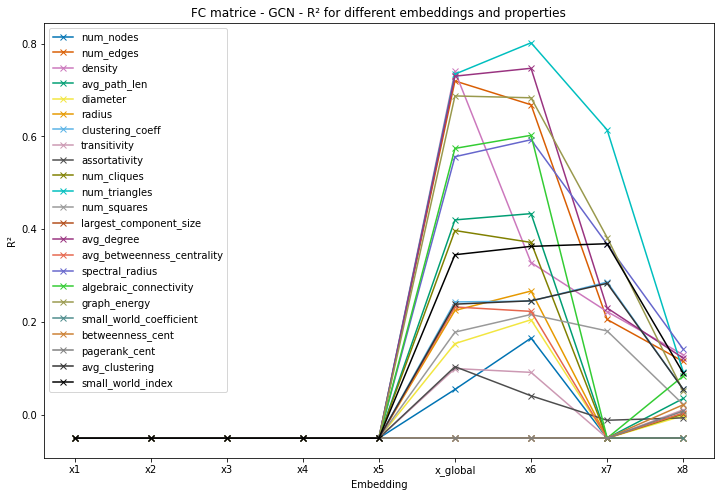

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
colors_long = [
    (0.0, 0.45, 0.70),  # Blue
    (0.85, 0.37, 0.01),  # Orange
    (0.8, 0.47, 0.74),   # Magenta
    (0.0, 0.62, 0.45),   # Green
    (0.95, 0.90, 0.25),  # Yellow
    (0.9, 0.6, 0.0),     # Brown
    (0.35, 0.7, 0.9),    # Sky Blue
    (0.8, 0.6, 0.7),     # Light Pink
    (0.3, 0.3, 0.3),     # Dark Gray
    (0.5, 0.5, 0.0),     # Olive
    (0.0, 0.75, 0.75),   # Cyan
    (0.6, 0.6, 0.6),     # Light Gray
    (0.7, 0.3, 0.1),     # Dark Orange
    (0.6, 0.2, 0.5),     # Purple
    (0.9, 0.4, 0.3),     # Salmon
    (0.4, 0.4, 0.8),     # Light Blue
    (0.2, 0.8, 0.2),     # Light Green
    (0.6, 0.6, 0.3),     # Mustard
    (0.3, 0.55, 0.55),    # Teal
    (0.8, 0.5, 0.2),     # Dark Salmon
    (0.5, 0.5, 0.5),     # Gray
    (0.2, 0.2, 0.2),      # Black-Gray
    (0.0, 0.0, 0.0)      # Black
]

property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long.png')

### Node embedding probing

/!\ Try to not forget that we need to change the batch_size to 1 if we want to probe for node properties as we need the forward pass to be made 1 graph by 1 graph at a time. 

In [ ]:
import networkx as nx
# Define function to compute node-level properties
def compute_node_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        node_degrees = list(dict(G.degree()).values())
        clustering_coeffs = list(nx.clustering(G).values())
        betweenness_centralities = list(nx.betweenness_centrality(G).values())
        eigenvector_centralities = list(nx.eigenvector_centrality(G, max_iter=10000).values())
        Local_clustering_coefficients = list(nx.clustering(G).values())

        properties.append((node_degrees, clustering_coeffs, betweenness_centralities, eigenvector_centralities, Local_clustering_coefficients))
    return properties

# Compute node-level properties for train and test sets
# Ensure gnn.train_idx and gnn.test_idx are lists of integers
train_idx = gnn.train_idx.tolist() if isinstance(gnn.train_idx, torch.Tensor) else gnn.train_idx
test_idx = gnn.test_idx.tolist() if isinstance(gnn.test_idx, torch.Tensor) else gnn.test_idx

# Compute node-level properties for train and test sets
train_node_properties = compute_node_properties([gnn.dataset[i] for i in train_idx])
test_node_properties = compute_node_properties([gnn.dataset[i] for i in test_idx])

#train_node_properties is a list of tuples, where each tuple contains 5 lists, each list contains the node-level property for each node in the graph

In [ ]:
len(train_node_properties), len(test_node_properties)

In [ ]:
# Check the length of the first three betweenness centralities of the three first graphs in the train set
[len(train_node_properties[i][2]) for i in range(3)]

We see that for each graph, the length of the betweenness centralities, and in general the length of properties, are equal to the number of nodes in the graph and thus
is equal to the length of the x matrix in the features. 

##### Node embeddings

In [ ]:
train_features, test_features = gnn.evaluate_with_features2(return_node_embeddings=True)

In [ ]:
len(train_features), len(test_features)

In [ ]:
# Check the shape of the first graph's features
first_graph_features = train_features[1]
for i, feature in enumerate(first_graph_features):
    print(f"Feature {i+1} shape:", feature.shape)

In [ ]:
train_features[1][0][26]

#### Embedding probing

##### Probing for the top 3 nodes on train_features only and averaging the results of the different diagnostif classifiers

In [ ]:
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Function to get the top 3 nodes based on a specific property
def get_top_nodes(property_list, top_n=3):
    sorted_indices = sorted(range(len(property_list)), key=lambda k: property_list[k], reverse=True)
    return sorted_indices[:top_n]

In [ ]:

# Get the top 3 nodes for local clustering coefficient and eigenvector centrality
top_nodes_local_clustering = [get_top_nodes(graph_props[3], 3) for graph_props in train_node_properties]  # Assuming 3rd index is for local clustering coefficient
top_nodes_eigenvector = [get_top_nodes(graph_props[4], 3) for graph_props in train_node_properties]  # Assuming 4th index is for eigenvector centrality


In [ ]:
# Prepare the data for linear regression model training
def prepare_regression_data(features, properties, top_nodes_indices):
    X = []
    y = []
    for i, graph_features in enumerate(features):
        for layer in range(len(graph_features)):
            for node_index in top_nodes_indices[i]:
                X.append(graph_features[layer][node_index])
                y.append(properties[i][node_index])
    return torch.tensor(X), torch.tensor(y)

# Training and evaluating linear regression models
def train_and_evaluate_regression(X, y):
    model = LinearModel(X.shape[1], 1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    # Train the model
    model.train()
    for epoch in range(1000):
        optimizer.zero_grad()
        outputs = model(X.float())
        loss = criterion(outputs, y.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(X.float()).view(-1)
        r2 = r2_score(y.float(), predictions)
    return r2

In [ ]:

# Prepare data for local clustering coefficient regression
X_local_clustering, y_local_clustering = prepare_regression_data(train_features, [props[3] for props in train_node_properties], top_nodes_local_clustering)

# Train and evaluate model for local clustering coefficient
r2_local_clustering = train_and_evaluate_regression(X_local_clustering, y_local_clustering)
print(f'R² for local clustering coefficient prediction: {r2_local_clustering}')

# Prepare data for eigenvector centrality regression
X_eigenvector, y_eigenvector = prepare_regression_data(train_features, [props[4] for props in train_node_properties], top_nodes_eigenvector)

# Train and evaluate model for eigenvector centrality
r2_eigenvector = train_and_evaluate_regression(X_eigenvector, y_eigenvector)
print(f'R² for eigenvector centrality prediction: {r2_eigenvector}')

# Prepare data for node degree regression
X_node_degree, y_node_degree = prepare_regression_data(train_features, [props[0] for props in train_node_properties], top_nodes_local_clustering)

# Train and evaluate model for node degree
r2_node_degree = train_and_evaluate_regression(X_node_degree, y_node_degree)
print(f'R² for node degree prediction: {r2_node_degree}')

# Prepare data for betweenness centrality regression
X_betweenness, y_betweenness = prepare_regression_data(train_features, [props[2] for props in train_node_properties], top_nodes_local_clustering)

# Train and evaluate model for betweenness centrality
r2_betweenness = train_and_evaluate_regression(X_betweenness, y_betweenness)
print(f'R² for betweenness centrality prediction: {r2_betweenness}')


##### Probing for the top 1 nodes with diagnostic classifier trained on the train set and test on the test set

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define Linear Model for probing (diagnostic classifier)
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Prepare the data for probing classifier
def prepare_regression_data(features, properties, property_index, top_n_nodes=1):
    X_layers = [[] for _ in range(len(features[0]))]
    y_layers = [[] for _ in range(len(features[0]))]

    for i, graph_features in enumerate(features):
        top_nodes_indices = get_top_nodes(properties[i][property_index], top_n=top_n_nodes)
        for layer in range(len(graph_features)):
            for node_index in top_nodes_indices:
                X_layers[layer].append(graph_features[layer][node_index])
                y_layers[layer].append(properties[i][property_index][node_index])

    X_layers = [torch.tensor(X) for X in X_layers]
    y_layers = [torch.tensor(y) for y in y_layers]
    
    return X_layers, y_layers

# Train and evaluate the probing classifier for each layer
def train_and_evaluate_regression(X_train_layers, y_train_layers, X_test_layers, y_test_layers):
    r2_scores_train = []
    r2_scores_test = []
    
    for layer in range(len(X_train_layers)):
        X_train = X_train_layers[layer]
        y_train = y_train_layers[layer]
        X_test = X_test_layers[layer]
        y_test = y_test_layers[layer]
        
        model = LinearModel(X_train.shape[1], 1)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.01)
        
        # Train the model
        model.train()
        for epoch in range(10000):
            optimizer.zero_grad()
            outputs = model(X_train.float())
            loss = criterion(outputs, y_train.float().view(-1, 1))
            loss.backward()
            optimizer.step()
        
        # Evaluate the model
        model.eval()
        with torch.no_grad():
            predictions_train = model(X_train.float()).view(-1)
            predictions_test = model(X_test.float()).view(-1)
            r2_train = r2_score(y_train.float(), predictions_train)
            r2_test = r2_score(y_test.float(), predictions_test)
        r2_scores_train.append(r2_train)
        r2_scores_test.append(r2_test)
    
    return r2_scores_train, r2_scores_test

# Aggregate R² scores across all graphs
def aggregate_r2_scores(features_train, properties_train, features_test, properties_test, property_index):
    X_train_layers, y_train_layers = prepare_regression_data(features_train, properties_train, property_index)
    X_test_layers, y_test_layers = prepare_regression_data(features_test, properties_test, property_index)
    
    r2_scores_train, r2_scores_test = train_and_evaluate_regression(X_train_layers, y_train_layers, X_test_layers, y_test_layers)
    
    return r2_scores_train, r2_scores_test

# Properties indices: 0 - node_degrees, 1 - clustering_coeffs, 2 - betweenness_centralities, 3 - eigenvector_centralities, 4 - Local_clustering_coefficients
properties_indices = [0, 1, 2, 3, 4]
property_names = ['Node Degrees', 'Clustering Coefficients', 'Betweenness Centralities', 'Eigenvector Centralities', 'Local Clustering Coefficients']

# Initialize dictionaries to store average R² scores across all layers
avg_r2_train_dict = {name: [] for name in property_names}
avg_r2_test_dict = {name: [] for name in property_names}

# Train and evaluate the probing classifier for each property
for prop_idx, prop_name in zip(properties_indices, property_names):
    print(f"Processing property: {prop_name}")
    avg_r2_train_dict[prop_name], avg_r2_test_dict[prop_name] = aggregate_r2_scores(train_features, train_node_properties, test_features, test_node_properties, prop_idx)

# Plotting the average R² scores across layers for each property
layers = np.arange(len(avg_r2_train_dict[property_names[0]]))

plt.figure(figsize=(12, 6))

# Plot for average R² scores
for prop_name in property_names:
    plt.plot(layers, avg_r2_train_dict[prop_name], label=f'{prop_name} (Train)', marker='o')
    plt.plot(layers, avg_r2_test_dict[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')

plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#plot only test results
plt.figure(figsize=(12, 6))

# Plot for average R² scores
for prop_name in property_names:
    plt.plot(layers, avg_r2_test_dict[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')

plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers')
plt.legend()
#x axis called layer 1, layer 2, etc
plt.xticks(range(len(layers)), [f'Layer {i+1}' for i in layers])           
plt.grid(True)

y=1 and y=0 as two different plots

In [ ]:

# Extract labels from the dataset using train_idx_list and test_idx_list
train_idx_list = gnn.train_idx.tolist()
test_idx_list = gnn.test_idx.tolist()

train_labels = [gnn.dataset[i].y.item() for i in train_idx_list]
test_labels = [gnn.dataset[i].y.item() for i in test_idx_list]

# Split the dataset by label y=0 and y=1
def split_by_label(features, properties, labels):
    features_0, properties_0, features_1, properties_1 = [], [], [], []
    
    for i, label in enumerate(labels):
        if label == 0:
            features_0.append(features[i])
            properties_0.append(properties[i])
        else:
            features_1.append(features[i])
            properties_1.append(properties[i])
    
    return features_0, properties_0, features_1, properties_1

# Assuming you have train_features, train_node_properties, test_features, test_node_properties from your GNN
train_features_0, train_node_properties_0, train_features_1, train_node_properties_1 = split_by_label(train_features, train_node_properties, train_labels)
test_features_0, test_node_properties_0, test_features_1, test_node_properties_1 = split_by_label(test_features, test_node_properties, test_labels)

# Properties indices: 0 - node_degrees, 1 - clustering_coeffs, 2 - betweenness_centralities, 3 - eigenvector_centralities, 4 - Local_clustering_coefficients
properties_indices = [0, 1, 2, 3, 4]
property_names = ['Node Degrees', 'Clustering Coefficients', 'Betweenness Centralities', 'Eigenvector Centralities', 'Local Clustering Coefficients']

# Initialize dictionaries to store average R² scores across all layers for y=0 and y=1
avg_r2_train_dict_0 = {name: [] for name in property_names}
avg_r2_test_dict_0 = {name: [] for name in property_names}
avg_r2_train_dict_1 = {name: [] for name in property_names}
avg_r2_test_dict_1 = {name: [] for name in property_names}

# Train and evaluate the probing classifier for each property for y=0
for prop_idx, prop_name in zip(properties_indices, property_names):
    print(f"Processing property for y=0: {prop_name}")
    avg_r2_train_dict_0[prop_name], avg_r2_test_dict_0[prop_name] = aggregate_r2_scores(train_features_0, train_node_properties_0, test_features_0, test_node_properties_0, prop_idx)

# Train and evaluate the probing classifier for each property for y=1
for prop_idx, prop_name in zip(properties_indices, property_names):
    print(f"Processing property for y=1: {prop_name}")
    avg_r2_train_dict_1[prop_name], avg_r2_test_dict_1[prop_name] = aggregate_r2_scores(train_features_1, train_node_properties_1, test_features_1, test_node_properties_1, prop_idx)

# Plotting the average R² scores across layers for each property, separately for y=0 and y=1
layers = np.arange(len(avg_r2_train_dict_0[property_names[0]]))

plt.figure(figsize=(12, 12))

# Plot for y=0
plt.subplot(2, 1, 1)
for prop_name in property_names:
    plt.plot(layers, avg_r2_train_dict_0[prop_name], label=f'{prop_name} (Train)', marker='o')
    plt.plot(layers, avg_r2_test_dict_0[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')
plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers (y=0)')
plt.legend()
plt.grid(True)

# Plot for y=1
plt.subplot(2, 1, 2)
for prop_name in property_names:
    plt.plot(layers, avg_r2_train_dict_1[prop_name], label=f'{prop_name} (Train)', marker='o')
    plt.plot(layers, avg_r2_test_dict_1[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')
plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers (y=1)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
